In [1]:
# Main imports
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from importlib import reload
import utils; reload(utils)
from utils import *

In [3]:
calibration_dir = "camera_cal_pc"
test_imgs_dir = "test_images"
output_imgs_dir = "output_images"
output_videos_dir = "output_videos"

In [4]:
calibration_dir

'camera_cal_pc'

In [5]:

# Let's get all our calibration image paths
cal_imgs_paths = glob.glob(calibration_dir + "/*.JPG")

In [6]:
cal_imgs_paths

['camera_cal_pc\\IMG_9938.JPG',
 'camera_cal_pc\\IMG_9939.JPG',
 'camera_cal_pc\\IMG_9940.JPG',
 'camera_cal_pc\\IMG_9941.JPG',
 'camera_cal_pc\\IMG_9942.JPG',
 'camera_cal_pc\\IMG_9943.JPG',
 'camera_cal_pc\\IMG_9944.JPG',
 'camera_cal_pc\\IMG_9945.JPG',
 'camera_cal_pc\\IMG_9946.JPG',
 'camera_cal_pc\\IMG_9947.JPG',
 'camera_cal_pc\\IMG_9948.JPG',
 'camera_cal_pc\\IMG_9949.JPG',
 'camera_cal_pc\\IMG_9950.JPG',
 'camera_cal_pc\\IMG_9951.JPG',
 'camera_cal_pc\\IMG_9952.JPG',
 'camera_cal_pc\\IMG_9953.JPG',
 'camera_cal_pc\\IMG_9954.JPG',
 'camera_cal_pc\\IMG_9955.JPG',
 'camera_cal_pc\\IMG_9956.JPG',
 'camera_cal_pc\\IMG_9957.JPG']

In [7]:
def load_image(path, to_rgb=True):
    """
    Load image from the given path. By default the returned image is in RGB.
    When to_rgb is set to False the image return is in BGR. 
    """
    img = cv2.imread(path)
    return img if not to_rgb else cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

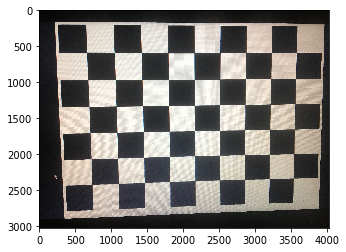

In [8]:

# Let's the first chessboard image to see what it looks like
cal_img_path = cal_imgs_paths[11]
cal_img = load_image(cal_img_path)
plt.imshow(cal_img)

In [9]:
#Our chessboard has 7 inner corners in the x direction, and 7 in the y direction. We will use these as parameters to findChessboardCorners().
cx = 9
cy = 6

In [10]:
def findChessboardCorners(img, nx, ny):
    """
    Finds the chessboard corners of the supplied image (must be grayscale)
    nx and ny parameters respectively indicate the number of inner corners in the x and y directions
    """
    return cv2.findChessboardCorners(img, (nx, ny), None)

In [11]:
def showChessboardCorners(img, nx, ny, ret, corners):
    """
    Draws the chessboard corners of a given image
    nx and ny parameters respectively indicate the number of inner corners in the x and y directions
    ret and corners should represent the results from cv2.findChessboardCorners()
    """
    c_img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.axis('off')
    plt.imshow(img)

In [12]:
def to_grayscale(img):
    """
    Returns the grayscaled version of the supplied image (in RGB format)
    """
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

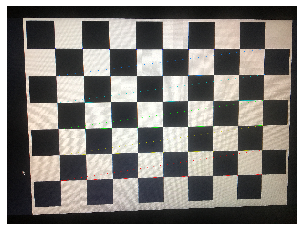

In [13]:
ret, corners = findChessboardCorners(to_grayscale(cal_img), cx, cy)
showChessboardCorners(cal_img, cx, cy, ret, corners)

In [14]:
def findImgObjPoints(imgs_paths, nx, ny):
    """
    Returns the objects and image points computed for a set of chessboard pictures taken from the same camera
    nx and ny parameters respectively indicate the number of inner corners in the x and y directions
    """
    objpts = []
    imgpts = []
    
    # Pre-compute what our object points in the real world should be (the z dimension is 0 as we assume a flat surface)
    objp = np.zeros((nx * ny, 3), np.float32)
    objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)
    
    for img_path in imgs_paths:
        img = load_image(img_path)
        gray = to_grayscale(img)
        ret, corners = findChessboardCorners(gray, nx, ny)
        
        if ret:
            # Found the corners of an image
            imgpts.append(corners)
            # Add the same object point since they don't change in the real world
            objpts.append(objp)
    
    return objpts, imgpts

In [15]:
opts = np.load('opts.npy') # load
ipts = np.load('ipts.npy') # load
#opts, ipts = findImgObjPoints(cal_imgs_paths, cx, cy)

In [16]:
def undistort_image(img, objpts, imgpts):
    """
    Returns an undistorted image
    The desired object and image points must also be supplied to this function
    """
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpts, imgpts, to_grayscale(img).shape[::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

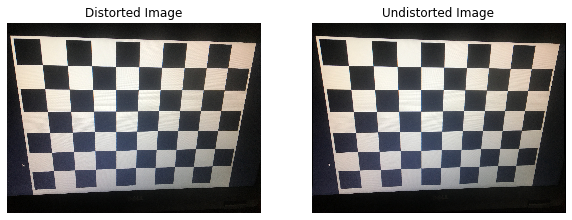

In [17]:
cal_img_example = load_image(cal_imgs_paths[15])
cal_img_undist = undistort_image(cal_img_example, opts, ipts)
fig, ax = plt.subplots(1, 2, figsize=(10,7))
ax[0].imshow(cal_img_example)
ax[0].axis("off")
ax[0].set_title("Distorted Image")

ax[1].imshow(cal_img_undist)
ax[1].axis("off")
ax[1].set_title("Undistorted Image")

plt.show()

In [18]:
test_imgs_paths = glob.glob(test_imgs_dir + "/*.jpg")

In [19]:
test_imgs_dir

'test_images'

In [20]:
test_imgs_paths

['test_images\\frame1046.jpg',
 'test_images\\frame1107.jpg',
 'test_images\\frame1140.jpg',
 'test_images\\frame1198.jpg',
 'test_images\\frame1318.jpg',
 'test_images\\frame141.jpg',
 'test_images\\frame1476.jpg',
 'test_images\\frame567.jpg',
 'test_images\\frame736.jpg',
 'test_images\\frame80.jpg']

In [21]:
test_img_names = np.asarray(list(map(lambda img_path: img_path.split("/")[-1].split(".")[0], test_imgs_paths)))
undist_test_img_names = np.asarray(list(map(lambda img_name: "{0}{1}".format("undistorted_", img_name), test_img_names)))

In [22]:
test_imgs = np.asarray(list(map(lambda img_path: load_image(img_path), test_imgs_paths)))
undist_test_imgs = np.asarray(list(map(lambda img: undistort_image(img, opts, ipts), test_imgs)))

In [23]:
test_img_and_undist = np.asarray(list(zip(test_imgs, undist_test_imgs)))
test_img_and_undist_names = np.asarray(list(zip(test_img_names, undist_test_img_names)))

In [24]:
def show_image_list(img_list, img_labels, title, cols=2, fig_size=(15, 15), show_ticks=True):
    """
    Utility function to to show a list of images
    """
    rows = len(img_list)
    cmap = None

    fig, axes = plt.subplots(rows, cols, figsize=fig_size)

    for i in range(0, rows):
        for j in range(0, cols):
            ax = axes[i, j] if rows > 1 else axes[j]
            #k = i * cols + j
            img_name = img_labels[i][j]
            img = img_list[i][j]
            if len(img.shape) < 3 or img.shape[-1] < 3:
                cmap = "gray"
                img = np.reshape(img, (img.shape[0], img.shape[1]))

            if not show_ticks:
                ax.axis("off")

            ax.imshow(img, cmap=cmap)
            ax.set_title(img_name)

    fig.suptitle(title, fontsize=12, fontweight='bold', y=1)
    fig.tight_layout()
    plt.show()

    return

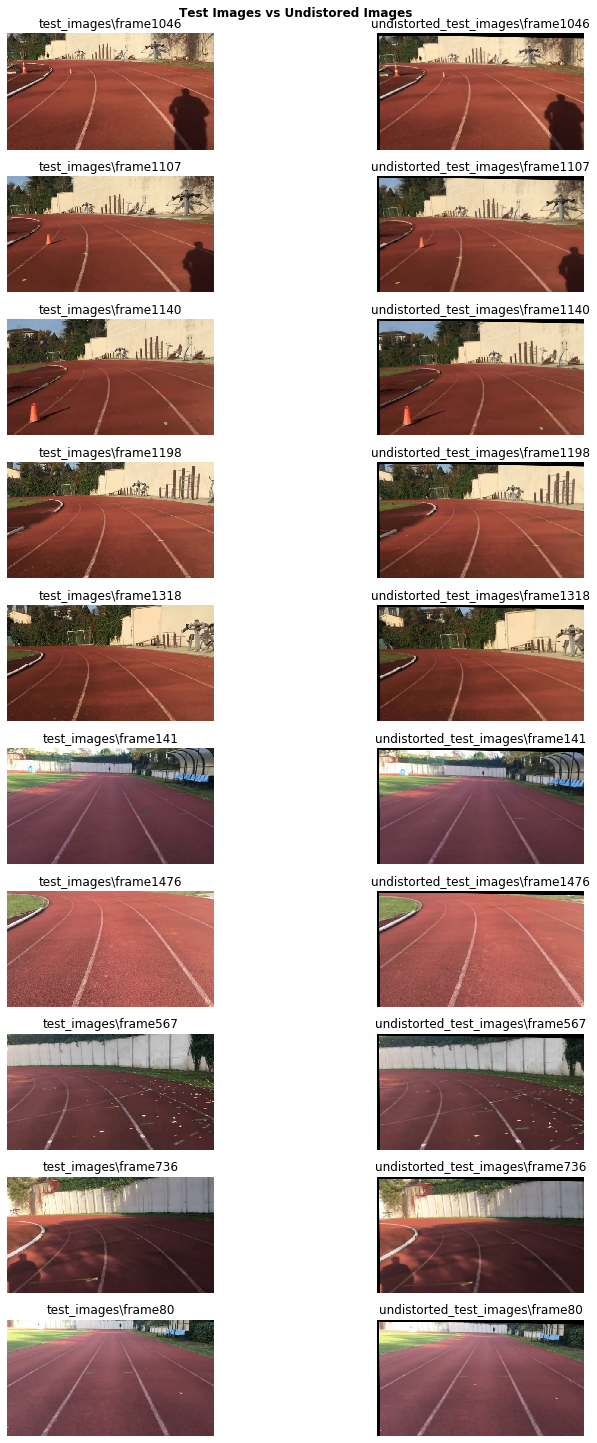

In [25]:
show_image_list(test_img_and_undist, test_img_and_undist_names, "Test Images vs Undistored Images", fig_size=(12, 20), cols=2, show_ticks=False)

**THRESHOLDING**

In [26]:
def threshold_img(img, channel, thres=(0, 255)):
    """
    Applies a threshold mask to the input image
    """
    img_ch = img[:,:,channel]
    if thres is None:  
        return img_ch
    
    mask_ch = np.zeros_like(img_ch)
    mask_ch[ (thres[0] <= img_ch) & (thres[1] >= img_ch) ] = 1
    return mask_ch

In [28]:
test_img_path = test_imgs_paths[9]
test_img = load_image(test_img_path)
undistorted_test_img = undistort_image(test_img, opts, ipts)

In [29]:
rgb_comp = np.asarray([[threshold_img(undistorted_test_img, 0, thres=None), threshold_img(undistorted_test_img, 1, thres=None), threshold_img(undistorted_test_img, 2, thres=None)]])
rgb_lbs = np.asarray([["Red Channel", "Green Channel", "Blue Channel"]])

In [30]:
def to_hls(img):
    """
    Returns the same image in HLS format
    The input image must be in RGB format
    """
    return cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
hls_test_img = to_hls(undistorted_test_img)
hls_comp = np.asarray([[threshold_img(hls_test_img, 0, thres=None), threshold_img(hls_test_img, 1, thres=None), threshold_img(hls_test_img, 2, thres=None)]])
hls_lbs = np.asarray([["Hue Channel", "Lightness Channel", "Saturation Channel"]])

In [31]:
def to_hsv(img):
    """
    Returns the same image in HSV format
    The input image must be in RGB format
    """
    return cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
hsv_test_img = to_hsv(undistorted_test_img)
hsv_comp = np.asarray([[threshold_img(hsv_test_img, 0, thres=None), threshold_img(hsv_test_img, 1, thres=None), threshold_img(hsv_test_img, 2, thres=None)]])
hsv_lbs = np.asarray([["Hue Channel", "Saturation Channel", "Value Channel"]])

In [32]:
def to_lab(img):
    """
    Returns the same image in LAB format
    Th input image must be in RGB format
    """
    return cv2.cvtColor(img, cv2.COLOR_RGB2LAB  )
    
lab_test_img = to_lab(undistorted_test_img)
lab_comp = np.asarray([[threshold_img(lab_test_img, 0, thres=None), threshold_img(lab_test_img, 1, thres=None), threshold_img(lab_test_img, 2, thres=None)]])
lab_lbs = np.asarray([["Lightness Channel", "Green-Red (A) Channel", "Blue-Yellow (B) Channel"]])

In [33]:

color_spaces_comps = np.concatenate((rgb_comp, hls_comp, hsv_comp, lab_comp))
color_spaces_lbs = np.concatenate((rgb_lbs, hls_lbs, hsv_lbs, lab_lbs))

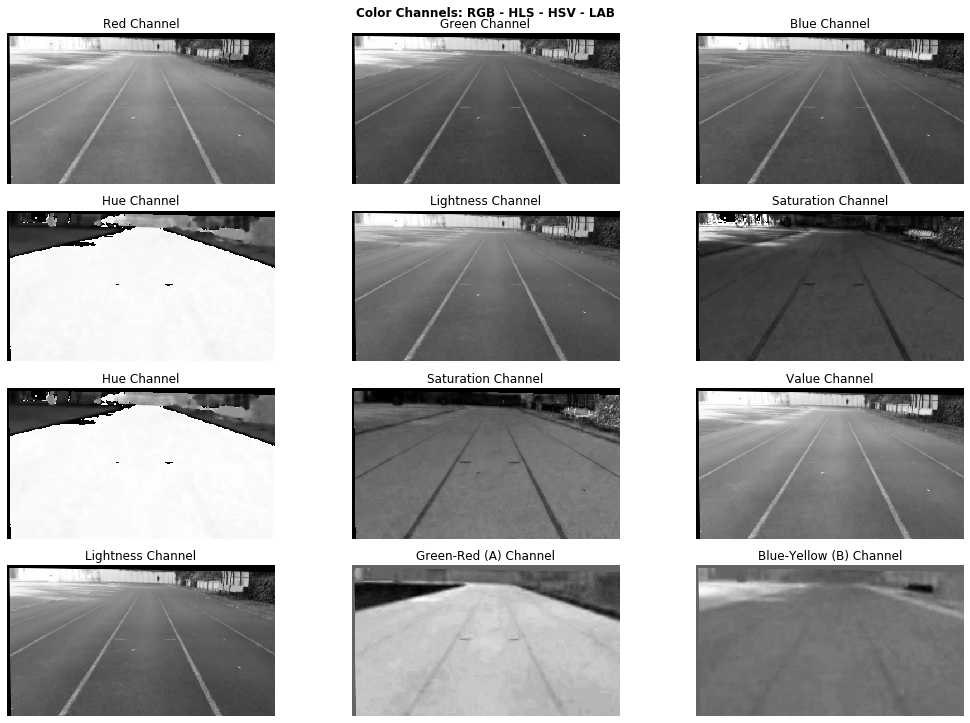

In [34]:
show_image_list(color_spaces_comps, color_spaces_lbs, "Color Channels: RGB - HLS - HSV - LAB", cols=3, fig_size=(15, 10), show_ticks=False)

In [35]:
def compute_hls_white_yellow_binary(rgb_img):
    """
    Returns a binary thresholded image produced retaining only white and yellow elements on the picture
    The provided image should be in RGB format
    """
    hls_img = to_hls(rgb_img)
    hsv_img = to_hsv(rgb_img)

    # Compute a binary thresholded image where yellow is isolated from HLS components
  #  img_hls_yellow_bin = np.zeros_like(hls_img[:,:,0])
   # img_hls_yellow_bin[((hls_img[:,:,0] >= 15) & (hls_img[:,:,0] <= 35))
    #             & ((hls_img[:,:,1] >= 30) & (hls_img[:,:,1] <= 204))
     #            & ((hls_img[:,:,2] >= 115) & (hls_img[:,:,2] <= 255))                
      #          ] = 1
    
    # Compute a binary thresholded image where white is isolated from HLS components
    img_hls_white_bin = np.zeros_like(hls_img[:,:,0])
    img_hls_white_bin[((hls_img[:,:,0] >= 0) & (hls_img[:,:,0] <= 255))
                 & ((hls_img[:,:,1] >= 0) & (hls_img[:,:,1] <= 255))
                 & ((hls_img[:,:,2] >= 0) & (hls_img[:,:,2] <= 50))                
                ] = 1

    # Compute a binary thresholded image where white is isolated from HLS components
    img_hsv_white_bin = np.zeros_like(hsv_img[:,:,0])
    img_hsv_white_bin[((hsv_img[:,:,0] >= 0) & (hsv_img[:,:,0] <= 255))
                 & ((hsv_img[:,:,1] >= 0) & (hsv_img[:,:,1] <= 80))
                 & ((hsv_img[:,:,2] >= 0) & (hsv_img[:,:,2] <= 255))                
                ] = 1
    
    # Now combine both
    img_hls_white_yellow_bin = np.zeros_like(hls_img[:,:,0])
    img_hls_white_yellow_bin[ (img_hls_white_bin == 1) | (img_hsv_white_bin == 1)] = 1

    return img_hls_white_yellow_bin

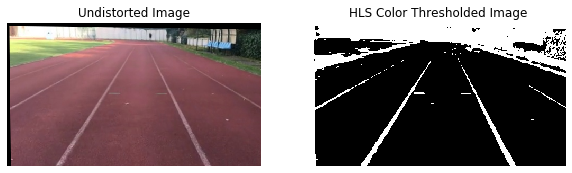

In [36]:

undistorted_yellow_white_hls_img_bin = compute_hls_white_yellow_binary(undistorted_test_img)

fig, ax = plt.subplots(1, 2, figsize=(10,7))
ax[0].imshow(undistorted_test_img)
ax[0].axis("off")
ax[0].set_title("Undistorted Image")

ax[1].imshow(undistorted_yellow_white_hls_img_bin, cmap='gray')
ax[1].axis("off")
ax[1].set_title("HLS Color Thresholded Image")

plt.show()

**Gradient Thresholding Via Sobel**

In [37]:
# L channel is index 0 of the color components
undist_test_img_gray = to_lab(undistorted_test_img)[:,:,0]

In [38]:
def abs_sobel(gray_img, x_dir=True, kernel_size=3, thres=(0, 255)):
    """
    Applies the sobel operator to a grayscale-like (i.e. single channel) image in either horizontal or vertical direction
    The function also computes the asbolute value of the resulting matrix and applies a binary threshold
    """
    sobel = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=kernel_size) if x_dir else cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=kernel_size) 
    sobel_abs = np.absolute(sobel)
    sobel_scaled = np.uint8(255 * sobel / np.max(sobel_abs))
    
    gradient_mask = np.zeros_like(sobel_scaled)
    gradient_mask[(thres[0] <= sobel_scaled) & (sobel_scaled <= thres[1])] = 1
    return gradient_mask

In [39]:
sobx_3x3_thres = np.asarray([[abs_sobel(undist_test_img_gray, thres=(20, 120)), abs_sobel(undist_test_img_gray, thres=(50, 150)), abs_sobel(undist_test_img_gray, thres=(80, 200))]])
sobx_7x7_thres = np.asarray([[abs_sobel(undist_test_img_gray, kernel_size=7, thres=(20, 120)), abs_sobel(undist_test_img_gray, kernel_size=7, thres=(50, 150)), abs_sobel(undist_test_img_gray, kernel_size=7, thres=(80, 200))]])
sobx_11x11_thres = np.asarray([[abs_sobel(undist_test_img_gray, kernel_size=11, thres=(20, 120)), abs_sobel(undist_test_img_gray, kernel_size=11, thres=(50, 150)), abs_sobel(undist_test_img_gray, kernel_size=11, thres=(80, 200))]])
sobx_15x15_thres = np.asarray([[abs_sobel(undist_test_img_gray, kernel_size=15, thres=(20, 120)), abs_sobel(undist_test_img_gray, kernel_size=15, thres=(50, 150)), abs_sobel(undist_test_img_gray, kernel_size=15, thres=(80, 200))]])

sobx_31x31_thres = np.asarray([[abs_sobel(undist_test_img_gray, kernel_size=31, thres=(10, 100)), abs_sobel(undist_test_img_gray, kernel_size=31, thres=(15, 120)), abs_sobel(undist_test_img_gray, kernel_size=31, thres=(10, 120))]])

sobx_3x3_thres_lbs = np.asarray([["3x3 - Threshold (20,120)", "3x3 - Threshold (50,150)", "3x3 - Threshold (80,200)"]])
sobx_7x7_thres_lbs = np.asarray([["7x7 - Threshold (20,120)", "7x7 - Threshold (50,150)", "7x7 - Threshold (80,200)"]])
sobx_11x11_thres_lbs = np.asarray([["11x11 - Threshold (20,120)", "11x11 - Threshold (50,150)", "11x11 - Threshold (80,200)"]])
sobx_15x15_thres_lbs = np.asarray([["15x15 - Threshold (20,120)", "15x15 - Threshold (50,150)", "15x15 - Threshold (80,200)"]])

sobx_31x31_thres_lbs = np.asarray([["31x31 - Threshold (10,100)", "31x31 - Threshold (15,120)", "31x31 - Threshold (10,120)"]])

In [40]:
sobx_thres = np.concatenate((sobx_3x3_thres, sobx_7x7_thres, sobx_11x11_thres, sobx_15x15_thres,sobx_31x31_thres))
sobx_thres_lbs = np.concatenate((sobx_3x3_thres_lbs, sobx_7x7_thres_lbs, sobx_11x11_thres_lbs, sobx_15x15_thres_lbs,sobx_31x31_thres_lbs))

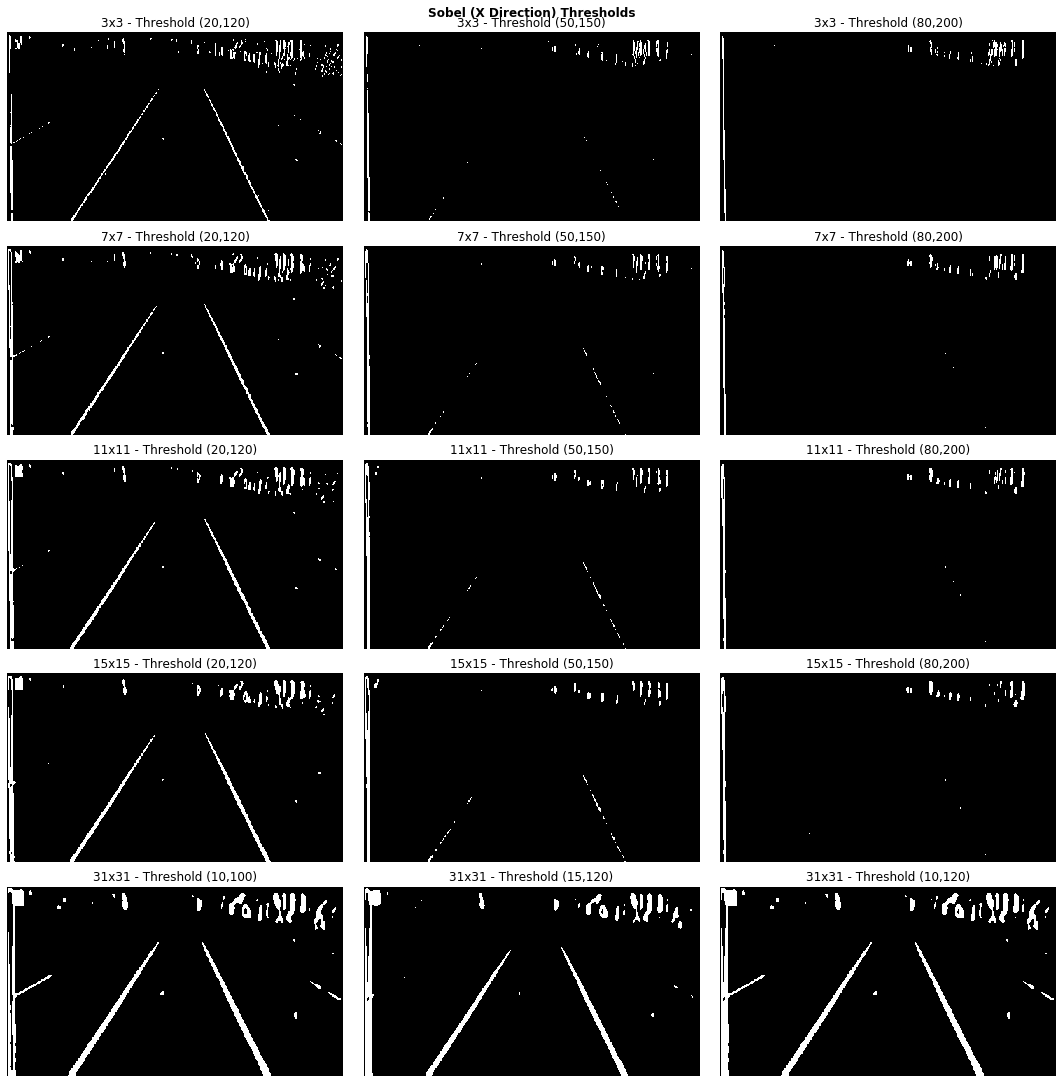

In [41]:
show_image_list(sobx_thres, sobx_thres_lbs, "Sobel (X Direction) Thresholds", cols=3, show_ticks=False)

In [42]:
# Saving our best sobel results
sobx_best = abs_sobel(undist_test_img_gray, kernel_size=31, thres=(15, 120))

In [43]:
soby_3x3_thres = np.asarray([[abs_sobel(undist_test_img_gray, x_dir=False, thres=(20, 120)), abs_sobel(undist_test_img_gray, x_dir=False, thres=(50, 150)), abs_sobel(undist_test_img_gray, x_dir=False, thres=(80, 200))]])
soby_7x7_thres = np.asarray([[abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=7, thres=(20, 120)), abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=7, thres=(50, 150)), abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=7, thres=(80, 200))]])
soby_11x11_thres = np.asarray([[abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=11, thres=(20, 120)), abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=11, thres=(50, 150)), abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=11, thres=(80, 200))]])
soby_15x15_thres = np.asarray([[abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=15, thres=(20, 120)), abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=15, thres=(50, 150)), abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=15, thres=(80, 200))]])

soby_31x31_thres = np.asarray([[abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=31, thres=(10, 120)), abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=31, thres=(15, 120)), abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=31, thres=(30, 150))]])

soby_3x3_thres_lbs = np.asarray([["3x3 - Threshold (20,120)", "3x3 - Threshold (50,150)", "3x3 - Threshold (80,200)"]])
soby_7x7_thres_lbs = np.asarray([["7x7 - Threshold (20,120)", "7x7 - Threshold (50,150)", "7x7 - Threshold (80,200)"]])
soby_11x11_thres_lbs = np.asarray([["11x11 - Threshold (20,120)", "11x11 - Threshold (50,150)", "11x11 - Threshold (80,200)"]])
soby_15x15_thres_lbs = np.asarray([["15x15 - Threshold (20,120)", "15x15 - Threshold (50,150)", "15x15 - Threshold (80,200)"]])

soby_31x31_thres_lbs = np.asarray([["31x31 - Threshold (10,120)", "31x31 - Threshold (15,120)", "31x31 - Threshold (30,150)"]])

In [44]:
soby_thres = np.concatenate((soby_3x3_thres, soby_7x7_thres, soby_11x11_thres, soby_15x15_thres,soby_31x31_thres))
soby_thres_lbs = np.concatenate((soby_3x3_thres_lbs, soby_7x7_thres_lbs, soby_11x11_thres_lbs, soby_15x15_thres_lbs,soby_31x31_thres_lbs))

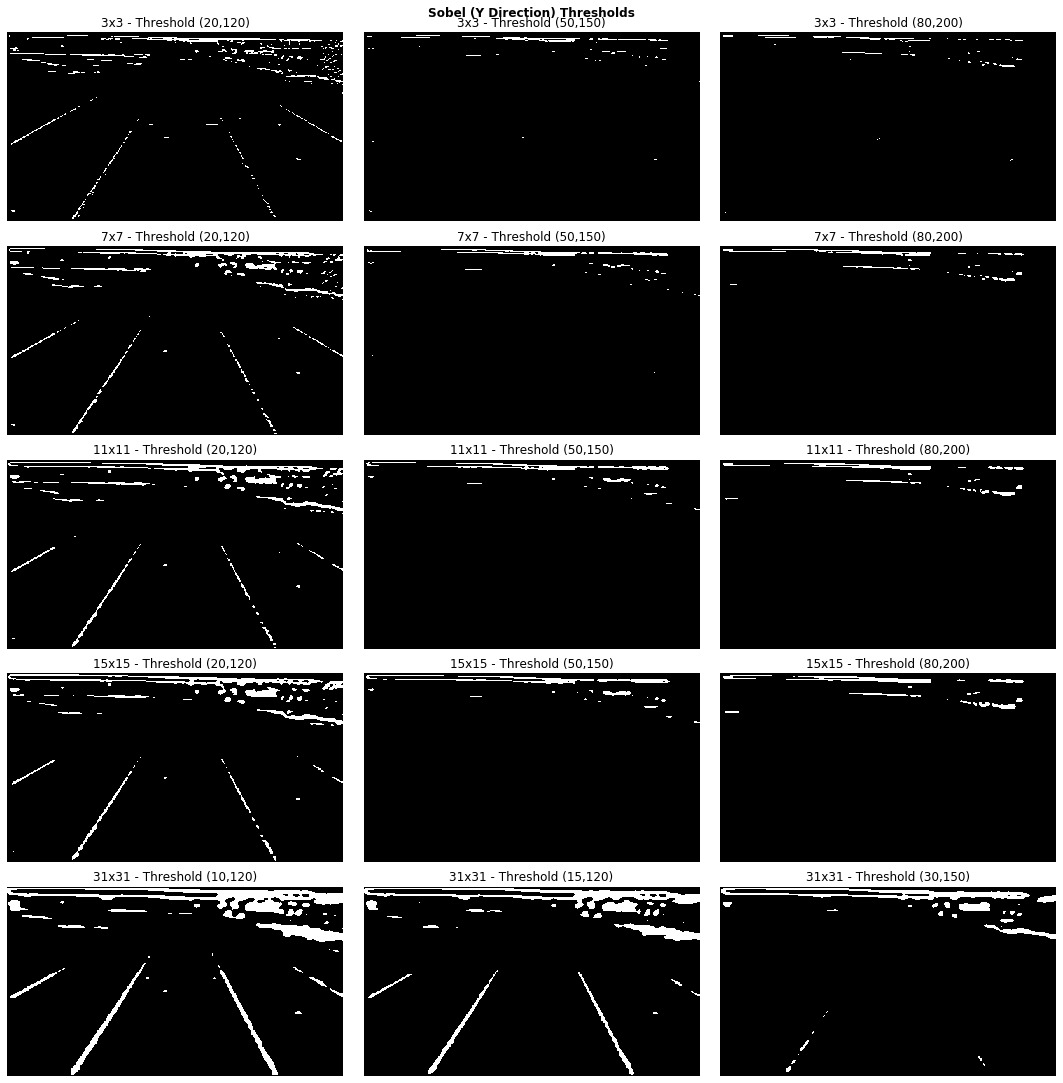

In [45]:
show_image_list(soby_thres, soby_thres_lbs, "Sobel (Y Direction) Thresholds", cols=3, show_ticks=False)

In [46]:
# Saving our best sobel y result
soby_best = abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=31, thres=(15, 120))

In [47]:
def mag_sobel(gray_img, kernel_size=3, thres=(0, 255)):
    """
    Computes sobel matrix in both x and y directions, merges them by computing the magnitude in both directions
    and applies a threshold value to only set pixels within the specified range
    """
    sx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=kernel_size)
    sy = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=kernel_size)
    
    sxy = np.sqrt(np.square(sx) + np.square(sy))
    scaled_sxy = np.uint8(255 * sxy / np.max(sxy))
    
    sxy_binary = np.zeros_like(scaled_sxy)
    sxy_binary[(scaled_sxy >= thres[0]) & (scaled_sxy <= thres[1])] = 1
    
    return sxy_binary

In [48]:
sobxy_3x3_thres = np.asarray([[mag_sobel(undist_test_img_gray, kernel_size=3, thres=(20, 80)), mag_sobel(undist_test_img_gray, kernel_size=3, thres=(50, 150)), mag_sobel(undist_test_img_gray, kernel_size=3, thres=(80, 200))]])
sobxy_7x7_thres = np.asarray([[mag_sobel(undist_test_img_gray, kernel_size=7, thres=(20, 80)), mag_sobel(undist_test_img_gray, kernel_size=7, thres=(50, 150)), mag_sobel(undist_test_img_gray, kernel_size=7, thres=(80, 200))]])
sobxy_11x11_thres = np.asarray([[mag_sobel(undist_test_img_gray, kernel_size=11, thres=(20, 80)), mag_sobel(undist_test_img_gray, kernel_size=11, thres=(50, 150)), mag_sobel(undist_test_img_gray, kernel_size=11, thres=(80, 200))]])
sobxy_15x15_thres = np.asarray([[mag_sobel(undist_test_img_gray, kernel_size=15, thres=(20, 80)), mag_sobel(undist_test_img_gray, kernel_size=15, thres=(50, 150)), mag_sobel(undist_test_img_gray, kernel_size=15, thres=(80, 200))]])

sobxy_31x31_thres = np.asarray([[mag_sobel(undist_test_img_gray, kernel_size=31, thres=(10, 80)), mag_sobel(undist_test_img_gray, kernel_size=31, thres=(15, 80)), mag_sobel(undist_test_img_gray, kernel_size=31, thres=(20, 120))]])

sobxy_3x3_thres_lbs = np.asarray([["3x3 - Threshold (20,80)", "3x3 - Threshold (50,150)", "3x3 - Threshold (80,200)"]])
sobxy_7x7_thres_lbs = np.asarray([["7x7 - Threshold (20,80)", "7x7 - Threshold (50,150)", "7x7 - Threshold (80,200)"]])
sobxy_11x11_thres_lbs = np.asarray([["11x11 - Threshold (20,80)", "11x11 - Threshold (50,150)", "11x11 - Threshold (80,200)"]])
sobxy_15x15_thres_lbs = np.asarray([["15x15 - Threshold (20,80)", "15x15 - Threshold (50,150)", "15x15 - Threshold (80,200)"]])

sobxy_31x31_thres_lbs = np.asarray([["31x31 - Threshold (10,80)", "31x31 - Threshold (15,80)", "31x31 - Threshold (20,120)"]])

In [51]:
sobxy_thres = np.concatenate((sobxy_3x3_thres, sobxy_7x7_thres, sobxy_11x11_thres, sobxy_15x15_thres,sobxy_31x31_thres))
sobxy_thres_lbs = np.concatenate((sobxy_3x3_thres_lbs, sobxy_7x7_thres_lbs, sobxy_11x11_thres_lbs, sobxy_15x15_thres_lbs,sobxy_31x31_thres_lbs))

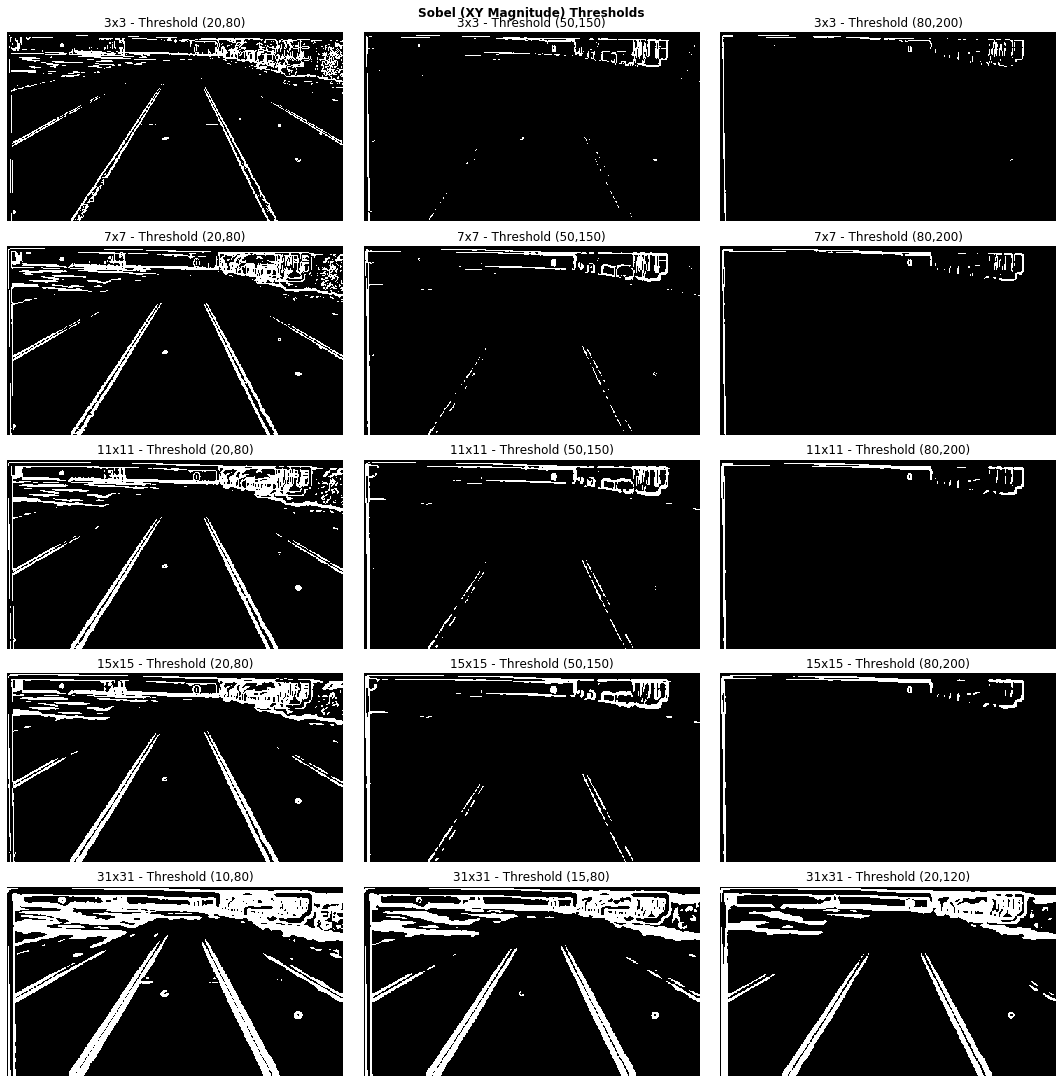

In [52]:
show_image_list(sobxy_thres, sobxy_thres_lbs, "Sobel (XY Magnitude) Thresholds", cols=3, show_ticks=False)

In [53]:
# Saving our best Sobel XY magnitude results
sobxy_best = mag_sobel(undist_test_img_gray, kernel_size=31, thres=(15, 80))

In [54]:
def dir_sobel(gray_img, kernel_size=3, thres=(0, np.pi/2)):
    """
    Computes sobel matrix in both x and y directions, gets their absolute values to find the direction of the gradient
    and applies a threshold value to only set pixels within the specified range
    """
    sx_abs = np.absolute(cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=kernel_size))
    sy_abs = np.absolute(cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=kernel_size))
    
    dir_sxy = np.arctan2(sx_abs, sy_abs)

    binary_output = np.zeros_like(dir_sxy)
    binary_output[(dir_sxy >= thres[0]) & (dir_sxy <= thres[1])] = 1
    
    return binary_output

In [55]:
def combined_sobels(sx_binary, sy_binary, sxy_magnitude_binary, gray_img, kernel_size=3, angle_thres=(0, np.pi/2)):
    sxy_direction_binary = dir_sobel(gray_img, kernel_size=kernel_size, thres=angle_thres)
    
    combined = np.zeros_like(sxy_direction_binary)
    # Sobel X returned the best output so we keep all of its results. We perform a binary and on all the other sobels    
    combined[(sx_binary == 1) | ((sy_binary == 1) & (sxy_magnitude_binary == 1) & (sxy_direction_binary == 1))] = 1
    
    return combined

In [56]:
cb = combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray)

In [57]:
sobxy_combined_dir_3x3_thres = np.asarray([[combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=3, angle_thres=(0, np.pi/4)),
                                            combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=3, angle_thres=(np.pi/4, np.pi/2)),
                                            combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=3, angle_thres=(np.pi/3, np.pi/2))
                                           ]])

sobxy_combined_dir_7x7_thres = np.asarray([[combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=7, angle_thres=(0, np.pi/4)),
                                            combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=7, angle_thres=(np.pi/4, np.pi/2)),
                                            combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=7, angle_thres=(np.pi/3, np.pi/2))
                                           ]])

sobxy_combined_dir_11x11_thres = np.asarray([[combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=11, angle_thres=(0, np.pi/4)),
                                            combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=11, angle_thres=(np.pi/4, np.pi/2)),
                                            combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=11, angle_thres=(np.pi/3, np.pi/2))
                                           ]])

sobxy_combined_dir_15x15_thres = np.asarray([[combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=15, angle_thres=(0, np.pi/4)),
                                            combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=15, angle_thres=(np.pi/4, np.pi/2)),
                                            combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=15, angle_thres=(np.pi/3, np.pi/2))
                                           ]])


sobxy_combined_dir_31x31_thres = np.asarray([[combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=31, angle_thres=(0, np.pi/4)),
                                            combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=31, angle_thres=(np.pi/4, np.pi/2)),
                                            combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=31, angle_thres=(np.pi/3, np.pi/2))
                                           ]])

sobxy_combined_dir_3x3_thres_lbs = np.asarray([["3x3 - Combined (0, pi/4)", "3x3 - Combined (pi/4, pi/2)", "3x3 - Combined (pi/3, pi/2)"]])
sobxy_combined_dir_7x7_thres_lbs = np.asarray([["7x7 - Combined (0, pi/4)", "7x7 - Combined (pi/4, pi/2)", "7x7 - Combined (pi/3, pi/2)"]])
sobxy_combined_dir_11x11_thres_lbs = np.asarray([["11x11 - Combined (0, pi/4)", "11x11 - Combined (pi/4, pi/2)", "11x11 - Combined (pi/3, pi/2)"]])
sobxy_combined_dir_15x15_thres_lbs = np.asarray([["15x15 - Combined (0, pi/4)", "15x15 - Combined (pi/4, pi/2)", "15x15 - Combined (pi/3, pi/2)"]])
sobxy_combined_dir_31x31_thres_lbs = np.asarray([["31x31 - Combined (0, pi/4)", "31x31 - Combined (pi/4, pi/2)", "31x31 - Combined (pi/3, pi/2)"]])

In [58]:
sobxy_combined_dir_thres = np.concatenate((sobxy_combined_dir_3x3_thres, sobxy_combined_dir_7x7_thres, sobxy_combined_dir_11x11_thres, sobxy_combined_dir_15x15_thres,sobxy_combined_dir_31x31_thres))
sobxy_combined_dir_thres_lbs = np.concatenate((sobxy_combined_dir_3x3_thres_lbs, sobxy_combined_dir_7x7_thres_lbs, sobxy_combined_dir_11x11_thres_lbs, sobxy_combined_dir_15x15_thres_lbs,sobxy_combined_dir_31x31_thres_lbs))

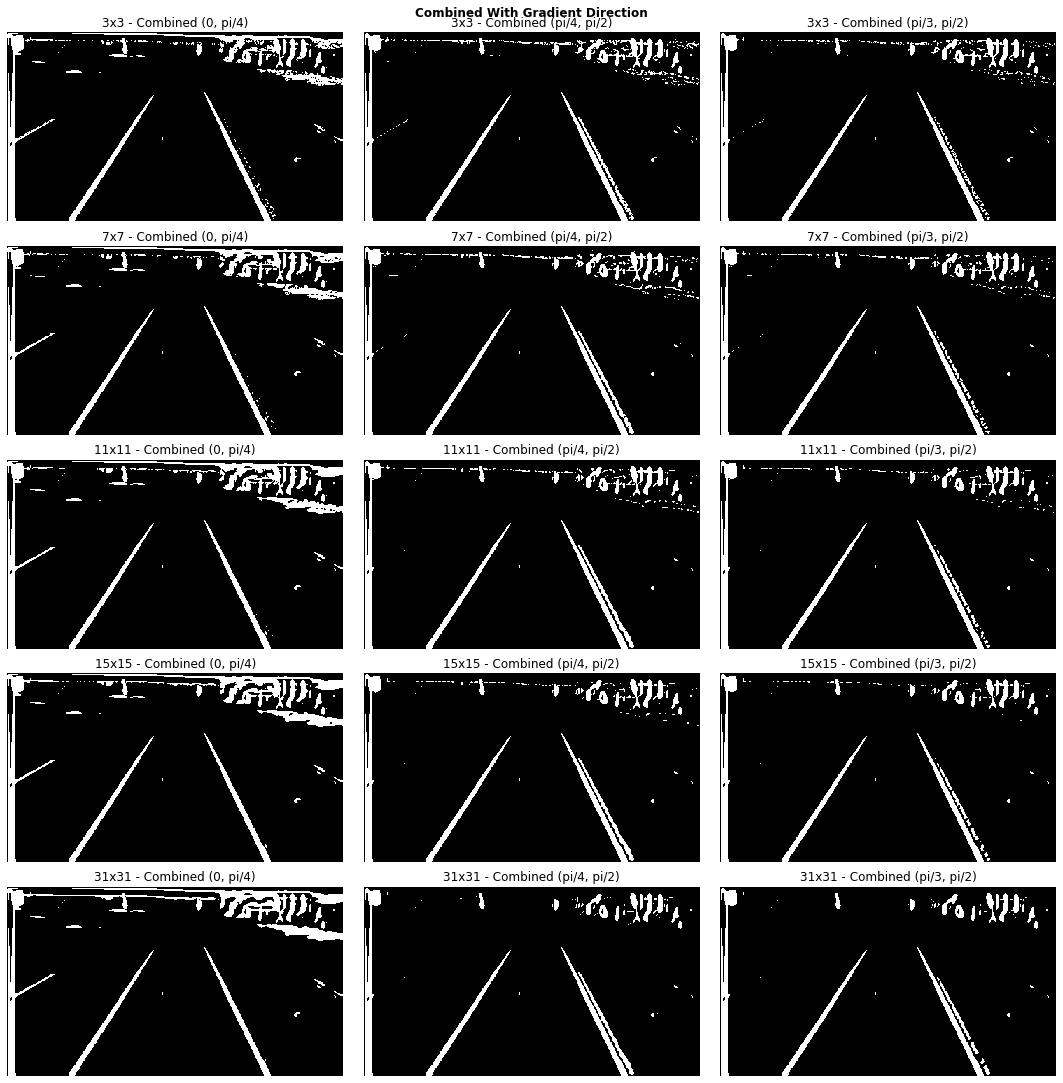

In [59]:
show_image_list(sobxy_combined_dir_thres, sobxy_combined_dir_thres_lbs, "Combined With Gradient Direction", cols=3, show_ticks=False)

In [61]:
sobel_combined_best = combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=31, angle_thres=(0, np.pi/4))

In [62]:
color_binary = np.dstack((np.zeros_like(sobel_combined_best), sobel_combined_best, undistorted_yellow_white_hls_img_bin)) * 255
color_binary = color_binary.astype(np.uint8)

In [63]:
combined_binary = np.zeros_like(undistorted_yellow_white_hls_img_bin)
combined_binary[(sobel_combined_best == 1) | (undistorted_yellow_white_hls_img_bin == 1)] = 1

In [64]:
combined_binaries = [[color_binary, combined_binary]]
combined_binaries_lbs = np.asarray([["Stacked Thresholds", "Combined Color And Gradient Thresholds"]])

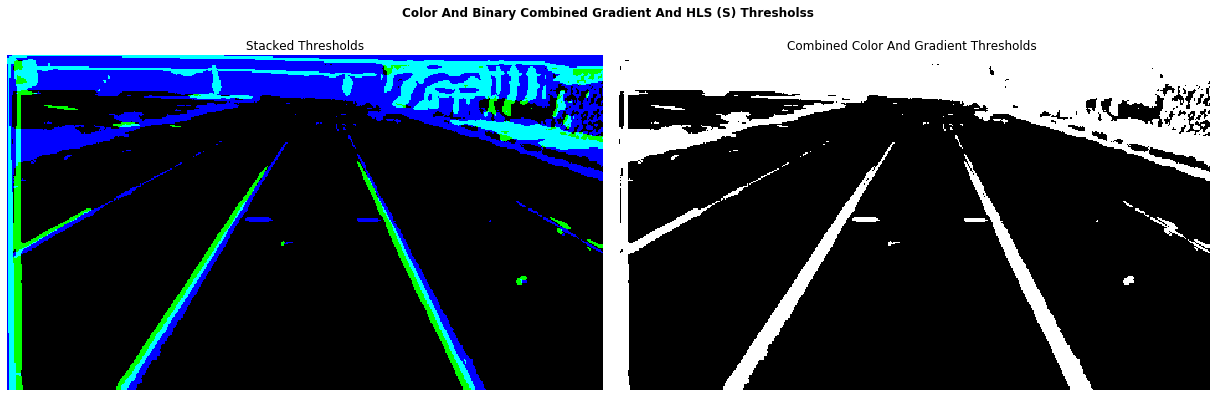

In [65]:
show_image_list(combined_binaries, combined_binaries_lbs, "Color And Binary Combined Gradient And HLS (S) Thresholss", cols=2, fig_size=(17, 6), show_ticks=False)

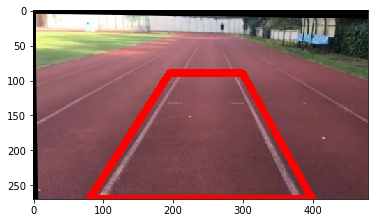

In [81]:

copy_combined = np.copy(undist_test_imgs[9])
(bottom_px, right_px) = (copy_combined.shape[0] - 1, copy_combined.shape[1] - 1) 
pts = np.array([[80,270],[195,90],[300,90], [400, 270]], np.int32)
cv2.polylines(copy_combined,[pts],True,(255,0,0), 10)
plt.axis('on')
plt.imshow(copy_combined)

In [82]:
def compute_perspective_transform_matrices(src, dst):
    """
    Returns the tuple (M, M_inv) where M represents the matrix to use for perspective transform
    and M_inv is the matrix used to revert the transformed image back to the original one
    """
    M = cv2.getPerspectiveTransform(src, dst)
    M_inv = cv2.getPerspectiveTransform(dst, src)
    
    return (M, M_inv)

In [83]:
def perspective_transform(img, src, dst):   
    """
    Applies a perspective 
    """
    M = cv2.getPerspectiveTransform(src, dst)
    img_size = (img.shape[1], img.shape[0])
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped

In [114]:
src_pts = pts.astype(np.float32)

#pts = np.array([[80,270],[195,90],[300,90], [400, 270]]
dst_pts = np.array([[80,270],[80,0],[400,0], [400,270]], np.float32)

In [115]:

test_img_persp_tr = perspective_transform(undistorted_test_img, src_pts, dst_pts)

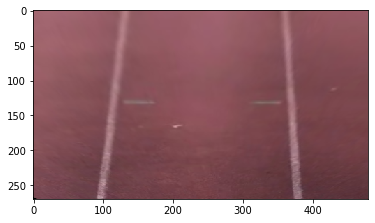

In [116]:
plt.imshow(undistorted_test_img)
plt.imshow(test_img_persp_tr)

In [117]:
test_imgs_pers_tr = np.asarray(list(map(lambda img: perspective_transform(img, src_pts, dst_pts), undist_test_imgs)))

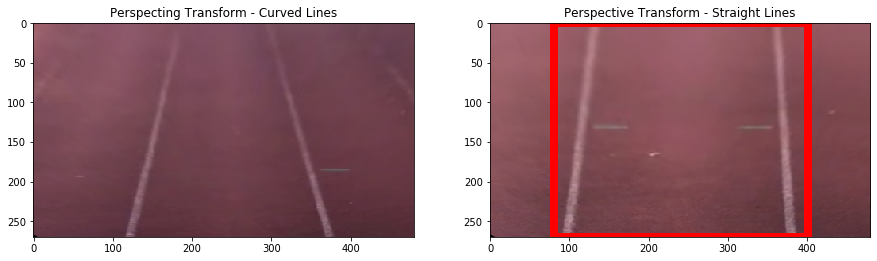

In [118]:
test_persp_img = np.copy(test_imgs_pers_tr[9])
dst = dst_pts.astype(np.int32)
cv2.polylines(test_persp_img,[dst],True,(255,0,0), 10)

fig, ax = plt.subplots(1, 2, figsize=(15,10))
ax[0].imshow(test_imgs_pers_tr[5])
ax[0].set_title("Perspecting Transform - Curved Lines")

ax[1].imshow(test_persp_img)
ax[1].set_title("Perspective Transform - Straight Lines")

plt.show()

In [119]:
test_undist_imgs_and_p_tr = np.asarray(list(zip(undist_test_imgs, test_imgs_pers_tr)))
test_undist_imgs_and_p_tr_names = np.asarray(list(zip(undist_test_img_names, undist_test_img_names)))

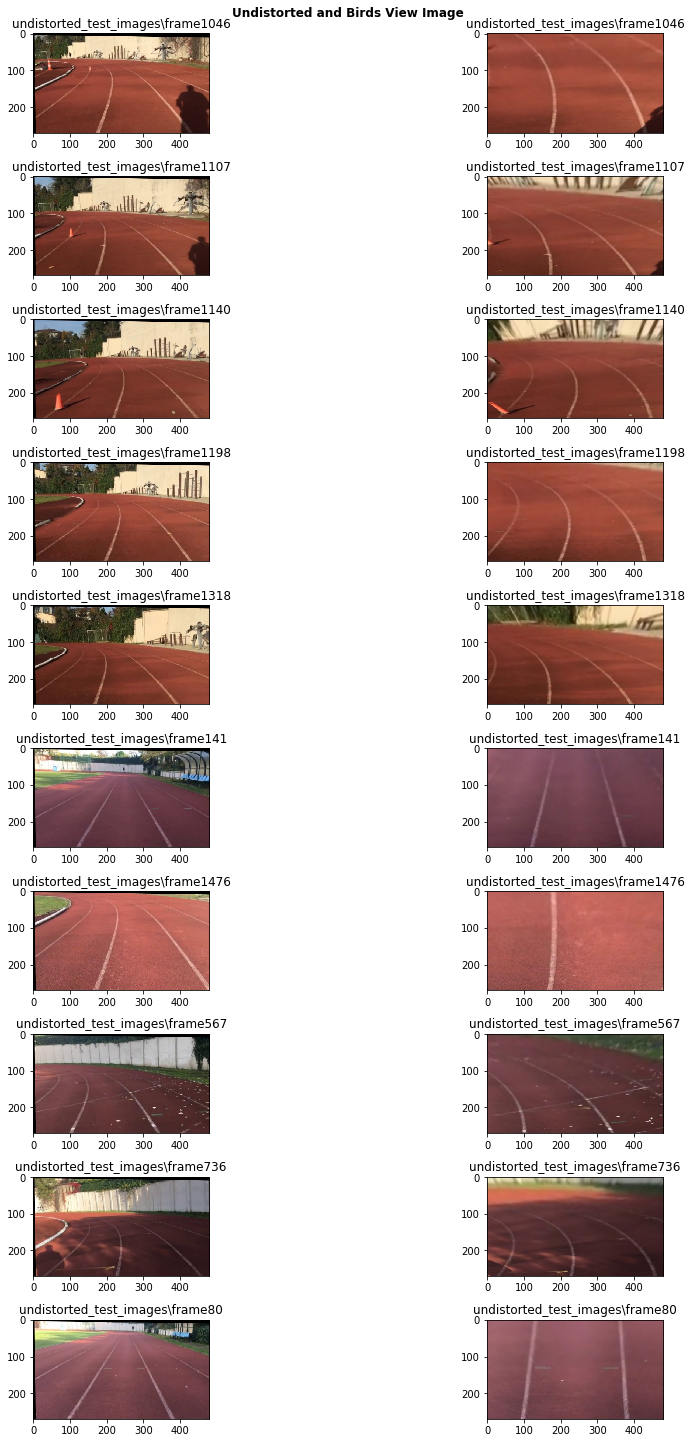

In [120]:
show_image_list(test_undist_imgs_and_p_tr, test_undist_imgs_and_p_tr_names, "Undistorted and Birds View Image", fig_size=(15, 20))

In [121]:
def get_combined_binary_thresholded_img(undist_img):
    """
    Applies a combination of binary Sobel and color thresholding to an undistorted image
    Those binary images are then combined to produce the returned binary image
    """
    undist_img_gray = to_lab(undist_img)[:,:,0]
    sx = abs_sobel(undist_img_gray, kernel_size=31, thres=(15, 120))
    sy = abs_sobel(undist_img_gray, x_dir=False, kernel_size=31, thres=(15, 120))
    sxy = mag_sobel(undist_img_gray, kernel_size=31, thres=(15, 80))
    sxy_combined_dir = combined_sobels(sx, sy, sxy, undist_img_gray, kernel_size=31, angle_thres=(np.pi/4, np.pi/2))   
    
    hls_w_y_thres = compute_hls_white_yellow_binary(undist_img)
    
    combined_binary = np.zeros_like(hls_w_y_thres)
    combined_binary[(sxy_combined_dir == 1) | (hls_w_y_thres == 1)] = 1
        
    return combined_binary

In [122]:

test_imgs_combined_binary_thres = np.asarray(list(map(lambda img: get_combined_binary_thresholded_img(img), undist_test_imgs)))

In [123]:
test_imgs_psp_tr = np.asarray(list(map(lambda img: perspective_transform(img, src_pts, dst_pts), undist_test_imgs)))

In [124]:
test_imgs_combined_binary_psp_tr = np.asarray(list(map(lambda img: perspective_transform(img, src_pts, dst_pts), test_imgs_combined_binary_thres)))

In [125]:
test_imgs_combined_binary_and_psp_tr = np.asarray(list(zip(test_imgs_psp_tr[:,:,:,0],test_imgs_combined_binary_thres, test_imgs_combined_binary_psp_tr)))
test_imgs_combined_binary_and_psp_tr_names = np.asarray(list(zip(undist_test_img_names,undist_test_img_names, undist_test_img_names)))

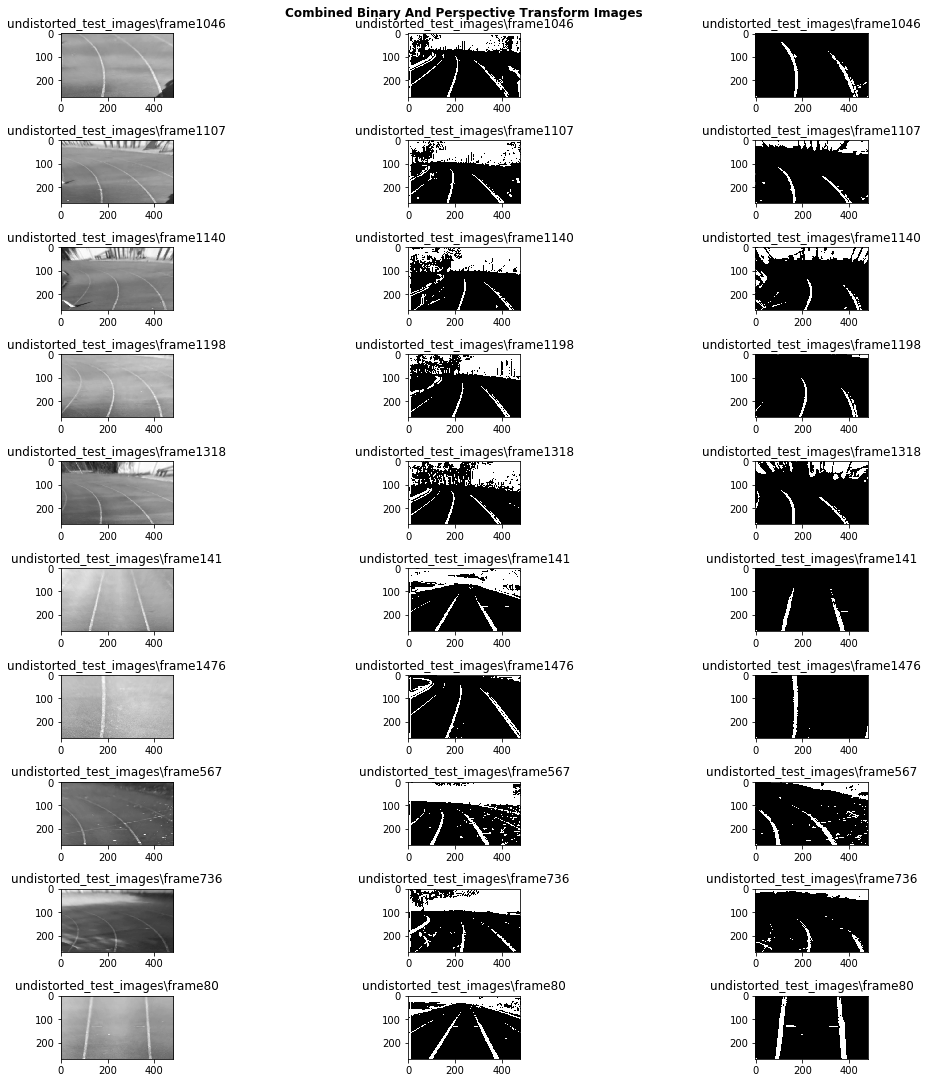

In [126]:
show_image_list(test_imgs_combined_binary_and_psp_tr, test_imgs_combined_binary_and_psp_tr_names, "Combined Binary And Perspective Transform Images", cols=3, fig_size=(15, 15))

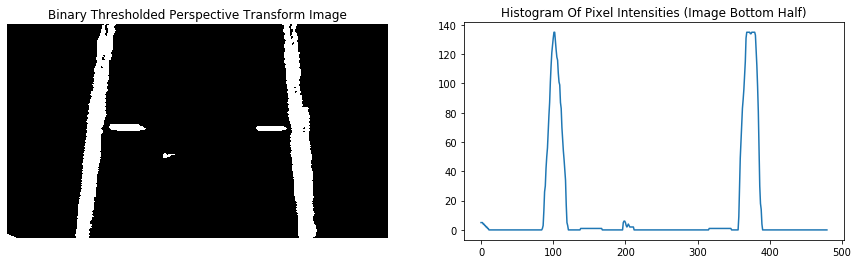

In [127]:

img_example = test_imgs_combined_binary_and_psp_tr[9][2]
histogram = np.sum(img_example[img_example.shape[0]//2:,:], axis=0)

fig, ax = plt.subplots(1, 2, figsize=(15,4))
ax[0].imshow(img_example, cmap='gray')
ax[0].axis("off")
ax[0].set_title("Binary Thresholded Perspective Transform Image")

ax[1].plot(histogram)
ax[1].set_title("Histogram Of Pixel Intensities (Image Bottom Half)")

plt.show()

**Pipeline** **Definition**

In [128]:
from collections import deque

def create_queue(length = 10):
    return deque(maxlen=length)

In [129]:
class LaneLine:
    def __init__(self):
        
        self.polynomial_coeff = None
        self.line_fit_x = None
        self.non_zero_x = []
        self.non_zero_y = []
        self.windows = []

In [130]:
import math

class LaneLineHistory:
    def __init__(self, queue_depth=2, test_points=[5, 30, 50, 70], poly_max_deviation_distance=30):
        self.lane_lines = create_queue(queue_depth)
        self.smoothed_poly = None
        self.test_points = test_points
        self.poly_max_deviation_distance = poly_max_deviation_distance
    
    def append(self, lane_line, force=False):
        if len(self.lane_lines) == 0 or force:
            self.lane_lines.append(lane_line)
            self.get_smoothed_polynomial()
            return True
        
        test_y_smooth = np.asarray(list(map(lambda x: self.smoothed_poly[0] * x**2 + self.smoothed_poly[1] * x + self.smoothed_poly[2], self.test_points)))
        test_y_new = np.asarray(list(map(lambda x: lane_line.polynomial_coeff[0] * x**2 + lane_line.polynomial_coeff[1] * x + lane_line.polynomial_coeff[2], self.test_points)))
        
        dist = np.absolute(test_y_smooth - test_y_new)
        
        #dist = np.absolute(self.smoothed_poly - lane_line.polynomial_coeff)
        #dist_max = np.absolute(self.smoothed_poly * self.poly_max_deviation_distance)
        max_dist = dist[np.argmax(dist)]
        
        if max_dist > self.poly_max_deviation_distance:
            print("**** MAX DISTANCE BREACHED ****")
            print("y_smooth={0} - y_new={1} - distance={2} - max-distance={3}".format(test_y_smooth, test_y_new, max_dist, self.poly_max_deviation_distance))
            return False
        
        self.lane_lines.append(lane_line)
        self.get_smoothed_polynomial()
        
        return True
    
    def get_smoothed_polynomial(self):
        all_coeffs = np.asarray(list(map(lambda lane_line: lane_line.polynomial_coeff, self.lane_lines)))
        self.smoothed_poly = np.mean(all_coeffs, axis=0)
        
        return self.smoothed_poly

In [131]:
class AdvancedLaneDetectorWithMemory:
    """
    The AdvancedLaneDetectorWithMemory is a class that can detect lines on the road
    """
    def __init__(self, objpts, imgpts, psp_src, psp_dst, sliding_windows_per_line, 
                 sliding_window_half_width, sliding_window_recenter_thres, 
                 small_img_size=(25, 14), small_img_x_offset=10, small_img_y_offset=5,
                 img_dimensions=(270, 480), lane_width_px=320, 
                 lane_center_px_psp=240, real_world_lane_size_meters=(32, 3.7)):
        self.objpts = objpts
        self.imgpts = imgpts
        (self.M_psp, self.M_inv_psp) = compute_perspective_transform_matrices(psp_src, psp_dst)

        self.sliding_windows_per_line = sliding_windows_per_line
        self.sliding_window_half_width = sliding_window_half_width
        self.sliding_window_recenter_thres = sliding_window_recenter_thres
        
        self.small_img_size = small_img_size
        self.small_img_x_offset = small_img_x_offset
        self.small_img_y_offset = small_img_y_offset
        
        self.img_dimensions = img_dimensions
        self.lane_width_px = lane_width_px
        self.lane_center_px_psp = lane_center_px_psp 
        self.real_world_lane_size_meters = real_world_lane_size_meters

        # We can pre-compute some data here
        self.ym_per_px = self.real_world_lane_size_meters[0] / self.img_dimensions[0]
        self.xm_per_px = self.real_world_lane_size_meters[1] / self.lane_width_px
        self.ploty = np.linspace(0, self.img_dimensions[0] - 1, self.img_dimensions[0])
        
        self.previous_left_lane_line = None
        self.previous_right_lane_line = None
        
        self.previous_left_lane_lines = LaneLineHistory()
        self.previous_right_lane_lines = LaneLineHistory()
        
        self.total_img_count = 0
        
    
    def process_image(self, img):
        """
        Attempts to find lane lines on the given image and returns an image with lane area colored in green
        as well as small intermediate images overlaid on top to understand how the algorithm is performing
        """
        # First step - undistort the image using the instance's object and image points
        undist_img = undistort_image(img, self.objpts, self.imgpts)
        
        # Produce binary thresholded image from color and gradients
        thres_img = get_combined_binary_thresholded_img(undist_img)
        
        # Create the undistorted and binary perspective transforms
        img_size = (undist_img.shape[1], undist_img.shape[0])
        undist_img_psp = cv2.warpPerspective(undist_img, self.M_psp, img_size, flags=cv2.INTER_LINEAR)
        thres_img_psp = cv2.warpPerspective(thres_img, self.M_psp, img_size, flags=cv2.INTER_LINEAR)
        
        ll, rl = self.compute_lane_lines(thres_img_psp)
        lcr, rcr, lco = self.compute_lane_curvature(ll, rl)

        drawn_lines = self.draw_lane_lines(thres_img_psp, ll, rl)        
        #plt.imshow(drawn_lines)
        
        drawn_lines_regions = self.draw_lane_lines_regions(thres_img_psp, ll, rl)
        #plt.imshow(drawn_lines_regions)
        
        drawn_lane_area = self.draw_lane_area(thres_img_psp, undist_img, ll, rl)        
        #plt.imshow(drawn_lane_area)
        
        drawn_hotspots = self.draw_lines_hotspots(thres_img_psp, ll, rl)
        
        combined_lane_img = self.combine_images(drawn_lane_area, drawn_lines, drawn_lines_regions, drawn_hotspots, undist_img_psp)
        final_img = self.draw_lane_curvature_text(combined_lane_img, lcr, rcr, lco)
        
        self.total_img_count += 1
        self.previous_left_lane_line = ll
        self.previous_right_lane_line = rl
        
        return final_img
    
    def draw_lane_curvature_text(self, img, left_curvature_meters, right_curvature_meters, center_offset_meters):
        """
        Returns an image with curvature information inscribed
        """
        
        offset_y = self.small_img_size[1] * 1 + self.small_img_y_offset * 5
        offset_x = self.small_img_x_offset
        
        template = "{0:17}{1:17}{2:17}"
        txt_header = template.format("Left Curvature", "Right Curvature", "Center Alignment") 
        print(txt_header)
        txt_values = template.format("{:.4f}m".format(left_curvature_meters), 
                                     "{:.4f}m".format(right_curvature_meters),
                                     "{:.4f}m Right".format(center_offset_meters))
        if center_offset_meters < 0.0:
            txt_values = template.format("{:.4f}m".format(left_curvature_meters), 
                                     "{:.4f}m".format(right_curvature_meters),
                                     "{:.4f}m Left".format(math.fabs(center_offset_meters)))
            
        
        print(txt_values)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, txt_header, (offset_x, offset_y), font, 1, (255,255,255), 1, cv2.LINE_AA)
        cv2.putText(img, txt_values, (offset_x, offset_y + self.small_img_y_offset * 5), font, 1, (255,255,255), 2, cv2.LINE_AA)
        
        return img
    
    def combine_images(self, lane_area_img, lines_img, lines_regions_img, lane_hotspots_img, psp_color_img):        
        """
        Returns a new image made up of the lane area image, and the remaining lane images are overlaid as
        small images in a row at the top of the the new image
        """
        small_lines = cv2.resize(lines_img, self.small_img_size)
        small_region = cv2.resize(lines_regions_img, self.small_img_size)
        small_hotspots = cv2.resize(lane_hotspots_img, self.small_img_size)
        small_color_psp = cv2.resize(psp_color_img, self.small_img_size)
                
        lane_area_img[self.small_img_y_offset: self.small_img_y_offset + self.small_img_size[1], self.small_img_x_offset: self.small_img_x_offset + self.small_img_size[0]] = small_lines
        
        start_offset_y = self.small_img_y_offset 
        start_offset_x = 2 * self.small_img_x_offset + self.small_img_size[0]
        lane_area_img[start_offset_y: start_offset_y + self.small_img_size[1], start_offset_x: start_offset_x + self.small_img_size[0]] = small_region
        
        start_offset_y = self.small_img_y_offset 
        start_offset_x = 3 * self.small_img_x_offset + 2 * self.small_img_size[0]
        lane_area_img[start_offset_y: start_offset_y + self.small_img_size[1], start_offset_x: start_offset_x + self.small_img_size[0]] = small_hotspots

        start_offset_y = self.small_img_y_offset 
        start_offset_x = 4 * self.small_img_x_offset + 3 * self.small_img_size[0]
        lane_area_img[start_offset_y: start_offset_y + self.small_img_size[1], start_offset_x: start_offset_x + self.small_img_size[0]] = small_color_psp
        
        
        return lane_area_img
    
        
    def draw_lane_area(self, warped_img, undist_img, left_line, right_line):
        """
        Returns an image where the inside of the lane has been colored in bright green
        """
        # Create an image to draw the lines on
        warp_zero = np.zeros_like(warped_img).astype(np.uint8)
        color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

        ploty = np.linspace(0, warped_img.shape[0] - 1, warped_img.shape[0])
        # Recast the x and y points into usable format for cv2.fillPoly()
        pts_left = np.array([np.transpose(np.vstack([left_line.line_fit_x, ploty]))])
        pts_right = np.array([np.flipud(np.transpose(np.vstack([right_line.line_fit_x, ploty])))])
        pts = np.hstack((pts_left, pts_right))

        # Draw the lane onto the warped blank image
        cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

        # Warp the blank back to original image space using inverse perspective matrix (Minv)
        newwarp = cv2.warpPerspective(color_warp, self.M_inv_psp, (undist_img.shape[1], undist_img.shape[0])) 
        # Combine the result with the original image
        result = cv2.addWeighted(undist_img, 1, newwarp, 0.3, 0)
        
        return result
        
        
    def draw_lane_lines(self, warped_img, left_line, right_line):
        """
        Returns an image where the computed lane lines have been drawn on top of the original warped binary image
        """
        # Create an output image with 3 colors (RGB) from the binary warped image to draw on and  visualize the result
        out_img = np.dstack((warped_img, warped_img, warped_img))*255
        
        # Now draw the lines
        ploty = np.linspace(0, warped_img.shape[0] - 1, warped_img.shape[0])
        pts_left = np.dstack((left_line.line_fit_x, ploty)).astype(np.int32)
        pts_right = np.dstack((right_line.line_fit_x, ploty)).astype(np.int32)

        cv2.polylines(out_img, pts_left, False,  (255, 140,0), 5)
        cv2.polylines(out_img, pts_right, False, (255, 140,0), 5)
        
        for low_pt, high_pt in left_line.windows:
            cv2.rectangle(out_img, low_pt, high_pt, (0, 255, 0), 3)

        for low_pt, high_pt in right_line.windows:            
            cv2.rectangle(out_img, low_pt, high_pt, (0, 255, 0), 3)           
        
        return out_img    
    
    def draw_lane_lines_regions(self, warped_img, left_line, right_line):
        """
        Returns an image where the computed left and right lane areas have been drawn on top of the original warped binary image
        """
        # Generate a polygon to illustrate the search window area
        # And recast the x and y points into usable format for cv2.fillPoly()
        margin = self.sliding_window_half_width
        ploty = np.linspace(0, warped_img.shape[0] - 1, warped_img.shape[0])
        
        left_line_window1 = np.array([np.transpose(np.vstack([left_line.line_fit_x - margin, ploty]))])
        left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_line.line_fit_x + margin, 
                                      ploty])))])
        left_line_pts = np.hstack((left_line_window1, left_line_window2))
        
        right_line_window1 = np.array([np.transpose(np.vstack([right_line.line_fit_x - margin, ploty]))])
        right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_line.line_fit_x + margin, 
                                      ploty])))])
        right_line_pts = np.hstack((right_line_window1, right_line_window2))

        # Create RGB image from binary warped image
        region_img = np.dstack((warped_img, warped_img, warped_img)) * 255

        # Draw the lane onto the warped blank image
        cv2.fillPoly(region_img, np.int_([left_line_pts]), (0, 255, 0))
        cv2.fillPoly(region_img, np.int_([right_line_pts]), (0, 255, 0))
        
        return region_img


    def draw_lines_hotspots(self, warped_img, left_line, right_line):
        """
        Returns a RGB image where the portions of the lane lines that were
        identified by our pipeline are colored in yellow (left) and blue (right)
        """
        out_img = np.dstack((warped_img, warped_img, warped_img))*255
        
        out_img[left_line.non_zero_y, left_line.non_zero_x] = [255, 255, 0]
        out_img[right_line.non_zero_y, right_line.non_zero_x] = [0, 0, 255]
        
        return out_img

    def compute_lane_curvature(self, left_line, right_line):
        """
        Returns the triple (left_curvature, right_curvature, lane_center_offset), which are all in meters
        """        
        ploty = self.ploty
        y_eval = np.max(ploty)
        # Define conversions in x and y from pixels space to meters
        
        leftx = left_line.line_fit_x
        rightx = right_line.line_fit_x
        
        # Fit new polynomials: find x for y in real-world space
        left_fit_cr = np.polyfit(ploty * self.ym_per_px, leftx * self.xm_per_px, 2)
        right_fit_cr = np.polyfit(ploty * self.ym_per_px, rightx * self.xm_per_px, 2)
        
        # Now calculate the radii of the curvature
        left_curverad = ((1 + (2 * left_fit_cr[0] * y_eval * self.ym_per_px + left_fit_cr[1])**2)**1.5) / np.absolute(2 * left_fit_cr[0])
        right_curverad = ((1 + (2 *right_fit_cr[0] * y_eval * self.ym_per_px + right_fit_cr[1])**2)**1.5) / np.absolute(2 * right_fit_cr[0])
        
        # Use our computed polynomial to determine the car's center position in image space, then
        left_fit = left_line.polynomial_coeff
        right_fit = right_line.polynomial_coeff
        
        center_offset_img_space = (((left_fit[0] * y_eval**2 + left_fit[1] * y_eval + left_fit[2]) + 
                   (right_fit[0] * y_eval**2 + right_fit[1] * y_eval + right_fit[2])) / 2) - self.lane_center_px_psp
        center_offset_real_world_m = center_offset_img_space * self.xm_per_px
        
        # Now our radius of curvature is in meters        
        return left_curverad, right_curverad, center_offset_real_world_m
        
        
        
    def compute_lane_lines(self, warped_img):
        """
        Returns the tuple (left_lane_line, right_lane_line) which represents respectively the LaneLine instances for
        the computed left and right lanes, for the supplied binary warped image
        """

        # Take a histogram of the bottom half of the image, summing pixel values column wise 
        histogram = np.sum(warped_img[warped_img.shape[0]//2:,:], axis=0)
        
        # Find the peak of the left and right halves of the histogram
        # These will be the starting point for the left and right lines 
        midpoint = np.int(histogram.shape[0]//2)
        leftx_base = np.argmax(histogram[:midpoint])
        rightx_base = np.argmax(histogram[midpoint:]) + midpoint # don't forget to offset by midpoint!
        

        # Set height of windows
        window_height = np.int(warped_img.shape[0]//self.sliding_windows_per_line)
        # Identify the x and y positions of all nonzero pixels in the image
        # NOTE: nonzero returns a tuple of arrays in y and x directions
        nonzero = warped_img.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        
        total_non_zeros = len(nonzeroy)
        non_zero_found_pct = 0.0
        
        # Current positions to be updated for each window
        leftx_current = leftx_base
        rightx_current = rightx_base    


        # Set the width of the windows +/- margin
        margin = self.sliding_window_half_width
        # Set minimum number of pixels found to recenter window
        minpix = self.sliding_window_recenter_thres
        # Create empty lists to receive left and right lane pixel indices
        left_lane_inds = []
        right_lane_inds = []
        
        # Our lane line objects we store the result of this computation
        left_line = LaneLine()
        right_line = LaneLine()
                        
        if self.previous_left_lane_line is not None and self.previous_right_lane_line is not None:
            # We have already computed the lane lines polynomials from a previous image
            left_lane_inds = ((nonzerox > (self.previous_left_lane_line.polynomial_coeff[0] * (nonzeroy**2) 
                                           + self.previous_left_lane_line.polynomial_coeff[1] * nonzeroy 
                                           + self.previous_left_lane_line.polynomial_coeff[2] - margin)) 
                              & (nonzerox < (self.previous_left_lane_line.polynomial_coeff[0] * (nonzeroy**2) 
                                            + self.previous_left_lane_line.polynomial_coeff[1] * nonzeroy 
                                            + self.previous_left_lane_line.polynomial_coeff[2] + margin))) 

            right_lane_inds = ((nonzerox > (self.previous_right_lane_line.polynomial_coeff[0] * (nonzeroy**2) 
                                           + self.previous_right_lane_line.polynomial_coeff[1] * nonzeroy 
                                           + self.previous_right_lane_line.polynomial_coeff[2] - margin)) 
                              & (nonzerox < (self.previous_right_lane_line.polynomial_coeff[0] * (nonzeroy**2) 
                                            + self.previous_right_lane_line.polynomial_coeff[1] * nonzeroy 
                                            + self.previous_right_lane_line.polynomial_coeff[2] + margin))) 
            
            non_zero_found_left = np.sum(left_lane_inds)
            non_zero_found_right = np.sum(right_lane_inds)
            non_zero_found_pct = (non_zero_found_left + non_zero_found_right) / total_non_zeros
           
            print("[Previous lane] Found pct={0}".format(non_zero_found_pct))
            #print(left_lane_inds)
        
        if non_zero_found_pct < 0.85:
            print("Non zeros found below thresholds, begining sliding window - pct={0}".format(non_zero_found_pct))
            left_lane_inds = []
            right_lane_inds = []

            # Step through the windows one by one
            for window in range(self.sliding_windows_per_line):
                # Identify window boundaries in x and y (and right and left)
                # We are moving our windows from the bottom to the top of the screen (highest to lowest y value)
                win_y_low = warped_img.shape[0] - (window + 1)* window_height
                win_y_high = warped_img.shape[0] - window * window_height

                # Defining our window's coverage in the horizontal (i.e. x) direction 
                # Notice that the window's width is twice the margin
                win_xleft_low = leftx_current - margin
                win_xleft_high = leftx_current + margin
                win_xright_low = rightx_current - margin
                win_xright_high = rightx_current + margin

                left_line.windows.append([(win_xleft_low,win_y_low),(win_xleft_high,win_y_high)])
                right_line.windows.append([(win_xright_low,win_y_low),(win_xright_high,win_y_high)])

                # Super crytic and hard to understand...
                # Basically nonzerox and nonzeroy have the same size and any nonzero pixel is identified by
                # (nonzeroy[i],nonzerox[i]), therefore we just return the i indices within the window that are nonzero
                # and can then index into nonzeroy and nonzerox to find the ACTUAL pixel coordinates that are not zero
                good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
                good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
                            
                # Append these indices to the lists
                left_lane_inds.append(good_left_inds)
                right_lane_inds.append(good_right_inds)

                # If you found > minpix pixels, recenter next window on their mean position
                if len(good_left_inds) > minpix:
                    leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
                if len(good_right_inds) > minpix:        
                    rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

            # Concatenate the arrays of indices since we now have a list of multiple arrays (e.g. ([1,3,6],[8,5,2]))
            # We want to create a single array with elements from all those lists (e.g. [1,3,6,8,5,2])
            # These are the indices that are non zero in our sliding windows
            left_lane_inds = np.concatenate(left_lane_inds)
            right_lane_inds = np.concatenate(right_lane_inds)
            
            non_zero_found_left = np.sum(left_lane_inds)
            non_zero_found_right = np.sum(right_lane_inds)
            non_zero_found_pct = (non_zero_found_left + non_zero_found_right) / total_non_zeros
           
            print("[Sliding windows] Found pct={0}".format(non_zero_found_pct))
            
    
        # Extract left and right line pixel positions
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds] 
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds] 
        
        #print("[LEFT] Number of hot pixels={0}".format(len(leftx)))
        #print("[RIGHT] Number of hot pixels={0}".format(len(rightx)))
        # Fit a second order polynomial to each
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
        #print("Poly left {0}".format(left_fit))
        #print("Poly right {0}".format(right_fit))
        left_line.polynomial_coeff = left_fit
        right_line.polynomial_coeff = right_fit
        
        if not self.previous_left_lane_lines.append(left_line):
            left_fit = self.previous_left_lane_lines.get_smoothed_polynomial()
            left_line.polynomial_coeff = left_fit
            self.previous_left_lane_lines.append(left_line, force=True)
            print("**** REVISED Poly left {0}".format(left_fit))            
        #else:
            #left_fit = self.previous_left_lane_lines.get_smoothed_polynomial()
            #left_line.polynomial_coeff = left_fit


        if not self.previous_right_lane_lines.append(right_line):
            right_fit = self.previous_right_lane_lines.get_smoothed_polynomial()
            right_line.polynomial_coeff = right_fit
            self.previous_right_lane_lines.append(right_line, force=True)
            print("**** REVISED Poly right {0}".format(right_fit))
        #else:
            #right_fit = self.previous_right_lane_lines.get_smoothed_polynomial()
            #right_line.polynomial_coeff = right_fit


    
        # Generate x and y values for plotting
        ploty = np.linspace(0, warped_img.shape[0] - 1, warped_img.shape[0] )
        left_fitx = left_fit[0] * ploty**2 + left_fit[1] * ploty + left_fit[2]
        right_fitx = right_fit[0] * ploty**2 + right_fit[1] * ploty + right_fit[2]
        
        
        left_line.polynomial_coeff = left_fit
        left_line.line_fit_x = left_fitx
        left_line.non_zero_x = leftx  
        left_line.non_zero_y = lefty

        right_line.polynomial_coeff = right_fit
        right_line.line_fit_x = right_fitx
        right_line.non_zero_x = rightx
        right_line.non_zero_y = righty

        
        return (left_line, right_line)

In [132]:
ld = AdvancedLaneDetectorWithMemory(opts, ipts, src_pts, dst_pts, 9, 20, 10)

In [133]:
proc_img = ld.process_image(test_img)

Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=5357.921601261388
Left Curvature   Right Curvature  Center Alignment 
12428.8850m      5626.9777m       0.0442m Left     


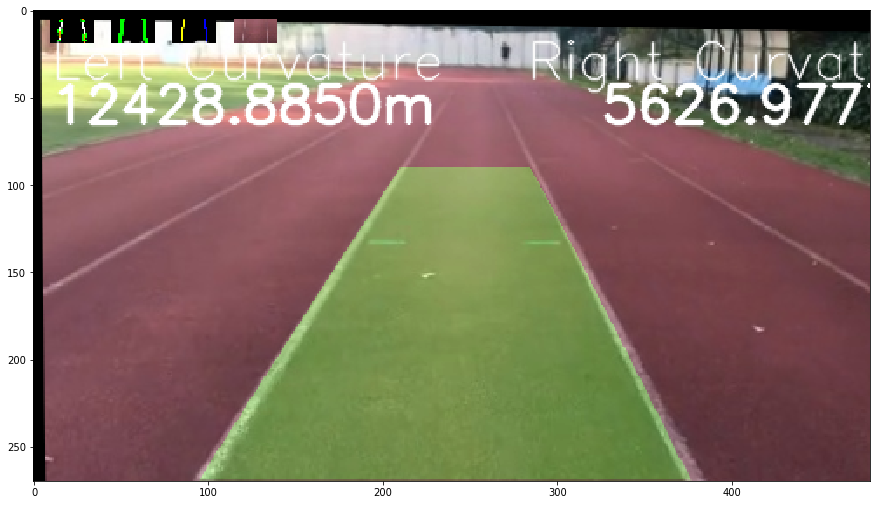

In [134]:
plt.figure(figsize=(15,10))
plt.imshow(proc_img)

In [135]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [136]:
project_video_path = "tartan_vid/movie_resized_mini.mp4"
challenge_video_path = "challenge_video.mp4"
project_video_output_path = 'output_videos/golgeli_outputv3.mp4'
project_video_sample_path = 'project_video_sample.mp4'
challenge_video_sample_path = 'challenge_video_sample.mp4'

project_video_sample_output_path = 'output_videos/golgeli_outputv3.mp4'
challenge_video_sample_output_path = 'output_videos/lanes_challenge_video_sample.mp4'

In [137]:

from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
ffmpeg_extract_subclip(project_video_path, 22, 27, targetname=project_video_sample_path)

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [139]:
detector = AdvancedLaneDetectorWithMemory(opts, ipts, src_pts, dst_pts, 9, 20, 10)

clip1 = VideoFileClip(project_video_path)
project_video_clip = clip1.fl_image(detector.process_image) #NOTE: this function expects color images!!
%time project_video_clip.write_videofile(project_video_sample_output_path, audio=False)

t:   0%|          | 0/1483 [00:00<?, ?it/s, now=None]

Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=5823.0284162468515
Left Curvature   Right Curvature  Center Alignment 
9909.9989m       7932.0988m       0.3161m Left     
Moviepy - Building video output_videos/golgeli_outputv3.mp4.
Moviepy - Writing video output_videos/golgeli_outputv3.mp4




t:   0%|          | 2/1483 [00:01<17:04,  1.45it/s, now=None]

[Previous lane] Found pct=0.9165617128463476
Left Curvature   Right Curvature  Center Alignment 
9509.4388m       147955.5111m     0.3072m Left     



t:   0%|          | 3/1483 [00:02<22:31,  1.10it/s, now=None]

[Previous lane] Found pct=0.9180044066729619
Left Curvature   Right Curvature  Center Alignment 
10622.8776m      696761.0866m     0.3030m Left     



t:   0%|          | 4/1483 [00:04<25:41,  1.04s/it, now=None]

[Previous lane] Found pct=0.9155980415015155
Left Curvature   Right Curvature  Center Alignment 
8300.4053m       58263.7140m      0.2988m Left     



t:   0%|          | 5/1483 [00:05<28:05,  1.14s/it, now=None]

[Previous lane] Found pct=0.9415655085809962
Left Curvature   Right Curvature  Center Alignment 
6588.8126m       25985.9238m      0.2894m Left     



t:   0%|          | 6/1483 [00:06<29:28,  1.20s/it, now=None]

[Previous lane] Found pct=0.9422406639004149
Left Curvature   Right Curvature  Center Alignment 
10842.7235m      13600.7034m      0.2856m Left     



t:   0%|          | 7/1483 [00:08<29:42,  1.21s/it, now=None]

[Previous lane] Found pct=0.9438108715558146
Left Curvature   Right Curvature  Center Alignment 
50267.1823m      29423.1059m      0.2834m Left     



t:   1%|          | 8/1483 [00:09<30:08,  1.23s/it, now=None]

[Previous lane] Found pct=0.9410064603876233
Left Curvature   Right Curvature  Center Alignment 
8585.5177m       17837.3326m      0.2774m Left     



t:   1%|          | 9/1483 [00:10<31:21,  1.28s/it, now=None]

[Previous lane] Found pct=0.941712204007286
Left Curvature   Right Curvature  Center Alignment 
6330.2577m       6237.1461m       0.2690m Left     



t:   1%|          | 10/1483 [00:12<32:29,  1.32s/it, now=None]

[Previous lane] Found pct=0.9443429863466388
Left Curvature   Right Curvature  Center Alignment 
5721.3107m       12178.8212m      0.2672m Left     



t:   1%|          | 11/1483 [00:13<33:07,  1.35s/it, now=None]

[Previous lane] Found pct=0.9435302269184133
Left Curvature   Right Curvature  Center Alignment 
6940.1693m       40240.7367m      0.2652m Left     



t:   1%|          | 12/1483 [00:14<33:00,  1.35s/it, now=None]

[Previous lane] Found pct=0.9446643793437143
Left Curvature   Right Curvature  Center Alignment 
6208.0879m       34509.1194m      0.2607m Left     



t:   1%|          | 13/1483 [00:16<33:59,  1.39s/it, now=None]

[Previous lane] Found pct=0.9448599756479388
Left Curvature   Right Curvature  Center Alignment 
7536.9517m       36138.9125m      0.2584m Left     



t:   1%|          | 14/1483 [00:17<33:53,  1.38s/it, now=None]

[Previous lane] Found pct=0.9420625724217845
Left Curvature   Right Curvature  Center Alignment 
6673.7158m       292407.1272m     0.2564m Left     



t:   1%|          | 15/1483 [00:19<34:01,  1.39s/it, now=None]

[Previous lane] Found pct=0.9446876954695738
Left Curvature   Right Curvature  Center Alignment 
6827.4506m       14742.7187m      0.2523m Left     



t:   1%|          | 16/1483 [00:20<35:45,  1.46s/it, now=None]

[Previous lane] Found pct=0.9431746318547294
Left Curvature   Right Curvature  Center Alignment 
7653.3773m       23333.5181m      0.2507m Left     



t:   1%|          | 17/1483 [00:22<36:26,  1.49s/it, now=None]

[Previous lane] Found pct=0.9441527878349022
Left Curvature   Right Curvature  Center Alignment 
7072.4704m       27868.4466m      0.2472m Left     



t:   1%|          | 18/1483 [00:23<36:07,  1.48s/it, now=None]

[Previous lane] Found pct=0.9442727272727273
Left Curvature   Right Curvature  Center Alignment 
6010.1452m       88828.1060m      0.2452m Left     



t:   1%|▏         | 19/1483 [00:25<35:55,  1.47s/it, now=None]

[Previous lane] Found pct=0.9452216569767442
Left Curvature   Right Curvature  Center Alignment 
5889.8775m       224998.9869m     0.2445m Left     



t:   1%|▏         | 20/1483 [00:26<35:59,  1.48s/it, now=None]

[Previous lane] Found pct=0.9451291883502236
Left Curvature   Right Curvature  Center Alignment 
6002.7241m       300089.0905m     0.2434m Left     



t:   1%|▏         | 21/1483 [00:28<35:42,  1.47s/it, now=None]

[Previous lane] Found pct=0.9437125748502994
Left Curvature   Right Curvature  Center Alignment 
11035.5463m      45212.7975m      0.2435m Left     



t:   1%|▏         | 22/1483 [00:29<35:39,  1.46s/it, now=None]

[Previous lane] Found pct=0.9438934802571166
Left Curvature   Right Curvature  Center Alignment 
11072.9519m      23228.4462m      0.2430m Left     



t:   2%|▏         | 23/1483 [00:31<35:45,  1.47s/it, now=None]

[Previous lane] Found pct=0.9438738077769626
Left Curvature   Right Curvature  Center Alignment 
6750.4382m       46132.5781m      0.2437m Left     



t:   2%|▏         | 24/1483 [00:32<35:37,  1.46s/it, now=None]

[Previous lane] Found pct=0.9449871952954567
Left Curvature   Right Curvature  Center Alignment 
11641.5151m      178320.7593m     0.2442m Left     



t:   2%|▏         | 25/1483 [00:34<35:36,  1.47s/it, now=None]

[Previous lane] Found pct=0.9451548735436204
Left Curvature   Right Curvature  Center Alignment 
11641.5151m      73899.0501m      0.2443m Left     



t:   2%|▏         | 26/1483 [00:35<35:56,  1.48s/it, now=None]

[Previous lane] Found pct=0.9457509603672819
Left Curvature   Right Curvature  Center Alignment 
7703.6013m       79981.6290m      0.2434m Left     



t:   2%|▏         | 27/1483 [00:37<36:58,  1.52s/it, now=None]

[Previous lane] Found pct=0.9458929072049341
Left Curvature   Right Curvature  Center Alignment 
8468.9059m       68356.1015m      0.2440m Left     



t:   2%|▏         | 28/1483 [00:38<36:55,  1.52s/it, now=None]

[Previous lane] Found pct=0.9464152352501867
Left Curvature   Right Curvature  Center Alignment 
9075.6878m       87924.7552m      0.2436m Left     



t:   2%|▏         | 29/1483 [00:40<36:13,  1.49s/it, now=None]

[Previous lane] Found pct=0.9473635090993934
Left Curvature   Right Curvature  Center Alignment 
8097.4562m       80120.6538m      0.2431m Left     



t:   2%|▏         | 30/1483 [00:41<35:56,  1.48s/it, now=None]

[Previous lane] Found pct=0.9448863104706653
Left Curvature   Right Curvature  Center Alignment 
7448.4963m       64225.8468m      0.2426m Left     



t:   2%|▏         | 31/1483 [00:43<35:43,  1.48s/it, now=None]

[Previous lane] Found pct=0.9446116230957307
Left Curvature   Right Curvature  Center Alignment 
87647.2291m      40458.2170m      0.2448m Left     



t:   2%|▏         | 32/1483 [00:44<35:39,  1.47s/it, now=None]

[Previous lane] Found pct=0.9491871806781236
Left Curvature   Right Curvature  Center Alignment 
10618.1891m      34403.3472m      0.2447m Left     



t:   2%|▏         | 33/1483 [00:46<35:33,  1.47s/it, now=None]

[Previous lane] Found pct=0.949607329842932
Left Curvature   Right Curvature  Center Alignment 
16399.1041m      62781.6646m      0.2463m Left     



t:   2%|▏         | 34/1483 [00:47<35:29,  1.47s/it, now=None]

[Previous lane] Found pct=0.9430511031491609
Left Curvature   Right Curvature  Center Alignment 
29213.1644m      46828.5269m      0.2473m Left     



t:   2%|▏         | 35/1483 [00:48<35:22,  1.47s/it, now=None]

[Previous lane] Found pct=0.9432346919784106
Left Curvature   Right Curvature  Center Alignment 
36667.6433m      45252.2843m      0.2495m Left     



t:   2%|▏         | 36/1483 [00:50<35:11,  1.46s/it, now=None]

[Previous lane] Found pct=0.9404963338973491
Left Curvature   Right Curvature  Center Alignment 
16605.7015m      20592.8196m      0.2493m Left     



t:   2%|▏         | 37/1483 [00:51<35:49,  1.49s/it, now=None]

[Previous lane] Found pct=0.9508118887095243
Left Curvature   Right Curvature  Center Alignment 
12294.7164m      19250.3280m      0.2495m Left     



t:   3%|▎         | 38/1483 [00:53<37:14,  1.55s/it, now=None]

[Previous lane] Found pct=0.9507343372374047
Left Curvature   Right Curvature  Center Alignment 
51106.0255m      14238.2862m      0.2550m Left     



t:   3%|▎         | 39/1483 [00:55<36:49,  1.53s/it, now=None]

[Previous lane] Found pct=0.9502005035904131
Left Curvature   Right Curvature  Center Alignment 
69000.1664m      11126.5267m      0.2578m Left     



t:   3%|▎         | 40/1483 [00:56<36:28,  1.52s/it, now=None]

[Previous lane] Found pct=0.9456874941973819
Left Curvature   Right Curvature  Center Alignment 
41583.8956m      10818.4691m      0.2632m Left     



t:   3%|▎         | 41/1483 [00:58<35:55,  1.49s/it, now=None]

[Previous lane] Found pct=0.9439595774000918
Left Curvature   Right Curvature  Center Alignment 
175860.7813m     13882.9399m      0.2684m Left     



t:   3%|▎         | 42/1483 [00:59<35:46,  1.49s/it, now=None]

[Previous lane] Found pct=0.9406925232799928
Left Curvature   Right Curvature  Center Alignment 
113398.0081m     10220.3922m      0.2746m Left     



t:   3%|▎         | 43/1483 [01:01<35:33,  1.48s/it, now=None]

[Previous lane] Found pct=0.9473440252155372
Left Curvature   Right Curvature  Center Alignment 
25727.5789m      9004.6410m       0.2769m Left     



t:   3%|▎         | 44/1483 [01:02<35:47,  1.49s/it, now=None]

[Previous lane] Found pct=0.9512352507374632
Left Curvature   Right Curvature  Center Alignment 
15977.2842m      7148.4843m       0.2851m Left     



t:   3%|▎         | 45/1483 [01:03<35:27,  1.48s/it, now=None]

[Previous lane] Found pct=0.9402173913043478
Left Curvature   Right Curvature  Center Alignment 
34977.8470m      8611.1117m       0.2909m Left     



t:   3%|▎         | 46/1483 [01:05<35:22,  1.48s/it, now=None]

[Previous lane] Found pct=0.9411554603089561
Left Curvature   Right Curvature  Center Alignment 
60437.9694m      7029.0330m       0.2972m Left     



t:   3%|▎         | 47/1483 [01:06<35:12,  1.47s/it, now=None]

[Previous lane] Found pct=0.9410607280207495
Left Curvature   Right Curvature  Center Alignment 
7849.1038m       5864.2761m       0.3015m Left     



t:   3%|▎         | 48/1483 [01:08<36:35,  1.53s/it, now=None]

[Previous lane] Found pct=0.945311099157253
Left Curvature   Right Curvature  Center Alignment 
13794.0463m      5614.5763m       0.3153m Left     



t:   3%|▎         | 49/1483 [01:10<37:22,  1.56s/it, now=None]

[Previous lane] Found pct=0.9391051098755626
Left Curvature   Right Curvature  Center Alignment 
46854.0900m      6765.1641m       0.3285m Left     



t:   3%|▎         | 50/1483 [01:11<36:32,  1.53s/it, now=None]

[Previous lane] Found pct=0.9434714756372464
Left Curvature   Right Curvature  Center Alignment 
38626.7547m      7061.8417m       0.3364m Left     



t:   3%|▎         | 51/1483 [01:13<36:11,  1.52s/it, now=None]

[Previous lane] Found pct=0.941495311021251
Left Curvature   Right Curvature  Center Alignment 
81911.4227m      6070.1753m       0.3508m Left     



t:   4%|▎         | 52/1483 [01:14<35:36,  1.49s/it, now=None]

[Previous lane] Found pct=0.9384706279540851
Left Curvature   Right Curvature  Center Alignment 
54984.4969m      6743.3625m       0.3601m Left     



t:   4%|▎         | 53/1483 [01:16<35:37,  1.50s/it, now=None]

[Previous lane] Found pct=0.9391657500634571
Left Curvature   Right Curvature  Center Alignment 
627602.6003m     6032.6822m       0.3699m Left     



t:   4%|▎         | 54/1483 [01:17<35:21,  1.48s/it, now=None]

[Previous lane] Found pct=0.9364317588616654
Left Curvature   Right Curvature  Center Alignment 
9228.7968m       5757.9092m       0.3788m Left     



t:   4%|▎         | 55/1483 [01:19<35:14,  1.48s/it, now=None]

[Previous lane] Found pct=0.9404455869751499
Left Curvature   Right Curvature  Center Alignment 
3382.4669m       4435.5889m       0.3975m Left     



t:   4%|▍         | 56/1483 [01:20<35:06,  1.48s/it, now=None]

[Previous lane] Found pct=0.9352664715793207
Left Curvature   Right Curvature  Center Alignment 
2701.5764m       5060.6820m       0.4150m Left     



t:   4%|▍         | 57/1483 [01:21<35:07,  1.48s/it, now=None]

[Previous lane] Found pct=0.9285583607757043
Left Curvature   Right Curvature  Center Alignment 
1855.8106m       4543.2825m       0.4247m Left     



t:   4%|▍         | 58/1483 [01:23<35:24,  1.49s/it, now=None]

[Previous lane] Found pct=0.9409452593231713
Left Curvature   Right Curvature  Center Alignment 
1615.7673m       6100.8868m       0.4263m Left     



t:   4%|▍         | 59/1483 [01:25<36:24,  1.53s/it, now=None]

[Previous lane] Found pct=0.9237216310387042
Left Curvature   Right Curvature  Center Alignment 
1373.9706m       4938.1468m       0.4119m Left     



t:   4%|▍         | 60/1483 [01:26<35:53,  1.51s/it, now=None]

[Previous lane] Found pct=0.9324902361911847
Left Curvature   Right Curvature  Center Alignment 
1434.9967m       6079.5202m       0.3835m Left     



t:   4%|▍         | 61/1483 [01:28<35:34,  1.50s/it, now=None]

[Previous lane] Found pct=0.9180091800918009
Left Curvature   Right Curvature  Center Alignment 
1874.1316m       6865.5212m       0.3571m Left     



t:   4%|▍         | 62/1483 [01:29<35:17,  1.49s/it, now=None]

[Previous lane] Found pct=0.9056735728647609
Left Curvature   Right Curvature  Center Alignment 
2223.4296m       14004.9976m      0.3370m Left     



t:   4%|▍         | 63/1483 [01:30<34:51,  1.47s/it, now=None]

[Previous lane] Found pct=0.8801011804384485
Left Curvature   Right Curvature  Center Alignment 
2212.6819m       20650.3492m      0.3254m Left     



t:   4%|▍         | 64/1483 [01:32<34:51,  1.47s/it, now=None]

[Previous lane] Found pct=0.8788621873467386
Left Curvature   Right Curvature  Center Alignment 
2247.9455m       9855.6527m       0.3179m Left     



t:   4%|▍         | 65/1483 [01:33<34:43,  1.47s/it, now=None]

[Previous lane] Found pct=0.8724168195962658
Left Curvature   Right Curvature  Center Alignment 
2042.9829m       7734.5956m       0.3084m Left     



t:   4%|▍         | 66/1483 [01:35<34:42,  1.47s/it, now=None]

[Previous lane] Found pct=0.8566830165542612
Left Curvature   Right Curvature  Center Alignment 
2380.9202m       5906.9052m       0.2938m Left     



t:   5%|▍         | 67/1483 [01:36<34:59,  1.48s/it, now=None]

[Previous lane] Found pct=0.8328498912255258
Non zeros found below thresholds, begining sliding window - pct=0.8328498912255258
[Sliding windows] Found pct=5956.764902102973
Left Curvature   Right Curvature  Center Alignment 
12056.8874m      7296.0236m       0.3038m Left     



t:   5%|▍         | 68/1483 [01:38<34:47,  1.48s/it, now=None]

[Previous lane] Found pct=0.895364238410596
Left Curvature   Right Curvature  Center Alignment 
17003.9010m      26302.6479m      0.2347m Left     



t:   5%|▍         | 69/1483 [01:39<35:06,  1.49s/it, now=None]

[Previous lane] Found pct=0.7725644699140402
Non zeros found below thresholds, begining sliding window - pct=0.7725644699140402
[Sliding windows] Found pct=6639.956805157593
Left Curvature   Right Curvature  Center Alignment 
10341.5708m      36463.0755m      0.1935m Left     



t:   5%|▍         | 70/1483 [01:41<35:38,  1.51s/it, now=None]

[Previous lane] Found pct=0.7588826815642458
Non zeros found below thresholds, begining sliding window - pct=0.7588826815642458
[Sliding windows] Found pct=6394.821824953445
**** MAX DISTANCE BREACHED ****
y_smooth=[18.31258803 23.66127216 27.89769243 32.09631088] - y_new=[56.69810897 58.80838238 60.53143966 62.28546455] - distance=38.38552093848011 - max-distance=30
**** REVISED Poly left [-4.72522687e-05  2.15601195e-01  1.72357634e+01]
Left Curvature   Right Curvature  Center Alignment 
12861.5181m      5256.2847m       0.1915m Left     



t:   5%|▍         | 71/1483 [01:42<35:31,  1.51s/it, now=None]

[Previous lane] Found pct=0.517109696742793
Non zeros found below thresholds, begining sliding window - pct=0.517109696742793
[Sliding windows] Found pct=6285.143616622988
**** MAX DISTANCE BREACHED ****
y_smooth=[23.72108071 28.69786312 32.63158532 36.5229042 ] - y_new=[85.57754758 85.86000924 86.08610758 86.3123206 ] - distance=61.85646686852071 - max-distance=30
**** REVISED Poly left [-5.30041485e-05  2.00926442e-01  2.27177736e+01]
Left Curvature   Right Curvature  Center Alignment 
11464.7635m      4966.7193m       0.1695m Left     



t:   5%|▍         | 72/1483 [01:44<35:08,  1.49s/it, now=None]

[Previous lane] Found pct=0.5076947611833187
Non zeros found below thresholds, begining sliding window - pct=0.5076947611833187
[Sliding windows] Found pct=5897.510964037955
**** MAX DISTANCE BREACHED ****
y_smooth=[21.01683437 26.17956764 30.26463887 34.30960754] - y_new=[119.46265544 116.83614735 114.82587703 112.89643884] - distance=98.44582106727425 - max-distance=30
**** REVISED Poly left [-5.01282086e-05  2.08263818e-01  1.99767685e+01]
Left Curvature   Right Curvature  Center Alignment 
12123.0601m      4478.2166m       0.1605m Left     



t:   5%|▍         | 73/1483 [01:45<34:57,  1.49s/it, now=None]

[Previous lane] Found pct=0.5177205171049161
Non zeros found below thresholds, begining sliding window - pct=0.5177205171049161
[Sliding windows] Found pct=5340.752264532583
**** MAX DISTANCE BREACHED ****
y_smooth=[22.36895754 27.43871538 31.4481121  35.41625587] - y_new=[146.11536573 141.2632944  137.53073566 133.93070878] - distance=123.74640819125564 - max-distance=30
**** REVISED Poly left [-5.15661786e-05  2.04595130e-01  2.13472710e+01]
Left Curvature   Right Curvature  Center Alignment 
11784.7299m      6651.0698m       0.1442m Left     



t:   5%|▍         | 74/1483 [01:47<34:51,  1.48s/it, now=None]

[Previous lane] Found pct=0.5104488140375628
Non zeros found below thresholds, begining sliding window - pct=0.5104488140375628
[Sliding windows] Found pct=5349.515033947624
**** MAX DISTANCE BREACHED ****
y_smooth=[21.69289595 26.80914151 30.85637549 34.86293171] - y_new=[158.7998807  153.3522504  149.10404819 144.95353667] - distance=137.10698474784374 - max-distance=30
**** REVISED Poly left [-5.08471936e-05  2.06429474e-01  2.06620198e+01]
Left Curvature   Right Curvature  Center Alignment 
11951.5021m      14852.2558m      0.1343m Left     



t:   5%|▌         | 75/1483 [01:48<34:34,  1.47s/it, now=None]

[Previous lane] Found pct=0.5112949128424048
Non zeros found below thresholds, begining sliding window - pct=0.5112949128424048
[Sliding windows] Found pct=5267.606545713269
**** MAX DISTANCE BREACHED ****
y_smooth=[22.03092675 27.12392845 31.15224379 35.13959379] - y_new=[163.46460283 157.51294979 152.89090832 148.39267215] - distance=141.43367608287608 - max-distance=30
**** REVISED Poly left [-5.12066861e-05  2.05512302e-01  2.10046454e+01]
Left Curvature   Right Curvature  Center Alignment 
11867.5304m      11393.9178m      0.1380m Left     



t:   5%|▌         | 76/1483 [01:50<34:09,  1.46s/it, now=None]

[Previous lane] Found pct=0.5165087832245011
Non zeros found below thresholds, begining sliding window - pct=0.5165087832245011
[Sliding windows] Found pct=5127.228547778902
**** MAX DISTANCE BREACHED ****
y_smooth=[21.86191135 26.96653498 31.00430964 35.00126275] - y_new=[160.05740633 154.40903187 150.00869018 145.7135555 ] - distance=138.195494982177 - max-distance=30
**** REVISED Poly left [-5.10269398e-05  2.05970888e-01  2.08333326e+01]
Left Curvature   Right Curvature  Center Alignment 
11909.3683m      16299.8054m      0.1408m Left     



t:   5%|▌         | 77/1483 [01:51<34:11,  1.46s/it, now=None]

[Previous lane] Found pct=0.5037084811351177
Non zeros found below thresholds, begining sliding window - pct=0.5037084811351177
[Sliding windows] Found pct=5833.697033215092
**** MAX DISTANCE BREACHED ****
y_smooth=[21.94641905 27.04523171 31.07827672 35.07042827] - y_new=[150.53840807 145.68936883 141.88866652 138.15776782] - distance=128.59198902537952 - max-distance=30
**** REVISED Poly left [-5.11168129e-05  2.05741595e-01  2.09189890e+01]
Left Curvature   Right Curvature  Center Alignment 
11888.4126m      5809.7279m       0.1593m Left     



t:   5%|▌         | 78/1483 [01:53<34:20,  1.47s/it, now=None]

[Previous lane] Found pct=0.5078125
Non zeros found below thresholds, begining sliding window - pct=0.5078125
[Sliding windows] Found pct=5284.662715517241
**** MAX DISTANCE BREACHED ****
y_smooth=[21.9041652  27.00588335 31.04129318 35.03584551] - y_new=[146.22124619 141.27169412 137.40943667 133.63374297] - distance=124.31708099382739 - max-distance=30
**** REVISED Poly left [-5.10718764e-05  2.05856242e-01  2.08761608e+01]
Left Curvature   Right Curvature  Center Alignment 
11898.8812m      15782.0997m      0.1720m Left     



t:   5%|▌         | 79/1483 [01:54<34:17,  1.47s/it, now=None]

[Previous lane] Found pct=0.4943870277975766
Non zeros found below thresholds, begining sliding window - pct=0.4943870277975766
[Sliding windows] Found pct=5240.132216678546
**** MAX DISTANCE BREACHED ****
y_smooth=[21.92529212 27.02555753 31.05978495 35.05313689] - y_new=[138.88877624 134.43432623 130.95510309 127.55084607] - distance=116.96348411414075 - max-distance=30
**** REVISED Poly left [-5.10943447e-05  2.05798918e-01  2.08975749e+01]
Left Curvature   Right Curvature  Center Alignment 
11893.6446m      9742.4301m       0.1868m Left     



t:   5%|▌         | 80/1483 [01:56<35:02,  1.50s/it, now=None]

[Previous lane] Found pct=0.5001763668430335
Non zeros found below thresholds, begining sliding window - pct=0.5001763668430335
[Sliding windows] Found pct=5313.818871252204
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91472866 27.01572044 31.05053906 35.0444912 ] - y_new=[133.92937642 129.88916932 126.72583319 123.62367888] - distance=112.01464775636589 - max-distance=30
**** REVISED Poly left [-5.10831105e-05  2.05827580e-01  2.08868678e+01]
Left Curvature   Right Curvature  Center Alignment 
11896.2623m      8911.0397m       0.1918m Left     



t:   5%|▌         | 81/1483 [01:57<36:15,  1.55s/it, now=None]

[Previous lane] Found pct=0.5082265327329407
Non zeros found below thresholds, begining sliding window - pct=0.5082265327329407
[Sliding windows] Found pct=5454.928905438171
**** MAX DISTANCE BREACHED ****
y_smooth=[21.92001039 27.02063899 31.055162   35.04881404] - y_new=[130.66307368 126.86693278 123.89601322 120.98375425] - distance=108.743063291601 - max-distance=30
**** REVISED Poly left [-5.10887276e-05  2.05813249e-01  2.08922214e+01]
Left Curvature   Right Curvature  Center Alignment 
11894.9533m      10119.5247m      0.1855m Left     



t:   6%|▌         | 82/1483 [01:59<35:37,  1.53s/it, now=None]

[Previous lane] Found pct=0.4980237154150198
Non zeros found below thresholds, begining sliding window - pct=0.4980237154150198
[Sliding windows] Found pct=5328.832586736935
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91736953 27.01817971 31.05285053 35.04665262] - y_new=[126.51612856 123.24124636 120.66513372 118.12794831] - distance=104.59875903716059 - max-distance=30
**** REVISED Poly left [-5.10859191e-05  2.05820415e-01  2.08895446e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.6078m      4580.4333m       0.1749m Left     



t:   6%|▌         | 83/1483 [02:00<35:03,  1.50s/it, now=None]

[Previous lane] Found pct=0.5127959610027855
Non zeros found below thresholds, begining sliding window - pct=0.5127959610027855
[Sliding windows] Found pct=5425.117339832869
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91868996 27.01940935 31.05400627 35.04773333] - y_new=[124.74154681 121.81203857 119.50923874 117.24271161] - distance=102.82285684616517 - max-distance=30
**** REVISED Poly left [-5.10873233e-05  2.05816832e-01  2.08908830e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.2805m      4783.1673m       0.1531m Left     



t:   6%|▌         | 84/1483 [02:02<34:51,  1.50s/it, now=None]

[Previous lane] Found pct=0.5094159507072811
Non zeros found below thresholds, begining sliding window - pct=0.5094159507072811
[Sliding windows] Found pct=5428.847522346611
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91802974 27.01879453 31.0534284  35.04719298] - y_new=[128.64123669 125.54875017 123.12354993 120.74171766] - distance=106.72320694669799 - max-distance=30
**** REVISED Poly left [-5.10866212e-05  2.05818623e-01  2.08902138e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.4442m      4078.0199m       0.1296m Left     



t:   6%|▌         | 85/1483 [02:03<34:32,  1.48s/it, now=None]

[Previous lane] Found pct=0.5114820703055997
Non zeros found below thresholds, begining sliding window - pct=0.5114820703055997
[Sliding windows] Found pct=5308.578254725314
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91835985 27.01910194 31.05371734 35.04746315] - y_new=[135.08615572 131.66949867 128.98528983 126.34474036] - distance=113.16779586717774 - max-distance=30
**** REVISED Poly left [-5.10869723e-05  2.05817728e-01  2.08905484e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3624m      3186.2514m       0.1122m Left     



t:   6%|▌         | 86/1483 [02:05<34:15,  1.47s/it, now=None]

[Previous lane] Found pct=0.5168859850924818
Non zeros found below thresholds, begining sliding window - pct=0.5168859850924818
[Sliding windows] Found pct=5104.643139780988
**** MAX DISTANCE BREACHED ****
y_smooth=[21.9181948  27.01894824 31.05357287 35.04732806] - y_new=[147.98136638 143.2599315  139.60600447 136.06160713] - distance=126.06317157941811 - max-distance=30
**** REVISED Poly left [-5.10867967e-05  2.05818175e-01  2.08903811e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.4033m      5933.1898m       0.0994m Left     



t:   6%|▌         | 87/1483 [02:06<34:18,  1.47s/it, now=None]

[Previous lane] Found pct=0.5110957688134925
Non zeros found below thresholds, begining sliding window - pct=0.5110957688134925
[Sliding windows] Found pct=4783.633001282178
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91827732 27.01902509 31.0536451  35.04739561] - y_new=[160.53304749 154.6253647  150.08383908 145.70642068] - distance=138.61477016404012 - max-distance=30
**** REVISED Poly left [-5.10868845e-05  2.05817951e-01  2.08904647e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3828m      43012.8890m      0.0946m Left     



t:   6%|▌         | 88/1483 [02:08<34:11,  1.47s/it, now=None]

[Previous lane] Found pct=0.509683564398349
Non zeros found below thresholds, begining sliding window - pct=0.509683564398349
[Sliding windows] Found pct=4432.241083712563
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91823606 27.01898666 31.05360899 35.04736184] - y_new=[168.33017405 161.5428398  156.35009559 151.36812756] - distance=146.41193799401935 - max-distance=30
**** REVISED Poly left [-5.10868406e-05  2.05818063e-01  2.08904229e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3930m      25352.0049m      0.0983m Left     



t:   6%|▌         | 89/1483 [02:09<34:08,  1.47s/it, now=None]

[Previous lane] Found pct=0.5100905421621031
Non zeros found below thresholds, begining sliding window - pct=0.5100905421621031
[Sliding windows] Found pct=4291.549034580561
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91825669 27.01900587 31.05362704 35.04737872] - y_new=[169.03716745 162.03095486 156.66972968 151.52516665] - distance=147.11891076042107 - max-distance=30
**** REVISED Poly left [-5.10868625e-05  2.05818007e-01  2.08904438e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3879m      28923.6718m      0.1117m Left     



t:   6%|▌         | 90/1483 [02:11<34:05,  1.47s/it, now=None]

[Previous lane] Found pct=0.49779586300440826
Non zeros found below thresholds, begining sliding window - pct=0.49779586300440826
[Sliding windows] Found pct=4144.698541878603
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824638 27.01899627 31.05361801 35.04737028] - y_new=[163.25527558 156.63948318 151.57991996 146.7275307 ] - distance=141.33702920775698 - max-distance=30
**** REVISED Poly left [-5.10868516e-05  2.05818035e-01  2.08904334e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3905m      6523.1724m       0.1318m Left     



t:   6%|▌         | 91/1483 [02:12<35:01,  1.51s/it, now=None]

[Previous lane] Found pct=0.5022295235860127
Non zeros found below thresholds, begining sliding window - pct=0.5022295235860127
[Sliding windows] Found pct=4006.858014550575
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91825153 27.01900107 31.05362253 35.0473745 ] - y_new=[155.22233504 149.07053925 144.3859738  139.9119605 ] - distance=133.30408350842455 - max-distance=30
**** REVISED Poly left [-5.10868571e-05  2.05818021e-01  2.08904386e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3892m      9655.2041m       0.1485m Left     



t:   6%|▌         | 92/1483 [02:14<35:26,  1.53s/it, now=None]

[Previous lane] Found pct=0.49510537832546353
Non zeros found below thresholds, begining sliding window - pct=0.49510537832546353
[Sliding windows] Found pct=4072.600023033514
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824896 27.01899867 31.05362027 35.04737239] - y_new=[144.99261193 139.24002126 134.91410647 130.83366521] - distance=123.07436297226162 - max-distance=30
**** REVISED Poly left [-5.10868543e-05  2.05818028e-01  2.08904360e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3898m      5253.0680m       0.1663m Left     



t:   6%|▋         | 93/1483 [02:15<34:59,  1.51s/it, now=None]

[Previous lane] Found pct=0.4941695913053323
Non zeros found below thresholds, begining sliding window - pct=0.4941695913053323
[Sliding windows] Found pct=4097.409826785916
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91825024 27.01899987 31.0536214  35.04737345] - y_new=[134.93099857 129.9883766  126.28337851 122.79980218] - distance=113.01274832254462 - max-distance=30
**** REVISED Poly left [-5.10868557e-05  2.05818025e-01  2.08904373e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3895m      6630.1037m       0.1794m Left     



t:   6%|▋         | 94/1483 [02:17<34:39,  1.50s/it, now=None]

[Previous lane] Found pct=0.4983951300498063
Non zeros found below thresholds, begining sliding window - pct=0.4983951300498063
[Sliding windows] Found pct=4195.473713337023
**** MAX DISTANCE BREACHED ****
y_smooth=[21.9182496  27.01899927 31.05362084 35.04737292] - y_new=[128.43141006 123.98337297 120.67579487 117.59119593] - distance=106.5131604560631 - max-distance=30
**** REVISED Poly left [-5.10868550e-05  2.05818027e-01  2.08904366e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3897m      43906.7487m      0.1820m Left     



t:   6%|▋         | 95/1483 [02:18<34:23,  1.49s/it, now=None]

[Previous lane] Found pct=0.5017622556872797
Non zeros found below thresholds, begining sliding window - pct=0.5017622556872797
[Sliding windows] Found pct=4375.604400299049
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824992 27.01899957 31.05362112 35.04737318] - y_new=[125.92496994 121.8721919  118.85552487 116.03935153] - distance=104.00672001917067 - max-distance=30
**** REVISED Poly left [-5.10868553e-05  2.05818026e-01  2.08904370e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      14446.4058m      0.1740m Left     



t:   6%|▋         | 96/1483 [02:20<34:04,  1.47s/it, now=None]

[Previous lane] Found pct=0.49632464001611115
Non zeros found below thresholds, begining sliding window - pct=0.49632464001611115
[Sliding windows] Found pct=4617.017319504582
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824976 27.01899942 31.05362098 35.04737305] - y_new=[127.03414169 123.29632846 120.50377406 117.8869496 ] - distance=105.11589192396484 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904368e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      14187.4595m      0.1601m Left     



t:   7%|▋         | 97/1483 [02:21<34:06,  1.48s/it, now=None]

[Previous lane] Found pct=0.4909016976720545
Non zeros found below thresholds, begining sliding window - pct=0.4909016976720545
[Sliding windows] Found pct=4587.667174951713
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824984 27.01899949 31.05362105 35.04737312] - y_new=[138.08018053 133.8194897  130.59909022 127.545938  ] - distance=116.16193069166289 - max-distance=30
**** REVISED Poly left [-5.10868553e-05  2.05818026e-01  2.08904369e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      12623.7991m      0.1380m Left     



t:   7%|▋         | 98/1483 [02:22<33:59,  1.47s/it, now=None]

[Previous lane] Found pct=0.47746748664179856
Non zeros found below thresholds, begining sliding window - pct=0.47746748664179856
[Sliding windows] Found pct=4593.362738179252
**** MAX DISTANCE BREACHED ****
y_smooth=[21.9182498  27.01899946 31.05362101 35.04737308] - y_new=[151.92135978 146.96836621 143.19442195 139.58798934] - distance=130.00310998050463 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904368e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      8784.4495m       0.1071m Left     



t:   7%|▋         | 99/1483 [02:24<33:54,  1.47s/it, now=None]

[Previous lane] Found pct=0.4799309013311655
Non zeros found below thresholds, begining sliding window - pct=0.4799309013311655
[Sliding windows] Found pct=4526.242759882126
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824982 27.01899948 31.05362103 35.0473731 ] - y_new=[167.90543416 161.96885983 157.41134094 153.02425811] - distance=145.98718433881282 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      10804.2171m      0.0751m Left     



t:   7%|▋         | 100/1483 [02:25<33:46,  1.47s/it, now=None]

[Previous lane] Found pct=0.5070827345514268
Non zeros found below thresholds, begining sliding window - pct=0.5070827345514268
[Sliding windows] Found pct=4397.553069184973
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[184.34162458 177.30406081 171.88612478 166.65673541] - distance=162.42337476473566 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      10402.6723m      0.0494m Left     



t:   7%|▋         | 101/1483 [02:27<34:02,  1.48s/it, now=None]

[Previous lane] Found pct=0.5154563554437808
Non zeros found below thresholds, begining sliding window - pct=0.5154563554437808
[Sliding windows] Found pct=4331.420727234622
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824982 27.01899947 31.05362103 35.0473731 ] - y_new=[203.41792212 195.09593504 188.6654951  182.43696604] - distance=181.49967230454914 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      15497.4990m      0.0259m Left     



t:   7%|▋         | 102/1483 [02:29<35:12,  1.53s/it, now=None]

[Previous lane] Found pct=0.5122362869198313
Non zeros found below thresholds, begining sliding window - pct=0.5122362869198313
[Sliding windows] Found pct=4199.920358649789
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[221.69164819 211.96760501 204.43348049 197.11723153] - distance=199.77339837820637 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      7902.0201m       0.0048m Left     



t:   7%|▋         | 103/1483 [02:30<35:10,  1.53s/it, now=None]

[Previous lane] Found pct=0.5205116894574328
Non zeros found below thresholds, begining sliding window - pct=0.5205116894574328
[Sliding windows] Found pct=3883.4069254521396
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824982 27.01899947 31.05362102 35.04737309] - y_new=[239.34342609 227.76469941 218.82349431 210.16831254] - distance=217.42517627061437 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      3353.4358m       0.0125m Right    



t:   7%|▋         | 104/1483 [02:32<34:45,  1.51s/it, now=None]

[Previous lane] Found pct=0.5112773559624832
Non zeros found below thresholds, begining sliding window - pct=0.5112773559624832
[Sliding windows] Found pct=3681.8205672175077
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[252.39082048 239.56424628 229.65620526 220.0621361 ] - distance=230.4725706678779 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      2379.4274m       0.0246m Right    



t:   7%|▋         | 105/1483 [02:33<34:14,  1.49s/it, now=None]

[Previous lane] Found pct=0.5115098571597214
Non zeros found below thresholds, begining sliding window - pct=0.5115098571597214
[Sliding windows] Found pct=3052.5084405619173
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824982 27.01899947 31.05362102 35.04737309] - y_new=[259.66452668 244.8517912  233.68492699 223.12546204] - distance=237.74627686747093 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      3111.0124m       0.0297m Right    



t:   7%|▋         | 106/1483 [02:34<34:01,  1.48s/it, now=None]

[Previous lane] Found pct=0.49458563535911604
Non zeros found below thresholds, begining sliding window - pct=0.49458563535911604
[Sliding windows] Found pct=3840.2472928176794
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[250.89300115 238.28758825 228.52251771 219.04123362] - distance=228.9747513352414 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      8428.8538m       0.0347m Right    



t:   7%|▋         | 107/1483 [02:36<33:50,  1.48s/it, now=None]

[Previous lane] Found pct=0.48939291356352965
Non zeros found below thresholds, begining sliding window - pct=0.48939291356352965
[Sliding windows] Found pct=3194.230873392011
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[244.50231301 232.29252363 223.00942326 214.157195  ] - distance=222.58406319941335 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      60750.2234m      0.0451m Right    



t:   7%|▋         | 108/1483 [02:37<33:51,  1.48s/it, now=None]

[Previous lane] Found pct=0.4936055883933369
Non zeros found below thresholds, begining sliding window - pct=0.4936055883933369
[Sliding windows] Found pct=3401.7617409994627
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[236.93006006 226.53788111 218.50580661 210.72410425] - distance=215.01181024511953 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      3448.2286m       0.0694m Right    



t:   7%|▋         | 109/1483 [02:39<33:51,  1.48s/it, now=None]

[Previous lane] Found pct=0.49953784533223783
Non zeros found below thresholds, begining sliding window - pct=0.49953784533223783
[Sliding windows] Found pct=3632.9271849645684
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[237.34755361 227.06407644 219.09137767 211.34453044] - distance=215.42930379329903 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      4134.2216m       0.0886m Right    



t:   7%|▋         | 110/1483 [02:40<33:34,  1.47s/it, now=None]

[Previous lane] Found pct=0.5011342341453793
Non zeros found below thresholds, begining sliding window - pct=0.5011342341453793
[Sliding windows] Found pct=4320.1136206726505
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[236.45086796 226.86841213 219.32232053 211.88278278] - distance=214.53261814064228 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      5578.3214m       0.1014m Right    



t:   7%|▋         | 111/1483 [02:42<33:36,  1.47s/it, now=None]

[Previous lane] Found pct=0.5039533504645187
Non zeros found below thresholds, begining sliding window - pct=0.5039533504645187
[Sliding windows] Found pct=4036.9130262897806
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[234.29164672 225.17582127 217.95569304 210.80003783] - distance=212.37339690398557 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      3995.7499m       0.1038m Right    



t:   8%|▊         | 112/1483 [02:43<34:03,  1.49s/it, now=None]

[Previous lane] Found pct=0.5022987381394893
Non zeros found below thresholds, begining sliding window - pct=0.5022987381394893
[Sliding windows] Found pct=4250.863934265871
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[228.4819549  219.48976087 212.44480946 205.53212812] - distance=206.56370508277857 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      10354.4332m      0.0892m Right    



t:   8%|▊         | 113/1483 [02:45<34:43,  1.52s/it, now=None]

[Previous lane] Found pct=0.41764829617164495
Non zeros found below thresholds, begining sliding window - pct=0.41764829617164495
[Sliding windows] Found pct=4395.873054270089
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[214.9792151  207.03562318 200.79308495 194.65040031] - distance=193.06096528306762 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      6590.9932m       0.0621m Right    



t:   8%|▊         | 114/1483 [02:46<34:18,  1.50s/it, now=None]

[Previous lane] Found pct=0.2950587723117109
Non zeros found below thresholds, begining sliding window - pct=0.2950587723117109
[Sliding windows] Found pct=3952.7225729212014
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[200.09206155 192.56216937 186.76474509 181.16864479] - distance=178.17381173843916 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[441.52339032 439.08473912 437.20169208 435.37897743] - y_new=[398.51909747 399.10175894 399.64570842 400.25883148] - distance=43.004292852894764 - max-distance=30
**** REVISED Poly right [ 7.54154741e-05 -1.00185590e-01  4.42022433e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      8054.7535m       0.0757m Right    



t:   8%|▊         | 115/1483 [02:48<34:07,  1.50s/it, now=None]

[Previous lane] Found pct=0.033776867963152504
Non zeros found below thresholds, begining sliding window - pct=0.033776867963152504
[Sliding windows] Found pct=3986.1278289548504
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[184.15524261 178.22583792 173.59334979 169.05955999] - distance=162.2369927949732 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[436.04240038 433.9617941  432.37271808 430.8506723 ] - y_new=[365.61326033 368.26363744 370.48412125 372.79365582] - distance=70.42914004637817 - max-distance=30
**** REVISED Poly right [ 8.37877913e-05 -8.61568239e-02  4.36471090e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      7249.7062m       0.0689m Right    



t:   8%|▊         | 116/1483 [02:49<33:42,  1.48s/it, now=None]

[Previous lane] Found pct=0.001819599688068625
Non zeros found below thresholds, begining sliding window - pct=0.001819599688068625
[Sliding windows] Found pct=3423.776839095399
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[175.99447216 170.01936301 165.44393276 161.0504199 ] - distance=154.07622234298685 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[438.78289535 436.52326661 434.78720508 433.11482487] - y_new=[337.40815828 342.35667728 346.31987307 350.2869627 ] - distance=101.37473707118386 - max-distance=30
**** REVISED Poly right [ 7.96016327e-05 -9.31712068e-02  4.39246761e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      7631.0522m       0.0723m Right    



t:   8%|▊         | 117/1483 [02:51<33:31,  1.47s/it, now=None]

[Previous lane] Found pct=0.0017211703958691911
Non zeros found below thresholds, begining sliding window - pct=0.0017211703958691911
[Sliding windows] Found pct=3320.135575268105
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[169.90569301 164.19324346 159.81947782 155.62010685] - distance=147.98744319467605 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.41264786 435.24253035 433.57996158 431.98274858] - y_new=[324.03654195 329.617918   334.077102   338.53102661] - distance=113.37610591558763 - max-distance=30
**** REVISED Poly right [ 8.16947120e-05 -8.96640154e-02  4.37858926e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      7435.4918m       0.0706m Right    



t:   8%|▊         | 118/1483 [02:52<33:22,  1.47s/it, now=None]

[Previous lane] Found pct=0.0014913232104121475
Non zeros found below thresholds, begining sliding window - pct=0.0014913232104121475
[Sliding windows] Found pct=3301.8000271149676
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[172.86248898 166.5877859  161.83147075 157.30933101] - distance=150.9442391631822 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[438.09777161 435.88289848 434.18358333 432.54878672] - y_new=[320.37312042 325.86680256 330.27599745 334.69785829] - distance=117.72465118327648 - max-distance=30
**** REVISED Poly right [ 8.06481724e-05 -9.14176111e-02  4.38552843e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      7532.0026m       0.0714m Right    



t:   8%|▊         | 119/1483 [02:54<33:15,  1.46s/it, now=None]

[Previous lane] Found pct=0.0016456390565002743
Non zeros found below thresholds, begining sliding window - pct=0.0016456390565002743
[Sliding windows] Found pct=3323.0744651673067
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[183.19475736 175.99846508 170.54542241 165.36259411] - distance=161.27650754757633 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.75520973 435.56271442 433.88177246 432.26576765] - y_new=[328.34433928 333.15743045 337.03054154 340.92377545] - distance=109.41087045541065 - max-distance=30
**** REVISED Poly right [ 8.11714422e-05 -9.05408132e-02  4.38205885e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      7483.4359m       0.0710m Right    



t:   8%|▊         | 120/1483 [02:55<33:01,  1.45s/it, now=None]

[Previous lane] Found pct=0.0014645187058980162
Non zeros found below thresholds, begining sliding window - pct=0.0014645187058980162
[Sliding windows] Found pct=3403.829450139795
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[191.25290587 183.10559114 176.97400933 171.1857786 ] - distance=169.33465605265226 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.92649067 435.72280645 434.0326779  432.40727719] - y_new=[342.5496464  346.17693074 349.14790815 352.18035217] - distance=95.37684426677157 - max-distance=30
**** REVISED Poly right [ 8.09098073e-05 -9.09792122e-02  4.38379364e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      7507.6407m       0.0712m Right    



t:   8%|▊         | 121/1483 [02:57<32:54,  1.45s/it, now=None]

[Previous lane] Found pct=0.010798871027119891
Non zeros found below thresholds, begining sliding window - pct=0.010798871027119891
[Sliding windows] Found pct=3764.865014112161
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[190.1584516  182.71173397 177.05112839 171.65431707] - distance=168.2402017848635 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.8408502  435.64276043 433.95722518 432.33652242] - y_new=[354.61902678 357.7490521  360.26177639 362.78223761] - distance=83.22182341694634 - max-distance=30
**** REVISED Poly right [ 8.10406247e-05 -9.07600127e-02  4.38292624e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      7495.5188m       0.0711m Right    



t:   8%|▊         | 122/1483 [02:58<33:05,  1.46s/it, now=None]

[Previous lane] Found pct=0.013793889648882809
Non zeros found below thresholds, begining sliding window - pct=0.013793889648882809
[Sliding windows] Found pct=3963.7216142270863
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[189.76714621 182.24938003 176.58752007 171.23886277] - distance=167.84889639942392 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.88367044 435.68278344 433.99495154 432.37189981] - y_new=[361.42917973 363.83815814 365.80788146 367.81541864] - distance=76.4544907052869 - max-distance=30
**** REVISED Poly right [ 8.09752160e-05 -9.08696124e-02  4.38335994e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      7501.5748m       0.0712m Right    



t:   8%|▊         | 123/1483 [03:00<33:40,  1.49s/it, now=None]

[Previous lane] Found pct=0.011757990867579908
Non zeros found below thresholds, begining sliding window - pct=0.011757990867579908
[Sliding windows] Found pct=3989.5707762557076
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[186.87991369 179.92064031 174.65197168 169.64885867] - distance=164.96166387288963 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.86226032 435.66277194 433.97608836 432.35421111] - y_new=[361.41026597 363.99782277 366.09459295 368.21511844] - distance=76.45199434756893 - max-distance=30
**** REVISED Poly right [ 8.10079204e-05 -9.08148126e-02  4.38314309e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      7498.5456m       0.0711m Right    



t:   8%|▊         | 124/1483 [03:01<34:50,  1.54s/it, now=None]

[Previous lane] Found pct=0.0042152243987106375
Non zeros found below thresholds, begining sliding window - pct=0.0042152243987106375
[Sliding windows] Found pct=3784.829779320605
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[185.45831791 179.14633482 174.29760671 169.62741939] - distance=163.54006809813887 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.87296538 435.67277769 433.98551995 432.36305546] - y_new=[356.99727576 359.86823554 362.21799101 364.61484661] - distance=80.87568962074471 - max-distance=30
**** REVISED Poly right [ 8.09915682e-05 -9.08422125e-02  4.38325152e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      7500.0599m       0.0712m Right    



t:   8%|▊         | 125/1483 [03:03<34:17,  1.52s/it, now=None]

[Previous lane] Found pct=0.004653072396332284
Non zeros found below thresholds, begining sliding window - pct=0.004653072396332284
[Sliding windows] Found pct=3580.220747228685
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[189.55966348 183.35156785 178.52252252 173.81563822] - distance=167.6414136657267 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.86761285 435.66777481 433.98080415 432.35863329] - y_new=[349.94512529 352.90228036 355.42966145 358.1007377 ] - distance=87.92248755788717 - max-distance=30
**** REVISED Poly right [ 8.09997443e-05 -9.08285125e-02  4.38319730e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      7499.3027m       0.0711m Right    



t:   8%|▊         | 126/1483 [03:04<33:47,  1.49s/it, now=None]

[Previous lane] Found pct=0.004412811387900356
Non zeros found below thresholds, begining sliding window - pct=0.004412811387900356
[Sliding windows] Found pct=3412.3863345195728
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[195.340929   188.70809837 183.54528755 178.5099911 ] - distance=173.42267918365664 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.87028911 435.67027625 433.98316205 432.36084437] - y_new=[344.33486827 347.77245396 350.70333974 353.79495193] - distance=93.53542084175172 - max-distance=30
**** REVISED Poly right [ 8.09956562e-05 -9.08353625e-02  4.38322441e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      7499.6813m       0.0712m Right    



t:   9%|▊         | 127/1483 [03:06<33:26,  1.48s/it, now=None]

[Previous lane] Found pct=0.006324565186143453
Non zeros found below thresholds, begining sliding window - pct=0.006324565186143453
[Sliding windows] Found pct=3357.1864309328735
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[201.26719201 193.94465743 188.2616496  182.73421496] - distance=179.34894219268634 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.86895098 435.66902553 433.9819831  432.35973883] - y_new=[339.60614562 343.77673908 347.2559948  350.86216692] - distance=98.26280535818881 - max-distance=30
**** REVISED Poly right [ 8.09977003e-05 -9.08319375e-02  4.38321086e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      7499.4920m       0.0712m Right    



t:   9%|▊         | 128/1483 [03:07<33:12,  1.47s/it, now=None]

[Previous lane] Found pct=0.007536142725315288
Non zeros found below thresholds, begining sliding window - pct=0.007536142725315288
[Sliding windows] Found pct=3092.922639187942
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[205.23402106 196.90559232 190.52457608 184.39398362] - distance=183.31577124580483 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.86962005 435.66965089 433.98257257 432.3602916 ] - y_new=[338.58252232 342.98745533 346.64998193 350.43569091] - distance=99.287097728873 - max-distance=30
**** REVISED Poly right [ 8.09966783e-05 -9.08336500e-02  4.38321763e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      7499.5866m       0.0712m Right    



t:   9%|▊         | 129/1483 [03:09<33:00,  1.46s/it, now=None]

[Previous lane] Found pct=0.017628446587313544
Non zeros found below thresholds, begining sliding window - pct=0.017628446587313544
[Sliding windows] Found pct=3237.0185324694894
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[199.7651643  192.33347946 186.58233495 181.00381565] - distance=177.84691448231789 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.86928551 435.66933821 433.98227784 432.36001522] - y_new=[342.99201881 347.56798995 351.31898396 355.15017094] - distance=94.87726670399098 - max-distance=30
**** REVISED Poly right [ 8.09971893e-05 -9.08327938e-02  4.38321425e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      7499.5393m       0.0712m Right    



t:   9%|▉         | 130/1483 [03:10<32:59,  1.46s/it, now=None]

[Previous lane] Found pct=0.07071399205152802
Non zeros found below thresholds, begining sliding window - pct=0.07071399205152802
[Sliding windows] Found pct=3572.133753597369
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[198.36550299 191.52419896 186.20100535 181.0110114 ] - distance=176.4472531716923 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.86945278 435.66949455 433.98242521 432.36015341] - y_new=[361.11274803 364.50575368 367.32643046 370.24157148] - distance=76.75670474814063 - max-distance=30
**** REVISED Poly right [ 8.09969338e-05 -9.08332219e-02  4.38321594e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      7499.5629m       0.0712m Right    



t:   9%|▉         | 131/1483 [03:11<32:59,  1.46s/it, now=None]

[Previous lane] Found pct=0.2276328052190121
Non zeros found below thresholds, begining sliding window - pct=0.2276328052190121
[Sliding windows] Found pct=4090.914375582479
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[203.1427997  195.71969805 190.02928384 184.55937373] - distance=181.2245498843829 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.86936915 435.66941638 433.98235152 432.36008431] - y_new=[387.95660111 389.47945598 390.8284376  392.29359499] - distance=49.912768039486366 - max-distance=30
**** REVISED Poly right [ 8.09970615e-05 -9.08330078e-02  4.38321509e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      7499.5511m       0.0712m Right    



t:   9%|▉         | 132/1483 [03:13<32:51,  1.46s/it, now=None]

[Previous lane] Found pct=0.4970145953118089
Non zeros found below thresholds, begining sliding window - pct=0.4970145953118089
[Sliding windows] Found pct=4386.2752100840335
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[206.84834959 199.96814412 194.62332093 189.42013435] - distance=184.9300997747833 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      4788.8314m       0.0759m Right    



t:   9%|▉         | 133/1483 [03:14<32:47,  1.46s/it, now=None]

[Previous lane] Found pct=0.3801355792933443
Non zeros found below thresholds, begining sliding window - pct=0.3801355792933443
[Sliding windows] Found pct=4757.73212818406
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[211.21569395 204.43151651 199.14026833 193.96999238] - distance=189.29744413520106 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      8138.6870m       0.1250m Right    



t:   9%|▉         | 134/1483 [03:16<33:31,  1.49s/it, now=None]

[Previous lane] Found pct=0.5246685936409847
Non zeros found below thresholds, begining sliding window - pct=0.5246685936409847
[Sliding windows] Found pct=4932.699491677465
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[213.78755968 206.98529688 201.66993775 196.4669796 ] - distance=191.86930986604676 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      22309.6308m      0.1371m Right    



t:   9%|▉         | 135/1483 [03:18<34:34,  1.54s/it, now=None]

[Previous lane] Found pct=0.5310359363473496
Non zeros found below thresholds, begining sliding window - pct=0.5310359363473496
[Sliding windows] Found pct=4657.821582885446
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[219.44443712 212.19663018 206.55440083 201.05085254] - distance=197.52618730414773 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      7155.9538m       0.1325m Right    



t:   9%|▉         | 136/1483 [03:19<34:08,  1.52s/it, now=None]

[Previous lane] Found pct=0.5125115848007414
Non zeros found below thresholds, begining sliding window - pct=0.5125115848007414
[Sliding windows] Found pct=3924.6189759036147
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[230.07069305 221.09398135 214.2308663  207.65064397] - distance=208.1524432393503 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      55413.5195m      0.1094m Right    



t:   9%|▉         | 137/1483 [03:20<33:35,  1.50s/it, now=None]

[Previous lane] Found pct=0.3520241058561509
Non zeros found below thresholds, begining sliding window - pct=0.3520241058561509
[Sliding windows] Found pct=3512.268832700118
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[234.20912249 224.32470076 216.77917743 209.55544439] - distance=212.29087267336783 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[440.1133533  438.71405151 437.6377415  436.59977053] - y_new=[403.46218114 404.51811288 405.38437531 406.26976399] - distance=36.65117216980639 - max-distance=30
**** REVISED Poly right [ 4.79238105e-05 -5.76494053e-02  4.40400402e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      12674.9321m      0.1209m Right    



t:   9%|▉         | 138/1483 [03:22<33:12,  1.48s/it, now=None]

[Previous lane] Found pct=0.04068904068904069
Non zeros found below thresholds, begining sliding window - pct=0.04068904068904069
[Sliding windows] Found pct=3117.1088506088504
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[229.86214872 220.42486732 213.13851125 206.08634988] - distance=207.94389890313056 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[436.07798226 435.07646672 434.30175276 433.55059299] - y_new=[367.63878422 371.06828698 373.82038856 376.58004516] - distance=68.43919803767972 - max-distance=30
**** REVISED Poly right [ 2.94427451e-05 -4.10911177e-02  4.36282702e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      20630.8129m      0.1152m Right    



t:   9%|▉         | 139/1483 [03:23<32:57,  1.47s/it, now=None]

[Previous lane] Found pct=0.010459533607681756
Non zeros found below thresholds, begining sliding window - pct=0.010459533607681756
[Sliding windows] Found pct=2765.1531207133057
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[223.59711588 213.74830382 206.13988555 198.7720285 ] - distance=201.67886606550425 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[438.09566778 436.89525911 435.96974713 435.07518176] - y_new=[340.4875316  344.94229702 348.58894678 352.30922982] - distance=97.60813617729542 - max-distance=30
**** REVISED Poly right [ 3.86832778e-05 -4.93702615e-02  4.38341552e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      15702.6329m      0.1180m Right    



t:   9%|▉         | 140/1483 [03:25<32:52,  1.47s/it, now=None]

[Previous lane] Found pct=0.0007309941520467836
Non zeros found below thresholds, begining sliding window - pct=0.0007309941520467836
[Sliding windows] Found pct=2542.5102339181285
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[213.54558108 204.21600164 196.99127577 189.97893894] - distance=191.62733126525964 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.08682502 435.98586291 435.13574994 434.31288738] - y_new=[308.84956448 316.88192606 323.15195674 329.28344645] - distance=128.2372605358687 - max-distance=30
**** REVISED Poly right [ 3.40630115e-05 -4.52306896e-02  4.37312127e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      17832.4960m      0.1166m Right    



t:  10%|▉         | 141/1483 [03:26<32:06,  1.44s/it, now=None]

[Previous lane] Found pct=0.0022168852761869575
Non zeros found below thresholds, begining sliding window - pct=0.0022168852761869575
[Sliding windows] Found pct=2490.8858304082764
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[213.38020693 203.12278807 195.25838871 187.69757666] - distance=191.46195711658527 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.5912464  436.44056101 435.55274853 434.69403457] - y_new=[297.91948028 306.43558171 313.10516182 319.64736322] - distance=139.67176612464095 - max-distance=30
**** REVISED Poly right [ 3.63731446e-05 -4.73004756e-02  4.37826839e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      16699.9283m      0.1173m Right    



t:  10%|▉         | 142/1483 [03:28<32:28,  1.45s/it, now=None]

[Previous lane] Found pct=0.0003843197540353574
Non zeros found below thresholds, begining sliding window - pct=0.0003843197540353574
[Sliding windows] Found pct=2425.6373943120675
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[207.46686726 197.66019171 190.11117606 182.82556023] - distance=185.54861744064692 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.33903571 436.21321196 435.34424924 434.50346097] - y_new=[294.07113709 302.57169824 309.24752641 315.81258057] - distance=143.26789861868178 - max-distance=30
**** REVISED Poly right [ 3.52180780e-05 -4.62655826e-02  4.37569483e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      17247.6393m      0.1170m Right    



t:  10%|▉         | 143/1483 [03:29<32:18,  1.45s/it, now=None]

[Previous lane] Found pct=0.0006155108740254411
Non zeros found below thresholds, begining sliding window - pct=0.0006155108740254411
[Sliding windows] Found pct=2369.4269593762824
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[190.55755658 182.41604524 176.10880479 169.98464756] - distance=168.63930676092005 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.46514106 436.32688649 435.44849888 434.59874777] - y_new=[295.51832333 302.45178834 308.05367353 313.70454823] - distance=141.94681772695498 - max-distance=30
**** REVISED Poly right [ 3.57956113e-05 -4.67830291e-02  4.37698161e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      16969.3654m      0.1171m Right    



t:  10%|▉         | 144/1483 [03:31<32:10,  1.44s/it, now=None]

[Previous lane] Found pct=0.0008113590263691683
Non zeros found below thresholds, begining sliding window - pct=0.0008113590263691683
[Sliding windows] Found pct=2376.5340770791076
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[174.1226163  166.99060771 161.54854018 156.34072986] - distance=152.20436648791946 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.40208838 436.27004923 435.39637406 434.55110437] - y_new=[278.98647078 287.36665703 294.0733117  300.78219364] - distance=158.41561760835964 - max-distance=30
**** REVISED Poly right [ 3.55068447e-05 -4.65243058e-02  4.37633822e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      17107.3708m      0.1171m Right    



t:  10%|▉         | 145/1483 [03:32<33:08,  1.49s/it, now=None]

[Previous lane] Found pct=0.0004136504653567735
Non zeros found below thresholds, begining sliding window - pct=0.0004136504653567735
[Sliding windows] Found pct=2305.4208893485006
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[153.94492735 148.53771188 144.47188628 140.63712448] - distance=132.02667753220146 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.43361472 436.29846786 435.42243647 434.57492607] - y_new=[257.85156118 268.65396346 277.14405672 285.49919124] - distance=179.58205353924 - max-distance=30
**** REVISED Poly right [ 3.56512280e-05 -4.66536675e-02  4.37665992e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      17038.0886m      0.1171m Right    



t:  10%|▉         | 146/1483 [03:34<33:30,  1.50s/it, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=2078.4857924647445
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[135.20482491 131.23257227 128.33188135 125.67751148] - distance=113.28657509148512 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.41785155 436.28425854 435.40940527 434.56301522] - y_new=[229.89556808 243.83605054 254.63517773 265.12029712] - distance=207.52228347078272 - max-distance=30
**** REVISED Poly right [ 3.55790364e-05 -4.65889867e-02  4.37649907e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      17072.6594m      0.1171m Right    



t:  10%|▉         | 147/1483 [03:35<33:14,  1.49s/it, now=None]

[Previous lane] Found pct=0.051403716884143934
Non zeros found below thresholds, begining sliding window - pct=0.051403716884143934
[Sliding windows] Found pct=2057.4092526690392
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[114.73698913 112.73375564 111.37095416 110.22129518] - distance=92.81873931819769 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42573314 436.2913632  435.41592087 434.56897065] - y_new=[187.61106523 208.63151213 224.48964716 239.49602887] - distance=249.81466790133555 - max-distance=30
**** REVISED Poly right [ 3.56151322e-05 -4.66213271e-02  4.37657949e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      17055.3565m      0.1171m Right    



t:  10%|▉         | 148/1483 [03:37<32:56,  1.48s/it, now=None]

[Previous lane] Found pct=0.18387470997679814
Non zeros found below thresholds, begining sliding window - pct=0.18387470997679814
[Sliding windows] Found pct=2174.88906612529
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[97.05290947 97.69664438 98.29023431 98.9536927 ] - distance=75.13465965125329 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42179234 436.28781087 435.41266307 434.56599293] - y_new=[203.08719122 218.57267876 230.53110809 242.10735014] - distance=234.33460112036897 - max-distance=30
**** REVISED Poly right [ 3.55970843e-05 -4.66051569e-02  4.37653928e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      17064.0036m      0.1171m Right    



t:  10%|█         | 149/1483 [03:38<32:48,  1.48s/it, now=None]

[Previous lane] Found pct=0.21183768941320044
Non zeros found below thresholds, begining sliding window - pct=0.21183768941320044
[Sliding windows] Found pct=2334.083189260653
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[87.84476265 88.98299577 90.01222388 91.14691121] - distance=65.9265128386816 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42376274 436.28958704 435.41429197 434.56748179] - y_new=[318.43835841 309.05279199 303.16860111 298.7281989 ] - distance=135.83928288519104 - max-distance=30
**** REVISED Poly right [ 3.56061082e-05 -4.66132420e-02  4.37655939e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      17059.6789m      0.1171m Right    



t:  10%|█         | 150/1483 [03:39<32:36,  1.47s/it, now=None]

[Previous lane] Found pct=0.2096565969532662
Non zeros found below thresholds, begining sliding window - pct=0.2096565969532662
[Sliding windows] Found pct=2367.011704966004
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[71.17031432 74.113708   76.48864003 78.8815428 ] - distance=49.25206450121959 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42277754 436.28869895 435.41347752 434.56673736] - y_new=[305.7999012  300.62057155 297.59974951 295.57683118] - distance=138.98990618471998 - max-distance=30
**** REVISED Poly right [ 3.56015963e-05 -4.66091994e-02  4.37654933e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      17061.8410m      0.1171m Right    



t:  10%|█         | 151/1483 [03:41<32:32,  1.47s/it, now=None]

[Previous lane] Found pct=0.19865258557902404
Non zeros found below thresholds, begining sliding window - pct=0.19865258557902404
[Sliding windows] Found pct=2332.014748725419
**** MAX DISTANCE BREACHED ****
y_smooth=[21.91824981 27.01899947 31.05362102 35.04737309] - y_new=[54.41124932 58.58263032 61.904754   65.21356113] - distance=32.49299950450941 - max-distance=30
**** REVISED Poly left [-5.10868552e-05  2.05818026e-01  2.08904369e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42327014 436.28914299 435.41388474 434.56710958] - y_new=[310.49567279 302.7137465  297.91964462 294.39793309] - distance=140.16917648321999 - max-distance=30
**** REVISED Poly right [ 3.56038522e-05 -4.66112207e-02  4.37655436e+02]
Left Curvature   Right Curvature  Center Alignment 
11895.3896m      17060.7599m      0.1171m Right    



t:  10%|█         | 152/1483 [03:42<32:27,  1.46s/it, now=None]

[Previous lane] Found pct=0.418709979697017
Non zeros found below thresholds, begining sliding window - pct=0.418709979697017
[Sliding windows] Found pct=1975.0938622520694
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42302384 436.28892097 435.41368113 434.56692347] - y_new=[667.67544372 586.46243702 528.97959594 478.15236757] - distance=230.25241988083394 - max-distance=30
**** REVISED Poly right [ 3.56027242e-05 -4.66102101e-02  4.37655185e+02]
Left Curvature   Right Curvature  Center Alignment 
4470.7876m       17061.3004m      0.2194m Right    



t:  10%|█         | 153/1483 [03:44<32:15,  1.46s/it, now=None]

[Previous lane] Found pct=0.4445165476963011
Non zeros found below thresholds, begining sliding window - pct=0.4445165476963011
[Sliding windows] Found pct=1778.4343499891845
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42314699 436.28903198 435.41378294 434.56701652] - y_new=[665.70461776 585.34973579 528.61362723 478.58667157] - distance=228.28147076545895 - max-distance=30
**** REVISED Poly right [ 3.56032882e-05 -4.66107154e-02  4.37655310e+02]
Left Curvature   Right Curvature  Center Alignment 
31848.8325m      17061.0302m      0.2296m Right    



t:  10%|█         | 154/1483 [03:45<32:10,  1.45s/it, now=None]

[Previous lane] Found pct=0.44744852282900627
Non zeros found below thresholds, begining sliding window - pct=0.44744852282900627
[Sliding windows] Found pct=1995.1042076991944
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42308542 436.28897648 435.41373203 434.56697   ] - y_new=[240.96304852 253.1182849  262.56268901 271.75839534] - distance=196.46003689243042 - max-distance=30
**** REVISED Poly right [ 3.56030062e-05 -4.66104627e-02  4.37655248e+02]
Left Curvature   Right Curvature  Center Alignment 
19077.4803m      17061.1653m      0.2537m Right    



t:  10%|█         | 155/1483 [03:47<32:15,  1.46s/it, now=None]

[Previous lane] Found pct=0.4373831775700935
Non zeros found below thresholds, begining sliding window - pct=0.4373831775700935
[Sliding windows] Found pct=2760.8263120057513
**** MAX DISTANCE BREACHED ****
y_smooth=[437.4231162  436.28900423 435.41375749 434.56699326] - y_new=[211.6875239  235.96527089 253.9525762  270.6644217 ] - distance=225.73559230212337 - max-distance=30
**** REVISED Poly right [ 3.56031472e-05 -4.66105890e-02  4.37655279e+02]
Left Curvature   Right Curvature  Center Alignment 
12010.9148m      17061.0977m      0.3004m Right    



t:  11%|█         | 156/1483 [03:48<33:25,  1.51s/it, now=None]

[Previous lane] Found pct=0.4282552993244817
Non zeros found below thresholds, begining sliding window - pct=0.4282552993244817
[Sliding windows] Found pct=3750.8052643838805
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310081 436.28899035 435.41374476 434.56698163] - y_new=[288.49270646 300.31290604 309.38845954 318.12569645] - distance=148.93039434878318 - max-distance=30
**** REVISED Poly right [ 3.56030767e-05 -4.66105259e-02  4.37655263e+02]
Left Curvature   Right Curvature  Center Alignment 
52073.2264m      17061.1315m      0.3420m Right    



t:  11%|█         | 157/1483 [03:50<33:28,  1.51s/it, now=None]

[Previous lane] Found pct=0.46624708151456706
Non zeros found below thresholds, begining sliding window - pct=0.46624708151456706
[Sliding windows] Found pct=4413.775657293676
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310851 436.28899729 435.41375112 434.56698744] - y_new=[328.49186414 336.62950016 342.91454516 348.99953343] - distance=108.93124436257341 - max-distance=30
**** REVISED Poly right [ 3.56031120e-05 -4.66105575e-02  4.37655271e+02]
Left Curvature   Right Curvature  Center Alignment 
15188.6598m      17061.1146m      0.3770m Right    



t:  11%|█         | 158/1483 [03:51<33:01,  1.50s/it, now=None]

[Previous lane] Found pct=0.4930519276982551
Non zeros found below thresholds, begining sliding window - pct=0.4930519276982551
[Sliding windows] Found pct=4506.730853620312
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310466 436.28899382 435.41374794 434.56698453] - y_new=[349.04412777 356.31119716 361.89606038 367.27755268] - distance=88.37897688869799 - max-distance=30
**** REVISED Poly right [ 3.56030944e-05 -4.66105417e-02  4.37655267e+02]
Left Curvature   Right Curvature  Center Alignment 
26528.0217m      17061.1231m      0.4253m Right    



t:  11%|█         | 159/1483 [03:53<32:40,  1.48s/it, now=None]

[Previous lane] Found pct=0.5542547958681752
Non zeros found below thresholds, begining sliding window - pct=0.5542547958681752
[Sliding windows] Found pct=4819.18435809149
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310658 436.28899556 435.41374953 434.56698599] - y_new=[370.58930733 375.17744053 378.81889923 382.43453761] - distance=66.83379925625098 - max-distance=30
**** REVISED Poly right [ 3.56031032e-05 -4.66105496e-02  4.37655269e+02]
Left Curvature   Right Curvature  Center Alignment 
3864.3500m       17061.1188m      0.4531m Right    



t:  11%|█         | 160/1483 [03:54<32:23,  1.47s/it, now=None]

[Previous lane] Found pct=0.5657548914630585
Non zeros found below thresholds, begining sliding window - pct=0.5657548914630585
[Sliding windows] Found pct=4842.771829066485
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310562 436.28899469 435.41374874 434.56698526] - y_new=[372.08123837 376.91215322 380.72398452 384.48879308] - distance=65.34186724997681 - max-distance=30
**** REVISED Poly right [ 3.56030988e-05 -4.66105456e-02  4.37655268e+02]
Left Curvature   Right Curvature  Center Alignment 
3120.3900m       17061.1209m      0.4524m Right    



t:  11%|█         | 161/1483 [03:56<32:26,  1.47s/it, now=None]

[Previous lane] Found pct=0.5247859844714314
Non zeros found below thresholds, begining sliding window - pct=0.5247859844714314
[Sliding windows] Found pct=4662.018415289667
**** MAX DISTANCE BREACHED ****
y_smooth=[437.4231061  436.28899512 435.41374913 434.56698563] - y_new=[360.62063715 366.4356462  371.01208742 375.52135885] - distance=76.80246894855003 - max-distance=30
**** REVISED Poly right [ 3.56031010e-05 -4.66105476e-02  4.37655269e+02]
Left Curvature   Right Curvature  Center Alignment 
2597.3479m       17061.1199m      0.4287m Right    



t:  11%|█         | 162/1483 [03:57<32:13,  1.46s/it, now=None]

[Previous lane] Found pct=0.5083419737958337
Non zeros found below thresholds, begining sliding window - pct=0.5083419737958337
[Sliding windows] Found pct=4780.3180318597415
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310586 436.28899491 435.41374894 434.56698544] - y_new=[350.55618091 357.72102736 363.28735587 368.70653003] - distance=86.8669249550789 - max-distance=30
**** REVISED Poly right [ 3.56030999e-05 -4.66105466e-02  4.37655269e+02]
Left Curvature   Right Curvature  Center Alignment 
8507.8719m       17061.1204m      0.3962m Right    



t:  11%|█         | 163/1483 [03:59<32:05,  1.46s/it, now=None]

[Previous lane] Found pct=0.4499379395945387
Non zeros found below thresholds, begining sliding window - pct=0.4499379395945387
[Sliding windows] Found pct=4256.439491104676
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310598 436.28899502 435.41374904 434.56698553] - y_new=[351.64384478 358.27157718 363.48183287 368.6103728 ] - distance=85.77926120051802 - max-distance=30
**** REVISED Poly right [ 3.56031004e-05 -4.66105471e-02  4.37655269e+02]
Left Curvature   Right Curvature  Center Alignment 
3010.7534m       17061.1202m      0.3351m Right    



t:  11%|█         | 164/1483 [04:00<32:03,  1.46s/it, now=None]

[Previous lane] Found pct=0.5486551693324994
Non zeros found below thresholds, begining sliding window - pct=0.5486551693324994
[Sliding windows] Found pct=5031.793673487624
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310592 436.28899496 435.41374899 434.56698549] - y_new=[351.81725857 358.98295555 364.55980498 369.99824717] - distance=85.60584735556762 - max-distance=30
**** REVISED Poly right [ 3.56031002e-05 -4.66105468e-02  4.37655269e+02]
Left Curvature   Right Curvature  Center Alignment 
10238.8531m      17061.1203m      0.3352m Right    



t:  11%|█         | 165/1483 [04:02<32:03,  1.46s/it, now=None]

[Previous lane] Found pct=0.549070123178488
Non zeros found below thresholds, begining sliding window - pct=0.549070123178488
[Sliding windows] Found pct=5743.623299251268
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310595 436.28899499 435.41374901 434.56698551] - y_new=[361.98212271 368.62312243 373.77111853 378.77262248] - distance=75.44098324568932 - max-distance=30
**** REVISED Poly right [ 3.56031003e-05 -4.66105470e-02  4.37655269e+02]
Left Curvature   Right Curvature  Center Alignment 
11943.7513m      17061.1202m      0.3561m Right    



t:  11%|█         | 166/1483 [04:03<32:17,  1.47s/it, now=None]

[Previous lane] Found pct=0.6030576679340938
Non zeros found below thresholds, begining sliding window - pct=0.6030576679340938
[Sliding windows] Found pct=5951.776932826362
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310594 436.28899498 435.413749   434.5669855 ] - y_new=[375.29801123 380.5615738  384.65947344 388.6569727 ] - distance=62.1250947042908 - max-distance=30
**** REVISED Poly right [ 3.56031002e-05 -4.66105469e-02  4.37655269e+02]
Left Curvature   Right Curvature  Center Alignment 
18893.2788m      17061.1203m      0.3712m Right    



t:  11%|█▏        | 167/1483 [04:05<33:07,  1.51s/it, now=None]

[Previous lane] Found pct=0.6019236986744261
Non zeros found below thresholds, begining sliding window - pct=0.6019236986744261
[Sliding windows] Found pct=5859.113805366957
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310594 436.28899498 435.413749   434.56698551] - y_new=[378.443924   383.11203711 386.77427908 390.37230013] - distance=58.97918194183825 - max-distance=30
**** REVISED Poly right [ 3.56031003e-05 -4.66105469e-02  4.37655269e+02]
Left Curvature   Right Curvature  Center Alignment 
9025.2789m       17061.1202m      0.3891m Right    



t:  11%|█▏        | 168/1483 [04:06<33:00,  1.51s/it, now=None]

[Previous lane] Found pct=0.5782763895971443
Non zeros found below thresholds, begining sliding window - pct=0.5782763895971443
[Sliding windows] Found pct=5562.9382967873535
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310594 436.28899498 435.413749   434.5669855 ] - y_new=[372.65235785 377.74476977 381.72806187 385.63078736] - distance=64.77074809285051 - max-distance=30
**** REVISED Poly right [ 3.56031002e-05 -4.66105469e-02  4.37655269e+02]
Left Curvature   Right Curvature  Center Alignment 
8078.9718m       17061.1202m      0.4129m Right    



t:  11%|█▏        | 169/1483 [04:08<32:37,  1.49s/it, now=None]

[Previous lane] Found pct=0.526262903078469
Non zeros found below thresholds, begining sliding window - pct=0.526262903078469
[Sliding windows] Found pct=5107.166986388965
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310594 436.28899498 435.413749   434.5669855 ] - y_new=[362.57003214 368.15907917 372.56533209 376.91382085] - distance=74.85307380479765 - max-distance=30
**** REVISED Poly right [ 3.56031002e-05 -4.66105469e-02  4.37655269e+02]
Left Curvature   Right Curvature  Center Alignment 
8331.7342m       17061.1202m      0.4370m Right    



t:  11%|█▏        | 170/1483 [04:09<32:17,  1.48s/it, now=None]

[Previous lane] Found pct=0.46054585963609357
Non zeros found below thresholds, begining sliding window - pct=0.46054585963609357
[Sliding windows] Found pct=4919.151968065355
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310594 436.28899498 435.413749   434.5669855 ] - y_new=[348.89998246 355.61930163 360.87141755 366.01389845] - distance=88.52312347702627 - max-distance=30
**** REVISED Poly right [ 3.56031002e-05 -4.66105469e-02  4.37655269e+02]
Left Curvature   Right Curvature  Center Alignment 
39799.4117m      17061.1202m      0.4548m Right    



t:  12%|█▏        | 171/1483 [04:10<31:52,  1.46s/it, now=None]

[Previous lane] Found pct=0.4161251015434606
Non zeros found below thresholds, begining sliding window - pct=0.4161251015434606
[Sliding windows] Found pct=4258.439784727863
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310594 436.28899498 435.413749   434.5669855 ] - y_new=[328.97141672 337.28594268 343.76391158 350.08752326] - distance=108.45168922234495 - max-distance=30
**** REVISED Poly right [ 3.56031002e-05 -4.66105469e-02  4.37655269e+02]
Left Curvature   Right Curvature  Center Alignment 
76123.5008m      17061.1202m      0.4688m Right    



t:  12%|█▏        | 172/1483 [04:12<31:56,  1.46s/it, now=None]

[Previous lane] Found pct=0.4189695550351288
Non zeros found below thresholds, begining sliding window - pct=0.4189695550351288
[Sliding windows] Found pct=3195.3981264637
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310594 436.28899498 435.413749   434.5669855 ] - y_new=[301.44257337 312.29673257 320.7201977  328.91267418] - distance=135.98053257544677 - max-distance=30
**** REVISED Poly right [ 3.56031002e-05 -4.66105469e-02  4.37655269e+02]
Left Curvature   Right Curvature  Center Alignment 
7885.2570m       17061.1202m      0.4710m Right    



t:  12%|█▏        | 173/1483 [04:13<31:56,  1.46s/it, now=None]

[Previous lane] Found pct=0.40724547158026236
Non zeros found below thresholds, begining sliding window - pct=0.40724547158026236
[Sliding windows] Found pct=2819.19375390381
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310594 436.28899498 435.413749   434.5669855 ] - y_new=[273.60535957 287.6813748  298.50329365 308.93508509] - distance=163.81774637237748 - max-distance=30
**** REVISED Poly right [ 3.56031002e-05 -4.66105469e-02  4.37655269e+02]
Left Curvature   Right Curvature  Center Alignment 
10109.6257m      17061.1202m      0.4370m Right    



t:  12%|█▏        | 174/1483 [04:15<32:02,  1.47s/it, now=None]

[Previous lane] Found pct=0.3265788165091994
Non zeros found below thresholds, begining sliding window - pct=0.3265788165091994
[Sliding windows] Found pct=2654.4323719542517
**** MAX DISTANCE BREACHED ****
y_smooth=[90.01076032 93.46726887 96.29420391 99.17600846] - y_new=[58.07317349 63.52279416 67.9109112  72.32429091] - distance=31.93758682732689 - max-distance=30
**** REVISED Poly left [6.85868947e-05 1.35859800e-01 8.93297466e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310594 436.28899498 435.413749   434.5669855 ] - y_new=[254.64743318 271.10029948 283.64831414 295.65030356] - distance=182.77567275710948 - max-distance=30
**** REVISED Poly right [ 3.56031002e-05 -4.66105469e-02  4.37655269e+02]
Left Curvature   Right Curvature  Center Alignment 
8860.0173m       17061.1202m      0.4540m Right    



t:  12%|█▏        | 175/1483 [04:16<31:46,  1.46s/it, now=None]

[Previous lane] Found pct=0.04048151699158411
Non zeros found below thresholds, begining sliding window - pct=0.04048151699158411
[Sliding windows] Found pct=2545.8657718120803
**** MAX DISTANCE BREACHED ****
y_smooth=[86.1026902  89.81556475 92.84377988 95.92347545] - y_new=[35.65510141 42.18505565 47.44956216 52.75010701] - distance=50.44758879092941 - max-distance=30
**** REVISED Poly left [6.43505470e-05 1.46262713e-01 8.53697679e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310594 436.28899498 435.413749   434.5669855 ] - y_new=[250.63943121 268.31062311 281.55843879 294.01590971] - distance=186.7836747343686 - max-distance=30
**** REVISED Poly right [ 3.56031002e-05 -4.66105469e-02  4.37655269e+02]
Left Curvature   Right Curvature  Center Alignment 
9443.6803m       17061.1202m      0.4455m Right    



t:  12%|█▏        | 176/1483 [04:18<31:46,  1.46s/it, now=None]

[Previous lane] Found pct=0.02551594746716698
Non zeros found below thresholds, begining sliding window - pct=0.02551594746716698
[Sliding windows] Found pct=3205.2952157598497
**** MAX DISTANCE BREACHED ****
y_smooth=[88.05672526 91.64141681 94.56899189 97.54974196] - y_new=[20.31345799 28.19961079 34.50885286 40.81837922] - distance=67.7432672744027 - max-distance=30
**** REVISED Poly left [6.64687208e-05 1.41061257e-01 8.73497573e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310594 436.28899498 435.413749   434.5669855 ] - y_new=[272.2671841  286.30992777 297.13711306 307.602512  ] - distance=165.15592184030453 - max-distance=30
**** REVISED Poly right [ 3.56031002e-05 -4.66105469e-02  4.37655269e+02]
Left Curvature   Right Curvature  Center Alignment 
9142.5468m       17061.1202m      0.4498m Right    



t:  12%|█▏        | 177/1483 [04:19<32:06,  1.48s/it, now=None]

[Previous lane] Found pct=0.0676962676962677
Non zeros found below thresholds, begining sliding window - pct=0.0676962676962677
[Sliding windows] Found pct=3800.0636636636636
**** MAX DISTANCE BREACHED ****
y_smooth=[87.07970773 90.72849078 93.70638589 96.7366087 ] - y_new=[35.23376248 42.34137504 48.01068543 53.66508056] - distance=51.84594525770321 - max-distance=30
**** REVISED Poly left [6.54096339e-05 1.43661985e-01 8.63597626e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310594 436.28899498 435.413749   434.5669855 ] - y_new=[301.10237617 313.01319245 322.20120984 331.08644001] - distance=136.32072976722822 - max-distance=30
**** REVISED Poly right [ 3.56031002e-05 -4.66105469e-02  4.37655269e+02]
Left Curvature   Right Curvature  Center Alignment 
9290.6751m       17061.1202m      0.4476m Right    



t:  12%|█▏        | 178/1483 [04:21<33:00,  1.52s/it, now=None]

[Previous lane] Found pct=0.2535101404056162
Non zeros found below thresholds, begining sliding window - pct=0.2535101404056162
[Sliding windows] Found pct=5419.698673946958
**** MAX DISTANCE BREACHED ****
y_smooth=[87.5682165  91.18495379 94.13768889 97.14317533] - y_new=[55.30494054 61.0244563  65.62828338 70.25719001] - distance=32.26327595401206 - max-distance=30
**** REVISED Poly left [6.59391773e-05 1.42361621e-01 8.68547599e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310594 436.28899498 435.413749   434.5669855 ] - y_new=[341.96353576 350.49839225 357.123421   363.56813293] - distance=95.45957018494141 - max-distance=30
**** REVISED Poly right [ 3.56031002e-05 -4.66105469e-02  4.37655269e+02]
Left Curvature   Right Curvature  Center Alignment 
9216.0160m       17061.1202m      0.4487m Right    



t:  12%|█▏        | 179/1483 [04:22<33:08,  1.52s/it, now=None]

[Previous lane] Found pct=0.6538678258069709
Non zeros found below thresholds, begining sliding window - pct=0.6538678258069709
[Sliding windows] Found pct=5920.5971987442645
**** MAX DISTANCE BREACHED ****
y_smooth=[437.42310594 436.28899498 435.413749   434.5669855 ] - y_new=[380.30878379 385.87427618 390.21865375 394.46701679] - distance=57.114322148585416 - max-distance=30
**** REVISED Poly right [ 3.56031002e-05 -4.66105469e-02  4.37655269e+02]
Left Curvature   Right Curvature  Center Alignment 
500385.8238m     17061.1202m      0.4269m Right    



t:  12%|█▏        | 180/1483 [04:24<32:33,  1.50s/it, now=None]

[Previous lane] Found pct=0.6995316159250585
Non zeros found below thresholds, begining sliding window - pct=0.6995316159250585
[Sliding windows] Found pct=6266.586494925839
Left Curvature   Right Curvature  Center Alignment 
20964.1655m      4269.6975m       0.5675m Right    



t:  12%|█▏        | 181/1483 [04:25<32:19,  1.49s/it, now=None]

[Previous lane] Found pct=0.4782099343955014
Non zeros found below thresholds, begining sliding window - pct=0.4782099343955014
[Sliding windows] Found pct=6241.720477975633
**** MAX DISTANCE BREACHED ****
y_smooth=[ 95.07561292  98.62040563 101.44265327 104.252824  ] - y_new=[143.48757153 144.09734094 144.56187057 145.00570161] - distance=48.411958605542296 - max-distance=30
**** REVISED Poly left [-1.50961369e-05  1.42320073e-01  9.43643900e+01]
Left Curvature   Right Curvature  Center Alignment 
40247.2779m      4342.8472m       0.5772m Right    



t:  12%|█▏        | 182/1483 [04:27<32:06,  1.48s/it, now=None]

[Previous lane] Found pct=0.5194425713643516
Non zeros found below thresholds, begining sliding window - pct=0.5194425713643516
[Sliding windows] Found pct=6561.000299692815
**** MAX DISTANCE BREACHED ****
y_smooth=[102.84007692 105.94739092 108.41340884 110.86179717] - y_new=[174.22336463 172.74038946 171.57077033 170.41604986] - distance=71.38328770934804 - max-distance=30
**** REVISED Poly left [-2.20369825e-05  1.25063854e-01  1.02215309e+02]
Left Curvature   Right Curvature  Center Alignment 
27568.8098m      7291.2314m       0.6183m Right    



t:  12%|█▏        | 183/1483 [04:28<31:55,  1.47s/it, now=None]

[Previous lane] Found pct=0.5895155628364147
Non zeros found below thresholds, begining sliding window - pct=0.5895155628364147
[Sliding windows] Found pct=6312.678134019814
**** MAX DISTANCE BREACHED ****
y_smooth=[ 98.95784492 102.28389827 104.92803105 107.55731058] - y_new=[194.85193565 192.03606908 189.7940406  187.56149191] - distance=95.89409072601686 - max-distance=30
**** REVISED Poly left [-1.85665597e-05  1.33691964e-01  9.82898493e+01]
Left Curvature   Right Curvature  Center Alignment 
32723.0759m      4838.4258m       0.6126m Right    



t:  12%|█▏        | 184/1483 [04:30<31:34,  1.46s/it, now=None]

[Previous lane] Found pct=0.45406891810604105
Non zeros found below thresholds, begining sliding window - pct=0.45406891810604105
[Sliding windows] Found pct=5693.119618458366
**** MAX DISTANCE BREACHED ****
y_smooth=[100.89896092 104.1156446  106.67071994 109.20955387] - y_new=[198.47430976 195.290284   192.75964774 190.24375312] - distance=97.57534883593085 - max-distance=30
**** REVISED Poly left [-2.03017711e-05  1.29377909e-01  1.00252579e+02]
Left Curvature   Right Curvature  Center Alignment 
29925.6611m      49489.6014m      0.5872m Right    



t:  12%|█▏        | 185/1483 [04:31<31:50,  1.47s/it, now=None]

[Previous lane] Found pct=0.31901465798045603
Non zeros found below thresholds, begining sliding window - pct=0.31901465798045603
[Sliding windows] Found pct=4821.077972312703
**** MAX DISTANCE BREACHED ****
y_smooth=[ 99.92840292 103.19977144 105.7993755  108.38343223] - y_new=[193.58150111 190.06245028 187.33341664 184.68101145] - distance=93.65309819232156 - max-distance=30
**** REVISED Poly left [-1.94341654e-05  1.31534936e-01  9.92712141e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[454.89256338 454.89011351 454.82613269 454.70702216] - y_new=[415.32992292 417.49872154 419.2487274  421.01203723] - distance=39.56264045976275 - max-distance=30
**** REVISED Poly right [-6.89121362e-05  2.31392991e-03  4.54882717e+02]
Left Curvature   Right Curvature  Center Alignment 
31261.9225m      8814.5971m       0.5999m Right    



t:  13%|█▎        | 186/1483 [04:33<31:48,  1.47s/it, now=None]

[Previous lane] Found pct=0.06476596699966326
Non zeros found below thresholds, begining sliding window - pct=0.06476596699966326
[Sliding windows] Found pct=4378.463351666854
**** MAX DISTANCE BREACHED ****
y_smooth=[100.41368192 103.65770802 106.23504772 108.79649305] - y_new=[180.23086568 177.13246556 174.75449474 172.46607884] - distance=79.81718376374037 - max-distance=30
**** REVISED Poly left [-1.98679683e-05  1.30456423e-01  9.97618965e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[450.70458438 450.8091999  450.85635867 450.8710431 ] - y_new=[386.31553884 390.38720835 393.69134247 397.03707527] - distance=64.38904554284858 - max-distance=30
**** REVISED Poly right [-4.05929359e-05  5.60537353e-03  4.50677572e+02]
Left Curvature   Right Curvature  Center Alignment 
30579.2029m      14963.7987m      0.5935m Right    



t:  13%|█▎        | 187/1483 [04:34<31:29,  1.46s/it, now=None]

[Previous lane] Found pct=0.1952644987262101
Non zeros found below thresholds, begining sliding window - pct=0.1952644987262101
[Sliding windows] Found pct=3246.5460812228384
**** MAX DISTANCE BREACHED ****
y_smooth=[100.17104242 103.42873973 106.01721161 108.58996264] - y_new=[159.14125331 156.65245129 154.79711476 153.06240496] - distance=58.97021088633039 - max-distance=30
**** REVISED Poly left [-1.96510668e-05  1.30995680e-01  9.95165553e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.79857388 452.84965671 452.84124568 452.78903263] - y_new=[371.54874699 376.11894119 379.85256129 383.65503892] - distance=81.24982689661545 - max-distance=30
**** REVISED Poly right [-5.47525360e-05  3.95965172e-03  4.52780144e+02]
Left Curvature   Right Curvature  Center Alignment 
30916.7947m      11094.0592m      0.5967m Right    



t:  13%|█▎        | 188/1483 [04:36<32:11,  1.49s/it, now=None]

[Previous lane] Found pct=0.30214103907770623
Non zeros found below thresholds, begining sliding window - pct=0.30214103907770623
[Sliding windows] Found pct=2973.334930378799
**** MAX DISTANCE BREACHED ****
y_smooth=[100.29236217 103.54322387 106.12612967 108.69322785] - y_new=[142.48458421 141.34273245 140.54069894 139.83773022] - distance=42.192222035368104 - max-distance=30
**** REVISED Poly left [-1.97595176e-05  1.30726051e-01  9.96392259e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[451.75157913 451.8294283  451.84880218 451.83003786] - y_new=[346.12462108 354.22247853 360.45804564 366.47786265] - distance=105.62695805329054 - max-distance=30
**** REVISED Poly right [-4.76727360e-05  4.78251263e-03  4.51728858e+02]
Left Curvature   Right Curvature  Center Alignment 
30747.0723m      12741.5807m      0.5951m Right    



t:  13%|█▎        | 189/1483 [04:37<33:05,  1.53s/it, now=None]

[Previous lane] Found pct=0.1755734504636408
Non zeros found below thresholds, begining sliding window - pct=0.1755734504636408
[Sliding windows] Found pct=3782.8190580771106
**** MAX DISTANCE BREACHED ****
y_smooth=[100.2317023  103.4859818  106.07167064 108.64159524] - y_new=[154.17339201 152.04986383 150.48129373 149.02850358] - distance=53.94168971274664 - max-distance=30
**** REVISED Poly left [-1.97052922e-05  1.30860865e-01  9.95778906e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.27507651 452.3395425  452.34502393 452.30953525] - y_new=[339.59600989 347.46328745 353.62691035 359.67480066] - distance=112.67906661801067 - max-distance=30
**** REVISED Poly right [-5.12126360e-05  4.37108217e-03  4.52254501e+02]
Left Curvature   Right Curvature  Center Alignment 
30831.7000m      11860.8794m      0.5959m Right    



t:  13%|█▎        | 190/1483 [04:39<32:38,  1.51s/it, now=None]

[Previous lane] Found pct=0.17567938512215206
Non zeros found below thresholds, begining sliding window - pct=0.17567938512215206
[Sliding windows] Found pct=3278.594153170464
**** MAX DISTANCE BREACHED ****
y_smooth=[100.26203223 103.51460283 106.09890015 108.66741154] - y_new=[158.58938376 155.93291052 153.95872565 152.11875742] - distance=58.327351529754154 - max-distance=30
**** REVISED Poly left [-1.97324049e-05  1.30793458e-01  9.96085583e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.01332782 452.0844854  452.09691305 452.06978656] - y_new=[337.76870541 345.93442685 352.26524522 358.41672244] - distance=114.2446224119517 - max-distance=30
**** REVISED Poly right [-4.9442686e-05  4.5767974e-03  4.5199168e+02]
Left Curvature   Right Curvature  Center Alignment 
30789.3280m      12285.4661m      0.5955m Right    



t:  13%|█▎        | 191/1483 [04:40<32:06,  1.49s/it, now=None]

[Previous lane] Found pct=0.1712249054407914
Non zeros found below thresholds, begining sliding window - pct=0.1712249054407914
[Sliding windows] Found pct=3024.954320628455
**** MAX DISTANCE BREACHED ****
y_smooth=[100.24686726 103.50029232 106.08528539 108.65450339] - y_new=[154.69557047 152.80283506 151.40570918 150.11263882] - distance=54.44870320940494 - max-distance=30
**** REVISED Poly left [-1.97188485e-05  1.30827162e-01  9.95932244e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.14420216 452.21201395 452.22096849 452.1896609 ] - y_new=[325.92079617 334.87541533 341.79981827 348.51151686] - distance=126.22340599477826 - max-distance=30
**** REVISED Poly right [-5.03276610e-05  4.47393979e-03  4.52123091e+02]
Left Curvature   Right Curvature  Center Alignment 
30810.4994m      12069.4397m      0.5957m Right    



t:  13%|█▎        | 192/1483 [04:42<31:59,  1.49s/it, now=None]

[Previous lane] Found pct=0.15664730811489563
Non zeros found below thresholds, begining sliding window - pct=0.15664730811489563
[Sliding windows] Found pct=2691.202950871135
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25444975 103.50744758 106.09209277 108.66095747] - y_new=[153.79291951 152.05046792 150.79418827 149.66029229] - distance=53.53846975672755 - max-distance=30
**** REVISED Poly left [-1.97256267e-05  1.30810310e-01  9.96008913e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.07876499 452.14824968 452.15894077 452.12972373] - y_new=[309.67918229 319.50492254 327.14090643 334.57723848] - distance=142.39958270181387 - max-distance=30
**** REVISED Poly right [-4.98851735e-05  4.52536859e-03  4.52057385e+02]
Left Curvature   Right Curvature  Center Alignment 
30799.9101m      12176.4948m      0.5956m Right    



t:  13%|█▎        | 193/1483 [04:43<31:39,  1.47s/it, now=None]

[Previous lane] Found pct=0.139597076127652
Non zeros found below thresholds, begining sliding window - pct=0.139597076127652
[Sliding windows] Found pct=2311.5913710108753
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25065851 103.50386995 106.08868908 108.65773043] - y_new=[155.6264964  153.52377168 152.04362495 150.74306316] - distance=55.37583789525594 - max-distance=30
**** REVISED Poly left [-1.97222376e-05  1.30818736e-01  9.95970579e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.11148358 452.18013182 452.18995463 452.15969232] - y_new=[287.72877723 299.4201802  308.48620362 317.29702798] - distance=164.3827063494304 - max-distance=30
**** REVISED Poly right [-5.01064172e-05  4.49965419e-03  4.52090238e+02]
Left Curvature   Right Curvature  Center Alignment 
30805.2038m      12122.7309m      0.5957m Right    



t:  13%|█▎        | 194/1483 [04:45<31:32,  1.47s/it, now=None]

[Previous lane] Found pct=0.15178947368421053
Non zeros found below thresholds, begining sliding window - pct=0.15178947368421053
[Sliding windows] Found pct=1935.5162105263157
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25255413 103.50565876 106.09039093 108.65934395] - y_new=[156.6475923  154.12129606 152.36652883 150.84844585] - distance=56.39503817348981 - max-distance=30
**** REVISED Poly left [-1.97239322e-05  1.30814523e-01  9.95989746e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.09512428 452.16419075 452.1744477  452.14470802] - y_new=[254.25186683 270.61994629 283.05820293 294.91316451] - distance=197.84325745056276 - max-distance=30
**** REVISED Poly right [-4.99957954e-05  4.51251139e-03  4.52073812e+02]
Left Curvature   Right Curvature  Center Alignment 
30802.5567m      12149.5533m      0.5956m Right    



t:  13%|█▎        | 195/1483 [04:46<31:19,  1.46s/it, now=None]

[Previous lane] Found pct=0.11867704280155641
Non zeros found below thresholds, begining sliding window - pct=0.11867704280155641
[Sliding windows] Found pct=1605.1736381322958
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25160632 103.50476435 106.08954001 108.65853719] - y_new=[156.36628925 154.27507006 152.83874137 151.61276527] - distance=56.11468293321197 - max-distance=30
**** REVISED Poly left [-1.97230849e-05  1.30816629e-01  9.95980162e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10330393 452.17216128 452.18220117 452.15220017] - y_new=[192.38592251 218.57176232 238.11807613 256.41784946] - distance=259.7173814159748 - max-distance=30
**** REVISED Poly right [-5.00511063e-05  4.50608279e-03  4.52082025e+02]
Left Curvature   Right Curvature  Center Alignment 
30803.8802m      12136.1273m      0.5957m Right    



t:  13%|█▎        | 196/1483 [04:47<31:09,  1.45s/it, now=None]

[Previous lane] Found pct=0.1869180907483795
Non zeros found below thresholds, begining sliding window - pct=0.1869180907483795
[Sliding windows] Found pct=2002.3559222156748
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25208022 103.50521156 106.08996547 108.65894057] - y_new=[156.65756117 156.16720756 155.79643097 155.44477111] - distance=56.405480944562285 - max-distance=30
**** REVISED Poly left [-1.97235085e-05  1.30815576e-01  9.95984954e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.09921411 452.16817602 452.17832444 452.1484541 ] - y_new=[361.46201783 347.8591697  339.14895284 332.36945745] - distance=119.77899665035585 - max-distance=30
**** REVISED Poly right [-5.00234508e-05  4.50929709e-03  4.52077918e+02]
Left Curvature   Right Curvature  Center Alignment 
30803.2185m      12142.8366m      0.5957m Right    



t:  13%|█▎        | 197/1483 [04:49<31:21,  1.46s/it, now=None]

[Previous lane] Found pct=0.16553095878301227
Non zeros found below thresholds, begining sliding window - pct=0.16553095878301227
[Sliding windows] Found pct=3168.0793031050866
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25184327 103.50498796 106.08975274 108.65873888] - y_new=[155.20640508 156.18008842 156.78896663 157.24667287] - distance=54.954561805861644 - max-distance=30
**** REVISED Poly left [-1.97232967e-05  1.30816103e-01  9.95982558e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10125902 452.17016865 452.1802628  452.15032713] - y_new=[331.29153888 326.45275972 323.66208866 321.83173074] - distance=130.3185963909982 - max-distance=30
**** REVISED Poly right [-5.00372786e-05  4.50768994e-03  4.52079972e+02]
Left Curvature   Right Curvature  Center Alignment 
30803.5493m      12139.4810m      0.5957m Right    



t:  13%|█▎        | 198/1483 [04:50<31:17,  1.46s/it, now=None]

[Previous lane] Found pct=0.16875482453536014
Non zeros found below thresholds, begining sliding window - pct=0.16875482453536014
[Sliding windows] Found pct=3605.312451754646
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25196175 103.50509976 106.0898591  108.65883973] - y_new=[161.6930076  162.00343904 162.03632275 161.87768516] - distance=61.44104585458281 - max-distance=30
**** REVISED Poly left [-1.97234026e-05  1.30815839e-01  9.95983756e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10023656 452.16917233 452.17929362 452.14939061] - y_new=[322.35701737 320.4446715  319.63467512 319.46457236] - distance=132.68481825655192 - max-distance=30
**** REVISED Poly right [-5.00303647e-05  4.50849352e-03  4.52078945e+02]
Left Curvature   Right Curvature  Center Alignment 
30803.3839m      12141.1586m      0.5957m Right    



t:  13%|█▎        | 199/1483 [04:52<32:27,  1.52s/it, now=None]

[Previous lane] Found pct=0.1786669947405653
Non zeros found below thresholds, begining sliding window - pct=0.1786669947405653
[Sliding windows] Found pct=3499.2612493464153
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25190251 103.50504386 106.08980592 108.6587893 ] - y_new=[155.26136624 155.92976895 156.26164844 156.41322331] - distance=55.00946372859063 - max-distance=30
**** REVISED Poly left [-1.97233497e-05  1.30815971e-01  9.95983157e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10074779 452.16967049 452.17977821 452.14985887] - y_new=[323.72430472 322.61434529 322.12057658 321.97720684] - distance=130.172652030241 - max-distance=30
**** REVISED Poly right [-5.00338216e-05  4.50809173e-03  4.52079458e+02]
Left Curvature   Right Curvature  Center Alignment 
30803.4666m      12140.3197m      0.5957m Right    



t:  13%|█▎        | 200/1483 [04:54<32:37,  1.53s/it, now=None]

[Previous lane] Found pct=0.1905850962454736
Non zeros found below thresholds, begining sliding window - pct=0.1905850962454736
[Sliding windows] Found pct=2895.1650848103677
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25193213 103.50507181 106.08983251 108.65881451] - y_new=[152.12146577 153.16307332 153.752405   154.12488835] - distance=51.869533644007475 - max-distance=30
**** REVISED Poly left [-1.97233761e-05  1.30815905e-01  9.95983457e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10049218 452.16942141 452.17953591 452.14962474] - y_new=[326.99417915 322.88002831 320.72535395 319.58103189] - distance=132.5685928546493 - max-distance=30
**** REVISED Poly right [-5.00320932e-05  4.50829262e-03  4.52079202e+02]
Left Curvature   Right Curvature  Center Alignment 
30803.4253m      12140.7391m      0.5957m Right    



t:  14%|█▎        | 201/1483 [04:55<31:55,  1.49s/it, now=None]

[Previous lane] Found pct=0.19367458262163204
Non zeros found below thresholds, begining sliding window - pct=0.19367458262163204
[Sliding windows] Found pct=2412.7247782246955
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25191732 103.50505783 106.08981922 108.65880191] - y_new=[161.27332667 162.60662225 163.31126632 163.69413938] - distance=61.02140935021093 - max-distance=30
**** REVISED Poly left [-1.97233629e-05  1.30815938e-01  9.95983307e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10061998 452.16954595 452.17965706 452.14974181] - y_new=[338.3081954  331.60608287 327.76554375 325.27713877] - distance=126.87260303857835 - max-distance=30
**** REVISED Poly right [-5.00329574e-05  4.50819218e-03  4.52079330e+02]
Left Curvature   Right Curvature  Center Alignment 
30803.4459m      12140.5294m      0.5957m Right    



t:  14%|█▎        | 202/1483 [04:56<31:37,  1.48s/it, now=None]

[Previous lane] Found pct=0.20121313532733737
Non zeros found below thresholds, begining sliding window - pct=0.20121313532733737
[Sliding windows] Found pct=1684.7448232587326
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25192472 103.50506482 106.08982586 108.65880821] - y_new=[193.43370771 189.15956478 185.80461833 182.50688776] - distance=93.18178298433935 - max-distance=30
**** REVISED Poly left [-1.97233695e-05  1.30815922e-01  9.95983382e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10055608 452.16948368 452.17959649 452.14968328] - y_new=[176.92941797 206.93573269 229.39932294 250.49272515] - distance=275.171138112583 - max-distance=30
**** REVISED Poly right [-5.00325253e-05  4.50824240e-03  4.52079266e+02]
Left Curvature   Right Curvature  Center Alignment 
30803.4356m      12140.6343m      0.5957m Right    



t:  14%|█▎        | 203/1483 [04:58<31:03,  1.46s/it, now=None]

[Previous lane] Found pct=0.019821605550049554
Non zeros found below thresholds, begining sliding window - pct=0.019821605550049554
[Sliding windows] Found pct=1452.7106045589692
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25192102 103.50506132 106.08982254 108.65880506] - y_new=[216.43818065 208.32141701 202.17013282 196.32296129] - distance=116.18625962638714 - max-distance=30
**** REVISED Poly left [-1.97233662e-05  1.30815930e-01  9.95983345e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10058803 452.16951482 452.17962678 452.14971254] - y_new=[215.78006246 242.72428091 262.791908   281.53709272] - distance=236.32052557038944 - max-distance=30
**** REVISED Poly right [-5.00327413e-05  4.50821729e-03  4.52079298e+02]
Left Curvature   Right Curvature  Center Alignment 
30803.4408m      12140.5819m      0.5957m Right    



t:  14%|█▍        | 204/1483 [04:59<30:50,  1.45s/it, now=None]

[Previous lane] Found pct=0.003223915592028136
Non zeros found below thresholds, begining sliding window - pct=0.003223915592028136
[Sliding windows] Found pct=1667.1365767878078
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25192287 103.50506307 106.0898242  108.65880664] - y_new=[226.75991114 218.16120875 211.60337043 205.33097529] - distance=126.50798826752285 - max-distance=30
**** REVISED Poly left [-1.97233679e-05  1.30815926e-01  9.95983363e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10057206 452.16949925 452.17961163 452.14969791] - y_new=[301.39493754 316.22637285 327.35635255 337.8328491 ] - distance=150.70563452079858 - max-distance=30
**** REVISED Poly right [-5.00326333e-05  4.50822984e-03  4.52079282e+02]
Left Curvature   Right Curvature  Center Alignment 
30803.4382m      12140.6081m      0.5957m Right    



t:  14%|█▍        | 205/1483 [05:01<30:51,  1.45s/it, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=2012.6986168405726
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25192195 103.5050622  106.08982337 108.65880585] - y_new=[232.41408625 224.74807373 218.77655538 212.9484074 ] - distance=132.16216430029016 - max-distance=30
**** REVISED Poly left [-1.97233670e-05  1.30815928e-01  9.95983354e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10058004 452.16950703 452.1796192  452.14970523] - y_new=[359.73416032 367.42155542 373.20535646 378.66372191] - distance=92.36641972288857 - max-distance=30
**** REVISED Poly right [-5.00326873e-05  4.50822357e-03  4.52079290e+02]
Left Curvature   Right Curvature  Center Alignment 
30803.4395m      12140.5950m      0.5957m Right    



t:  14%|█▍        | 206/1483 [05:02<31:03,  1.46s/it, now=None]

[Previous lane] Found pct=0.0013963230160577147
Non zeros found below thresholds, begining sliding window - pct=0.0013963230160577147
[Sliding windows] Found pct=2097.1873400046543
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25192241 103.50506264 106.08982379 108.65880624] - y_new=[245.92601767 237.20838998 230.42645911 223.81534715] - distance=145.67409525917373 - max-distance=30
**** REVISED Poly left [-1.97233675e-05  1.30815927e-01  9.95983359e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10057605 452.16950314 452.17961542 452.14970157] - y_new=[375.95444645 383.52344894 389.06881393 394.16099047] - distance=76.14612960027722 - max-distance=30
**** REVISED Poly right [-5.00326603e-05  4.50822670e-03  4.52079286e+02]
Left Curvature   Right Curvature  Center Alignment 
30803.4388m      12140.6015m      0.5957m Right    



t:  14%|█▍        | 207/1483 [05:04<31:01,  1.46s/it, now=None]

[Previous lane] Found pct=0.02051860202931229
Non zeros found below thresholds, begining sliding window - pct=0.02051860202931229
[Sliding windows] Found pct=2162.991206313416
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25192218 103.50506242 106.08982358 108.65880604] - y_new=[252.19265616 243.64758162 236.93178167 230.32287922] - distance=151.94073398750248 - max-distance=30
**** REVISED Poly left [-1.97233672e-05  1.30815927e-01  9.95983356e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10057805 452.16950509 452.17961731 452.1497034 ] - y_new=[372.10961    381.26487429 387.92389133 393.99162447] - distance=79.99096805009759 - max-distance=30
**** REVISED Poly right [-5.00326738e-05  4.50822514e-03  4.52079288e+02]
Left Curvature   Right Curvature  Center Alignment 
30803.4391m      12140.5982m      0.5957m Right    



t:  14%|█▍        | 208/1483 [05:05<30:54,  1.45s/it, now=None]

[Previous lane] Found pct=0.000481811611659841
Non zeros found below thresholds, begining sliding window - pct=0.000481811611659841
[Sliding windows] Found pct=1990.1623705131294
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25192229 103.50506253 106.08982368 108.65880614] - y_new=[253.92004877 244.76168469 237.60830505 230.60898018] - distance=153.6681264722797 - max-distance=30
**** REVISED Poly left [-1.97233674e-05  1.30815927e-01  9.95983357e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10057705 452.16950411 452.17961636 452.14970248] - y_new=[367.01429435 375.91557441 382.4506026  388.46474558] - distance=85.08628269983222 - max-distance=30
**** REVISED Poly right [-5.00326671e-05  4.50822592e-03  4.52079287e+02]
Left Curvature   Right Curvature  Center Alignment 
30803.4390m      12140.5999m      0.5957m Right    



t:  14%|█▍        | 209/1483 [05:07<30:56,  1.46s/it, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=1855.5060272536687
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25192224 103.50506247 106.08982363 108.65880609] - y_new=[244.77919364 236.4536231  229.87932703 223.38161795] - distance=144.5272714015189 - max-distance=30
**** REVISED Poly left [-1.97233673e-05  1.30815927e-01  9.95983357e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10057755 452.1695046  452.17961684 452.14970294] - y_new=[368.74702918 373.09532816 376.56462165 380.02560786] - distance=83.3535483707604 - max-distance=30
**** REVISED Poly right [-5.00326705e-05  4.50822553e-03  4.52079287e+02]
Left Curvature   Right Curvature  Center Alignment 
30803.4391m      12140.5991m      0.5957m Right    



t:  14%|█▍        | 210/1483 [05:08<31:51,  1.50s/it, now=None]

[Previous lane] Found pct=0.01806451612903226
Non zeros found below thresholds, begining sliding window - pct=0.01806451612903226
[Sliding windows] Found pct=1504.2912903225806
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25192226 103.5050625  106.08982366 108.65880612] - y_new=[227.89960118 220.69998385 214.97368314 209.27706524] - distance=127.6476789193171 - max-distance=30
**** REVISED Poly left [-1.97233673e-05  1.30815927e-01  9.95983357e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.1005773  452.16950436 452.1796166  452.14970271] - y_new=[306.14132026 320.16799422 330.67320124 340.54184635] - distance=145.95925704267415 - max-distance=30
**** REVISED Poly right [-5.00326688e-05  4.50822572e-03  4.52079287e+02]
Left Curvature   Right Curvature  Center Alignment 
30803.4390m      12140.5995m      0.5957m Right    



t:  14%|█▍        | 211/1483 [05:10<32:31,  1.53s/it, now=None]

[Previous lane] Found pct=0.15638606676342526
Non zeros found below thresholds, begining sliding window - pct=0.15638606676342526
[Sliding windows] Found pct=1342.8512336719884
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25192225 103.50506248 106.08982364 108.65880611] - y_new=[209.74675275 202.84979112 197.41333977 192.04899327] - distance=109.49483049618914 - max-distance=30
**** REVISED Poly left [-1.97233673e-05  1.30815927e-01  9.95983357e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10057742 452.16950448 452.17961672 452.14970282] - y_new=[275.44693751 291.49756521 303.60241082 315.05333949] - distance=176.65363991365336 - max-distance=30
**** REVISED Poly right [-5.00326696e-05  4.50822563e-03  4.52079287e+02]
Left Curvature   Right Curvature  Center Alignment 
30803.4390m      12140.5993m      0.5957m Right    



t:  14%|█▍        | 212/1483 [05:11<32:06,  1.52s/it, now=None]

[Previous lane] Found pct=0.22258485639686684
Non zeros found below thresholds, begining sliding window - pct=0.22258485639686684
[Sliding windows] Found pct=1472.829634464752
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25192226 103.50506249 106.08982365 108.65880611] - y_new=[195.96449065 190.652564   186.3621902  182.03552085] - distance=95.71256839452772 - max-distance=30
**** REVISED Poly left [-1.97233673e-05  1.30815927e-01  9.95983357e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10057736 452.16950442 452.17961666 452.14970277] - y_new=[292.19666628 301.04426127 308.09617396 315.12483039] - distance=159.9039110792524 - max-distance=30
**** REVISED Poly right [-5.00326692e-05  4.50822567e-03  4.52079287e+02]
Left Curvature   Right Curvature  Center Alignment 
30803.4390m      12140.5994m      0.5957m Right    



t:  14%|█▍        | 213/1483 [05:13<31:47,  1.50s/it, now=None]

[Previous lane] Found pct=0.3973950026581606
Non zeros found below thresholds, begining sliding window - pct=0.3973950026581606
[Sliding windows] Found pct=1686.7905369484317
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25192225 103.50506249 106.08982365 108.65880611] - y_new=[197.44325942 191.00130497 185.92129798 180.9066746 ] - distance=97.19133716558844 - max-distance=30
**** REVISED Poly left [-1.97233673e-05  1.30815927e-01  9.95983357e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10057739 452.16950445 452.17961669 452.1497028 ] - y_new=[273.30359938 283.50234404 291.60646025 299.66179468] - distance=178.79697801486577 - max-distance=30
**** REVISED Poly right [-5.00326694e-05  4.50822565e-03  4.52079287e+02]
Left Curvature   Right Curvature  Center Alignment 
30803.4390m      12140.5993m      0.5957m Right    



t:  14%|█▍        | 214/1483 [05:14<31:16,  1.48s/it, now=None]

[Previous lane] Found pct=0.48166935669817845
Non zeros found below thresholds, begining sliding window - pct=0.48166935669817845
[Sliding windows] Found pct=1787.6709707170855
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25192225 103.50506249 106.08982365 108.65880611] - y_new=[179.72077247 175.3297357  171.77406017 168.18029919] - distance=79.46885021101882 - max-distance=30
**** REVISED Poly left [-1.97233673e-05  1.30815927e-01  9.95983357e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10057738 452.16950443 452.17961667 452.14970278] - y_new=[259.78150785 270.60592521 279.20443291 287.74869509] - distance=192.31906953028312 - max-distance=30
**** REVISED Poly right [-5.00326693e-05  4.50822566e-03  4.52079287e+02]
Left Curvature   Right Curvature  Center Alignment 
30803.4390m      12140.5993m      0.5957m Right    



t:  14%|█▍        | 215/1483 [05:16<30:57,  1.46s/it, now=None]

[Previous lane] Found pct=0.5570785597381342
Non zeros found below thresholds, begining sliding window - pct=0.5570785597381342
[Sliding windows] Found pct=1741.604541734861
**** MAX DISTANCE BREACHED ****
y_smooth=[100.25192225 103.50506249 106.08982365 108.65880611] - y_new=[166.73311536 162.50949587 159.18027661 155.89521409] - distance=66.48119310225466 - max-distance=30
**** REVISED Poly left [-1.97233673e-05  1.30815927e-01  9.95983357e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10057738 452.16950444 452.17961668 452.14970279] - y_new=[228.19989762 242.93964816 254.40966411 265.59364939] - distance=223.90067976118303 - max-distance=30
**** REVISED Poly right [-5.00326693e-05  4.50822566e-03  4.52079287e+02]
Left Curvature   Right Curvature  Center Alignment 
30803.4390m      12140.5993m      0.5957m Right    



t:  15%|█▍        | 216/1483 [05:17<30:45,  1.46s/it, now=None]

[Previous lane] Found pct=0.48679112363508276
Non zeros found below thresholds, begining sliding window - pct=0.48679112363508276
[Sliding windows] Found pct=1759.0133849947165
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10057738 452.16950444 452.17961668 452.14970279] - y_new=[218.17426525 231.48207193 242.04540492 252.53503806] - distance=233.92631213201994 - max-distance=30
**** REVISED Poly right [-5.00326693e-05  4.50822566e-03  4.52079287e+02]
Left Curvature   Right Curvature  Center Alignment 
1478.4628m       12140.5993m      0.5165m Right    



t:  15%|█▍        | 217/1483 [05:19<30:44,  1.46s/it, now=None]

[Previous lane] Found pct=0.4165200046931832
Non zeros found below thresholds, begining sliding window - pct=0.4165200046931832
[Sliding windows] Found pct=1671.0294497242755
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10057738 452.16950444 452.17961668 452.14970279] - y_new=[341.51572562 329.84565429 322.27548128 316.27498299] - distance=135.8747198013765 - max-distance=30
**** REVISED Poly right [-5.00326693e-05  4.50822566e-03  4.52079287e+02]
Left Curvature   Right Curvature  Center Alignment 
3043.1745m       12140.5993m      0.5029m Right    



t:  15%|█▍        | 218/1483 [05:20<30:37,  1.45s/it, now=None]

[Previous lane] Found pct=0.30576093653727665
Non zeros found below thresholds, begining sliding window - pct=0.30576093653727665
[Sliding windows] Found pct=1765.4083487369069
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10057738 452.16950444 452.17961668 452.14970279] - y_new=[330.62836423 325.61808457 322.30716711 319.61607744] - distance=132.53362534635488 - max-distance=30
**** REVISED Poly right [-5.00326693e-05  4.50822566e-03  4.52079287e+02]
Left Curvature   Right Curvature  Center Alignment 
15505.0249m      12140.5993m      0.4837m Right    



t:  15%|█▍        | 219/1483 [05:21<30:35,  1.45s/it, now=None]

[Previous lane] Found pct=0.21870960159830768
Non zeros found below thresholds, begining sliding window - pct=0.21870960159830768
[Sliding windows] Found pct=2741.814745171779
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10057738 452.16950444 452.17961668 452.14970279] - y_new=[324.34137555 323.62410582 323.03532717 322.43324819] - distance=129.71645459809952 - max-distance=30
**** REVISED Poly right [-5.00326693e-05  4.50822566e-03  4.52079287e+02]
Left Curvature   Right Curvature  Center Alignment 
6816.0178m       12140.5993m      0.4813m Right    



t:  15%|█▍        | 220/1483 [05:23<30:42,  1.46s/it, now=None]

[Previous lane] Found pct=0.19718418813336427
Non zeros found below thresholds, begining sliding window - pct=0.19718418813336427
[Sliding windows] Found pct=3517.9973440602357
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10057738 452.16950444 452.17961668 452.14970279] - y_new=[304.15202701 305.0629763  305.79891985 306.54124929] - distance=147.94855037519352 - max-distance=30
**** REVISED Poly right [-5.00326693e-05  4.50822566e-03  4.52079287e+02]
Left Curvature   Right Curvature  Center Alignment 
3227.8298m       12140.5993m      0.4886m Right    



t:  15%|█▍        | 221/1483 [05:25<31:52,  1.52s/it, now=None]

[Previous lane] Found pct=0.2052936834335126
Non zeros found below thresholds, begining sliding window - pct=0.2052936834335126
[Sliding windows] Found pct=4174.6033955499315
**** MAX DISTANCE BREACHED ****
y_smooth=[452.10057738 452.16950444 452.17961668 452.14970279] - y_new=[299.76113586 301.19499716 302.30316772 303.37674407] - distance=152.33944151837335 - max-distance=30
**** REVISED Poly right [-5.00326693e-05  4.50822566e-03  4.52079287e+02]
Left Curvature   Right Curvature  Center Alignment 
5440.8865m       12140.5993m      0.5201m Right    



t:  15%|█▍        | 222/1483 [05:26<31:24,  1.49s/it, now=None]

[Previous lane] Found pct=0.20190204655522576
Non zeros found below thresholds, begining sliding window - pct=0.20190204655522576
[Sliding windows] Found pct=5705.524312607405
Left Curvature   Right Curvature  Center Alignment 
4345.4082m       5966.0498m       0.5945m Right    



t:  15%|█▌        | 223/1483 [05:27<31:30,  1.50s/it, now=None]

[Previous lane] Found pct=0.1986443706422731
Non zeros found below thresholds, begining sliding window - pct=0.1986443706422731
[Sliding windows] Found pct=5234.247295538853
Left Curvature   Right Curvature  Center Alignment 
3546.8759m       1916.9361m       0.7488m Right    



t:  15%|█▌        | 224/1483 [05:29<31:19,  1.49s/it, now=None]

[Previous lane] Found pct=0.1929238693906059
Non zeros found below thresholds, begining sliding window - pct=0.1929238693906059
[Sliding windows] Found pct=3801.9621529596648
**** MAX DISTANCE BREACHED ****
y_smooth=[457.89125314 457.85230014 458.00960388 458.33443308] - y_new=[333.80487421 336.19355152 337.76148397 339.02451916] - distance=124.08637893183061 - max-distance=30
**** REVISED Poly right [ 2.09406823e-04 -8.88735877e-03  4.57930455e+02]
Left Curvature   Right Curvature  Center Alignment 
2473.3607m       2901.1262m       0.7430m Right    



t:  15%|█▌        | 225/1483 [05:30<31:00,  1.48s/it, now=None]

[Previous lane] Found pct=0.17317564167086058
Non zeros found below thresholds, begining sliding window - pct=0.17317564167086058
[Sliding windows] Found pct=3324.0027428283847
**** MAX DISTANCE BREACHED ****
y_smooth=[458.82237747 458.90209112 459.20274428 459.71395944] - y_new=[334.60473251 334.96807542 335.51919993 336.30183573] - distance=124.21764496317343 - max-distance=30
**** REVISED Poly right [ 2.63202494e-04 -6.02354129e-03  4.58845915e+02]
Left Curvature   Right Curvature  Center Alignment 
1831.8423m       2308.4190m       0.8880m Right    



t:  15%|█▌        | 226/1483 [05:32<30:50,  1.47s/it, now=None]

[Previous lane] Found pct=0.17135753673540943
Non zeros found below thresholds, begining sliding window - pct=0.17135753673540943
[Sliding windows] Found pct=2658.4641889522836
**** MAX DISTANCE BREACHED ****
y_smooth=[149.11290605 150.69147478 151.69457341 152.46677751] - y_new=[188.7740311  191.75823081 193.48671193 194.62952313] - distance=42.162745621221546 - max-distance=30
**** REVISED Poly left [-2.88618167e-04  7.32443848e-02  1.48753900e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[458.35681531 458.37719563 458.60617408 459.02419626] - y_new=[360.89049572 360.86589903 361.11880576 361.61400944] - distance=97.5112965989282 - max-distance=30
**** REVISED Poly right [ 2.36304658e-04 -7.45545003e-03  4.58388185e+02]
Left Curvature   Right Curvature  Center Alignment 
2104.7899m       2571.0303m       0.8155m Right    



t:  15%|█▌        | 227/1483 [05:33<30:42,  1.47s/it, now=None]

[Previous lane] Found pct=0.14757256052182288
Non zeros found below thresholds, begining sliding window - pct=0.14757256052182288
[Sliding windows] Found pct=2016.9353412423936
**** MAX DISTANCE BREACHED ****
y_smooth=[154.26413144 155.94514782 157.01084742 157.82844613] - y_new=[217.49833195 223.11124307 226.28217217 228.28030145] - distance=70.4518553135162 - max-distance=30
**** REVISED Poly left [-3.10126111e-04  7.80950690e-02  1.53881409e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[458.58959639 458.63964337 458.90445918 459.36907785] - y_new=[386.32778718 385.34249603 384.86952596 384.67678954] - distance=74.69228831345748 - max-distance=30
**** REVISED Poly right [ 2.49753576e-04 -6.73949566e-03  4.58617050e+02]
Left Curvature   Right Curvature  Center Alignment 
1958.8500m       2432.6518m       0.8517m Right    



t:  15%|█▌        | 228/1483 [05:35<30:28,  1.46s/it, now=None]

[Previous lane] Found pct=0.16253582022020008
Non zeros found below thresholds, begining sliding window - pct=0.16253582022020008
[Sliding windows] Found pct=1437.7831682670555
**** MAX DISTANCE BREACHED ****
y_smooth=[151.68851875 153.3183113  154.35271041 155.14761182] - y_new=[229.72053332 238.62439832 243.86878077 247.44319919] - distance=92.29558737344013 - max-distance=30
**** REVISED Poly left [-2.99372139e-04  7.56697269e-02  1.51317654e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[458.47320585 458.5084195  458.75531663 459.19663706] - y_new=[383.97424632 385.74948336 387.27082431 388.88207756] - distance=74.49895952790087 - max-distance=30
**** REVISED Poly right [ 2.43029117e-04 -7.09747285e-03  4.58502617e+02]
Left Curvature   Right Curvature  Center Alignment 
2029.1984m       2499.9261m       0.8336m Right    



t:  15%|█▌        | 229/1483 [05:36<30:30,  1.46s/it, now=None]

[Previous lane] Found pct=0.16537931034482758
Non zeros found below thresholds, begining sliding window - pct=0.16537931034482758
[Sliding windows] Found pct=1330.5927356321838
**** MAX DISTANCE BREACHED ****
y_smooth=[152.97632509 154.63172956 155.68177892 156.48802898] - y_new=[241.1190964  250.21788013 255.58226833 259.24475538] - distance=102.75672640585748 - max-distance=30
**** REVISED Poly left [-3.04749125e-04  7.68823979e-02  1.52599532e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[458.53140112 458.57403144 458.82988791 459.28285745] - y_new=[408.23831946 409.09088388 409.75500574 410.40319012] - distance=50.29308166005302 - max-distance=30
**** REVISED Poly right [ 2.46391346e-04 -6.91848425e-03  4.58559834e+02]
Left Curvature   Right Curvature  Center Alignment 
1993.4035m       2465.8298m       0.8427m Right    



t:  16%|█▌        | 230/1483 [05:38<30:31,  1.46s/it, now=None]

[Previous lane] Found pct=0.16014829892410584
Non zeros found below thresholds, begining sliding window - pct=0.16014829892410584
[Sliding windows] Found pct=1755.967541436464
**** MAX DISTANCE BREACHED ****
y_smooth=[152.33242192 153.97502043 155.01724467 155.8178204 ] - y_new=[229.98985409 237.01600269 241.38370816 244.63744616] - distance=88.81962575781844 - max-distance=30
**** REVISED Poly left [-3.02060632e-04  7.62760624e-02  1.51958593e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[458.50230348 458.54122547 458.79260227 459.23974726] - y_new=[420.23860164 421.34782051 422.0114178  422.4761015 ] - distance=38.2637018448051 - max-distance=30
**** REVISED Poly right [ 2.44710232e-04 -7.00797855e-03  4.58531226e+02]
Left Curvature   Right Curvature  Center Alignment 
2011.1417m       2482.7608m       0.8381m Right    



t:  16%|█▌        | 231/1483 [05:39<31:01,  1.49s/it, now=None]

[Previous lane] Found pct=0.16796334716459196
Non zeros found below thresholds, begining sliding window - pct=0.16796334716459196
[Sliding windows] Found pct=2999.133730982019
**** MAX DISTANCE BREACHED ****
y_smooth=[152.65437351 154.30337499 155.34951179 156.15292469] - y_new=[20.48753091 19.57545577 18.67536475 17.62377958] - distance=138.5291451119612 - max-distance=30
**** REVISED Poly left [-3.03404878e-04  7.65792302e-02  1.52279062e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[458.5168523  458.55762845 458.81124509 459.26130235] - y_new=[422.36967168 423.09049016 423.44791871 423.61047949] - distance=36.147180614547096 - max-distance=30
**** REVISED Poly right [ 2.45550789e-04 -6.96323140e-03  4.58545530e+02]
Left Curvature   Right Curvature  Center Alignment 
2002.2333m       2474.2663m       0.8404m Right    



t:  16%|█▌        | 232/1483 [05:41<31:45,  1.52s/it, now=None]

[Previous lane] Found pct=0.16970789929525662
Non zeros found below thresholds, begining sliding window - pct=0.16970789929525662
[Sliding windows] Found pct=3389.4706119640273
**** MAX DISTANCE BREACHED ****
y_smooth=[152.49339771 154.13919771 155.18337823 155.98537254] - y_new=[23.7990536  22.7522608  21.72059037 20.51626556] - distance=135.4691069871059 - max-distance=30
**** REVISED Poly left [-3.02732755e-04  7.64276463e-02  1.52118828e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[458.50957789 458.54942696 458.80192368 459.2505248 ] - y_new=[409.04554076 410.09251397 410.79067836 411.36491906] - distance=49.46403713297656 - max-distance=30
**** REVISED Poly right [ 2.45130510e-04 -6.98560498e-03  4.58538378e+02]
Left Curvature   Right Curvature  Center Alignment 
2006.6776m       2478.5063m       0.8393m Right    



t:  16%|█▌        | 233/1483 [05:42<31:51,  1.53s/it, now=None]

[Previous lane] Found pct=0.17338908545084164
Non zeros found below thresholds, begining sliding window - pct=0.17338908545084164
[Sliding windows] Found pct=3781.992945212823
**** MAX DISTANCE BREACHED ****
y_smooth=[152.57388561 154.22128635 155.26644501 156.06914862] - y_new=[19.37665062 19.18193023 18.78878207 18.18463671] - distance=137.88451190831276 - max-distance=30
**** REVISED Poly left [-3.03068817e-04  7.65034382e-02  1.52198945e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[458.51321509 458.55352771 458.80658438 459.25591358] - y_new=[405.14648958 406.20461203 406.85316189 407.32575786] - distance=53.366725518506485 - max-distance=30
**** REVISED Poly right [ 2.45340650e-04 -6.97441819e-03  4.58541954e+02]
Left Curvature   Right Curvature  Center Alignment 
2004.4530m       2476.3845m       0.8398m Right    



t:  16%|█▌        | 234/1483 [05:44<31:26,  1.51s/it, now=None]

[Previous lane] Found pct=0.1741374626460201
Non zeros found below thresholds, begining sliding window - pct=0.1741374626460201
[Sliding windows] Found pct=3793.027913610432
**** MAX DISTANCE BREACHED ****
y_smooth=[152.53364166 154.18024203 155.22491162 156.02726058] - y_new=[19.38890205 18.23702262 17.18855868 16.02724105] - distance=140.00001952689018 - max-distance=30
**** REVISED Poly left [-3.02900786e-04  7.64655423e-02  1.52158886e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[458.51139649 458.55147734 458.80425403 459.25321919] - y_new=[397.28571803 398.20071809 398.75520647 399.1519067 ] - distance=61.22567846111053 - max-distance=30
**** REVISED Poly right [ 2.45235580e-04 -6.98001158e-03  4.58540166e+02]
Left Curvature   Right Curvature  Center Alignment 
2005.5647m       2477.4449m       0.8395m Right    



t:  16%|█▌        | 235/1483 [05:45<31:01,  1.49s/it, now=None]

[Previous lane] Found pct=0.1706517316483569
Non zeros found below thresholds, begining sliding window - pct=0.1706517316483569
[Sliding windows] Found pct=3270.182786434025
**** MAX DISTANCE BREACHED ****
y_smooth=[152.55376364 154.20076419 155.24567832 156.0482046 ] - y_new=[205.43007608 207.26135609 208.29202516 208.93660096] - distance=53.0605918939317 - max-distance=30
**** REVISED Poly left [-3.02984801e-04  7.64844902e-02  1.52178916e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[458.51230579 458.55250252 458.80541921 459.25456639] - y_new=[378.39242559 378.99272836 379.51696134 380.0802972 ] - distance=80.1198802037623 - max-distance=30
**** REVISED Poly right [ 2.45288115e-04 -6.97721489e-03  4.58541060e+02]
Left Curvature   Right Curvature  Center Alignment 
2005.0087m       2476.9146m       0.8397m Right    



t:  16%|█▌        | 236/1483 [05:47<30:43,  1.48s/it, now=None]

[Previous lane] Found pct=0.17104539958227988
Non zeros found below thresholds, begining sliding window - pct=0.17104539958227988
[Sliding windows] Found pct=2924.380510058261
**** MAX DISTANCE BREACHED ****
y_smooth=[152.54370265 154.19050311 155.23529497 156.03773259] - y_new=[192.31398472 195.3183095  197.11719596 198.37868386] - distance=42.340951267073336 - max-distance=30
**** REVISED Poly left [-3.02942793e-04  7.64750163e-02  1.52168901e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[458.51185114 458.55198993 458.80483662 459.25389279] - y_new=[355.47406761 355.90658284 356.5758907  357.53257248] - distance=103.03778353541145 - max-distance=30
**** REVISED Poly right [ 2.45261847e-04 -6.97861323e-03  4.58540613e+02]
Left Curvature   Right Curvature  Center Alignment 
2005.2866m       2477.1797m       0.8396m Right    



t:  16%|█▌        | 237/1483 [05:48<30:42,  1.48s/it, now=None]

[Previous lane] Found pct=0.17638498428973046
Non zeros found below thresholds, begining sliding window - pct=0.17638498428973046
[Sliding windows] Found pct=2665.787861749628
**** MAX DISTANCE BREACHED ****
y_smooth=[152.54873314 154.19563365 155.24048664 156.04296859] - y_new=[179.79310987 183.564573   185.85184232 187.49031059] - distance=31.447342001485282 - max-distance=30
**** REVISED Poly left [-3.02963797e-04  7.64797532e-02  1.52173908e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[458.51207847 458.55224623 458.80512791 459.25422959] - y_new=[352.840066   352.92355595 353.26140124 353.84018282] - distance=105.67201247003067 - max-distance=30
**** REVISED Poly right [ 2.45274981e-04 -6.97791406e-03  4.58540836e+02]
Left Curvature   Right Curvature  Center Alignment 
2005.1476m       2477.0472m       0.8396m Right    



t:  16%|█▌        | 238/1483 [05:50<30:28,  1.47s/it, now=None]

[Previous lane] Found pct=0.2139466814334309
Non zeros found below thresholds, begining sliding window - pct=0.2139466814334309
[Sliding windows] Found pct=2445.240408195554
**** MAX DISTANCE BREACHED ****
y_smooth=[458.51196481 458.55211808 458.80498227 459.25406119] - y_new=[336.33492231 335.8165028  335.85594829 336.29911031] - distance=122.95495088316227 - max-distance=30
**** REVISED Poly right [ 2.45268414e-04 -6.97826365e-03  4.58540724e+02]
Left Curvature   Right Curvature  Center Alignment 
603.3249m        2477.1135m       0.8515m Right    



t:  16%|█▌        | 239/1483 [05:51<30:21,  1.46s/it, now=None]

[Previous lane] Found pct=0.22127243863719623
Non zeros found below thresholds, begining sliding window - pct=0.22127243863719623
[Sliding windows] Found pct=2175.584442544877
**** MAX DISTANCE BREACHED ****
y_smooth=[458.51202164 458.55218215 458.80505509 459.25414539] - y_new=[319.08258575 318.74808883 318.98435934 319.66851256] - distance=139.82069574916983 - max-distance=30
**** REVISED Poly right [ 2.45271698e-04 -6.97808885e-03  4.58540780e+02]
Left Curvature   Right Curvature  Center Alignment 
762.2502m        2477.0803m       0.7936m Right    



t:  16%|█▌        | 240/1483 [05:53<30:13,  1.46s/it, now=None]

[Previous lane] Found pct=0.19475383666509452
Non zeros found below thresholds, begining sliding window - pct=0.19475383666509452
[Sliding windows] Found pct=2469.482966295396
**** MAX DISTANCE BREACHED ****
y_smooth=[458.51199322 458.55215011 458.80501868 459.25410329] - y_new=[326.74526065 327.00948138 327.26158135 327.5498799 ] - distance=131.76673256801854 - max-distance=30
**** REVISED Poly right [ 2.45270056e-04 -6.97817625e-03  4.58540752e+02]
Left Curvature   Right Curvature  Center Alignment 
1158.2187m       2477.0969m       0.7458m Right    



t:  16%|█▋        | 241/1483 [05:54<29:49,  1.44s/it, now=None]

[Previous lane] Found pct=0.19276375798114928
Non zeros found below thresholds, begining sliding window - pct=0.19276375798114928
[Sliding windows] Found pct=2648.630343569474
**** MAX DISTANCE BREACHED ****
y_smooth=[458.51200743 458.55216613 458.80503688 459.25412434] - y_new=[295.6920757  295.92022003 296.50328531 297.44239486] - distance=162.8199317291453 - max-distance=30
**** REVISED Poly right [ 2.45270877e-04 -6.97813255e-03  4.58540766e+02]
Left Curvature   Right Curvature  Center Alignment 
2164.1410m       2477.0886m       0.7178m Right    



t:  16%|█▋        | 242/1483 [05:56<30:51,  1.49s/it, now=None]

[Previous lane] Found pct=0.19312593683435453
Non zeros found below thresholds, begining sliding window - pct=0.19312593683435453
[Sliding windows] Found pct=4134.271044258027
Left Curvature   Right Curvature  Center Alignment 
2561.5178m       228.5597m        1.1996m Right    



t:  16%|█▋        | 243/1483 [05:57<31:49,  1.54s/it, now=None]

[Previous lane] Found pct=0.18428255230025942
Non zeros found below thresholds, begining sliding window - pct=0.18428255230025942
[Sliding windows] Found pct=4454.694980603089
Left Curvature   Right Curvature  Center Alignment 
1324.0908m       223.9805m        1.1685m Right    



t:  16%|█▋        | 244/1483 [05:59<31:19,  1.52s/it, now=None]

[Previous lane] Found pct=0.175296360409317
Non zeros found below thresholds, begining sliding window - pct=0.175296360409317
[Sliding windows] Found pct=4568.585489843767
Left Curvature   Right Curvature  Center Alignment 
2231.7402m       203.5570m        1.2096m Right    



t:  17%|█▋        | 245/1483 [06:00<30:43,  1.49s/it, now=None]

[Previous lane] Found pct=0.15950084115930918
Non zeros found below thresholds, begining sliding window - pct=0.15950084115930918
[Sliding windows] Found pct=4406.389084094636
Left Curvature   Right Curvature  Center Alignment 
1594.5473m       334.9952m        1.0567m Right    



t:  17%|█▋        | 246/1483 [06:02<30:29,  1.48s/it, now=None]

[Previous lane] Found pct=0.1460543395550781
Non zeros found below thresholds, begining sliding window - pct=0.1460543395550781
[Sliding windows] Found pct=4090.1277471912626
**** MAX DISTANCE BREACHED ****
y_smooth=[478.51585678 469.32927737 464.165623   460.9447323 ] - y_new=[319.66439652 319.07713643 319.02595828 319.34689564] - distance=158.85146025746093 - max-distance=30
**** REVISED Poly right [ 2.42845460e-03 -4.52459087e-01  4.80717441e+02]
Left Curvature   Right Curvature  Center Alignment 
1759.9742m       252.7362m        1.2049m Right    



t:  17%|█▋        | 247/1483 [06:03<30:12,  1.47s/it, now=None]

[Previous lane] Found pct=0.16907205473594183
Non zeros found below thresholds, begining sliding window - pct=0.16907205473594183
[Sliding windows] Found pct=3533.4215843489415
**** MAX DISTANCE BREACHED ****
y_smooth=[477.9330851  469.8103808  465.22567499 462.34182042] - y_new=[336.0292371  334.90493868 334.51193799 334.56910444] - distance=141.90384800360528 - max-distance=30
**** REVISED Poly right [ 2.12606404e-03 -3.99320414e-01  4.79876536e+02]
Left Curvature   Right Curvature  Center Alignment 
1749.2838m       287.9665m        1.2020m Right    



t:  17%|█▋        | 248/1483 [06:04<30:07,  1.46s/it, now=None]

[Previous lane] Found pct=0.15791751928222886
Non zeros found below thresholds, begining sliding window - pct=0.15791751928222886
[Sliding windows] Found pct=2342.288525106249
**** MAX DISTANCE BREACHED ****
y_smooth=[478.22447094 469.56982909 464.695649   461.64327636] - y_new=[355.31224061 354.30331849 353.89433782 353.83927451] - distance=122.91223033064637 - max-distance=30
**** REVISED Poly right [ 2.27725932e-03 -4.25889750e-01  4.80296988e+02]
Left Curvature   Right Curvature  Center Alignment 
702.7865m        269.1703m        1.2658m Right    



t:  17%|█▋        | 249/1483 [06:06<29:46,  1.45s/it, now=None]

[Previous lane] Found pct=0.1399286247821396
Non zeros found below thresholds, begining sliding window - pct=0.1399286247821396
[Sliding windows] Found pct=1346.5632002655823
**** MAX DISTANCE BREACHED ****
y_smooth=[173.63729703 176.44383275 178.14341909 179.35799013] - y_new=[191.40194137 200.31881634 205.85613086 209.97461385] - distance=30.61662371180546 - max-distance=30
**** REVISED Poly left [-6.06269135e-04  1.33480848e-01  1.72985050e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[478.07877802 469.69010494 464.96066199 461.99254839] - y_new=[379.6167869  377.59634768 376.5210373  375.92665224] - distance=98.46199112092319 - max-distance=30
**** REVISED Poly right [ 2.20166168e-03 -4.12605082e-01  4.80086762e+02]
Left Curvature   Right Curvature  Center Alignment 
1002.4331m       278.2427m        1.2339m Right    



t:  17%|█▋        | 250/1483 [06:07<29:45,  1.45s/it, now=None]

[Previous lane] Found pct=0.03245480287519059
Non zeros found below thresholds, begining sliding window - pct=0.03245480287519059
[Sliding windows] Found pct=976.1912437377478
**** MAX DISTANCE BREACHED ****
y_smooth=[177.15098564 180.56011799 182.62524609 184.10177171] - y_new=[256.25961195 255.177287   253.43277526 250.90723973] - distance=79.10862631637792 - max-distance=30
**** REVISED Poly left [-7.35753096e-04  1.62116653e-01  1.76358796e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[478.15162448 469.62996702 464.8281555  461.81791238] - y_new=[424.31618827 418.38023336 414.37013584 411.01663067] - distance=53.83543620700658 - max-distance=30
**** REVISED Poly right [ 2.23946050e-03 -4.19247416e-01  4.80191875e+02]
Left Curvature   Right Curvature  Center Alignment 
826.2228m        273.6292m        1.2499m Right    



t:  17%|█▋        | 251/1483 [06:09<29:46,  1.45s/it, now=None]

[Previous lane] Found pct=0.0006287989939216097
Non zeros found below thresholds, begining sliding window - pct=0.0006287989939216097
[Sliding windows] Found pct=1200.7380004191994
**** MAX DISTANCE BREACHED ****
y_smooth=[175.39414134 178.50197537 180.38433259 181.72988092] - y_new=[199.78718177 212.54544323 220.70568489 227.0469332 ] - distance=45.31705227971855 - max-distance=30
**** REVISED Poly left [-6.71011115e-04  1.47798750e-01  1.74671923e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[478.11520125 469.66003598 464.89440875 461.90523039] - y_new=[443.71861015 439.30419817 436.18759959 433.43982857] - distance=34.39659110268417 - max-distance=30
**** REVISED Poly right [ 2.22056109e-03 -4.15926249e-01  4.80139318e+02]
Left Curvature   Right Curvature  Center Alignment 
905.8218m        275.9162m        1.2419m Right    



t:  17%|█▋        | 252/1483 [06:10<29:32,  1.44s/it, now=None]

[Previous lane] Found pct=0.027621085391947093
Non zeros found below thresholds, begining sliding window - pct=0.027621085391947093
[Sliding windows] Found pct=1299.085586461778
**** MAX DISTANCE BREACHED ****
y_smooth=[176.27256349 179.53104668 181.50478934 182.91582632] - y_new=[341.6003293  328.36361264 317.73550446 307.0729653 ] - distance=165.32776581108325 - max-distance=30
**** REVISED Poly left [-7.03382106e-04  1.54957701e-01  1.75515360e+02]
Left Curvature   Right Curvature  Center Alignment 
864.1893m        1210.0329m       0.7043m Right    



t:  17%|█▋        | 253/1483 [06:11<28:32,  1.39s/it, now=None]

[Previous lane] Found pct=0.2100472016183412
Non zeros found below thresholds, begining sliding window - pct=0.2100472016183412
[Sliding windows] Found pct=1552.1220498988537
**** MAX DISTANCE BREACHED ****
y_smooth=[175.83335241 179.01651102 180.94456097 182.32285362] - y_new=[350.86499073 337.19079962 326.2026055  315.17099695] - distance=175.0316383224025 - max-distance=30
**** REVISED Poly left [-6.87196611e-04  1.51378226e-01  1.75093641e+02]
Left Curvature   Right Curvature  Center Alignment 
884.5149m        1254.4315m       0.7426m Right    



t:  17%|█▋        | 254/1483 [06:13<27:53,  1.36s/it, now=None]

[Previous lane] Found pct=0.23076923076923078
Non zeros found below thresholds, begining sliding window - pct=0.23076923076923078
[Sliding windows] Found pct=1648.9073951799273
**** MAX DISTANCE BREACHED ****
y_smooth=[176.05295795 179.27377885 181.22467515 182.61933997] - y_new=[351.37919864 338.15659678 327.45930637 316.6560525 ] - distance=175.32624069404264 - max-distance=30
**** REVISED Poly left [-6.95289358e-04  1.53167964e-01  1.75304500e+02]
Left Curvature   Right Curvature  Center Alignment 
874.2338m        1555.7442m       0.7568m Right    



t:  17%|█▋        | 255/1483 [06:14<26:14,  1.28s/it, now=None]

[Previous lane] Found pct=0.245216422069478
Non zeros found below thresholds, begining sliding window - pct=0.245216422069478
[Sliding windows] Found pct=1537.6017090841538
**** MAX DISTANCE BREACHED ****
y_smooth=[175.94315518 179.14514494 181.08461806 182.47109679] - y_new=[347.43857982 334.07799434 323.28534137 312.40007987] - distance=171.49542463960486 - max-distance=30
**** REVISED Poly left [-6.91242984e-04  1.52273095e-01  1.75199071e+02]
Left Curvature   Right Curvature  Center Alignment 
879.3442m        1361.2679m       0.7491m Right    



t:  17%|█▋        | 256/1483 [06:15<24:55,  1.22s/it, now=None]

[Previous lane] Found pct=0.327136586625355
Non zeros found below thresholds, begining sliding window - pct=0.327136586625355
[Sliding windows] Found pct=1361.1830622256648
**** MAX DISTANCE BREACHED ****
y_smooth=[175.99805656 179.2094619  181.15464661 182.54521838] - y_new=[347.06094822 331.51147454 319.1992628  307.00026635] - distance=171.06289165784676 - max-distance=30
**** REVISED Poly left [-6.93266171e-04  1.52720529e-01  1.75251786e+02]
Left Curvature   Right Curvature  Center Alignment 
876.7815m        2470.5656m       0.7197m Right    



t:  17%|█▋        | 257/1483 [06:16<23:51,  1.17s/it, now=None]

[Previous lane] Found pct=0.5735876214465635
Non zeros found below thresholds, begining sliding window - pct=0.5735876214465635
[Sliding windows] Found pct=1193.0910399424254
**** MAX DISTANCE BREACHED ****
y_smooth=[175.97060587 179.17730342 181.11963233 182.50815759] - y_new=[329.66442799 314.26846696 302.14277162 290.18691939] - distance=153.69382212189103 - max-distance=30
**** REVISED Poly left [-6.92254578e-04  1.52496812e-01  1.75225428e+02]
Left Curvature   Right Curvature  Center Alignment 
878.0610m        2591.3996m       0.6804m Right    



t:  17%|█▋        | 258/1483 [06:17<23:06,  1.13s/it, now=None]

[Previous lane] Found pct=0.6963550852439742
Non zeros found below thresholds, begining sliding window - pct=0.6963550852439742
[Sliding windows] Found pct=1511.6734273956497
**** MAX DISTANCE BREACHED ****
y_smooth=[175.98433122 179.19338266 181.13713947 182.52668798] - y_new=[301.90554497 287.30500693 275.88013026 264.68241251] - distance=125.92121375323131 - max-distance=30
**** REVISED Poly left [-6.92760374e-04  1.52608671e-01  1.75238607e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[469.90774803 465.16015226 461.57821017 458.18838766] - y_new=[434.11473706 431.68944366 429.95084919 428.39149051] - distance=35.79301096468157 - max-distance=30
**** REVISED Poly right [ 2.40149470e-04 -1.98309062e-01  4.70893290e+02]
Left Curvature   Right Curvature  Center Alignment 
877.4208m        2529.5232m       0.7000m Right    



t:  17%|█▋        | 259/1483 [06:18<22:40,  1.11s/it, now=None]

[Previous lane] Found pct=0.42226487523992323
Non zeros found below thresholds, begining sliding window - pct=0.42226487523992323
[Sliding windows] Found pct=1488.5201535508638
**** MAX DISTANCE BREACHED ****
y_smooth=[175.97746855 179.18534304 181.1283859  182.51742278] - y_new=[261.34866239 249.68838828 240.51963142 231.49261893] - distance=85.37119384630446 - max-distance=30
**** REVISED Poly left [-6.92507476e-04  1.52552741e-01  1.75232018e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[465.33640125 460.87811427 457.52503522 454.36177887] - y_new=[404.887621   404.01995076 403.54130014 403.25419223] - distance=60.44878024851863 - max-distance=30
**** REVISED Poly right [ 2.37278374e-04 -1.86636222e-01  4.66263650e+02]
Left Curvature   Right Curvature  Center Alignment 
877.7408m        2560.0833m       0.6902m Right    



t:  18%|█▊        | 260/1483 [06:19<22:10,  1.09s/it, now=None]

[Previous lane] Found pct=0.10753021382088628
Non zeros found below thresholds, begining sliding window - pct=0.10753021382088628
[Sliding windows] Found pct=1563.315463278587
**** MAX DISTANCE BREACHED ****
y_smooth=[175.98089988 179.18936285 181.13276269 182.52205538] - y_new=[237.83558137 225.80863757 216.53526029 207.57137435] - distance=61.854681492250876 - max-distance=30
**** REVISED Poly left [-6.92633925e-04  1.52580706e-01  1.75235312e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[467.62207464 463.01913327 459.5516227  456.27508327] - y_new=[368.67679929 371.07899474 373.06909203 375.11993682] - distance=98.94527534898725 - max-distance=30
**** REVISED Poly right [ 2.38713922e-04 -1.92472642e-01  4.68578470e+02]
Left Curvature   Right Curvature  Center Alignment 
877.5808m        2544.7104m       0.6951m Right    



t:  18%|█▊        | 261/1483 [06:20<23:09,  1.14s/it, now=None]

[Previous lane] Found pct=0.0339458112737465
Non zeros found below thresholds, begining sliding window - pct=0.0339458112737465
[Sliding windows] Found pct=1559.0915602616008
**** MAX DISTANCE BREACHED ****
y_smooth=[466.47923794 461.94862377 458.53832896 455.31843107] - y_new=[344.2736322  347.72160126 350.56868167 353.49461111] - distance=122.20560573997938 - max-distance=30
**** REVISED Poly right [ 2.37996148e-04 -1.89554432e-01  4.67421060e+02]
Left Curvature   Right Curvature  Center Alignment 
1776.8988m       2552.3735m       0.4309m Right    



t:  18%|█▊        | 262/1483 [06:22<25:04,  1.23s/it, now=None]

[Previous lane] Found pct=0.23731980779498132
Non zeros found below thresholds, begining sliding window - pct=0.23731980779498132
[Sliding windows] Found pct=1823.5987720234916
**** MAX DISTANCE BREACHED ****
y_smooth=[187.85004034 184.69980723 182.02186057 179.20368267] - y_new=[160.94313458 154.35832479 149.33421068 144.52674878] - distance=34.676933887849714 - max-distance=30
**** REVISED Poly left [-1.75289065e-04 -1.19874207e-01  1.88453794e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[467.05065629 462.48387852 459.04497583 455.79675717] - y_new=[309.08035549 315.67938432 320.89259108 326.04711667] - distance=157.97030080006294 - max-distance=30
**** REVISED Poly right [ 2.38355035e-04 -1.91013537e-01  4.67999765e+02]
Left Curvature   Right Curvature  Center Alignment 
3467.5300m       2548.5361m       0.5630m Right    



t:  18%|█▊        | 263/1483 [06:23<26:19,  1.29s/it, now=None]

[Previous lane] Found pct=0.020364415862808145
Non zeros found below thresholds, begining sliding window - pct=0.020364415862808145
[Sliding windows] Found pct=1807.2459807073956
**** MAX DISTANCE BREACHED ****
y_smooth=[193.78461057 187.45502941 182.46640952 177.54449631] - y_new=[129.94440014 125.56262381 122.27742172 119.18796981] - distance=63.84021043361045 - max-distance=30
**** REVISED Poly left [ 8.33833658e-05 -2.56101664e-01  1.95063034e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[466.76494712 462.21625114 458.79165239 455.55759412] - y_new=[286.83137038 293.62778545 299.12343135 304.67108955] - distance=179.93357674041306 - max-distance=30
**** REVISED Poly right [ 2.38175591e-04 -1.90283985e-01  4.67710413e+02]
Left Curvature   Right Curvature  Center Alignment 
7289.3345m       2550.4533m       0.4970m Right    



t:  18%|█▊        | 264/1483 [06:25<26:53,  1.32s/it, now=None]

[Previous lane] Found pct=0.008935508935508936
Non zeros found below thresholds, begining sliding window - pct=0.008935508935508936
[Sliding windows] Found pct=2248.5872183372185
**** MAX DISTANCE BREACHED ****
y_smooth=[190.81732546 186.07741832 182.24413505 178.37408949] - y_new=[105.54512129 102.94696913 101.0453687   99.30103164] - distance=85.27220416586854 - max-distance=30
**** REVISED Poly left [-4.59528494e-05 -1.87987936e-01  1.91758414e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[466.9078017  462.35006483 458.91831411 455.67717564] - y_new=[252.50159553 263.88721972 272.64933157 281.10354341] - distance=214.40620617831732 - max-distance=30
**** REVISED Poly right [ 2.38265313e-04 -1.90648761e-01  4.67855089e+02]
Left Curvature   Right Curvature  Center Alignment 
13226.9196m      2549.4944m       0.5300m Right    



t:  18%|█▊        | 265/1483 [06:26<26:49,  1.32s/it, now=None]

[Previous lane] Found pct=0.008585365853658537
Non zeros found below thresholds, begining sliding window - pct=0.008585365853658537
[Sliding windows] Found pct=2016.5256585365853
**** MAX DISTANCE BREACHED ****
y_smooth=[192.30096801 186.76622387 182.35527228 177.9592929 ] - y_new=[88.68387034 86.84210731 85.58395852 84.5171534 ] - distance=103.61709767893728 - max-distance=30
**** REVISED Poly left [ 1.87152582e-05 -2.22044800e-01  1.93410724e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[466.83637441 462.28315799 458.85498325 455.61738488] - y_new=[233.81412314 246.1005525  255.60178676 264.81154615] - distance=233.02225127070662 - max-distance=30
**** REVISED Poly right [ 2.38220452e-04 -1.90466373e-01  4.67782751e+02]
Left Curvature   Right Curvature  Center Alignment 
32476.8129m      2549.9737m       0.5135m Right    



t:  18%|█▊        | 266/1483 [06:28<28:13,  1.39s/it, now=None]

[Previous lane] Found pct=0.014609571788413099
Non zeros found below thresholds, begining sliding window - pct=0.014609571788413099
[Sliding windows] Found pct=2332.3905961376995
**** MAX DISTANCE BREACHED ****
y_smooth=[191.55914674 186.42182109 182.29970366 178.1666912 ] - y_new=[74.34162116 73.70356754 73.36505015 73.17935543] - distance=117.21752557800447 - max-distance=30
**** REVISED Poly left [-1.36187956e-05 -2.05016368e-01  1.92584569e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[466.87208806 462.31661141 458.88664868 455.64728026] - y_new=[223.55012212 235.91713278 245.55324379 254.9604681 ] - distance=243.3219659417585 - max-distance=30
**** REVISED Poly right [ 2.38242883e-04 -1.90557567e-01  4.67818920e+02]
Left Curvature   Right Curvature  Center Alignment 
44630.4732m      2549.7340m       0.5217m Right    



t:  18%|█▊        | 267/1483 [06:29<29:24,  1.45s/it, now=None]

[Previous lane] Found pct=0.016895809176743416
Non zeros found below thresholds, begining sliding window - pct=0.016895809176743416
[Sliding windows] Found pct=2252.7000165645186
**** MAX DISTANCE BREACHED ****
y_smooth=[191.93005737 186.59402248 182.32748797 178.06299205] - y_new=[71.31825608 70.77569729 70.52571119 70.43933483] - distance=120.61180129460556 - max-distance=30
**** REVISED Poly left [ 2.54823132e-06 -2.13530584e-01  1.92997647e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[466.85423123 462.2998847  458.87081597 455.63233257] - y_new=[214.98082425 228.70093641 239.3032587  249.57334327] - distance=251.87340698779943 - max-distance=30
**** REVISED Poly right [ 2.38231667e-04 -1.90511970e-01  4.67800835e+02]
Left Curvature   Right Curvature  Center Alignment 
238523.3278m     2549.8539m       0.5176m Right    



t:  18%|█▊        | 268/1483 [06:31<29:04,  1.44s/it, now=None]

[Previous lane] Found pct=0.022280270436385988
Non zeros found below thresholds, begining sliding window - pct=0.022280270436385988
[Sliding windows] Found pct=2460.5264290104487
**** MAX DISTANCE BREACHED ****
y_smooth=[191.74460206 186.50792179 182.31359582 178.11484162] - y_new=[73.6505445  72.96698455 72.60245001 72.39997186] - distance=118.0940575585238 - max-distance=30
**** REVISED Poly left [-5.53528213e-06 -2.09273476e-01  1.92791108e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[466.86315965 462.30824805 458.87873233 455.63980642] - y_new=[216.47238712 230.33635508 241.05154119 251.43251553] - distance=250.3907725271095 - max-distance=30
**** REVISED Poly right [ 2.38237275e-04 -1.90534768e-01  4.67809878e+02]
Left Curvature   Right Curvature  Center Alignment 
109807.0412m     2549.7940m       0.5197m Right    



t:  18%|█▊        | 269/1483 [06:32<28:41,  1.42s/it, now=None]

[Previous lane] Found pct=0.016639429505274105
Non zeros found below thresholds, begining sliding window - pct=0.016639429505274105
[Sliding windows] Found pct=2630.674639726638
**** MAX DISTANCE BREACHED ****
y_smooth=[191.83732972 186.55097213 182.3205419  178.08891684] - y_new=[80.50420305 79.28721918 78.51485531 77.92135653] - distance=111.33312666672711 - max-distance=30
**** REVISED Poly left [-1.49352540e-06 -2.11402030e-01  1.92894377e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[466.85869544 462.30406637 458.87477415 455.6360695 ] - y_new=[227.5715309  241.15960508 251.63617294 261.76261505] - distance=239.28716453930625 - max-distance=30
**** REVISED Poly right [ 2.38234471e-04 -1.90523369e-01  4.67805356e+02]
Left Curvature   Right Curvature  Center Alignment 
406965.1459m     2549.8239m       0.5187m Right    



t:  18%|█▊        | 270/1483 [06:33<28:44,  1.42s/it, now=None]

[Previous lane] Found pct=0.016204339467179345
Non zeros found below thresholds, begining sliding window - pct=0.016204339467179345
[Sliding windows] Found pct=2931.6069761054655
**** MAX DISTANCE BREACHED ****
y_smooth=[191.79096589 186.52944696 182.31706886 178.10187923] - y_new=[95.06265311 93.03393269 91.60456428 90.3472918 ] - distance=96.72831277935627 - max-distance=30
**** REVISED Poly left [-3.51440377e-06 -2.10337753e-01  1.92842743e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[466.86092754 462.30615721 458.87675324 455.63793796] - y_new=[254.71570581 266.29728486 275.25398426 283.93640469] - distance=212.1452217356595 - max-distance=30
**** REVISED Poly right [ 2.38235873e-04 -1.90529069e-01  4.67807617e+02]
Left Curvature   Right Curvature  Center Alignment 
172949.0715m     2549.8089m       0.5192m Right    



t:  18%|█▊        | 271/1483 [06:35<29:00,  1.44s/it, now=None]

[Previous lane] Found pct=0.024305555555555556
Non zeros found below thresholds, begining sliding window - pct=0.024305555555555556
[Sliding windows] Found pct=3433.5658436213994
**** MAX DISTANCE BREACHED ****
y_smooth=[191.8141478  186.54020955 182.31880538 178.09539803] - y_new=[110.63727218 108.11645721 106.2752561  104.59001132] - distance=81.17687562122276 - max-distance=30
**** REVISED Poly left [-2.50396458e-06 -2.10869891e-01  1.92868560e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[466.85981149 462.30511179 458.87576369 455.63700373] - y_new=[288.76324224 297.66639821 304.61099454 311.39743227] - distance=178.09656925208304 - max-distance=30
**** REVISED Poly right [ 2.38235172e-04 -1.90526219e-01  4.67806487e+02]
Left Curvature   Right Curvature  Center Alignment 
242740.1848m     2549.8164m       0.5189m Right    



t:  18%|█▊        | 272/1483 [06:36<28:39,  1.42s/it, now=None]

[Previous lane] Found pct=0.004131714035307374
Non zeros found below thresholds, begining sliding window - pct=0.004131714035307374
[Sliding windows] Found pct=3872.387129084763
**** MAX DISTANCE BREACHED ****
y_smooth=[191.80255684 186.53482825 182.31793712 178.09863863] - y_new=[138.29045091 134.26642879 131.24723585 128.40584271] - distance=53.512105936528485 - max-distance=30
**** REVISED Poly left [-3.00918418e-06 -2.10603822e-01  1.92855651e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[466.86036952 462.3056345  458.87625846 455.63747084] - y_new=[331.65348343 336.8969695  341.12811666 345.39158233] - distance=135.20688608607202 - max-distance=30
**** REVISED Poly right [ 2.38235523e-04 -1.90527644e-01  4.67807052e+02]
Left Curvature   Right Curvature  Center Alignment 
201985.9243m     2549.8127m       0.5190m Right    



t:  18%|█▊        | 273/1483 [06:38<28:46,  1.43s/it, now=None]

[Previous lane] Found pct=0.2658875091307524
Non zeros found below thresholds, begining sliding window - pct=0.2658875091307524
[Sliding windows] Found pct=3988.6691015339666
**** MAX DISTANCE BREACHED ****
y_smooth=[466.8600905  462.30537315 458.87601108 455.63723728] - y_new=[379.60854819 381.94767785 383.84466965 385.7644953 ] - distance=87.25154231326536 - max-distance=30
**** REVISED Poly right [ 2.38235347e-04 -1.90526931e-01  4.67806769e+02]
Left Curvature   Right Curvature  Center Alignment 
3126.2055m       2549.8146m       0.4563m Right    



t:  18%|█▊        | 274/1483 [06:39<29:18,  1.45s/it, now=None]

[Previous lane] Found pct=0.30310760667903525
Non zeros found below thresholds, begining sliding window - pct=0.30310760667903525
[Sliding windows] Found pct=4167.828269944342
**** MAX DISTANCE BREACHED ****
y_smooth=[466.86023001 462.30550383 458.87613477 455.63735406] - y_new=[422.17037418 421.48490675 421.02839147 420.65352833] - distance=44.68985582707472 - max-distance=30
**** REVISED Poly right [ 2.38235435e-04 -1.90527288e-01  4.67806911e+02]
Left Curvature   Right Curvature  Center Alignment 
3194.0081m       2549.8136m       0.5543m Right    



t:  19%|█▊        | 275/1483 [06:41<28:59,  1.44s/it, now=None]

[Previous lane] Found pct=0.6856909430438842
Non zeros found below thresholds, begining sliding window - pct=0.6856909430438842
[Sliding windows] Found pct=4103.123015873016
**** MAX DISTANCE BREACHED ****
y_smooth=[191.81481908 185.15366676 179.99783425 174.99585895] - y_new=[250.56485825 240.28273657 232.28936497 224.50250513] - distance=58.7500391761709 - max-distance=30
**** REVISED Poly left [ 1.92321498e-04 -2.73177345e-01  1.93175898e+02]
Left Curvature   Right Curvature  Center Alignment 
3159.6676m       4159.5354m       0.5029m Right    



t:  19%|█▊        | 276/1483 [06:42<28:42,  1.43s/it, now=None]

[Previous lane] Found pct=0.33676092544987146
Non zeros found below thresholds, begining sliding window - pct=0.33676092544987146
[Sliding windows] Found pct=3215.5292276740806
**** MAX DISTANCE BREACHED ****
y_smooth=[201.62647386 194.44351528 188.86932724 183.44818706] - y_new=[286.56334576 270.83598707 259.57675339 249.4932115 ] - distance=84.936871895254 - max-distance=30
**** REVISED Poly left [ 1.91309814e-04 -2.94014187e-01  2.03091762e+02]
Left Curvature   Right Curvature  Center Alignment 
3176.7263m       3073.8135m       0.5796m Right    



t:  19%|█▊        | 277/1483 [06:43<29:01,  1.44s/it, now=None]

[Previous lane] Found pct=0.4351187965696612
Non zeros found below thresholds, begining sliding window - pct=0.4351187965696612
[Sliding windows] Found pct=2369.9530437227613
**** MAX DISTANCE BREACHED ****
y_smooth=[196.72064647 189.79859102 184.43358075 179.222023  ] - y_new=[320.41464639 300.83527755 286.73422796 274.0220188 ] - distance=123.69399991676997 - max-distance=30
**** REVISED Poly left [ 1.91815656e-04 -2.83595766e-01  1.98133830e+02]
Left Curvature   Right Curvature  Center Alignment 
3168.1693m       1246.7697m       0.6048m Right    



t:  19%|█▊        | 278/1483 [06:45<29:18,  1.46s/it, now=None]

[Previous lane] Found pct=0.43234912394548997
Non zeros found below thresholds, begining sliding window - pct=0.43234912394548997
[Sliding windows] Found pct=2064.475340687865
**** MAX DISTANCE BREACHED ****
y_smooth=[199.17356017 192.12105315 186.65145399 181.33510503] - y_new=[347.34998629 323.42523782 306.07600043 290.31837316] - distance=148.17642612434068 - max-distance=30
**** REVISED Poly left [ 1.91562735e-04 -2.88804976e-01  2.00612796e+02]
Left Curvature   Right Curvature  Center Alignment 
3172.4409m       832.8758m        0.6246m Right    



t:  19%|█▉        | 279/1483 [06:46<29:32,  1.47s/it, now=None]

[Previous lane] Found pct=0.44731610337972166
Non zeros found below thresholds, begining sliding window - pct=0.44731610337972166
[Sliding windows] Found pct=2084.1053677932405
**** MAX DISTANCE BREACHED ****
y_smooth=[197.94710332 190.95982208 185.54251737 180.27856401] - y_new=[355.71789756 328.89876317 309.55224154 292.08019626] - distance=157.77079423665663 - max-distance=30
**** REVISED Poly left [ 1.91689195e-04 -2.86200371e-01  1.99373313e+02]
Left Curvature   Right Curvature  Center Alignment 
3170.3034m       1602.7671m       0.6287m Right    



t:  19%|█▉        | 280/1483 [06:48<29:08,  1.45s/it, now=None]

[Previous lane] Found pct=0.49951373693168005
Non zeros found below thresholds, begining sliding window - pct=0.49951373693168005
[Sliding windows] Found pct=2973.328227571116
**** MAX DISTANCE BREACHED ****
y_smooth=[198.56033174 191.54043762 186.09698568 180.80683452] - y_new=[327.20344256 304.99282862 288.86434777 274.19365385] - distance=128.64311081468193 - max-distance=30
**** REVISED Poly left [ 1.91625965e-04 -2.87502674e-01  1.99993054e+02]
Left Curvature   Right Curvature  Center Alignment 
3171.3717m       1795.3415m       0.5798m Right    



t:  19%|█▉        | 281/1483 [06:49<29:03,  1.45s/it, now=None]

[Previous lane] Found pct=0.5221785513756316
Non zeros found below thresholds, begining sliding window - pct=0.5221785513756316
[Sliding windows] Found pct=3326.2177428411005
**** MAX DISTANCE BREACHED ****
y_smooth=[198.25371753 191.25012985 185.81975153 180.54269927] - y_new=[297.60935302 278.23761448 264.26656786 251.65227165] - distance=99.35563549103034 - max-distance=30
**** REVISED Poly left [ 1.91657580e-04 -2.86851523e-01  1.99683184e+02]
Left Curvature   Right Curvature  Center Alignment 
3170.8374m       5360.4811m       0.5515m Right    



t:  19%|█▉        | 282/1483 [06:51<28:51,  1.44s/it, now=None]

[Previous lane] Found pct=0.5861679285795005
Non zeros found below thresholds, begining sliding window - pct=0.5861679285795005
[Sliding windows] Found pct=3598.921347044864
**** MAX DISTANCE BREACHED ****
y_smooth=[198.40702464 191.39528373 185.9583686  180.6747669 ] - y_new=[251.1958867  238.58241001 229.04753393 220.00679589] - distance=52.788862067295156 - max-distance=30
**** REVISED Poly left [ 1.91641773e-04 -2.87177098e-01  1.99838119e+02]
Left Curvature   Right Curvature  Center Alignment 
3171.1045m       7956.1652m       0.5077m Right    



t:  19%|█▉        | 283/1483 [06:52<28:43,  1.44s/it, now=None]

[Previous lane] Found pct=0.739720175157535
Non zeros found below thresholds, begining sliding window - pct=0.739720175157535
[Sliding windows] Found pct=4544.790344974901
**** MAX DISTANCE BREACHED ****
y_smooth=[466.01301423 462.52751539 459.82447524 457.19730969] - y_new=[428.25523978 427.10839723 426.26443322 425.48581145] - distance=37.75777444436591 - max-distance=30
**** REVISED Poly right [ 9.48432419e-05 -1.42739467e-01  4.66724340e+02]
Left Curvature   Right Curvature  Center Alignment 
7783.8581m       6405.2553m       0.4934m Right    



t:  19%|█▉        | 284/1483 [06:54<28:24,  1.42s/it, now=None]

[Previous lane] Found pct=0.12051980716830853
Non zeros found below thresholds, begining sliding window - pct=0.12051980716830853
[Sliding windows] Found pct=4707.7172500524
**** MAX DISTANCE BREACHED ****
y_smooth=[202.84283161 195.45187759 189.6605064  183.97703923] - y_new=[167.70030297 162.7052475  158.72880106 154.76977499] - distance=35.14252863789025 - max-distance=30
**** REVISED Poly left [ 1.34880028e-04 -3.00358962e-01  2.04341254e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[461.01035358 457.87297749 455.44011446 453.07572949] - y_new=[399.26547186 400.13892337 400.8606153  401.60269009] - distance=61.744881723104356 - max-distance=30
**** REVISED Poly right [ 8.55975916e-05 -1.28490959e-01  4.61650668e+02]
Left Curvature   Right Curvature  Center Alignment 
4506.7627m       7096.9424m       0.5006m Right    



t:  19%|█▉        | 285/1483 [06:55<28:09,  1.41s/it, now=None]

[Previous lane] Found pct=0.00021452322213879653
Non zeros found below thresholds, begining sliding window - pct=0.00021452322213879653
[Sliding windows] Found pct=4591.841252815618
**** MAX DISTANCE BREACHED ****
y_smooth=[205.0607351  197.48017452 191.51157529 185.62817539] - y_new=[127.31049251 125.42309197 123.8566795  122.24005189] - distance=77.75024259143616 - max-distance=30
**** REVISED Poly left [ 1.06499156e-04 -3.06949894e-01  2.06592822e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[463.5116839  460.20024644 457.63229485 455.13651959] - y_new=[368.90322959 371.30837341 373.28036394 375.29491044] - distance=94.60845431067844 - max-distance=30
**** REVISED Poly right [ 9.02204167e-05 -1.35615213e-01  4.64187504e+02]
Left Curvature   Right Curvature  Center Alignment 
5708.6162m       6733.3760m       0.4970m Right    



t:  19%|█▉        | 286/1483 [06:56<28:37,  1.43s/it, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=4855.028409090909
**** MAX DISTANCE BREACHED ****
y_smooth=[203.95178335 196.46602605 190.58604085 184.80260731] - y_new=[91.78248394 92.24300745 92.56698881 92.85147022] - distance=112.16929941025651 - max-distance=30
**** REVISED Poly left [ 1.20689592e-04 -3.03654428e-01  2.05467038e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[462.26101874 459.03661197 456.53620465 454.10612454] - y_new=[335.45764918 339.95569456 343.57035559 347.1994386 ] - distance=126.8033695586754 - max-distance=30
**** REVISED Poly right [ 8.79090041e-05 -1.32053086e-01  4.62919086e+02]
Left Curvature   Right Curvature  Center Alignment 
5037.0251m       6910.3790m       0.4988m Right    



t:  19%|█▉        | 287/1483 [06:58<29:01,  1.46s/it, now=None]

[Previous lane] Found pct=0.0003237293622531564
Non zeros found below thresholds, begining sliding window - pct=0.0003237293622531564
[Sliding windows] Found pct=4528.493471457861
**** MAX DISTANCE BREACHED ****
y_smooth=[204.50625923 196.97310029 191.04880807 185.21539135] - y_new=[65.74559397 67.98481074 69.73001799 71.43418866] - distance=138.76066526112194 - max-distance=30
**** REVISED Poly left [ 1.13594374e-04 -3.05302161e-01  2.06029930e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[462.88635132 459.61842921 457.08424975 454.62132207] - y_new=[305.32730674 311.46661902 316.40628627 321.3710357 ] - distance=157.55904457977005 - max-distance=30
**** REVISED Poly right [ 8.90647104e-05 -1.33834150e-01  4.63553295e+02]
Left Curvature   Right Curvature  Center Alignment 
5351.8442m       6820.7290m       0.4979m Right    



t:  19%|█▉        | 288/1483 [06:59<29:12,  1.47s/it, now=None]

[Previous lane] Found pct=0.0010457820125493841
Non zeros found below thresholds, begining sliding window - pct=0.0010457820125493841
[Sliding windows] Found pct=4120.983499883802
**** MAX DISTANCE BREACHED ****
y_smooth=[204.22902129 196.71956317 190.81742446 185.00899933] - y_new=[53.35055883 56.09674152 58.3095109  60.53634535] - distance=150.87846246270755 - max-distance=30
**** REVISED Poly left [ 1.17141983e-04 -3.04478294e-01  2.05748484e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[462.57368503 459.32752059 456.8102272  454.3637233 ] - y_new=[280.67126826 288.35883764 294.52362994 300.7015216 ] - distance=181.9024167687541 - max-distance=30
**** REVISED Poly right [ 8.84868573e-05 -1.32943618e-01  4.63236191e+02]
Left Curvature   Right Curvature  Center Alignment 
5189.6670m       6865.2612m       0.4983m Right    



t:  19%|█▉        | 289/1483 [07:01<29:35,  1.49s/it, now=None]

[Previous lane] Found pct=0.011448972054659608
Non zeros found below thresholds, begining sliding window - pct=0.011448972054659608
[Sliding windows] Found pct=3649.928474701465
**** MAX DISTANCE BREACHED ****
y_smooth=[204.36764026 196.84633173 190.93311626 185.11219534] - y_new=[48.50694312 51.35497531 53.68725227 56.06739697] - distance=155.86069713525936 - max-distance=30
**** REVISED Poly left [ 1.15368179e-04 -3.04890228e-01  2.05889207e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[462.73001818 459.4729749  456.94723848 454.49252268] - y_new=[262.7823586  271.88643466 279.12030031 286.31025913] - distance=199.94765957802076 - max-distance=30
**** REVISED Poly right [ 8.87757839e-05 -1.33388884e-01  4.63394743e+02]
Left Curvature   Right Curvature  Center Alignment 
5269.5087m       6842.9226m       0.4981m Right    



t:  20%|█▉        | 290/1483 [07:02<29:35,  1.49s/it, now=None]

[Previous lane] Found pct=0.012084244447001957
Non zeros found below thresholds, begining sliding window - pct=0.012084244447001957
[Sliding windows] Found pct=3507.8502704568996
**** MAX DISTANCE BREACHED ****
y_smooth=[204.29833077 196.78294745 190.87527036 185.06059734] - y_new=[53.63851499 55.90455728 57.82269926 59.83444849] - distance=150.65981578214624 - max-distance=30
**** REVISED Poly left [ 1.16255081e-04 -3.04684261e-01  2.05818846e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[462.65185161 459.40024774 456.87873284 454.42812299] - y_new=[252.99201243 262.82283669 270.65264417 278.45147216] - distance=209.65983917851 - max-distance=30
**** REVISED Poly right [ 8.86313206e-05 -1.33166251e-01  4.63315467e+02]
Left Curvature   Right Curvature  Center Alignment 
5229.2833m       6854.0737m       0.4982m Right    



t:  20%|█▉        | 291/1483 [07:04<29:18,  1.48s/it, now=None]

[Previous lane] Found pct=0.01236885698509111
Non zeros found below thresholds, begining sliding window - pct=0.01236885698509111
[Sliding windows] Found pct=3508.925345113197
**** MAX DISTANCE BREACHED ****
y_smooth=[204.33298552 196.81463959 190.90419331 185.08639634] - y_new=[64.61433005 66.11062552 67.41804663 68.8235875 ] - distance=139.71865547066312 - max-distance=30
**** REVISED Poly left [ 1.15811630e-04 -3.04787244e-01  2.05854026e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[462.69093489 459.43661132 456.91298566 454.46032284] - y_new=[251.90502206 263.95525914 273.15530851 281.96412206] - distance=210.78591282644575 - max-distance=30
**** REVISED Poly right [ 8.87035522e-05 -1.33277567e-01  4.63355105e+02]
Left Curvature   Right Curvature  Center Alignment 
5249.3190m       6848.4936m       0.4982m Right    



t:  20%|█▉        | 292/1483 [07:05<28:48,  1.45s/it, now=None]

[Previous lane] Found pct=0.0052881502266350095
Non zeros found below thresholds, begining sliding window - pct=0.0052881502266350095
[Sliding windows] Found pct=3704.5995035614073
**** MAX DISTANCE BREACHED ****
y_smooth=[204.31565815 196.79879352 190.88973184 185.07349684] - y_new=[76.99232213 77.70599069 78.36372867 79.09862498] - distance=127.32333601450672 - max-distance=30
**** REVISED Poly left [ 1.16033356e-04 -3.04735753e-01  2.05836436e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[462.67139325 459.41842953 456.89585925 454.44422292] - y_new=[262.01930515 273.27004331 281.94897976 290.34200147] - distance=200.65208809350185 - max-distance=30
**** REVISED Poly right [ 8.86674364e-05 -1.33221909e-01  4.63335286e+02]
Left Curvature   Right Curvature  Center Alignment 
5239.2820m       6851.2825m       0.4982m Right    



t:  20%|█▉        | 293/1483 [07:07<28:46,  1.45s/it, now=None]

[Previous lane] Found pct=0.00020538098172109262
Non zeros found below thresholds, begining sliding window - pct=0.00020538098172109262
[Sliding windows] Found pct=4023.2831176833024
**** MAX DISTANCE BREACHED ****
y_smooth=[204.32432183 196.80671655 190.89696257 185.07994659] - y_new=[91.89128469 91.75152368 91.70599681 91.71938723] - distance=112.4330371417724 - max-distance=30
**** REVISED Poly left [ 1.15922493e-04 -3.04761498e-01  2.05845231e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[462.68116407 459.42752042 456.90442245 454.45227288] - y_new=[283.07571888 292.78975621 300.32049787 307.63747223] - distance=179.605445192609 - max-distance=30
**** REVISED Poly right [ 8.86854943e-05 -1.33249738e-01  4.63345196e+02]
Left Curvature   Right Curvature  Center Alignment 
5244.2957m       6849.8878m       0.4982m Right    



t:  20%|█▉        | 294/1483 [07:08<28:00,  1.41s/it, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=4584.383739354327
**** MAX DISTANCE BREACHED ****
y_smooth=[204.31998999 196.80275504 190.89334721 185.07672171] - y_new=[108.07615501 106.78007391 105.84312852 104.99500045] - distance=96.24383497621461 - max-distance=30
**** REVISED Poly left [ 1.15977924e-04 -3.04748625e-01  2.05840834e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[462.67627866 459.42297498 456.90014085 454.4482479 ] - y_new=[315.8142035  322.84715363 328.3603372  333.7729194 ] - distance=146.86207515983187 - max-distance=30
**** REVISED Poly right [ 8.86764654e-05 -1.33235824e-01  4.63340241e+02]
Left Curvature   Right Curvature  Center Alignment 
5241.7876m       6850.5851m       0.4982m Right    



t:  20%|█▉        | 295/1483 [07:09<28:20,  1.43s/it, now=None]

[Previous lane] Found pct=0.014954620462046205
Non zeros found below thresholds, begining sliding window - pct=0.014954620462046205
[Sliding windows] Found pct=4707.7150371287125
**** MAX DISTANCE BREACHED ****
y_smooth=[204.32215591 196.80473579 190.89515489 185.07833415] - y_new=[133.29499741 130.57175313 128.5023367  126.52996827] - distance=71.02715850201437 - max-distance=30
**** REVISED Poly left [ 1.15950208e-04 -3.04755062e-01  2.05843032e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[462.67872136 459.4252477  456.90228165 454.45026039] - y_new=[351.24645394 355.49796446 358.94478393 362.43214654] - distance=111.43226741933665 - max-distance=30
**** REVISED Poly right [ 8.86809798e-05 -1.33242781e-01  4.63342718e+02]
Left Curvature   Right Curvature  Center Alignment 
5243.0414m       6850.2364m       0.4982m Right    



t:  20%|█▉        | 296/1483 [07:11<28:04,  1.42s/it, now=None]

[Previous lane] Found pct=0.287918233535821
Non zeros found below thresholds, begining sliding window - pct=0.287918233535821
[Sliding windows] Found pct=5087.453379616238
**** MAX DISTANCE BREACHED ****
y_smooth=[204.32107295 196.80374541 190.89425105 185.07752793] - y_new=[167.80430048 163.50428007 160.14533708 156.85845928] - distance=36.51677247320521 - max-distance=30
**** REVISED Poly left [ 1.15964066e-04 -3.04751844e-01  2.05841933e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[462.67750001 459.42411134 456.90121125 454.44925414] - y_new=[395.89766615 398.03539858 399.72031833 401.38277924] - distance=66.77983385926296 - max-distance=30
**** REVISED Poly right [ 8.86787226e-05 -1.33239302e-01  4.63341480e+02]
Left Curvature   Right Curvature  Center Alignment 
5242.4144m       6850.4108m       0.4982m Right    



t:  20%|██        | 297/1483 [07:12<27:50,  1.41s/it, now=None]

[Previous lane] Found pct=0.922449735939961
Left Curvature   Right Curvature  Center Alignment 
6701.8856m       13738.7252m      0.5510m Right    



t:  20%|██        | 298/1483 [07:14<27:53,  1.41s/it, now=None]

[Previous lane] Found pct=0.34797687861271676
Non zeros found below thresholds, begining sliding window - pct=0.34797687861271676
[Sliding windows] Found pct=5010.516473988439
**** MAX DISTANCE BREACHED ****
y_smooth=[204.76005865 197.83004058 192.37902072 187.0106627 ] - y_new=[240.54877272 232.07977353 225.42094106 218.86554582] - distance=35.78871407009322 - max-distance=30
**** REVISED Poly left [ 1.03327315e-04 -2.80817179e-01  2.06161561e+02]
Left Curvature   Right Curvature  Center Alignment 
5882.8800m       3365.1834m       0.5864m Right    



t:  20%|██        | 299/1483 [07:15<27:43,  1.40s/it, now=None]

[Previous lane] Found pct=0.33987349941913
Non zeros found below thresholds, begining sliding window - pct=0.33987349941913
[Sliding windows] Found pct=3337.4312637149865
**** MAX DISTANCE BREACHED ****
y_smooth=[204.9795515  198.34318817 193.12140555 187.97723008] - y_new=[274.25791575 263.6728436  255.39545393 247.28754696] - distance=69.27836425199473 - max-distance=30
**** REVISED Poly left [ 9.70089392e-05 -2.68849846e-01  2.06321376e+02]
Left Curvature   Right Curvature  Center Alignment 
6265.7045m       1155.9833m       0.6668m Right    



t:  20%|██        | 300/1483 [07:16<27:01,  1.37s/it, now=None]

[Previous lane] Found pct=0.24613129174132595
Non zeros found below thresholds, begining sliding window - pct=0.24613129174132595
[Sliding windows] Found pct=2347.94315035022
**** MAX DISTANCE BREACHED ****
y_smooth=[204.86980507 198.08661438 192.75021313 187.49394639] - y_new=[308.73720124 296.04512367 286.07952643 276.28109793] - distance=103.86739616493588 - max-distance=30
**** REVISED Poly left [ 1.00168127e-04 -2.74833512e-01  2.06241468e+02]
Left Curvature   Right Curvature  Center Alignment 
6068.2537m       779.2381m        0.7064m Right    



t:  20%|██        | 301/1483 [07:18<27:15,  1.38s/it, now=None]

[Previous lane] Found pct=0.1599229287090559
Non zeros found below thresholds, begining sliding window - pct=0.1599229287090559
[Sliding windows] Found pct=1685.6051847959363
**** MAX DISTANCE BREACHED ****
y_smooth=[204.92467829 198.21490127 192.93580934 187.73558824] - y_new=[342.27587679 326.59073125 314.3781294  302.46376276] - distance=137.35119850491506 - max-distance=30
**** REVISED Poly left [ 9.85885332e-05 -2.71841679e-01  2.06281422e+02]
Left Curvature   Right Curvature  Center Alignment 
6165.3969m       1722.9490m       0.7393m Right    



t:  20%|██        | 302/1483 [07:19<27:09,  1.38s/it, now=None]

[Previous lane] Found pct=0.1398249860361199
Non zeros found below thresholds, begining sliding window - pct=0.1398249860361199
[Sliding windows] Found pct=1380.258611059393
**** MAX DISTANCE BREACHED ****
y_smooth=[204.89724168 198.15075782 192.84301124 187.61476731] - y_new=[365.37751258 346.8940139  332.60623178 318.76202019] - distance=160.4802708982827 - max-distance=30
**** REVISED Poly left [ 9.93783301e-05 -2.73337596e-01  2.06261445e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[478.1852027  480.33102782 481.5379415  482.29174725] - y_new=[436.25275029 447.47474139 455.21025652 461.84170253] - distance=41.93245241220126 - max-distance=30
**** REVISED Poly right [-5.66384903e-04  1.05656476e-01  4.77671080e+02]
Left Curvature   Right Curvature  Center Alignment 
6116.4392m       1073.0616m       0.7228m Right    



t:  20%|██        | 303/1483 [07:20<25:33,  1.30s/it, now=None]

[Previous lane] Found pct=0.18776645041705284
Non zeros found below thresholds, begining sliding window - pct=0.18776645041705284
[Sliding windows] Found pct=1497.614828544949
**** MAX DISTANCE BREACHED ****
y_smooth=[204.91095998 198.18282955 192.88941029 187.67517777] - y_new=[363.09475583 345.12088439 331.1490269  317.53916021] - distance=158.1837958466142 - max-distance=30
**** REVISED Poly left [ 9.89834316e-05 -2.72589638e-01  2.06271434e+02]
Left Curvature   Right Curvature  Center Alignment 
6140.8204m       2972.7094m       0.7382m Right    



t:  20%|██        | 304/1483 [07:21<24:39,  1.25s/it, now=None]

[Previous lane] Found pct=0.29361562448711637
Non zeros found below thresholds, begining sliding window - pct=0.29361562448711637
[Sliding windows] Found pct=1974.1723289020188
**** MAX DISTANCE BREACHED ****
y_smooth=[204.90410083 198.16679369 192.86621076 187.64497254] - y_new=[345.08287154 328.68277217 315.86216768 303.30776318] - distance=140.17877070482143 - max-distance=30
**** REVISED Poly left [ 9.91808809e-05 -2.72963617e-01  2.06266439e+02]
Left Curvature   Right Curvature  Center Alignment 
6128.6055m       1440.9442m       0.7197m Right    



t:  21%|██        | 305/1483 [07:23<24:06,  1.23s/it, now=None]

[Previous lane] Found pct=0.43726440495422725
Non zeros found below thresholds, begining sliding window - pct=0.43726440495422725
[Sliding windows] Found pct=2462.061927840603
**** MAX DISTANCE BREACHED ****
y_smooth=[204.90753041 198.17481162 192.87781053 187.66007516] - y_new=[322.44688118 304.33807243 290.83637224 278.21053586] - distance=117.53935077165104 - max-distance=30
**** REVISED Poly left [ 9.90821563e-05 -2.72776627e-01  2.06268936e+02]
Left Curvature   Right Curvature  Center Alignment 
6134.7069m       1646.3509m       0.6553m Right    



t:  21%|██        | 306/1483 [07:24<25:00,  1.27s/it, now=None]

[Previous lane] Found pct=0.422886120604123
Non zeros found below thresholds, begining sliding window - pct=0.422886120604123
[Sliding windows] Found pct=3802.5987211994266
**** MAX DISTANCE BREACHED ****
y_smooth=[204.90581562 198.17080265 192.87201064 187.65252385] - y_new=[278.81825013 265.29162836 254.89515029 244.8762894 ] - distance=73.91243450685235 - max-distance=30
**** REVISED Poly left [ 9.91315186e-05 -2.72870122e-01  2.06267688e+02]
Left Curvature   Right Curvature  Center Alignment 
6131.6547m       7385.0349m       0.5823m Right    



t:  21%|██        | 307/1483 [07:25<25:14,  1.29s/it, now=None]

[Previous lane] Found pct=0.5120345385860766
Non zeros found below thresholds, begining sliding window - pct=0.5120345385860766
[Sliding windows] Found pct=4477.79633027523
**** MAX DISTANCE BREACHED ****
y_smooth=[204.90667301 198.17280713 192.87491059 187.65629951] - y_new=[238.52844079 228.27700916 220.30956862 212.54986565] - distance=33.621767773755266 - max-distance=30
**** REVISED Poly left [ 9.91068374e-05 -2.72823374e-01  2.06268312e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[476.22388375 474.31191602 472.65324269 470.87981457] - y_new=[440.71896959 439.2429819  438.09060674 436.96348934] - distance=35.50491416507998 - max-distance=30
**** REVISED Poly right [-1.43443491e-04 -7.14581872e-02  4.76584761e+02]
Left Curvature   Right Curvature  Center Alignment 
6133.1804m       4235.9107m       0.6188m Right    



t:  21%|██        | 308/1483 [07:27<25:46,  1.32s/it, now=None]

[Previous lane] Found pct=0.4313536650615302
Non zeros found below thresholds, begining sliding window - pct=0.4313536650615302
[Sliding windows] Found pct=4567.675227394328
**** MAX DISTANCE BREACHED ****
y_smooth=[474.88754878 472.12915555 469.89490967 467.63619153] - y_new=[412.22456961 411.96057015 411.80967138 411.71237334] - distance=62.66297917003817 - max-distance=30
**** REVISED Poly right [-3.05903279e-05 -1.09265068e-01  4.75434639e+02]
Left Curvature   Right Curvature  Center Alignment 
2279.3702m       19861.1572m      0.5642m Right    



t:  21%|██        | 309/1483 [07:28<26:32,  1.36s/it, now=None]

[Previous lane] Found pct=0.17250213492741248
Non zeros found below thresholds, begining sliding window - pct=0.17250213492741248
[Sliding windows] Found pct=4613.5037361229715
**** MAX DISTANCE BREACHED ****
y_smooth=[203.75644532 196.33372559 190.56012901 184.93282506] - y_new=[166.84076753 161.26247141 156.98374393 152.86849149] - distance=36.91567778649028 - max-distance=30
**** REVISED Poly left [ 1.82865787e-04 -3.03309092e-01  2.05268419e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[475.55571627 473.22053579 471.27407618 469.25800305] - y_new=[384.94026788 385.86600717 386.69117185 387.59151275] - distance=90.61544838343355 - max-distance=30
**** REVISED Poly right [-8.70169094e-05 -9.03616274e-02  4.76009700e+02]
Left Curvature   Right Curvature  Center Alignment 
3323.6750m       6982.3834m       0.5915m Right    



t:  21%|██        | 310/1483 [07:29<25:56,  1.33s/it, now=None]

[Previous lane] Found pct=0.0018002753362278937
Non zeros found below thresholds, begining sliding window - pct=0.0018002753362278937
[Sliding windows] Found pct=4658.400402414487
**** MAX DISTANCE BREACHED ****
y_smooth=[203.18133147 195.41418481 189.40273822 183.57108784] - y_new=[137.93395189 134.52936841 131.9394358  129.46837802] - distance=65.24737957897852 - max-distance=30
**** REVISED Poly left [ 2.24745262e-04 -3.18551950e-01  2.04768473e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[475.22163253 472.67484567 470.58449293 468.44709729] - y_new=[354.45849563 357.11857077 359.32056371 361.58827473] - distance=120.76313689337502 - max-distance=30
**** REVISED Poly right [-5.88036187e-05 -9.98133476e-02  4.75722169e+02]
Left Curvature   Right Curvature  Center Alignment 
2704.2217m       10332.2227m      0.5779m Right    



t:  21%|██        | 311/1483 [07:31<25:44,  1.32s/it, now=None]

[Previous lane] Found pct=0.0005468066491688539
Non zeros found below thresholds, begining sliding window - pct=0.0005468066491688539
[Sliding windows] Found pct=4489.959536307962
**** MAX DISTANCE BREACHED ****
y_smooth=[203.4688884  195.8739552  189.98143362 184.25195645] - y_new=[115.62971407 113.64960602 112.20480409 110.88381061] - distance=87.83917432334928 - max-distance=30
**** REVISED Poly left [ 2.03805524e-04 -3.10930521e-01  2.05018446e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[475.3886744  472.94769073 470.92928455 468.85255017] - y_new=[326.01960867 330.45701802 334.06186996 337.71554365] - distance=149.3690657217404 - max-distance=30
**** REVISED Poly right [-7.29102640e-05 -9.50874875e-02  4.75865935e+02]
Left Curvature   Right Curvature  Center Alignment 
2982.1253m       8333.2394m       0.5847m Right    



t:  21%|██        | 312/1483 [07:32<26:12,  1.34s/it, now=None]

[Previous lane] Found pct=0.0009252833680314596
Non zeros found below thresholds, begining sliding window - pct=0.0009252833680314596
[Sliding windows] Found pct=4232.258616701365
**** MAX DISTANCE BREACHED ****
y_smooth=[203.32510993 195.64407001 189.69208592 183.91152215] - y_new=[97.36492542 96.5308992  96.0162222  95.63713983] - distance=105.96018451623736 - max-distance=30
**** REVISED Poly left [ 2.14275393e-04 -3.14741236e-01  2.04893459e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[475.30515346 472.8112682  470.75688874 468.64982373] - y_new=[300.94940285 306.65770717 311.32817059 316.09091843] - distance=174.35575060795952 - max-distance=30
**** REVISED Poly right [-6.58569414e-05 -9.74504175e-02  4.75794052e+02]
Left Curvature   Right Curvature  Center Alignment 
2836.3839m       9225.6846m       0.5813m Right    



t:  21%|██        | 313/1483 [07:34<27:08,  1.39s/it, now=None]

[Previous lane] Found pct=0.011830635118306352
Non zeros found below thresholds, begining sliding window - pct=0.011830635118306352
[Sliding windows] Found pct=3408.801618929016
**** MAX DISTANCE BREACHED ****
y_smooth=[203.39699916 195.7590126  189.83675977 184.0817393 ] - y_new=[83.02448225 83.21070065 83.51004306 83.94304563] - distance=120.37251691181359 - max-distance=30
**** REVISED Poly left [ 2.09040458e-04 -3.12835878e-01  2.04955953e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[475.34691393 472.87947946 470.84308665 468.75118695] - y_new=[275.65785838 283.42258542 289.67909016 295.97534878] - distance=199.68905555040163 - max-distance=30
**** REVISED Poly right [-6.93836027e-05 -9.62689525e-02  4.75829993e+02]
Left Curvature   Right Curvature  Center Alignment 
2907.4297m       8756.7811m       0.5830m Right    



t:  21%|██        | 314/1483 [07:35<27:15,  1.40s/it, now=None]

[Previous lane] Found pct=0.013513513513513514
Non zeros found below thresholds, begining sliding window - pct=0.013513513513513514
[Sliding windows] Found pct=3476.6599676599676
**** MAX DISTANCE BREACHED ****
y_smooth=[203.36105455 195.70154131 189.76442284 183.99663072] - y_new=[75.78754357 76.55785079 77.31636901 78.20135164] - distance=127.57351097601263 - max-distance=30
**** REVISED Poly left [ 2.11657926e-04 -3.13788557e-01  2.04924706e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[475.32603369 472.84537383 470.79998769 468.70050534] - y_new=[256.48331245 267.20206757 275.58347228 283.79278863] - distance=218.8427212408099 - max-distance=30
**** REVISED Poly right [-6.76202720e-05 -9.68596850e-02  4.75812023e+02]
Left Curvature   Right Curvature  Center Alignment 
2871.4675m       8985.1190m       0.5821m Right    



t:  21%|██        | 315/1483 [07:36<27:33,  1.42s/it, now=None]

[Previous lane] Found pct=0.00805886475122635
Non zeros found below thresholds, begining sliding window - pct=0.00805886475122635
[Sliding windows] Found pct=3329.3204858677877
**** MAX DISTANCE BREACHED ****
y_smooth=[203.37902686 195.73027696 189.80059131 184.03918501] - y_new=[74.30403389 75.19867636 76.05635341 77.04021986] - distance=129.07499297132733 - max-distance=30
**** REVISED Poly left [ 2.10349192e-04 -3.13312218e-01  2.04940329e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[475.33647381 472.86242665 470.82153717 468.72584615] - y_new=[250.22795227 261.94862187 271.07660928 279.9836649 ] - distance=225.10852154085333 - max-distance=30
**** REVISED Poly right [-6.85019374e-05 -9.65643188e-02  4.75821008e+02]
Left Curvature   Right Curvature  Center Alignment 
2889.3367m       8869.4806m       0.5826m Right    



t:  21%|██▏       | 316/1483 [07:38<27:34,  1.42s/it, now=None]

[Previous lane] Found pct=0.009764705882352941
Non zeros found below thresholds, begining sliding window - pct=0.009764705882352941
[Sliding windows] Found pct=3235.8955294117645
**** MAX DISTANCE BREACHED ****
y_smooth=[203.3700407  195.71590913 189.78250708 184.01790787] - y_new=[76.06915659 76.83433998 77.58641914 78.46288271] - distance=127.30088411318155 - max-distance=30
**** REVISED Poly left [ 2.11003559e-04 -3.13550387e-01  2.04932518e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[475.33125375 472.85390024 470.81076243 468.71317574] - y_new=[254.14631057 266.10170612 275.40771087 284.48410524] - distance=221.18494318488786 - max-distance=30
**** REVISED Poly right [-6.80611047e-05 -9.67120019e-02  4.75816515e+02]
Left Curvature   Right Curvature  Center Alignment 
2880.3744m       8926.9253m       0.5824m Right    



t:  21%|██▏       | 317/1483 [07:39<27:02,  1.39s/it, now=None]

[Previous lane] Found pct=0.0005548773721007657
Non zeros found below thresholds, begining sliding window - pct=0.0005548773721007657
[Sliding windows] Found pct=3558.6411053157253
**** MAX DISTANCE BREACHED ****
y_smooth=[203.37453378 195.72309304 189.79154919 184.02854644] - y_new=[86.80491692 86.6614326  86.72543622 86.94836525] - distance=116.56961685648251 - max-distance=30
**** REVISED Poly left [ 2.10676375e-04 -3.13431303e-01  2.04936423e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[475.33386378 472.85816344 470.8161498  468.71951094] - y_new=[279.89307865 290.13332148 298.13677133 305.97244839] - distance=195.4407851304909 - max-distance=30
**** REVISED Poly right [-6.82815210e-05 -9.66381603e-02  4.75818762e+02]
Left Curvature   Right Curvature  Center Alignment 
2884.8486m       8898.1103m       0.5825m Right    



t:  21%|██▏       | 318/1483 [07:41<27:00,  1.39s/it, now=None]

[Previous lane] Found pct=0.0006598482349059716
Non zeros found below thresholds, begining sliding window - pct=0.0006598482349059716
[Sliding windows] Found pct=4039.567579456725
**** MAX DISTANCE BREACHED ****
y_smooth=[203.37228724 195.71950109 189.78702813 184.02322715] - y_new=[100.61713557  99.96634531  99.60924285  99.39750017] - distance=102.75515167092469 - max-distance=30
**** REVISED Poly left [ 2.10839967e-04 -3.13490845e-01  2.04934470e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[475.33255877 472.85603184 470.81345612 468.71634334] - y_new=[311.4658586  320.1363139  326.85266765 333.37345649] - distance=163.86670016974136 - max-distance=30
**** REVISED Poly right [-6.81713129e-05 -9.66750811e-02  4.75817638e+02]
Left Curvature   Right Curvature  Center Alignment 
2882.6098m       8912.4945m       0.5824m Right    



t:  22%|██▏       | 319/1483 [07:42<27:15,  1.40s/it, now=None]

[Previous lane] Found pct=0.030871794871794873
Non zeros found below thresholds, begining sliding window - pct=0.030871794871794873
[Sliding windows] Found pct=4749.59641025641
**** MAX DISTANCE BREACHED ****
y_smooth=[203.37341051 195.72129706 189.78928866 184.0258868 ] - y_new=[129.88018761 127.74296045 126.20121194 124.80882628] - distance=73.49322290497727 - max-distance=30
**** REVISED Poly left [ 2.10758171e-04 -3.13461074e-01  2.04935447e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[475.33321128 472.85709764 470.81480296 468.71792714] - y_new=[354.73535896 359.93803937 364.0766397  368.19431203] - distance=120.59785231434881 - max-distance=30
**** REVISED Poly right [-6.82264169e-05 -9.66566207e-02  4.75818200e+02]
Left Curvature   Right Curvature  Center Alignment 
2883.7288m       8905.2966m       0.5824m Right    



t:  22%|██▏       | 320/1483 [07:44<27:42,  1.43s/it, now=None]

[Previous lane] Found pct=0.24641779788838614
Non zeros found below thresholds, begining sliding window - pct=0.24641779788838614
[Sliding windows] Found pct=5172.230015082956
**** MAX DISTANCE BREACHED ****
y_smooth=[203.37284888 195.72039908 189.7881584  184.02455697] - y_new=[164.50636585 160.44422201 157.37800372 154.47489368] - distance=38.866483021627744 - max-distance=30
**** REVISED Poly left [ 2.10799069e-04 -3.13475959e-01  2.04934959e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[475.33288502 472.85656474 470.81412954 468.71713524] - y_new=[401.87344118 404.39810888 406.35095993 408.24435932] - distance=73.45944384579252 - max-distance=30
**** REVISED Poly right [-6.81988649e-05 -9.66658509e-02  4.75817919e+02]
Left Curvature   Right Curvature  Center Alignment 
2883.1692m       8908.8941m       0.5824m Right    



t:  22%|██▏       | 321/1483 [07:45<27:31,  1.42s/it, now=None]

[Previous lane] Found pct=0.6789636722050126
Non zeros found below thresholds, begining sliding window - pct=0.6789636722050126
[Sliding windows] Found pct=5196.877217685159
**** MAX DISTANCE BREACHED ****
y_smooth=[475.33304815 472.85683119 470.81446625 468.71753119] - y_new=[441.6963385  441.76812909 441.74141276 441.6398975 ] - distance=33.63670964340014 - max-distance=30
**** REVISED Poly right [-6.82126409e-05 -9.66612358e-02  4.75818060e+02]
Left Curvature   Right Curvature  Center Alignment 
3601.5368m       8907.0950m       0.6568m Right    



t:  22%|██▏       | 322/1483 [07:46<27:19,  1.41s/it, now=None]

[Previous lane] Found pct=0.77425799086758
Non zeros found below thresholds, begining sliding window - pct=0.77425799086758
[Sliding windows] Found pct=5145.91400304414
Left Curvature   Right Curvature  Center Alignment 
2993.0875m       6793.3644m       0.7474m Right    



t:  22%|██▏       | 323/1483 [07:48<27:17,  1.41s/it, now=None]

[Previous lane] Found pct=0.7026714467445356
Non zeros found below thresholds, begining sliding window - pct=0.7026714467445356
[Sliding windows] Found pct=4119.959060945993
**** MAX DISTANCE BREACHED ****
y_smooth=[212.88955859 206.34074301 201.26898172 196.34592369] - y_new=[259.62244709 249.93039406 242.41075892 235.09913026] - distance=46.73288849699853 - max-distance=30
**** REVISED Poly left [ 1.85879085e-04 -2.68458391e-01  2.14227204e+02]
Left Curvature   Right Curvature  Center Alignment 
3269.1593m       2146.8075m       0.7500m Right    



t:  22%|██▏       | 324/1483 [07:49<27:23,  1.42s/it, now=None]

[Previous lane] Found pct=0.4210817540462028
Non zeros found below thresholds, begining sliding window - pct=0.4210817540462028
[Sliding windows] Found pct=2707.0178447918106
**** MAX DISTANCE BREACHED ****
y_smooth=[220.76280297 213.7362097  208.28995557 202.99927521] - y_new=[285.19416388 273.04371263 263.77383868 254.90439768] - distance=64.4313609116617 - max-distance=30
**** REVISED Poly left [ 1.94467206e-04 -2.87870083e-01  2.22197292e+02]
Left Curvature   Right Curvature  Center Alignment 
3125.0177m       1826.9384m       0.7930m Right    



t:  22%|██▏       | 325/1483 [07:51<27:21,  1.42s/it, now=None]

[Previous lane] Found pct=0.4082499657393449
Non zeros found below thresholds, begining sliding window - pct=0.4082499657393449
[Sliding windows] Found pct=2344.0379608058106
**** MAX DISTANCE BREACHED ****
y_smooth=[216.82618078 210.03847635 204.77946865 199.67259945] - y_new=[306.49696486 289.93729005 277.90155654 266.943162  ] - distance=89.67078408030505 - max-distance=30
**** REVISED Poly left [ 1.90173145e-04 -2.78164237e-01  2.18212248e+02]
Left Curvature   Right Curvature  Center Alignment 
3195.4587m       1392.2727m       0.7824m Right    



t:  22%|██▏       | 326/1483 [07:52<26:56,  1.40s/it, now=None]

[Previous lane] Found pct=0.48
Non zeros found below thresholds, begining sliding window - pct=0.48
[Sliding windows] Found pct=3341.008734177215
**** MAX DISTANCE BREACHED ****
y_smooth=[218.79449187 211.88734303 206.53471211 201.33593733] - y_new=[302.27225258 289.23618972 279.09324387 269.20443529] - distance=83.47776070968166 - max-distance=30
**** REVISED Poly left [ 1.92320176e-04 -2.83017160e-01  2.20204770e+02]
Left Curvature   Right Curvature  Center Alignment 
3159.8443m       2096.3706m       0.7746m Right    



t:  22%|██▏       | 327/1483 [07:53<26:47,  1.39s/it, now=None]

[Previous lane] Found pct=0.5939446934091157
Non zeros found below thresholds, begining sliding window - pct=0.5939446934091157
[Sliding windows] Found pct=3767.206142747841
**** MAX DISTANCE BREACHED ****
y_smooth=[217.81033633 210.96290969 205.65709038 200.50426839] - y_new=[292.17065766 278.93598098 268.78362452 259.01827687] - distance=74.36032133739837 - max-distance=30
**** REVISED Poly left [ 1.91246661e-04 -2.80590699e-01  2.19208509e+02]
Left Curvature   Right Curvature  Center Alignment 
3177.5514m       11101.7678m      0.7467m Right    



t:  22%|██▏       | 328/1483 [07:54<25:41,  1.33s/it, now=None]

[Previous lane] Found pct=0.6022417766603813
Non zeros found below thresholds, begining sliding window - pct=0.6022417766603813
[Sliding windows] Found pct=4234.870416928557
**** MAX DISTANCE BREACHED ****
y_smooth=[218.3024141  211.42512636 206.09590124 200.92010286] - y_new=[266.59308724 255.73329375 247.30023393 239.09364077] - distance=48.29067314069087 - max-distance=30
**** REVISED Poly left [ 1.91783418e-04 -2.81803929e-01  2.19706639e+02]
Left Curvature   Right Curvature  Center Alignment 
3168.6731m       10926.4430m      0.7191m Right    



t:  22%|██▏       | 329/1483 [07:56<25:23,  1.32s/it, now=None]

[Previous lane] Found pct=0.7159513518946627
Non zeros found below thresholds, begining sliding window - pct=0.7159513518946627
[Sliding windows] Found pct=4758.593024424566
**** MAX DISTANCE BREACHED ****
y_smooth=[466.95692604 465.26305732 463.90835355 462.55399754] - y_new=[430.20225987 430.45392255 430.69992028 430.98562255] - distance=36.75466616988177 - max-distance=30
**** REVISED Poly right [ 4.34685349e-07 -6.77699629e-02  4.67295765e+02]
Left Curvature   Right Curvature  Center Alignment 
3509.5549m       1397474.7301m    0.7078m Right    



t:  22%|██▏       | 330/1483 [07:57<25:59,  1.35s/it, now=None]

[Previous lane] Found pct=0.09411764705882353
Non zeros found below thresholds, begining sliding window - pct=0.09411764705882353
[Sliding windows] Found pct=5087.6413199426115
**** MAX DISTANCE BREACHED ****
y_smooth=[221.90835931 214.53420992 208.79913513 203.21005565] - y_new=[182.80605446 177.45569163 173.32340793 169.32268562] - distance=39.10230484707495 - max-distance=30
**** REVISED Poly left [ 1.82494141e-04 -3.01353271e-01  2.23410563e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[462.26550086 460.7327522  459.53176552 458.35318971] - y_new=[395.03471462 396.93982539 398.57676381 400.31401315] - distance=67.23078623789314 - max-distance=30
**** REVISED Poly right [ 2.80136033e-05 -6.22904225e-02  4.62576253e+02]
Left Curvature   Right Curvature  Center Alignment 
3330.4096m       21683.8072m      0.7134m Right    



t:  22%|██▏       | 331/1483 [07:59<26:04,  1.36s/it, now=None]

[Previous lane] Found pct=0.0053233438485804415
Non zeros found below thresholds, begining sliding window - pct=0.0053233438485804415
[Sliding windows] Found pct=4937.415615141956
**** MAX DISTANCE BREACHED ****
y_smooth=[223.71133191 216.08875169 210.15075207 204.35503205] - y_new=[137.12646994 134.45614356 132.47409019 130.62911035] - distance=86.58486197630901 - max-distance=30
**** REVISED Poly left [ 1.77849502e-04 -3.11127941e-01  2.25262525e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[464.61121345 462.99790476 461.72005954 460.45359363] - y_new=[354.64526534 359.27223681 363.01304048 366.78871214] - distance=109.96594811112845 - max-distance=30
**** REVISED Poly right [ 1.42241443e-05 -6.50301927e-02  4.64936009e+02]
Left Curvature   Right Curvature  Center Alignment 
3417.6357m       42705.6119m      0.7106m Right    



t:  22%|██▏       | 332/1483 [08:00<25:47,  1.34s/it, now=None]

[Previous lane] Found pct=0.0024686278543509564
Non zeros found below thresholds, begining sliding window - pct=0.0024686278543509564
[Sliding windows] Found pct=4665.692655832133
**** MAX DISTANCE BREACHED ****
y_smooth=[222.80984561 215.3114808  209.4749436  203.78254385] - y_new=[88.60666912 89.10165105 89.62315799 90.2562395 ] - distance=134.20317649096737 - max-distance=30
**** REVISED Poly left [ 1.80171821e-04 -3.06240606e-01  2.24336544e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[463.43835715 461.86532848 460.62591253 459.40339167] - y_new=[312.82168092 320.09243596 325.88302563 331.65049141] - distance=150.61667623176834 - max-distance=30
**** REVISED Poly right [ 2.11188738e-05 -6.36603076e-02  4.63756131e+02]
Left Curvature   Right Curvature  Center Alignment 
3373.4587m       28763.1794m      0.7120m Right    



t:  22%|██▏       | 333/1483 [08:01<26:20,  1.37s/it, now=None]

[Previous lane] Found pct=0.004534918875340119
Non zeros found below thresholds, begining sliding window - pct=0.004534918875340119
[Sliding windows] Found pct=4525.539756122141
**** MAX DISTANCE BREACHED ****
y_smooth=[223.26058876 215.70011625 209.81284783 204.06878795] - y_new=[45.87185837 49.56292801 52.55410665 55.5793501 ] - distance=177.38873039234775 - max-distance=30
**** REVISED Poly left [ 1.79010661e-04 -3.08684274e-01  2.24799535e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[464.0247853  462.43161662 461.17298603 459.92849265] - y_new=[274.97922693 284.88970551 292.69364591 300.3869708 ] - distance=189.04555837231254 - max-distance=30
**** REVISED Poly right [ 1.76715090e-05 -6.43452501e-02  4.64346070e+02]
Left Curvature   Right Curvature  Center Alignment 
3395.4034m       34374.4450m      0.7113m Right    



t:  23%|██▎       | 334/1483 [08:03<27:05,  1.41s/it, now=None]

[Previous lane] Found pct=0.017916793197692075
Non zeros found below thresholds, begining sliding window - pct=0.017916793197692075
[Sliding windows] Found pct=4035.238485676688
**** MAX DISTANCE BREACHED ****
y_smooth=[223.03521719 215.50579853 209.64389572 203.9256659 ] - y_new=[16.0147117  21.57973499 26.03783121 30.50132972] - distance=207.02050549192154 - max-distance=30
**** REVISED Poly left [ 1.79591241e-04 -3.07462440e-01  2.24568040e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[463.73157123 462.14847255 460.89944928 459.66594216] - y_new=[247.51424878 258.05835767 266.47899444 274.88660871] - distance=216.2173224456515 - max-distance=30
**** REVISED Poly right [ 1.93951914e-05 -6.40027789e-02  4.64051100e+02]
Left Curvature   Right Curvature  Center Alignment 
3384.3955m       31319.4703m      0.7116m Right    



t:  23%|██▎       | 335/1483 [08:05<28:34,  1.49s/it, now=None]

[Previous lane] Found pct=0.09517703915573528
Non zeros found below thresholds, begining sliding window - pct=0.09517703915573528
[Sliding windows] Found pct=3374.647992898708
**** MAX DISTANCE BREACHED ****
y_smooth=[223.14790298 215.60295739 209.72837177 203.99722692] - y_new=[-7.2545924   0.10133524  5.94205265 11.74363697] - distance=230.40249537991593 - max-distance=30
**** REVISED Poly left [ 1.79300951e-04 -3.08073357e-01  2.24683787e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[463.87817826 462.29004458 461.03621765 459.79721741] - y_new=[222.96593396 235.10804045 244.75828066 254.35212531] - distance=240.91224430554013 - max-distance=30
**** REVISED Poly right [ 1.85333502e-05 -6.41740145e-02  4.64198585e+02]
Left Curvature   Right Curvature  Center Alignment 
3389.8905m       32775.9260m      0.7115m Right    



t:  23%|██▎       | 336/1483 [08:06<28:57,  1.51s/it, now=None]

[Previous lane] Found pct=0.11714860713907425
Non zeros found below thresholds, begining sliding window - pct=0.11714860713907425
[Sliding windows] Found pct=3009.983794089609
**** MAX DISTANCE BREACHED ****
y_smooth=[223.09156008 215.55437796 209.68613375 203.96144641] - y_new=[-18.41896263 -10.96279076  -4.96141404   1.07235311] - distance=241.51052271270038 - max-distance=30
**** REVISED Poly left [ 1.79446096e-04 -3.07767898e-01  2.24625913e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[463.80487475 462.21925857 460.96783347 459.73157978] - y_new=[203.40742159 217.70561522 228.89234539 239.85523134] - distance=260.3974531558324 - max-distance=30
**** REVISED Poly right [ 1.89642708e-05 -6.40883967e-02  4.64124843e+02]
Left Curvature   Right Curvature  Center Alignment 
3387.1408m       32031.1507m      0.7115m Right    



t:  23%|██▎       | 337/1483 [08:08<28:46,  1.51s/it, now=None]

[Previous lane] Found pct=0.12861005949161708
Non zeros found below thresholds, begining sliding window - pct=0.12861005949161708
[Sliding windows] Found pct=2591.3307733910224
**** MAX DISTANCE BREACHED ****
y_smooth=[223.11973153 215.57866767 209.70725276 203.97933667] - y_new=[-24.64010955 -16.85965673 -10.59033836  -4.28105901] - distance=247.7598410823031 - max-distance=30
**** REVISED Poly left [ 1.79373524e-04 -3.07920628e-01  2.24654850e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[463.84152651 462.25465158 461.00202556 459.76439859] - y_new=[197.55425062 211.42719218 222.39537967 233.24786428] - distance=266.2872758896562 - max-distance=30
**** REVISED Poly right [ 1.87488105e-05 -6.41312056e-02  4.64161714e+02]
Left Curvature   Right Curvature  Center Alignment 
3388.5151m       32399.2589m      0.7115m Right    



t:  23%|██▎       | 338/1483 [08:09<28:38,  1.50s/it, now=None]

[Previous lane] Found pct=0.13674778535790652
Non zeros found below thresholds, begining sliding window - pct=0.13674778535790652
[Sliding windows] Found pct=2819.223398839222
**** MAX DISTANCE BREACHED ****
y_smooth=[223.10564581 215.56652282 209.69669325 203.97039154] - y_new=[-24.33100346 -16.40457486 -10.06847618  -3.73686125] - distance=247.4366492659826 - max-distance=30
**** REVISED Poly left [ 1.79409810e-04 -3.07844263e-01  2.24640382e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[463.82320063 462.23695507 460.98492951 459.74798919] - y_new=[205.94835377 219.47813269 230.10652908 240.56121282] - distance=257.8748468594184 - max-distance=30
**** REVISED Poly right [ 1.88565407e-05 -6.41098011e-02  4.64143278e+02]
Left Curvature   Right Curvature  Center Alignment 
3387.8278m       32214.1533m      0.7115m Right    



t:  23%|██▎       | 339/1483 [08:11<28:37,  1.50s/it, now=None]

[Previous lane] Found pct=0.11964970973137853
Non zeros found below thresholds, begining sliding window - pct=0.11964970973137853
[Sliding windows] Found pct=3217.4883400570698
**** MAX DISTANCE BREACHED ****
y_smooth=[223.11268867 215.57259524 209.70197301 203.9748641 ] - y_new=[-18.99413302 -11.34302395  -5.25490986   0.80407252] - distance=242.10682168273163 - max-distance=30
**** REVISED Poly left [ 1.79391667e-04 -3.07882445e-01  2.24647616e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[463.83236357 462.24580332 460.99347754 459.75619389] - y_new=[223.76384967 234.69370802 243.48522903 252.31909166] - distance=240.0685138983826 - max-distance=30
**** REVISED Poly right [ 1.88026756e-05 -6.41205034e-02  4.64152496e+02]
Left Curvature   Right Curvature  Center Alignment 
3388.1714m       32306.4409m      0.7115m Right    



t:  23%|██▎       | 340/1483 [08:12<28:48,  1.51s/it, now=None]

[Previous lane] Found pct=0.07621722846441947
Non zeros found below thresholds, begining sliding window - pct=0.07621722846441947
[Sliding windows] Found pct=3159.901029962547
**** MAX DISTANCE BREACHED ****
y_smooth=[223.10916724 215.56955903 209.69933313 203.97262782] - y_new=[-6.53429226  0.65496378  6.32165533 11.9130462 ] - distance=229.64345949542425 - max-distance=30
**** REVISED Poly left [ 1.79400739e-04 -3.07863354e-01  2.24643999e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[463.8277821  462.2413792  460.98920353 459.75209154] - y_new=[228.59507753 241.05709428 250.90974631 260.65843268] - distance=235.23270456361206 - max-distance=30
**** REVISED Poly right [ 1.88296081e-05 -6.41151522e-02  4.64147887e+02]
Left Curvature   Right Curvature  Center Alignment 
3387.9996m       32260.2311m      0.7115m Right    



t:  23%|██▎       | 341/1483 [08:14<28:42,  1.51s/it, now=None]

[Previous lane] Found pct=0.0027649769585253456
Non zeros found below thresholds, begining sliding window - pct=0.0027649769585253456
[Sliding windows] Found pct=4566.861751152073
**** MAX DISTANCE BREACHED ****
y_smooth=[223.11092795 215.57107714 209.70065307 203.97374596] - y_new=[12.36592446 18.12902875 22.73136094 27.32644758] - distance=210.7450034919864 - max-distance=30
**** REVISED Poly left [ 1.79396203e-04 -3.07872900e-01  2.24645808e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[463.83007283 462.24359126 460.99134053 459.75414272] - y_new=[261.28957412 272.2033954  280.86331145 289.45999108] - distance=202.5404987088234 - max-distance=30
**** REVISED Poly right [ 1.88161419e-05 -6.41178278e-02  4.64150192e+02]
Left Curvature   Right Curvature  Center Alignment 
3388.0855m       32283.3195m      0.7115m Right    



t:  23%|██▎       | 342/1483 [08:15<28:37,  1.51s/it, now=None]

[Previous lane] Found pct=0.0028154143938060885
Non zeros found below thresholds, begining sliding window - pct=0.0028154143938060885
[Sliding windows] Found pct=4923.136019707901
**** MAX DISTANCE BREACHED ****
y_smooth=[223.11004759 215.57031808 209.6999931  203.97318689] - y_new=[49.3388635  52.65687862 55.36062209 58.10821567] - distance=173.7711840899856 - max-distance=30
**** REVISED Poly left [ 1.79398471e-04 -3.07868127e-01  2.24644903e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[463.82892746 462.24248523 460.99027203 459.75311713] - y_new=[305.39567419 314.3732408  321.33882865 328.11200279] - distance=158.4332532748707 - max-distance=30
**** REVISED Poly right [ 1.88228750e-05 -6.41164900e-02  4.64149039e+02]
Left Curvature   Right Curvature  Center Alignment 
3388.0425m       32271.7712m      0.7115m Right    



t:  23%|██▎       | 343/1483 [08:17<28:39,  1.51s/it, now=None]

[Previous lane] Found pct=0.009961168326861388
Non zeros found below thresholds, begining sliding window - pct=0.009961168326861388
[Sliding windows] Found pct=5727.155157859193
**** MAX DISTANCE BREACHED ****
y_smooth=[223.11048777 215.57069761 209.70032308 203.97346643] - y_new=[92.25671803 93.28078475 94.13488467 95.0199593 ] - distance=130.85376974667298 - max-distance=30
**** REVISED Poly left [ 1.79397337e-04 -3.07870513e-01  2.24645355e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[463.82950015 462.24303824 460.99080628 459.75362992] - y_new=[361.02766444 365.53676461 369.11487186 372.66704766] - distance=102.8018357071291 - max-distance=30
**** REVISED Poly right [ 1.88195084e-05 -6.41171589e-02  4.64149615e+02]
Left Curvature   Right Curvature  Center Alignment 
3388.0640m       32277.5443m      0.7115m Right    



t:  23%|██▎       | 344/1483 [08:18<28:30,  1.50s/it, now=None]

[Previous lane] Found pct=0.02574491432430151
Non zeros found below thresholds, begining sliding window - pct=0.02574491432430151
[Sliding windows] Found pct=5685.544863678569
**** MAX DISTANCE BREACHED ****
y_smooth=[223.11026768 215.57050785 209.70015809 203.97332666] - y_new=[139.68240611 137.77731645 136.32107097 134.92511547] - distance=83.42786157527681 - max-distance=30
**** REVISED Poly left [ 1.79397904e-04 -3.07869320e-01  2.24645129e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[463.82921381 462.24276174 460.99053915 459.75337352] - y_new=[411.32584174 412.50077497 413.40664196 414.28221598] - distance=52.50337206911172 - max-distance=30
**** REVISED Poly right [ 1.88211917e-05 -6.41168245e-02  4.64149327e+02]
Left Curvature   Right Curvature  Center Alignment 
3388.0533m       32274.6575m      0.7115m Right    



t:  23%|██▎       | 345/1483 [08:20<29:09,  1.54s/it, now=None]

[Previous lane] Found pct=0.6521550978016272
Non zeros found below thresholds, begining sliding window - pct=0.6521550978016272
[Sliding windows] Found pct=5647.691448848884
**** MAX DISTANCE BREACHED ****
y_smooth=[223.11037773 215.57060273 209.70024059 203.97339654] - y_new=[188.20419824 183.16937718 179.25094452 175.4297778 ] - distance=34.90617948644871 - max-distance=30
**** REVISED Poly left [ 1.79397620e-04 -3.07869917e-01  2.24645242e+02]
Left Curvature   Right Curvature  Center Alignment 
3388.0586m       127752.2426m     0.6382m Right    



t:  23%|██▎       | 346/1483 [08:21<29:48,  1.57s/it, now=None]

[Previous lane] Found pct=0.7229835552075177
Non zeros found below thresholds, begining sliding window - pct=0.7229835552075177
[Sliding windows] Found pct=4865.379698512138
Left Curvature   Right Curvature  Center Alignment 
36255.8193m      2044.7102m       0.7230m Right    



t:  23%|██▎       | 347/1483 [08:23<29:24,  1.55s/it, now=None]

[Previous lane] Found pct=0.49853297614491643
Non zeros found below thresholds, begining sliding window - pct=0.49853297614491643
[Sliding windows] Found pct=3260.676106646256
**** MAX DISTANCE BREACHED ****
y_smooth=[227.47273787 220.34255532 214.71159073 209.14567632] - y_new=[273.0028602  263.31948436 255.64947919 248.04764782] - distance=45.53012232683491 - max-distance=30
**** REVISED Poly left [ 8.13127220e-05 -2.88053247e-01  2.28910971e+02]
Left Curvature   Right Curvature  Center Alignment 
7476.5656m       1481.5434m       0.7624m Right    



t:  23%|██▎       | 348/1483 [08:24<29:05,  1.54s/it, now=None]

[Previous lane] Found pct=0.3447396672034353
Non zeros found below thresholds, begining sliding window - pct=0.3447396672034353
[Sliding windows] Found pct=2118.4400161030594
**** MAX DISTANCE BREACHED ****
y_smooth=[229.65391795 222.72853162 217.21726581 211.73181621] - y_new=[316.7010667  297.61211206 283.99373126 271.84449083] - distance=87.04714874795934 - max-distance=30
**** REVISED Poly left [ 3.22702728e-05 -2.78144913e-01  2.31043836e+02]
Left Curvature   Right Curvature  Center Alignment 
18841.2442m      1389.3462m       0.7841m Right    



t:  24%|██▎       | 349/1483 [08:26<28:51,  1.53s/it, now=None]

[Previous lane] Found pct=0.38222222222222224
Non zeros found below thresholds, begining sliding window - pct=0.38222222222222224
[Sliding windows] Found pct=2726.8135947712417
**** MAX DISTANCE BREACHED ****
y_smooth=[228.56332791 221.53554347 215.96442827 210.43874626] - y_new=[316.82819639 303.39291068 292.78108456 282.29050507] - distance=88.26486848283764 - max-distance=30
**** REVISED Poly left [ 5.67914974e-05 -2.83099080e-01  2.29977404e+02]
Left Curvature   Right Curvature  Center Alignment 
10705.3949m      1576.3281m       0.7751m Right    



t:  24%|██▎       | 350/1483 [08:27<28:31,  1.51s/it, now=None]

[Previous lane] Found pct=0.5146037826191047
Non zeros found below thresholds, begining sliding window - pct=0.5146037826191047
[Sliding windows] Found pct=2904.081876945176
**** MAX DISTANCE BREACHED ****
y_smooth=[229.10862293 222.13203755 216.59084704 211.08528124] - y_new=[320.02569643 303.32950983 290.67890531 278.6561628 ] - distance=90.91707350345175 - max-distance=30
**** REVISED Poly left [ 4.45308851e-05 -2.80621996e-01  2.30510620e+02]
Left Curvature   Right Curvature  Center Alignment 
13653.3015m      1662.1803m       0.7263m Right    



t:  24%|██▎       | 351/1483 [08:29<28:29,  1.51s/it, now=None]

[Previous lane] Found pct=0.5644236395552955
Non zeros found below thresholds, begining sliding window - pct=0.5644236395552955
[Sliding windows] Found pct=3199.2537156231715
**** MAX DISTANCE BREACHED ****
y_smooth=[228.83597542 221.83379051 216.27763765 210.76201375] - y_new=[299.50759851 284.04710184 272.29392094 261.08759911] - distance=70.67162308801338 - max-distance=30
**** REVISED Poly left [ 5.06611913e-05 -2.81860538e-01  2.30244012e+02]
Left Curvature   Right Curvature  Center Alignment 
12000.9903m      8185.4974m       0.6863m Right    



t:  24%|██▎       | 352/1483 [08:30<28:28,  1.51s/it, now=None]

[Previous lane] Found pct=0.6114374376593151
Non zeros found below thresholds, begining sliding window - pct=0.6114374376593151
[Sliding windows] Found pct=3721.7119583287154
**** MAX DISTANCE BREACHED ****
y_smooth=[228.97229917 221.98291403 216.43424234 210.92364749] - y_new=[259.21568493 247.29366974 238.10749782 229.23371723] - distance=30.24338575258085 - max-distance=30
**** REVISED Poly left [ 4.75960382e-05 -2.81241267e-01  2.30377316e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[470.88588382 469.65370879 468.47002181 467.11038199] - y_new=[434.75134939 434.34221284 433.98276096 433.59473783] - distance=36.13453442267439 - max-distance=30
**** REVISED Poly right [-2.19941063e-04 -4.15890638e-02  4.71099328e+02]
Left Curvature   Right Curvature  Center Alignment 
12773.9418m      2762.7584m       0.7063m Right    



t:  24%|██▍       | 353/1483 [08:32<28:34,  1.52s/it, now=None]

[Previous lane] Found pct=0.24396697713801863
Non zeros found below thresholds, begining sliding window - pct=0.24396697713801863
[Sliding windows] Found pct=4310.048793395427
**** MAX DISTANCE BREACHED ****
y_smooth=[467.99612573 466.44217354 465.06663908 463.57344   ] - y_new=[397.91984685 399.71167756 401.08584891 402.40731517] - distance=70.07627887439952 - max-distance=30
**** REVISED Poly right [-1.47080782e-04 -5.70102602e-02  4.68284854e+02]
Left Curvature   Right Curvature  Center Alignment 
3442.5306m       4130.9474m       0.5781m Right    



t:  24%|██▍       | 354/1483 [08:33<28:29,  1.51s/it, now=None]

[Previous lane] Found pct=0.0758497691984893
Non zeros found below thresholds, begining sliding window - pct=0.0758497691984893
[Sliding windows] Found pct=4380.75262274444
**** MAX DISTANCE BREACHED ****
y_smooth=[222.23818055 214.53109677 208.46631868 202.49121964] - y_new=[166.22874598 161.05814023 157.0461097  153.14470501] - distance=56.00943457634321 - max-distance=30
**** REVISED Poly left [ 1.12098813e-04 -3.12206810e-01  2.23796412e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[469.44100477 468.04794116 466.76833045 465.34191099] - y_new=[361.59358727 365.1395339  367.95092505 370.73976849] - distance=107.84741750171275 - max-distance=30
**** REVISED Poly right [-1.83510923e-04 -4.92996620e-02  4.69692091e+02]
Left Curvature   Right Curvature  Center Alignment 
5423.5416m       3311.0414m       0.6422m Right    



t:  24%|██▍       | 355/1483 [08:35<28:35,  1.52s/it, now=None]

[Previous lane] Found pct=0.009498956158663883
Non zeros found below thresholds, begining sliding window - pct=0.009498956158663883
[Sliding windows] Found pct=4429.308977035491
**** MAX DISTANCE BREACHED ****
y_smooth=[218.87112124 210.80518814 204.48235684 198.27500571] - y_new=[115.67476239 113.99475577 112.7266244  111.52593651] - distance=103.1963588523602 - max-distance=30
**** REVISED Poly left [ 1.44350200e-04 -3.27689581e-01  2.20505960e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.71856525 467.24505735 465.91748477 464.4576755 ] - y_new=[324.65770834 329.75527423 333.87126851 338.02098861] - distance=144.06085690772892 - max-distance=30
**** REVISED Poly right [-1.65295853e-04 -5.31549611e-02  4.68988472e+02]
Left Curvature   Right Curvature  Center Alignment 
4211.7326m       3675.8170m       0.6101m Right    



t:  24%|██▍       | 356/1483 [08:37<29:27,  1.57s/it, now=None]

[Previous lane] Found pct=0.008369951872776732
Non zeros found below thresholds, begining sliding window - pct=0.008369951872776732
[Sliding windows] Found pct=3919.490479179745
**** MAX DISTANCE BREACHED ****
y_smooth=[220.5546509  212.66814246 206.47433776 200.38311267] - y_new=[73.30018006 74.24168888 75.07964105 75.99292223] - distance=147.25447083810047 - max-distance=30
**** REVISED Poly left [ 1.28224506e-04 -3.19948195e-01  2.22151186e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[469.07978501 467.64649926 466.34290761 464.89979325] - y_new=[286.83217737 295.38102114 301.99888382 308.42011331] - distance=182.2476076383627 - max-distance=30
**** REVISED Poly right [-1.74403388e-04 -5.12273115e-02  4.69340282e+02]
Left Curvature   Right Curvature  Center Alignment 
4741.4376m       3483.9043m       0.6261m Right    



t:  24%|██▍       | 357/1483 [08:38<29:45,  1.59s/it, now=None]

[Previous lane] Found pct=0.021361815754339118
Non zeros found below thresholds, begining sliding window - pct=0.021361815754339118
[Sliding windows] Found pct=4109.129197904899
**** MAX DISTANCE BREACHED ****
y_smooth=[219.71288607 211.7366653  205.4783473  199.32905919] - y_new=[42.81812724 45.93203412 48.48461181 51.09181366] - distance=176.89475883288617 - max-distance=30
**** REVISED Poly left [ 1.36287353e-04 -3.23818888e-01  2.21328573e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.89917513 467.44577831 466.13019619 464.67873437] - y_new=[258.74336097 268.52849501 276.2078049  283.75485049] - distance=210.15581415698 - max-distance=30
**** REVISED Poly right [-1.69849620e-04 -5.21911363e-02  4.69164377e+02]
Left Curvature   Right Curvature  Center Alignment 
4460.9162m       3577.2879m       0.6181m Right    



t:  24%|██▍       | 358/1483 [08:40<29:18,  1.56s/it, now=None]

[Previous lane] Found pct=0.03869744619159139
Non zeros found below thresholds, begining sliding window - pct=0.03869744619159139
[Sliding windows] Found pct=3059.8715289394445
**** MAX DISTANCE BREACHED ****
y_smooth=[220.13376848 212.20240388 205.97634253 199.85608593] - y_new=[28.91640088 32.72021881 35.85298134 39.06548447] - distance=191.21736760632433 - max-distance=30
**** REVISED Poly left [ 1.32255930e-04 -3.21883542e-01  2.21739880e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.98948007 467.54613878 466.2365519  464.78926381] - y_new=[226.44109667 242.13916122 253.74239506 264.49654642] - distance=242.54838340128208 - max-distance=30
**** REVISED Poly right [-1.72126504e-04 -5.17092239e-02  4.69252329e+02]
Left Curvature   Right Curvature  Center Alignment 
4596.9015m       3529.9785m       0.6221m Right    



t:  24%|██▍       | 359/1483 [08:41<28:46,  1.54s/it, now=None]

[Previous lane] Found pct=0.062563985894665
Non zeros found below thresholds, begining sliding window - pct=0.062563985894665
[Sliding windows] Found pct=2610.678876123308
**** MAX DISTANCE BREACHED ****
y_smooth=[219.92332727 211.96953459 205.72734492 199.59257256] - y_new=[27.66877202 30.9819135  33.80088822 36.76960653] - distance=192.25455525222156 - max-distance=30
**** REVISED Poly left [ 1.34271642e-04 -3.22851215e-01  2.21534227e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.9443276  467.49595854 466.18337404 464.73399909] - y_new=[197.29470989 219.73673648 235.82480342 250.25459985] - distance=271.64961771096193 - max-distance=30
**** REVISED Poly right [-1.70988062e-04 -5.19501801e-02  4.69208353e+02]
Left Curvature   Right Curvature  Center Alignment 
4527.8881m       3553.4757m       0.6201m Right    



t:  24%|██▍       | 360/1483 [08:43<28:44,  1.54s/it, now=None]

[Previous lane] Found pct=0.08076374410183254
Non zeros found below thresholds, begining sliding window - pct=0.08076374410183254
[Sliding windows] Found pct=2909.043564139142
**** MAX DISTANCE BREACHED ****
y_smooth=[220.02854788 212.08596923 205.85184373 199.72432925] - y_new=[32.12731284 35.44105669 38.22394853 41.12408193] - distance=187.90123504166203 - max-distance=30
**** REVISED Poly left [ 1.33263786e-04 -3.22367378e-01  2.21637053e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.96690384 467.52104866 466.20996297 464.76163145] - y_new=[199.80437901 219.50627933 234.06489769 247.55426992] - distance=269.16252482496094 - max-distance=30
**** REVISED Poly right [-1.71557283e-04 -5.18297020e-02  4.69230341e+02]
Left Curvature   Right Curvature  Center Alignment 
4562.1338m       3541.6881m       0.6211m Right    



t:  24%|██▍       | 361/1483 [08:44<28:29,  1.52s/it, now=None]

[Previous lane] Found pct=0.052847785056067506
Non zeros found below thresholds, begining sliding window - pct=0.052847785056067506
[Sliding windows] Found pct=2957.7383146441657
**** MAX DISTANCE BREACHED ****
y_smooth=[219.97593758 212.02775191 205.78959432 199.6584509 ] - y_new=[44.65921564 47.40580555 49.70195346 52.08599114] - distance=175.31672194047735 - max-distance=30
**** REVISED Poly left [ 1.33767714e-04 -3.22609297e-01  2.21585640e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.95561572 467.5085036  466.19666851 464.74781527] - y_new=[217.39553619 233.72783847 245.95400124 257.43378265] - distance=251.5600795254235 - max-distance=30
**** REVISED Poly right [-1.71272672e-04 -5.18899411e-02  4.69219347e+02]
Left Curvature   Right Curvature  Center Alignment 
4544.9465m       3547.5721m       0.6206m Right    



t:  24%|██▍       | 362/1483 [08:46<28:08,  1.51s/it, now=None]

[Previous lane] Found pct=0.01545171339563863
Non zeros found below thresholds, begining sliding window - pct=0.01545171339563863
[Sliding windows] Found pct=2854.153894080997
**** MAX DISTANCE BREACHED ****
y_smooth=[220.00224273 212.05686057 205.82071902 199.69139007] - y_new=[62.87135355 63.60761837 64.39257324 65.35169968] - distance=157.13088917979957 - max-distance=30
**** REVISED Poly left [ 1.33515750e-04 -3.22488337e-01  2.21611347e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.96125978 467.51477613 466.20331574 464.75472336] - y_new=[232.33220563 247.17171297 258.4016062  269.06108818] - distance=236.6290541456324 - max-distance=30
**** REVISED Poly right [-1.71414978e-04 -5.18598216e-02  4.69224844e+02]
Left Curvature   Right Curvature  Center Alignment 
4553.5239m       3544.6276m       0.6209m Right    



t:  24%|██▍       | 363/1483 [08:47<28:08,  1.51s/it, now=None]

[Previous lane] Found pct=0.008625713952675137
Non zeros found below thresholds, begining sliding window - pct=0.008625713952675137
[Sliding windows] Found pct=3364.71978086024
**** MAX DISTANCE BREACHED ****
y_smooth=[219.98909015 212.04230624 205.80515667 199.67492049] - y_new=[81.72222831 81.20302229 80.98859968 80.95279237] - distance=138.26686183792424 - max-distance=30
**** REVISED Poly left [ 1.33641732e-04 -3.22548817e-01  2.21598493e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.95843775 467.51163987 466.19999212 464.75126932] - y_new=[254.25310759 268.82995843 279.78165463 290.1024313 ] - distance=214.70533015320967 - max-distance=30
**** REVISED Poly right [-1.71343825e-04 -5.18748813e-02  4.69222096e+02]
Left Curvature   Right Curvature  Center Alignment 
4549.2312m       3546.0993m       0.6207m Right    



t:  25%|██▍       | 364/1483 [08:49<28:07,  1.51s/it, now=None]

[Previous lane] Found pct=0.008682904826341903
Non zeros found below thresholds, begining sliding window - pct=0.008682904826341903
[Sliding windows] Found pct=3885.8345737483087
**** MAX DISTANCE BREACHED ****
y_smooth=[219.99566644 212.04958341 205.81293785 199.68315528] - y_new=[106.47146275 104.43634778 103.01465471 101.77642733] - distance=113.52420368937698 - max-distance=30
**** REVISED Poly left [ 1.33578741e-04 -3.22518577e-01  2.21604920e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.95984876 467.513208   466.20165393 464.75299634] - y_new=[296.31917435 306.1966493  313.77018911 321.0517821 ] - distance=172.64067441426334 - max-distance=30
**** REVISED Poly right [-1.71379401e-04 -5.18673514e-02  4.69223470e+02]
Left Curvature   Right Curvature  Center Alignment 
4551.3765m       3545.3633m       0.6208m Right    



t:  25%|██▍       | 365/1483 [08:50<27:59,  1.50s/it, now=None]

[Previous lane] Found pct=0.012401950392198432
Non zeros found below thresholds, begining sliding window - pct=0.012401950392198432
[Sliding windows] Found pct=4395.295420818316
**** MAX DISTANCE BREACHED ****
y_smooth=[219.9923783  212.04594482 205.80904726 199.67903788] - y_new=[144.2835244  139.76716108 136.41806203 133.3036222 ] - distance=75.70885389599084 - max-distance=30
**** REVISED Poly left [ 1.33610236e-04 -3.22533697e-01  2.21601707e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.95914326 467.51242393 466.20082303 464.75213283] - y_new=[345.92091996 351.19719014 355.35156081 359.44669106] - distance=123.03822329347241 - max-distance=30
**** REVISED Poly right [-1.71361613e-04 -5.18711164e-02  4.69222783e+02]
Left Curvature   Right Curvature  Center Alignment 
4550.3036m       3545.7312m       0.6208m Right    



t:  25%|██▍       | 366/1483 [08:52<28:56,  1.55s/it, now=None]

[Previous lane] Found pct=0.1919
Non zeros found below thresholds, begining sliding window - pct=0.1919
[Sliding windows] Found pct=4691.359
**** MAX DISTANCE BREACHED ****
y_smooth=[219.99402237 212.04776412 205.81099255 199.68109658] - y_new=[188.56218194 181.85104878 176.71162235 171.77617824] - distance=31.431840426090304 - max-distance=30
**** REVISED Poly left [ 1.33594488e-04 -3.22526137e-01  2.21603313e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.95949601 467.51281597 466.20123848 464.75256458] - y_new=[402.26855911 403.25260096 404.07569625 404.93066868] - distance=66.69093689687514 - max-distance=30
**** REVISED Poly right [-1.71370507e-04 -5.18692339e-02  4.69223126e+02]
Left Curvature   Right Curvature  Center Alignment 
4550.8400m       3545.5473m       0.6208m Right    



t:  25%|██▍       | 367/1483 [08:54<29:14,  1.57s/it, now=None]

[Previous lane] Found pct=0.742891349895241
Non zeros found below thresholds, begining sliding window - pct=0.742891349895241
[Sliding windows] Found pct=4566.371046592836
Left Curvature   Right Curvature  Center Alignment 
1446.1259m       9166.4087m       0.6115m Right    



t:  25%|██▍       | 368/1483 [08:55<28:45,  1.55s/it, now=None]

[Previous lane] Found pct=0.3083931215123562
Non zeros found below thresholds, begining sliding window - pct=0.3083931215123562
[Sliding windows] Found pct=3776.4591732148956
**** MAX DISTANCE BREACHED ****
y_smooth=[227.2465928  218.23770617 211.27982867 204.54349057] - y_new=[276.31242756 263.20487719 253.19188715 243.59938623] - distance=49.06583475866893 - max-distance=30
**** REVISED Poly left [ 2.76924241e-04 -3.70047814e-01  2.29089909e+02]
Left Curvature   Right Curvature  Center Alignment 
2194.9905m       2182.7988m       0.6461m Right    



t:  25%|██▍       | 369/1483 [08:57<28:33,  1.54s/it, now=None]

[Previous lane] Found pct=0.301775995416786
Non zeros found below thresholds, begining sliding window - pct=0.301775995416786
[Sliding windows] Found pct=2097.7900315095962
**** MAX DISTANCE BREACHED ****
y_smooth=[230.87287802 221.33267719 214.01424673 206.97468757] - y_new=[311.76608175 295.95364025 283.96631451 272.56799096] - distance=80.89320372766744 - max-distance=30
**** REVISED Poly left [ 3.48589117e-04 -3.93808652e-01  2.32833207e+02]
Left Curvature   Right Curvature  Center Alignment 
1743.5749m       902.8511m        0.7451m Right    



t:  25%|██▍       | 370/1483 [08:58<28:13,  1.52s/it, now=None]

[Previous lane] Found pct=0.2117750439367311
Non zeros found below thresholds, begining sliding window - pct=0.2117750439367311
[Sliding windows] Found pct=1834.4679261862918
**** MAX DISTANCE BREACHED ****
y_smooth=[229.05973541 219.78519168 212.6470377  205.75908907] - y_new=[338.6253859  321.06074614 307.63188465 294.75666788] - distance=109.56565048959953 - max-distance=30
**** REVISED Poly left [ 3.12756679e-04 -3.81928233e-01  2.30961558e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[474.8180933  475.26029047 475.18576432 474.73054138] - y_new=[377.80032036 400.5835614  416.58192465 430.59963938] - distance=97.01777293890257 - max-distance=30
**** REVISED Poly right [-4.75870989e-04  3.43433716e-02  4.74658273e+02]
Left Curvature   Right Curvature  Center Alignment 
1943.4219m       1277.3387m       0.6956m Right    



t:  25%|██▌       | 371/1483 [09:00<27:58,  1.51s/it, now=None]

[Previous lane] Found pct=0.14146800501882056
Non zeros found below thresholds, begining sliding window - pct=0.14146800501882056
[Sliding windows] Found pct=1527.8721769134254
**** MAX DISTANCE BREACHED ****
y_smooth=[229.96630672 220.55893443 213.33064222 206.36688832] - y_new=[243.03187286 249.15082992 252.47008564 254.38853253] - distance=48.02164421177207 - max-distance=30
**** REVISED Poly left [ 3.30672898e-04 -3.87868443e-01  2.31897382e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[472.38537003 473.99324004 474.7624179  475.07193519] - y_new=[350.09297351 378.96412848 399.33510484 417.28301667] - distance=122.29239652101967 - max-distance=30
**** REVISED Poly right [-5.74575714e-04  8.44249503e-02  4.71977610e+02]
Left Curvature   Right Curvature  Center Alignment 
1838.0841m       1057.9287m       0.7203m Right    



t:  25%|██▌       | 372/1483 [09:01<27:47,  1.50s/it, now=None]

[Previous lane] Found pct=0.15691096901131332
Non zeros found below thresholds, begining sliding window - pct=0.15691096901131332
[Sliding windows] Found pct=1464.9347434005574
**** MAX DISTANCE BREACHED ****
y_smooth=[229.51302106 220.17206306 212.98883996 206.0629887 ] - y_new=[247.90155413 252.24748895 254.36065692 255.26175389] - distance=49.1987651896427 - max-distance=30
**** REVISED Poly left [ 3.21714789e-04 -3.84898338e-01  2.31429470e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[473.60173166 474.62676525 474.97409111 474.90123829] - y_new=[348.62413348 377.35866972 397.67858289 415.62719312] - distance=124.97759817953244 - max-distance=30
**** REVISED Poly right [-5.25223351e-04  5.93841610e-02  4.73317941e+02]
Left Curvature   Right Curvature  Center Alignment 
1889.2863m       1157.3253m       0.7080m Right    



t:  25%|██▌       | 373/1483 [09:03<27:48,  1.50s/it, now=None]

[Previous lane] Found pct=0.196072319201995
Non zeros found below thresholds, begining sliding window - pct=0.196072319201995
[Sliding windows] Found pct=1597.433603491272
**** MAX DISTANCE BREACHED ****
y_smooth=[229.73966389 220.36549875 213.15974109 206.21493851] - y_new=[360.89485651 338.78166642 322.10373785 306.32591905] - distance=131.15519262516028 - max-distance=30
**** REVISED Poly left [ 3.26193843e-04 -3.86383390e-01  2.31663426e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[472.99355085 474.31000264 474.86825451 474.98658674] - y_new=[409.62945862 425.67399354 436.86469525 446.59324031] - distance=63.364092223254374 - max-distance=30
**** REVISED Poly right [-5.49899533e-04  7.19045556e-02  4.72647776e+02]
Left Curvature   Right Curvature  Center Alignment 
1863.3336m       1105.3968m       0.7142m Right    



t:  25%|██▌       | 374/1483 [09:04<27:38,  1.50s/it, now=None]

[Previous lane] Found pct=0.33129032258064517
Non zeros found below thresholds, begining sliding window - pct=0.33129032258064517
[Sliding windows] Found pct=1814.7270967741936
**** MAX DISTANCE BREACHED ****
y_smooth=[229.62634248 220.2687809  213.07429052 206.1389636 ] - y_new=[325.19190553 308.10749903 295.18556844 282.92638862] - distance=95.56556305395844 - max-distance=30
**** REVISED Poly left [ 3.23954316e-04 -3.85640864e-01  2.31546448e+02]
Left Curvature   Right Curvature  Center Alignment 
1876.2203m       530.4047m        0.7512m Right    



t:  25%|██▌       | 375/1483 [09:05<27:30,  1.49s/it, now=None]

[Previous lane] Found pct=0.5574735190270694
Non zeros found below thresholds, begining sliding window - pct=0.5574735190270694
[Sliding windows] Found pct=2613.1305086962207
**** MAX DISTANCE BREACHED ****
y_smooth=[229.68300318 220.31713982 213.11701581 206.17695105] - y_new=[287.05670464 271.3366193  259.50445462 248.33353756] - distance=57.37370145658386 - max-distance=30
**** REVISED Poly left [ 3.25074080e-04 -3.86012127e-01  2.31604937e+02]
Left Curvature   Right Curvature  Center Alignment 
1869.7548m       1847.8746m       0.7119m Right    



t:  25%|██▌       | 376/1483 [09:07<27:52,  1.51s/it, now=None]

[Previous lane] Found pct=0.8184563125117946
Non zeros found below thresholds, begining sliding window - pct=0.8184563125117946
[Sliding windows] Found pct=4702.036988110965
Left Curvature   Right Curvature  Center Alignment 
1913.5257m       149605.9926m     0.6173m Right    



t:  25%|██▌       | 377/1483 [09:09<29:00,  1.57s/it, now=None]

[Previous lane] Found pct=0.3707834354145717
Non zeros found below thresholds, begining sliding window - pct=0.3707834354145717
[Sliding windows] Found pct=5143.903373251668
**** MAX DISTANCE BREACHED ****
y_smooth=[233.12640534 223.28136302 215.69458948 208.36493623] - y_new=[191.58124017 185.06334166 179.93207977 174.87464624] - distance=41.545165174747666 - max-distance=30
**** REVISED Poly left [ 3.21400353e-04 -4.05050705e-01  2.35143624e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[476.45969969 474.52467681 472.826827   470.99579363] - y_new=[446.10333141 444.08284553 442.49441451 440.93083476] - distance=30.441831279430687 - max-distance=30
**** REVISED Poly right [-1.66479451e-04 -7.15741344e-02  4.76821732e+02]
Left Curvature   Right Curvature  Center Alignment 
1891.3782m       3649.9846m       0.6646m Right    



t:  25%|██▌       | 378/1483 [09:10<28:48,  1.56s/it, now=None]

[Previous lane] Found pct=0.01625944024877832
Non zeros found below thresholds, begining sliding window - pct=0.01625944024877832
[Sliding windows] Found pct=5240.836517103509
**** MAX DISTANCE BREACHED ****
y_smooth=[234.84810642 224.76347462 216.98337632 209.45892881] - y_new=[151.43875684 147.39498553 144.23942624 141.15449606] - distance=83.40934958912732 - max-distance=30
**** REVISED Poly left [ 3.19563489e-04 -4.14569994e-01  2.36912967e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[474.09829969 471.60189001 469.52801904 467.38593187] - y_new=[417.15157195 416.50294918 416.01540886 415.55574221] - distance=56.94672774802757 - max-distance=30
**** REVISED Poly right [-8.52702472e-05 -9.68719287e-02  4.74584791e+02]
Left Curvature   Right Curvature  Center Alignment 
1902.3853m       7125.5681m       0.6410m Right    



t:  26%|██▌       | 379/1483 [09:12<28:26,  1.55s/it, now=None]

[Previous lane] Found pct=0.011589113257243195
Non zeros found below thresholds, begining sliding window - pct=0.011589113257243195
[Sliding windows] Found pct=5306.712291483757
**** MAX DISTANCE BREACHED ****
y_smooth=[233.98725588 224.02241882 216.3389829  208.91193252] - y_new=[119.67147078 117.67283916 116.13119884 114.64046072] - distance=114.31578510769333 - max-distance=30
**** REVISED Poly left [ 3.20481921e-04 -4.09810350e-01  2.36028296e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[475.27899969 473.06328341 471.17742302 469.19086275] - y_new=[389.13763078 390.17499872 390.98676319 391.78241221] - distance=86.14136891039078 - max-distance=30
**** REVISED Poly right [-1.25874849e-04 -8.42230315e-02  4.75703262e+02]
Left Curvature   Right Curvature  Center Alignment 
1896.8652m       4827.1951m       0.6528m Right    



t:  26%|██▌       | 380/1483 [09:13<28:06,  1.53s/it, now=None]

[Previous lane] Found pct=0.013593586615545486
Non zeros found below thresholds, begining sliding window - pct=0.013593586615545486
[Sliding windows] Found pct=5327.81648658069
**** MAX DISTANCE BREACHED ****
y_smooth=[234.41768115 224.39294672 216.66117961 209.18543067] - y_new=[98.82536857 98.02437416 97.45085761 96.93714458] - distance=135.5923125876501 - max-distance=30
**** REVISED Poly left [ 3.20022705e-04 -4.12190172e-01  2.36470631e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[474.68864969 472.33258671 470.35272103 468.28839731] - y_new=[366.29883981 368.37350362 370.03610069 371.70124532] - distance=108.38980988828115 - max-distance=30
**** REVISED Poly right [-1.05572548e-04 -9.05474801e-02  4.75144026e+02]
Left Curvature   Right Curvature  Center Alignment 
1899.6211m       5755.3837m       0.6469m Right    



t:  26%|██▌       | 381/1483 [09:15<28:01,  1.53s/it, now=None]

[Previous lane] Found pct=0.01227830832196453
Non zeros found below thresholds, begining sliding window - pct=0.01227830832196453
[Sliding windows] Found pct=5408.380371759891
**** MAX DISTANCE BREACHED ****
y_smooth=[234.20246852 224.20768277 216.50008126 209.04868159] - y_new=[84.68180663 84.94813182 85.20563957 85.5026563 ] - distance=149.5206618902451 - max-distance=30
**** REVISED Poly left [ 3.20252313e-04 -4.11000261e-01  2.36249464e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[474.98382469 472.69793506 470.76507203 468.73963003] - y_new=[346.93538906 350.27240183 352.91335714 355.5288414 ] - distance=128.04843563492727 - max-distance=30
**** REVISED Poly right [-1.15723699e-04 -8.73852558e-02  4.75423644e+02]
Left Curvature   Right Curvature  Center Alignment 
1898.2421m       5250.5792m       0.6499m Right    



t:  26%|██▌       | 382/1483 [09:16<27:54,  1.52s/it, now=None]

[Previous lane] Found pct=0.01519074745382358
Non zeros found below thresholds, begining sliding window - pct=0.01519074745382358
[Sliding windows] Found pct=5286.031503538754
**** MAX DISTANCE BREACHED ****
y_smooth=[234.31007484 224.30031475 216.58063044 209.11705613] - y_new=[76.69782179 77.52254718 78.22111322 78.95415548] - distance=157.6122530495946 - max-distance=30
**** REVISED Poly left [ 3.20137509e-04 -4.11595216e-01  2.36360047e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[474.83623719 472.51526089 470.55889653 468.51401367] - y_new=[328.66531208 333.93001414 337.99832701 341.93912985] - distance=146.1709251143846 - max-distance=30
**** REVISED Poly right [-1.10648124e-04 -8.89663680e-02  4.75283835e+02]
Left Curvature   Right Curvature  Center Alignment 
1898.9313m       5491.4033m       0.6484m Right    



t:  26%|██▌       | 383/1483 [09:18<27:59,  1.53s/it, now=None]

[Previous lane] Found pct=0.01293103448275862
Non zeros found below thresholds, begining sliding window - pct=0.01293103448275862
[Sliding windows] Found pct=4890.805667644901
**** MAX DISTANCE BREACHED ****
y_smooth=[234.25627168 224.25399876 216.54035585 209.08286886] - y_new=[74.92231429 75.83091187 76.60825818 77.43046516] - distance=159.33395738612217 - max-distance=30
**** REVISED Poly left [ 3.20194911e-04 -4.11297739e-01  2.36304755e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[474.91003094 472.60659797 470.66198428 468.62682185] - y_new=[316.11264    322.63610431 327.67444698 332.55240851] - distance=158.79739094131003 - max-distance=30
**** REVISED Poly right [-1.13185911e-04 -8.81758119e-02  4.75353740e+02]
Left Curvature   Right Curvature  Center Alignment 
1898.5867m       5368.2914m       0.6491m Right    



t:  26%|██▌       | 384/1483 [09:19<27:51,  1.52s/it, now=None]

[Previous lane] Found pct=0.01588034345859108
Non zeros found below thresholds, begining sliding window - pct=0.01588034345859108
[Sliding windows] Found pct=4781.495429784877
**** MAX DISTANCE BREACHED ****
y_smooth=[234.28317326 224.27715675 216.56049314 209.0999625 ] - y_new=[78.0365129  78.66417367 79.21927005 79.82144889] - distance=156.24666035802403 - max-distance=30
**** REVISED Poly left [ 3.20166210e-04 -4.11446477e-01  2.36332401e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[474.87313407 472.56092943 470.6104404  468.57041776] - y_new=[311.96105007 318.95849982 324.3923141  329.68022127] - distance=162.91208399432304 - max-distance=30
**** REVISED Poly right [-1.11917017e-04 -8.85710899e-02  4.75318787e+02]
Left Curvature   Right Curvature  Center Alignment 
1898.7590m       5429.1494m       0.6487m Right    



t:  26%|██▌       | 385/1483 [09:21<27:45,  1.52s/it, now=None]

[Previous lane] Found pct=0.019627351664254705
Non zeros found below thresholds, begining sliding window - pct=0.019627351664254705
[Sliding windows] Found pct=4838.534641823444
**** MAX DISTANCE BREACHED ****
y_smooth=[234.26972247 224.26557776 216.55042449 209.09141568] - y_new=[83.73249678 83.68190617 83.72680821 83.84759873] - distance=150.5372256882145 - max-distance=30
**** REVISED Poly left [ 3.20180560e-04 -4.11372108e-01  2.36318578e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[474.89158251 472.5837637  470.63621234 468.59861981] - y_new=[319.12641391 325.8847397  331.13297641 336.24039187] - distance=155.76516859228093 - max-distance=30
**** REVISED Poly right [-1.12551464e-04 -8.83734509e-02  4.75336264e+02]
Left Curvature   Right Curvature  Center Alignment 
1898.6728m       5398.5489m       0.6489m Right    



t:  26%|██▌       | 386/1483 [09:22<27:39,  1.51s/it, now=None]

[Previous lane] Found pct=0.020933165195460277
Non zeros found below thresholds, begining sliding window - pct=0.020933165195460277
[Sliding windows] Found pct=5188.865321563682
**** MAX DISTANCE BREACHED ****
y_smooth=[234.27644786 224.27136726 216.55545882 209.09568909] - y_new=[94.36132277 94.02484888 93.77118441 93.53131074] - distance=139.9151250887248 - max-distance=30
**** REVISED Poly left [ 3.20173385e-04 -4.11409293e-01  2.36325490e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[474.88235829 472.57234657 470.62332637 468.58451879] - y_new=[336.77381611 343.05301151 347.84998676 352.44573439] - distance=138.10854218127906 - max-distance=30
**** REVISED Poly right [-1.12234241e-04 -8.84722704e-02  4.75327525e+02]
Left Curvature   Right Curvature  Center Alignment 
1898.7159m       5413.8059m       0.6488m Right    



t:  26%|██▌       | 387/1483 [09:24<28:29,  1.56s/it, now=None]

[Previous lane] Found pct=0.018512396694214877
Non zeros found below thresholds, begining sliding window - pct=0.018512396694214877
[Sliding windows] Found pct=5323.811570247934
**** MAX DISTANCE BREACHED ****
y_smooth=[234.27308516 224.26847251 216.55294166 209.09355238] - y_new=[114.11537712 112.39029543 111.04854004 109.74083795] - distance=120.15770804031078 - max-distance=30
**** REVISED Poly left [ 3.20176973e-04 -4.11390700e-01  2.36322034e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[474.8869704  472.57805513 470.62976936 468.5915693 ] - y_new=[367.03185207 371.41817993 374.71820143 377.83240889] - distance=107.8551183316394 - max-distance=30
**** REVISED Poly right [-1.12392853e-04 -8.84228607e-02  4.75331895e+02]
Left Curvature   Right Curvature  Center Alignment 
1898.6944m       5406.1666m       0.6489m Right    



t:  26%|██▌       | 388/1483 [09:26<28:45,  1.58s/it, now=None]

[Previous lane] Found pct=0.021150248108679735
Non zeros found below thresholds, begining sliding window - pct=0.021150248108679735
[Sliding windows] Found pct=5414.284796225495
**** MAX DISTANCE BREACHED ****
y_smooth=[234.27476651 224.26991988 216.55420024 209.09462073] - y_new=[144.16271514 140.62442184 137.8553024  135.14086313] - distance=90.1120513777239 - max-distance=30
**** REVISED Poly left [ 3.20175179e-04 -4.11399997e-01  2.36323762e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[474.88466434 472.57520085 470.62654786 468.58804404] - y_new=[405.31414219 407.23905539 408.57981296 409.74352786] - distance=69.57052215121365 - max-distance=30
**** REVISED Poly right [-1.12313547e-04 -8.84475656e-02  4.75329710e+02]
Left Curvature   Right Curvature  Center Alignment 
1898.7051m       5409.9836m       0.6489m Right    



t:  26%|██▌       | 389/1483 [09:27<29:12,  1.60s/it, now=None]

[Previous lane] Found pct=0.35528196981731536
Non zeros found below thresholds, begining sliding window - pct=0.35528196981731536
[Sliding windows] Found pct=5566.504447974583
**** MAX DISTANCE BREACHED ****
y_smooth=[234.27392584 224.26919619 216.55357095 209.09408656] - y_new=[187.016819   181.24486359 176.662843   172.11241683] - distance=47.2571068424148 - max-distance=30
**** REVISED Poly left [ 3.20176076e-04 -4.11395348e-01  2.36322898e+02]
Left Curvature   Right Curvature  Center Alignment 
1898.6997m       3965.0415m       0.5614m Right    



t:  26%|██▋       | 390/1483 [09:29<28:38,  1.57s/it, now=None]

[Previous lane] Found pct=0.6629422718808193
Non zeros found below thresholds, begining sliding window - pct=0.6629422718808193
[Sliding windows] Found pct=4106.253650886994
Left Curvature   Right Curvature  Center Alignment 
3966.1067m       2122.5280m       0.6521m Right    



t:  26%|██▋       | 391/1483 [09:30<28:12,  1.55s/it, now=None]

[Previous lane] Found pct=0.3119213624414219
Non zeros found below thresholds, begining sliding window - pct=0.3119213624414219
[Sliding windows] Found pct=2894.8914161618472
**** MAX DISTANCE BREACHED ****
y_smooth=[233.342937   223.99953909 216.7378908  209.6656381 ] - y_new=[273.39433244 262.36487095 253.73938312 245.28996762] - distance=40.05139544294977 - max-distance=30
**** REVISED Poly left [ 2.36744486e-04 -3.82021973e-01  2.35247128e+02]
Left Curvature   Right Curvature  Center Alignment 
2568.1049m       2593.2679m       0.7206m Right    



t:  26%|██▋       | 392/1483 [09:32<28:05,  1.55s/it, now=None]

[Previous lane] Found pct=0.17840699815837938
Non zeros found below thresholds, begining sliding window - pct=0.17840699815837938
[Sliding windows] Found pct=2167.5150782688766
**** MAX DISTANCE BREACHED ****
y_smooth=[232.87744258 223.86471054 216.83005073 209.95141387] - y_new=[311.43902209 296.59157187 285.2426627  274.36402109] - distance=78.56157950952635 - max-distance=30
**** REVISED Poly left [ 1.95028691e-04 -3.67335286e-01  2.34709243e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[489.81327221 487.47700831 485.37364361 483.06196464] - y_new=[550.21417802 537.05804717 527.28077355 518.16806088] - distance=60.40090581514369 - max-distance=30
**** REVISED Poly right [-2.60392855e-04 -8.43368061e-02  4.90241466e+02]
Left Curvature   Right Curvature  Center Alignment 
3117.5899m       2334.3923m       0.6864m Right    



t:  27%|██▋       | 393/1483 [09:33<27:50,  1.53s/it, now=None]

[Previous lane] Found pct=0.15181169002909284
Non zeros found below thresholds, begining sliding window - pct=0.15181169002909284
[Sliding windows] Found pct=1794.903067971436
**** MAX DISTANCE BREACHED ****
y_smooth=[233.11018979 223.93212481 216.78397077 209.80852599] - y_new=[347.70474817 328.20761709 313.49155337 299.55917067] - distance=114.5945583800264 - max-distance=30
**** REVISED Poly left [ 2.15886588e-04 -3.74678630e-01  2.34978186e+02]
Left Curvature   Right Curvature  Center Alignment 
2816.3025m       947.2535m        0.7698m Right    



t:  27%|██▋       | 394/1483 [09:35<27:38,  1.52s/it, now=None]

[Previous lane] Found pct=0.21886524822695036
Non zeros found below thresholds, begining sliding window - pct=0.21886524822695036
[Sliding windows] Found pct=1630.6270921985815
**** MAX DISTANCE BREACHED ****
y_smooth=[232.99381618 223.89841768 216.80701075 209.87996993] - y_new=[374.67074809 351.94231489 334.71407697 318.33429118] - distance=141.6769319098334 - max-distance=30
**** REVISED Poly left [ 2.05457640e-04 -3.71006958e-01  2.34843715e+02]
Left Curvature   Right Curvature  Center Alignment 
2959.2994m       2336.9653m       0.7811m Right    



t:  27%|██▋       | 395/1483 [09:36<27:29,  1.52s/it, now=None]

[Previous lane] Found pct=0.3326420572376607
Non zeros found below thresholds, begining sliding window - pct=0.3326420572376607
[Sliding windows] Found pct=1813.876676344532
**** MAX DISTANCE BREACHED ****
y_smooth=[233.05200299 223.91527125 216.79549076 209.84424796] - y_new=[368.94886835 347.83272886 331.78047082 316.47546039] - distance=135.8968653603002 - max-distance=30
**** REVISED Poly left [ 2.10672114e-04 -3.72842794e-01  2.34910950e+02]
Left Curvature   Right Curvature  Center Alignment 
2886.0312m       3107.3581m       0.7460m Right    



t:  27%|██▋       | 396/1483 [09:38<27:26,  1.51s/it, now=None]

[Previous lane] Found pct=0.25249932450689005
Non zeros found below thresholds, begining sliding window - pct=0.25249932450689005
[Sliding windows] Found pct=2593.1292893812483
**** MAX DISTANCE BREACHED ****
y_smooth=[233.02290958 223.90684446 216.80125075 209.86210895] - y_new=[338.82527092 322.24216923 309.26774991 296.55294129] - distance=105.80236133941824 - max-distance=30
**** REVISED Poly left [ 2.08064877e-04 -3.71924876e-01  2.34877332e+02]
Left Curvature   Right Curvature  Center Alignment 
2922.2063m       2658.5710m       0.6467m Right    



t:  27%|██▋       | 397/1483 [09:39<27:22,  1.51s/it, now=None]

[Previous lane] Found pct=0.20970845049578216
Non zeros found below thresholds, begining sliding window - pct=0.20970845049578216
[Sliding windows] Found pct=2670.9194908983277
**** MAX DISTANCE BREACHED ****
y_smooth=[233.03745628 223.91105785 216.79837076 209.85317845] - y_new=[305.04918187 290.88383853 279.75189047 268.79801049] - distance=72.0117255807763 - max-distance=30
**** REVISED Poly left [ 2.09368495e-04 -3.72383835e-01  2.34894141e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[492.0506993  486.85644697 482.89185285 479.09686562] - y_new=[446.07540796 442.33030402 439.64691994 437.2414906 ] - distance=45.97529134782684 - max-distance=30
**** REVISED Poly right [ 2.12008604e-04 -2.15190394e-01  4.93121351e+02]
Left Curvature   Right Curvature  Center Alignment 
2904.0061m       2865.5013m       0.6963m Right    



t:  27%|██▋       | 398/1483 [09:41<26:57,  1.49s/it, now=None]

[Previous lane] Found pct=0.4274193548387097
Non zeros found below thresholds, begining sliding window - pct=0.4274193548387097
[Sliding windows] Found pct=2415.4713089330025
**** MAX DISTANCE BREACHED ****
y_smooth=[486.95298019 481.78460517 477.84813575 474.0878713 ] - y_new=[400.44866799 400.05875022 399.97810115 400.10303887] - distance=86.50431219987587 - max-distance=30
**** REVISED Poly right [ 2.20256222e-04 -2.14443969e-01  4.88019694e+02]
Left Curvature   Right Curvature  Center Alignment 
5220.3210m       2758.1608m       0.7022m Right    



t:  27%|██▋       | 399/1483 [09:42<26:26,  1.46s/it, now=None]

[Previous lane] Found pct=0.019902020820575628
Non zeros found below thresholds, begining sliding window - pct=0.019902020820575628
[Sliding windows] Found pct=3182.5987446417635
**** MAX DISTANCE BREACHED ****
y_smooth=[240.80061479 231.46831091 224.14912236 216.96029342] - y_new=[194.40148628 189.54342743 185.46392655 181.21282231] - distance=46.39912850352022 - max-distance=30
**** REVISED Poly left [ 1.62949506e-04 -3.78995388e-01  2.42691518e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[489.50183975 484.32052607 480.3699943  476.59236846] - y_new=[353.49033733 356.47245069 359.01241093 361.68949965] - distance=136.01150241995845 - max-distance=30
**** REVISED Poly right [ 2.16132413e-04 -2.14817182e-01  4.90570522e+02]
Left Curvature   Right Curvature  Center Alignment 
3732.1892m       2810.8067m       0.6993m Right    



t:  27%|██▋       | 400/1483 [09:44<26:07,  1.45s/it, now=None]

[Previous lane] Found pct=0.005968367651447329
Non zeros found below thresholds, begining sliding window - pct=0.005968367651447329
[Sliding windows] Found pct=3234.7430617726054
**** MAX DISTANCE BREACHED ****
y_smooth=[244.68219404 235.24693743 227.82449816 220.5138509 ] - y_new=[139.79343516 138.6549551  137.50184442 136.13333229] - distance=104.88875888171384 - max-distance=30
**** REVISED Poly left [ 1.39740012e-04 -3.82301165e-01  2.46590206e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[488.22740997 483.05256562 479.10906502 475.34011988] - y_new=[306.54646861 313.63280629 319.26717041 324.87068473] - distance=181.68094136227 - max-distance=30
**** REVISED Poly right [ 2.18194318e-04 -2.14630575e-01  4.89295108e+02]
Left Curvature   Right Curvature  Center Alignment 
4352.6573m       2784.2349m       0.7008m Right    



t:  27%|██▋       | 401/1483 [09:45<25:54,  1.44s/it, now=None]

[Previous lane] Found pct=0.0030710734132787364
Non zeros found below thresholds, begining sliding window - pct=0.0030710734132787364
[Sliding windows] Found pct=3043.2012284293655
**** MAX DISTANCE BREACHED ****
y_smooth=[242.74140441 233.35762417 225.98681026 218.73707216] - y_new=[98.70374761 99.0257166  99.20532991 99.31564375] - distance=144.0376568054833 - max-distance=30
**** REVISED Poly left [ 1.51344759e-04 -3.80648276e-01  2.44640862e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[488.86462486 483.68654584 479.73952966 475.96624417] - y_new=[264.68681779 275.98246994 284.69581271 293.12188531] - distance=224.1778070737695 - max-distance=30
**** REVISED Poly right [ 2.17163365e-04 -2.14723878e-01  4.89932815e+02]
Left Curvature   Right Curvature  Center Alignment 
4018.6317m       2797.4577m       0.7000m Right    



t:  27%|██▋       | 402/1483 [09:46<25:32,  1.42s/it, now=None]

[Previous lane] Found pct=0.007047423285861107
Non zeros found below thresholds, begining sliding window - pct=0.007047423285861107
[Sliding windows] Found pct=2854.880634268096
**** MAX DISTANCE BREACHED ****
y_smooth=[243.71179922 234.3022808  226.90565421 219.62546153] - y_new=[56.3744005  60.80517379 64.08817887 67.13863857] - distance=187.3373987269019 - max-distance=30
**** REVISED Poly left [ 1.45542385e-04 -3.81474720e-01  2.45615534e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[488.54601742 483.36955573 479.42429734 475.65318203] - y_new=[224.49446633 240.85836908 253.2217921  264.93837141] - distance=264.0515510815615 - max-distance=30
**** REVISED Poly right [ 2.17678842e-04 -2.14677227e-01  4.89613962e+02]
Left Curvature   Right Curvature  Center Alignment 
4178.9852m       2790.8307m       0.7004m Right    



t:  27%|██▋       | 403/1483 [09:48<25:36,  1.42s/it, now=None]

[Previous lane] Found pct=0.00857100635436678
Non zeros found below thresholds, begining sliding window - pct=0.00857100635436678
[Sliding windows] Found pct=2659.666765183981
**** MAX DISTANCE BREACHED ****
y_smooth=[243.22660182 233.82995249 226.44623223 219.18126684] - y_new=[35.76546482 41.72137172 46.21826778 50.47709322] - distance=207.46113699932613 - max-distance=30
**** REVISED Poly left [ 1.48443572e-04 -3.81061498e-01  2.45128198e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[488.70532114 483.52805079 479.5819135  475.8097131 ] - y_new=[198.89700632 217.53981325 231.60893202 244.92682699] - distance=289.8083148153497 - max-distance=30
**** REVISED Poly right [ 2.17421103e-04 -2.14700553e-01  4.89773388e+02]
Left Curvature   Right Curvature  Center Alignment 
4097.2412m       2794.1403m       0.7002m Right    



t:  27%|██▋       | 404/1483 [09:49<25:38,  1.43s/it, now=None]

[Previous lane] Found pct=0.002976190476190476
Non zeros found below thresholds, begining sliding window - pct=0.002976190476190476
[Sliding windows] Found pct=2351.7663690476193
**** MAX DISTANCE BREACHED ****
y_smooth=[243.46920052 234.06611664 226.67594322 219.40336418] - y_new=[41.843819   45.46409093 48.38790033 51.33623583] - distance=201.62538152104233 - max-distance=30
**** REVISED Poly left [ 1.46992979e-04 -3.81268109e-01  2.45371866e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[488.62566928 483.44880326 479.50310542 475.73144756] - y_new=[178.58104714 199.77759576 215.71746152 230.75299563] - distance=310.04462213555774 - max-distance=30
**** REVISED Poly right [ 2.17549973e-04 -2.14688890e-01  4.89693675e+02]
Left Curvature   Right Curvature  Center Alignment 
4137.7098m       2792.4845m       0.7003m Right    



t:  27%|██▋       | 405/1483 [09:51<25:51,  1.44s/it, now=None]

[Previous lane] Found pct=0.009753502394041496
Non zeros found below thresholds, begining sliding window - pct=0.009753502394041496
[Sliding windows] Found pct=2228.439084944139
**** MAX DISTANCE BREACHED ****
y_smooth=[243.34790117 233.94803456 226.56108773 219.29231551] - y_new=[54.15616394 56.69894126 58.81462776 61.00272726] - distance=189.19173722980617 - max-distance=30
**** REVISED Poly left [ 1.47718275e-04 -3.81164804e-01  2.45250032e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[488.66549521 483.48842702 479.54250946 475.77058033] - y_new=[164.02277716 187.34580964 204.86034942 221.35810146] - distance=324.6427180488767 - max-distance=30
**** REVISED Poly right [ 2.17485538e-04 -2.14694721e-01  4.89733532e+02]
Left Curvature   Right Curvature  Center Alignment 
4117.3762m       2793.3121m       0.7002m Right    



t:  27%|██▋       | 406/1483 [09:52<25:07,  1.40s/it, now=None]

[Previous lane] Found pct=0.02731567056890532
Non zeros found below thresholds, begining sliding window - pct=0.02731567056890532
[Sliding windows] Found pct=2022.4019305812283
**** MAX DISTANCE BREACHED ****
y_smooth=[243.40855085 234.0070756  226.61851548 219.34783985] - y_new=[73.68398641 75.45244632 76.90431777 78.38917013] - distance=169.72456443743488 - max-distance=30
**** REVISED Poly left [ 1.47355627e-04 -3.81216457e-01  2.45310949e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[488.64558224 483.46861514 479.52280744 475.75101395] - y_new=[168.62930843 189.53796946 205.50218249 220.78842592] - distance=320.01627381392143 - max-distance=30
**** REVISED Poly right [ 2.17517755e-04 -2.14691805e-01  4.89713603e+02]
Left Curvature   Right Curvature  Center Alignment 
4127.5180m       2792.8983m       0.7003m Right    



t:  27%|██▋       | 407/1483 [09:53<24:43,  1.38s/it, now=None]

[Previous lane] Found pct=0.04968532626697582
Non zeros found below thresholds, begining sliding window - pct=0.04968532626697582
[Sliding windows] Found pct=2253.021530308049
**** MAX DISTANCE BREACHED ****
y_smooth=[243.37822601 233.97755508 226.5898016  219.32007768] - y_new=[107.77689823 107.19458129 106.78516185 106.42590608] - distance=135.60132777536597 - max-distance=30
**** REVISED Poly left [ 1.47536951e-04 -3.81190630e-01  2.45280491e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[488.65553872 483.47852108 479.53265845 475.76079714] - y_new=[164.24195299 187.22990627 204.69392199 221.33451825] - distance=324.41358573891296 - max-distance=30
**** REVISED Poly right [ 2.17501647e-04 -2.14693263e-01  4.89723567e+02]
Left Curvature   Right Curvature  Center Alignment 
4122.4408m       2793.1052m       0.7003m Right    



t:  28%|██▊       | 408/1483 [09:55<23:59,  1.34s/it, now=None]

[Previous lane] Found pct=0.07691169945274368
Non zeros found below thresholds, begining sliding window - pct=0.07691169945274368
[Sliding windows] Found pct=2385.7731104866143
**** MAX DISTANCE BREACHED ****
y_smooth=[243.39338843 233.99231534 226.60415854 219.33395876] - y_new=[142.60032924 139.36374934 136.87361502 134.4715959 ] - distance=100.79305919055389 - max-distance=30
**** REVISED Poly left [ 1.47446289e-04 -3.81203543e-01  2.45295720e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[488.65056048 483.47356811 479.52773295 475.75590554] - y_new=[307.97158016 301.68536362 298.32117907 296.43680667] - distance=181.78820448815833 - max-distance=30
**** REVISED Poly right [ 2.17509701e-04 -2.14692534e-01  4.89718585e+02]
Left Curvature   Right Curvature  Center Alignment 
4124.9778m       2793.0017m       0.7003m Right    



t:  28%|██▊       | 409/1483 [09:56<23:40,  1.32s/it, now=None]

[Previous lane] Found pct=0.01914580265095729
Non zeros found below thresholds, begining sliding window - pct=0.01914580265095729
[Sliding windows] Found pct=2333.4143961708396
**** MAX DISTANCE BREACHED ****
y_smooth=[243.38580722 233.98493521 226.59698007 219.32701822] - y_new=[167.10479679 163.85563642 161.14749694 158.34263639] - distance=76.28101042805264 - max-distance=30
**** REVISED Poly left [ 1.47491620e-04 -3.81197087e-01  2.45288105e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[488.6530496  483.4760446  479.5301957  475.75835134] - y_new=[272.53881229 279.24083813 285.00061725 291.11431498] - distance=216.11423731481085 - max-distance=30
**** REVISED Poly right [ 2.17505674e-04 -2.14692899e-01  4.89721076e+02]
Left Curvature   Right Curvature  Center Alignment 
4123.7090m       2793.0534m       0.7003m Right    



t:  28%|██▊       | 410/1483 [09:57<23:33,  1.32s/it, now=None]

[Previous lane] Found pct=0.21643109540636044
Non zeros found below thresholds, begining sliding window - pct=0.21643109540636044
[Sliding windows] Found pct=2173.1079946996465
**** MAX DISTANCE BREACHED ****
y_smooth=[243.38959782 233.98862528 226.6005693  219.33048849] - y_new=[193.72921453 189.83671577 186.50074616 182.96746936] - distance=49.66038329318934 - max-distance=30
**** REVISED Poly left [ 1.47468955e-04 -3.81200315e-01  2.45291913e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[488.65180504 483.47480636 479.52896432 475.75712844] - y_new=[317.98516625 321.58792477 324.94367853 328.72036291] - distance=170.6666387963998 - max-distance=30
**** REVISED Poly right [ 2.17507687e-04 -2.14692717e-01  4.89719831e+02]
Left Curvature   Right Curvature  Center Alignment 
4124.3433m       2793.0276m       0.7003m Right    



t:  28%|██▊       | 411/1483 [09:58<22:40,  1.27s/it, now=None]

[Previous lane] Found pct=0.46424618109364624
Non zeros found below thresholds, begining sliding window - pct=0.46424618109364624
[Sliding windows] Found pct=1895.9555014390082
**** MAX DISTANCE BREACHED ****
y_smooth=[488.65242732 483.47542548 479.52958001 475.75773989] - y_new=[369.78246601 370.9329063  372.24746588 373.91243197] - distance=118.86996131586614 - max-distance=30
**** REVISED Poly right [ 2.17506681e-04 -2.14692808e-01  4.89720454e+02]
Left Curvature   Right Curvature  Center Alignment 
2483.8745m       2793.0405m       0.7077m Right    



t:  28%|██▊       | 412/1483 [10:00<22:11,  1.24s/it, now=None]

[Previous lane] Found pct=0.2610911836888805
Non zeros found below thresholds, begining sliding window - pct=0.2610911836888805
[Sliding windows] Found pct=1946.7447611855766
**** MAX DISTANCE BREACHED ****
y_smooth=[241.71341432 232.24115255 224.83985507 217.5954571 ] - y_new=[276.44547098 264.47212114 255.23457416 246.30025643] - distance=34.73205665909049 - max-distance=30
**** REVISED Poly left [ 1.96124385e-04 -3.85754825e-01  2.43637285e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[488.65211618 483.47511592 479.52927217 475.75743417] - y_new=[427.26718911 425.32004807 424.0961609  423.16900764] - distance=61.38492707561596 - max-distance=30
**** REVISED Poly right [ 2.17507184e-04 -2.14692762e-01  4.89720142e+02]
Left Curvature   Right Curvature  Center Alignment 
3100.6007m       2793.0340m       0.7040m Right    



t:  28%|██▊       | 413/1483 [10:01<21:43,  1.22s/it, now=None]

[Previous lane] Found pct=0.4677392602421629
Non zeros found below thresholds, begining sliding window - pct=0.4677392602421629
[Sliding windows] Found pct=1918.5418809089401
**** MAX DISTANCE BREACHED ****
y_smooth=[240.87532258 231.36741618 223.95949795 216.72794141] - y_new=[315.4031399  299.6098571  287.68720474 276.39741803] - distance=74.52781731948747 - max-distance=30
**** REVISED Poly left [ 2.20452100e-04 -3.88032079e-01  2.42809972e+02]
Left Curvature   Right Curvature  Center Alignment 
2758.2040m       3828.4064m       0.7043m Right    



t:  28%|██▊       | 414/1483 [10:02<21:25,  1.20s/it, now=None]

[Previous lane] Found pct=0.18969941348973607
Non zeros found below thresholds, begining sliding window - pct=0.18969941348973607
[Sliding windows] Found pct=1709.5744134897361
**** MAX DISTANCE BREACHED ****
y_smooth=[241.29436845 231.80428436 224.39967651 217.16169926] - y_new=[343.93822407 326.70908889 313.51430263 300.84264692] - distance=102.64385562012825 - max-distance=30
**** REVISED Poly left [ 2.08288243e-04 -3.86893452e-01  2.43223629e+02]
Left Curvature   Right Curvature  Center Alignment 
2919.4033m       662.4524m        0.7856m Right    



t:  28%|██▊       | 415/1483 [10:03<21:34,  1.21s/it, now=None]

[Previous lane] Found pct=0.11139182361047313
Non zeros found below thresholds, begining sliding window - pct=0.11139182361047313
[Sliding windows] Found pct=1110.5314653192468
**** MAX DISTANCE BREACHED ****
y_smooth=[241.08484551 231.58585027 224.17958723 216.94482033] - y_new=[362.03564261 345.36676978 332.30727994 319.49277536] - distance=120.95079709317116 - max-distance=30
**** REVISED Poly left [ 2.14370171e-04 -3.87462766e-01  2.43016800e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[466.2679744  467.42587146 468.01066996 468.29189589] - y_new=[402.77650755 420.09282223 432.30804674 443.06742483] - distance=63.49146684244653 - max-distance=30
**** REVISED Poly right [-3.79465719e-04  5.95971826e-02  4.65979475e+02]
Left Curvature   Right Curvature  Center Alignment 
2836.5166m       1601.2078m       0.7449m Right    



t:  28%|██▊       | 416/1483 [10:04<21:17,  1.20s/it, now=None]

[Previous lane] Found pct=0.006509539842873177
Non zeros found below thresholds, begining sliding window - pct=0.006509539842873177
[Sliding windows] Found pct=996.3025813692481
**** MAX DISTANCE BREACHED ****
y_smooth=[241.18960698 231.69506732 224.28963187 217.05325979] - y_new=[367.3233062  352.12125302 340.040266   328.03097279] - distance=126.13369921846493 - max-distance=30
**** REVISED Poly left [ 2.11329207e-04 -3.87178109e-01  2.43120214e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[461.90788952 465.42326227 467.65187992 469.3616704 ] - y_new=[406.59697003 379.91018894 360.39713887 342.51642197] - distance=126.84524843308105 - max-distance=30
**** REVISED Poly right [-6.48533949e-04  1.63313598e-01  4.61107535e+02]
Left Curvature   Right Curvature  Center Alignment 
2877.3635m       937.0689m        0.7653m Right    



t:  28%|██▊       | 417/1483 [10:05<20:52,  1.18s/it, now=None]

[Previous lane] Found pct=0.00522252497729337
Non zeros found below thresholds, begining sliding window - pct=0.00522252497729337
[Sliding windows] Found pct=970.4493642143506
**** MAX DISTANCE BREACHED ****
y_smooth=[241.13722625 231.6404588  224.23460955 216.99904006] - y_new=[345.89049079 336.55138878 328.60885862 320.24744085] - distance=104.91092998795972 - max-distance=30
**** REVISED Poly left [ 2.12849689e-04 -3.87320437e-01  2.43068507e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[464.08793196 466.42456686 467.83127494 468.82678314] - y_new=[422.70639441 393.62906291 372.38944535 352.94738126] - distance=115.87940187986476 - max-distance=30
**** REVISED Poly right [-5.13999834e-04  1.11455390e-01  4.63543505e+02]
Left Curvature   Right Curvature  Center Alignment 
2856.7941m       1182.2155m       0.7551m Right    



t:  28%|██▊       | 418/1483 [10:07<20:38,  1.16s/it, now=None]

[Previous lane] Found pct=0.0011168192986374804
Non zeros found below thresholds, begining sliding window - pct=0.0011168192986374804
[Sliding windows] Found pct=1016.9510833147197
**** MAX DISTANCE BREACHED ****
y_smooth=[241.16341661 231.66776306 224.26212071 217.02614993] - y_new=[356.74924166 344.76968746 334.91588977 324.82195489] - distance=115.58582504104405 - max-distance=30
**** REVISED Poly left [ 2.12089448e-04 -3.87249273e-01  2.43094361e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[462.99791074 465.92391457 467.74157743 469.09422677] - y_new=[405.69033443 381.00543234 362.68279309 345.62707155] - distance=123.46715522597674 - max-distance=30
**** REVISED Poly right [-5.81266892e-04  1.37384494e-01  4.62325520e+02]
Left Curvature   Right Curvature  Center Alignment 
2867.0420m       1045.4558m       0.7602m Right    



t:  28%|██▊       | 419/1483 [10:08<20:41,  1.17s/it, now=None]

[Previous lane] Found pct=0.016632490316700842
Non zeros found below thresholds, begining sliding window - pct=0.016632490316700842
[Sliding windows] Found pct=1061.481658692185
**** MAX DISTANCE BREACHED ****
y_smooth=[241.15032143 231.65411093 224.24836513 217.012595  ] - y_new=[391.3544716  368.19720233 350.56314149 333.72175137] - distance=150.20415016439293 - max-distance=30
**** REVISED Poly left [ 2.12469569e-04 -3.87284855e-01  2.43081434e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[463.54292135 466.17424072 467.78642618 468.96050496] - y_new=[401.34797812 373.58921711 353.28275532 334.66566864] - distance=134.2948363195594 - max-distance=30
**** REVISED Poly right [-5.47633363e-04  1.24419942e-01  4.62934512e+02]
Left Curvature   Right Curvature  Center Alignment 
2861.9089m       1109.6356m       0.7576m Right    



t:  28%|██▊       | 420/1483 [10:09<20:51,  1.18s/it, now=None]

[Previous lane] Found pct=0.08675078864353312
Non zeros found below thresholds, begining sliding window - pct=0.08675078864353312
[Sliding windows] Found pct=994.1115367282559
**** MAX DISTANCE BREACHED ****
y_smooth=[241.15686902 231.66093699 224.25524292 217.01937246] - y_new=[346.35024212 328.41108697 314.69566282 301.54548309] - distance=105.19337309283088 - max-distance=30
**** REVISED Poly left [ 2.12279508e-04 -3.87267064e-01  2.43087897e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[463.27041604 466.04907764 467.7640018  469.02736587] - y_new=[367.7559971  391.71383904 408.75310556 423.90169916] - distance=95.51441894315337 - max-distance=30
**** REVISED Poly right [-5.64450128e-04  1.30902218e-01  4.62630016e+02]
Left Curvature   Right Curvature  Center Alignment 
2864.4731m       1076.5896m       0.7589m Right    



t:  28%|██▊       | 421/1483 [10:10<20:30,  1.16s/it, now=None]

[Previous lane] Found pct=0.3599852616064849
Non zeros found below thresholds, begining sliding window - pct=0.3599852616064849
[Sliding windows] Found pct=1717.556927044952
**** MAX DISTANCE BREACHED ****
y_smooth=[241.15359523 231.65752396 224.25180403 217.01598373] - y_new=[297.54749066 283.94706824 273.4807826  263.38254345] - distance=56.39389543040997 - max-distance=30
**** REVISED Poly left [ 2.12374538e-04 -3.87275960e-01  2.43084666e+02]
Left Curvature   Right Curvature  Center Alignment 
2863.1904m       1064.5340m       0.8009m Right    



t:  28%|██▊       | 422/1483 [10:11<21:13,  1.20s/it, now=None]

[Previous lane] Found pct=0.878728156615425
Left Curvature   Right Curvature  Center Alignment 
3533.9694m       2037.5588m       0.7440m Right    



t:  29%|██▊       | 423/1483 [10:13<22:35,  1.28s/it, now=None]

[Previous lane] Found pct=0.23868805362700501
Non zeros found below thresholds, begining sliding window - pct=0.23868805362700501
[Sliding windows] Found pct=4066.573258319368
**** MAX DISTANCE BREACHED ****
y_smooth=[241.80963983 233.47614643 226.82741972 220.19475349] - y_new=[194.26581996 189.62054495 185.85157766 182.03572389] - distance=47.54381986945194 - max-distance=30
**** REVISED Poly left [ 2.00755789e-05 -3.34042381e-01  2.43479350e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.98131418 470.58858901 471.48334509 472.03048893] - y_new=[437.27664484 438.00171181 438.44497584 438.76664917] - distance=33.263839759400184 - max-distance=30
**** REVISED Poly right [-4.34515312e-04  7.94990292e-02  4.68594682e+02]
Left Curvature   Right Curvature  Center Alignment 
30301.9179m      1398.4056m       0.7724m Right    



t:  29%|██▊       | 424/1483 [10:14<23:14,  1.32s/it, now=None]

[Previous lane] Found pct=0.0011116051578479323
Non zeros found below thresholds, begining sliding window - pct=0.0011116051578479323
[Sliding windows] Found pct=4449.364939973321
**** MAX DISTANCE BREACHED ****
y_smooth=[242.13766213 234.38545766 228.11522757 221.78413837] - y_new=[147.79538066 146.46932705 145.32536062 144.1075066 ] - distance=94.34228146676176 - max-distance=30
**** REVISED Poly left [-7.60739008e-05 -3.07425592e-01  2.43676692e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.66718774 469.62632381 470.0639138  470.20842037] - y_new=[404.5585793  407.09085435 408.99160774 410.78119077] - distance=64.10860844351868 - max-distance=30
**** REVISED Poly right [-3.66354287e-04  5.11878427e-02  4.68420407e+02]
Left Curvature   Right Curvature  Center Alignment 
7998.4708m       1658.5226m       0.7582m Right    



t:  29%|██▊       | 425/1483 [10:16<23:18,  1.32s/it, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=4549.9454229180255
**** MAX DISTANCE BREACHED ****
y_smooth=[241.97365098 233.93080204 227.47132365 220.98944593] - y_new=[111.99129249 113.23684022 114.14707051 114.98067154] - distance=129.98235848828386 - max-distance=30
**** REVISED Poly left [-2.79991609e-05 -3.20733987e-01  2.43578021e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.82425096 470.10745641 470.77362945 471.11945465] - y_new=[377.85632623 381.83570517 384.91336474 387.89694113] - distance=90.96792472985857 - max-distance=30
**** REVISED Poly right [-4.00434800e-04  6.53434359e-02  4.68507545e+02]
Left Curvature   Right Curvature  Center Alignment 
21729.2347m      1517.3946m       0.7653m Right    



t:  29%|██▊       | 426/1483 [10:16<21:13,  1.20s/it, now=None]

[Previous lane] Found pct=0.0006705409029950827
Non zeros found below thresholds, begining sliding window - pct=0.0006705409029950827
[Sliding windows] Found pct=4434.1892042914615
**** MAX DISTANCE BREACHED ****
y_smooth=[242.05565656 234.15812985 227.79327561 221.38679215] - y_new=[88.99539347 91.92660373 94.19524944 96.39605295] - distance=153.0602630848872 - max-distance=30
**** REVISED Poly left [-5.20365309e-05 -3.14079790e-01  2.43627356e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.74571935 469.86689011 470.41877162 470.66393751] - y_new=[354.44361449 359.99075922 364.30647007 368.51373209] - distance=114.30210485849784 - max-distance=30
**** REVISED Poly right [-3.83394543e-04  5.82656393e-02  4.68463976e+02]
Left Curvature   Right Curvature  Center Alignment 
11692.5024m      1584.8222m       0.7618m Right    



t:  29%|██▉       | 427/1483 [10:18<21:18,  1.21s/it, now=None]

[Previous lane] Found pct=0.0016129032258064516
Non zeros found below thresholds, begining sliding window - pct=0.0016129032258064516
[Sliding windows] Found pct=4415.165913978494
**** MAX DISTANCE BREACHED ****
y_smooth=[242.01465377 234.04446595 227.63229963 221.18811904] - y_new=[76.40764028 80.43086022 83.56129639 86.61338609] - distance=165.6070134831427 - max-distance=30
**** REVISED Poly left [-4.00178459e-05 -3.17406888e-01  2.43602689e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.78498515 469.98717326 470.59620054 470.89169608] - y_new=[335.15950756 342.27115622 347.78148064 353.13269883] - distance=133.62547759446875 - max-distance=30
**** REVISED Poly right [-3.91914671e-04  6.18045376e-02  4.68485760e+02]
Left Curvature   Right Curvature  Center Alignment 
15203.6848m      1550.3755m       0.7636m Right    



t:  29%|██▉       | 428/1483 [10:19<21:49,  1.24s/it, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=4093.513954588458
**** MAX DISTANCE BREACHED ****
y_smooth=[242.03515516 234.1012979  227.71278762 221.28745559] - y_new=[70.99307932 75.73010936 79.40038507 82.96457338] - distance=171.04207584058867 - max-distance=30
**** REVISED Poly left [-4.60271884e-05 -3.15743339e-01  2.43615023e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.76535225 469.92703168 470.50748608 470.77781679] - y_new=[323.60627004 330.42943037 335.90204915 341.38719282] - distance=145.1590822139376 - max-distance=30
**** REVISED Poly right [-3.87654607e-04  6.00350885e-02  4.68474868e+02]
Left Curvature   Right Curvature  Center Alignment 
13218.8819m      1567.4096m       0.7627m Right    



t:  29%|██▉       | 429/1483 [10:20<22:13,  1.26s/it, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=3383.3691083198605
**** MAX DISTANCE BREACHED ****
y_smooth=[242.02490446 234.07288192 227.67254363 221.23778731] - y_new=[82.40995479 84.56173393 86.43375679 88.43964592] - distance=159.61494967355637 - max-distance=30
**** REVISED Poly left [-4.30225171e-05 -3.16575114e-01  2.43608856e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.7751687  469.95710247 470.55184331 470.83475643] - y_new=[305.28077609 315.09147149 322.67047647 330.00988028] - distance=163.49439260956734 - max-distance=30
**** REVISED Poly right [-3.89784639e-04  6.09198130e-02  4.68480314e+02]
Left Curvature   Right Curvature  Center Alignment 
14141.9744m      1558.8460m       0.7631m Right    



t:  29%|██▉       | 430/1483 [10:22<22:11,  1.26s/it, now=None]

[Previous lane] Found pct=0.0022593196937366637
Non zeros found below thresholds, begining sliding window - pct=0.0022593196937366637
[Sliding windows] Found pct=3245.2653445462533
**** MAX DISTANCE BREACHED ****
y_smooth=[242.03002981 234.08708991 227.69266562 221.26262145] - y_new=[95.8950322  96.63119738 97.4399102  98.44398363] - distance=146.13499761152886 - max-distance=30
**** REVISED Poly left [-4.45248528e-05 -3.16159226e-01  2.43611939e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.77026048 469.94206708 470.52966469 470.80628661] - y_new=[305.26251814 313.39699353 319.90559089 326.41509228] - distance=163.50774233763048 - max-distance=30
**** REVISED Poly right [-3.88719623e-04  6.04774508e-02  4.68477591e+02]
Left Curvature   Right Curvature  Center Alignment 
13664.8549m      1563.1160m       0.7629m Right    



t:  29%|██▉       | 431/1483 [10:23<20:47,  1.19s/it, now=None]

[Previous lane] Found pct=0.0012239902080783353
Non zeros found below thresholds, begining sliding window - pct=0.0012239902080783353
[Sliding windows] Found pct=3159.2702298381614
**** MAX DISTANCE BREACHED ****
y_smooth=[242.02746714 234.07998592 227.68260462 221.25020438] - y_new=[113.72163047 112.89591613 112.47630942 112.2708936 ] - distance=128.30583666822236 - max-distance=30
**** REVISED Poly left [-4.37736850e-05 -3.16367170e-01  2.43610397e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.77271459 469.94958477 470.540754   470.82052152] - y_new=[312.45019137 319.93189568 325.97545613 332.07074723] - distance=156.32252322242897 - max-distance=30
**** REVISED Poly right [-3.89252131e-04  6.06986319e-02  4.68478953e+02]
Left Curvature   Right Curvature  Center Alignment 
13899.3209m      1560.9781m       0.7630m Right    



t:  29%|██▉       | 432/1483 [10:24<21:19,  1.22s/it, now=None]

[Previous lane] Found pct=0.010864964018625653
Non zeros found below thresholds, begining sliding window - pct=0.010864964018625653
[Sliding windows] Found pct=2968.9558346267813
**** MAX DISTANCE BREACHED ****
y_smooth=[242.02874848 234.08353791 227.68763512 221.25641292] - y_new=[134.46855954 132.49362095 131.10188983 129.87746516] - distance=107.56018893966359 - max-distance=30
**** REVISED Poly left [-4.41492689e-05 -3.16263198e-01  2.43611168e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.77148753 469.94582592 470.53520935 470.81340407] - y_new=[333.68555414 339.66490524 344.56317784 349.56348752] - distance=135.08593339535088 - max-distance=30
**** REVISED Poly right [-3.88985877e-04  6.05880413e-02  4.68478272e+02]
Left Curvature   Right Curvature  Center Alignment 
13781.0906m      1562.0463m       0.7630m Right    



t:  29%|██▉       | 433/1483 [10:25<22:03,  1.26s/it, now=None]

[Previous lane] Found pct=0.038123563606867646
Non zeros found below thresholds, begining sliding window - pct=0.038123563606867646
[Sliding windows] Found pct=3377.7596322833583
**** MAX DISTANCE BREACHED ****
y_smooth=[242.02810781 234.08176192 227.68511987 221.25330865] - y_new=[162.21024655 157.9628329  154.83783706 151.95545018] - distance=79.81786125428908 - max-distance=30
**** REVISED Poly left [-4.39614769e-05 -3.16315184e-01  2.43610783e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.77210106 469.94770535 470.53798167 470.8169628 ] - y_new=[368.06196678 372.08939199 375.45263103 378.94146907] - distance=100.71013427940846 - max-distance=30
**** REVISED Poly right [-3.89119004e-04  6.06433366e-02  4.68478612e+02]
Left Curvature   Right Curvature  Center Alignment 
13839.9532m      1561.5120m       0.7630m Right    



t:  29%|██▉       | 434/1483 [10:27<22:20,  1.28s/it, now=None]

[Previous lane] Found pct=0.22001769240490332
Non zeros found below thresholds, begining sliding window - pct=0.22001769240490332
[Sliding windows] Found pct=3711.2004296726905
**** MAX DISTANCE BREACHED ****
y_smooth=[242.02842814 234.08264992 227.6863775  221.25486078] - y_new=[195.35496572 189.35694765 184.81482463 180.50051624] - distance=46.67346242447198 - max-distance=30
**** REVISED Poly left [-4.40553729e-05 -3.16289191e-01  2.43610975e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[468.7717943  469.94676564 470.53659551 470.81518343] - y_new=[412.73088056 414.09151807 415.3333225  416.71138861] - distance=56.040913742046996 - max-distance=30
**** REVISED Poly right [-3.89052441e-04  6.06156890e-02  4.68478442e+02]
Left Curvature   Right Curvature  Center Alignment 
13810.4592m      1561.7791m       0.7630m Right    



t:  29%|██▉       | 435/1483 [10:28<22:56,  1.31s/it, now=None]

[Previous lane] Found pct=0.9401959536836748
Left Curvature   Right Curvature  Center Alignment 
2047.7019m       6111.4544m       0.8282m Right    



t:  29%|██▉       | 436/1483 [10:29<22:52,  1.31s/it, now=None]

[Previous lane] Found pct=0.3988486842105263
Non zeros found below thresholds, begining sliding window - pct=0.3988486842105263
[Sliding windows] Found pct=2179.5849095394738
**** MAX DISTANCE BREACHED ****
y_smooth=[240.08064409 231.85991476 225.3970618  219.03530263] - y_new=[271.62482861 261.80738233 254.1672851  246.71728546] - distance=31.544184522033134 - max-distance=30
**** REVISED Poly left [ 1.26367231e-04 -3.33252026e-01  2.41743745e+02]
Left Curvature   Right Curvature  Center Alignment 
4811.6315m       4922.8075m       0.8704m Right    



t:  29%|██▉       | 437/1483 [10:31<23:07,  1.33s/it, now=None]

[Previous lane] Found pct=0.03438755020080321
Non zeros found below thresholds, begining sliding window - pct=0.03438755020080321
[Sliding windows] Found pct=1977.945532128514
**** MAX DISTANCE BREACHED ****
y_smooth=[239.10675206 230.74854718 224.25240396 217.92552356] - y_new=[304.69025606 292.21979736 282.6117746  273.33116892] - distance=65.5835039959473 - max-distance=30
**** REVISED Poly left [ 2.11578533e-04 -3.41733444e-01  2.40810130e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[473.77040866 472.79526589 472.00434593 471.20382085] - y_new=[304.91186474 292.18859576 282.45467627 273.11604186] - distance=198.08777898940423 - max-distance=30
**** REVISED Poly right [-1.20063846e-05 -3.85854874e-02  4.73963636e+02]
Left Curvature   Right Curvature  Center Alignment 
2873.0359m       50593.0680m      0.8493m Right    



t:  30%|██▉       | 438/1483 [10:32<23:37,  1.36s/it, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=987.5269799825936
**** MAX DISTANCE BREACHED ****
y_smooth=[239.59369807 231.30423097 224.82473288 218.4804131 ] - y_new=[203.13543551 161.69543511 131.9423069  105.21039834] - distance=113.27001475159935 - max-distance=30
**** REVISED Poly left [ 1.68972882e-04 -3.37492735e-01  2.41276937e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[479.07568259 478.24337479 477.51659407 476.73564939] - y_new=[327.97398918 314.58004688 304.197398   294.11030908] - distance=182.62534030881568 - max-distance=30
**** REVISED Poly right [-6.77049683e-05 -3.09226382e-02  4.79231988e+02]
Left Curvature   Right Curvature  Center Alignment 
3597.9122m       8972.1860m       0.8599m Right    



t:  30%|██▉       | 439/1483 [10:33<24:04,  1.38s/it, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=1727.3600546128341
**** MAX DISTANCE BREACHED ****
y_smooth=[239.35022507 231.02638908 224.53856842 218.20296833] - y_new=[348.36563074 333.83439937 322.49473652 311.40869345] - distance=109.01540566693683 - max-distance=30
**** REVISED Poly left [ 1.90275707e-04 -3.39613089e-01  2.41043534e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[476.42304562 475.51932034 474.76047    473.96973512] - y_new=[354.51318879 334.76091002 320.64874267 308.03849148] - distance=165.93124364086458 - max-distance=30
**** REVISED Poly right [-3.98556764e-05 -3.47540628e-02  4.76597812e+02]
Left Curvature   Right Curvature  Center Alignment 
3194.8923m       15241.2323m      0.8546m Right    



t:  30%|██▉       | 440/1483 [10:35<24:05,  1.39s/it, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=1021.2987743620655
**** MAX DISTANCE BREACHED ****
y_smooth=[239.47196157 231.16531002 224.68165065 218.34169071] - y_new=[328.34331346 270.36900137 228.05618498 189.35815374] - distance=88.87135189238913 - max-distance=30
**** REVISED Poly left [ 1.79624295e-04 -3.38552912e-01  2.41160236e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[477.74936411 476.88134756 476.13853204 475.35269225] - y_new=[406.56220669 372.75032589 349.22256366 328.82523913] - distance=146.52745312373332 - max-distance=30
**** REVISED Poly right [-5.37803223e-05 -3.28383505e-02  4.77914900e+02]
Left Curvature   Right Curvature  Center Alignment 
3384.4520m       11295.1225m      0.8572m Right    



t:  30%|██▉       | 441/1483 [10:36<22:49,  1.31s/it, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=995.8440860215054
**** MAX DISTANCE BREACHED ****
y_smooth=[239.41109332 231.09584955 224.61010953 218.27232952] - y_new=[362.87261367 298.15361678 250.97375637 207.87864003] - distance=123.4615203524759 - max-distance=30
**** REVISED Poly left [ 1.84950001e-04 -3.39083001e-01  2.41101885e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[477.08620487 476.20033395 475.44950102 474.66121369] - y_new=[485.03580045 430.67213637 392.7857163  359.88108396] - distance=114.78012972994424 - max-distance=30
**** REVISED Poly right [-4.68179994e-05 -3.37962066e-02  4.77256356e+02]
Left Curvature   Right Curvature  Center Alignment 
3286.9427m       12974.7622m      0.8559m Right    



t:  30%|██▉       | 442/1483 [10:37<23:02,  1.33s/it, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=985.6021675321743
**** MAX DISTANCE BREACHED ****
y_smooth=[239.44152745 231.13057979 224.64588009 218.30701012] - y_new=[410.84684631 332.11899352 275.18277698 223.62084105] - distance=171.4053188641219 - max-distance=30
**** REVISED Poly left [ 1.82287148e-04 -3.38817957e-01  2.41131060e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[477.41778449 476.54084076 475.79401653 475.00695297] - y_new=[376.99982255 351.27033514 332.84840916 316.34796224] - distance=158.65899073375908 - max-distance=30
**** REVISED Poly right [-5.02991609e-05 -3.33172785e-02  4.77585628e+02]
Left Curvature   Right Curvature  Center Alignment 
3334.9851m       12076.8188m      0.8566m Right    



t:  30%|██▉       | 443/1483 [10:39<22:49,  1.32s/it, now=None]

[Previous lane] Found pct=0.022318031955363936
Non zeros found below thresholds, begining sliding window - pct=0.022318031955363936
[Sliding windows] Found pct=1731.5932031448135
**** MAX DISTANCE BREACHED ****
y_smooth=[239.42631038 231.11321467 224.62799481 218.28966982] - y_new=[334.44184214 319.88862618 308.56693875 297.53048272] - distance=95.0155317600294 - max-distance=30
**** REVISED Poly left [ 1.83618574e-04 -3.38950479e-01  2.41116472e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[477.25199468 476.37058735 475.62175877 474.83408333] - y_new=[347.87895783 326.42565447 310.88350157 296.78178402] - distance=178.0522993099246 - max-distance=30
**** REVISED Poly right [-4.85585801e-05 -3.35567426e-02  4.77420992e+02]
Left Curvature   Right Curvature  Center Alignment 
3310.7897m       12509.6970m      0.8562m Right    



t:  30%|██▉       | 444/1483 [10:40<21:34,  1.25s/it, now=None]

[Previous lane] Found pct=0.24486772486772487
Non zeros found below thresholds, begining sliding window - pct=0.24486772486772487
[Sliding windows] Found pct=1889.629417989418
**** MAX DISTANCE BREACHED ****
y_smooth=[239.43391891 231.12189723 224.63693745 218.29833997] - y_new=[297.03329085 285.01720105 275.65399592 266.51271676] - distance=57.59937193651348 - max-distance=30
**** REVISED Poly left [ 1.82952861e-04 -3.38884218e-01  2.41123766e+02]
Left Curvature   Right Curvature  Center Alignment 
3322.8434m       4074.7146m       0.8895m Right    



t:  30%|███       | 445/1483 [10:41<21:51,  1.26s/it, now=None]

[Previous lane] Found pct=0.7408074055027
Non zeros found below thresholds, begining sliding window - pct=0.7408074055027
[Sliding windows] Found pct=3533.262921059398
Left Curvature   Right Curvature  Center Alignment 
2626.4932m       2253.2267m       0.8813m Right    



t:  30%|███       | 446/1483 [10:42<19:35,  1.13s/it, now=None]

[Previous lane] Found pct=0.2863430248066151
Non zeros found below thresholds, begining sliding window - pct=0.2863430248066151
[Sliding windows] Found pct=3423.5749533208855
**** MAX DISTANCE BREACHED ****
y_smooth=[247.42259943 238.6267612  231.77658616 225.09218495] - y_new=[216.48873257 209.43472752 203.99560394 198.73788519] - distance=30.93386686752993 - max-distance=30
**** REVISED Poly left [ 2.07217279e-04 -3.59086134e-01  2.49212850e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[475.66781539 474.34795814 473.34629678 472.39283492] - y_new=[428.50223671 428.49268059 428.69823642 429.093304  ] - distance=47.16557868337128 - max-distance=30
**** REVISED Poly right [ 6.02493764e-05 -5.49030183e-02  4.75940824e+02]
Left Curvature   Right Curvature  Center Alignment 
2933.8961m       10081.8740m      0.8854m Right    



t:  30%|███       | 447/1483 [10:43<18:13,  1.06s/it, now=None]

[Previous lane] Found pct=0.029922906049915064
Non zeros found below thresholds, begining sliding window - pct=0.029922906049915064
[Sliding windows] Found pct=3535.8846204102965
**** MAX DISTANCE BREACHED ****
y_smooth=[251.41693969 242.37919318 235.34641051 228.48910744] - y_new=[178.46288231 173.93610442 170.47524533 167.15710912] - distance=72.95405737794482 - max-distance=30
**** REVISED Poly left [ 2.19349488e-04 -3.69187092e-01  2.53257391e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[472.66605508 470.76276265 469.38855366 468.14627797] - y_new=[390.33937691 392.21986362 393.95366816 395.89139728] - distance=82.32667817481712 - max-distance=30
**** REVISED Poly right [ 1.64916621e-04 -8.19037791e-02  4.73071451e+02]
Left Curvature   Right Curvature  Center Alignment 
2771.6929m       3683.2106m       0.8833m Right    



t:  30%|███       | 448/1483 [10:44<18:09,  1.05s/it, now=None]

[Previous lane] Found pct=0.027471116816431322
Non zeros found below thresholds, begining sliding window - pct=0.027471116816431322
[Sliding windows] Found pct=3495.7747111681642
**** MAX DISTANCE BREACHED ****
y_smooth=[249.41976956 240.50297719 233.56149834 226.79064619] - y_new=[144.77916639 142.33221643 140.55600981 138.94100617] - distance=104.6406031700717 - max-distance=30
**** REVISED Poly left [ 2.13283383e-04 -3.64136613e-01  2.51235121e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[474.16693524 472.55536039 471.36742522 470.26955644] - y_new=[351.98103616 356.10446724 359.61171096 363.30428699] - distance=122.18589907246354 - max-distance=30
**** REVISED Poly right [ 1.12582999e-04 -6.84033987e-02  4.74506138e+02]
Left Curvature   Right Curvature  Center Alignment 
2850.4877m       5395.3330m       0.8843m Right    



t:  30%|███       | 449/1483 [10:45<18:07,  1.05s/it, now=None]

[Previous lane] Found pct=0.028429663403513477
Non zeros found below thresholds, begining sliding window - pct=0.028429663403513477
[Sliding windows] Found pct=3282.8767600911897
**** MAX DISTANCE BREACHED ****
y_smooth=[250.41835463 241.44108519 234.45395443 227.63987681] - y_new=[125.44353219 124.62094819 124.09048931 123.67346003] - distance=124.97482243892047 - max-distance=30
**** REVISED Poly left [ 2.16316435e-04 -3.66661853e-01  2.52246256e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[473.41649516 471.65906152 470.37798944 469.2079172 ] - y_new=[320.34300524 326.60864515 331.75861782 337.03077782] - distance=153.07348992170438 - max-distance=30
**** REVISED Poly right [ 1.38749810e-04 -7.51535889e-02  4.73788794e+02]
Left Curvature   Right Curvature  Center Alignment 
2810.5379m       4377.8239m       0.8838m Right    



t:  30%|███       | 450/1483 [10:46<19:18,  1.12s/it, now=None]

[Previous lane] Found pct=0.025549016793454858
Non zeros found below thresholds, begining sliding window - pct=0.025549016793454858
[Sliding windows] Found pct=3072.9966987225494
**** MAX DISTANCE BREACHED ****
y_smooth=[249.91906209 240.97203119 234.00772638 227.2152615 ] - y_new=[116.08893683 115.67311032 115.50812628 115.49218862] - distance=133.83012526028267 - max-distance=30
**** REVISED Poly left [ 2.14799909e-04 -3.65399233e-01  2.51740688e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[473.7917152  472.10721096 470.87270733 469.73873682] - y_new=[299.14589365 306.53356653 312.58736024 318.76884766] - distance=174.64582154439057 - max-distance=30
**** REVISED Poly right [ 1.25666404e-04 -7.17784938e-02  4.74147466e+02]
Left Curvature   Right Curvature  Center Alignment 
2830.3718m       4833.6100m       0.8841m Right    



t:  30%|███       | 451/1483 [10:48<20:34,  1.20s/it, now=None]

[Previous lane] Found pct=0.009575353871773521
Non zeros found below thresholds, begining sliding window - pct=0.009575353871773521
[Sliding windows] Found pct=3194.2046905356647
**** MAX DISTANCE BREACHED ****
y_smooth=[250.16870836 241.20655819 234.2308404  227.42756916] - y_new=[109.75337129 109.85952171 110.12192956 110.54210408] - distance=140.41533706924048 - max-distance=30
**** REVISED Poly left [ 2.15558172e-04 -3.66030543e-01  2.51993472e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[473.60410518 471.88313624 470.62534838 469.47332701] - y_new=[280.89029676 290.41217018 298.03606001 305.6656308 ] - distance=192.7138084197635 - max-distance=30
**** REVISED Poly right [ 1.32208107e-04 -7.34660413e-02  4.73968130e+02]
Left Curvature   Right Curvature  Center Alignment 
2820.4200m       4594.4405m       0.8840m Right    



t:  30%|███       | 452/1483 [10:49<20:43,  1.21s/it, now=None]

[Previous lane] Found pct=0.009370044687905435
Non zeros found below thresholds, begining sliding window - pct=0.009370044687905435
[Sliding windows] Found pct=2378.344385180914
**** MAX DISTANCE BREACHED ****
y_smooth=[250.04388523 241.08929469 234.11928339 227.32141533] - y_new=[106.43765713 107.14322252 107.8490607  108.6805752 ] - distance=143.60622809553783 - max-distance=30
**** REVISED Poly left [ 2.15179041e-04 -3.65714888e-01  2.51867080e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[473.69791019 471.9951736  470.74902786 469.60603192] - y_new=[268.70426929 280.23407997 289.17913171 297.87636407] - distance=204.9936408961148 - max-distance=30
**** REVISED Poly right [ 1.28937255e-04 -7.26222675e-02  4.74057798e+02]
Left Curvature   Right Curvature  Center Alignment 
2825.3871m       4710.9916m       0.8840m Right    



t:  31%|███       | 453/1483 [10:50<22:00,  1.28s/it, now=None]

[Previous lane] Found pct=0.014910394265232975
Non zeros found below thresholds, begining sliding window - pct=0.014910394265232975
[Sliding windows] Found pct=2392.375340501792
**** MAX DISTANCE BREACHED ****
y_smooth=[250.10629679 241.14792644 234.1750619  227.37449224] - y_new=[108.06206471 108.89411582 109.68834398 110.59687192] - distance=142.0442320855574 - max-distance=30
**** REVISED Poly left [ 2.15368607e-04 -3.65872715e-01  2.51930276e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[473.65100768 471.93915492 470.68718812 469.53967947] - y_new=[264.24199639 277.53041214 287.66651642 297.36295108] - distance=209.4090112881891 - max-distance=30
**** REVISED Poly right [ 1.30572681e-04 -7.30441544e-02  4.74012964e+02]
Left Curvature   Right Curvature  Center Alignment 
2822.9013m       4651.9862m       0.8840m Right    



t:  31%|███       | 454/1483 [10:51<21:48,  1.27s/it, now=None]

[Previous lane] Found pct=0.004850801117154197
Non zeros found below thresholds, begining sliding window - pct=0.004850801117154197
[Sliding windows] Found pct=2322.1765397618697
**** MAX DISTANCE BREACHED ****
y_smooth=[250.07509101 241.11861056 234.14717265 227.34795379] - y_new=[113.39807602 113.88405438 114.40030784 115.02986866] - distance=136.67701498900075 - max-distance=30
**** REVISED Poly left [ 2.15273824e-04 -3.65793802e-01  2.51898678e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[473.67445894 471.96716426 470.71810799 469.57285569] - y_new=[271.16450761 283.91638117 293.70654524 303.1310784 ] - distance=202.50995132948833 - max-distance=30
**** REVISED Poly right [ 1.29754968e-04 -7.28332110e-02  4.74035381e+02]
Left Curvature   Right Curvature  Center Alignment 
2824.1437m       4681.3030m       0.8840m Right    



t:  31%|███       | 455/1483 [10:53<21:53,  1.28s/it, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=2162.7938030827304
**** MAX DISTANCE BREACHED ****
y_smooth=[250.0906939  241.1332685  234.16111727 227.36122302] - y_new=[119.89978191 119.55602746 119.4679042  119.54589677] - distance=130.1909119889272 - max-distance=30
**** REVISED Poly left [ 2.15321215e-04 -3.65833259e-01  2.51914477e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[473.66273331 471.95315959 470.70264805 469.55626758] - y_new=[289.10597362 300.49426308 309.32524714 317.90765562] - distance=184.55675968601912 - max-distance=30
**** REVISED Poly right [ 1.30163825e-04 -7.29386827e-02  4.74024173e+02]
Left Curvature   Right Curvature  Center Alignment 
2823.5224m       4666.5985m       0.8840m Right    



t:  31%|███       | 456/1483 [10:54<22:28,  1.31s/it, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=2818.8714677640605
**** MAX DISTANCE BREACHED ****
y_smooth=[250.08289246 241.12593953 234.15414496 227.3545884 ] - y_new=[135.02232157 133.16664026 131.93332433 130.92332316] - distance=115.06057088878617 - max-distance=30
**** REVISED Poly left [ 2.15297519e-04 -3.65813530e-01  2.51906578e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[473.66859612 471.96016192 470.71037802 469.56456164] - y_new=[319.57385786 328.39371795 335.40544936 342.37793041] - distance=154.09473825917343 - max-distance=30
**** REVISED Poly right [ 1.29959396e-04 -7.28859468e-02  4.74029777e+02]
Left Curvature   Right Curvature  Center Alignment 
2823.8330m       4673.9392m       0.8840m Right    



t:  31%|███       | 457/1483 [10:56<23:06,  1.35s/it, now=None]

[Previous lane] Found pct=0.0038570326562098224
Non zeros found below thresholds, begining sliding window - pct=0.0038570326562098224
[Sliding windows] Found pct=3666.486757521214
**** MAX DISTANCE BREACHED ****
y_smooth=[250.08679318 241.12960402 234.15763112 227.35790571] - y_new=[150.61587083 147.89007293 145.95667959 144.24305957] - distance=99.47092234625222 - max-distance=30
**** REVISED Poly left [ 2.15309367e-04 -3.65823394e-01  2.51910527e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[473.66566472 471.95666076 470.70651304 469.56041461] - y_new=[358.61266453 364.33349925 368.99721055 373.73829385] - distance=115.05300018916847 - max-distance=30
**** REVISED Poly right [ 1.30061611e-04 -7.29123148e-02  4.74026975e+02]
Left Curvature   Right Curvature  Center Alignment 
2823.6777m       4670.2660m       0.8840m Right    



t:  31%|███       | 458/1483 [10:57<23:14,  1.36s/it, now=None]

[Previous lane] Found pct=0.07590478503764878
Non zeros found below thresholds, begining sliding window - pct=0.07590478503764878
[Sliding windows] Found pct=3948.8028904542143
**** MAX DISTANCE BREACHED ****
y_smooth=[250.08484282 241.12777177 234.15588804 227.35624706] - y_new=[183.94299936 179.10514705 175.50556083 172.14659295] - distance=66.14184346147249 - max-distance=30
**** REVISED Poly left [ 2.15303443e-04 -3.65818462e-01  2.51908553e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[473.66713042 471.95841134 470.70844553 469.56248812] - y_new=[406.08395696 408.35678607 410.31498007 412.39755692] - distance=67.58317346323884 - max-distance=30
**** REVISED Poly right [ 1.30010504e-04 -7.28991308e-02  4.74028376e+02]
Left Curvature   Right Curvature  Center Alignment 
2823.7553m       4672.1018m       0.8840m Right    



t:  31%|███       | 459/1483 [10:58<22:07,  1.30s/it, now=None]

[Previous lane] Found pct=0.6968418514946962
Non zeros found below thresholds, begining sliding window - pct=0.6968418514946962
[Sliding windows] Found pct=3957.716730954677
Left Curvature   Right Curvature  Center Alignment 
1698.0144m       4136.0559m       0.8117m Right    



t:  31%|███       | 460/1483 [10:59<22:19,  1.31s/it, now=None]

[Previous lane] Found pct=0.49841040462427744
Non zeros found below thresholds, begining sliding window - pct=0.49841040462427744
[Sliding windows] Found pct=3282.3589595375724
Left Curvature   Right Curvature  Center Alignment 
1431.5156m       6558.3076m       0.9503m Right    



t:  31%|███       | 461/1483 [11:01<22:39,  1.33s/it, now=None]

[Previous lane] Found pct=0.7095093356491533
Non zeros found below thresholds, begining sliding window - pct=0.7095093356491533
[Sliding windows] Found pct=2103.563829787234
**** MAX DISTANCE BREACHED ****
y_smooth=[238.297279   229.79520487 223.34557722 217.20886658] - y_new=[277.80621289 267.45214885 259.45057136 251.69937055] - distance=39.50893389234915 - max-distance=30
**** REVISED Poly left [ 3.91146269e-04 -3.53773084e-01  2.40056366e+02]
Left Curvature   Right Curvature  Center Alignment 
1553.3841m       8526.6540m       0.9388m Right    



t:  31%|███       | 462/1483 [11:02<22:32,  1.32s/it, now=None]

[Previous lane] Found pct=0.27147508139243676
Non zeros found below thresholds, begining sliding window - pct=0.27147508139243676
[Sliding windows] Found pct=1752.4703230653645
**** MAX DISTANCE BREACHED ****
y_smooth=[246.5036206  237.43265738 230.54292783 223.97945695] - y_new=[294.21493265 283.12309337 274.48241254 266.0486567 ] - distance=47.711312047231985 - max-distance=30
**** REVISED Poly left [ 4.07823355e-04 -3.77112346e-01  2.48378987e+02]
Left Curvature   Right Curvature  Center Alignment 
1489.9537m       2484.6739m       0.9647m Right    



t:  31%|███       | 463/1483 [11:04<23:09,  1.36s/it, now=None]

[Previous lane] Found pct=0.29175152749490835
Non zeros found below thresholds, begining sliding window - pct=0.29175152749490835
[Sliding windows] Found pct=1594.0794297352343
**** MAX DISTANCE BREACHED ****
y_smooth=[242.4004498  233.61393113 226.94425252 220.59416176] - y_new=[310.59383402 296.04830944 284.98383544 274.42775758] - distance=68.19338421665739 - max-distance=30
**** REVISED Poly left [ 3.99484812e-04 -3.65442715e-01  2.44217676e+02]
Left Curvature   Right Curvature  Center Alignment 
1521.0058m       1394.6178m       0.9543m Right    



t:  31%|███▏      | 464/1483 [11:05<21:46,  1.28s/it, now=None]

[Previous lane] Found pct=0.30362894567318016
Non zeros found below thresholds, begining sliding window - pct=0.30362894567318016
[Sliding windows] Found pct=1882.5793429246296
**** MAX DISTANCE BREACHED ****
y_smooth=[244.4520352  235.52329426 228.74359017 222.28680936] - y_new=[306.43129291 293.17139007 282.96256348 273.10848861] - distance=61.979257704146676 - max-distance=30
**** REVISED Poly left [ 4.03654083e-04 -3.71277531e-01  2.46298332e+02]
Left Curvature   Right Curvature  Center Alignment 
1505.3191m       1785.1266m       0.9462m Right    



t:  31%|███▏      | 465/1483 [11:06<21:57,  1.29s/it, now=None]

[Previous lane] Found pct=0.4863720073664825
Non zeros found below thresholds, begining sliding window - pct=0.4863720073664825
[Sliding windows] Found pct=1892.6738489871086
**** MAX DISTANCE BREACHED ****
y_smooth=[243.4262425  234.56861269 227.84392135 221.44048556] - y_new=[302.41268809 285.12181586 272.80146422 261.82542025] - distance=58.98644559108939 - max-distance=30
**** REVISED Poly left [ 4.01569448e-04 -3.68360123e-01  2.45258004e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[513.66443593 507.13061269 502.25269295 497.68511885] - y_new=[483.38837698 482.40679737 481.49182016 480.46154204] - distance=30.27605895572117 - max-distance=30
**** REVISED Poly right [ 3.87932056e-04 -2.74930552e-01  5.15029390e+02]
Left Curvature   Right Curvature  Center Alignment 
1513.1217m       1565.8935m       0.9503m Right    



t:  31%|███▏      | 466/1483 [11:07<22:09,  1.31s/it, now=None]

[Previous lane] Found pct=0.613028413028413
Non zeros found below thresholds, begining sliding window - pct=0.613028413028413
[Sliding windows] Found pct=3306.6659736659735
**** MAX DISTANCE BREACHED ****
y_smooth=[511.74814348 505.48554045 500.8031585  496.41206585] - y_new=[474.57447081 474.14539508 473.64059755 472.99221162] - distance=37.173672666157586 - max-distance=30
**** REVISED Poly right [ 3.64111637e-04 -2.63248029e-01  5.13055281e+02]
Left Curvature   Right Curvature  Center Alignment 
2600.5871m       1668.3388m       0.9588m Right    



t:  31%|███▏      | 467/1483 [11:09<22:03,  1.30s/it, now=None]

[Previous lane] Found pct=0.34796058661778184
Non zeros found below thresholds, begining sliding window - pct=0.34796058661778184
[Sliding windows] Found pct=4128.2060036663615
**** MAX DISTANCE BREACHED ****
y_smooth=[512.70628971 506.30807657 501.52792572 497.04859235] - y_new=[457.80995258 457.69668476 457.52470239 457.2803928 ] - distance=54.896337124756826 - max-distance=30
**** REVISED Poly right [ 3.76021847e-04 -2.69089290e-01  5.14042336e+02]
Left Curvature   Right Curvature  Center Alignment 
3451.0916m       1615.4937m       0.8930m Right    



t:  32%|███▏      | 468/1483 [11:10<22:25,  1.33s/it, now=None]

[Previous lane] Found pct=0.09932810750279955
Non zeros found below thresholds, begining sliding window - pct=0.09932810750279955
[Sliding windows] Found pct=4225.054423292273
**** MAX DISTANCE BREACHED ****
y_smooth=[257.87245249 248.46205894 241.11825991 233.93847491] - y_new=[199.92995284 194.76867891 190.71825399 186.7376906 ] - distance=57.94249965251581 - max-distance=30
**** REVISED Poly left [ 2.05017556e-04 -3.83591356e-01  2.59785284e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.22721659 505.89680851 501.16554211 496.7303291 ] - y_new=[422.19263583 424.58813693 426.39505092 428.10464325] - distance=90.03458076085366 - max-distance=30
**** REVISED Poly right [ 3.70066742e-04 -2.66168659e-01  5.13548808e+02]
Left Curvature   Right Curvature  Center Alignment 
2965.9413m       1641.4911m       0.9259m Right    



t:  32%|███▏      | 469/1483 [11:11<22:07,  1.31s/it, now=None]

[Previous lane] Found pct=0.010519015142758062
Non zeros found below thresholds, begining sliding window - pct=0.010519015142758062
[Sliding windows] Found pct=4054.693908218703
**** MAX DISTANCE BREACHED ****
y_smooth=[250.05243579 241.19278946 234.27660142 227.51288362] - y_new=[162.46588601 159.19111104 156.68675476 154.28503289] - distance=87.58654978048529 - max-distance=30
**** REVISED Poly left [ 1.90587797e-04 -3.61056426e-01  2.51852953e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.46675315 506.10244254 501.34673392 496.88946073] - y_new=[384.0653047  388.62524284 392.1877969  395.67444302] - distance=128.40144845139383 - max-distance=30
**** REVISED Poly right [ 3.73044294e-04 -2.67628975e-01  5.13795572e+02]
Left Curvature   Right Curvature  Center Alignment 
3190.1407m       1628.3886m       0.9095m Right    



t:  32%|███▏      | 470/1483 [11:13<22:36,  1.34s/it, now=None]

[Previous lane] Found pct=0.004241659979364897
Non zeros found below thresholds, begining sliding window - pct=0.004241659979364897
[Sliding windows] Found pct=3947.530666055256
**** MAX DISTANCE BREACHED ****
y_smooth=[253.96244414 244.8274242  237.69743066 230.72567927] - y_new=[118.33851523 119.05264345 119.55329526 119.99114637] - distance=135.62392890582936 - max-distance=30
**** REVISED Poly left [ 1.97802677e-04 -3.72323891e-01  2.55819119e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.34698487 505.99962552 501.25613801 496.80989492] - y_new=[345.20389352 352.64677344 358.36394785 363.87034047] - distance=167.14309135088894 - max-distance=30
**** REVISED Poly right [ 3.71555518e-04 -2.66898817e-01  5.13672190e+02]
Left Curvature   Right Curvature  Center Alignment 
3073.9498m       1634.9136m       0.9177m Right    



t:  32%|███▏      | 471/1483 [11:14<22:35,  1.34s/it, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=3562.8404593207915
**** MAX DISTANCE BREACHED ****
y_smooth=[252.00743996 243.01010683 235.98701604 229.11928144] - y_new=[91.32767058 94.0547744  96.12103198 98.08468913] - distance=160.6797693798084 - max-distance=30
**** REVISED Poly left [ 1.94195237e-04 -3.66690158e-01  2.53836036e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.40686901 506.05103403 501.30143597 496.84967782] - y_new=[311.35832341 320.72512439 327.9569474  334.95622128] - distance=201.04854560495693 - max-distance=30
**** REVISED Poly right [ 3.72299906e-04 -2.67263896e-01  5.13733881e+02]
Left Curvature   Right Curvature  Center Alignment 
3130.9654m       1631.6446m       0.9136m Right    



t:  32%|███▏      | 472/1483 [11:15<23:08,  1.37s/it, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=3342.9828019081096
**** MAX DISTANCE BREACHED ****
y_smooth=[252.98494205 243.91876552 236.84222335 229.92248035] - y_new=[83.94105702 87.18425626 89.69018639 92.11733494] - distance=169.04388503359567 - max-distance=30
**** REVISED Poly left [ 1.95998957e-04 -3.69507025e-01  2.54827577e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.37692694 506.02532978 501.27878699 496.82978637] - y_new=[283.64713932 295.1501343  303.99198184 312.51334187] - distance=228.72978762395655 - max-distance=30
**** REVISED Poly right [ 3.71927712e-04 -2.67081356e-01  5.13703036e+02]
Left Curvature   Right Curvature  Center Alignment 
3102.1951m       1633.2775m       0.9157m Right    



t:  32%|███▏      | 473/1483 [11:17<22:59,  1.37s/it, now=None]

[Previous lane] Found pct=0.015219914871662582
Non zeros found below thresholds, begining sliding window - pct=0.015219914871662582
[Sliding windows] Found pct=3266.5871275635236
**** MAX DISTANCE BREACHED ****
y_smooth=[252.49619101 243.46443618 236.4146197  229.5208809 ] - y_new=[94.66457945 96.35832705 97.75353139 99.18447462] - distance=157.8316115581103 - max-distance=30
**** REVISED Poly left [ 1.95097097e-04 -3.68098592e-01  2.54331807e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.39189798 506.03818191 501.29011148 496.8397321 ] - y_new=[268.67822803 280.26779267 289.31578707 298.16497496] - distance=243.71366994745023 - max-distance=30
**** REVISED Poly right [ 3.72113809e-04 -2.67172626e-01  5.13718458e+02]
Left Curvature   Right Curvature  Center Alignment 
3116.5137m       1632.4606m       0.9146m Right    



t:  32%|███▏      | 474/1483 [11:18<22:50,  1.36s/it, now=None]

[Previous lane] Found pct=0.03669047032750554
Non zeros found below thresholds, begining sliding window - pct=0.03669047032750554
[Sliding windows] Found pct=2849.063654272347
**** MAX DISTANCE BREACHED ****
y_smooth=[252.74056653 243.69160085 236.62842153 229.72168063] - y_new=[103.48991257 104.62488582 105.58978688 106.60528567] - distance=149.25065395982608 - max-distance=30
**** REVISED Poly left [ 1.95548027e-04 -3.68802808e-01  2.54579692e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38441246 506.03175584 501.28444923 496.83475923] - y_new=[259.33953078 271.8978116  281.58499386 290.95267177] - distance=253.04488167406868 - max-distance=30
**** REVISED Poly right [ 3.72020761e-04 -2.67126991e-01  5.13710747e+02]
Left Curvature   Right Curvature  Center Alignment 
3109.3379m       1632.8689m       0.9151m Right    



t:  32%|███▏      | 475/1483 [11:19<22:14,  1.32s/it, now=None]

[Previous lane] Found pct=0.028050643964199956
Non zeros found below thresholds, begining sliding window - pct=0.028050643964199956
[Sliding windows] Found pct=3318.784326566252
**** MAX DISTANCE BREACHED ****
y_smooth=[252.61837877 243.57801851 236.52152061 229.62128076] - y_new=[112.39512479 114.35849779 115.79815486 117.12133074] - distance=140.22325397854905 - max-distance=30
**** REVISED Poly left [ 1.95322562e-04 -3.68450700e-01  2.54455749e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38815522 506.03496887 501.28728036 496.83724566] - y_new=[259.67612851 270.86805236 279.75257785 288.57575793] - distance=252.7120267036446 - max-distance=30
**** REVISED Poly right [ 3.72067285e-04 -2.67149809e-01  5.13714603e+02]
Left Curvature   Right Curvature  Center Alignment 
3112.9217m       1632.6647m       0.9149m Right    



t:  32%|███▏      | 476/1483 [11:21<22:31,  1.34s/it, now=None]

[Previous lane] Found pct=0.015071329958582605
Non zeros found below thresholds, begining sliding window - pct=0.015071329958582605
[Sliding windows] Found pct=2900.9467326277036
**** MAX DISTANCE BREACHED ****
y_smooth=[252.67947265 243.63480968 236.57497107 229.67148069] - y_new=[128.54637762 129.4111211  129.98576485 130.45627432] - distance=124.13309503296963 - max-distance=30
**** REVISED Poly left [ 1.95435294e-04 -3.68626754e-01  2.54517721e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38628384 506.03336236 501.28586479 496.83600245] - y_new=[254.56013684 265.8993851  274.9865275  284.08766437] - distance=257.82614700031854 - max-distance=30
**** REVISED Poly right [ 3.72044023e-04 -2.67138400e-01  5.13712675e+02]
Left Curvature   Right Curvature  Center Alignment 
3111.1288m       1632.7668m       0.9150m Right    



t:  32%|███▏      | 477/1483 [11:22<23:00,  1.37s/it, now=None]

[Previous lane] Found pct=0.01129737609329446
Non zeros found below thresholds, begining sliding window - pct=0.01129737609329446
[Sliding windows] Found pct=2693.271379980564
**** MAX DISTANCE BREACHED ****
y_smooth=[252.64892571 243.6064141  236.54824584 229.64638073] - y_new=[146.11172822 146.20255627 146.10043316 145.84294513] - distance=106.53719748626463 - max-distance=30
**** REVISED Poly left [ 1.95378928e-04 -3.68538727e-01  2.54486735e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38721953 506.03416562 501.28657257 496.83662406] - y_new=[256.07552227 267.33212409 276.40936225 285.55056191] - distance=256.31169725754995 - max-distance=30
**** REVISED Poly right [ 3.72055654e-04 -2.67144104e-01  5.13713639e+02]
Left Curvature   Right Curvature  Center Alignment 
3112.0250m       1632.7158m       0.9150m Right    



t:  32%|███▏      | 478/1483 [11:24<22:54,  1.37s/it, now=None]

[Previous lane] Found pct=0.010446343779677113
Non zeros found below thresholds, begining sliding window - pct=0.010446343779677113
[Sliding windows] Found pct=2533.328720662054
**** MAX DISTANCE BREACHED ****
y_smooth=[252.66419918 243.62061189 236.56160846 229.65893071] - y_new=[168.31359607 166.18969837 164.42033494 162.58853127] - distance=84.35060310803078 - max-distance=30
**** REVISED Poly left [ 1.95407111e-04 -3.68582741e-01  2.54502228e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38675168 506.03376399 501.28621868 496.83631325] - y_new=[270.13903164 280.67135046 289.15844013 297.69996056] - distance=242.24772004725168 - max-distance=30
**** REVISED Poly right [ 3.72049838e-04 -2.67141252e-01  5.13713157e+02]
Left Curvature   Right Curvature  Center Alignment 
3111.5768m       1632.7413m       0.9150m Right    



t:  32%|███▏      | 479/1483 [11:25<22:37,  1.35s/it, now=None]

[Previous lane] Found pct=0.02357535435348568
Non zeros found below thresholds, begining sliding window - pct=0.02357535435348568
[Sliding windows] Found pct=2510.524443158808
**** MAX DISTANCE BREACHED ****
y_smooth=[252.65656244 243.61351299 236.55492715 229.65265572] - y_new=[195.78173763 190.79715119 186.88776976 183.04797743] - distance=56.87482481331199 - max-distance=30
**** REVISED Poly left [ 1.95393020e-04 -3.68560734e-01  2.54494481e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38698561 506.0339648  501.28639563 496.83646865] - y_new=[291.00863761 300.89524772 308.79421374 316.6840046 ] - distance=221.37834799924997 - max-distance=30
**** REVISED Poly right [ 3.72052746e-04 -2.67142678e-01  5.13713398e+02]
Left Curvature   Right Curvature  Center Alignment 
3111.8009m       1632.7285m       0.9150m Right    



t:  32%|███▏      | 480/1483 [11:26<21:47,  1.30s/it, now=None]

[Previous lane] Found pct=0.2684432889177771
Non zeros found below thresholds, begining sliding window - pct=0.2684432889177771
[Sliding windows] Found pct=2660.186057848554
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38686864 506.03386439 501.28630716 496.83639095] - y_new=[321.36793431 329.64691593 336.26653715 342.88299032] - distance=191.018934331345 - max-distance=30
**** REVISED Poly right [ 3.72051292e-04 -2.67141965e-01  5.13713277e+02]
Left Curvature   Right Curvature  Center Alignment 
8902.6958m       1632.7349m       0.8501m Right    



t:  32%|███▏      | 481/1483 [11:28<22:12,  1.33s/it, now=None]

[Previous lane] Found pct=0.23056257901390645
Non zeros found below thresholds, begining sliding window - pct=0.23056257901390645
[Sliding windows] Found pct=2972.2160240202275
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38692712 506.0339146  501.28635139 496.8364298 ] - y_new=[359.79629223 365.76154756 370.56303761 375.39055948] - distance=152.59063489095973 - max-distance=30
**** REVISED Poly right [ 3.72052019e-04 -2.67142322e-01  5.13713337e+02]
Left Curvature   Right Curvature  Center Alignment 
29761.4628m      1632.7317m       0.9137m Right    



t:  33%|███▎      | 482/1483 [11:29<21:36,  1.30s/it, now=None]

[Previous lane] Found pct=0.19669277632724108
Non zeros found below thresholds, begining sliding window - pct=0.19669277632724108
[Sliding windows] Found pct=3115.580649840441
**** MAX DISTANCE BREACHED ****
y_smooth=[238.41420828 231.08054197 225.25353276 219.46201142] - y_new=[285.79304133 274.92107856 266.40560311 258.05198965] - distance=47.37883304026684 - max-distance=30
**** REVISED Poly left [ 4.43598263e-05 -2.94899246e-01  2.39887596e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38689788 506.0338895  501.28632928 496.83641038] - y_new=[405.62283483 408.91035715 411.52148174 414.11581233] - distance=106.76406305574693 - max-distance=30
**** REVISED Poly right [ 3.72051656e-04 -2.67142143e-01  5.13713307e+02]
Left Curvature   Right Curvature  Center Alignment 
13707.4337m      1632.7333m       0.8819m Right    



t:  33%|███▎      | 483/1483 [11:30<21:50,  1.31s/it, now=None]

[Previous lane] Found pct=0.14585091420534457
Non zeros found below thresholds, begining sliding window - pct=0.14585091420534457
[Sliding windows] Found pct=3168.3258790436007
**** MAX DISTANCE BREACHED ****
y_smooth=[245.24855023 237.59949796 231.5094149  225.44525072] - y_new=[312.46859029 300.08383761 290.36765097 280.8217892 ] - distance=67.22004005965084 - max-distance=30
**** REVISED Poly left [ 3.23986088e-05 -3.07096042e-01  2.46783220e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.3869125  506.03390205 501.28634033 496.83642009] - y_new=[449.37759836 449.70965881 449.95839644 450.19210231] - distance=63.00931414325731 - max-distance=30
**** REVISED Poly right [ 3.72051837e-04 -2.67142233e-01  5.13713322e+02]
Left Curvature   Right Curvature  Center Alignment 
18770.8679m      1632.7325m       0.8978m Right    



t:  33%|███▎      | 484/1483 [11:32<22:33,  1.35s/it, now=None]

[Previous lane] Found pct=0.4914582062233069
Non zeros found below thresholds, begining sliding window - pct=0.4914582062233069
[Sliding windows] Found pct=2794.6212629652227
**** MAX DISTANCE BREACHED ****
y_smooth=[241.83137926 234.34001997 228.38147383 222.45363107] - y_new=[335.18025718 321.33739844 310.47780845 299.80906024] - distance=93.3488779176999 - max-distance=30
**** REVISED Poly left [ 3.83792176e-05 -3.00997644e-01  2.43335408e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690519 506.03389577 501.2863348  496.83641524] - y_new=[470.3324786  471.43775226 472.01798822 472.32801709] - distance=42.05442659240333 - max-distance=30
**** REVISED Poly right [ 3.72051747e-04 -2.67142188e-01  5.13713315e+02]
Left Curvature   Right Curvature  Center Alignment 
15844.6153m      1632.7329m       0.8898m Right    



t:  33%|███▎      | 485/1483 [11:33<22:21,  1.34s/it, now=None]

[Previous lane] Found pct=0.2916150351094589
Non zeros found below thresholds, begining sliding window - pct=0.2916150351094589
[Sliding windows] Found pct=1699.6546881453944
**** MAX DISTANCE BREACHED ****
y_smooth=[243.53996474 235.96975897 229.94544437 223.9494409 ] - y_new=[357.72697316 341.58657565 329.07046895 316.9065501 ] - distance=114.18700841975357 - max-distance=30
**** REVISED Poly left [ 3.53889132e-05 -3.04046843e-01  2.45059314e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690885 506.03389891 501.28633757 496.83641766] - y_new=[449.3372071  456.50628977 461.42159447 465.60804454] - distance=63.04970174966189 - max-distance=30
**** REVISED Poly right [ 3.72051792e-04 -2.67142210e-01  5.13713319e+02]
Left Curvature   Right Curvature  Center Alignment 
17184.1045m      1632.7327m       0.8938m Right    



t:  33%|███▎      | 486/1483 [11:34<22:41,  1.37s/it, now=None]

[Previous lane] Found pct=0.13535911602209943
Non zeros found below thresholds, begining sliding window - pct=0.13535911602209943
[Sliding windows] Found pct=1134.0301565377533
**** MAX DISTANCE BREACHED ****
y_smooth=[242.685672   235.15488947 229.1634591  223.20153598] - y_new=[365.29146586 350.76430739 339.25399385 327.8427143 ] - distance=122.6057938561056 - max-distance=30
**** REVISED Poly left [ 3.68840654e-05 -3.02522244e-01  2.44197361e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690702 506.03389734 501.28633619 496.83641645] - y_new=[448.3163639  456.06690444 461.43499396 466.06322311] - distance=64.07054312028066 - max-distance=30
**** REVISED Poly right [ 3.72051769e-04 -2.67142199e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
16487.2095m      1632.7328m       0.8918m Right    



t:  33%|███▎      | 487/1483 [11:36<22:49,  1.38s/it, now=None]

[Previous lane] Found pct=0.08682926829268292
Non zeros found below thresholds, begining sliding window - pct=0.08682926829268292
[Sliding windows] Found pct=835.9251219512195
**** MAX DISTANCE BREACHED ****
y_smooth=[243.11281837 235.56232422 229.55445173 223.57548844] - y_new=[368.08848977 354.92506384 344.32141489 333.65295866] - distance=124.97567139320356 - max-distance=30
**** REVISED Poly left [ 3.61364893e-05 -3.03284543e-01  2.44628338e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690794 506.03389812 501.28633688 496.83641706] - y_new=[460.4664092  466.14735827 470.03673681 473.34355471] - distance=51.92049874005505 - max-distance=30
**** REVISED Poly right [ 3.72051781e-04 -2.67142205e-01  5.13713318e+02]
Left Curvature   Right Curvature  Center Alignment 
16828.4482m      1632.7328m       0.8928m Right    



t:  33%|███▎      | 488/1483 [11:37<23:04,  1.39s/it, now=None]

[Previous lane] Found pct=0.056660790732812896
Non zeros found below thresholds, begining sliding window - pct=0.056660790732812896
[Sliding windows] Found pct=1172.7705867539662
**** MAX DISTANCE BREACHED ****
y_smooth=[242.89924519 235.35860684 229.35895541 223.38851221] - y_new=[268.81099189 277.5033253  282.48546032 285.71494494] - distance=62.326432724847905 - max-distance=30
**** REVISED Poly left [ 3.65102774e-05 -3.02903394e-01  2.44412849e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690748 506.03389773 501.28633653 496.83641675] - y_new=[414.81996841 391.3515315  373.50237953 356.47598094] - distance=140.3604358099746 - max-distance=30
**** REVISED Poly right [ 3.72051775e-04 -2.67142202e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
16656.0820m      1632.7328m       0.8923m Right    



t:  33%|███▎      | 489/1483 [11:38<23:08,  1.40s/it, now=None]

[Previous lane] Found pct=0.06130367304707708
Non zeros found below thresholds, begining sliding window - pct=0.06130367304707708
[Sliding windows] Found pct=1183.8191929643042
**** MAX DISTANCE BREACHED ****
y_smooth=[243.00603178 235.46046553 229.45670357 223.48200032] - y_new=[379.2458418  363.38933144 350.84265548 338.41911935] - distance=136.2398100241972 - max-distance=30
**** REVISED Poly left [ 3.63233833e-05 -3.03093968e-01  2.44520594e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690771 506.03389793 501.28633671 496.8364169 ] - y_new=[391.04766897 371.88030079 357.09140867 342.78696316] - distance=154.0494537490144 - max-distance=30
**** REVISED Poly right [ 3.72051778e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
16741.8216m      1632.7328m       0.8926m Right    



t:  33%|███▎      | 490/1483 [11:40<23:10,  1.40s/it, now=None]

[Previous lane] Found pct=0.07512889761846304
Non zeros found below thresholds, begining sliding window - pct=0.07512889761846304
[Sliding windows] Found pct=834.5170635894917
**** MAX DISTANCE BREACHED ****
y_smooth=[242.95263848 235.40953619 229.40782949 223.43525627] - y_new=[383.61023333 363.67358292 348.33702723 333.54515124] - distance=140.6575948496962 - max-distance=30
**** REVISED Poly left [ 3.64168303e-05 -3.02998681e-01  2.44466721e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690759 506.03389783 501.28633662 496.83641683] - y_new=[456.16002214 462.48822417 466.86622325 470.6357223 ] - distance=56.22688545715221 - max-distance=30
**** REVISED Poly right [ 3.72051776e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
16698.8418m      1632.7328m       0.8924m Right    



t:  33%|███▎      | 491/1483 [11:41<23:22,  1.41s/it, now=None]

[Previous lane] Found pct=0.16249745779947122
Non zeros found below thresholds, begining sliding window - pct=0.16249745779947122
[Sliding windows] Found pct=1421.1669717307302
**** MAX DISTANCE BREACHED ****
y_smooth=[242.97933513 235.43500086 229.43226653 223.4586283 ] - y_new=[339.58579509 325.00114058 313.54499534 302.27691975] - distance=96.60645996180392 - max-distance=30
**** REVISED Poly left [ 3.63701068e-05 -3.03046325e-01  2.44493658e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690765 506.03389788 501.28633666 496.83641687] - y_new=[442.85746349 451.57794979 457.64265557 462.89697624] - distance=69.52944415742178 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
16720.3041m      1632.7328m       0.8925m Right    



t:  33%|███▎      | 492/1483 [11:43<22:23,  1.36s/it, now=None]

[Previous lane] Found pct=0.48655552567894594
Non zeros found below thresholds, begining sliding window - pct=0.48655552567894594
[Sliding windows] Found pct=3023.913820919602
**** MAX DISTANCE BREACHED ****
y_smooth=[242.96598681 235.42226852 229.42004801 223.44694228] - y_new=[301.50119363 289.37252591 279.83217769 270.43635033] - distance=58.53520681938352 - max-distance=30
**** REVISED Poly left [ 3.63934686e-05 -3.03022503e-01  2.44480189e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690762 506.03389785 501.28633664 496.83641685] - y_new=[476.8770128  476.75045976 476.46032372 476.00228225] - distance=35.50989482197269 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
16709.5661m      1632.7328m       0.8925m Right    



t:  33%|███▎      | 493/1483 [11:44<21:43,  1.32s/it, now=None]

[Previous lane] Found pct=0.37796027501909857
Non zeros found below thresholds, begining sliding window - pct=0.37796027501909857
[Sliding windows] Found pct=4791.534186401834
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690764 506.03389787 501.28633665 496.83641686] - y_new=[452.05953688 452.16687148 452.1054214  451.9130222 ] - distance=60.327370757600875 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
3145.2409m       1632.7328m       0.8973m Right    



t:  33%|███▎      | 494/1483 [11:45<21:59,  1.33s/it, now=None]

[Previous lane] Found pct=0.08566088671996677
Non zeros found below thresholds, begining sliding window - pct=0.08566088671996677
[Sliding windows] Found pct=4679.185027515315
**** MAX DISTANCE BREACHED ****
y_smooth=[252.77010723 243.86849413 236.85060828 229.92463766] - y_new=[220.85539444 213.3014903  207.38216665 201.57288714] - distance=31.914712787653002 - max-distance=30
**** REVISED Poly left [ 1.14894029e-04 -3.60085815e-01  2.54567664e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[405.89916887 408.01911093 409.62587756 411.15336685] - distance=106.48773875685134 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
5293.5206m       1632.7328m       0.8949m Right    



t:  33%|███▎      | 495/1483 [11:47<22:42,  1.38s/it, now=None]

[Previous lane] Found pct=0.0013198416190057193
Non zeros found below thresholds, begining sliding window - pct=0.0013198416190057193
[Sliding windows] Found pct=4446.445226572811
**** MAX DISTANCE BREACHED ****
y_smooth=[257.67216743 248.09160694 240.56588842 233.16348535] - y_new=[187.32839522 181.55967167 177.10552217 172.79433208] - distance=70.34377221473702 - max-distance=30
**** REVISED Poly left [ 1.54144310e-04 -3.88617471e-01  2.59611401e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[361.14481014 365.43032518 368.81462335 372.15970918] - distance=151.24209749206995 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
3945.8658m       1632.7328m       0.8961m Right    



t:  33%|███▎      | 496/1483 [11:48<21:14,  1.29s/it, now=None]

[Previous lane] Found pct=0.0065796569949304285
Non zeros found below thresholds, begining sliding window - pct=0.0065796569949304285
[Sliding windows] Found pct=4409.793334052421
**** MAX DISTANCE BREACHED ****
y_smooth=[255.22113733 245.98005053 238.70824835 231.5440615 ] - y_new=[164.12279622 160.21513475 157.19927756 154.2814399 ] - distance=91.09834111221664 - max-distance=30
**** REVISED Poly left [ 1.34519170e-04 -3.74351643e-01  2.57089533e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[322.07548833 329.46980092 335.20137582 340.76950612] - distance=190.3114192978644 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
4521.3869m       1632.7328m       0.8955m Right    



t:  34%|███▎      | 497/1483 [11:49<20:27,  1.24s/it, now=None]

[Previous lane] Found pct=0.011197892161475487
Non zeros found below thresholds, begining sliding window - pct=0.011197892161475487
[Sliding windows] Found pct=4500.736143784699
**** MAX DISTANCE BREACHED ****
y_smooth=[256.44665238 247.03582874 239.63706838 232.35377343] - y_new=[150.71227544 148.57276135 146.86489634 145.16036133] - distance=105.7343769388886 - max-distance=30
**** REVISED Poly left [ 1.44331740e-04 -3.81484557e-01  2.58350467e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[295.52241986 305.65123502 313.3669968  320.73850049] - distance=216.86448777232584 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
4214.0624m       1632.7328m       0.8958m Right    



t:  34%|███▎      | 498/1483 [11:50<21:15,  1.29s/it, now=None]

[Previous lane] Found pct=0.016578187575672906
Non zeros found below thresholds, begining sliding window - pct=0.016578187575672906
[Sliding windows] Found pct=4252.045077768465
**** MAX DISTANCE BREACHED ****
y_smooth=[255.83389486 246.50793963 239.17265837 231.94891746] - y_new=[146.46585944 145.31234086 144.31214734 143.24317278] - distance=109.36803541379078 - max-distance=30
**** REVISED Poly left [ 1.39425455e-04 -3.77918100e-01  2.57720000e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[281.2802656  292.0740429  300.3666547  308.35490203] - distance=231.10664203308687 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
4362.3173m       1632.7328m       0.8956m Right    



t:  34%|███▎      | 499/1483 [11:52<22:05,  1.35s/it, now=None]

[Previous lane] Found pct=0.020791297482235283
Non zeros found below thresholds, begining sliding window - pct=0.020791297482235283
[Sliding windows] Found pct=4039.5048688481447
**** MAX DISTANCE BREACHED ****
y_smooth=[256.14027362 246.77188419 239.40486338 232.15134544] - y_new=[151.30754497 150.44752754 149.6218875  148.67391315] - distance=104.83272864504085 - max-distance=30
**** REVISED Poly left [ 1.41878597e-04 -3.79701328e-01  2.58035233e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[275.97760374 287.0074429  295.5483367  303.83769492] - distance=236.40930388895868 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
4286.9082m       1632.7328m       0.8957m Right    



t:  34%|███▎      | 500/1483 [11:53<22:19,  1.36s/it, now=None]

[Previous lane] Found pct=0.023900414937759337
Non zeros found below thresholds, begining sliding window - pct=0.023900414937759337
[Sliding windows] Found pct=3974.2722821576763
**** MAX DISTANCE BREACHED ****
y_smooth=[255.98708424 246.63991191 239.28876087 232.05013145] - y_new=[163.17610728 161.85489209 160.62904108 159.25307553] - distance=92.81097695313758 - max-distance=30
**** REVISED Poly left [ 1.40652026e-04 -3.78809714e-01  2.57877617e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[263.48361522 277.56728532 288.31649775 298.60551137] - distance=248.9032924060973 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
4324.2839m       1632.7328m       0.8957m Right    



t:  34%|███▍      | 501/1483 [11:54<21:09,  1.29s/it, now=None]

[Previous lane] Found pct=0.02445226917057903
Non zeros found below thresholds, begining sliding window - pct=0.02445226917057903
[Sliding windows] Found pct=3666.0835289514866
**** MAX DISTANCE BREACHED ****
y_smooth=[256.06367893 246.70589805 239.34681212 232.10073845] - y_new=[180.66276894 177.83103451 175.44662372 172.95641451] - distance=75.40090998836314 - max-distance=30
**** REVISED Poly left [ 1.41265312e-04 -3.79255521e-01  2.57956425e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[278.85915216 291.81541178 301.73506556 311.25884918] - distance=233.52775547200605 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
4305.5149m       1632.7328m       0.8957m Right    



t:  34%|███▍      | 502/1483 [11:55<20:33,  1.26s/it, now=None]

[Previous lane] Found pct=0.05325311942959002
Non zeros found below thresholds, begining sliding window - pct=0.05325311942959002
[Sliding windows] Found pct=3651.331773618538
**** MAX DISTANCE BREACHED ****
y_smooth=[256.02538158 246.67290498 239.3177865  232.07543495] - y_new=[195.64259723 192.0051278  188.94865762 185.76196999] - distance=60.38278435686854 - max-distance=30
**** REVISED Poly left [ 1.40958669e-04 -3.79032618e-01  2.57917021e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[304.34039381 315.6754098  324.3603799  332.70486761] - distance=208.04651381870855 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
4314.8790m       1632.7328m       0.8957m Right    



t:  34%|███▍      | 503/1483 [11:57<19:35,  1.20s/it, now=None]

[Previous lane] Found pct=0.1739612188365651
Non zeros found below thresholds, begining sliding window - pct=0.1739612188365651
[Sliding windows] Found pct=4086.8541828254847
**** MAX DISTANCE BREACHED ****
y_smooth=[256.04453026 246.68940151 239.33229931 232.0880867 ] - y_new=[215.6491208  210.27859306 205.90541869 201.46402016] - distance=40.39540945112222 - max-distance=30
**** REVISED Poly left [ 1.41111990e-04 -3.79144069e-01  2.57936723e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[346.12457366 354.14686483 360.33259857 366.3120219 ] - distance=166.2623339746047 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
4310.1919m       1632.7328m       0.8957m Right    



t:  34%|███▍      | 504/1483 [11:58<19:03,  1.17s/it, now=None]

[Previous lane] Found pct=0.34727254921163453
Non zeros found below thresholds, begining sliding window - pct=0.34727254921163453
[Sliding windows] Found pct=4542.430418176476
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[388.0626972  393.26354047 397.25964533 401.10946596] - distance=124.32421042895783 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
26777.3174m      1632.7328m       0.8832m Right    



t:  34%|███▍      | 505/1483 [11:59<19:28,  1.20s/it, now=None]

[Previous lane] Found pct=0.2314990512333966
Non zeros found below thresholds, begining sliding window - pct=0.2314990512333966
[Sliding windows] Found pct=4727.659437968736
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[438.87729977 440.83717873 442.23239946 443.47412468] - distance=73.5096078618476 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
5275.4368m       1632.7328m       0.9630m Right    



t:  34%|███▍      | 506/1483 [12:00<19:47,  1.21s/it, now=None]

[Previous lane] Found pct=0.537162514333368
Non zeros found below thresholds, begining sliding window - pct=0.537162514333368
[Sliding windows] Found pct=3915.9931199833213
**** MAX DISTANCE BREACHED ****
y_smooth=[253.31968923 245.10227442 238.59044661 232.13382241] - y_new=[294.41939764 284.05080191 275.84270454 267.71174426] - distance=41.09970841184173 - max-distance=30
**** REVISED Poly left [ 6.90044943e-05 -3.31111750e-01  2.54973523e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[473.81872643 473.53382071 473.20166361 472.7768554 ] - distance=38.568181197154445 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
8813.5113m       1632.7328m       0.9231m Right    



t:  34%|███▍      | 507/1483 [12:01<19:35,  1.20s/it, now=None]

[Previous lane] Found pct=0.14615638403167272
Non zeros found below thresholds, begining sliding window - pct=0.14615638403167272
[Sliding windows] Found pct=1883.4361596832728
**** MAX DISTANCE BREACHED ****
y_smooth=[260.51857642 251.80778108 244.92208174 238.11010411] - y_new=[320.39274035 308.47859211 299.07125559 289.77412535] - distance=59.874163927470136 - max-distance=30
**** REVISED Poly left [ 9.21521385e-05 -3.51657138e-01  2.62274558e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[361.98648725 387.20083137 405.10404367 420.99102219] - distance=150.40042038242478 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
6600.1044m       1632.7328m       0.9430m Right    



t:  34%|███▍      | 508/1483 [12:03<20:00,  1.23s/it, now=None]

[Previous lane] Found pct=0.048812664907651716
Non zeros found below thresholds, begining sliding window - pct=0.048812664907651716
[Sliding windows] Found pct=1431.4643799472296
**** MAX DISTANCE BREACHED ****
y_smooth=[256.91913282 248.45502775 241.75626418 235.12196326] - y_new=[344.32795396 330.82049851 320.17410635 309.66955616] - distance=87.40882114176407 - max-distance=30
**** REVISED Poly left [ 8.05783164e-05 -3.41384444e-01  2.58624041e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[443.78442587 449.00700326 452.86001423 456.42409102] - distance=68.60248176080995 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7547.8453m       1632.7328m       0.9331m Right    



t:  34%|███▍      | 509/1483 [12:04<20:10,  1.24s/it, now=None]

[Previous lane] Found pct=0.02306454496692294
Non zeros found below thresholds, begining sliding window - pct=0.02306454496692294
[Sliding windows] Found pct=1672.0788485607009
**** MAX DISTANCE BREACHED ****
y_smooth=[258.71885462 250.13140442 243.33917296 236.61603368] - y_new=[337.41351165 328.64606205 321.275155   313.58696139] - distance=78.69465703107386 - max-distance=30
**** REVISED Poly left [ 8.63652275e-05 -3.46520791e-01  2.60449299e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[318.09310583 314.58821563 310.89080262 306.39916663] - distance=194.29380180420753 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7042.2227m       1632.7328m       0.9381m Right    



t:  34%|███▍      | 510/1483 [12:05<20:27,  1.26s/it, now=None]

[Previous lane] Found pct=0.010170722847802398
Non zeros found below thresholds, begining sliding window - pct=0.010170722847802398
[Sliding windows] Found pct=1334.849800217944
**** MAX DISTANCE BREACHED ****
y_smooth=[257.81899372 249.29321608 242.54771857 235.86899847] - y_new=[333.93085051 327.74601042 322.1484174  315.97329465] - distance=80.10429618014419 - max-distance=30
**** REVISED Poly left [ 8.34717719e-05 -3.43952618e-01  2.59536670e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[283.75176099 292.66525383 297.43823583 300.11538469] - distance=228.63514663711197 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7286.2705m       1632.7328m       0.9356m Right    



t:  34%|███▍      | 511/1483 [12:06<19:55,  1.23s/it, now=None]

[Previous lane] Found pct=0.017064846416382253
Non zeros found below thresholds, begining sliding window - pct=0.017064846416382253
[Sliding windows] Found pct=1278.3443506376864
**** MAX DISTANCE BREACHED ****
y_smooth=[258.26892417 249.71231025 242.94344576 236.24251607] - y_new=[332.25976255 326.197599   320.67832002 314.56388714] - distance=78.32137106565509 - max-distance=30
**** REVISED Poly left [ 8.49184997e-05 -3.45236704e-01  2.59992985e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[291.60323156 299.20576222 302.9644321  304.65789783] - distance=220.78367607143167 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7162.1677m       1632.7328m       0.9368m Right    



t:  35%|███▍      | 512/1483 [12:08<19:49,  1.22s/it, now=None]

[Previous lane] Found pct=0.024311183144246355
Non zeros found below thresholds, begining sliding window - pct=0.024311183144246355
[Sliding windows] Found pct=1499.7622366288492
**** MAX DISTANCE BREACHED ****
y_smooth=[258.04395895 249.50276317 242.74558216 236.05575727] - y_new=[317.71913684 312.81477033 308.15831189 302.85032882] - distance=66.79457154386239 - max-distance=30
**** REVISED Poly left [ 8.41951358e-05 -3.44594661e-01  2.59764827e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[378.01319116 358.66564799 344.12228517 330.40974165] - distance=166.42667520176764 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7223.6860m       1632.7328m       0.9362m Right    



t:  35%|███▍      | 513/1483 [12:09<19:40,  1.22s/it, now=None]

[Previous lane] Found pct=0.04777070063694268
Non zeros found below thresholds, begining sliding window - pct=0.04777070063694268
[Sliding windows] Found pct=1230.6959356991204
**** MAX DISTANCE BREACHED ****
y_smooth=[258.15644156 249.60753671 242.84451396 236.14913667] - y_new=[343.27411224 328.5166809  316.99463108 305.7249326 ] - distance=85.1176706785842 - max-distance=30
**** REVISED Poly left [ 8.45568178e-05 -3.44915683e-01  2.59878906e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[283.51246644 322.95991851 351.29891332 376.77660428] - distance=228.87444119400863 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7192.7953m       1632.7328m       0.9365m Right    



t:  35%|███▍      | 514/1483 [12:10<18:38,  1.15s/it, now=None]

[Previous lane] Found pct=0.3784203608555383
Non zeros found below thresholds, begining sliding window - pct=0.3784203608555383
[Sliding windows] Found pct=2855.892579758633
**** MAX DISTANCE BREACHED ****
y_smooth=[258.10020025 249.55514994 242.79504806 236.10244697] - y_new=[297.22210412 285.75550761 276.73388349 267.84706211] - distance=39.121903871043855 - max-distance=30
**** REVISED Poly left [ 8.43759768e-05 -3.44755172e-01  2.59821867e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[473.40405361 474.23919105 474.71048749 475.0068386 ] - distance=38.98285402106859 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7208.2075m       1632.7328m       0.9363m Right    



t:  35%|███▍      | 515/1483 [12:11<19:37,  1.22s/it, now=None]

[Previous lane] Found pct=0.4800510932451724
Non zeros found below thresholds, begining sliding window - pct=0.4800510932451724
[Sliding windows] Found pct=5873.075212262379
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[455.94454679 456.39832814 456.62833987 456.74011751] - distance=56.442360840729975 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7164.6186m       1632.7328m       0.8913m Right    



t:  35%|███▍      | 516/1483 [12:13<20:26,  1.27s/it, now=None]

[Previous lane] Found pct=0.0371484311494066
Non zeros found below thresholds, begining sliding window - pct=0.0371484311494066
[Sliding windows] Found pct=5719.093968460413
**** MAX DISTANCE BREACHED ****
y_smooth=[251.81694194 243.496754   236.91676725 230.4044815 ] - y_new=[191.63684999 186.87437594 183.12078437 179.41731515] - distance=60.18009195314718 - max-distance=30
**** REVISED Poly left [ 8.46262344e-05 -3.35769436e-01  2.53493673e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[404.65969945 407.93111958 410.43867186 412.84881629] - distance=107.72720818578262 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7186.3401m       1632.7328m       0.9138m Right    



t:  35%|███▍      | 517/1483 [12:14<21:06,  1.31s/it, now=None]

[Previous lane] Found pct=0.01968978542152214
Non zeros found below thresholds, begining sliding window - pct=0.01968978542152214
[Sliding windows] Found pct=5609.116370650165
**** MAX DISTANCE BREACHED ****
y_smooth=[248.67531279 240.46755603 233.97762685 227.55549876] - y_new=[141.9919164  140.56406497 139.4563432  138.37934087] - distance=106.68339638101796 - max-distance=30
**** REVISED Poly left [ 8.47513633e-05 -3.31276568e-01  2.50329577e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[353.92826061 360.27303505 365.18801898 369.96003791] - distance=158.45864702550176 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7175.4611m       1632.7328m       0.9026m Right    



t:  35%|███▍      | 518/1483 [12:15<19:54,  1.24s/it, now=None]

[Previous lane] Found pct=0.01705326113311242
Non zeros found below thresholds, begining sliding window - pct=0.01705326113311242
[Sliding windows] Found pct=5336.582073870524
**** MAX DISTANCE BREACHED ****
y_smooth=[250.24612736 241.98215501 235.44719705 228.97999013] - y_new=[104.89176618 106.50126426 107.7309464  108.90914734] - distance=145.35436118751477 - max-distance=30
**** REVISED Poly left [ 8.46887989e-05 -3.33523002e-01  2.51911625e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[310.31768376 319.37104833 326.39832381 333.23411826] - distance=202.06922386950367 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7180.8961m       1632.7328m       0.9082m Right    



t:  35%|███▍      | 519/1483 [12:16<20:14,  1.26s/it, now=None]

[Previous lane] Found pct=0.03782412179842994
Non zeros found below thresholds, begining sliding window - pct=0.03782412179842994
[Sliding windows] Found pct=4943.24740306082
**** MAX DISTANCE BREACHED ****
y_smooth=[249.46072007 241.22485552 234.71241195 228.26774444] - y_new=[81.89822106 86.20187514 89.43010923 92.4675085 ] - distance=167.56249901265892 - max-distance=30
**** REVISED Poly left [ 8.47200811e-05 -3.32399785e-01  2.51120601e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[273.25310429 285.11130217 294.27678167 303.15685779] - distance=239.1338033452621 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7178.1775m       1632.7328m       0.9054m Right    



t:  35%|███▌      | 520/1483 [12:18<20:58,  1.31s/it, now=None]

[Previous lane] Found pct=0.049959049959049956
Non zeros found below thresholds, begining sliding window - pct=0.049959049959049956
[Sliding windows] Found pct=3766.100819000819
**** MAX DISTANCE BREACHED ****
y_smooth=[249.85342372 241.60350527 235.0798045  228.62386729] - y_new=[70.78011974 76.95631023 81.54868332 85.83120814] - distance=179.07330398091253 - max-distance=30
**** REVISED Poly left [ 8.47044400e-05 -3.32961393e-01  2.51516113e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[255.05062882 268.33815837 278.29132938 287.64285359] - distance=257.33627880911814 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7179.5365m       1632.7328m       0.9068m Right    



t:  35%|███▌      | 521/1483 [12:19<21:19,  1.33s/it, now=None]

[Previous lane] Found pct=0.06401861106324315
Non zeros found below thresholds, begining sliding window - pct=0.06401861106324315
[Sliding windows] Found pct=3416.972686541444
**** MAX DISTANCE BREACHED ****
y_smooth=[249.6570719  241.41418039 234.89610823 228.44580587] - y_new=[66.9355468  74.90748577 80.76101198 86.14873821] - distance=182.72152510137676 - max-distance=30
**** REVISED Poly left [ 8.47122605e-05 -3.32680589e-01  2.51318357e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[249.10965153 260.879837   269.91900581 278.62308167] - distance=263.2772560970622 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7178.8569m       1632.7328m       0.9061m Right    



t:  35%|███▌      | 522/1483 [12:21<21:52,  1.37s/it, now=None]

[Previous lane] Found pct=0.053493613824192335
Non zeros found below thresholds, begining sliding window - pct=0.053493613824192335
[Sliding windows] Found pct=3435.338317054846
**** MAX DISTANCE BREACHED ****
y_smooth=[249.75524781 241.50884283 234.98795636 228.53483658] - y_new=[64.98391221 75.69531856 83.40115464 90.33962273] - distance=184.7713355965947 - max-distance=30
**** REVISED Poly left [ 8.47083502e-05 -3.32820991e-01  2.51417235e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[269.75692485 275.84666055 280.80197798 285.83154331] - distance=242.62998278325563 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7179.1967m       1632.7328m       0.9065m Right    



t:  35%|███▌      | 523/1483 [12:22<21:08,  1.32s/it, now=None]

[Previous lane] Found pct=0.041066332567689844
Non zeros found below thresholds, begining sliding window - pct=0.041066332567689844
[Sliding windows] Found pct=3291.6755759727153
**** MAX DISTANCE BREACHED ****
y_smooth=[249.70615985 241.46151161 234.94203229 228.49032122] - y_new=[ 86.44005424  93.94276143  99.35152211 104.23281162] - distance=163.2661056107102 - max-distance=30
**** REVISED Poly left [ 8.47103054e-05 -3.32750790e-01  2.51367796e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[295.5322951  295.74350946 296.61619807 298.11441301] - distance=216.85461253413735 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7179.0268m       1632.7328m       0.9063m Right    



t:  35%|███▌      | 524/1483 [12:23<20:56,  1.31s/it, now=None]

[Previous lane] Found pct=0.03203607024205031
Non zeros found below thresholds, begining sliding window - pct=0.03203607024205031
[Sliding windows] Found pct=3202.6682486948266
**** MAX DISTANCE BREACHED ****
y_smooth=[249.73070383 241.48517722 234.96499433 228.5125789 ] - y_new=[ 90.13822041  99.41044547 105.9636995  111.74848596] - distance=159.5924834182433 - max-distance=30
**** REVISED Poly left [ 8.47093278e-05 -3.32785891e-01  2.51392516e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[314.4988211  312.64565751 312.0460314  312.23120953] - distance=197.8880865321516 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7179.1117m       1632.7328m       0.9064m Right    



t:  35%|███▌      | 525/1483 [12:24<20:57,  1.31s/it, now=None]

[Previous lane] Found pct=0.026832725799918994
Non zeros found below thresholds, begining sliding window - pct=0.026832725799918994
[Sliding windows] Found pct=2846.40775617659
**** MAX DISTANCE BREACHED ****
y_smooth=[249.71843184 241.47334442 234.95351331 228.50145006] - y_new=[112.12153286 118.38764849 122.7451191  126.51999247] - distance=137.59689897968667 - max-distance=30
**** REVISED Poly left [ 8.47098166e-05 -3.32768341e-01  2.51380156e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[256.5983788  275.60971647 289.28140487 301.58653172] - distance=255.78852882631094 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7179.0692m       1632.7328m       0.9063m Right    



t:  35%|███▌      | 526/1483 [12:26<20:39,  1.29s/it, now=None]

[Previous lane] Found pct=0.023620443901445735
Non zeros found below thresholds, begining sliding window - pct=0.023620443901445735
[Sliding windows] Found pct=3319.0427611484424
**** MAX DISTANCE BREACHED ****
y_smooth=[249.72456784 241.47926082 234.95925382 228.50701448] - y_new=[136.10819573 139.66718276 142.01031017 143.90538228] - distance=113.61637210542696 - max-distance=30
**** REVISED Poly left [ 8.47095722e-05 -3.32777116e-01  2.51386336e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[335.27114579 337.01755341 339.16401523 341.97655324] - distance=177.11576184429742 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7179.0905m       1632.7328m       0.9063m Right    



t:  36%|███▌      | 527/1483 [12:27<20:59,  1.32s/it, now=None]

[Previous lane] Found pct=0.04037061548643282
Non zeros found below thresholds, begining sliding window - pct=0.04037061548643282
[Sliding windows] Found pct=3926.5020327124894
**** MAX DISTANCE BREACHED ****
y_smooth=[249.72149984 241.47630262 234.95638357 228.50423227] - y_new=[164.07658219 164.77649491 164.99902076 164.92163166] - distance=85.64491764456261 - max-distance=30
**** REVISED Poly left [ 8.47096944e-05 -3.32772728e-01  2.51383246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[326.03817832 337.58651128 346.33281316 354.64145773] - distance=186.3487293104909 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7179.0799m       1632.7328m       0.9063m Right    



t:  36%|███▌      | 528/1483 [12:28<19:47,  1.24s/it, now=None]

[Previous lane] Found pct=0.16227249532233373
Non zeros found below thresholds, begining sliding window - pct=0.16227249532233373
[Sliding windows] Found pct=4931.725803708114
**** MAX DISTANCE BREACHED ****
y_smooth=[249.72303384 241.47778172 234.95781869 228.50562337] - y_new=[194.14715626 193.39096368 192.4167582  191.11432925] - distance=55.57587758031147 - max-distance=30
**** REVISED Poly left [ 8.47096333e-05 -3.32774922e-01  2.51384791e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[367.49626204 375.67444238 381.90266555 387.85149217] - distance=144.89064558634624 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7179.0852m       1632.7328m       0.9063m Right    



t:  36%|███▌      | 529/1483 [12:29<20:13,  1.27s/it, now=None]

[Previous lane] Found pct=0.2975721784776903
Non zeros found below thresholds, begining sliding window - pct=0.2975721784776903
[Sliding windows] Found pct=5113.644274934383
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[400.18253607 406.87106152 411.80517013 416.36886831] - distance=112.2043715607719 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1523.3190m       1632.7328m       0.9382m Right    



t:  36%|███▌      | 530/1483 [12:31<20:19,  1.28s/it, now=None]

[Previous lane] Found pct=0.29242053789731054
Non zeros found below thresholds, begining sliding window - pct=0.29242053789731054
[Sliding windows] Found pct=4783.9706601467
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[423.77272635 429.4907379  433.50321486 437.01619645] - distance=88.6141812777513 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
119472.2655m     1632.7328m       1.0323m Right    



t:  36%|███▌      | 531/1483 [12:32<20:15,  1.28s/it, now=None]

[Previous lane] Found pct=0.3680266444629475
Non zeros found below thresholds, begining sliding window - pct=0.3680266444629475
[Sliding windows] Found pct=4482.9716902581185
**** MAX DISTANCE BREACHED ****
y_smooth=[235.80772334 231.88616577 228.56697806 225.08606444] - y_new=[270.92376811 263.27566027 257.24832834 251.3020225 ] - distance=35.11604477229179 - max-distance=30
**** REVISED Poly left [-2.02157391e-04 -1.49786794e-01  2.36561711e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[438.34335411 442.89804271 445.97201899 448.53952896] - distance=74.04355352382805 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
3007.5676m       1632.7328m       0.9852m Right    



t:  36%|███▌      | 532/1483 [12:33<20:58,  1.32s/it, now=None]

[Previous lane] Found pct=0.23726435773783427
Non zeros found below thresholds, begining sliding window - pct=0.23726435773783427
[Sliding windows] Found pct=3843.904077159141
**** MAX DISTANCE BREACHED ****
y_smooth=[242.64364833 237.87141583 233.96036942 229.96642487] - y_new=[310.0670954  293.48489781 281.5283017  270.73540512] - distance=67.42344707201664 - max-distance=30
**** REVISED Poly left [-1.03622679e-04 -1.87262506e-01  2.43582551e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[441.79052724 447.06863929 450.57943403 453.45761107] - distance=70.59638038634904 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
5866.8086m       1632.7328m       1.0087m Right    



t:  36%|███▌      | 533/1483 [12:35<21:23,  1.35s/it, now=None]

[Previous lane] Found pct=0.25176448736998513
Non zeros found below thresholds, begining sliding window - pct=0.25176448736998513
[Sliding windows] Found pct=3592.492384843982
**** MAX DISTANCE BREACHED ****
y_smooth=[239.22568583 234.8787908  231.26367374 227.52624465] - y_new=[323.41061465 307.39918359 295.48412599 284.36381262] - distance=84.18492881987851 - max-distance=30
**** REVISED Poly left [-1.52890035e-04 -1.68524650e-01  2.40072131e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[443.24398993 448.61218509 452.17953219 455.10047125] - distance=69.142917705027 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
3976.5031m       1632.7328m       0.9970m Right    



t:  36%|███▌      | 534/1483 [12:36<21:50,  1.38s/it, now=None]

[Previous lane] Found pct=0.2514459985277106
Non zeros found below thresholds, begining sliding window - pct=0.2514459985277106
[Sliding windows] Found pct=3250.1294563045535
**** MAX DISTANCE BREACHED ****
y_smooth=[240.93466708 236.37510332 232.61202158 228.74633476] - y_new=[317.958992   307.21508171 298.53703889 289.78529421] - distance=77.0243249225635 - max-distance=30
**** REVISED Poly left [-1.28256357e-04 -1.77893578e-01  2.41827341e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[437.98406424 444.27603555 448.52680971 452.08175906] - distance=74.40284338884373 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
4740.1232m       1632.7328m       1.0029m Right    



t:  36%|███▌      | 535/1483 [12:38<22:04,  1.40s/it, now=None]

[Previous lane] Found pct=0.20565915004336513
Non zeros found below thresholds, begining sliding window - pct=0.20565915004336513
[Sliding windows] Found pct=3060.4546834345188
**** MAX DISTANCE BREACHED ****
y_smooth=[240.08017646 235.62694706 231.93784766 228.13628971] - y_new=[286.51754545 284.9969657  282.66419924 279.33916376] - distance=51.202874055317466 - max-distance=30
**** REVISED Poly left [-1.40573196e-04 -1.73209114e-01  2.40949736e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[424.11599231 432.06904717 437.55911085 442.27372545] - distance=88.2709153222205 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
4324.8592m       1632.7328m       0.9999m Right    



t:  36%|███▌      | 536/1483 [12:39<21:06,  1.34s/it, now=None]

[Previous lane] Found pct=0.1565520341649809
Non zeros found below thresholds, begining sliding window - pct=0.1565520341649809
[Sliding windows] Found pct=2839.766351989211
**** MAX DISTANCE BREACHED ****
y_smooth=[240.50742177 236.00102519 232.27493462 228.44131223] - y_new=[266.78653083 268.39368533 268.27244791 266.90057845] - distance=38.459266218856214 - max-distance=30
**** REVISED Poly left [-1.34414777e-04 -1.75551346e-01  2.41388539e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[412.08126381 420.4105091  426.25567349 431.3735207 ] - distance=100.30564381830357 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
4522.9781m       1632.7328m       1.0014m Right    



t:  36%|███▌      | 537/1483 [12:40<21:45,  1.38s/it, now=None]

[Previous lane] Found pct=0.24245239201114724
Non zeros found below thresholds, begining sliding window - pct=0.24245239201114724
[Sliding windows] Found pct=2991.960520204366
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[397.04984437 405.28181595 411.18591058 416.48424287] - distance=115.33706326224649 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
413.3446m        1632.7328m       0.9421m Right    



t:  36%|███▋      | 538/1483 [12:42<21:23,  1.36s/it, now=None]

[Previous lane] Found pct=0.15550137799448802
Non zeros found below thresholds, begining sliding window - pct=0.15550137799448802
[Sliding windows] Found pct=3552.5852236591054
**** MAX DISTANCE BREACHED ****
y_smooth=[242.55444699 241.38405733 239.7218898  237.41451712] - y_new=[211.23905593 215.22029669 217.06051643 217.7053825 ] - distance=31.315391063520508 - max-distance=30
**** REVISED Poly left [-8.06506442e-04 -1.85878610e-02  2.42667549e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[361.43696252 372.57235609 380.68854653 388.10062638] - distance=150.94994510646006 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
755.3549m        1632.7328m       0.9717m Right    



t:  36%|███▋      | 539/1483 [12:43<21:37,  1.37s/it, now=None]

[Previous lane] Found pct=0.0055747574980488344
Non zeros found below thresholds, begining sliding window - pct=0.0055747574980488344
[Sliding windows] Found pct=3814.883153082841
**** MAX DISTANCE BREACHED ****
y_smooth=[243.5779596  244.0755734  243.44536739 241.90111957] - y_new=[173.49946838 179.34684735 182.76119747 185.05238933] - distance=70.07849121582481 - max-distance=30
**** REVISED Poly left [-1.14255227e-03  5.98938816e-02  2.43307054e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[340.01864483 350.46258005 358.24452418 365.5169536 ] - distance=172.3682627982024 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
533.9742m        1632.7328m       0.9569m Right    



t:  36%|███▋      | 540/1483 [12:44<20:34,  1.31s/it, now=None]

[Previous lane] Found pct=0.0222972972972973
Non zeros found below thresholds, begining sliding window - pct=0.0222972972972973
[Sliding windows] Found pct=3771.757207207207
**** MAX DISTANCE BREACHED ****
y_smooth=[243.06620329 242.72981536 241.5836286  239.65781834] - y_new=[131.72442578 140.629701   146.4357858  151.0701947 ] - distance=111.3417775141317 - max-distance=30
**** REVISED Poly left [-9.74529358e-04  2.06530103e-02  2.42987301e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[308.09944659 320.65292031 330.01494691 338.77186029] - distance=204.28746104251616 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
625.5566m        1632.7328m       0.9643m Right    



t:  36%|███▋      | 541/1483 [12:46<20:15,  1.29s/it, now=None]

[Previous lane] Found pct=0.006145067486008998
Non zeros found below thresholds, begining sliding window - pct=0.006145067486008998
[Sliding windows] Found pct=3809.203116427082
**** MAX DISTANCE BREACHED ****
y_smooth=[243.32208145 243.40269438 242.514498   240.77946896] - y_new=[ 99.51161017 110.29781692 117.64509168 123.85308588] - distance=143.81047127858662 - max-distance=30
**** REVISED Poly left [-1.05854082e-03  4.02734460e-02  2.43147178e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[304.17845797 311.83236159 317.9330608  324.01382785] - distance=208.20844966107455 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
576.1258m        1632.7328m       0.9606m Right    



t:  37%|███▋      | 542/1483 [12:46<18:47,  1.20s/it, now=None]

[Previous lane] Found pct=0.01644736842105263
Non zeros found below thresholds, begining sliding window - pct=0.01644736842105263
[Sliding windows] Found pct=3596.013486842105
**** MAX DISTANCE BREACHED ****
y_smooth=[243.19414237 243.06625487 242.0490633  240.21864365] - y_new=[ 77.16134933  89.18093704  97.56413091 104.85179029] - distance=166.0327930392311 - max-distance=30
**** REVISED Poly left [-1.01653509e-03  3.04632281e-02  2.43067240e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[315.95431764 316.29396691 317.34646033 319.09297507] - distance=196.4325899912676 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
599.8185m        1632.7328m       0.9625m Right    



t:  37%|███▋      | 543/1483 [12:48<18:14,  1.16s/it, now=None]

[Previous lane] Found pct=0.03016970458830924
Non zeros found below thresholds, begining sliding window - pct=0.03016970458830924
[Sliding windows] Found pct=3376.4014246804945
**** MAX DISTANCE BREACHED ****
y_smooth=[243.25811191 243.23447463 242.28178065 240.4990563 ] - y_new=[51.59107992 67.05991368 78.00259475 87.67204388] - distance=191.66703198863524 - max-distance=30
**** REVISED Poly left [-1.03753795e-03  3.53683371e-02  2.43107209e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[295.52556418 297.9119609  300.42681858 303.48011208] - distance=216.86134345276656 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
587.7320m        1632.7328m       0.9615m Right    



t:  37%|███▋      | 544/1483 [12:49<18:24,  1.18s/it, now=None]

[Previous lane] Found pct=0.037694013303769404
Non zeros found below thresholds, begining sliding window - pct=0.037694013303769404
[Sliding windows] Found pct=3428.5068736141907
**** MAX DISTANCE BREACHED ****
y_smooth=[243.22612714 243.15036475 242.16542197 240.35884998] - y_new=[30.22307417 49.20469891 62.71196187 74.72763654] - distance=213.0030529743389 - max-distance=30
**** REVISED Poly left [-1.02703652e-03  3.29157826e-02  2.43087224e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[291.43309123 293.46988646 295.7118905  298.49839931] - distance=220.95381639666329 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
593.7133m        1632.7328m       0.9620m Right    



t:  37%|███▋      | 545/1483 [12:50<18:41,  1.20s/it, now=None]

[Previous lane] Found pct=0.0445330217854443
Non zeros found below thresholds, begining sliding window - pct=0.0445330217854443
[Sliding windows] Found pct=3554.167617345887
**** MAX DISTANCE BREACHED ****
y_smooth=[243.24211952 243.19241969 242.22360131 240.42895314] - y_new=[17.70216132 39.13560167 54.44163254 68.11146662] - distance=225.53995820008973 - max-distance=30
**** REVISED Poly left [-1.03228724e-03  3.41420598e-02  2.43097216e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[318.26478352 313.41226221 310.76623953 309.21887849] - distance=194.12212411323128 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
590.7074m        1632.7328m       0.9618m Right    



t:  37%|███▋      | 546/1483 [12:52<20:11,  1.29s/it, now=None]

[Previous lane] Found pct=0.06415544401928142
Non zeros found below thresholds, begining sliding window - pct=0.06415544401928142
[Sliding windows] Found pct=3952.213636137753
**** MAX DISTANCE BREACHED ****
y_smooth=[243.23412333 243.17139222 242.19451164 240.39390156] - y_new=[70.5683185  79.22646398 85.60871542 91.50717581] - distance=172.66580483559486 - max-distance=30
**** REVISED Poly left [-1.02966188e-03  3.35289212e-02  2.43092220e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[321.24489545 317.27793984 315.13629763 313.91191966] - distance=191.14201217937364 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
592.2065m        1632.7328m       0.9619m Right    



t:  37%|███▋      | 547/1483 [12:53<20:45,  1.33s/it, now=None]

[Previous lane] Found pct=0.06444330019408247
Non zeros found below thresholds, begining sliding window - pct=0.06444330019408247
[Sliding windows] Found pct=4382.018101160534
**** MAX DISTANCE BREACHED ****
y_smooth=[243.23812143 243.18190595 242.20905647 240.41142735] - y_new=[ 92.77919114  98.5101006  102.74122807 106.65804434] - distance=150.45893028781393 - max-distance=30
**** REVISED Poly left [-1.03097456e-03  3.38354905e-02  2.43094718e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[328.56238165 324.04985648 321.51203045 319.92726586] - distance=183.82452598203344 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
591.4560m        1632.7328m       0.9618m Right    



t:  37%|███▋      | 548/1483 [12:54<20:39,  1.33s/it, now=None]

[Previous lane] Found pct=0.058964334157823345
Non zeros found below thresholds, begining sliding window - pct=0.058964334157823345
[Sliding windows] Found pct=4433.131652437565
**** MAX DISTANCE BREACHED ****
y_smooth=[243.23612238 243.17664909 242.20178406 240.40266445] - y_new=[103.22235024 109.69695054 114.31992679 118.44805503] - distance=140.0137721360607 - max-distance=30
**** REVISED Poly left [-1.03031822e-03  3.36822059e-02  2.43093469e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[335.33217314 331.4279793  329.31685344 328.10548688] - distance=177.05473449080927 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
591.8310m        1632.7328m       0.9618m Right    



t:  37%|███▋      | 549/1483 [12:56<20:12,  1.30s/it, now=None]

[Previous lane] Found pct=0.0592925219941349
Non zeros found below thresholds, begining sliding window - pct=0.0592925219941349
[Sliding windows] Found pct=4576.814103739003
**** MAX DISTANCE BREACHED ****
y_smooth=[243.2371219  243.17927752 242.20542027 240.4070459 ] - y_new=[124.35341734 130.08729655 134.01363948 137.3526398 ] - distance=118.88370456811387 - max-distance=30
**** REVISED Poly left [-1.03064639e-03  3.37588482e-02  2.43094094e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[339.36376323 336.82417607 335.76320887 335.56508834] - distance=173.02314439988936 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
591.6435m        1632.7328m       0.9618m Right    



t:  37%|███▋      | 550/1483 [12:57<20:18,  1.31s/it, now=None]

[Previous lane] Found pct=0.05073888501300184
Non zeros found below thresholds, begining sliding window - pct=0.05073888501300184
[Sliding windows] Found pct=4182.453732479229
**** MAX DISTANCE BREACHED ****
y_smooth=[243.23662214 243.1779633  242.20360216 240.40485518] - y_new=[143.92282805 150.55540047 154.89019455 158.36164299] - distance=99.31379409257437 - max-distance=30
**** REVISED Poly left [-1.03048230e-03  3.37205270e-02  2.43093782e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[352.43377643 350.44152375 349.74731637 349.85274878] - distance=159.95313119620437 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
591.7372m        1632.7328m       0.9618m Right    



t:  37%|███▋      | 551/1483 [12:58<20:45,  1.34s/it, now=None]

[Previous lane] Found pct=0.04821292775665399
Non zeros found below thresholds, begining sliding window - pct=0.04821292775665399
[Sliding windows] Found pct=4066.411939163498
**** MAX DISTANCE BREACHED ****
y_smooth=[243.23687202 243.17862041 242.20451121 240.40595054] - y_new=[184.43215919 187.64938292 189.43899642 190.53157394] - distance=58.804712837419316 - max-distance=30
**** REVISED Poly left [-1.03056434e-03  3.37396876e-02  2.43093938e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[387.72891185 382.71755232 379.79848862 377.84833508] - distance=124.65799578154986 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
591.6904m        1632.7328m       0.9618m Right    



t:  37%|███▋      | 552/1483 [13:00<20:45,  1.34s/it, now=None]

[Previous lane] Found pct=0.20489405089103643
Non zeros found below thresholds, begining sliding window - pct=0.20489405089103643
[Sliding windows] Found pct=3341.238053018885
**** MAX DISTANCE BREACHED ****
y_smooth=[243.23674708 243.17829186 242.20405669 240.40540286] - y_new=[213.12559841 216.59202169 218.37807708 219.28672513] - distance=30.111148669691232 - max-distance=30
**** REVISED Poly left [-1.03052332e-03  3.37301073e-02  2.43093860e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[394.93776194 394.53860119 394.70244874 395.2957862 ] - distance=117.44914569385963 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
591.7138m        1632.7328m       0.9618m Right    



t:  37%|███▋      | 553/1483 [13:01<20:36,  1.33s/it, now=None]

[Previous lane] Found pct=0.17055655296229802
Non zeros found below thresholds, begining sliding window - pct=0.17055655296229802
[Sliding windows] Found pct=3133.6555410478213
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[393.08733986 398.06325776 401.88653576 405.56985258] - distance=119.29956777016247 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
500.3734m        1632.7328m       1.1165m Right    



t:  37%|███▋      | 554/1483 [13:02<20:35,  1.33s/it, now=None]

[Previous lane] Found pct=0.13257156898881928
Non zeros found below thresholds, begining sliding window - pct=0.13257156898881928
[Sliding windows] Found pct=3831.3789777613956
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[403.04862946 409.83917793 414.82942772 419.42662063] - distance=109.33827817486616 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
344.8146m        1632.7328m       1.1401m Right    



t:  37%|███▋      | 555/1483 [13:03<19:11,  1.24s/it, now=None]

[Previous lane] Found pct=0.16735024799694773
Non zeros found below thresholds, begining sliding window - pct=0.16735024799694773
[Sliding windows] Found pct=4348.906333460512
**** MAX DISTANCE BREACHED ****
y_smooth=[243.82669289 249.21176814 252.17471823 253.94201489] - y_new=[279.99719073 284.03584936 285.83014093 286.34742331] - distance=36.17049784426035 - max-distance=30
**** REVISED Poly left [-1.49456679e-03  2.67712848e-01  2.42525493e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[430.825671   434.12232259 436.57885402 438.87468338] - distance=81.56123663227112 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
408.0906m        1632.7328m       1.1283m Right    



t:  37%|███▋      | 556/1483 [13:05<20:03,  1.30s/it, now=None]

[Previous lane] Found pct=0.1407532479714835
Non zeros found below thresholds, begining sliding window - pct=0.1407532479714835
[Sliding windows] Found pct=4142.95563059894
**** MAX DISTANCE BREACHED ****
y_smooth=[249.22123763 255.02118274 258.19118839 260.05457142] - y_new=[284.60207496 289.80038309 292.35874561 293.49463347] - distance=35.380837328436144 - max-distance=30
**** REVISED Poly left [-1.63327827e-03  2.89162544e-01  2.47816257e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[440.89417683 443.94482575 446.18715426 448.25331334] - distance=71.49273080228551 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
373.7506m        1632.7328m       1.1342m Right    



t:  38%|███▊      | 557/1483 [13:06<19:07,  1.24s/it, now=None]

[Previous lane] Found pct=0.18637749915282956
Non zeros found below thresholds, begining sliding window - pct=0.18637749915282956
[Sliding windows] Found pct=3759.230599796679
**** MAX DISTANCE BREACHED ****
y_smooth=[246.52396526 252.11647544 255.18295331 256.99829316] - y_new=[285.19325616 290.81297066 293.61259952 294.90454592] - distance=38.69649522469919 - max-distance=30
**** REVISED Poly left [-1.56392253e-03  2.78437696e-01  2.45170875e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[458.19677407 458.39710018 458.61016594 458.87016939] - distance=54.19013355981434 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
390.1552m        1632.7328m       1.1313m Right    



t:  38%|███▊      | 558/1483 [13:07<19:51,  1.29s/it, now=None]

[Previous lane] Found pct=0.3397097625329815
Non zeros found below thresholds, begining sliding window - pct=0.3397097625329815
[Sliding windows] Found pct=2611.360927880387
**** MAX DISTANCE BREACHED ****
y_smooth=[247.87260144 253.56882909 256.68707085 258.52643229] - y_new=[280.65542076 285.72313311 288.11338355 289.02459449] - distance=32.78281931315297 - max-distance=30
**** REVISED Poly left [-1.59860040e-03  2.83800120e-01  2.46493566e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[435.83072606 441.39499208 445.40032374 449.00913882] - distance=76.55618157094239 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
381.7740m        1632.7328m       1.1327m Right    



t:  38%|███▊      | 559/1483 [13:09<20:44,  1.35s/it, now=None]

[Previous lane] Found pct=0.522239665096808
Non zeros found below thresholds, begining sliding window - pct=0.522239665096808
[Sliding windows] Found pct=2426.1788330716904
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[358.83918056 381.9906128  398.37392259 412.8569337 ] - distance=153.54772707347632 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
407.7204m        1632.7328m       1.1187m Right    



t:  38%|███▊      | 560/1483 [13:10<20:30,  1.33s/it, now=None]

[Previous lane] Found pct=0.17016731933072268
Non zeros found below thresholds, begining sliding window - pct=0.17016731933072268
[Sliding windows] Found pct=2638.00177999288
**** MAX DISTANCE BREACHED ****
y_smooth=[258.01987432 262.34126565 264.40472493 265.22938086] - y_new=[211.43836134 220.45881171 225.99648122 230.04198114] - distance=46.581512977183365 - max-distance=30
**** REVISED Poly left [-1.5485042e-03  2.2705330e-01  2.5692332e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[348.93035091 370.62397118 386.06715888 399.81105012] - distance=163.45655672018904 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
394.3225m        1632.7328m       1.1257m Right    



t:  38%|███▊      | 561/1483 [13:11<18:09,  1.18s/it, now=None]

[Previous lane] Found pct=0.0315955766192733
Non zeros found below thresholds, begining sliding window - pct=0.0315955766192733
[Sliding windows] Found pct=3140.308299914935
**** MAX DISTANCE BREACHED ****
y_smooth=[263.09351076 266.72748393 268.26355197 268.58085514] - y_new=[185.03037407 190.95456679 194.56430728 197.16994672] - distance=78.06313668682594 - max-distance=30
**** REVISED Poly left [-1.52345610e-03  1.98679890e-01  2.62138198e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[327.15398285 347.68448383 362.44763092 375.73410805] - distance=185.23292477911866 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
400.9101m        1632.7328m       1.1222m Right    



t:  38%|███▊      | 562/1483 [13:12<18:14,  1.19s/it, now=None]

[Previous lane] Found pct=0.008297166198621394
Non zeros found below thresholds, begining sliding window - pct=0.008297166198621394
[Sliding windows] Found pct=3289.4557058973705
**** MAX DISTANCE BREACHED ****
y_smooth=[260.55669254 264.53437479 266.33413845 266.905118  ] - y_new=[106.70739721 122.35693209 133.02074978 142.03495839] - distance=153.84929532912366 - max-distance=30
**** REVISED Poly left [-1.53598015e-03  2.12866595e-01  2.59530759e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[315.72717462 331.27199671 342.70927609 353.25893032] - distance=196.65973300805314 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
397.5891m        1632.7328m       1.1240m Right    



t:  38%|███▊      | 563/1483 [13:13<18:17,  1.19s/it, now=None]

[Previous lane] Found pct=0.0200024542888698
Non zeros found below thresholds, begining sliding window - pct=0.0200024542888698
[Sliding windows] Found pct=3226.658853847098
**** MAX DISTANCE BREACHED ****
y_smooth=[261.82510165 265.63092936 267.29884521 267.74298657] - y_new=[50.84236207 69.69888134 82.946435   94.56051155] - distance=210.9827395739647 - max-distance=30
**** REVISED Poly left [-1.52971812e-03  2.05773243e-01  2.60834478e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[312.0408574  320.17529026 326.58963499 332.92113391] - distance=200.34605023409574 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
399.2427m        1632.7328m       1.1231m Right    



t:  38%|███▊      | 564/1483 [13:15<18:45,  1.22s/it, now=None]

[Previous lane] Found pct=0.08379198023138268
Non zeros found below thresholds, begining sliding window - pct=0.08379198023138268
[Sliding windows] Found pct=2833.934741098506
**** MAX DISTANCE BREACHED ****
y_smooth=[261.19089709 265.08265207 266.81649183 267.32405228] - y_new=[ 0.95479247 23.13630671 39.02462167 53.26236203] - distance=260.23610462118125 - max-distance=30
**** REVISED Poly left [-1.53284914e-03  2.09319919e-01  2.60182619e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[325.04241818 323.98597413 323.90407706 324.50063169] - distance=187.34448945388675 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
398.4142m        1632.7328m       1.1236m Right    



t:  38%|███▊      | 565/1483 [13:16<19:30,  1.28s/it, now=None]

[Previous lane] Found pct=0.1165644171779141
Non zeros found below thresholds, begining sliding window - pct=0.1165644171779141
[Sliding windows] Found pct=2334.415058561071
**** MAX DISTANCE BREACHED ****
y_smooth=[261.50799937 265.35679071 267.05766852 267.53351942] - y_new=[-35.89473871 -11.15264325   6.78781962  23.08098159] - distance=297.4027380853168 - max-distance=30
**** REVISED Poly left [-1.53128363e-03  2.07546581e-01  2.60508549e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[276.92670931 284.71724062 290.4427357  295.71762636] - distance=235.46019832483358 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
398.8280m        1632.7328m       1.1233m Right    



t:  38%|███▊      | 566/1483 [13:17<19:51,  1.30s/it, now=None]

[Previous lane] Found pct=0.11594666666666667
Non zeros found below thresholds, begining sliding window - pct=0.11594666666666667
[Sliding windows] Found pct=2566.2548266666668
**** MAX DISTANCE BREACHED ****
y_smooth=[261.34944823 265.21972139 266.93708018 267.42878585] - y_new=[-58.53349984 -31.66979166 -12.09278755   5.7829166 ] - distance=319.8829480761235 - max-distance=30
**** REVISED Poly left [-1.53206638e-03  2.08433250e-01  2.60345584e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[282.85098186 283.28601917 284.43341018 286.29134446] - distance=229.53592577448353 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
398.6210m        1632.7328m       1.1234m Right    



t:  38%|███▊      | 567/1483 [13:19<20:08,  1.32s/it, now=None]

[Previous lane] Found pct=0.10679520778734557
Non zeros found below thresholds, begining sliding window - pct=0.10679520778734557
[Sliding windows] Found pct=2450.339479595657
**** MAX DISTANCE BREACHED ****
y_smooth=[261.4287238  265.28825605 266.99737435 267.48115264] - y_new=[-81.53237965 -51.16816312 -28.99422341  -8.70244682] - distance=342.96110345225725 - max-distance=30
**** REVISED Poly left [-1.53167501e-03  2.07989915e-01  2.60427066e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[300.05927375 293.41208244 289.63359169 287.2233341 ] - distance=212.62181542351357 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
398.7245m        1632.7328m       1.1234m Right    



t:  38%|███▊      | 568/1483 [13:20<20:14,  1.33s/it, now=None]

[Previous lane] Found pct=0.09487375669472073
Non zeros found below thresholds, begining sliding window - pct=0.09487375669472073
[Sliding windows] Found pct=2566.574737427836
**** MAX DISTANCE BREACHED ****
y_smooth=[261.38908602 265.25398872 266.96722726 267.45496925] - y_new=[-103.85044489  -68.75604984  -43.15174828  -19.74408181] - distance=365.23953090501664 - max-distance=30
**** REVISED Poly left [-1.53187069e-03  2.08211582e-01  2.60386325e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[282.1668194  280.53024649 280.0671828  280.35629212] - distance=230.22008823574595 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
398.6728m        1632.7328m       1.1234m Right    



t:  38%|███▊      | 569/1483 [13:21<20:14,  1.33s/it, now=None]

[Previous lane] Found pct=0.11405579916156701
Non zeros found below thresholds, begining sliding window - pct=0.11405579916156701
[Sliding windows] Found pct=2992.3171107791645
**** MAX DISTANCE BREACHED ****
y_smooth=[261.40890491 265.27112239 266.9823008  267.46806094] - y_new=[56.95228831 56.13221107 56.29618811 57.18908858] - distance=210.68611269113907 - max-distance=30
**** REVISED Poly left [-1.53177285e-03  2.08100749e-01  2.60406695e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[301.54920776 296.94907033 294.27449986 292.49374228] - distance=210.837699873487 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
398.6986m        1632.7328m       1.1234m Right    



t:  38%|███▊      | 570/1483 [13:23<20:17,  1.33s/it, now=None]

[Previous lane] Found pct=0.09894257361314462
Non zeros found below thresholds, begining sliding window - pct=0.09894257361314462
[Sliding windows] Found pct=3890.931934276883
**** MAX DISTANCE BREACHED ****
y_smooth=[261.39899546 265.26255555 266.97476403 267.46151509] - y_new=[70.2256793  68.92408621 68.68908751 69.17077838] - distance=198.29073671746318 - max-distance=30
**** REVISED Poly left [-1.53182177e-03  2.08156166e-01  2.60396510e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[337.87395864 333.3024327  330.08751015 327.26574154] - distance=174.51294899241037 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
398.6857m        1632.7328m       1.1234m Right    



t:  39%|███▊      | 571/1483 [13:24<21:21,  1.40s/it, now=None]

[Previous lane] Found pct=0.0887634376313735
Non zeros found below thresholds, begining sliding window - pct=0.0887634376313735
[Sliding windows] Found pct=4203.104588313015
**** MAX DISTANCE BREACHED ****
y_smooth=[261.40395019 265.26683897 266.97853242 267.46478802] - y_new=[65.33158595 67.79593767 70.19096772 72.96248548] - distance=197.4709013009604 - max-distance=30
**** REVISED Poly left [-1.53179731e-03  2.08128457e-01  2.60401603e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[320.67574695 318.65582639 317.58133648 316.9881324 ] - distance=191.71116068270612 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
398.6922m        1632.7328m       1.1234m Right    



t:  39%|███▊      | 572/1483 [13:26<21:06,  1.39s/it, now=None]

[Previous lane] Found pct=0.0837906828334397
Non zeros found below thresholds, begining sliding window - pct=0.0837906828334397
[Sliding windows] Found pct=4380.159540523293
**** MAX DISTANCE BREACHED ****
y_smooth=[261.40147282 265.26469726 266.97664823 267.46315156] - y_new=[86.12358326 88.57555973 90.83148191 93.34904056] - distance=176.68913753775502 - max-distance=30
**** REVISED Poly left [-1.53180954e-03  2.08142311e-01  2.60399057e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[342.98868639 340.16280149 338.49437625 337.35242451] - distance=169.39822123816293 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
398.6889m        1632.7328m       1.1234m Right    



t:  39%|███▊      | 573/1483 [13:27<21:19,  1.41s/it, now=None]

[Previous lane] Found pct=0.07264907590375451
Non zeros found below thresholds, begining sliding window - pct=0.07264907590375451
[Sliding windows] Found pct=4283.212096555465
**** MAX DISTANCE BREACHED ****
y_smooth=[261.40271151 265.26576812 266.97759032 267.46396979] - y_new=[110.05906457 113.22849116 115.8102088  118.43297209] - distance=152.0372769523397 - max-distance=30
**** REVISED Poly left [-1.53180343e-03  2.08135384e-01  2.60400330e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[380.13797475 374.84690388 371.26642417 368.26583511] - distance=132.2489328846894 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
398.6905m        1632.7328m       1.1234m Right    



t:  39%|███▊      | 574/1483 [13:28<21:03,  1.39s/it, now=None]

[Previous lane] Found pct=0.05782715599672161
Non zeros found below thresholds, begining sliding window - pct=0.05782715599672161
[Sliding windows] Found pct=4150.930425280029
**** MAX DISTANCE BREACHED ****
y_smooth=[261.40209217 265.26523269 266.97711927 267.46356067] - y_new=[162.69626087 162.18340544 161.90230452 161.73603329] - distance=105.72752738176925 - max-distance=30
**** REVISED Poly left [-1.53180648e-03  2.08138848e-01  2.60399693e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[356.96509444 355.40527829 354.96444736 355.24096932] - distance=155.42181319453994 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
398.6897m        1632.7328m       1.1234m Right    



t:  39%|███▉      | 575/1483 [13:30<21:20,  1.41s/it, now=None]

[Previous lane] Found pct=0.07397260273972603
Non zeros found below thresholds, begining sliding window - pct=0.07397260273972603
[Sliding windows] Found pct=4181.008882015024
**** MAX DISTANCE BREACHED ****
y_smooth=[261.40240184 265.2655004  266.9773548  267.46376523] - y_new=[184.68372134 186.40150332 187.54142598 188.47307936] - distance=79.43592882302028 - max-distance=30
**** REVISED Poly left [-1.53180495e-03  2.08137116e-01  2.60400011e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[379.61526312 377.53421082 376.71403278 376.64466702] - distance=132.7716445137009 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
398.6901m        1632.7328m       1.1234m Right    



t:  39%|███▉      | 576/1483 [13:31<21:22,  1.41s/it, now=None]

[Previous lane] Found pct=0.10655804150453956
Non zeros found below thresholds, begining sliding window - pct=0.10655804150453956
[Sliding windows] Found pct=4513.122689688716
**** MAX DISTANCE BREACHED ****
y_smooth=[261.402247   265.26536655 266.97723704 267.46366295] - y_new=[209.05948767 212.07652936 213.94410705 215.32630193] - distance=53.18883718246366 - max-distance=30
**** REVISED Poly left [-1.53180572e-03  2.08137982e-01  2.60399852e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[395.34278449 394.09943507 393.78579317 394.07751805] - distance=117.04412314234531 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
398.6899m        1632.7328m       1.1234m Right    



t:  39%|███▉      | 577/1483 [13:33<20:50,  1.38s/it, now=None]

[Previous lane] Found pct=0.1285139092240117
Non zeros found below thresholds, begining sliding window - pct=0.1285139092240117
[Sliding windows] Found pct=4607.7200585651535
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[407.0720318  405.89281317 405.5838852  405.83891007] - distance=105.31487583035153 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1191.6972m       1632.7328m       1.1904m Right    



t:  39%|███▉      | 578/1483 [13:34<21:23,  1.42s/it, now=None]

[Previous lane] Found pct=0.11817087083280517
Non zeros found below thresholds, begining sliding window - pct=0.11817087083280517
[Sliding windows] Found pct=4428.838826213715
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[232.5702849  237.1918637  240.15019131 242.45168743] - distance=279.8166227328568 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
700.2698m        1632.7328m       1.2568m Right    



t:  39%|███▉      | 579/1483 [13:35<20:44,  1.38s/it, now=None]

[Previous lane] Found pct=0.12001768867924528
Non zeros found below thresholds, begining sliding window - pct=0.12001768867924528
[Sliding windows] Found pct=3447.2540978773586
**** MAX DISTANCE BREACHED ****
y_smooth=[235.67117076 238.57646018 240.28050085 241.43326077] - y_new=[109.17961459 111.71102925 113.06151065 113.81230288] - distance=127.62095788446797 - max-distance=30
**** REVISED Poly left [-6.89100950e-04  1.40330110e-01  2.34986748e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[240.53654085 244.82663759 247.57049334 249.7025965 ] - distance=271.8503667830049 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
882.1388m        1632.7328m       1.2236m Right    



t:  39%|███▉      | 580/1483 [13:37<20:49,  1.38s/it, now=None]

[Previous lane] Found pct=0.10832506027513827
Non zeros found below thresholds, begining sliding window - pct=0.10832506027513827
[Sliding windows] Found pct=3500.584456105517
**** MAX DISTANCE BREACHED ****
y_smooth=[234.04614054 237.91231488 240.30449295 242.07377199] - y_new=[114.80065029 116.54394483 117.39152942 117.75284642] - distance=124.32092556598064 - max-distance=30
**** REVISED Poly left [-7.78623784e-04  1.81898806e-01  2.33156112e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[249.22569057 252.54681865 254.54873    255.96842702] - distance=263.16121706326476 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
780.7486m        1632.7328m       1.2402m Right    



t:  39%|███▉      | 581/1483 [13:38<20:48,  1.38s/it, now=None]

[Previous lane] Found pct=0.1169169915157074
Non zeros found below thresholds, begining sliding window - pct=0.1169169915157074
[Sliding windows] Found pct=4510.947259802798
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[246.72334027 249.57503257 251.24039907 252.35822128] - distance=265.663567363782 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
667.6345m        1632.7328m       1.2553m Right    



t:  39%|███▉      | 582/1483 [13:39<20:23,  1.36s/it, now=None]

[Previous lane] Found pct=0.11529772937905468
Non zeros found below thresholds, begining sliding window - pct=0.11529772937905468
[Sliding windows] Found pct=4340.672584569045
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[230.37268029 233.59845835 235.64267621 237.21008997] - distance=282.01422734038545 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
806.6955m        1632.7328m       1.2266m Right    



t:  39%|███▉      | 583/1483 [13:40<18:01,  1.20s/it, now=None]

[Previous lane] Found pct=0.10807923868712371
Non zeros found below thresholds, begining sliding window - pct=0.10807923868712371
[Sliding windows] Found pct=4597.077717356121
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[395.32754939 394.57336283 394.61059004 395.21721855] - distance=117.05935824355959 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
785.4487m        1632.7328m       1.1389m Right    



t:  39%|███▉      | 584/1483 [13:41<16:13,  1.08s/it, now=None]

[Previous lane] Found pct=0.09965184260658215
Non zeros found below thresholds, begining sliding window - pct=0.09965184260658215
[Sliding windows] Found pct=4562.407508375484
**** MAX DISTANCE BREACHED ****
y_smooth=[219.22320297 223.46241899 226.16649609 228.25964366] - y_new=[183.73164628 188.18683237 191.188469   193.69009475] - distance=35.4915566897605 - max-distance=30
**** REVISED Poly left [-7.63661913e-04  1.96296808e-01  2.18260810e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[379.93279181 378.17160959 377.55842778 377.65259174] - distance=132.45411582300324 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
795.9301m        1632.7328m       1.1827m Right    



t:  39%|███▉      | 585/1483 [13:42<14:48,  1.01it/s, now=None]

[Previous lane] Found pct=0.07470960929250264
Non zeros found below thresholds, begining sliding window - pct=0.07470960929250264
[Sliding windows] Found pct=4195.639585533263
**** MAX DISTANCE BREACHED ****
y_smooth=[213.91089555 218.32420918 221.16299703 223.38679549] - y_new=[154.37731337 158.20614612 160.98519127 163.51177326] - distance=60.17780576291753 - max-distance=30
**** REVISED Poly left [-7.68736734e-04  2.03438331e-01  2.12912922e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[355.77034111 353.99669932 353.44560971 353.66591905] - distance=156.61656652262536 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
790.6546m        1632.7328m       1.1608m Right    



t:  40%|███▉      | 586/1483 [13:43<15:06,  1.01s/it, now=None]

[Previous lane] Found pct=0.07816113804137756
Non zeros found below thresholds, begining sliding window - pct=0.07816113804137756
[Sliding windows] Found pct=4302.461901593638
**** MAX DISTANCE BREACHED ****
y_smooth=[216.56704926 220.89331409 223.66474656 225.82321957] - y_new=[140.43730929 140.67630622 141.04870693 141.58217714] - distance=84.2410424308606 - max-distance=30
**** REVISED Poly left [-7.66199323e-04  1.99867569e-01  2.15586866e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[346.40934286 344.81269953 344.12578108 343.96365926] - distance=165.97756477406733 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
793.2835m        1632.7328m       1.1718m Right    



t:  40%|███▉      | 587/1483 [13:44<13:56,  1.07it/s, now=None]

[Previous lane] Found pct=0.08165701665373366
Non zeros found below thresholds, begining sliding window - pct=0.08165701665373366
[Sliding windows] Found pct=4378.011639706321
**** MAX DISTANCE BREACHED ****
y_smooth=[215.23897241 219.60876164 222.41387179 224.60500753] - y_new=[ 95.02490877  97.92816415 100.43872941 103.11637107] - distance=121.97514238337587 - max-distance=30
**** REVISED Poly left [-7.67468029e-04  2.01652950e-01  2.14249894e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[339.6323257  337.78930999 336.64992335 335.80833753] - distance=172.75458192893302 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
791.9669m        1632.7328m       1.1663m Right    



t:  40%|███▉      | 588/1483 [13:44<13:26,  1.11it/s, now=None]

[Previous lane] Found pct=0.07191146003707338
Non zeros found below thresholds, begining sliding window - pct=0.07191146003707338
[Sliding windows] Found pct=4227.150665140116
**** MAX DISTANCE BREACHED ****
y_smooth=[215.90301083 220.25103786 223.03930918 225.21411355] - y_new=[99.93739178 97.24834217 95.86581791 95.16659625] - distance=130.04751730420793 - max-distance=30
**** REVISED Poly left [-7.66833676e-04  2.00760260e-01  2.14918380e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[315.27190878 313.80169606 313.0861258  312.77997768] - distance=197.11499885271832 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
792.6247m        1632.7328m       1.1690m Right    



t:  40%|███▉      | 589/1483 [13:45<12:59,  1.15it/s, now=None]

[Previous lane] Found pct=0.08004868700471332
Non zeros found below thresholds, begining sliding window - pct=0.08004868700471332
[Sliding windows] Found pct=3834.0455793235615
**** MAX DISTANCE BREACHED ****
y_smooth=[215.57099162 219.92989975 222.72659049 224.90956054] - y_new=[88.51193843 84.93380181 83.04131823 82.01107975] - distance=142.89848079023324 - max-distance=30
**** REVISED Poly left [-7.67150853e-04  2.01206605e-01  2.14584137e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[291.43161766 292.00855466 292.56613831 293.20908558] - distance=220.95528997208208 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
792.2956m        1632.7328m       1.1676m Right    



t:  40%|███▉      | 590/1483 [13:46<13:01,  1.14it/s, now=None]

[Previous lane] Found pct=0.08269155780853968
Non zeros found below thresholds, begining sliding window - pct=0.08269155780853968
[Sliding windows] Found pct=3892.9479430688243
**** MAX DISTANCE BREACHED ****
y_smooth=[215.73700123 220.09046881 222.88294983 225.06183705] - y_new=[79.4157177  76.60270279 75.28489534 74.79606965] - distance=150.26576739250223 - max-distance=30
**** REVISED Poly left [-7.66992264e-04  2.00983432e-01  2.14751259e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[301.0164078  301.10260318 301.11711339 301.08322708] - distance=211.37049983290916 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
792.4601m        1632.7328m       1.1683m Right    



t:  40%|███▉      | 591/1483 [13:47<12:51,  1.16it/s, now=None]

[Previous lane] Found pct=0.0851879213223751
Non zeros found below thresholds, begining sliding window - pct=0.0851879213223751
[Sliding windows] Found pct=5268.015098347031
**** MAX DISTANCE BREACHED ****
y_smooth=[215.65399642 220.01018428 222.80477016 224.98569879] - y_new=[78.14277839 75.77811821 74.79939554 74.63223328] - distance=150.35346550904745 - max-distance=30
**** REVISED Poly left [-7.67071558e-04  2.01095019e-01  2.14667698e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[455.6716575  456.02500906 456.44700999 456.99285063] - distance=56.71525012783104 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
792.3779m        1632.7328m       1.1680m Right    



t:  40%|███▉      | 592/1483 [13:48<12:54,  1.15it/s, now=None]

[Previous lane] Found pct=0.08461853418861744
Non zeros found below thresholds, begining sliding window - pct=0.08461853418861744
[Sliding windows] Found pct=4169.291433510759
**** MAX DISTANCE BREACHED ****
y_smooth=[215.69549883 220.05032654 222.84386    225.02376792] - y_new=[97.23744777 94.33479228 92.79415152 91.94816289] - distance=133.07560502819456 - max-distance=30
**** REVISED Poly left [-7.67031911e-04  2.01039226e-01  2.14709478e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[286.68546661 286.97622483 287.59184808 288.54793061] - distance=225.70144102409364 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
792.4190m        1632.7328m       1.1682m Right    



t:  40%|███▉      | 593/1483 [13:49<14:37,  1.01it/s, now=None]

[Previous lane] Found pct=0.09238099643798862
Non zeros found below thresholds, begining sliding window - pct=0.09238099643798862
[Sliding windows] Found pct=4373.85330989499
**** MAX DISTANCE BREACHED ****
y_smooth=[215.67474763 220.03025541 222.82431508 225.00473336] - y_new=[101.95659703 100.3668998   99.79164523  99.83550461] - distance=125.1692287475641 - max-distance=30
**** REVISED Poly left [-7.67051735e-04  2.01067122e-01  2.14688588e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[330.50342786 330.20733853 330.13603047 330.21188989] - distance=181.8834797659826 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
792.3984m        1632.7328m       1.1681m Right    



t:  40%|████      | 594/1483 [13:50<15:20,  1.03s/it, now=None]

[Previous lane] Found pct=0.09100692151539609
Non zeros found below thresholds, begining sliding window - pct=0.09100692151539609
[Sliding windows] Found pct=4490.475456746643
**** MAX DISTANCE BREACHED ****
y_smooth=[215.68512323 220.04029098 222.83408754 225.01425064] - y_new=[129.25137618 127.74885823 127.02146693 126.71596279] - distance=98.2982878510526 - max-distance=30
**** REVISED Poly left [-7.67041823e-04  2.01053174e-01  2.14699033e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[323.67833347 322.90159964 322.93635193 323.55433921] - distance=188.7085741603483 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
792.4087m        1632.7328m       1.1681m Right    



t:  40%|████      | 595/1483 [13:52<16:18,  1.10s/it, now=None]

[Previous lane] Found pct=0.07127039081750414
Non zeros found below thresholds, begining sliding window - pct=0.07127039081750414
[Sliding windows] Found pct=4164.078724930601
**** MAX DISTANCE BREACHED ****
y_smooth=[215.67993543 220.03527319 222.82920131 225.009492  ] - y_new=[134.96002584 137.48426311 139.57795291 141.73768715] - distance=83.27180484540614 - max-distance=30
**** REVISED Poly left [-7.67046779e-04  2.01060148e-01  2.14693811e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[356.43135366 354.52340329 353.68668158 353.46297196] - distance=155.9555539708279 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
792.4036m        1632.7328m       1.1681m Right    



t:  40%|████      | 596/1483 [13:53<16:24,  1.11s/it, now=None]

[Previous lane] Found pct=0.07836534464122391
Non zeros found below thresholds, begining sliding window - pct=0.07836534464122391
[Sliding windows] Found pct=3869.4724785898397
**** MAX DISTANCE BREACHED ****
y_smooth=[215.68252933 220.03778208 222.83164442 225.01187132] - y_new=[175.02030292 178.26232351 180.54791653 182.55971095] - distance=42.45216037121878 - max-distance=30
**** REVISED Poly left [-7.67044301e-04  2.01056661e-01  2.14696422e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[388.32963798 385.96946726 384.78819174 384.23523714] - distance=124.0572696466802 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
792.4061m        1632.7328m       1.1681m Right    



t:  40%|████      | 597/1483 [13:54<17:02,  1.15s/it, now=None]

[Previous lane] Found pct=0.16513640266860427
Non zeros found below thresholds, begining sliding window - pct=0.16513640266860427
[Sliding windows] Found pct=3585.0229869872514
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[409.90995742 409.22366965 409.33613084 410.0365844 ] - distance=102.47695020842787 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
650.3451m        1632.7328m       1.1622m Right    



t:  40%|████      | 598/1483 [13:55<17:34,  1.19s/it, now=None]

[Previous lane] Found pct=0.17292691707668306
Non zeros found below thresholds, begining sliding window - pct=0.17292691707668306
[Sliding windows] Found pct=1975.7106684267371
**** MAX DISTANCE BREACHED ****
y_smooth=[216.82530069 221.52582098 224.5203348  226.83404648] - y_new=[262.63267824 267.7313717  270.68363492 272.63439455] - distance=46.205550721768816 - max-distance=30
**** REVISED Poly left [-8.51002678e-04  2.17805905e-01  2.15757546e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[262.85209093 267.0265082  269.45002843 271.05931435] - distance=249.53481669608618 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
714.3596m        1632.7328m       1.1652m Right    



t:  40%|████      | 599/1483 [13:56<17:45,  1.21s/it, now=None]

[Previous lane] Found pct=0.0659049173638033
Non zeros found below thresholds, begining sliding window - pct=0.0659049173638033
[Sliding windows] Found pct=918.8945113242196
**** MAX DISTANCE BREACHED ****
y_smooth=[217.39668637 222.26984043 225.36467999 227.74513407] - y_new=[ 94.57130178 113.64619581 125.04847161 133.0217346 ] - distance=122.82538459117315 - max-distance=30
**** REVISED Poly left [-8.92981866e-04  2.26180528e-01  2.16288108e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[223.17851897 248.01898658 264.61092652 278.286925  ] - distance=289.20838866267127 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
680.8457m        1632.7328m       1.1637m Right    



t:  40%|████      | 600/1483 [13:58<18:33,  1.26s/it, now=None]

[Previous lane] Found pct=0.024436536180308423
Non zeros found below thresholds, begining sliding window - pct=0.024436536180308423
[Sliding windows] Found pct=490.66310794780543
**** MAX DISTANCE BREACHED ****
y_smooth=[217.11099353 221.8978307  224.9425074  227.28959028] - y_new=[227.25118757 210.81587358 198.96196699 188.25858894] - distance=39.03100133354886 - max-distance=30
**** REVISED Poly left [-8.71992272e-04  2.21993216e-01  2.16022827e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[278.04619105 298.29884377 311.48624006 321.99388003] - distance=234.34071658223706 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
697.1988m        1632.7328m       1.1644m Right    



t:  41%|████      | 601/1483 [13:59<18:28,  1.26s/it, now=None]

[Previous lane] Found pct=0.06933219906422798
Non zeros found below thresholds, begining sliding window - pct=0.06933219906422798
[Sliding windows] Found pct=461.5827307528711
**** MAX DISTANCE BREACHED ****
y_smooth=[217.25383995 222.08383556 225.1535937  227.51736217] - y_new=[179.66208098 195.44163684 204.23357728 209.61955841] - distance=37.59175896776216 - max-distance=30
**** REVISED Poly left [-8.82487069e-04  2.24086872e-01  2.16155468e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[313.74608406 333.84281813 346.6628769  356.58753258] - distance=198.64082357207172 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
688.9249m        1632.7328m       1.1641m Right    



t:  41%|████      | 602/1483 [14:00<18:21,  1.25s/it, now=None]

[Previous lane] Found pct=0.15063091482649843
Non zeros found below thresholds, begining sliding window - pct=0.15063091482649843
[Sliding windows] Found pct=455.7306782334385
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[358.74953545 374.1091011  383.49833292 390.31119077] - distance=153.63737218025489 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
144.8120m        1632.7328m       0.4806m Right    



t:  41%|████      | 603/1483 [14:02<19:00,  1.30s/it, now=None]

[Previous lane] Found pct=0.29410955133498484
Non zeros found below thresholds, begining sliding window - pct=0.29410955133498484
[Sliding windows] Found pct=705.9669694467383
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[336.69217587 363.34365309 380.52161466 394.01671383] - distance=175.69473176126257 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
170.6531m        1632.7328m       0.6276m Right    



t:  41%|████      | 604/1483 [14:03<18:45,  1.28s/it, now=None]

[Previous lane] Found pct=0.23426838514025777
Non zeros found below thresholds, begining sliding window - pct=0.23426838514025777
[Sliding windows] Found pct=854.7035633055345
**** MAX DISTANCE BREACHED ****
y_smooth=[227.90653109 240.40032673 246.78980276 249.97433614] - y_new=[14.63791995 13.53219507 12.60142333 11.62959217] - distance=238.34474396898023 - max-distance=30
**** REVISED Poly left [-4.00617831e-03  6.39968066e-01  2.24806845e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[393.68773315 410.25381208 420.33403939 427.59414596] - distance=118.69917448086801 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
156.6191m        1632.7328m       0.5541m Right    



t:  41%|████      | 605/1483 [14:04<19:20,  1.32s/it, now=None]

[Previous lane] Found pct=0.1808813077469794
Non zeros found below thresholds, begining sliding window - pct=0.1808813077469794
[Sliding windows] Found pct=863.1051883439943
**** MAX DISTANCE BREACHED ****
y_smooth=[235.98065698 247.29248354 252.88989699 255.41882351] - y_new=[-320.52798808 -207.76790867 -128.55508675  -59.11581293] - distance=556.5086450601955 - max-distance=30
**** REVISED Poly left [-3.83560867e-03  5.86719366e-01  2.33142950e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[425.63515026 435.87237704 441.67113652 445.34454315] - distance=86.75175737266261 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
163.3206m        1632.7328m       0.5908m Right    



t:  41%|████      | 606/1483 [14:06<19:45,  1.35s/it, now=None]

[Previous lane] Found pct=0.19726634650905062
Non zeros found below thresholds, begining sliding window - pct=0.19726634650905062
[Sliding windows] Found pct=774.2045314616427
**** MAX DISTANCE BREACHED ****
y_smooth=[231.94359404 243.84640514 249.83984988 252.69657983] - y_new=[298.38793939 299.14008765 297.03222755 292.51585305] - distance=66.44434535464666 - max-distance=30
**** REVISED Poly left [-3.92089349e-03  6.13343716e-01  2.28974898e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[419.15399526 432.50377287 440.33500753 445.63416449] - distance=93.2329123755905 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
159.8961m        1632.7328m       0.5725m Right    



t:  41%|████      | 607/1483 [14:07<20:07,  1.38s/it, now=None]

[Previous lane] Found pct=0.2524440873175305
Non zeros found below thresholds, begining sliding window - pct=0.2524440873175305
[Sliding windows] Found pct=861.2666398821481
**** MAX DISTANCE BREACHED ****
y_smooth=[233.96212551 245.56944434 251.36487344 254.05770167] - y_new=[-1160.93701848  -849.7667488   -630.67468116  -438.11074517] - distance=1394.8991439832485 - max-distance=30
**** REVISED Poly left [-3.87825108e-03  6.00031541e-01  2.31058924e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[391.6774122  412.12730951 424.66516703 433.8056376 ] - distance=120.70949543350878 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
161.5893m        1632.7328m       0.5816m Right    



t:  41%|████      | 608/1483 [14:09<20:24,  1.40s/it, now=None]

[Previous lane] Found pct=0.26322597335402925
Non zeros found below thresholds, begining sliding window - pct=0.26322597335402925
[Sliding windows] Found pct=786.7691113698098
**** MAX DISTANCE BREACHED ****
y_smooth=[232.95285977 244.70792474 250.60236166 253.37714075] - y_new=[271.70961926 268.49005271 264.52093602 259.31318515] - distance=38.75675948964505 - max-distance=30
**** REVISED Poly left [-3.89957228e-03  6.06687628e-01  2.30016911e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[372.998974   393.15856665 405.68612433 415.0135785 ] - distance=139.3879336272566 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
160.7380m        1632.7328m       0.5770m Right    



t:  41%|████      | 609/1483 [14:10<19:51,  1.36s/it, now=None]

[Previous lane] Found pct=0.07874260815437285
Non zeros found below thresholds, begining sliding window - pct=0.07874260815437285
[Sliding windows] Found pct=686.5038904450669
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[335.06617155 359.09998    374.45652386 386.37262069] - distance=177.320736085024 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
136.2964m        1632.7328m       0.2872m Right    



t:  41%|████      | 610/1483 [14:11<18:38,  1.28s/it, now=None]

[Previous lane] Found pct=0.2971542025148908
Non zeros found below thresholds, begining sliding window - pct=0.2971542025148908
[Sliding windows] Found pct=751.3914626075447
**** MAX DISTANCE BREACHED ****
y_smooth=[220.20160665 233.0654456  239.50425252 242.51882458] - y_new=[167.58692283 184.24549808 193.49346655 199.1157535 ] - distance=52.61468381842977 - max-distance=30
**** REVISED Poly left [-4.28029359e-03  6.64363834e-01  2.16986795e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[304.66422421 327.93511173 343.19244704 355.46367149] - distance=207.72268341926792 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
147.3847m        1632.7328m       0.4321m Right    



t:  41%|████      | 611/1483 [14:12<17:49,  1.23s/it, now=None]

[Previous lane] Found pct=0.011611785095320624
Non zeros found below thresholds, begining sliding window - pct=0.011611785095320624
[Sliding windows] Found pct=1023.8149046793761
**** MAX DISTANCE BREACHED ****
y_smooth=[213.82598009 227.24420603 233.95519796 237.08966649] - y_new=[128.352895   149.14522803 161.66727373 170.53436767] - distance=85.47308508785488 - max-distance=30
**** REVISED Poly left [-4.47065425e-03  6.93201936e-01  2.10471737e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[272.71838442 296.61477702 312.65171929 325.95073105] - distance=239.66852320824142 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
141.5935m        1632.7328m       0.3597m Right    



t:  41%|████▏     | 612/1483 [14:13<17:01,  1.17s/it, now=None]

[Previous lane] Found pct=0.06831418227609004
Non zeros found below thresholds, begining sliding window - pct=0.06831418227609004
[Sliding windows] Found pct=1469.4578939083897
**** MAX DISTANCE BREACHED ****
y_smooth=[217.01379337 230.15482581 236.72972524 239.80424553] - y_new=[ 90.28530924 117.77045928 135.14122506 148.40767597] - distance=126.72848412391821 - max-distance=30
**** REVISED Poly left [-4.37547392e-03  6.78782885e-01  2.13729266e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[244.35074445 269.63172762 286.94508056 301.67049253] - distance=268.0361631831552 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
144.4233m        1632.7328m       0.3959m Right    



t:  41%|████▏     | 613/1483 [14:14<16:11,  1.12s/it, now=None]

[Previous lane] Found pct=0.05932398252471833
Non zeros found below thresholds, begining sliding window - pct=0.05932398252471833
[Sliding windows] Found pct=2126.339273396183
**** MAX DISTANCE BREACHED ****
y_smooth=[215.41988673 228.69951592 235.3424616  238.44695601] - y_new=[ 65.41216534  96.98393972 117.44189296 133.63365397] - distance=150.0077213843324 - max-distance=30
**** REVISED Poly left [-4.42306408e-03  6.85992411e-01  2.12100501e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[293.1115718  302.58297568 309.01828403 314.43864591] - distance=219.27533582861673 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
142.9925m        1632.7328m       0.3778m Right    



t:  41%|████▏     | 614/1483 [14:15<15:34,  1.08s/it, now=None]

[Previous lane] Found pct=0.0814711764194418
Non zeros found below thresholds, begining sliding window - pct=0.0814711764194418
[Sliding windows] Found pct=2338.728980088688
**** MAX DISTANCE BREACHED ****
y_smooth=[216.21684005 229.42717087 236.03609342 239.12560077] - y_new=[ 51.08485831  84.99244878 107.40887272 125.63894251] - distance=165.1319817390363 - max-distance=30
**** REVISED Poly left [-4.39926900e-03  6.82387648e-01  2.12914884e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[310.91336851 314.94503133 317.65736682 319.91370696] - distance=201.47353911837888 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
143.7039m        1632.7328m       0.3869m Right    



t:  41%|████▏     | 615/1483 [14:16<15:07,  1.05s/it, now=None]

[Previous lane] Found pct=0.10614205650234473
Non zeros found below thresholds, begining sliding window - pct=0.10614205650234473
[Sliding windows] Found pct=2876.4448701818596
**** MAX DISTANCE BREACHED ****
y_smooth=[215.81836339 229.06334339 235.68927751 238.78627839] - y_new=[152.95054822 157.78862766 160.6029116  162.47836922] - distance=76.30790917603929 - max-distance=30
**** REVISED Poly left [-4.41116654e-03  6.84190029e-01  2.12507692e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[300.9437523  306.99448056 311.25814127 315.00898253] - distance=211.4431553346448 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
143.3472m        1632.7328m       0.3823m Right    



t:  42%|████▏     | 616/1483 [14:17<14:32,  1.01s/it, now=None]

[Previous lane] Found pct=0.11595945713794881
Non zeros found below thresholds, begining sliding window - pct=0.11595945713794881
[Sliding windows] Found pct=3534.9692063219377
**** MAX DISTANCE BREACHED ****
y_smooth=[216.01760172 229.24525713 235.86268546 238.95593958] - y_new=[166.36844816 169.38303399 171.08130534 172.14544575] - distance=66.81049383467027 - max-distance=30
**** REVISED Poly left [-4.40521777e-03  6.83288838e-01  2.12711288e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[312.76562154 317.34671493 320.63682191 323.59380201] - distance=199.6212860926829 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
143.5253m        1632.7328m       0.3846m Right    



t:  42%|████▏     | 617/1483 [14:18<14:20,  1.01it/s, now=None]

[Previous lane] Found pct=0.10951754910162942
Non zeros found below thresholds, begining sliding window - pct=0.10951754910162942
[Sliding windows] Found pct=3583.918847854667
**** MAX DISTANCE BREACHED ****
y_smooth=[215.91798255 229.15430026 235.77598149 238.87110899] - y_new=[180.64454849 184.82563208 187.15199393 188.57301797] - distance=50.298091016595265 - max-distance=30
**** REVISED Poly left [-4.40819216e-03  6.83739434e-01  2.12609490e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[343.02806467 345.45729602 347.06569017 348.37631461] - distance=169.3588429613 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
143.4362m        1632.7328m       0.3835m Right    



t:  42%|████▏     | 618/1483 [14:19<13:57,  1.03it/s, now=None]

[Previous lane] Found pct=0.09710808049398072
Non zeros found below thresholds, begining sliding window - pct=0.09710808049398072
[Sliding windows] Found pct=3452.2577406601217
**** MAX DISTANCE BREACHED ****
y_smooth=[215.96779214 229.19977869 235.81933348 238.91352428] - y_new=[201.79706369 205.64575646 207.68148749 208.78990904] - distance=30.123615244620396 - max-distance=30
**** REVISED Poly left [-4.40670496e-03  6.83514136e-01  2.12660389e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[350.27196478 355.69183688 359.37054239 362.46507706] - distance=162.11494285581057 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
143.4807m        1632.7328m       0.3840m Right    



t:  42%|████▏     | 619/1483 [14:20<13:47,  1.04it/s, now=None]

[Previous lane] Found pct=0.09118207541722008
Non zeros found below thresholds, begining sliding window - pct=0.09118207541722008
[Sliding windows] Found pct=2853.9704336778886
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[376.85441014 382.10050251 385.52393583 388.25986643] - distance=135.53249749129571 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
3308.5114m       1632.7328m       1.2768m Right    



t:  42%|████▏     | 620/1483 [14:21<13:40,  1.05it/s, now=None]

[Previous lane] Found pct=0.10561033189834745
Non zeros found below thresholds, begining sliding window - pct=0.10561033189834745
[Sliding windows] Found pct=2528.337036522705
**** MAX DISTANCE BREACHED ****
y_smooth=[221.28376435 227.61025283 230.77104924 232.24260622] - y_new=[252.01264032 257.3420347  259.8856862  260.90056971] - distance=30.728875969459153 - max-distance=30
**** REVISED Poly left [-2.11154930e-03  3.26963765e-01  2.19701734e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[412.64723198 417.00108186 419.62249036 421.47796871] - distance=99.73967564977511 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
290.3590m        1632.7328m       0.8304m Right    



t:  42%|████▏     | 621/1483 [14:22<13:31,  1.06it/s, now=None]

[Previous lane] Found pct=0.028071672354948805
Non zeros found below thresholds, begining sliding window - pct=0.028071672354948805
[Sliding windows] Found pct=2175.2254266211603
**** MAX DISTANCE BREACHED ****
y_smooth=[223.94175046 226.81548989 228.24690712 228.90714718] - y_new=[20.62340903 18.7640202  17.3227495  15.92258136] - distance=212.98456582112655 - max-distance=30
**** REVISED Poly left [-9.63971466e-04  1.48688579e-01  2.23222407e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[443.82130024 447.78127253 450.03142616 451.46573605] - distance=68.56560738830024 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
631.3562m        1632.7328m       1.0536m Right    



t:  42%|████▏     | 622/1483 [14:23<13:33,  1.06it/s, now=None]

[Previous lane] Found pct=0.16434016434016435
Non zeros found below thresholds, begining sliding window - pct=0.16434016434016435
[Sliding windows] Found pct=1670.961488961489
**** MAX DISTANCE BREACHED ****
y_smooth=[222.6127574  227.21287136 229.50897818 230.5748767 ] - y_new=[34.86995957 30.28287433 26.90206292 23.7780131 ] - distance=206.79686360009367 - max-distance=30
**** REVISED Poly left [-1.53776038e-03  2.37826172e-01  2.21462071e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[379.11374641 407.57108758 426.66234702 442.48728336] - distance=133.27316122235266 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
396.9657m        1632.7328m       0.9420m Right    



t:  42%|████▏     | 623/1483 [14:24<13:19,  1.08it/s, now=None]

[Previous lane] Found pct=0.08277600077541922
Non zeros found below thresholds, begining sliding window - pct=0.08277600077541922
[Sliding windows] Found pct=1680.8849471745662
**** MAX DISTANCE BREACHED ****
y_smooth=[223.27725393 227.01418063 228.87794265 229.74101194] - y_new=[40.47725075 35.46187214 31.71922374 28.21626819] - distance=201.52474375043158 - max-distance=30
**** REVISED Poly left [-1.25086592e-03  1.93257375e-01  2.22342239e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[415.24434149 386.95661635 367.31291486 350.32386102] - distance=146.51255583256386 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
487.1976m        1632.7328m       0.9978m Right    



t:  42%|████▏     | 624/1483 [14:25<13:25,  1.07it/s, now=None]

[Previous lane] Found pct=0.06270054635330848
Non zeros found below thresholds, begining sliding window - pct=0.06270054635330848
[Sliding windows] Found pct=2111.6031567080045
**** MAX DISTANCE BREACHED ****
y_smooth=[222.94500567 227.11352599 229.19346042 230.15794432] - y_new=[42.46961707 37.59374309 33.92502657 30.46251687] - distance=199.69542745075097 - max-distance=30
**** REVISED Poly left [-1.39431315e-03  2.15541773e-01  2.21902155e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[400.08231421 379.99277549 365.94731472 353.70289414] - distance=143.1335227143927 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
437.4213m        1632.7328m       0.9699m Right    



t:  42%|████▏     | 625/1483 [14:25<13:24,  1.07it/s, now=None]

[Previous lane] Found pct=0.04238580717668781
Non zeros found below thresholds, begining sliding window - pct=0.04238580717668781
[Sliding windows] Found pct=2296.8735650638196
**** MAX DISTANCE BREACHED ****
y_smooth=[223.1111298  227.06385331 229.03570154 229.94947813] - y_new=[46.9756641  40.23560262 35.32048946 30.82931944] - distance=199.12015868848323 - max-distance=30
**** REVISED Poly left [-1.32258954e-03  2.04399574e-01  2.22122197e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[410.60992959 389.59560463 374.86835615 361.99374009] - distance=134.84267676748078 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
460.9548m        1632.7328m       0.9838m Right    



t:  42%|████▏     | 626/1483 [14:26<13:21,  1.07it/s, now=None]

[Previous lane] Found pct=0.028005680025244558
Non zeros found below thresholds, begining sliding window - pct=0.028005680025244558
[Sliding windows] Found pct=2222.9845377090564
**** MAX DISTANCE BREACHED ****
y_smooth=[223.02806773 227.08868965 229.11458098 230.05371122] - y_new=[48.8781705  41.77084116 36.57913026 31.82666609] - distance=198.22704513432225 - max-distance=30
**** REVISED Poly left [-1.35845135e-03  2.09970674e-01  2.22012176e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[422.16063207 398.28604958 381.56872172 366.96902776] - distance=129.8673890979722 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
448.8762m        1632.7328m       0.9769m Right    



t:  42%|████▏     | 627/1483 [14:27<13:48,  1.03it/s, now=None]

[Previous lane] Found pct=0.016614574765586445
Non zeros found below thresholds, begining sliding window - pct=0.016614574765586445
[Sliding windows] Found pct=2240.3230794538576
**** MAX DISTANCE BREACHED ****
y_smooth=[223.06959877 227.07627148 229.07514126 230.00159468] - y_new=[46.2155131  39.25649667 34.16491029 29.49610324] - distance=200.50549143466344 - max-distance=30
**** REVISED Poly left [-1.34052044e-03  2.07185124e-01  2.22067186e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[413.49774739 393.22597284 378.94116381 366.37423086] - distance=130.46218599526242 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
454.8345m        1632.7328m       0.9803m Right    



t:  42%|████▏     | 628/1483 [14:28<14:09,  1.01it/s, now=None]

[Previous lane] Found pct=0.018941102191756112
Non zeros found below thresholds, begining sliding window - pct=0.018941102191756112
[Sliding windows] Found pct=2070.4664020925406
**** MAX DISTANCE BREACHED ****
y_smooth=[223.04883325 227.08248057 229.09486112 230.02765295] - y_new=[38.87427834 32.89215993 28.59460466 24.73095113] - distance=205.29670181790578 - max-distance=30
**** REVISED Poly left [-1.34948589e-03  2.08577899e-01  2.22039681e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[416.03647086 392.02707739 375.22845804 360.57107906] - distance=136.26533779864155 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
451.8355m        1632.7328m       0.9786m Right    



t:  42%|████▏     | 629/1483 [14:29<14:10,  1.00it/s, now=None]

[Previous lane] Found pct=0.041400617919670445
Non zeros found below thresholds, begining sliding window - pct=0.041400617919670445
[Sliding windows] Found pct=1649.39763130793
**** MAX DISTANCE BREACHED ****
y_smooth=[223.05921601 227.07937602 229.08500119 230.01462381] - y_new=[17.91122663 17.33427194 16.71822362 15.96485569] - distance=214.04976812197793 - max-distance=30
**** REVISED Poly left [-1.34500317e-03  2.07881512e-01  2.22053434e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[366.34090661 352.54124841 342.90842917 334.52619423] - distance=162.3102226254693 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
453.3300m        1632.7328m       0.9795m Right    



t:  42%|████▏     | 630/1483 [14:30<13:47,  1.03it/s, now=None]

[Previous lane] Found pct=0.16198216502991308
Non zeros found below thresholds, begining sliding window - pct=0.16198216502991308
[Sliding windows] Found pct=1194.8023478947962
**** MAX DISTANCE BREACHED ****
y_smooth=[223.05402463 227.0809283  229.08993115 230.02113838] - y_new=[-51.37454451 -25.01896407  -6.52154315   9.67628362] - distance=274.42856914387806 - max-distance=30
**** REVISED Poly left [-1.34724453e-03  2.08229705e-01  2.22046557e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[431.70798039 445.26906198 454.48605767 462.2525026 ] - distance=80.67892724440549 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
452.5815m        1632.7328m       0.9790m Right    



t:  43%|████▎     | 631/1483 [14:31<13:38,  1.04it/s, now=None]

[Previous lane] Found pct=0.24576148384292132
Non zeros found below thresholds, begining sliding window - pct=0.24576148384292132
[Sliding windows] Found pct=1704.8888566874366
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[342.50452151 372.24644265 392.90309143 410.7713952 ] - distance=169.88238612231925 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
179.9000m        1632.7328m       1.0050m Right    



t:  43%|████▎     | 632/1483 [14:32<13:37,  1.04it/s, now=None]

[Previous lane] Found pct=0.07088487155090391
Non zeros found below thresholds, begining sliding window - pct=0.07088487155090391
[Sliding windows] Found pct=1638.9486203615604
**** MAX DISTANCE BREACHED ****
y_smooth=[218.40653797 229.29650917 235.86050518 240.5151848 ] - y_new=[143.46771342 169.55836545 186.81897313 200.86899062] - distance=74.93882455218215 - max-distance=30
**** REVISED Poly left [-2.38664549e-03  5.19131440e-01  2.15870547e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[280.9380994  314.99279511 339.04629678 360.26401633] - distance=231.448808229238 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
256.6375m        1632.7328m       0.9920m Right    



t:  43%|████▎     | 633/1483 [14:33<13:27,  1.05it/s, now=None]

[Previous lane] Found pct=0.012386031309134697
Non zeros found below thresholds, begining sliding window - pct=0.012386031309134697
[Sliding windows] Found pct=1881.5370720798212
**** MAX DISTANCE BREACHED ****
y_smooth=[216.08279464 230.4042996  239.2457922  245.76220801] - y_new=[ 87.48240541 117.71766231 138.2978294  155.6708512 ] - distance=128.60038922925955 - max-distance=30
**** REVISED Poly left [-2.90634598e-03  6.74582308e-01  2.12782542e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[227.50579202 263.99070362 290.13038595 313.56051544] - distance=284.8811156077777 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
211.3613m        1632.7328m       0.9985m Right    



t:  43%|████▎     | 634/1483 [14:34<13:19,  1.06it/s, now=None]

[Previous lane] Found pct=0.015172413793103448
Non zeros found below thresholds, begining sliding window - pct=0.015172413793103448
[Sliding windows] Found pct=2228.613448275862
**** MAX DISTANCE BREACHED ****
y_smooth=[217.24466631 229.85040439 237.55314869 243.13869641] - y_new=[ 44.83634605  77.6156045  100.34575364 119.97078487] - distance=172.4083202601056 - max-distance=30
**** REVISED Poly left [-2.64649573e-03  5.96856874e-01  2.14326544e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[180.42633593 219.62230859 247.99383142 273.71179399] - distance=331.9605716981563 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
231.7639m        1632.7328m       0.9953m Right    



t:  43%|████▎     | 635/1483 [14:35<13:12,  1.07it/s, now=None]

[Previous lane] Found pct=0.006696088875361436
Non zeros found below thresholds, begining sliding window - pct=0.006696088875361436
[Sliding windows] Found pct=2477.314259625628
**** MAX DISTANCE BREACHED ****
y_smooth=[216.66373047 230.127352   238.39947044 244.45045221] - y_new=[10.55891211 46.02853329 70.93061693 92.74504431] - distance=206.10481836655578 - max-distance=30
**** REVISED Poly left [-2.77642085e-03  6.35719591e-01  2.13554543e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[326.97505692 327.84088275 329.18403061 331.10538931] - distance=185.4118507155365 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
221.0822m        1632.7328m       0.9969m Right    



t:  43%|████▎     | 636/1483 [14:36<13:14,  1.07it/s, now=None]

[Previous lane] Found pct=0.007302177376526819
Non zeros found below thresholds, begining sliding window - pct=0.007302177376526819
[Sliding windows] Found pct=2593.3669676048858
**** MAX DISTANCE BREACHED ****
y_smooth=[216.95419839 229.98887819 237.97630957 243.79457431] - y_new=[-20.34121549  18.25913234  45.58659703  69.75600521] - distance=237.29541387935933 - max-distance=30
**** REVISED Poly left [-2.71145829e-03  6.16288232e-01  2.13940544e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[329.98733311 327.22558624 326.08664861 325.89923085] - distance=182.39957451683318 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
226.2943m        1632.7328m       0.9961m Right    



t:  43%|████▎     | 637/1483 [14:37<13:12,  1.07it/s, now=None]

[Previous lane] Found pct=0.02218181818181818
Non zeros found below thresholds, begining sliding window - pct=0.02218181818181818
[Sliding windows] Found pct=2634.4321212121213
**** MAX DISTANCE BREACHED ****
y_smooth=[216.80896443 230.05811509 238.18789001 244.12251326] - y_new=[-42.870411    -1.97245224  27.13975787  53.04649518] - distance=259.6793754304552 - max-distance=30
**** REVISED Poly left [-2.74393957e-03  6.26003912e-01  2.13747543e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[323.68049506 320.8880919  319.77319453 319.65298621] - distance=188.70641256691835 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
223.6572m        1632.7328m       0.9965m Right    



t:  43%|████▎     | 638/1483 [14:38<13:10,  1.07it/s, now=None]

[Previous lane] Found pct=0.05555555555555555
Non zeros found below thresholds, begining sliding window - pct=0.05555555555555555
[Sliding windows] Found pct=2724.3994076797385
**** MAX DISTANCE BREACHED ****
y_smooth=[216.88158141 230.02349664 238.08209979 243.95854378] - y_new=[108.16030182 111.18025067 113.68406676 116.26597798] - distance=127.6925658059906 - max-distance=30
**** REVISED Poly left [-2.72769893e-03  6.21146072e-01  2.13844044e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[342.88450929 336.3982446  332.61909121 330.09314525] - distance=169.6356532658648 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
224.9679m        1632.7328m       0.9963m Right    



t:  43%|████▎     | 639/1483 [14:39<13:22,  1.05it/s, now=None]

[Previous lane] Found pct=0.04978743504959849
Non zeros found below thresholds, begining sliding window - pct=0.04978743504959849
[Sliding windows] Found pct=2868.793103448276
**** MAX DISTANCE BREACHED ****
y_smooth=[216.84527292 230.04080587 238.1349949  244.04052852] - y_new=[112.42033184 115.3663905  117.79268802 120.2807194 ] - distance=123.75980911836818 - max-distance=30
**** REVISED Poly left [-2.73581925e-03  6.23574992e-01  2.13795793e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[349.53653083 342.95367281 339.09807988 336.49643671] - distance=163.08022505153014 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
224.3106m        1632.7328m       0.9964m Right    



t:  43%|████▎     | 640/1483 [14:40<13:10,  1.07it/s, now=None]

[Previous lane] Found pct=0.023438458706589765
Non zeros found below thresholds, begining sliding window - pct=0.023438458706589765
[Sliding windows] Found pct=2602.3507178794944
**** MAX DISTANCE BREACHED ****
y_smooth=[216.86342717 230.03215125 238.10854734 243.99953615] - y_new=[121.89754516 124.56128128 126.74258409 128.96861037] - distance=115.03092577935288 - max-distance=30
**** REVISED Poly left [-2.73175909e-03  6.22360532e-01  2.13819918e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[342.30831324 339.26992382 337.9899643  337.73289545] - distance=170.07859439229395 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
224.6387m        1632.7328m       0.9963m Right    



t:  43%|████▎     | 641/1483 [14:41<13:10,  1.07it/s, now=None]

[Previous lane] Found pct=0.02385284010511421
Non zeros found below thresholds, begining sliding window - pct=0.02385284010511421
[Sliding windows] Found pct=2156.469779664443
**** MAX DISTANCE BREACHED ****
y_smooth=[216.85435004 230.03647856 238.12177112 244.02003234] - y_new=[-7.52639405 31.24983508 58.67950523 82.91689704] - distance=224.38074409462862 - max-distance=30
**** REVISED Poly left [-2.73378917e-03  6.22967762e-01  2.13807856e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[175.0170929  212.11667213 239.46132657 264.7304175 ] - distance=337.36981473215917 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
224.4745m        1632.7328m       0.9963m Right    



t:  43%|████▎     | 642/1483 [14:42<13:14,  1.06it/s, now=None]

[Previous lane] Found pct=0.022793123430558237
Non zeros found below thresholds, begining sliding window - pct=0.022793123430558237
[Sliding windows] Found pct=2340.7902259996135
**** MAX DISTANCE BREACHED ****
y_smooth=[216.8588886  230.03431491 238.11515923 244.00978424] - y_new=[ 36.85375151  70.75091303  94.53978051 115.3696598 ] - distance=180.0051370912227 - max-distance=30
**** REVISED Poly left [-2.73277413e-03  6.22664147e-01  2.13813887e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[212.98422472 248.83467403 275.06371038 299.11379285] - distance=299.40268291073687 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
224.5566m        1632.7328m       0.9963m Right    



t:  43%|████▎     | 643/1483 [14:43<13:25,  1.04it/s, now=None]

[Previous lane] Found pct=0.11005434782608696
Non zeros found below thresholds, begining sliding window - pct=0.11005434782608696
[Sliding windows] Found pct=2705.1401154891305
**** MAX DISTANCE BREACHED ****
y_smooth=[216.85661932 230.03539673 238.11846517 244.01490829] - y_new=[ 90.76277038 118.92674403 138.42924848 155.23959784] - distance=126.09384894632396 - max-distance=30
**** REVISED Poly left [-2.73328165e-03  6.22815954e-01  2.13810872e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[262.52529849 295.896236   320.09912941 342.08526142] - distance=249.86160913865268 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
224.5156m        1632.7328m       0.9963m Right    



t:  43%|████▎     | 644/1483 [14:44<15:57,  1.14s/it, now=None]

[Previous lane] Found pct=0.48238831615120276
Non zeros found below thresholds, begining sliding window - pct=0.48238831615120276
[Sliding windows] Found pct=2819.9646334478807
**** MAX DISTANCE BREACHED ****
y_smooth=[216.85775396 230.03485582 238.1168122  244.01234627] - y_new=[138.36554571 161.75611478 177.68518438 191.14013339] - distance=78.49220825651634 - max-distance=30
**** REVISED Poly left [-2.73302789e-03  6.22740051e-01  2.13812379e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[328.9666467  356.32624451 375.9334105  393.51345448] - distance=183.4202609322382 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
224.5361m        1632.7328m       0.9963m Right    



t:  43%|████▎     | 645/1483 [14:46<16:44,  1.20s/it, now=None]

[Previous lane] Found pct=0.6535793562708102
Non zeros found below thresholds, begining sliding window - pct=0.6535793562708102
[Sliding windows] Found pct=2416.447835738069
**** MAX DISTANCE BREACHED ****
y_smooth=[216.85718664 230.03512628 238.11763869 244.01362728] - y_new=[176.88979619 196.61832344 209.77004484 220.58301034] - distance=39.967390453602036 - max-distance=30
**** REVISED Poly left [-2.73315477e-03  6.22778002e-01  2.13811626e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[412.65653801 426.36649243 436.08584165 444.69531147] - distance=99.73036962089986 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
224.5258m        1632.7328m       0.9963m Right    



t:  44%|████▎     | 646/1483 [14:47<17:37,  1.26s/it, now=None]

[Previous lane] Found pct=0.5010775862068966
Non zeros found below thresholds, begining sliding window - pct=0.5010775862068966
[Sliding windows] Found pct=1621.6664100985222
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[448.52237446 456.13701884 461.4585718  466.09553583] - distance=63.86453316725516 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
229.3956m        1632.7328m       1.1527m Right    



t:  44%|████▎     | 647/1483 [14:48<18:08,  1.30s/it, now=None]

[Previous lane] Found pct=0.5453197405004634
Non zeros found below thresholds, begining sliding window - pct=0.5453197405004634
[Sliding windows] Found pct=1213.6253938832251
**** MAX DISTANCE BREACHED ****
y_smooth=[211.17258966 225.96808828 235.37502692 242.62244532] - y_new=[160.57115953 139.84444894 124.74706229 110.96877059] - distance=131.65367472924387 - max-distance=30
**** REVISED Poly left [-2.69940029e-03  6.86298955e-01  2.07808580e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[211.57539448 230.83714809 243.3651621  253.33194156] - distance=300.8115131528393 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
226.9087m        1632.7328m       1.0745m Right    



t:  44%|████▎     | 648/1483 [14:49<16:52,  1.21s/it, now=None]

[Previous lane] Found pct=0.13426252646436132
Non zeros found below thresholds, begining sliding window - pct=0.13426252646436132
[Sliding windows] Found pct=1545.6861326746648
**** MAX DISTANCE BREACHED ****
y_smooth=[208.33029117 223.93456928 234.00372103 241.92685434] - y_new=[-104.51496486  -76.96991757  -57.37794589  -39.95847744] - distance=312.84525603147017 - max-distance=30
**** REVISED Poly left [-2.68252305e-03  7.18059431e-01  2.04807057e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[212.1864673  233.00571578 246.65680737 257.63740368] - distance=300.20044032722404 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
228.1389m        1632.7328m       1.1136m Right    



t:  44%|████▍     | 649/1483 [14:50<15:54,  1.14s/it, now=None]

[Previous lane] Found pct=0.12295207472056346
Non zeros found below thresholds, begining sliding window - pct=0.12295207472056346
[Sliding windows] Found pct=1175.1188179451844
**** MAX DISTANCE BREACHED ****
y_smooth=[209.75144041 224.95132878 234.68937398 242.27464983] - y_new=[149.66387821 134.32557075 123.66169423 114.42605722] - distance=127.84859261201262 - max-distance=30
**** REVISED Poly left [-2.69096167e-03  7.02179193e-01  2.06307818e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[195.99745235 221.2302369  238.04791496 251.87132674] - distance=316.38945528349365 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.5205m        1632.7328m       1.0941m Right    



t:  44%|████▍     | 650/1483 [14:51<15:02,  1.08s/it, now=None]

[Previous lane] Found pct=0.21138211382113822
Non zeros found below thresholds, begining sliding window - pct=0.21138211382113822
[Sliding windows] Found pct=882.1345298358644
**** MAX DISTANCE BREACHED ****
y_smooth=[209.04086579 224.44294903 234.3465475  242.10075209] - y_new=[-37.23719561 -25.95011236 -17.9474895  -10.85779441] - distance=252.958546500637 - max-distance=30
**** REVISED Poly left [-2.68674236e-03  7.10119312e-01  2.05557438e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[377.19005374 399.17556982 414.8314959  428.76965594] - distance=135.1968538943213 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.8289m        1632.7328m       1.1039m Right    



t:  44%|████▍     | 651/1483 [14:52<14:29,  1.05s/it, now=None]

[Previous lane] Found pct=0.4538361508452536
Non zeros found below thresholds, begining sliding window - pct=0.4538361508452536
[Sliding windows] Found pct=1497.510908828204
**** MAX DISTANCE BREACHED ****
y_smooth=[209.3961531  224.69713891 234.51796074 242.18770096] - y_new=[-79.07691211 -57.37158586 -42.00680776 -28.4193478 ] - distance=288.4730652095237 - max-distance=30
**** REVISED Poly left [-2.68885202e-03  7.06149253e-01  2.05932628e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[356.2789919  379.80248405 396.72874763 411.9727622 ] - distance=156.10791573282955 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.6745m        1632.7328m       1.0990m Right    



t:  44%|████▍     | 652/1483 [14:53<14:07,  1.02s/it, now=None]

[Previous lane] Found pct=0.5629139072847682
Non zeros found below thresholds, begining sliding window - pct=0.5629139072847682
[Sliding windows] Found pct=1618.2540208136234
**** MAX DISTANCE BREACHED ****
y_smooth=[209.21850945 224.57004397 234.43225412 242.14422652] - y_new=[117.94598261 152.37161466 176.09778623 196.43343863] - distance=91.2725268402576 - max-distance=30
**** REVISED Poly left [-2.68779719e-03  7.08134283e-01  2.05745033e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[117.27601506 151.86393549 175.70595919 196.14503832] - distance=395.11089256601247 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.7516m        1632.7328m       1.1014m Right    



t:  44%|████▍     | 653/1483 [14:54<13:54,  1.00s/it, now=None]

[Previous lane] Found pct=0.3228860594188704
Non zeros found below thresholds, begining sliding window - pct=0.3228860594188704
[Sliding windows] Found pct=2264.878550440744
**** MAX DISTANCE BREACHED ****
y_smooth=[209.30733127 224.63359144 234.47510743 242.16596374] - y_new=[ 86.24525803 122.06454191 146.95212141 168.49050306] - distance=123.06207324092524 - max-distance=30
**** REVISED Poly left [-2.68832460e-03  7.07141768e-01  2.05838831e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[388.22035107 393.22965956 397.4824391  401.95329219] - distance=124.16655656423671 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.7130m        1632.7328m       1.1002m Right    



t:  44%|████▍     | 654/1483 [14:55<13:42,  1.01it/s, now=None]

[Previous lane] Found pct=0.05808929428708593
Non zeros found below thresholds, begining sliding window - pct=0.05808929428708593
[Sliding windows] Found pct=2389.885901744279
**** MAX DISTANCE BREACHED ****
y_smooth=[209.26292036 224.60181771 234.45368078 242.15509513] - y_new=[ 55.49076723  91.504351   116.74099276 138.80054541] - distance=153.77215313517456 - max-distance=30
**** REVISED Poly left [-2.68806089e-03  7.07638025e-01  2.05791932e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[254.91064163 283.92865638 305.37899548 325.26126996] - distance=257.4762659988613 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.7323m        1632.7328m       1.1008m Right    



t:  44%|████▍     | 655/1483 [14:56<13:35,  1.02it/s, now=None]

[Previous lane] Found pct=0.03214059531348955
Non zeros found below thresholds, begining sliding window - pct=0.03214059531348955
[Sliding windows] Found pct=2382.2921152628246
**** MAX DISTANCE BREACHED ****
y_smooth=[209.28512582 224.61770457 234.4643941  242.16052944] - y_new=[ 20.91667363  57.26811955  82.99255694 105.73324381] - distance=188.3684521838823 - max-distance=30
**** REVISED Poly left [-2.68819275e-03  7.07389896e-01  2.05815381e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[246.34677985 271.15126854 289.74193849 307.21890089] - distance=266.0401277816957 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.7227m        1632.7328m       1.1005m Right    



t:  44%|████▍     | 656/1483 [14:57<13:27,  1.02it/s, now=None]

[Previous lane] Found pct=0.028131868131868132
Non zeros found below thresholds, begining sliding window - pct=0.028131868131868132
[Sliding windows] Found pct=2361.752673992674
**** MAX DISTANCE BREACHED ****
y_smooth=[209.27402309 224.60976114 234.45903744 242.15781228] - y_new=[-9.81536227 26.21837889 51.98340598 75.02668565] - distance=219.0893853613662 - max-distance=30
**** REVISED Poly left [-2.68812682e-03  7.07513961e-01  2.05803656e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[372.54103165 363.89815401 358.7691151  355.22697681] - distance=142.51722154526857 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.7275m        1632.7328m       1.1007m Right    



t:  44%|████▍     | 657/1483 [14:58<13:25,  1.03it/s, now=None]

[Previous lane] Found pct=0.03739152628892292
Non zeros found below thresholds, begining sliding window - pct=0.03739152628892292
[Sliding windows] Found pct=2308.221031138336
**** MAX DISTANCE BREACHED ****
y_smooth=[209.27957445 224.61373286 234.46171577 242.15917086] - y_new=[-42.19328105  -4.24229163  23.10351804  47.76934382] - distance=251.4728555071757 - max-distance=30
**** REVISED Poly left [-2.68815978e-03  7.07451929e-01  2.05809519e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[341.76025301 335.74294642 332.5431194  330.77797526] - distance=170.626654620544 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.7251m        1632.7328m       1.1006m Right    



t:  44%|████▍     | 658/1483 [14:59<13:22,  1.03it/s, now=None]

[Previous lane] Found pct=0.040678680577510805
Non zeros found below thresholds, begining sliding window - pct=0.040678680577510805
[Sliding windows] Found pct=2339.0516387395933
**** MAX DISTANCE BREACHED ****
y_smooth=[209.27679877 224.611747   234.46037661 242.15849157] - y_new=[-6.95017037e+01 -2.92248913e+01 -5.60458514e-02  2.63993735e+01] - distance=278.7785024675927 - max-distance=30
**** REVISED Poly left [-2.68814330e-03  7.07482945e-01  2.05806588e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[327.04783731 321.54122801 318.73974825 317.36387533] - distance=185.33907032248618 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.7263m        1632.7328m       1.1006m Right    



t:  44%|████▍     | 659/1483 [15:00<13:51,  1.01s/it, now=None]

[Previous lane] Found pct=0.05707938135520807
Non zeros found below thresholds, begining sliding window - pct=0.05707938135520807
[Sliding windows] Found pct=2361.6171067247715
**** MAX DISTANCE BREACHED ****
y_smooth=[209.27818661 224.61273993 234.46104619 242.15883122] - y_new=[-93.06469412 -50.43306477 -19.42188956   8.8389494 ] - distance=302.3428807317132 - max-distance=30
**** REVISED Poly left [-2.68815154e-03  7.07467437e-01  2.05808053e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[346.88606359 338.62558468 333.58687173 329.94342117] - distance=167.69946491331405 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.7257m        1632.7328m       1.1006m Right    



t:  45%|████▍     | 660/1483 [15:01<13:58,  1.02s/it, now=None]

[Previous lane] Found pct=0.07568042142230026
Non zeros found below thresholds, begining sliding window - pct=0.07568042142230026
[Sliding windows] Found pct=2651.6825870646767
**** MAX DISTANCE BREACHED ****
y_smooth=[209.27749269 224.61224346 234.4607114  242.15866139] - y_new=[104.33398176 101.46321028 100.22303908  99.92193098] - distance=142.2367304177088 - max-distance=30
**** REVISED Poly left [-2.68814742e-03  7.07475191e-01  2.05807320e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[323.76569679 318.5177342  315.75574416 314.27053635] - distance=188.62121083805283 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.7260m        1632.7328m       1.1006m Right    



t:  45%|████▍     | 661/1483 [15:02<13:45,  1.00s/it, now=None]

[Previous lane] Found pct=0.08148885350318472
Non zeros found below thresholds, begining sliding window - pct=0.08148885350318472
[Sliding windows] Found pct=3210.3115843949045
**** MAX DISTANCE BREACHED ****
y_smooth=[209.27783965 224.61249169 234.46087879 242.1587463 ] - y_new=[86.4116698  87.33368714 88.84203111 91.03546849] - distance=151.12327781034094 - max-distance=30
**** REVISED Poly left [-2.68814948e-03  7.07471314e-01  2.05807687e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[329.05771419 327.08083022 326.33018747 326.31809088] - distance=183.32919343915222 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.7258m        1632.7328m       1.1006m Right    



t:  45%|████▍     | 662/1483 [15:03<13:34,  1.01it/s, now=None]

[Previous lane] Found pct=0.08562865705722848
Non zeros found below thresholds, begining sliding window - pct=0.08562865705722848
[Sliding windows] Found pct=3537.228021978022
**** MAX DISTANCE BREACHED ****
y_smooth=[209.27766617 224.61236758 234.46079509 242.15870385] - y_new=[107.83975445 105.51120387 104.64600021 104.66758482] - distance=137.49111903037334 - max-distance=30
**** REVISED Poly left [-2.68814845e-03  7.07473252e-01  2.05807504e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[328.83063101 327.42733947 326.97240665 327.11098532] - distance=183.55627661774423 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.7259m        1632.7328m       1.1006m Right    



t:  45%|████▍     | 663/1483 [15:04<13:31,  1.01it/s, now=None]

[Previous lane] Found pct=0.07565597667638484
Non zeros found below thresholds, begining sliding window - pct=0.07565597667638484
[Sliding windows] Found pct=3709.9678935860056
**** MAX DISTANCE BREACHED ****
y_smooth=[209.27775291 224.61242964 234.46083694 242.15872508] - y_new=[ 97.04813756  98.17727943  99.80469118 102.07574581] - distance=140.0829792702421 - max-distance=30
**** REVISED Poly left [-2.68814897e-03  7.07472283e-01  2.05807595e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[341.71464896 340.66052823 340.36482739 340.55587832] - distance=170.67225867551593 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.7259m        1632.7328m       1.1006m Right    



t:  45%|████▍     | 664/1483 [15:05<13:17,  1.03it/s, now=None]

[Previous lane] Found pct=0.07564158329708569
Non zeros found below thresholds, begining sliding window - pct=0.07564158329708569
[Sliding windows] Found pct=3572.766681165724
**** MAX DISTANCE BREACHED ****
y_smooth=[209.27770954 224.61239861 234.46081602 242.15871446] - y_new=[120.68707471 120.24185063 120.65322214 121.746861  ] - distance=120.41185345920121 - max-distance=30
**** REVISED Poly left [-2.68814871e-03  7.07472767e-01  2.05807549e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[357.21498365 355.30096685 354.47078387 354.26373906] - distance=155.17192398398203 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.7259m        1632.7328m       1.1006m Right    



t:  45%|████▍     | 665/1483 [15:06<14:28,  1.06s/it, now=None]

[Previous lane] Found pct=0.06135537190082645
Non zeros found below thresholds, begining sliding window - pct=0.06135537190082645
[Sliding windows] Found pct=3065.2669752066117
**** MAX DISTANCE BREACHED ****
y_smooth=[209.27773123 224.61241412 234.46082648 242.15871977] - y_new=[136.95317808 138.34028655 139.91486772 141.90268835] - distance=100.25603141832684 - max-distance=30
**** REVISED Poly left [-2.68814884e-03  7.07472525e-01  2.05807572e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[387.22383095 382.23586458 379.29312654 377.28161967] - distance=125.16307668165547 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.7259m        1632.7328m       1.1006m Right    



t:  45%|████▍     | 666/1483 [15:08<15:45,  1.16s/it, now=None]

[Previous lane] Found pct=0.0826578699340245
Non zeros found below thresholds, begining sliding window - pct=0.0826578699340245
[Sliding windows] Found pct=2739.271442035815
**** MAX DISTANCE BREACHED ****
y_smooth=[209.27772038 224.61240636 234.46082125 242.15871712] - y_new=[170.32153624 171.97970976 173.54011328 175.30839653] - distance=66.850320584905 - max-distance=30
**** REVISED Poly left [-2.68814878e-03  7.07472646e-01  2.05807561e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[386.6472744  384.87112588 384.44337644 384.89844422] - distance=125.73963323514897 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.7259m        1632.7328m       1.1006m Right    



t:  45%|████▍     | 667/1483 [15:09<16:42,  1.23s/it, now=None]

[Previous lane] Found pct=0.21055381400208986
Non zeros found below thresholds, begining sliding window - pct=0.21055381400208986
[Sliding windows] Found pct=2282.3194879832813
**** MAX DISTANCE BREACHED ****
y_smooth=[209.27772581 224.61241024 234.46082387 242.15871844] - y_new=[202.66185562 204.68411633 206.28282018 207.86454205] - distance=34.29417639371283 - max-distance=30
**** REVISED Poly left [-2.68814881e-03  7.07472586e-01  2.05807567e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[414.48102441 412.29385504 411.50090985 411.55844494] - distance=97.90588321717485 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.7259m        1632.7328m       1.1006m Right    



t:  45%|████▌     | 668/1483 [15:10<17:27,  1.29s/it, now=None]

[Previous lane] Found pct=0.36
Non zeros found below thresholds, begining sliding window - pct=0.36
[Sliding windows] Found pct=1749.6732432432432
**** MAX DISTANCE BREACHED ****
y_smooth=[209.2777231  224.6124083  234.46082256 242.15871778] - y_new=[ 91.68353682 127.06795388 151.98798333 173.89689793] - distance=117.59418627850278 - max-distance=30
**** REVISED Poly left [-2.68814879e-03  7.07472616e-01  2.05807564e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[ 91.68353682 127.06795388 151.98798333 173.89689793] - distance=420.7033708142964 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.7259m        1632.7328m       1.1006m Right    



t:  45%|████▌     | 669/1483 [15:12<18:24,  1.36s/it, now=None]

[Previous lane] Found pct=0.31231563421828906
Non zeros found below thresholds, begining sliding window - pct=0.31231563421828906
[Sliding windows] Found pct=1638.5827187807276
**** MAX DISTANCE BREACHED ****
y_smooth=[209.27772445 224.61240927 234.46082321 242.15871811] - y_new=[131.81085573 116.05325726 104.88534401  94.99580013] - distance=147.16291798497153 - max-distance=30
**** REVISED Poly left [-2.68814880e-03  7.07472601e-01  2.05807565e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[116.18915495 150.05320207 173.78059681 194.51790894] - distance=396.19775268514576 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.7259m        1632.7328m       1.1006m Right    



t:  45%|████▌     | 670/1483 [15:13<16:59,  1.25s/it, now=None]

[Previous lane] Found pct=0.24395397980746655
Non zeros found below thresholds, begining sliding window - pct=0.24395397980746655
[Sliding windows] Found pct=1635.01373561869
**** MAX DISTANCE BREACHED ****
y_smooth=[209.27772377 224.61240879 234.46082289 242.15871795] - y_new=[131.29287799 118.90805406 109.93886145 101.80403908] - distance=140.35467886605218 - max-distance=30
**** REVISED Poly left [-2.68814880e-03  7.07472608e-01  2.05807564e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[213.98477128 226.2343445  234.68105901 241.92515659] - distance=298.40213635178293 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.7259m        1632.7328m       1.1006m Right    



t:  45%|████▌     | 671/1483 [15:14<15:41,  1.16s/it, now=None]

[Previous lane] Found pct=0.19656087075825482
Non zeros found below thresholds, begining sliding window - pct=0.19656087075825482
[Sliding windows] Found pct=1656.7714259581085
**** MAX DISTANCE BREACHED ****
y_smooth=[209.27772411 224.61240903 234.46082305 242.15871803] - y_new=[136.56668007 123.61396257 114.77987621 107.30408998] - distance=134.85462805170138 - max-distance=30
**** REVISED Poly left [-2.68814880e-03  7.07472605e-01  2.05807565e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[250.91297428 253.99908947 256.00236169 257.59174952] - distance=261.47393335581444 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.7259m        1632.7328m       1.1006m Right    



t:  45%|████▌     | 672/1483 [15:15<14:44,  1.09s/it, now=None]

[Previous lane] Found pct=0.18475336322869956
Non zeros found below thresholds, begining sliding window - pct=0.18475336322869956
[Sliding windows] Found pct=1907.9942048982407
**** MAX DISTANCE BREACHED ****
y_smooth=[209.27772394 224.61240891 234.46082297 242.15871799] - y_new=[94.72879041 89.43129488 86.09491996 83.55998639] - distance=158.59873159356687 - max-distance=30
**** REVISED Poly left [-2.68814880e-03  7.07472607e-01  2.05807565e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[234.6820275  239.28429415 242.40965549 245.04039284] - distance=277.7048801286623 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
227.7259m        1632.7328m       1.1006m Right    



t:  45%|████▌     | 673/1483 [15:16<14:45,  1.09s/it, now=None]

[Previous lane] Found pct=0.16055269574641018
Non zeros found below thresholds, begining sliding window - pct=0.16055269574641018
[Sliding windows] Found pct=3380.5731780005417
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[229.85561827 231.36255027 232.41529626 233.33222038] - distance=282.53128935701784 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
3577.7903m       1632.7328m       1.2940m Right    



t:  45%|████▌     | 674/1483 [15:17<14:22,  1.07s/it, now=None]

[Previous lane] Found pct=0.11558669001751314
Non zeros found below thresholds, begining sliding window - pct=0.11558669001751314
[Sliding windows] Found pct=3963.6749741793524
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[414.64528439 411.93768144 410.58462851 409.95426841] - distance=97.7416232433315 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7372.5674m       1632.7328m       1.2193m Right    



t:  46%|████▌     | 675/1483 [15:18<13:52,  1.03s/it, now=None]

[Previous lane] Found pct=0.09606081548030408
Non zeros found below thresholds, begining sliding window - pct=0.09606081548030408
[Sliding windows] Found pct=3941.40477255173
**** MAX DISTANCE BREACHED ****
y_smooth=[219.00271184 220.171817   221.06777956 221.92878961] - y_new=[183.46162404 183.6740787  184.13652    184.85894137] - distance=37.069848240315594 - max-distance=30
**** REVISED Poly left [-4.36906310e-05  4.82933785e-02  2.18762337e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[399.35462932 397.69114723 397.00600298 396.89476224] - distance=113.03227831183028 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
13902.9250m      1632.7328m       1.2566m Right    



t:  46%|████▌     | 676/1483 [15:19<13:26,  1.00it/s, now=None]

[Previous lane] Found pct=0.07371007371007371
Non zeros found below thresholds, begining sliding window - pct=0.07371007371007371
[Sliding windows] Found pct=3896.345300524405
**** MAX DISTANCE BREACHED ****
y_smooth=[213.57625862 214.57645036 215.39402121 216.22707423] - y_new=[159.34233757 158.17023726 157.83327554 158.03028584] - distance=58.196788383220564 - max-distance=30
**** REVISED Poly left [1.93527225e-05 3.93303244e-02 2.13379123e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[384.11592417 382.83244511 382.33565674 382.30997495] - distance=128.27098346126013 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
31388.0227m      1632.7328m       1.2380m Right    



t:  46%|████▌     | 677/1483 [15:20<13:14,  1.01it/s, now=None]

[Previous lane] Found pct=0.07530807850296668
Non zeros found below thresholds, begining sliding window - pct=0.07530807850296668
[Sliding windows] Found pct=3811.365032274891
**** MAX DISTANCE BREACHED ****
y_smooth=[216.28948523 217.37413368 218.23090038 219.07793192] - y_new=[133.72220868 132.13040984 131.64375399 131.85646099] - distance=87.2214709261267 - max-distance=30
**** REVISED Poly left [-1.21689542e-05  4.38118514e-02  2.16070730e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[373.37892663 372.61687473 372.31639569 372.29072773] - distance=139.0079810054736 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
49916.7199m      1632.7328m       1.2473m Right    



t:  46%|████▌     | 678/1483 [15:21<12:59,  1.03it/s, now=None]

[Previous lane] Found pct=0.0775387392808786
Non zeros found below thresholds, begining sliding window - pct=0.0775387392808786
[Sliding windows] Found pct=4087.920144426057
**** MAX DISTANCE BREACHED ****
y_smooth=[214.93287192 215.97529202 216.81246079 217.65250307] - y_new=[111.39457191 108.59444397 107.41513285 107.17874728] - distance=110.47375579757211 - max-distance=30
**** REVISED Poly left [3.59188416e-06 4.15710879e-02 2.14724927e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[362.27876457 362.28038361 362.31996362 362.39357454] - distance=150.10814305638058 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
169114.2093m     1632.7328m       1.2426m Right    



t:  46%|████▌     | 679/1483 [15:22<12:51,  1.04it/s, now=None]

[Previous lane] Found pct=0.0748819794888491
Non zeros found below thresholds, begining sliding window - pct=0.0748819794888491
[Sliding windows] Found pct=4257.856557599435
**** MAX DISTANCE BREACHED ****
y_smooth=[215.61117858 216.67471285 217.52168059 218.3652175 ] - y_new=[90.30990738 88.4372879  87.93104675 88.30645398] - distance=130.05876351331005 - max-distance=30
**** REVISED Poly left [-4.28853503e-06  4.26914697e-02  2.15397828e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[347.15787258 347.19024799 347.23659586 347.3011193 ] - distance=165.2290350471559 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
141641.9303m     1632.7328m       1.2450m Right    



t:  46%|████▌     | 680/1483 [15:23<12:47,  1.05it/s, now=None]

[Previous lane] Found pct=0.07728436172063319
Non zeros found below thresholds, begining sliding window - pct=0.07728436172063319
[Sliding windows] Found pct=4255.797942397057
**** MAX DISTANCE BREACHED ****
y_smooth=[215.27202525 216.32500244 217.16707069 218.00886029] - y_new=[78.22098008 76.47017228 76.05651882 76.52019228] - distance=141.48866800416604 - max-distance=30
**** REVISED Poly left [-3.48325436e-07  4.21312788e-02  2.15061378e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[324.14260564 324.14468578 324.31375127 324.63161799] - distance=188.24430199281784 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1743879.2286m    1632.7328m       1.2438m Right    



t:  46%|████▌     | 681/1483 [15:24<12:38,  1.06it/s, now=None]

[Previous lane] Found pct=0.08592886103943974
Non zeros found below thresholds, begining sliding window - pct=0.08592886103943974
[Sliding windows] Found pct=4306.768475856985
**** MAX DISTANCE BREACHED ****
y_smooth=[215.44160191 216.49985764 217.34437564 218.18703889] - y_new=[87.18319476 85.75529921 85.26828156 85.36375171] - distance=132.82328718257497 - max-distance=30
**** REVISED Poly left [-2.31843023e-06  4.24113742e-02  2.15229603e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[309.70977751 310.16020685 310.57359675 311.03413904] - distance=202.6771301164622 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
262003.5413m     1632.7328m       1.2444m Right    



t:  46%|████▌     | 682/1483 [15:24<12:32,  1.06it/s, now=None]

[Previous lane] Found pct=0.09145612837145783
Non zeros found below thresholds, begining sliding window - pct=0.09145612837145783
[Sliding windows] Found pct=4524.491784738819
**** MAX DISTANCE BREACHED ****
y_smooth=[215.35681358 216.41243004 217.25572316 218.09794959] - y_new=[81.91178197 80.85692384 80.62567217 80.93898479] - distance=137.15896479415554 - max-distance=30
**** REVISED Poly left [-1.33337784e-06  4.22713265e-02  2.15145490e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[306.82611346 307.17126678 307.51081364 307.90673756] - distance=205.56079416730404 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
455562.7034m     1632.7328m       1.2441m Right    



t:  46%|████▌     | 683/1483 [15:25<12:41,  1.05it/s, now=None]

[Previous lane] Found pct=0.092424365317544
Non zeros found below thresholds, begining sliding window - pct=0.092424365317544
[Sliding windows] Found pct=4702.088612215102
**** MAX DISTANCE BREACHED ****
y_smooth=[215.39920775 216.45614384 217.3000494  218.14249424] - y_new=[96.44473444 96.0247563  95.94743809 96.1000437 ] - distance=122.04245053637518 - max-distance=30
**** REVISED Poly left [-1.82590403e-06  4.23413504e-02  2.15187547e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[304.68123022 305.16801826 305.601796   306.07499357] - distance=207.70567740978942 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
332677.4351m     1632.7328m       1.2442m Right    



t:  46%|████▌     | 684/1483 [15:27<13:07,  1.01it/s, now=None]

[Previous lane] Found pct=0.09065690618377961
Non zeros found below thresholds, begining sliding window - pct=0.09065690618377961
[Sliding windows] Found pct=4882.1796185706025
**** MAX DISTANCE BREACHED ****
y_smooth=[215.37801067 216.43428694 217.27788628 218.12022191] - y_new=[85.40861589 84.96885156 85.11828928 85.71328183] - distance=132.40694007995285 - max-distance=30
**** REVISED Poly left [-1.57964093e-06  4.23063384e-02  2.15166518e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[306.81913534 307.10416112 307.47078747 307.96061889] - distance=205.56777228800024 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
384541.2762m     1632.7328m       1.2442m Right    



t:  46%|████▌     | 685/1483 [15:28<13:19,  1.00s/it, now=None]

[Previous lane] Found pct=0.08568870943166235
Non zeros found below thresholds, begining sliding window - pct=0.08568870943166235
[Sliding windows] Found pct=5048.812528569252
**** MAX DISTANCE BREACHED ****
y_smooth=[215.38860921 216.44521539 217.28896784 218.13135808] - y_new=[88.63516345 87.94806406 87.98764425 88.55101085] - distance=129.5803472265768 - max-distance=30
**** REVISED Poly left [-1.70277248e-06  4.23238444e-02  2.15177033e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[314.83100838 315.11407698 315.48608673 315.98747857] - distance=197.55589925423442 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
356734.1565m     1632.7328m       1.2442m Right    



t:  46%|████▋     | 686/1483 [15:29<13:11,  1.01it/s, now=None]

[Previous lane] Found pct=0.08391691160515259
Non zeros found below thresholds, begining sliding window - pct=0.08391691160515259
[Sliding windows] Found pct=5033.24932436431
**** MAX DISTANCE BREACHED ****
y_smooth=[215.38330994 216.43975117 217.28342706 218.12579   ] - y_new=[98.85649034 97.95105197 97.85835272 98.32712142] - distance=119.79866857707042 - max-distance=30
**** REVISED Poly left [-1.64120671e-06  4.23150914e-02  2.15171776e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[342.53588152 343.21180682 343.69209157 344.11863809] - distance=169.85102611490504 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
370116.1590m     1632.7328m       1.2442m Right    



t:  46%|████▋     | 687/1483 [15:29<12:55,  1.03it/s, now=None]

[Previous lane] Found pct=0.08553620369551763
Non zeros found below thresholds, begining sliding window - pct=0.08553620369551763
[Sliding windows] Found pct=4612.514388648218
**** MAX DISTANCE BREACHED ****
y_smooth=[215.38595957 216.44248328 217.28619745 218.12857404] - y_new=[116.10861507 114.98134607 114.67965598 114.91141043] - distance=103.21716360333086 - max-distance=30
**** REVISED Poly left [-1.67198960e-06  4.23194679e-02  2.15174404e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[345.72242401 346.07226098 346.59046731 347.32052852] - distance=166.6644836171073 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
363301.9702m     1632.7328m       1.2442m Right    



t:  46%|████▋     | 688/1483 [15:30<12:48,  1.03it/s, now=None]

[Previous lane] Found pct=0.08201157432215196
Non zeros found below thresholds, begining sliding window - pct=0.08201157432215196
[Sliding windows] Found pct=4278.624290001072
**** MAX DISTANCE BREACHED ****
y_smooth=[215.38463475 216.44111722 217.28481226 218.12718202] - y_new=[139.44328025 137.81437912 137.10127169 136.91262069] - distance=81.21456133037651 - max-distance=30
**** REVISED Poly left [-1.65659815e-06  4.23172797e-02  2.15173090e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[363.49332665 362.9513744  362.88033506 363.13153791] - distance=148.89358097619987 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
366677.4093m     1632.7328m       1.2442m Right    



t:  46%|████▋     | 689/1483 [15:31<13:04,  1.01it/s, now=None]

[Previous lane] Found pct=0.07863700443558093
Non zeros found below thresholds, begining sliding window - pct=0.07863700443558093
[Sliding windows] Found pct=3872.190523673624
**** MAX DISTANCE BREACHED ****
y_smooth=[215.38529716 216.44180025 217.28550486 218.12787803] - y_new=[145.27911557 144.59731669 144.74538655 145.50990883] - distance=72.61796919754079 - max-distance=30
**** REVISED Poly left [-1.66429388e-06  4.23183738e-02  2.15173747e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[396.14968354 394.73769807 394.00275828 393.61861724] - distance=116.23722409578949 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
364981.8857m     1632.7328m       1.2442m Right    



t:  47%|████▋     | 690/1483 [15:33<13:30,  1.02s/it, now=None]

[Previous lane] Found pct=0.07592213652342725
Non zeros found below thresholds, begining sliding window - pct=0.07592213652342725
[Sliding windows] Found pct=2931.7435857075398
**** MAX DISTANCE BREACHED ****
y_smooth=[215.38496596 216.44145874 217.28515856 218.12753002] - y_new=[178.45574658 176.47710722 175.54588735 175.19394891] - distance=42.933581106360464 - max-distance=30
**** REVISED Poly left [-1.66044601e-06  4.23178267e-02  2.15173418e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[394.92389811 390.76362965 388.60614046 387.48929623] - distance=117.46300951706962 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
365827.6829m     1632.7328m       1.2442m Right    



t:  47%|████▋     | 691/1483 [15:33<13:14,  1.00s/it, now=None]

[Previous lane] Found pct=0.17607046306793409
Non zeros found below thresholds, begining sliding window - pct=0.17607046306793409
[Sliding windows] Found pct=2416.1595011772915
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[414.47988151 407.36890796 403.31864106 400.72482922] - distance=98.66498990439999 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2110.3463m       1632.7328m       1.1868m Right    



t:  47%|████▋     | 692/1483 [15:34<12:50,  1.03it/s, now=None]

[Previous lane] Found pct=0.2618300489519267
Non zeros found below thresholds, begining sliding window - pct=0.2618300489519267
[Sliding windows] Found pct=2165.957072925819
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[429.24684169 422.79451802 419.11910927 416.76498955] - distance=83.23937983964146 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
4260.4716m       1632.7328m       1.2482m Right    



t:  47%|████▋     | 693/1483 [15:35<12:42,  1.04it/s, now=None]

[Previous lane] Found pct=0.2757388762585255
Non zeros found below thresholds, begining sliding window - pct=0.2757388762585255
[Sliding windows] Found pct=2147.4788351196275
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[205.45559243 210.18963546 213.67561485 216.893812  ] - distance=306.93131519605254 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1814.6866m       1632.7328m       1.2898m Right    



t:  47%|████▋     | 694/1483 [15:36<12:25,  1.06it/s, now=None]

[Previous lane] Found pct=0.2594584738809372
Non zeros found below thresholds, begining sliding window - pct=0.2594584738809372
[Sliding windows] Found pct=2467.107302397666
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[212.24540875 216.88316314 220.2648151  223.35442125] - distance=300.14149888318593 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1663.9095m       1632.7328m       1.3121m Right    



t:  47%|████▋     | 695/1483 [15:37<12:19,  1.07it/s, now=None]

[Previous lane] Found pct=0.19179487179487179
Non zeros found below thresholds, begining sliding window - pct=0.19179487179487179
[Sliding windows] Found pct=2852.2960256410256
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[209.41912752 214.69661432 218.5202352  221.9897507 ] - distance=302.9677801063898 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1372.2997m       1632.7328m       1.3065m Right    



t:  47%|████▋     | 696/1483 [15:38<12:17,  1.07it/s, now=None]

[Previous lane] Found pct=0.1570090490554056
Non zeros found below thresholds, begining sliding window - pct=0.1570090490554056
[Sliding windows] Found pct=3461.0124887548286
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[429.86413351 426.70256016 424.99516547 424.01831655] - distance=82.52277412474558 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2126.2621m       1632.7328m       1.2753m Right    



t:  47%|████▋     | 697/1483 [15:39<12:07,  1.08it/s, now=None]

[Previous lane] Found pct=0.1240692479523455
Non zeros found below thresholds, begining sliding window - pct=0.1240692479523455
[Sliding windows] Found pct=3515.387937453462
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[418.56655501 416.20756951 415.05643904 414.5595823 ] - distance=93.8203526209495 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1401.9068m       1632.7328m       1.2186m Right    



t:  47%|████▋     | 698/1483 [15:40<12:02,  1.09it/s, now=None]

[Previous lane] Found pct=0.11109950378688953
Non zeros found below thresholds, begining sliding window - pct=0.11109950378688953
[Sliding windows] Found pct=3336.2888482632543
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[406.50168548 404.25731265 403.17004047 402.71230256] - distance=105.88522215402315 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1470.4872m       1632.7328m       1.1280m Right    



t:  47%|████▋     | 699/1483 [15:41<12:12,  1.07it/s, now=None]

[Previous lane] Found pct=0.09627005626172119
Non zeros found below thresholds, begining sliding window - pct=0.09627005626172119
[Sliding windows] Found pct=3364.9030527193167
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[389.18882867 387.19176155 386.26401341 385.9317369 ] - distance=123.19807896122325 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
74187.5945m      1632.7328m       1.0428m Right    



t:  47%|████▋     | 700/1483 [15:42<12:17,  1.06it/s, now=None]

[Previous lane] Found pct=0.08918876179431764
Non zeros found below thresholds, begining sliding window - pct=0.08918876179431764
[Sliding windows] Found pct=3113.7910494966
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[366.07419785 364.54099199 363.98892246 364.03640419] - distance=146.31270978284425 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1368.8026m       1632.7328m       0.9520m Right    



t:  47%|████▋     | 701/1483 [15:43<12:24,  1.05it/s, now=None]

[Previous lane] Found pct=0.09021512838306732
Non zeros found below thresholds, begining sliding window - pct=0.09021512838306732
[Sliding windows] Found pct=2718.235466823253
**** MAX DISTANCE BREACHED ****
y_smooth=[157.11315893 158.28405393 159.42427078 160.74537727] - y_new=[111.13390958 112.60625356 114.29013792 116.42380823] - distance=45.97924934612708 - max-distance=30
**** REVISED Poly left [2.26112052e-04 3.89218783e-02 1.56912897e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[343.62118738 342.30608375 341.99054124 342.3297013 ] - distance=168.76572024746315 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2687.3660m       1632.7328m       0.9974m Right    



t:  47%|████▋     | 702/1483 [15:44<12:22,  1.05it/s, now=None]

[Previous lane] Found pct=0.05678042887345213
Non zeros found below thresholds, begining sliding window - pct=0.05678042887345213
[Sliding windows] Found pct=2556.136313299104
**** MAX DISTANCE BREACHED ****
y_smooth=[154.56630202 154.95554414 155.56850399 156.44952264] - y_new=[90.09424977 90.82672377 92.15043201 94.12989938] - distance=64.47205224494127 - max-distance=30
**** REVISED Poly left [3.35073499e-04 3.84211256e-03 1.54538715e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[364.75880423 361.81516235 359.83738425 358.19483763] - distance=147.62810340456724 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1813.6803m       1632.7328m       0.9747m Right    



t:  47%|████▋     | 703/1483 [15:45<12:26,  1.04it/s, now=None]

[Previous lane] Found pct=0.06226511786812436
Non zeros found below thresholds, begining sliding window - pct=0.06226511786812436
[Sliding windows] Found pct=2674.5175521011274
**** MAX DISTANCE BREACHED ****
y_smooth=[155.83973047 156.61979904 157.49638739 158.59744996] - y_new=[112.19176449 107.08439714 104.13623073 102.19937762] - distance=56.398072337909085 - max-distance=30
**** REVISED Poly left [2.80592776e-04 2.13819954e-02 1.55725806e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[340.83697859 337.85084108 336.09785605 334.91013767] - distance=171.5499290390643 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2165.7002m       1632.7328m       0.9860m Right    



t:  47%|████▋     | 704/1483 [15:46<12:22,  1.05it/s, now=None]

[Previous lane] Found pct=0.06855621897705201
Non zeros found below thresholds, begining sliding window - pct=0.06855621897705201
[Sliding windows] Found pct=2894.4755053593267
**** MAX DISTANCE BREACHED ****
y_smooth=[155.20301625 155.78767159 156.53244569 157.5234863 ] - y_new=[110.41839485 103.90998843  99.98744031  97.20638286] - distance=60.317103444278445 - max-distance=30
**** REVISED Poly left [3.07833137e-04 1.26120540e-02 1.55132260e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[331.03110229 329.51552897 328.69795882 328.23140068] - distance=181.35580533905835 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1974.1140m       1632.7328m       0.9804m Right    



t:  48%|████▊     | 705/1483 [15:47<12:21,  1.05it/s, now=None]

[Previous lane] Found pct=0.07008693445015547
Non zeros found below thresholds, begining sliding window - pct=0.07008693445015547
[Sliding windows] Found pct=3089.9394314360047
**** MAX DISTANCE BREACHED ****
y_smooth=[155.52137336 156.20373531 157.01441654 158.06046813] - y_new=[100.13350738  95.60660071  93.05628605  91.45815865] - distance=66.60230947855317 - max-distance=30
**** REVISED Poly left [2.94212956e-04 1.69970247e-02 1.55429033e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[324.55498464 323.78108852 323.496077   323.50804805] - distance=187.83192298878078 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2065.4722m       1632.7328m       0.9832m Right    



t:  48%|████▊     | 706/1483 [15:48<12:45,  1.01it/s, now=None]

[Previous lane] Found pct=0.07576941102952664
Non zeros found below thresholds, begining sliding window - pct=0.07576941102952664
[Sliding windows] Found pct=3792.3452064781545
**** MAX DISTANCE BREACHED ****
y_smooth=[155.3621948  155.99570345 156.77343111 157.79197721] - y_new=[107.89386937 105.61045594 104.3592663  103.61966877] - distance=54.17230844586669 - max-distance=30
**** REVISED Poly left [3.01023047e-04 1.48045393e-02 1.55280647e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[331.45355383 331.09285965 330.94359602 330.91814723] - distance=180.93335380519204 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2018.7597m       1632.7328m       0.9818m Right    



t:  48%|████▊     | 707/1483 [15:49<13:07,  1.02s/it, now=None]

[Previous lane] Found pct=0.08218317234958687
Non zeros found below thresholds, begining sliding window - pct=0.08218317234958687
[Sliding windows] Found pct=3963.7263353892704
**** MAX DISTANCE BREACHED ****
y_smooth=[155.44178408 156.09971938 156.89392383 157.92622267] - y_new=[106.23716291 104.77951917 104.16236938 104.03318865] - distance=53.89303401852493 - max-distance=30
**** REVISED Poly left [2.97618002e-04 1.59007820e-02 1.55354840e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[319.19381305 319.0159307  319.18014477 319.61682102] - distance=193.19309457972156 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2041.8487m       1632.7328m       0.9825m Right    



t:  48%|████▊     | 708/1483 [15:50<12:58,  1.00s/it, now=None]

[Previous lane] Found pct=0.0833188644847643
Non zeros found below thresholds, begining sliding window - pct=0.0833188644847643
[Sliding windows] Found pct=4579.23851896866
**** MAX DISTANCE BREACHED ****
y_smooth=[155.40198944 156.04771142 156.83367747 157.85909994] - y_new=[107.823157   106.91050631 106.74658991 107.08596611] - distance=50.77313382919692 - max-distance=30
**** REVISED Poly left [2.99320524e-04 1.53526607e-02 1.55317743e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[327.94238427 328.15643194 328.5871705  329.24857613] - distance=184.44452335729386 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2030.2385m       1632.7328m       0.9821m Right    



t:  48%|████▊     | 709/1483 [15:51<14:27,  1.12s/it, now=None]

[Previous lane] Found pct=0.08126055405960476
Non zeros found below thresholds, begining sliding window - pct=0.08126055405960476
[Sliding windows] Found pct=4765.819360138743
**** MAX DISTANCE BREACHED ****
y_smooth=[155.42188676 156.0737154  156.86380065 157.89266131] - y_new=[120.73812781 120.00245895 119.9117961  120.26368635] - distance=37.62897495167678 - max-distance=30
**** REVISED Poly left [2.98469263e-04 1.56267214e-02 1.55336291e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[345.11926597 345.05504927 345.25498106 345.67829522] - distance=167.2676416563059 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2036.0271m       1632.7328m       0.9823m Right    



t:  48%|████▊     | 710/1483 [15:52<15:19,  1.19s/it, now=None]

[Previous lane] Found pct=0.08415867944621938
Non zeros found below thresholds, begining sliding window - pct=0.08415867944621938
[Sliding windows] Found pct=4350.617971246006
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[372.11875404 372.13813065 372.28158793 372.53878386] - distance=140.2681535952246 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
926.6768m        1632.7328m       0.8840m Right    



t:  48%|████▊     | 711/1483 [15:54<16:06,  1.25s/it, now=None]

[Previous lane] Found pct=0.08460807756559337
Non zeros found below thresholds, begining sliding window - pct=0.08460807756559337
[Sliding windows] Found pct=4016.571030823152
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[369.7015073  368.80507738 368.73516841 369.24057941] - distance=142.6854003267581 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
947.1525m        1632.7328m       0.9956m Right    



t:  48%|████▊     | 712/1483 [15:55<16:40,  1.30s/it, now=None]

[Previous lane] Found pct=0.07256331380894189
Non zeros found below thresholds, begining sliding window - pct=0.07256331380894189
[Sliding windows] Found pct=3637.1687665922213
**** MAX DISTANCE BREACHED ****
y_smooth=[138.75373998 138.19147985 138.32600166 138.97992784] - y_new=[179.05165626 177.85604986 177.44911466 177.53066826] - distance=40.29791628244752 - max-distance=30
**** REVISED Poly left [ 6.49255463e-04 -4.52143465e-02  1.38963580e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[394.9055232  392.21773489 390.9465687  390.45679315] - distance=117.48138442895043 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
936.8027m        1632.7328m       0.9398m Right    



t:  48%|████▊     | 713/1483 [15:57<16:40,  1.30s/it, now=None]

[Previous lane] Found pct=0.050582825366270984
Non zeros found below thresholds, begining sliding window - pct=0.050582825366270984
[Sliding windows] Found pct=3265.022243610309
**** MAX DISTANCE BREACHED ****
y_smooth=[143.43609998 142.90879421 143.06808499 143.74394059] - y_new=[200.89491714 201.13206965 201.59778313 202.30882237] - distance=58.564881779090314 - max-distance=30
**** REVISED Poly left [ 6.45706009e-04 -4.36919414e-02  1.43638417e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[417.34696369 413.09131211 410.75205469 409.35969847] - distance=95.0399439404693 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
941.9492m        1632.7328m       0.9677m Right    



t:  48%|████▊     | 714/1483 [15:58<16:51,  1.31s/it, now=None]

[Previous lane] Found pct=0.06845312111415071
Non zeros found below thresholds, begining sliding window - pct=0.06845312111415071
[Sliding windows] Found pct=2662.7815220094503
**** MAX DISTANCE BREACHED ****
y_smooth=[141.09491998 140.55013703 140.69704333 141.36193421] - y_new=[222.67354729 223.31668806 223.92384277 224.613346  ] - distance=83.25141179088524 - max-distance=30
**** REVISED Poly left [ 6.47480736e-04 -4.44531440e-02  1.41300999e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[222.67354729 223.31668806 223.92384277 224.613346  ] - distance=289.7133603404658 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
939.3689m        1632.7328m       0.9537m Right    



t:  48%|████▊     | 715/1483 [15:59<17:16,  1.35s/it, now=None]

[Previous lane] Found pct=0.08625154824907105
Non zeros found below thresholds, begining sliding window - pct=0.08625154824907105
[Sliding windows] Found pct=2804.595991442405
**** MAX DISTANCE BREACHED ****
y_smooth=[142.26550998 141.72946562 141.88256416 142.5529374 ] - y_new=[235.49634004 236.97919209 238.08017897 239.10534828] - distance=96.55241088017877 - max-distance=30
**** REVISED Poly left [ 6.46593373e-04 -4.40725427e-02  1.42469708e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[235.49634004 236.97919209 238.08017897 239.10534828] - distance=276.8905675889216 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
940.6573m        1632.7328m       0.9607m Right    



t:  48%|████▊     | 716/1483 [16:01<17:08,  1.34s/it, now=None]

[Previous lane] Found pct=0.08637453673424897
Non zeros found below thresholds, begining sliding window - pct=0.08637453673424897
[Sliding windows] Found pct=2496.9341181600175
**** MAX DISTANCE BREACHED ****
y_smooth=[141.68021498 141.13980132 141.28980374 141.95743581] - y_new=[95.37904428 95.81736841 96.12625382 96.39800689] - distance=46.301170696581096 - max-distance=30
**** REVISED Poly left [ 6.47037055e-04 -4.42628433e-02  1.41885353e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[240.46514224 242.88174782 244.59034537 246.09922122] - distance=271.92176539445694 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
940.0126m        1632.7328m       0.9572m Right    



t:  48%|████▊     | 717/1483 [16:02<16:48,  1.32s/it, now=None]

[Previous lane] Found pct=0.08044471422638254
Non zeros found below thresholds, begining sliding window - pct=0.08044471422638254
[Sliding windows] Found pct=3185.284942973068
**** MAX DISTANCE BREACHED ****
y_smooth=[141.97286248 141.43463347 141.58618395 142.2551866 ] - y_new=[103.60566716 103.86019692 103.9647336  103.98119283] - distance=38.36719532491401 - max-distance=30
**** REVISED Poly left [ 6.46815214e-04 -4.41676930e-02  1.42177531e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[242.46435397 244.61281561 246.13432878 247.48050315] - distance=269.92255366526354 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
940.3348m        1632.7328m       0.9590m Right    



t:  48%|████▊     | 718/1483 [16:03<17:25,  1.37s/it, now=None]

[Previous lane] Found pct=0.07598340503995082
Non zeros found below thresholds, begining sliding window - pct=0.07598340503995082
[Sliding windows] Found pct=3586.736298914157
**** MAX DISTANCE BREACHED ****
y_smooth=[141.82653873 141.28721739 141.43799385 142.10631121] - y_new=[ 99.74146845 101.23929042 102.08202438 102.60873735] - distance=42.08507028368973 - max-distance=30
**** REVISED Poly left [ 6.46926134e-04 -4.42152682e-02  1.42031442e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[234.39083782 236.05300338 237.35027921 238.61870473] - distance=277.9960698075016 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
940.1737m        1632.7328m       0.9581m Right    



t:  48%|████▊     | 719/1483 [16:04<16:06,  1.26s/it, now=None]

[Previous lane] Found pct=0.07449144834623661
Non zeros found below thresholds, begining sliding window - pct=0.07449144834623661
[Sliding windows] Found pct=4734.442600767541
**** MAX DISTANCE BREACHED ****
y_smooth=[141.89970061 141.36092543 141.5120889  142.1807489 ] - y_new=[233.25931768 234.07154968 234.69485909 235.29463412] - distance=93.18277019402777 - max-distance=30
**** REVISED Poly left [ 6.46870674e-04 -4.41914806e-02  1.42104486e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[233.25931768 234.07154968 234.69485909 235.29463412] - distance=279.12758994698964 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
940.2543m        1632.7328m       0.9585m Right    



t:  49%|████▊     | 720/1483 [16:06<15:16,  1.20s/it, now=None]

[Previous lane] Found pct=0.07370753017660821
Non zeros found below thresholds, begining sliding window - pct=0.07370753017660821
[Sliding windows] Found pct=5615.926996418145
**** MAX DISTANCE BREACHED ****
y_smooth=[141.86311967 141.32407141 141.47504137 142.14353005] - y_new=[216.65986041 217.08022761 217.51128396 218.02657373] - distance=76.03624258994702 - max-distance=30
**** REVISED Poly left [ 6.46898404e-04 -4.42033744e-02  1.42067964e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[405.13660073 405.11257175 405.34036582 405.78773079] - distance=107.25030690040211 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
940.2140m        1632.7328m       0.9583m Right    



t:  49%|████▊     | 721/1483 [16:07<15:45,  1.24s/it, now=None]

[Previous lane] Found pct=0.07790120728792109
Non zeros found below thresholds, begining sliding window - pct=0.07790120728792109
[Sliding windows] Found pct=5540.14322733573
**** MAX DISTANCE BREACHED ****
y_smooth=[141.88141014 141.34249842 141.49356514 142.16213948] - y_new=[213.46846063 213.41781784 213.30440252 213.12618624] - distance=72.0753194136293 - max-distance=30
**** REVISED Poly left [ 6.46884539e-04 -4.41974275e-02  1.42086225e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[390.92575953 391.05203387 391.41491877 392.01057293] - distance=121.46114810338207 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
940.2341m        1632.7328m       0.9584m Right    



t:  49%|████▊     | 722/1483 [16:08<15:57,  1.26s/it, now=None]

[Previous lane] Found pct=0.08544953977646286
Non zeros found below thresholds, begining sliding window - pct=0.08544953977646286
[Sliding windows] Found pct=5280.742357001973
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[377.07240679 377.05639359 377.29461103 377.75596448] - distance=135.31450084434425 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1057.6409m       1632.7328m       1.0828m Right    



t:  49%|████▉     | 723/1483 [16:09<16:05,  1.27s/it, now=None]

[Previous lane] Found pct=0.08598417907935707
Non zeros found below thresholds, begining sliding window - pct=0.08598417907935707
[Sliding windows] Found pct=5027.048872338635
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[356.95590604 357.03934728 357.39930333 358.01988432] - distance=155.43100158629636 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
864.8523m        1632.7328m       0.9802m Right    



t:  49%|████▉     | 724/1483 [16:10<14:57,  1.18s/it, now=None]

[Previous lane] Found pct=0.08718841355917074
Non zeros found below thresholds, begining sliding window - pct=0.08718841355917074
[Sliding windows] Found pct=4427.326415389079
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[340.11258899 339.94027811 340.1650404  340.71212357] - distance=172.2743186391067 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1014.8074m       1632.7328m       0.8516m Right    



t:  49%|████▉     | 725/1483 [16:12<15:40,  1.24s/it, now=None]

[Previous lane] Found pct=0.08887710928527255
Non zeros found below thresholds, begining sliding window - pct=0.08887710928527255
[Sliding windows] Found pct=4296.791103454369
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[331.15480599 330.94949406 331.07177317 331.44874442] - distance=181.2321016422465 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1097.4381m       1632.7328m       0.7634m Right    



t:  49%|████▉     | 726/1483 [16:13<15:29,  1.23s/it, now=None]

[Previous lane] Found pct=0.08945700863104993
Non zeros found below thresholds, begining sliding window - pct=0.08945700863104993
[Sliding windows] Found pct=4085.3526275538075
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[317.93815796 318.03380004 318.39839726 319.01906873] - distance=194.44874966706232 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1057.3460m       1632.7328m       0.7028m Right    



t:  49%|████▉     | 727/1483 [16:14<15:12,  1.21s/it, now=None]

[Previous lane] Found pct=0.08620132319031097
Non zeros found below thresholds, begining sliding window - pct=0.08620132319031097
[Sliding windows] Found pct=4034.6568971833717
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[308.92211884 308.95341688 309.30543636 309.94810567] - distance=203.46478879275924 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1020.5918m       1632.7328m       0.6630m Right    



t:  49%|████▉     | 728/1483 [16:15<14:05,  1.12s/it, now=None]

[Previous lane] Found pct=0.08678009088027053
Non zeros found below thresholds, begining sliding window - pct=0.08678009088027053
[Sliding windows] Found pct=4075.0124062136742
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[304.01131619 304.05663889 304.38485662 304.97259395] - distance=208.37559144487034 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
999.0826m        1632.7328m       0.6435m Right    



t:  49%|████▉     | 729/1483 [16:16<13:22,  1.06s/it, now=None]

[Previous lane] Found pct=0.08961501132319638
Non zeros found below thresholds, begining sliding window - pct=0.08961501132319638
[Sliding windows] Found pct=4230.195203817535
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[301.8805604  301.98542342 302.34474069 302.94888183] - distance=210.50634722938685 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
993.5591m        1632.7328m       0.6508m Right    



t:  49%|████▉     | 730/1483 [16:17<12:48,  1.02s/it, now=None]

[Previous lane] Found pct=0.09144707905154144
Non zeros found below thresholds, begining sliding window - pct=0.09144707905154144
[Sliding windows] Found pct=4312.431484665521
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[305.77403327 305.98696936 306.38645723 306.98962422] - distance=206.61287436127958 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
939.7485m        1632.7328m       0.6758m Right    



t:  49%|████▉     | 731/1483 [16:18<12:30,  1.00it/s, now=None]

[Previous lane] Found pct=0.09415651032048915
Non zeros found below thresholds, begining sliding window - pct=0.09415651032048915
[Sliding windows] Found pct=4500.223973080553
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[320.057108   319.93560591 320.10865983 320.52194095] - distance=192.3297996285616 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
980.2588m        1632.7328m       0.7181m Right    



t:  49%|████▉     | 732/1483 [16:19<12:11,  1.03it/s, now=None]

[Previous lane] Found pct=0.09397537379067722
Non zeros found below thresholds, begining sliding window - pct=0.09397537379067722
[Sliding windows] Found pct=4446.444986807388
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[337.71936918 338.07187015 338.54161969 339.17825702] - distance=174.66753845082906 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
943.7499m        1632.7328m       0.7847m Right    



t:  49%|████▉     | 733/1483 [16:20<12:30,  1.00s/it, now=None]

[Previous lane] Found pct=0.09261322833865736
Non zeros found below thresholds, begining sliding window - pct=0.09261322833865736
[Sliding windows] Found pct=4321.317658420622
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[363.06895589 363.0209579  363.23695558 363.67908311] - distance=149.317951745835 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
871.6456m        1632.7328m       0.8631m Right    



t:  49%|████▉     | 734/1483 [16:21<12:31,  1.00s/it, now=None]

[Previous lane] Found pct=0.09332590218754354
Non zeros found below thresholds, begining sliding window - pct=0.09332590218754354
[Sliding windows] Found pct=4183.225330918211
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[380.15127603 380.01555015 380.14949458 380.49901691] - distance=132.23563160194146 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
817.0749m        1632.7328m       0.9881m Right    



t:  50%|████▉     | 735/1483 [16:22<12:09,  1.03it/s, now=None]

[Previous lane] Found pct=0.08878397429592472
Non zeros found below thresholds, begining sliding window - pct=0.08878397429592472
[Sliding windows] Found pct=3885.333956263729
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[401.59077312 400.7755174  400.44601903 400.40337062] - distance=110.79613451049534 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1018.5321m       1632.7328m       1.0777m Right    



t:  50%|████▉     | 736/1483 [16:23<12:01,  1.04it/s, now=None]

[Previous lane] Found pct=0.09694364851957975
Non zeros found below thresholds, begining sliding window - pct=0.09694364851957975
[Sliding windows] Found pct=3770.7027618592806
**** MAX DISTANCE BREACHED ****
y_smooth=[147.93618039 147.9000863  148.47512312 149.58697069] - y_new=[184.72682965 184.40921551 184.58443517 185.14126457] - distance=36.79064925257228 - max-distance=30
**** REVISED Poly left [ 6.71013439e-04 -2.49292342e-02  1.48044051e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[397.11270474 395.56668178 395.08071937 395.26218449] - distance=115.27420288732213 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
906.6912m        1632.7328m       1.0329m Right    



t:  50%|████▉     | 737/1483 [16:24<11:48,  1.05it/s, now=None]

[Previous lane] Found pct=0.050150401893584495
Non zeros found below thresholds, begining sliding window - pct=0.050150401893584495
[Sliding windows] Found pct=3446.4914936633954
**** MAX DISTANCE BREACHED ****
y_smooth=[154.41606722 154.35382924 154.87469912 155.90282256] - y_new=[201.63748025 202.2531379  202.95963972 203.85634217] - distance=48.08494059972534 - max-distance=30
**** REVISED Poly left [ 6.34066951e-04 -2.46818622e-02  1.54523625e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[411.49403648 409.24390515 408.22374893 407.89688057] - distance=100.89287114941277 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
959.3479m        1632.7328m       1.0553m Right    



t:  50%|████▉     | 738/1483 [16:25<11:39,  1.06it/s, now=None]

[Previous lane] Found pct=0.0494050396640224
Non zeros found below thresholds, begining sliding window - pct=0.0494050396640224
[Sliding windows] Found pct=3359.3699253383106
**** MAX DISTANCE BREACHED ****
y_smooth=[151.1761238  151.12695777 151.67491112 152.74489662] - y_new=[196.55471855 200.71256406 203.9103657  206.99396752] - distance=54.24907090058437 - max-distance=30
**** REVISED Poly left [ 6.52540195e-04 -2.48055482e-02  1.51283838e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[425.0487657  421.76986639 420.02736208 419.06762678] - distance=87.33814193401446 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
932.2729m        1632.7328m       1.0441m Right    



t:  50%|████▉     | 739/1483 [16:25<11:32,  1.07it/s, now=None]

[Previous lane] Found pct=0.055777431801259054
Non zeros found below thresholds, begining sliding window - pct=0.055777431801259054
[Sliding windows] Found pct=2608.4969877479184
**** MAX DISTANCE BREACHED ****
y_smooth=[152.79609551 152.74039351 153.27480512 154.32385959] - y_new=[204.68042048 208.99453641 212.23782816 215.29623016] - distance=60.97237056799676 - max-distance=30
**** REVISED Poly left [ 6.43303573e-04 -2.47437052e-02  1.52903731e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[204.69331613 208.82937343 211.96832682 214.95626471] - distance=307.69359149980437 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
945.6157m        1632.7328m       1.0497m Right    



t:  50%|████▉     | 740/1483 [16:26<11:26,  1.08it/s, now=None]

[Previous lane] Found pct=0.06186711055624913
Non zeros found below thresholds, begining sliding window - pct=0.06186711055624913
[Sliding windows] Found pct=2646.2926203356915
**** MAX DISTANCE BREACHED ****
y_smooth=[151.98610966 151.93367564 152.47485812 153.53437811] - y_new=[208.10219796 211.97170941 214.88644962 217.64041741] - distance=64.10603930186437 - max-distance=30
**** REVISED Poly left [ 6.47921884e-04 -2.47746267e-02  1.52093785e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[208.12413459 211.7819421  214.5717113  217.24016777] - distance=304.26277304289783 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
938.8967m        1632.7328m       1.0469m Right    



t:  50%|████▉     | 741/1483 [16:27<11:28,  1.08it/s, now=None]

[Previous lane] Found pct=0.05123739023151172
Non zeros found below thresholds, begining sliding window - pct=0.05123739023151172
[Sliding windows] Found pct=3037.5358879454243
**** MAX DISTANCE BREACHED ****
y_smooth=[152.39110258 152.33703457 152.87483162 153.92911885] - y_new=[204.76847129 208.74334132 211.71894589 214.51295805] - distance=60.583839198378655 - max-distance=30
**** REVISED Poly left [ 6.45612729e-04 -2.47591660e-02  1.52498758e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[426.63194958 423.62321154 422.06101709 421.24975239] - distance=85.75495804969518 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
942.2442m        1632.7328m       1.0483m Right    



t:  50%|█████     | 742/1483 [16:28<11:24,  1.08it/s, now=None]

[Previous lane] Found pct=0.03311707905853953
Non zeros found below thresholds, begining sliding window - pct=0.03311707905853953
[Sliding windows] Found pct=3021.2229933614967
**** MAX DISTANCE BREACHED ****
y_smooth=[152.18860612 152.1353551  152.67484487 153.73174848] - y_new=[199.26959514 202.32389266 204.70042105 207.01747422] - distance=53.285725737475076 - max-distance=30
**** REVISED Poly left [ 6.46767307e-04 -2.47668963e-02  1.52296271e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[422.79343002 419.36827444 417.54753766 416.54403436] - distance=89.59347760814177 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
940.5675m        1632.7328m       1.0476m Right    



t:  50%|█████     | 743/1483 [16:29<11:22,  1.08it/s, now=None]

[Previous lane] Found pct=0.025447835780733452
Non zeros found below thresholds, begining sliding window - pct=0.025447835780733452
[Sliding windows] Found pct=2916.5096486507264
**** MAX DISTANCE BREACHED ****
y_smooth=[152.28985435 152.23619484 152.77483824 153.83043366] - y_new=[188.54294494 191.2505888  193.41714123 195.58408241] - distance=41.753648746323506 - max-distance=30
**** REVISED Poly left [ 6.46190018e-04 -2.47630311e-02  1.52397515e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[415.65050255 412.22144171 410.40365301 409.40849539] - distance=96.73640508061249 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
941.4051m        1632.7328m       1.0480m Right    



t:  50%|█████     | 744/1483 [16:30<11:18,  1.09it/s, now=None]

[Previous lane] Found pct=0.09045428871136932
Non zeros found below thresholds, begining sliding window - pct=0.09045428871136932
[Sliding windows] Found pct=2998.222222222222
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[406.73989017 403.22405117 401.37885209 400.39362823] - distance=105.64701745828984 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
3915.1901m       1632.7328m       1.1214m Right    



t:  50%|█████     | 745/1483 [16:31<11:21,  1.08it/s, now=None]

[Previous lane] Found pct=0.11792973058137703
Non zeros found below thresholds, begining sliding window - pct=0.11792973058137703
[Sliding windows] Found pct=2958.747045848432
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[391.24869937 388.77144057 387.58203384 387.09698295] - distance=121.13820826009805 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1783.8679m       1632.7328m       1.0586m Right    



t:  50%|█████     | 746/1483 [16:32<11:19,  1.09it/s, now=None]

[Previous lane] Found pct=0.10755441741357234
Non zeros found below thresholds, begining sliding window - pct=0.10755441741357234
[Sliding windows] Found pct=2942.889671361502
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[373.54564833 370.97475642 369.8330173  369.50458874] - distance=138.84125930455554 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1180.1127m       1632.7328m       0.9949m Right    



t:  50%|█████     | 747/1483 [16:33<11:20,  1.08it/s, now=None]

[Previous lane] Found pct=0.09116375372997991
Non zeros found below thresholds, begining sliding window - pct=0.09116375372997991
[Sliding windows] Found pct=2824.389074964984
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[374.05057512 372.30845083 371.3738976  370.84747435] - distance=138.3363325081337 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
570.5995m        1632.7328m       0.9283m Right    



t:  50%|█████     | 748/1483 [16:34<11:15,  1.09it/s, now=None]

[Previous lane] Found pct=0.0882108860141567
Non zeros found below thresholds, begining sliding window - pct=0.0882108860141567
[Sliding windows] Found pct=2991.6544300707833
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[355.83133719 354.93190412 354.58238215 354.56177085] - distance=156.55557044300468 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
514.0772m        1632.7328m       0.8759m Right    



t:  51%|█████     | 749/1483 [16:35<11:11,  1.09it/s, now=None]

[Previous lane] Found pct=0.09166699593030148
Non zeros found below thresholds, begining sliding window - pct=0.09166699593030148
[Sliding windows] Found pct=3095.937176498479
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[347.61290088 347.15337169 347.07443045 347.25209553] - distance=164.77400674926315 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
492.7522m        1632.7328m       0.8408m Right    



t:  51%|█████     | 750/1483 [16:36<11:55,  1.02it/s, now=None]

[Previous lane] Found pct=0.09085425114782666
Non zeros found below thresholds, begining sliding window - pct=0.09085425114782666
[Sliding windows] Found pct=3387.5591340192364
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[334.36163051 333.75276464 333.7356481  334.13628814] - distance=178.02527712170615 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
480.2101m        1632.7328m       0.8193m Right    



t:  51%|█████     | 751/1483 [16:37<12:09,  1.00it/s, now=None]

[Previous lane] Found pct=0.09119823842436846
Non zeros found below thresholds, begining sliding window - pct=0.09119823842436846
[Sliding windows] Found pct=3655.8558321609885
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[330.42755319 329.85419987 329.92834666 330.47611962] - distance=181.95935444429568 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
482.7926m        1632.7328m       0.8052m Right    



t:  51%|█████     | 752/1483 [16:38<11:53,  1.02it/s, now=None]

[Previous lane] Found pct=0.09390222935411771
Non zeros found below thresholds, begining sliding window - pct=0.09390222935411771
[Sliding windows] Found pct=3957.902057424494
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[333.33245456 332.91932474 333.09423064 333.71838967] - distance=179.0544530678241 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
575.9913m        1632.7328m       0.8041m Right    



t:  51%|█████     | 753/1483 [16:39<11:37,  1.05it/s, now=None]

[Previous lane] Found pct=0.09667990919409762
Non zeros found below thresholds, begining sliding window - pct=0.09667990919409762
[Sliding windows] Found pct=4027.377809307605
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[344.32701452 343.92596792 344.01728993 344.47497575] - distance=168.05989311177484 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
655.3262m        1632.7328m       0.8263m Right    



t:  51%|█████     | 754/1483 [16:40<11:25,  1.06it/s, now=None]

[Previous lane] Found pct=0.10025655644241734
Non zeros found below thresholds, begining sliding window - pct=0.10025655644241734
[Sliding windows] Found pct=4082.3534207525654
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[361.11815358 361.0394937  361.23498967 361.66019575] - distance=151.26875405442627 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
735.3454m        1632.7328m       0.8789m Right    



t:  51%|█████     | 755/1483 [16:40<11:22,  1.07it/s, now=None]

[Previous lane] Found pct=0.09854846449136276
Non zeros found below thresholds, begining sliding window - pct=0.09854846449136276
[Sliding windows] Found pct=4110.273392514396
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[379.02698477 378.99858027 379.17840293 379.53826673] - distance=133.35992286379587 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
817.0430m        1632.7328m       0.9383m Right    



t:  51%|█████     | 756/1483 [16:41<11:18,  1.07it/s, now=None]

[Previous lane] Found pct=0.10284964505601722
Non zeros found below thresholds, begining sliding window - pct=0.10284964505601722
[Sliding windows] Found pct=4050.797665107829
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[397.96535125 398.05189888 398.23242553 398.51187532] - distance=114.42155638038696 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
887.6833m        1632.7328m       0.9982m Right    



t:  51%|█████     | 757/1483 [16:42<11:21,  1.07it/s, now=None]

[Previous lane] Found pct=0.09582041761760397
Non zeros found below thresholds, begining sliding window - pct=0.09582041761760397
[Sliding windows] Found pct=3875.597336240079
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[400.94822043 400.98565479 401.29498169 401.85264583] - distance=111.43868719625556 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1035.2255m       1632.7328m       1.0774m Right    



t:  51%|█████     | 758/1483 [16:43<11:26,  1.06it/s, now=None]

[Previous lane] Found pct=0.09881178155358594
Non zeros found below thresholds, begining sliding window - pct=0.09881178155358594
[Sliding windows] Found pct=3639.5286604481944
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[422.5714925  421.80452227 421.45640915 421.34426318] - distance=89.81541513558068 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1064.9195m       1632.7328m       1.1690m Right    



t:  51%|█████     | 759/1483 [16:44<11:16,  1.07it/s, now=None]

[Previous lane] Found pct=0.11591941627277316
Non zeros found below thresholds, begining sliding window - pct=0.11591941627277316
[Sliding windows] Found pct=3340.801982469827
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[412.07950174 410.44544485 409.89316224 410.01195778] - distance=100.3074058941221 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
3103.7939m       1632.7328m       1.2504m Right    



t:  51%|█████     | 760/1483 [16:45<11:20,  1.06it/s, now=None]

[Previous lane] Found pct=0.14152551400873548
Non zeros found below thresholds, begining sliding window - pct=0.14152551400873548
[Sliding windows] Found pct=3209.938105891126
**** MAX DISTANCE BREACHED ****
y_smooth=[181.4053111  182.81361443 184.28533396 186.06378849] - y_new=[212.40323496 212.33890785 212.64538556 213.27003163] - distance=30.99792386326331 - max-distance=30
**** REVISED Poly left [3.83418744e-04 4.29124771e-02 1.81181163e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[428.66124204 425.88009093 424.45894556 423.75226732] - distance=83.72566559053695 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1585.6314m       1632.7328m       1.2097m Right    



t:  51%|█████▏    | 761/1483 [16:46<11:21,  1.06it/s, now=None]

[Previous lane] Found pct=0.10206938527084601
Non zeros found below thresholds, begining sliding window - pct=0.10206938527084601
[Sliding windows] Found pct=3015.444309190505
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[204.22637109 208.56843509 211.92468861 215.17658863] - distance=308.1605365389877 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
4657.4273m       1632.7328m       1.3333m Right    



t:  51%|█████▏    | 762/1483 [16:47<11:15,  1.07it/s, now=None]

[Previous lane] Found pct=0.19909502262443438
Non zeros found below thresholds, begining sliding window - pct=0.19909502262443438
[Sliding windows] Found pct=2833.1757288035014
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[208.99221576 213.33256374 216.65283219 219.83798071] - distance=303.3946918743675 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
3596.7477m       1632.7328m       1.3467m Right    



t:  51%|█████▏    | 763/1483 [16:48<11:12,  1.07it/s, now=None]

[Previous lane] Found pct=0.23307713677192332
Non zeros found below thresholds, begining sliding window - pct=0.23307713677192332
[Sliding windows] Found pct=2553.6760811186223
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[212.80574096 216.80877287 219.84127996 222.72274846] - distance=299.58116666787134 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
3217.5036m       1632.7328m       1.3409m Right    



t:  52%|█████▏    | 764/1483 [16:49<11:09,  1.07it/s, now=None]

[Previous lane] Found pct=0.2805157906239755
Non zeros found below thresholds, begining sliding window - pct=0.2805157906239755
[Sliding windows] Found pct=2600.585291225003
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[211.26233074 214.15483749 216.4512363  218.73198482] - distance=301.1245768883501 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
31054.7222m      1632.7328m       1.3259m Right    



t:  52%|█████▏    | 765/1483 [16:50<11:03,  1.08it/s, now=None]

[Previous lane] Found pct=0.2702038811102923
Non zeros found below thresholds, begining sliding window - pct=0.2702038811102923
[Sliding windows] Found pct=2155.509088676001
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[429.76244301 424.32877312 421.31716338 419.49251025] - distance=82.62446461902243 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
36532.5502m      1632.7328m       1.2803m Right    



t:  52%|█████▏    | 766/1483 [16:51<11:01,  1.08it/s, now=None]

[Previous lane] Found pct=0.2531342442597549
Non zeros found below thresholds, begining sliding window - pct=0.2531342442597549
[Sliding windows] Found pct=1992.8933652627131
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[421.49954234 415.96441107 412.92253875 411.11287328] - distance=90.88736528882185 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
4735.3352m       1632.7328m       1.2265m Right    



t:  52%|█████▏    | 767/1483 [16:52<11:33,  1.03it/s, now=None]

[Previous lane] Found pct=0.21019846443575257
Non zeros found below thresholds, begining sliding window - pct=0.21019846443575257
[Sliding windows] Found pct=2107.6271186440677
**** MAX DISTANCE BREACHED ****
y_smooth=[194.80327894 198.38311571 201.18176791 203.92244926] - y_new=[  6.59205718  49.10392921  79.51691333 106.73299656] - distance=188.21122176674703 - max-distance=30
**** REVISED Poly left [-7.24635674e-05  1.45729695e-01  1.94076442e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[417.89338556 411.6441141  408.05416423 405.71707415] - distance=94.49352207320413 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
8383.8137m       1632.7328m       1.2534m Right    



t:  52%|█████▏    | 768/1483 [16:53<12:02,  1.01s/it, now=None]

[Previous lane] Found pct=0.0019730733519034353
Non zeros found below thresholds, begining sliding window - pct=0.0019730733519034353
[Sliding windows] Found pct=2372.5445682451254
**** MAX DISTANCE BREACHED ****
y_smooth=[189.67343542 193.68542564 196.80467517 199.84362012] - y_new=[-5.34533333 35.84282599 65.42654099 92.01753379] - distance=195.01876875383027 - max-distance=30
**** REVISED Poly left [-1.00380719e-04  1.63992934e-01  1.88855980e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[404.63956235 400.97022607 399.03441317 397.9871835 ] - distance=107.74734528370351 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
6052.2295m       1632.7328m       1.2400m Right    



t:  52%|█████▏    | 769/1483 [16:54<11:38,  1.02it/s, now=None]

[Previous lane] Found pct=0.00278468423669816
Non zeros found below thresholds, begining sliding window - pct=0.00278468423669816
[Sliding windows] Found pct=2437.6431626056687
**** MAX DISTANCE BREACHED ****
y_smooth=[192.23835718 196.03427068 198.99322154 201.88303469] - y_new=[-26.42687522  15.60206481  45.91300135  73.27974634] - distance=218.66523240581697 - max-distance=30
**** REVISED Poly left [-8.64221433e-05  1.54861315e-01  1.91466211e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[389.9271506  387.31480733 386.07973539 385.60448804] - distance=122.45975702831305 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7029.7270m       1632.7328m       1.2467m Right    



t:  52%|█████▏    | 770/1483 [16:55<11:24,  1.04it/s, now=None]

[Previous lane] Found pct=0.005493090721826453
Non zeros found below thresholds, begining sliding window - pct=0.005493090721826453
[Sliding windows] Found pct=2570.26341086602
**** MAX DISTANCE BREACHED ****
y_smooth=[190.9558963  194.85984816 197.89894836 200.86332741] - y_new=[-50.73156909  -7.67050753  23.53999081  51.871955  ] - distance=241.68746539057486 - max-distance=30
**** REVISED Poly left [-9.34014313e-05  1.59427124e-01  1.90161096e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[393.65954919 390.58377699 388.74721327 387.46536424] - distance=118.7273584418354 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
6504.4571m       1632.7328m       1.2433m Right    



t:  52%|█████▏    | 771/1483 [16:56<11:21,  1.04it/s, now=None]

[Previous lane] Found pct=0.03614234523662424
Non zeros found below thresholds, begining sliding window - pct=0.03614234523662424
[Sliding windows] Found pct=2996.8257753614234
**** MAX DISTANCE BREACHED ****
y_smooth=[191.59712674 195.44705942 198.44608495 201.37318105] - y_new=[117.78915129 118.85077964 120.39367281 122.55309086] - distance=78.82009018369708 - max-distance=30
**** REVISED Poly left [-8.99117873e-05  1.57144219e-01  1.90813653e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[386.20876707 384.54087579 383.48956357 382.68980762] - distance=126.17814056433554 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
6756.8987m       1632.7328m       1.2450m Right    



t:  52%|█████▏    | 772/1483 [16:57<11:11,  1.06it/s, now=None]

[Previous lane] Found pct=0.04455325544189654
Non zeros found below thresholds, begining sliding window - pct=0.04455325544189654
[Sliding windows] Found pct=3088.25587821787
**** MAX DISTANCE BREACHED ****
y_smooth=[191.27651152 195.15345379 198.17251665 201.11825423] - y_new=[127.48066133 124.44490376 123.13329591 122.81457537] - distance=78.30367885997987 - max-distance=30
**** REVISED Poly left [-9.16566093e-05  1.58285672e-01  1.90487375e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[372.88123447 371.54993836 370.79861139 370.32613767] - distance=139.50567315792847 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
6628.2751m       1632.7328m       1.2442m Right    



t:  52%|█████▏    | 773/1483 [16:58<11:01,  1.07it/s, now=None]

[Previous lane] Found pct=0.04866739075946194
Non zeros found below thresholds, begining sliding window - pct=0.04866739075946194
[Sliding windows] Found pct=3247.606817612165
**** MAX DISTANCE BREACHED ****
y_smooth=[191.43681913 195.3002566  198.3093008  201.24571764] - y_new=[122.14672563 118.92659536 117.52605309 117.17045476] - distance=84.07526287384425 - max-distance=30
**** REVISED Poly left [-9.07841983e-05  1.57714946e-01  1.90650514e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[360.66776889 359.91926871 359.6296288  359.614798  ] - distance=151.71913874244962 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
6691.9689m       1632.7328m       1.2446m Right    



t:  52%|█████▏    | 774/1483 [16:58<11:02,  1.07it/s, now=None]

[Previous lane] Found pct=0.05523452157598499
Non zeros found below thresholds, begining sliding window - pct=0.05523452157598499
[Sliding windows] Found pct=3217.6206003752345
**** MAX DISTANCE BREACHED ****
y_smooth=[191.35666533 195.2268552  198.24090873 201.18198593] - y_new=[121.38614052 117.80285466 116.16348752 115.61501956] - distance=85.56696637439919 - max-distance=30
**** REVISED Poly left [-9.12204038e-05  1.58000309e-01  1.90568944e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[329.76907369 329.94712015 330.29914789 330.83747834] - distance=182.61783394486855 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
6659.9697m       1632.7328m       1.2444m Right    



t:  52%|█████▏    | 775/1483 [16:59<11:04,  1.07it/s, now=None]

[Previous lane] Found pct=0.061214426599041985
Non zeros found below thresholds, begining sliding window - pct=0.061214426599041985
[Sliding windows] Found pct=3589.7915962242887
**** MAX DISTANCE BREACHED ****
y_smooth=[191.39674223 195.2635559  198.27510476 201.21385178] - y_new=[123.38638944 120.67785801 119.5894669  119.45968385] - distance=81.75416793850984 - max-distance=30
**** REVISED Poly left [-9.10023011e-05  1.57857627e-01  1.90609729e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[336.32886192 335.84926369 336.01409679 336.66649584] - distance=176.05804571275775 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
6675.9310m       1632.7328m       1.2445m Right    



t:  52%|█████▏    | 776/1483 [17:00<10:53,  1.08it/s, now=None]

[Previous lane] Found pct=0.056144750985309924
Non zeros found below thresholds, begining sliding window - pct=0.056144750985309924
[Sliding windows] Found pct=3656.476101755643
**** MAX DISTANCE BREACHED ****
y_smooth=[191.37670378 195.24520555 198.25800674 201.19791886] - y_new=[136.02233493 132.617996   130.95253661 130.22753211] - distance=70.97038674527116 - max-distance=30
**** REVISED Poly left [-9.11113524e-05  1.57928968e-01  1.90589337e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[345.33825249 344.86063091 345.01902388 345.65785262] - distance=167.0486551450311 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
6667.9408m       1632.7328m       1.2444m Right    



t:  52%|█████▏    | 777/1483 [17:01<10:56,  1.07it/s, now=None]

[Previous lane] Found pct=0.053416946847493485
Non zeros found below thresholds, begining sliding window - pct=0.053416946847493485
[Sliding windows] Found pct=3683.909372520872
**** MAX DISTANCE BREACHED ****
y_smooth=[191.38672301 195.25438072 198.26655575 201.20588532] - y_new=[146.16935702 142.37322744 140.39868381 139.36846021] - distance=61.83742511255076 - max-distance=30
**** REVISED Poly left [-9.10568268e-05  1.57893298e-01  1.90599533e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[361.57327478 360.85702481 360.89187109 361.46702515] - distance=150.81363285137968 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
6671.9335m       1632.7328m       1.2445m Right    



t:  52%|█████▏    | 778/1483 [17:02<11:01,  1.07it/s, now=None]

[Previous lane] Found pct=0.05523453433038749
Non zeros found below thresholds, begining sliding window - pct=0.05523453433038749
[Sliding windows] Found pct=3572.4401767505096
**** MAX DISTANCE BREACHED ****
y_smooth=[191.38171339 195.24979314 198.26228125 201.20190209] - y_new=[136.34329672 138.07393048 139.95155728 142.2675128 ] - distance=58.93438928648189 - max-distance=30
**** REVISED Poly left [-9.10840896e-05  1.57911133e-01  1.90594435e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[374.02482959 374.07746139 374.28510867 374.63990426] - distance=138.36207804237557 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
6669.9365m       1632.7328m       1.2444m Right    



t:  53%|█████▎    | 779/1483 [17:03<11:04,  1.06it/s, now=None]

[Previous lane] Found pct=0.057959014696750154
Non zeros found below thresholds, begining sliding window - pct=0.057959014696750154
[Sliding windows] Found pct=3402.5774684330368
**** MAX DISTANCE BREACHED ****
y_smooth=[191.3842182  195.25208693 198.2644185  201.20389371] - y_new=[170.17038173 168.17676435 167.29737373 167.05398602] - distance=34.149907685774 - max-distance=30
**** REVISED Poly left [-9.10704582e-05  1.57902215e-01  1.90596984e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[404.12091356 402.38647309 401.49016512 401.03051883] - distance=108.26599406960315 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
6670.9349m       1632.7328m       1.2445m Right    



t:  53%|█████▎    | 780/1483 [17:04<10:58,  1.07it/s, now=None]

[Previous lane] Found pct=0.08410345829700669
Non zeros found below thresholds, begining sliding window - pct=0.08410345829700669
[Sliding windows] Found pct=3040.421505376344
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[405.19258994 402.19837807 400.65803924 399.87772767] - distance=107.19431768670171 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2381.7322m       1632.7328m       1.1450m Right    



t:  53%|█████▎    | 781/1483 [17:05<10:58,  1.07it/s, now=None]

[Previous lane] Found pct=0.15700981311331957
Non zeros found below thresholds, begining sliding window - pct=0.15700981311331957
[Sliding windows] Found pct=3180.5072192012
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[408.2096957  405.39342923 404.05862565 403.54000837] - distance=104.1772119296134 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2887.7212m       1632.7328m       1.2054m Right    



t:  53%|█████▎    | 782/1483 [17:06<10:55,  1.07it/s, now=None]

[Previous lane] Found pct=0.1753185145025752
Non zeros found below thresholds, begining sliding window - pct=0.1753185145025752
[Sliding windows] Found pct=3228.0048793711035
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[419.09520945 414.81591102 412.48129337 411.11451668] - distance=93.29169817779399 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
4621.3500m       1632.7328m       1.2579m Right    



t:  53%|█████▎    | 783/1483 [17:07<10:59,  1.06it/s, now=None]

[Previous lane] Found pct=0.202305430914436
Non zeros found below thresholds, begining sliding window - pct=0.202305430914436
[Sliding windows] Found pct=3014.4278198978805
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[435.10879663 429.2410143  425.69236199 423.1619973 ] - distance=77.27811100010808 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
10292.4261m      1632.7328m       1.2962m Right    



t:  53%|█████▎    | 784/1483 [17:08<11:28,  1.02it/s, now=None]

[Previous lane] Found pct=0.24359594006766555
Non zeros found below thresholds, begining sliding window - pct=0.24359594006766555
[Sliding windows] Found pct=2689.950700821653
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[204.35960395 207.54928102 210.1157077  212.69518771] - distance=308.02730368568865 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
37236.8748m      1632.7328m       1.3172m Right    



t:  53%|█████▎    | 785/1483 [17:09<11:48,  1.01s/it, now=None]

[Previous lane] Found pct=0.2678068620294087
Non zeros found below thresholds, begining sliding window - pct=0.2678068620294087
[Sliding windows] Found pct=2632.702888726666
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[208.05872279 211.02688354 213.41916261 215.82721988] - distance=304.3281848452456 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
30805.3409m      1632.7328m       1.3263m Right    



t:  53%|█████▎    | 786/1483 [17:10<11:39,  1.00s/it, now=None]

[Previous lane] Found pct=0.3246015074755962
Non zeros found below thresholds, begining sliding window - pct=0.3246015074755962
[Sliding windows] Found pct=2537.997775855678
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[211.46355889 214.13137506 216.28585795 218.45832304] - distance=300.9233487417532 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
27028.6573m      1632.7328m       1.3287m Right    



t:  53%|█████▎    | 787/1483 [17:11<11:23,  1.02it/s, now=None]

[Previous lane] Found pct=0.34398976982097185
Non zeros found below thresholds, begining sliding window - pct=0.34398976982097185
[Sliding windows] Found pct=2301.2375674907644
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[210.3270921  213.24254129 215.5318191  217.7828022 ] - distance=302.0598155320298 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
12690.9760m      1632.7328m       1.3116m Right    



t:  53%|█████▎    | 788/1483 [17:12<11:10,  1.04it/s, now=None]

[Previous lane] Found pct=0.386216308427158
Non zeros found below thresholds, begining sliding window - pct=0.386216308427158
[Sliding windows] Found pct=1903.4496758785397
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[413.817204   411.36055551 410.48490149 410.57783839] - distance=98.5697036306475 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
20231.1738m      1632.7328m       1.2839m Right    



t:  53%|█████▎    | 789/1483 [17:13<11:05,  1.04it/s, now=None]

[Previous lane] Found pct=0.37943396226415094
Non zeros found below thresholds, begining sliding window - pct=0.37943396226415094
[Sliding windows] Found pct=1802.05320754717
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[408.37584772 405.57120896 404.50078114 404.47327171] - distance=104.01105990666935 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
12590.4188m      1632.7328m       1.2446m Right    



t:  53%|█████▎    | 790/1483 [17:14<11:03,  1.04it/s, now=None]

[Previous lane] Found pct=0.329936550663334
Non zeros found below thresholds, begining sliding window - pct=0.329936550663334
[Sliding windows] Found pct=1804.3274370313402
**** MAX DISTANCE BREACHED ****
y_smooth=[199.51583871 202.6279799  205.08246616 207.50563979] - y_new=[ 14.68879683  58.62304482  89.91428593 117.77783166] - distance=184.82704188307326 - max-distance=30
**** REVISED Poly left [-3.91407738e-05  1.25855575e-01  1.98887539e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[418.98228193 412.73930686 409.17896163 406.89331405] - distance=93.40462569720245 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
15521.3456m      1632.7328m       1.2643m Right    



t:  53%|█████▎    | 791/1483 [17:15<10:51,  1.06it/s, now=None]

[Previous lane] Found pct=0.14600034112229235
Non zeros found below thresholds, begining sliding window - pct=0.14600034112229235
[Sliding windows] Found pct=1959.5949172778442
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[411.93687864 406.36910286 403.20710709 401.19375562] - distance=100.4500289869859 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
3123.0749m       1632.7328m       1.1649m Right    



t:  53%|█████▎    | 792/1483 [17:16<10:53,  1.06it/s, now=None]

[Previous lane] Found pct=0.25506339535649597
Non zeros found below thresholds, begining sliding window - pct=0.25506339535649597
[Sliding windows] Found pct=2006.1002799275482
**** MAX DISTANCE BREACHED ****
y_smooth=[188.91848583 191.52184616 193.67448504 195.88930224] - y_new=[154.93124579 160.22680033 164.39851916 168.51270483] - distance=33.98724003967189 - max-distance=30
**** REVISED Poly left [7.77228982e-05 1.01414112e-01 1.88409472e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[400.41230193 393.60131429 389.69480615 387.1592153 ] - distance=112.43258356989367 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7817.5179m       1632.7328m       1.2146m Right    



t:  53%|█████▎    | 793/1483 [17:17<12:51,  1.12s/it, now=None]

[Previous lane] Found pct=0.062081173346820076
Non zeros found below thresholds, begining sliding window - pct=0.062081173346820076
[Sliding windows] Found pct=2133.798331015299
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[391.19034505 385.19641349 381.79056792 379.61965541] - distance=121.19656258438908 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1611.2059m       1632.7328m       1.1045m Right    



t:  54%|█████▎    | 794/1483 [17:19<14:12,  1.24s/it, now=None]

[Previous lane] Found pct=0.1749474488820944
Non zeros found below thresholds, begining sliding window - pct=0.1749474488820944
[Sliding windows] Found pct=2499.947066692146
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[405.29467396 397.03546427 391.8141596  387.82491101] - distance=109.47217704528384 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1347.7212m       1632.7328m       1.0934m Right    



t:  54%|█████▎    | 795/1483 [17:20<15:09,  1.32s/it, now=None]

[Previous lane] Found pct=0.15959144589849983
Non zeros found below thresholds, begining sliding window - pct=0.15959144589849983
[Sliding windows] Found pct=2559.571097989148
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[381.66649599 376.0920749  372.90538436 370.8501128 ] - distance=130.7204116449234 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1381.2585m       1632.7328m       1.0841m Right    



t:  54%|█████▎    | 796/1483 [17:22<15:46,  1.38s/it, now=None]

[Previous lane] Found pct=0.15922702227900662
Non zeros found below thresholds, begining sliding window - pct=0.15922702227900662
[Sliding windows] Found pct=2513.4374351193806
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[369.12517506 364.88418169 362.74561716 361.72192389] - distance=143.26173257431952 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
696.9761m        1632.7328m       1.0883m Right    



t:  54%|█████▎    | 797/1483 [17:23<16:25,  1.44s/it, now=None]

[Previous lane] Found pct=0.1672704362891794
Non zeros found below thresholds, begining sliding window - pct=0.1672704362891794
[Sliding windows] Found pct=2604.77327138132
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[370.22690196 366.4202324  364.5613378  363.75705746] - distance=142.16000566677582 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
719.9621m        1632.7328m       1.0886m Right    



t:  54%|█████▍    | 798/1483 [17:25<17:17,  1.51s/it, now=None]

[Previous lane] Found pct=0.1803533898964739
Non zeros found below thresholds, begining sliding window - pct=0.1803533898964739
[Sliding windows] Found pct=2725.353779092395
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[380.66133541 376.14936554 373.7468869  372.41738359] - distance=131.72557222184003 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1574.6243m       1632.7328m       1.0906m Right    



t:  54%|█████▍    | 799/1483 [17:27<17:44,  1.56s/it, now=None]

[Previous lane] Found pct=0.17537313432835822
Non zeros found below thresholds, begining sliding window - pct=0.17537313432835822
[Sliding windows] Found pct=2840.1458399491903
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[385.6752071  382.41990614 380.85785512 380.22219497] - distance=126.71170053486145 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1488.3159m       1632.7328m       1.1146m Right    



t:  54%|█████▍    | 800/1483 [17:28<17:51,  1.57s/it, now=None]

[Previous lane] Found pct=0.20234018264840184
Non zeros found below thresholds, begining sliding window - pct=0.20234018264840184
[Sliding windows] Found pct=2662.3875570776254
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[399.99822614 395.66879786 393.3647494  392.09136242] - distance=112.38868148910825 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2923.1033m       1632.7328m       1.1416m Right    



t:  54%|█████▍    | 801/1483 [17:30<17:37,  1.55s/it, now=None]

[Previous lane] Found pct=0.24969067062608266
Non zeros found below thresholds, begining sliding window - pct=0.24969067062608266
[Sliding windows] Found pct=2453.2807473397675
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[416.76490467 411.18290687 407.99960621 405.9561256 ] - distance=95.62200296540175 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2957.2257m       1632.7328m       1.1850m Right    



t:  54%|█████▍    | 802/1483 [17:31<17:26,  1.54s/it, now=None]

[Previous lane] Found pct=0.27164840897235265
Non zeros found below thresholds, begining sliding window - pct=0.27164840897235265
[Sliding windows] Found pct=2288.5440792905583
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[428.06953379 422.99608767 420.10957584 418.26505961] - distance=84.31737383878249 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
33411.7049m      1632.7328m       1.2345m Right    



t:  54%|█████▍    | 803/1483 [17:33<17:27,  1.54s/it, now=None]

[Previous lane] Found pct=0.348307596318827
Non zeros found below thresholds, begining sliding window - pct=0.348307596318827
[Sliding windows] Found pct=2236.4723132116674
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[212.03326691 215.90231889 218.73449812 221.33284415] - distance=300.3536407169948 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2078.1403m       1632.7328m       1.2905m Right    



t:  54%|█████▍    | 804/1483 [17:34<17:08,  1.51s/it, now=None]

[Previous lane] Found pct=0.4512786227644994
Non zeros found below thresholds, begining sliding window - pct=0.4512786227644994
[Sliding windows] Found pct=2281.1027912418517
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[229.40855347 232.5257357  234.78788295 236.84416486] - distance=282.9783541614437 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2360.4649m       1632.7328m       1.3578m Right    



t:  54%|█████▍    | 805/1483 [17:36<16:59,  1.50s/it, now=None]

[Previous lane] Found pct=0.49704593100819516
Non zeros found below thresholds, begining sliding window - pct=0.49704593100819516
[Sliding windows] Found pct=1310.7928340003812
**** MAX DISTANCE BREACHED ****
y_smooth=[220.72091019 224.21402729 226.76119054 229.0885045 ] - y_new=[-35.24876886   6.35688262  34.31836061  57.54824465] - distance=255.9696790496008 - max-distance=30
**** REVISED Poly left [-2.74811600e-04  1.49343090e-01  2.19981065e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[244.03737935 247.77546257 250.35475627 252.56856299] - distance=268.34952827814004 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2210.3225m       1632.7328m       1.3242m Right    



t:  54%|█████▍    | 806/1483 [17:37<16:59,  1.51s/it, now=None]

[Previous lane] Found pct=0.23129533678756475
Non zeros found below thresholds, begining sliding window - pct=0.23129533678756475
[Sliding windows] Found pct=1249.5137823834198
**** MAX DISTANCE BREACHED ****
y_smooth=[225.06473183 228.3698815  230.77453675 232.96633468] - y_new=[-67.38238981 -16.78414318  17.63397241  46.66499315] - distance=292.44712163873385 - max-distance=30
**** REVISED Poly left [-2.66071647e-04  1.41518494e-01  2.24363791e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[248.4542504  253.62485599 257.14016047 260.10330495] - distance=263.93265722787544 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2282.9274m       1632.7328m       1.3410m Right    



t:  54%|█████▍    | 807/1483 [17:39<16:52,  1.50s/it, now=None]

[Previous lane] Found pct=0.2679112008072654
Non zeros found below thresholds, begining sliding window - pct=0.2679112008072654
[Sliding windows] Found pct=1100.8498990918265
**** MAX DISTANCE BREACHED ****
y_smooth=[222.89282101 226.2919544  228.76786364 231.02741959] - y_new=[11.3880196  42.99959791 64.18608587 81.72566299] - distance=211.50480141270506 - max-distance=30
**** REVISED Poly left [-2.70441623e-04  1.45430792e-01  2.22172428e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[106.0988765  146.17492937 174.28990744 198.89745062] - distance=406.28803113515573 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2246.0383m       1632.7328m       1.3326m Right    



t:  54%|█████▍    | 808/1483 [17:40<17:02,  1.52s/it, now=None]

[Previous lane] Found pct=0.2597914905607213
Non zeros found below thresholds, begining sliding window - pct=0.2597914905607213
[Sliding windows] Found pct=1001.0363482671175
**** MAX DISTANCE BREACHED ****
y_smooth=[223.97877642 227.33091795 229.77120019 231.99687713] - y_new=[12.85519505 43.26636398 63.60157599 80.38681187] - distance=211.12358137016972 - max-distance=30
**** REVISED Poly left [-2.68256635e-04  1.43474643e-01  2.23268110e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[ 93.75685657 136.56854221 166.61717633 192.9318421 ] - distance=418.6300510600367 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2264.3326m       1632.7328m       1.3368m Right    



t:  55%|█████▍    | 809/1483 [17:42<17:02,  1.52s/it, now=None]

[Previous lane] Found pct=0.3761220825852783
Non zeros found below thresholds, begining sliding window - pct=0.3761220825852783
[Sliding windows] Found pct=906.6460203470975
**** MAX DISTANCE BREACHED ****
y_smooth=[223.43579872 226.81143617 229.26953192 231.51214836] - y_new=[-70.01328584 -20.97289996  12.42434109  40.63485532] - distance=293.44908455616815 - max-distance=30
**** REVISED Poly left [-2.69349129e-04  1.44452718e-01  2.22720269e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[ 94.2616449  135.96342992 165.23482623 190.87063881] - distance=418.12526273073706 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2255.1483m       1632.7328m       1.3347m Right    



t:  55%|█████▍    | 810/1483 [17:43<16:46,  1.49s/it, now=None]

[Previous lane] Found pct=0.6284965034965035
Non zeros found below thresholds, begining sliding window - pct=0.6284965034965035
[Sliding windows] Found pct=1668.162296037296
**** MAX DISTANCE BREACHED ****
y_smooth=[223.70728757 227.07117706 229.52036606 231.75451275] - y_new=[ 84.03828262 125.8188478  155.17425411 180.91273081] - distance=139.66900494374107 - max-distance=30
**** REVISED Poly left [-2.68802882e-04  1.43963680e-01  2.22994189e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[ 84.01742975 125.7944333  155.14871795 180.88760866] - distance=428.3694778853477 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2259.7311m       1632.7328m       1.3357m Right    



t:  55%|█████▍    | 811/1483 [17:45<16:34,  1.48s/it, now=None]

[Previous lane] Found pct=0.660308335510844
Non zeros found below thresholds, begining sliding window - pct=0.660308335510844
[Sliding windows] Found pct=1740.5837470603606
**** MAX DISTANCE BREACHED ****
y_smooth=[223.57154314 226.94130661 229.39494899 231.63333055] - y_new=[ 63.51931194 105.97035996 135.91632125 162.29350289] - distance=160.05223120613675 - max-distance=30
**** REVISED Poly left [-2.69076006e-04  1.44208199e-01  2.22857229e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[ 63.51931194 105.97035996 135.91632125 162.29350289] - distance=448.86759569483587 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2257.4374m       1632.7328m       1.3352m Right    



t:  55%|█████▍    | 812/1483 [17:46<16:23,  1.47s/it, now=None]

[Previous lane] Found pct=0.5017459038409885
Non zeros found below thresholds, begining sliding window - pct=0.5017459038409885
[Sliding windows] Found pct=1559.255976363148
**** MAX DISTANCE BREACHED ****
y_smooth=[223.63941536 227.00624184 229.45765752 231.69392165] - y_new=[ 44.21749881  86.97049327 117.23543957 144.00043095] - distance=179.4219165493933 - max-distance=30
**** REVISED Poly left [-2.68939444e-04  1.44085940e-01  2.22925709e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[445.00765302 437.25464329 432.51177065 429.06626257] - distance=68.77925457276825 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.5837m       1632.7328m       1.3355m Right    



t:  55%|█████▍    | 813/1483 [17:48<16:16,  1.46s/it, now=None]

[Previous lane] Found pct=0.10157894736842105
Non zeros found below thresholds, begining sliding window - pct=0.10157894736842105
[Sliding windows] Found pct=1582.0334210526316
**** MAX DISTANCE BREACHED ****
y_smooth=[223.60547925 226.97377423 229.42630325 231.6636261 ] - y_new=[ 22.25872538  65.24642524  95.8297395  123.02919099] - distance=201.3467538679951 - max-distance=30
**** REVISED Poly left [-2.69007725e-04  1.44147069e-01  2.22891469e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[431.08760113 422.26264245 416.87057671 412.96108981] - distance=84.41575994025777 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.0104m       1632.7328m       1.3353m Right    



t:  55%|█████▍    | 814/1483 [17:49<16:17,  1.46s/it, now=None]

[Previous lane] Found pct=0.012937764889582868
Non zeros found below thresholds, begining sliding window - pct=0.012937764889582868
[Sliding windows] Found pct=1682.5074726745484
**** MAX DISTANCE BREACHED ****
y_smooth=[223.6224473  226.99000803 229.44198039 231.67877388] - y_new=[-18.33270968  29.3094032   63.34895422  93.7670481 ] - distance=241.95515698124683 - max-distance=30
**** REVISED Poly left [-2.68973584e-04  1.44116505e-01  2.22908589e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[416.7303756  406.81497742 400.73895858 396.31298392] - distance=100.5473780720153 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2970m       1632.7328m       1.3354m Right    



t:  55%|█████▍    | 815/1483 [17:50<16:10,  1.45s/it, now=None]

[Previous lane] Found pct=0.012502201091741504
Non zeros found below thresholds, begining sliding window - pct=0.012502201091741504
[Sliding windows] Found pct=1732.788343018137
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61396328 226.98189113 229.43414182 231.67119999] - y_new=[-57.85377211  -6.6396205   30.15199518  63.228317  ] - distance=281.46773538637336 - max-distance=30
**** REVISED Poly left [-2.68990654e-04  1.44131787e-01  2.22900029e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[405.25223353 395.87076061 390.06990811 385.78401191] - distance=111.21642853329735 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.1537m       1632.7328m       1.3354m Right    



t:  55%|█████▌    | 816/1483 [17:52<16:03,  1.44s/it, now=None]

[Previous lane] Found pct=0.030699412706887346
Non zeros found below thresholds, begining sliding window - pct=0.030699412706887346
[Sliding windows] Found pct=1881.9468766684463
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61820529 226.98594958 229.4380611  231.67498693] - y_new=[166.99637842 162.90363648 160.59358213 159.14054039] - distance=72.53444654369648 - max-distance=30
**** REVISED Poly left [-2.68982119e-04  1.44124146e-01  2.22904309e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[391.61986626 384.93723979 380.83804617 377.84721483] - distance=121.09665807254834 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2253m       1632.7328m       1.3354m Right    



t:  55%|█████▌    | 817/1483 [17:53<16:08,  1.45s/it, now=None]

[Previous lane] Found pct=0.04755461047747922
Non zeros found below thresholds, begining sliding window - pct=0.04755461047747922
[Sliding windows] Found pct=2097.3833365551905
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61608428 226.98392035 229.43610146 231.67309346] - y_new=[149.43321209 146.48519346 145.06108573 144.46747328] - distance=87.20562018353155 - max-distance=30
**** REVISED Poly left [-2.68986387e-04  1.44127966e-01  2.22902169e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[389.3168824  383.38688475 379.61439162 376.7054585 ] - distance=123.07002522802145 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.1895m       1632.7328m       1.3354m Right    



t:  55%|█████▌    | 818/1483 [17:55<16:16,  1.47s/it, now=None]

[Previous lane] Found pct=0.05192643754680869
Non zeros found below thresholds, begining sliding window - pct=0.05192643754680869
[Sliding windows] Found pct=2235.14429558126
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61714479 226.98493497 229.43708128 231.6740402 ] - y_new=[138.22339573 135.10887408 133.67933826 133.19387488] - distance=98.48016532083122 - max-distance=30
**** REVISED Poly left [-2.68984253e-04  1.44126056e-01  2.22903239e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[380.016984   375.45366582 372.59139845 370.42991968] - distance=132.36992363298805 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2074m       1632.7328m       1.3354m Right    



t:  55%|█████▌    | 819/1483 [17:57<17:01,  1.54s/it, now=None]

[Previous lane] Found pct=0.05263157894736842
Non zeros found below thresholds, begining sliding window - pct=0.05263157894736842
[Sliding windows] Found pct=2206.193009997521
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61661453 226.98442766 229.43659137 231.67356683] - y_new=[134.4278298  131.17790451 129.67558677 129.14893347] - distance=102.52463336126041 - max-distance=30
**** REVISED Poly left [-2.68985320e-04  1.44127011e-01  2.22902704e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[379.05676911 373.89703772 370.64295099 368.16548503] - distance=133.33013852064755 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.1985m       1632.7328m       1.3354m Right    



t:  55%|█████▌    | 820/1483 [17:58<17:11,  1.56s/it, now=None]

[Previous lane] Found pct=0.050318009822075516
Non zeros found below thresholds, begining sliding window - pct=0.050318009822075516
[Sliding windows] Found pct=2234.4344255696
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61687966 226.98468131 229.43683633 231.67380351] - y_new=[131.93894772 128.93140772 127.59687463 127.21478502] - distance=104.4590184907308 - max-distance=30
**** REVISED Poly left [-2.68984787e-04  1.44126534e-01  2.22902972e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[380.99243961 375.83109633 372.5628454  370.05977108] - distance=131.39446802401517 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2030m       1632.7328m       1.3354m Right    



t:  55%|█████▌    | 821/1483 [18:00<16:43,  1.52s/it, now=None]

[Previous lane] Found pct=0.052798869856966274
Non zeros found below thresholds, begining sliding window - pct=0.052798869856966274
[Sliding windows] Found pct=2103.8788627935724
**** MAX DISTANCE BREACHED ****
y_smooth=[223.6167471  226.98455449 229.43671385 231.67368517] - y_new=[135.94035922 132.88934571 131.4969105  131.03636472] - distance=100.63732045293406 - max-distance=30
**** REVISED Poly left [-2.68985053e-04  1.44126772e-01  2.22902838e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[384.66188521 380.49145071 377.8510342  375.82922312] - distance=127.72502242088763 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2007m       1632.7328m       1.3354m Right    



t:  55%|█████▌    | 822/1483 [18:01<16:26,  1.49s/it, now=None]

[Previous lane] Found pct=0.047727508023604925
Non zeros found below thresholds, begining sliding window - pct=0.047727508023604925
[Sliding windows] Found pct=1916.8965731442179
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61681338 226.9846179  229.43677509 231.67374434] - y_new=[137.98632202 135.58599683 134.63553854 134.54712635] - distance=97.1266179932122 - max-distance=30
**** REVISED Poly left [-2.68984920e-04  1.44126653e-01  2.22902905e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[385.07541531 380.12105224 377.1493408  375.0592107 ] - distance=127.31149231741432 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2018m       1632.7328m       1.3354m Right    



t:  55%|█████▌    | 823/1483 [18:02<16:13,  1.47s/it, now=None]

[Previous lane] Found pct=0.041170097508125676
Non zeros found below thresholds, begining sliding window - pct=0.041170097508125676
[Sliding windows] Found pct=1853.8564463705309
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61678024 226.98458619 229.43674447 231.67371476] - y_new=[147.29748044 145.48734291 144.8856004  145.03618456] - distance=86.63753019547076 - max-distance=30
**** REVISED Poly left [-2.68984987e-04  1.44126713e-01  2.22902871e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[394.43793563 382.51531742 375.12696147 369.64948427] - distance=127.18693258055066 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2013m       1632.7328m       1.3354m Right    



t:  56%|█████▌    | 824/1483 [18:04<16:10,  1.47s/it, now=None]

[Previous lane] Found pct=0.023482245131729668
Non zeros found below thresholds, begining sliding window - pct=0.023482245131729668
[Sliding windows] Found pct=1767.8293241695303
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679681 226.98460205 229.43675978 231.67372955] - y_new=[-64.17342674 -15.22358433  20.16858357  52.21167943] - distance=287.7902235483776 - max-distance=30
**** REVISED Poly left [-2.68984953e-04  1.44126683e-01  2.22902888e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[403.59894654 390.41877078 382.26969284 376.24955949] - distance=120.58685736705144 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2016m       1632.7328m       1.3354m Right    



t:  56%|█████▌    | 825/1483 [18:05<16:19,  1.49s/it, now=None]

[Previous lane] Found pct=0.020596438532503755
Non zeros found below thresholds, begining sliding window - pct=0.020596438532503755
[Sliding windows] Found pct=1668.4702853464921
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61678852 226.98459412 229.43675212 231.67372215] - y_new=[141.63258789 147.75252173 152.65816464 157.57242606] - distance=81.98420063007958 - max-distance=30
**** REVISED Poly left [-2.68984970e-04  1.44126698e-01  2.22902880e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[402.6445544  394.2226132  389.29628076 385.97992212] - distance=111.99005588972068 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2014m       1632.7328m       1.3354m Right    



t:  56%|█████▌    | 826/1483 [18:07<16:07,  1.47s/it, now=None]

[Previous lane] Found pct=0.017959011197971688
Non zeros found below thresholds, begining sliding window - pct=0.017959011197971688
[Sliding windows] Found pct=1659.197337840693
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679267 226.98459808 229.43675595 231.67372585] - y_new=[-21.36351642  25.64230055  59.46712901  89.93211292] - distance=244.9803090822383 - max-distance=30
**** REVISED Poly left [-2.68984962e-04  1.44126690e-01  2.22902884e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[413.85868513 406.69377952 402.53425475 399.77241862] - distance=99.34011833937063 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  56%|█████▌    | 827/1483 [18:08<15:33,  1.42s/it, now=None]

[Previous lane] Found pct=0.16552315608919382
Non zeros found below thresholds, begining sliding window - pct=0.16552315608919382
[Sliding windows] Found pct=1594.8445540308749
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679059 226.9845961  229.43675404 231.673724  ] - y_new=[-11.68915039  36.52637951  71.13906415 102.23198054] - distance=235.305940982925 - max-distance=30
**** REVISED Poly left [-2.68984966e-04  1.44126694e-01  2.22902882e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[418.16822443 411.3661448  407.48843302 405.00090073] - distance=94.6677530637732 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  56%|█████▌    | 828/1483 [18:10<15:19,  1.40s/it, now=None]

[Previous lane] Found pct=0.3614258734655335
Non zeros found below thresholds, begining sliding window - pct=0.3614258734655335
[Sliding windows] Found pct=1462.3253068932956
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679163 226.98459709 229.436755   231.67372493] - y_new=[ -0.77569782  47.71711001  82.46659874 113.62074745] - distance=224.39248945244788 - max-distance=30
**** REVISED Poly left [-2.68984964e-04  1.44126692e-01  2.22902883e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[427.9391771  421.0363713  417.02398021 414.35368116] - distance=84.99752656484412 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  56%|█████▌    | 829/1483 [18:11<15:03,  1.38s/it, now=None]

[Previous lane] Found pct=0.43865628042843235
Non zeros found below thresholds, begining sliding window - pct=0.43865628042843235
[Sliding windows] Found pct=1707.576436222006
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679111 226.9845966  229.43675452 231.67372447] - y_new=[  6.64116724  55.32804421  90.17653074 121.37967055] - distance=216.9756238732901 - max-distance=30
**** REVISED Poly left [-2.68984965e-04  1.44126693e-01  2.22902882e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[  6.64116724  55.32804421  90.17653074 121.37967055] - distance=505.74574039252536 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  56%|█████▌    | 830/1483 [18:12<14:32,  1.34s/it, now=None]

[Previous lane] Found pct=0.5174206968278731
Non zeros found below thresholds, begining sliding window - pct=0.5174206968278731
[Sliding windows] Found pct=1658.8783151326054
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679137 226.98459684 229.43675476 231.6737247 ] - y_new=[ 18.09974468  65.34181352  99.13983078 129.38617   ] - distance=205.51704669445238 - max-distance=30
**** REVISED Poly left [-2.68984964e-04  1.44126693e-01  2.22902883e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[ 18.09974468  65.34181352  99.13983078 129.38617   ] - distance=494.28716295477574 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  56%|█████▌    | 831/1483 [18:13<14:01,  1.29s/it, now=None]

[Previous lane] Found pct=0.5654042438893365
Non zeros found below thresholds, begining sliding window - pct=0.5654042438893365
[Sliding windows] Found pct=1588.856835885039
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679124 226.98459672 229.43675464 231.67372458] - y_new=[ 25.59824563  71.84597841 104.90995559 134.47685805] - distance=198.01854561544943 - max-distance=30
**** REVISED Poly left [-2.68984964e-04  1.44126693e-01  2.22902882e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[ 25.59824563  71.84597841 104.90995559 134.47685805] - distance=486.7886620052288 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  56%|█████▌    | 832/1483 [18:15<14:02,  1.29s/it, now=None]

[Previous lane] Found pct=0.5736040609137056
Non zeros found below thresholds, begining sliding window - pct=0.5736040609137056
[Sliding windows] Found pct=1595.8973491257755
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679131 226.98459678 229.4367547  231.67372464] - y_new=[ 18.1124313   65.38401563  99.17583246 129.38947094] - distance=205.50436000554495 - max-distance=30
**** REVISED Poly left [-2.68984964e-04  1.44126693e-01  2.22902882e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[ 18.1124313   65.38401563  99.17583246 129.38947094] - distance=494.2744763305963 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  56%|█████▌    | 833/1483 [18:16<13:29,  1.24s/it, now=None]

[Previous lane] Found pct=0.43007662835249044
Non zeros found below thresholds, begining sliding window - pct=0.43007662835249044
[Sliding windows] Found pct=1807.1336206896551
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679127 226.98459675 229.43675467 231.67372461] - y_new=[  6.55211135  54.37679459  88.60317807 119.24434987] - distance=217.06467991909406 - max-distance=30
**** REVISED Poly left [-2.68984964e-04  1.44126693e-01  2.22902882e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[  6.55211135  54.37679459  88.60317807 119.24434987] - distance=505.83479627650945 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  56%|█████▌    | 834/1483 [18:17<12:54,  1.19s/it, now=None]

[Previous lane] Found pct=0.26286509040333794
Non zeros found below thresholds, begining sliding window - pct=0.26286509040333794
[Sliding windows] Found pct=1582.7508113120075
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679129 226.98459677 229.43675468 231.67372462] - y_new=[  3.96148811  49.74837044  82.58822149 112.0594905 ] - distance=219.65530318023198 - max-distance=30
**** REVISED Poly left [-2.68984964e-04  1.44126693e-01  2.22902882e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[431.47442326 423.16378591 418.20016152 414.7342131 ] - distance=83.08617513151461 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  56%|█████▋    | 835/1483 [18:18<13:11,  1.22s/it, now=None]

[Previous lane] Found pct=0.05508780370459466
Non zeros found below thresholds, begining sliding window - pct=0.05508780370459466
[Sliding windows] Found pct=1553.3483281212414
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679128 226.98459676 229.43675467 231.67372462] - y_new=[-12.29869808  33.88689699  67.10473533  97.00645125] - distance=235.91548935843863 - max-distance=30
**** REVISED Poly left [-2.68984964e-04  1.44126693e-01  2.22902882e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[419.40347495 411.65413303 407.13122754 404.09860477] - distance=94.37976483673367 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  56%|█████▋    | 836/1483 [18:19<12:51,  1.19s/it, now=None]

[Previous lane] Found pct=0.022964509394572025
Non zeros found below thresholds, begining sliding window - pct=0.022964509394572025
[Sliding windows] Found pct=1915.1283924843424
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679129 226.98459676 229.43675468 231.67372462] - y_new=[-28.28407849  18.09444921  51.55743248  81.7850034 ] - distance=251.90086977928883 - max-distance=30
**** REVISED Poly left [-2.68984964e-04  1.44126693e-01  2.22902882e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[424.66913348 416.12071296 410.81153087 406.86195263] - distance=90.4748057787217 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  56%|█████▋    | 837/1483 [18:20<12:42,  1.18s/it, now=None]

[Previous lane] Found pct=0.03601072659941259
Non zeros found below thresholds, begining sliding window - pct=0.03601072659941259
[Sliding windows] Found pct=2100.901928233942
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679128 226.98459676 229.43675468 231.67372462] - y_new=[151.62331162 153.21995106 155.04531326 157.35783159] - distance=74.39144141657209 - max-distance=30
**** REVISED Poly left [-2.68984964e-04  1.44126693e-01  2.22902882e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[403.55305062 400.10292978 398.18613708 397.01894792] - distance=108.83385701079288 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  57%|█████▋    | 838/1483 [18:22<12:32,  1.17s/it, now=None]

[Previous lane] Found pct=0.050194720900043274
Non zeros found below thresholds, begining sliding window - pct=0.050194720900043274
[Sliding windows] Found pct=2097.867806144526
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679128 226.98459676 229.43675468 231.67372462] - y_new=[136.44449263 138.04136552 139.94024474 142.39146256] - distance=89.4965099349285 - max-distance=30
**** REVISED Poly left [-2.68984964e-04  1.44126693e-01  2.22902882e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[381.9814107  380.06999368 379.25866045 379.085372  ] - distance=130.4054969350329 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  57%|█████▋    | 839/1483 [18:23<12:47,  1.19s/it, now=None]

[Previous lane] Found pct=0.07135830495648884
Non zeros found below thresholds, begining sliding window - pct=0.07135830495648884
[Sliding windows] Found pct=2322.0398789254637
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679128 226.98459676 229.43675468 231.67372462] - y_new=[143.10507546 141.15420654 140.53380193 140.74921111] - distance=90.92451350956202 - max-distance=30
**** REVISED Poly left [-2.68984964e-04  1.44126693e-01  2.22902882e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[370.21433037 366.9828613  365.30535157 364.43465565] - distance=142.17257726486702 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  57%|█████▋    | 840/1483 [18:24<12:27,  1.16s/it, now=None]

[Previous lane] Found pct=0.076973216401991
Non zeros found below thresholds, begining sliding window - pct=0.076973216401991
[Sliding windows] Found pct=2511.765050959943
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679128 226.98459676 229.43675468 231.67372462] - y_new=[153.57974798 147.75269417 144.38246497 142.16015921] - distance=89.51356541140592 - max-distance=30
**** REVISED Poly left [-2.68984964e-04  1.44126693e-01  2.22902882e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[368.43067517 365.49622577 363.88280875 362.92196285] - distance=143.95623245604787 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  57%|█████▋    | 841/1483 [18:25<12:42,  1.19s/it, now=None]

[Previous lane] Found pct=0.07526881720430108
Non zeros found below thresholds, begining sliding window - pct=0.07526881720430108
[Sliding windows] Found pct=2540.2070847661153
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679128 226.98459676 229.43675468 231.67372462] - y_new=[147.75610089 141.88673671 138.50177897 136.28173998] - distance=95.39198464288103 - max-distance=30
**** REVISED Poly left [-2.68984964e-04  1.44126693e-01  2.22902882e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[362.37683533 359.96756877 358.69395139 358.00148589] - distance=150.0100723008586 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  57%|█████▋    | 842/1483 [18:26<12:46,  1.20s/it, now=None]

[Previous lane] Found pct=0.07731586548380441
Non zeros found below thresholds, begining sliding window - pct=0.07731586548380441
[Sliding windows] Found pct=2595.6979059211885
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679128 226.98459676 229.43675468 231.67372462] - y_new=[152.26909746 145.0826052  140.73507079 137.63345584] - distance=94.04026877686849 - max-distance=30
**** REVISED Poly left [-2.68984964e-04  1.44126693e-01  2.22902882e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[359.35773216 357.05586837 355.87097969 355.26973753] - distance=153.02917546930786 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  57%|█████▋    | 843/1483 [18:28<12:45,  1.20s/it, now=None]

[Previous lane] Found pct=0.07373106835857553
Non zeros found below thresholds, begining sliding window - pct=0.07373106835857553
[Sliding windows] Found pct=2656.717202210397
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679128 226.98459676 229.43675468 231.67372462] - y_new=[124.83054921 122.80821355 122.22195591 122.55268574] - distance=109.12103887699325 - max-distance=30
**** REVISED Poly left [-2.68984964e-04  1.44126693e-01  2.22902882e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[360.47354936 357.86041252 356.5185325  355.84210086] - distance=151.91335827054883 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  57%|█████▋    | 844/1483 [18:29<13:37,  1.28s/it, now=None]

[Previous lane] Found pct=0.07711216801154278
Non zeros found below thresholds, begining sliding window - pct=0.07711216801154278
[Sliding windows] Found pct=2621.6056217602736
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679128 226.98459676 229.43675468 231.67372462] - y_new=[128.50102523 126.12358145 125.30502965 125.44950296] - distance=106.2242216591739 - max-distance=30
**** REVISED Poly left [-2.68984964e-04  1.44126693e-01  2.22902882e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[366.3353157  364.09595021 362.96282443 362.41491345] - distance=146.0515919271304 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  57%|█████▋    | 845/1483 [18:30<13:46,  1.30s/it, now=None]

[Previous lane] Found pct=0.06962292609351432
Non zeros found below thresholds, begining sliding window - pct=0.06962292609351432
[Sliding windows] Found pct=2571.442714932127
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679128 226.98459676 229.43675468 231.67372462] - y_new=[135.97237274 132.95083101 131.69475025 131.47080515] - distance=100.2029194670749 - max-distance=30
**** REVISED Poly left [-2.68984964e-04  1.44126693e-01  2.22902882e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[379.00130485 376.87590337 375.79318544 375.25944816] - distance=133.38560278557168 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  57%|█████▋    | 846/1483 [18:32<14:12,  1.34s/it, now=None]

[Previous lane] Found pct=0.0631704410011919
Non zeros found below thresholds, begining sliding window - pct=0.0631704410011919
[Sliding windows] Found pct=2359.303560786651
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679128 226.98459676 229.43675468 231.67372462] - y_new=[147.79839925 145.26353264 144.25906035 144.16429561] - distance=87.50942900550251 - max-distance=30
**** REVISED Poly left [-2.68984964e-04  1.44126693e-01  2.22902882e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[403.30953956 399.8067279  397.67682274 396.14455683] - distance=109.07736807362932 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  57%|█████▋    | 847/1483 [18:33<14:29,  1.37s/it, now=None]

[Previous lane] Found pct=0.05736012016522719
Non zeros found below thresholds, begining sliding window - pct=0.05736012016522719
[Sliding windows] Found pct=2032.1611903867818
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679128 226.98459676 229.43675468 231.67372462] - y_new=[160.76044569 158.09226251 156.97186143 156.75292299] - distance=74.92080163207453 - max-distance=30
**** REVISED Poly left [-2.68984964e-04  1.44126693e-01  2.22902882e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[405.84586424 400.0179311  396.5473868  394.13622225] - distance=106.54104339114411 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  57%|█████▋    | 848/1483 [18:35<14:50,  1.40s/it, now=None]

[Previous lane] Found pct=0.047042283983994806
Non zeros found below thresholds, begining sliding window - pct=0.047042283983994806
[Sliding windows] Found pct=1991.1219855088136
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679128 226.98459676 229.43675468 231.67372462] - y_new=[174.71891046 172.48935789 171.61844327 171.55884192] - distance=60.114882701510396 - max-distance=30
**** REVISED Poly left [-2.68984964e-04  1.44126693e-01  2.22902882e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[416.63156652 404.69067903 397.31016666 391.86049662] - distance=104.97592023361614 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  57%|█████▋    | 849/1483 [18:36<15:05,  1.43s/it, now=None]

[Previous lane] Found pct=0.06917080085046066
Non zeros found below thresholds, begining sliding window - pct=0.06917080085046066
[Sliding windows] Found pct=1803.2501771793054
**** MAX DISTANCE BREACHED ****
y_smooth=[223.61679128 226.98459676 229.43675468 231.67372462] - y_new=[193.78656546 191.33765965 190.20300107 189.80120122] - distance=41.872523394470335 - max-distance=30
**** REVISED Poly left [-2.68984964e-04  1.44126693e-01  2.22902882e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[427.50886535 416.47583992 409.66000485 404.63135668] - distance=92.20506017380939 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2258.2015m       1632.7328m       1.3354m Right    



t:  57%|█████▋    | 850/1483 [18:38<15:03,  1.43s/it, now=None]

[Previous lane] Found pct=0.23223604977920514
Non zeros found below thresholds, begining sliding window - pct=0.23223604977920514
[Sliding windows] Found pct=1501.7224006423123
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[438.83415394 429.33544258 423.43766301 419.05205188] - distance=77.84867364179047 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
922.6406m        1632.7328m       1.2940m Right    



t:  57%|█████▋    | 851/1483 [18:39<15:18,  1.45s/it, now=None]

[Previous lane] Found pct=0.4272771792360431
Non zeros found below thresholds, begining sliding window - pct=0.4272771792360431
[Sliding windows] Found pct=1599.3949559255632
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[205.97379266 207.81068708 209.50908959 211.41094719] - distance=306.4131149665441 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2644.8668m       1632.7328m       1.3273m Right    



t:  57%|█████▋    | 852/1483 [18:40<14:56,  1.42s/it, now=None]

[Previous lane] Found pct=0.4755931278974639
Non zeros found below thresholds, begining sliding window - pct=0.4755931278974639
[Sliding windows] Found pct=1454.1816198527406
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[222.09823729 222.15839973 222.53115553 223.19246761] - distance=290.28867034032066 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1726.6061m       1632.7328m       1.3532m Right    



t:  58%|█████▊    | 853/1483 [18:42<14:15,  1.36s/it, now=None]

[Previous lane] Found pct=0.42703648175912046
Non zeros found below thresholds, begining sliding window - pct=0.42703648175912046
[Sliding windows] Found pct=1602.6811594202898
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[229.42189417 227.98082883 227.28307005 226.98983883] - distance=282.9650134575987 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1228.6579m       1632.7328m       1.3566m Right    



t:  58%|█████▊    | 854/1483 [18:43<14:24,  1.37s/it, now=None]

[Previous lane] Found pct=0.3669336893635959
Non zeros found below thresholds, begining sliding window - pct=0.3669336893635959
[Sliding windows] Found pct=1661.580774365821
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[229.6487211  227.39664524 226.12978207 225.33829447] - distance=282.73818653063495 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1063.9419m       1632.7328m       1.3394m Right    



t:  58%|█████▊    | 855/1483 [18:44<14:31,  1.39s/it, now=None]

[Previous lane] Found pct=0.27611322628703855
Non zeros found below thresholds, begining sliding window - pct=0.27611322628703855
[Sliding windows] Found pct=1647.4972686641286
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[440.85318442 430.16559429 423.52540999 418.58290375] - distance=78.25351310161454 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
927.4191m        1632.7328m       1.3041m Right    



t:  58%|█████▊    | 856/1483 [18:46<14:53,  1.43s/it, now=None]

[Previous lane] Found pct=0.20973348783314022
Non zeros found below thresholds, begining sliding window - pct=0.20973348783314022
[Sliding windows] Found pct=1834.3370670786662
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[415.14983478 408.94122337 405.46248975 403.30656102] - distance=97.23707284686424 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
903.0668m        1632.7328m       1.2528m Right    



t:  58%|█████▊    | 857/1483 [18:47<14:58,  1.44s/it, now=None]

[Previous lane] Found pct=0.17614754947673816
Non zeros found below thresholds, begining sliding window - pct=0.17614754947673816
[Sliding windows] Found pct=1963.5779711946948
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[426.04116614 419.05094975 414.74974777 411.59607568] - distance=86.98294811038693 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
830.0300m        1632.7328m       1.1995m Right    



t:  58%|█████▊    | 858/1483 [18:49<14:52,  1.43s/it, now=None]

[Previous lane] Found pct=0.16503235928613452
Non zeros found below thresholds, begining sliding window - pct=0.16503235928613452
[Sliding windows] Found pct=2065.375269660718
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[416.0100147  409.92252776 406.20241839 403.50442472] - distance=96.37689293461085 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
660.3410m        1632.7328m       1.1462m Right    



t:  58%|█████▊    | 859/1483 [18:50<14:56,  1.44s/it, now=None]

[Previous lane] Found pct=0.13813440943659785
Non zeros found below thresholds, begining sliding window - pct=0.13813440943659785
[Sliding windows] Found pct=2234.043535620053
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[397.66156526 392.65101607 389.71444045 387.73063259] - distance=114.72534237566492 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
713.2521m        1632.7328m       1.0804m Right    



t:  58%|█████▊    | 860/1483 [18:52<14:39,  1.41s/it, now=None]

[Previous lane] Found pct=0.1162534435261708
Non zeros found below thresholds, begining sliding window - pct=0.1162534435261708
[Sliding windows] Found pct=2217.650688705234
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[383.02985041 379.30205506 377.18721934 375.84340634] - distance=129.3570572177145 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
605.8284m        1632.7328m       1.0212m Right    



t:  58%|█████▊    | 861/1483 [18:53<14:33,  1.41s/it, now=None]

[Previous lane] Found pct=0.10988340150173982
Non zeros found below thresholds, begining sliding window - pct=0.10988340150173982
[Sliding windows] Found pct=2183.7936023441794
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[366.62230154 364.12430333 362.72024272 361.84448251] - distance=145.76460608972815 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
452.9169m        1632.7328m       0.9651m Right    



t:  58%|█████▊    | 862/1483 [18:54<14:27,  1.40s/it, now=None]

[Previous lane] Found pct=0.1044390470776704
Non zeros found below thresholds, begining sliding window - pct=0.1044390470776704
[Sliding windows] Found pct=2321.5736654436464
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[353.02221164 350.52149405 349.1410122  348.31172343] - distance=159.36469599160574 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
478.1123m        1632.7328m       0.9146m Right    



t:  58%|█████▊    | 863/1483 [18:56<14:14,  1.38s/it, now=None]

[Previous lane] Found pct=0.10138994668697639
Non zeros found below thresholds, begining sliding window - pct=0.10138994668697639
[Sliding windows] Found pct=2382.6490860624526
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[342.93224052 340.94078292 339.90732699 339.37139118] - distance=169.4546671152745 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
456.2957m        1632.7328m       0.8749m Right    



t:  58%|█████▊    | 864/1483 [18:57<13:59,  1.36s/it, now=None]

[Previous lane] Found pct=0.10101315590503554
Non zeros found below thresholds, begining sliding window - pct=0.10101315590503554
[Sliding windows] Found pct=2223.8937950501536
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[341.1474816  338.62711157 337.24862039 336.43706684] - distance=171.23942602981407 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
469.2204m        1632.7328m       0.8526m Right    



t:  58%|█████▊    | 865/1483 [18:59<14:14,  1.38s/it, now=None]

[Previous lane] Found pct=0.10730504008521613
Non zeros found below thresholds, begining sliding window - pct=0.10730504008521613
[Sliding windows] Found pct=2102.3272971912315
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[342.1028554  339.60575688 338.27217472 337.52890068] - distance=170.28405223285876 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
434.8999m        1632.7328m       0.8492m Right    



t:  58%|█████▊    | 866/1483 [19:00<14:15,  1.39s/it, now=None]

[Previous lane] Found pct=0.1185630290107902
Non zeros found below thresholds, begining sliding window - pct=0.1185630290107902
[Sliding windows] Found pct=2047.4100277831621
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[350.40603799 346.22584625 343.79540316 342.17714702] - distance=161.9808696385897 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
312.8386m        1632.7328m       0.8756m Right    



t:  58%|█████▊    | 867/1483 [19:01<14:20,  1.40s/it, now=None]

[Previous lane] Found pct=0.14342040413997043
Non zeros found below thresholds, begining sliding window - pct=0.14342040413997043
[Sliding windows] Found pct=1905.9244291112207
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[361.39678817 354.22124099 349.84791284 346.68979322] - distance=151.8126568680438 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
341.5051m        1632.7328m       0.9043m Right    



t:  59%|█████▊    | 868/1483 [19:03<14:13,  1.39s/it, now=None]

[Previous lane] Found pct=0.19986639946559787
Non zeros found below thresholds, begining sliding window - pct=0.19986639946559787
[Sliding windows] Found pct=1540.9152972611892
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[377.72959024 366.8506268  360.09993673 355.08478503] - distance=141.75163182485664 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
471.5225m        1632.7328m       0.9452m Right    



t:  59%|█████▊    | 869/1483 [19:04<13:57,  1.36s/it, now=None]

[Previous lane] Found pct=0.40174541077339754
Non zeros found below thresholds, begining sliding window - pct=0.40174541077339754
[Sliding windows] Found pct=1179.198916641589
**** MAX DISTANCE BREACHED ****
y_smooth=[125.32759169 120.4624495  117.95719275 116.68469778] - y_new=[-83.80734986 -37.94320623  -4.39220422  26.36740853] - distance=209.134941556996 - max-distance=30
**** REVISED Poly left [ 1.54095222e-03 -2.48539016e-01  1.26531763e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[376.11175635 366.26166714 360.48277946 356.57161063] - distance=140.80355718431946 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
396.0842m        1632.7328m       0.9247m Right    



t:  59%|█████▊    | 870/1483 [19:05<13:34,  1.33s/it, now=None]

[Previous lane] Found pct=0.130330945069942
Non zeros found below thresholds, begining sliding window - pct=0.130330945069942
[Sliding windows] Found pct=1144.3616513135448
**** MAX DISTANCE BREACHED ****
y_smooth=[122.16823916 118.50780318 116.8551083  116.33632801] - y_new=[-42.97974762  -0.1309699   31.05759227  59.49907889] - distance=165.14798678207944 - max-distance=30
**** REVISED Poly left [ 1.41739323e-03 -1.96026203e-01  1.23112935e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[409.12381975 398.18507414 391.46499972 386.55018936] - distance=110.2862274962443 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
430.5140m        1632.7328m       0.9349m Right    



t:  59%|█████▊    | 871/1483 [19:06<13:14,  1.30s/it, now=None]

[Previous lane] Found pct=0.10295461468169358
Non zeros found below thresholds, begining sliding window - pct=0.10295461468169358
[Sliding windows] Found pct=1316.125494974109
**** MAX DISTANCE BREACHED ****
y_smooth=[123.74791543 119.48512634 117.40615053 116.51051289] - y_new=[ 6.43724208 44.21115563 71.58459084 96.42851883] - distance=117.31067334982143 - max-distance=30
**** REVISED Poly left [ 1.47917273e-03 -2.22282609e-01  1.24822349e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[280.02370918 299.11234794 313.9425866  328.38111649] - distance=232.36319845202667 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
412.5798m        1632.7328m       0.9298m Right    



t:  59%|█████▉    | 872/1483 [19:08<13:16,  1.30s/it, now=None]

[Previous lane] Found pct=0.17834742296154896
Non zeros found below thresholds, begining sliding window - pct=0.17834742296154896
[Sliding windows] Found pct=1367.2435233160622
**** MAX DISTANCE BREACHED ****
y_smooth=[122.95807729 118.99646476 117.13062941 116.42342045] - y_new=[ 44.91639648  79.58085199 104.56456722 127.10574985] - distance=78.0416808156898 - max-distance=30
**** REVISED Poly left [ 1.44828298e-03 -2.09154406e-01  1.23967642e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[240.06138828 270.74768939 293.84467528 315.6509456 ] - distance=272.32551935408827 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
421.3556m        1632.7328m       0.9324m Right    



t:  59%|█████▉    | 873/1483 [19:09<13:30,  1.33s/it, now=None]

[Previous lane] Found pct=0.1903841507610534
Non zeros found below thresholds, begining sliding window - pct=0.1903841507610534
[Sliding windows] Found pct=1451.9565112345977
**** MAX DISTANCE BREACHED ****
y_smooth=[123.35299636 119.24079555 117.26838997 116.46696667] - y_new=[ 86.69398937 116.79587985 138.37422818 157.72754178] - distance=41.26057510631952 - max-distance=30
**** REVISED Poly left [ 1.46372786e-03 -2.15718507e-01  1.24394996e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[145.31974934 198.81394269 238.19158151 274.53125068] - distance=367.0671582878027 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
416.9214m        1632.7328m       0.9311m Right    



t:  59%|█████▉    | 874/1483 [19:11<13:42,  1.35s/it, now=None]

[Previous lane] Found pct=0.19564724552255724
Non zeros found below thresholds, begining sliding window - pct=0.19564724552255724
[Sliding windows] Found pct=1590.0548628428928
**** MAX DISTANCE BREACHED ****
y_smooth=[123.15553683 119.11863015 117.19950969 116.44519356] - y_new=[122.9627742  149.29256431 168.02924719 184.69735301] - distance=68.25215944586866 - max-distance=30
**** REVISED Poly left [ 1.45600542e-03 -2.12436457e-01  1.24181319e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[122.9627742  149.29256431 168.02924719 184.69735301] - distance=389.424133431124 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
419.1267m        1632.7328m       0.9318m Right    



t:  59%|█████▉    | 875/1483 [19:12<13:42,  1.35s/it, now=None]

[Previous lane] Found pct=0.17539525691699603
Non zeros found below thresholds, begining sliding window - pct=0.17539525691699603
[Sliding windows] Found pct=894.167243083004
**** MAX DISTANCE BREACHED ****
y_smooth=[123.25426659 119.17971285 117.23394983 116.45608012] - y_new=[12.7384566  35.54760838 50.39860013 62.23063217] - distance=110.51580999685531 - max-distance=30
**** REVISED Poly left [ 1.45986664e-03 -2.14077482e-01  1.24288157e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[140.33872176 165.4306655  183.1823673  198.8701996 ] - distance=372.0481858698359 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.0211m        1632.7328m       0.9314m Right    



t:  59%|█████▉    | 876/1483 [19:13<13:53,  1.37s/it, now=None]

[Previous lane] Found pct=0.18305335968379446
Non zeros found below thresholds, begining sliding window - pct=0.18305335968379446
[Sliding windows] Found pct=879.3791996047431
**** MAX DISTANCE BREACHED ****
y_smooth=[123.20490171 119.1491715  117.21672976 116.45063684] - y_new=[49.89031933 63.34812853 71.7668251  78.09880986] - distance=73.31458237972467 - max-distance=30
**** REVISED Poly left [ 1.45793603e-03 -2.13256969e-01  1.24234738e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[141.18217579 167.08684529 185.36320862 201.46412994] - distance=371.2047318414727 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.5732m        1632.7328m       0.9316m Right    



t:  59%|█████▉    | 877/1483 [19:15<14:00,  1.39s/it, now=None]

[Previous lane] Found pct=0.18875119161105816
Non zeros found below thresholds, begining sliding window - pct=0.18875119161105816
[Sliding windows] Found pct=1537.2049571020018
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22958415 119.16444218 117.2253398  116.45335848] - y_new=[130.6470901  158.37212966 177.92619119 195.14605707] - distance=78.69269858703437 - max-distance=30
**** REVISED Poly left [ 1.45890133e-03 -2.13667226e-01  1.24261448e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[130.6470901  158.37212966 177.92619119 195.14605707] - distance=381.7398175357953 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.2970m        1632.7328m       0.9315m Right    



t:  59%|█████▉    | 878/1483 [19:16<14:18,  1.42s/it, now=None]

[Previous lane] Found pct=0.20804156313530608
Non zeros found below thresholds, begining sliding window - pct=0.20804156313530608
[Sliding windows] Found pct=1635.6503275355772
**** MAX DISTANCE BREACHED ****
y_smooth=[123.21724293 119.15680684 117.22103478 116.45199766] - y_new=[127.63174547 153.72233943 172.17238462 188.46915873] - distance=72.01716106529602 - max-distance=30
**** REVISED Poly left [ 1.45841868e-03 -2.13462097e-01  1.24248093e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[127.63174547 153.72233943 172.17238462 188.46915873] - distance=384.7551621564585 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.4350m        1632.7328m       0.9316m Right    



t:  59%|█████▉    | 879/1483 [19:18<14:28,  1.44s/it, now=None]

[Previous lane] Found pct=0.21537001897533206
Non zeros found below thresholds, begining sliding window - pct=0.21537001897533206
[Sliding windows] Found pct=1662.704459203036
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22341354 119.16062451 117.22318729 116.45267807] - y_new=[105.38958353 133.15558084 152.88361808 170.40297923] - distance=53.95030115628512 - max-distance=30
**** REVISED Poly left [ 1.45866001e-03 -2.13564662e-01  1.24254770e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[163.18075458 213.40533255 250.37108059 284.48001591] - distance=349.2061530504913 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3660m        1632.7328m       0.9315m Right    



t:  59%|█████▉    | 880/1483 [19:19<14:18,  1.42s/it, now=None]

[Previous lane] Found pct=0.14670801526717558
Non zeros found below thresholds, begining sliding window - pct=0.14670801526717558
[Sliding windows] Found pct=1649.6898854961833
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22032824 119.15871567 117.22211103 116.45233787] - y_new=[ 85.57325879 113.71943648 133.83808455 151.82491567] - distance=37.64706944417462 - max-distance=30
**** REVISED Poly left [ 1.45853934e-03 -2.13513380e-01  1.24251432e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[162.66409015 209.82425614 244.68535731 276.99798593] - distance=349.72281747771285 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.4005m        1632.7328m       0.9315m Right    



t:  59%|█████▉    | 881/1483 [19:20<13:58,  1.39s/it, now=None]

[Previous lane] Found pct=0.05723106150558062
Non zeros found below thresholds, begining sliding window - pct=0.05723106150558062
[Sliding windows] Found pct=1559.317976727618
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22187089 119.15967009 117.22264916 116.45250797] - y_new=[ 70.40181357  97.02119604 116.21033356 133.52714355] - distance=52.82005731843519 - max-distance=30
**** REVISED Poly left [ 1.45859967e-03 -2.13539021e-01  1.24253101e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[179.29009637 218.81310177 248.32729576 275.97108054] - distance=333.0968112642652 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3833m        1632.7328m       0.9315m Right    



t:  59%|█████▉    | 882/1483 [19:22<13:56,  1.39s/it, now=None]

[Previous lane] Found pct=0.05243741765480896
Non zeros found below thresholds, begining sliding window - pct=0.05243741765480896
[Sliding windows] Found pct=1429.4418972332016
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22109956 119.15919288 117.2223801  116.45242292] - y_new=[ 47.47088205  74.58643013  94.28074403 112.19894719] - distance=75.75021750827882 - max-distance=30
**** REVISED Poly left [ 1.45856951e-03 -2.13526200e-01  1.24252266e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[160.07666667 198.84785883 227.9641945  255.3910919 ] - distance=352.3102409559715 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3919m        1632.7328m       0.9315m Right    



t:  60%|█████▉    | 883/1483 [19:23<14:02,  1.40s/it, now=None]

[Previous lane] Found pct=0.20708446866485014
Non zeros found below thresholds, begining sliding window - pct=0.20708446866485014
[Sliding windows] Found pct=1328.0065395095369
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22148523 119.15943149 117.22251463 116.45246544] - y_new=[32.63623192 58.45716718 77.38250944 94.76882419] - distance=90.58525330479597 - max-distance=30
**** REVISED Poly left [ 1.45858459e-03 -2.13532610e-01  1.24252684e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[364.03710572 360.03580808 358.28873775 357.83408321] - distance=148.3498019149261 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3876m        1632.7328m       0.9315m Right    



t:  60%|█████▉    | 884/1483 [19:25<14:19,  1.43s/it, now=None]

[Previous lane] Found pct=0.4105825489697278
Non zeros found below thresholds, begining sliding window - pct=0.4105825489697278
[Sliding windows] Found pct=1283.9234291528874
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22129239 119.15931218 117.22244736 116.45244418] - y_new=[17.88046613 42.71208252 61.09525034 78.16097345] - distance=105.34082626439768 - max-distance=30
**** REVISED Poly left [ 1.45857705e-03 -2.13529405e-01  1.24252475e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[356.38947842 349.62820429 346.02965034 344.04039891] - distance=156.40569357093193 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3897m        1632.7328m       0.9315m Right    



t:  60%|█████▉    | 885/1483 [19:26<14:03,  1.41s/it, now=None]

[Previous lane] Found pct=0.37475915221579964
Non zeros found below thresholds, begining sliding window - pct=0.37475915221579964
[Sliding windows] Found pct=1254.1471579961465
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22138881 119.15937184 117.22248099 116.45245481] - y_new=[ 8.34261515 32.28710282 50.15128582 66.86755138] - distance=114.87877366166957 - max-distance=30
**** REVISED Poly left [ 1.45858082e-03 -2.13531008e-01  1.24252579e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[463.84974428 433.29828529 412.59811758 395.22328274] - distance=101.61313411333191 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3886m        1632.7328m       0.9315m Right    



t:  60%|█████▉    | 886/1483 [19:28<14:54,  1.50s/it, now=None]

[Previous lane] Found pct=0.32054924242424243
Non zeros found below thresholds, begining sliding window - pct=0.32054924242424243
[Sliding windows] Found pct=1172.0499526515152
**** MAX DISTANCE BREACHED ****
y_smooth=[123.2213406  119.15934201 117.22246418 116.4524495 ] - y_new=[-9.37926111 16.44297215 35.70045605 53.71322644] - distance=132.6006017088979 - max-distance=30
**** REVISED Poly left [ 1.45857894e-03 -2.13530206e-01  1.24252527e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[385.02814006 368.21501617 357.45447221 349.08499951] - distance=147.75141734804396 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3892m        1632.7328m       0.9315m Right    



t:  60%|█████▉    | 887/1483 [19:29<14:39,  1.48s/it, now=None]

[Previous lane] Found pct=0.29732268670737433
Non zeros found below thresholds, begining sliding window - pct=0.29732268670737433
[Sliding windows] Found pct=1101.6383278534524
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22136471 119.15935692 117.22247259 116.45245215] - y_new=[-7.1412871  16.72765769 34.64669868 51.52030425] - distance=130.36265180154027 - max-distance=30
**** REVISED Poly left [ 1.45857988e-03 -2.13530607e-01  1.24252553e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[362.25517096 348.99402544 340.81558898 334.79757914] - distance=162.0388377136178 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3889m        1632.7328m       0.9315m Right    



t:  60%|█████▉    | 888/1483 [19:31<14:27,  1.46s/it, now=None]

[Previous lane] Found pct=0.2937999060591827
Non zeros found below thresholds, begining sliding window - pct=0.2937999060591827
[Sliding windows] Found pct=1107.7242837012682
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135265 119.15934947 117.22246838 116.45245082] - y_new=[-8.86066171 14.78339271 32.56090201 49.32709199] - distance=132.0820143656719 - max-distance=30
**** REVISED Poly left [ 1.45857941e-03 -2.13530407e-01  1.24252540e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[388.05367366 369.79336167 358.01562789 348.75390817] - distance=148.0825086808572 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3891m        1632.7328m       0.9315m Right    



t:  60%|█████▉    | 889/1483 [19:32<14:26,  1.46s/it, now=None]

[Previous lane] Found pct=0.3191489361702128
Non zeros found below thresholds, begining sliding window - pct=0.3191489361702128
[Sliding windows] Found pct=953.0888174171203
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135868 119.15935319 117.22247048 116.45245149] - y_new=[-9.27585458 15.62944251 34.25426179 51.72404249] - distance=132.49721325586373 - max-distance=30
**** REVISED Poly left [ 1.45857964e-03 -2.13530507e-01  1.24252547e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[-2522.21629752 -1889.81845833 -1442.1928984  -1046.38308196] - distance=3034.6032051514967 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  60%|██████    | 890/1483 [19:34<14:16,  1.44s/it, now=None]

[Previous lane] Found pct=0.35511502692119434
Non zeros found below thresholds, begining sliding window - pct=0.35511502692119434
[Sliding windows] Found pct=914.720753793441
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135567 119.15935133 117.22246943 116.45245116] - y_new=[-17.02264509  11.14696342  32.03963041  51.47183536] - distance=140.24400075543903 - max-distance=30
**** REVISED Poly left [ 1.45857952e-03 -2.13530457e-01  1.24252543e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[-103.08112383  -22.66224434   34.13006101   84.21765681] - distance=615.4680314641593 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  60%|██████    | 891/1483 [19:35<14:14,  1.44s/it, now=None]

[Previous lane] Found pct=0.4030538051381483
Non zeros found below thresholds, begining sliding window - pct=0.4030538051381483
[Sliding windows] Found pct=913.6093068347068
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135717 119.15935226 117.22246996 116.45245132] - y_new=[ 5.40518266 31.83823867 51.37923851 69.49317616] - distance=117.81617451222074 - max-distance=30
**** REVISED Poly left [ 1.45857958e-03 -2.13530482e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[794.18937749 645.05006423 542.95709692 456.16944811] - distance=281.8024698549335 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  60%|██████    | 892/1483 [19:36<14:02,  1.42s/it, now=None]

[Previous lane] Found pct=0.2736306910099376
Non zeros found below thresholds, begining sliding window - pct=0.2736306910099376
[Sliding windows] Found pct=943.6152068407673
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135642 119.1593518  117.2224697  116.45245124] - y_new=[23.74850306 49.65014024 68.68531478 86.22170247] - distance=99.47285336291759 - max-distance=30
**** REVISED Poly left [ 1.45857955e-03 -2.13530469e-01  1.24252544e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[856.86500737 694.04985653 582.68150202 488.09871742] - distance=344.4780997364953 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  60%|██████    | 893/1483 [19:38<13:54,  1.41s/it, now=None]

[Previous lane] Found pct=0.09010887190178364
Non zeros found below thresholds, begining sliding window - pct=0.09010887190178364
[Sliding windows] Found pct=927.6265925411166
**** MAX DISTANCE BREACHED ****
y_smooth=[123.2213568  119.15935203 117.22246983 116.45245128] - y_new=[ 44.37251239  69.94447575  88.59731539 105.64594966] - distance=78.84884440293828 - max-distance=30
**** REVISED Poly left [ 1.45857957e-03 -2.13530476e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[715.78433771 595.58743158 513.45357545 443.78520265] - distance=203.39743007727475 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  60%|██████    | 894/1483 [19:39<13:39,  1.39s/it, now=None]

[Previous lane] Found pct=0.019137749737118823
Non zeros found below thresholds, begining sliding window - pct=0.019137749737118823
[Sliding windows] Found pct=1291.7123028391168
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135661 119.15935191 117.22246976 116.45245126] - y_new=[ 52.9286647   80.23735731 100.01722231 117.95967477] - distance=70.29269191344332 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530472e-01  1.24252544e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[301.2718249  314.56115944 325.20561437 335.86161359] - distance=211.11508272644932 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  60%|██████    | 895/1483 [19:41<13:47,  1.41s/it, now=None]

[Previous lane] Found pct=0.008461235733963006
Non zeros found below thresholds, begining sliding window - pct=0.008461235733963006
[Sliding windows] Found pct=1263.0049193231011
**** MAX DISTANCE BREACHED ****
y_smooth=[123.2213567  119.15935197 117.22246979 116.45245127] - y_new=[ 68.31504701  95.43611213 114.9843494  132.62270684] - distance=54.90630969350612 - max-distance=30
**** REVISED Poly left [ 1.45857957e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[-154.34878673  -49.78946284   25.11664866   92.25267339] - distance=666.7356943580216 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  60%|██████    | 896/1483 [19:42<13:36,  1.39s/it, now=None]

[Previous lane] Found pct=0.00936723379850889
Non zeros found below thresholds, begining sliding window - pct=0.00936723379850889
[Sliding windows] Found pct=1234.0275281972854
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135666 119.15935194 117.22246978 116.45245127] - y_new=[ 75.66225593 103.64815233 123.73251355 141.7685584 ] - distance=47.55910072645837 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530473e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[-219.72957357  -97.18170305   -9.69454925   68.41381112] - distance=732.1164811999721 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  60%|██████    | 897/1483 [19:43<13:38,  1.40s/it, now=None]

[Previous lane] Found pct=0.013386880856760375
Non zeros found below thresholds, begining sliding window - pct=0.013386880856760375
[Sliding windows] Found pct=1208.336775674125
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135668 119.15935196 117.22246979 116.45245127] - y_new=[ 80.14494553 108.93353588 129.51749237 147.92641258] - distance=43.07641114846308 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[-284.07335977 -144.17351953  -44.59398385   44.01636382] - distance=796.4602673995557 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  61%|██████    | 898/1483 [19:45<13:30,  1.38s/it, now=None]

[Previous lane] Found pct=0.01422799929738275
Non zeros found below thresholds, begining sliding window - pct=0.01422799929738275
[Sliding windows] Found pct=1310.4252590901106
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[103.99818257 127.98690219 145.1403577  160.48268415] - distance=44.030232878779884 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530473e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[-315.78808196 -167.63463995  -62.2789942    31.3725557 ] - distance=828.1749895891012 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  61%|██████    | 899/1483 [19:46<13:23,  1.38s/it, now=None]

[Previous lane] Found pct=0.011851597389213328
Non zeros found below thresholds, begining sliding window - pct=0.011851597389213328
[Sliding windows] Found pct=1389.280487804878
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[100.70875955 125.59773199 143.36571186 159.22862677] - distance=42.77617549957279 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[-176.45831943  -59.56771053   23.65342389   97.72668925] - distance=688.8452270586422 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  61%|██████    | 900/1483 [19:48<13:36,  1.40s/it, now=None]

[Previous lane] Found pct=0.010601976639712489
Non zeros found below thresholds, begining sliding window - pct=0.010601976639712489
[Sliding windows] Found pct=1353.837915543576
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[ 84.56847972 112.75754384 132.83464235 150.71249395] - distance=38.65287694632562 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[-269.04953837 -132.60604529  -35.41878738   51.13066024] - distance=781.4364460016054 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  61%|██████    | 901/1483 [19:49<13:55,  1.44s/it, now=None]

[Previous lane] Found pct=0.006673881673881674
Non zeros found below thresholds, begining sliding window - pct=0.006673881673881674
[Sliding windows] Found pct=1430.1892135642136
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[ 89.84236627 115.3264873  133.50596127 149.72292603] - distance=33.378990402190894 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[-254.06468162 -122.399081    -28.53704465   55.12904136] - distance=766.4515892539184 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  61%|██████    | 902/1483 [19:51<14:00,  1.45s/it, now=None]

[Previous lane] Found pct=0.002110514198004605
Non zeros found below thresholds, begining sliding window - pct=0.002110514198004605
[Sliding windows] Found pct=1445.3252110514197
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[ 79.1183418  105.4031255  124.17413708 140.93909053] - distance=44.103014872053976 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[-277.77246799 -142.93450431  -46.70121944   39.1879889 ] - distance=790.1593756228922 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  61%|██████    | 903/1483 [19:52<13:50,  1.43s/it, now=None]

[Previous lane] Found pct=0.0026325686348251222
Non zeros found below thresholds, begining sliding window - pct=0.0026325686348251222
[Sliding windows] Found pct=1530.3260624294849
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[ 78.15043127 102.74209455 120.3473306  136.11426038] - distance=45.07092539787601 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[-243.45974746 -117.22592537  -27.09818233   53.37683657] - distance=755.8466550952551 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  61%|██████    | 904/1483 [19:53<13:53,  1.44s/it, now=None]

[Previous lane] Found pct=0.015055762081784387
Non zeros found below thresholds, begining sliding window - pct=0.015055762081784387
[Sliding windows] Found pct=1579.717472118959
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[ 67.5627632   92.44064092 110.30430297 126.35584048] - distance=55.658593470494026 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[-206.24365842  -90.00189419   -6.94563681   67.27759478] - distance=718.6305660496996 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  61%|██████    | 905/1483 [19:55<13:57,  1.45s/it, now=None]

[Previous lane] Found pct=0.04777341750554513
Non zeros found below thresholds, begining sliding window - pct=0.04777341750554513
[Sliding windows] Found pct=1758.3903770687596
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[ 59.57913761  83.88964175 101.44369353 117.31387726] - distance=63.64221906607716 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[343.1355374  339.89108765 337.66692616 335.77289648] - distance=169.25137022644208 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  61%|██████    | 906/1483 [19:56<14:08,  1.47s/it, now=None]

[Previous lane] Found pct=0.0842843169220737
Non zeros found below thresholds, begining sliding window - pct=0.0842843169220737
[Sliding windows] Found pct=1847.1208020867298
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[ 48.43356375  72.74008494  90.375106   106.40106402] - distance=74.78779292507116 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[335.23726483 333.04260783 331.5075553  330.16865659] - distance=177.14964279718185 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  61%|██████    | 907/1483 [19:58<13:52,  1.45s/it, now=None]

[Previous lane] Found pct=0.12747594793435202
Non zeros found below thresholds, begining sliding window - pct=0.12747594793435202
[Sliding windows] Found pct=2005.8135257498586
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[34.13274183 59.60576381 78.14254302 95.04231034] - distance=89.08861483782235 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[326.07399735 324.86943853 324.01798178 323.26624976] - distance=186.31291027915404 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  61%|██████    | 908/1483 [19:59<13:49,  1.44s/it, now=None]

[Previous lane] Found pct=0.14619193586418297
Non zeros found below thresholds, begining sliding window - pct=0.14619193586418297
[Sliding windows] Found pct=2173.0326573921243
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[26.60741527 52.33721858 71.11825204 88.29678846] - distance=96.61394140620644 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[318.19896764 318.25302953 318.28652795 318.31135875] - distance=194.18793998920853 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  61%|██████▏   | 909/1483 [20:01<13:46,  1.44s/it, now=None]

[Previous lane] Found pct=0.1699288256227758
Non zeros found below thresholds, begining sliding window - pct=0.1699288256227758
[Sliding windows] Found pct=2241.960298042705
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[21.5364254  47.45400919 66.39381743 83.73872895] - distance=101.68493127288212 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[315.75439492 316.23883901 316.57248064 316.85819904] - distance=196.63251270794444 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  61%|██████▏   | 910/1483 [20:02<13:35,  1.42s/it, now=None]

[Previous lane] Found pct=0.17462803445575567
Non zeros found below thresholds, begining sliding window - pct=0.17462803445575567
[Sliding windows] Found pct=2253.5705336167357
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[22.2140987  47.90137945 66.67591069 83.87240336] - distance=101.00725797553693 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[318.18473289 319.20867237 319.86565413 320.37848494] - distance=194.20217473893325 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  61%|██████▏   | 911/1483 [20:04<13:48,  1.45s/it, now=None]

[Previous lane] Found pct=0.15095411176737847
Non zeros found below thresholds, begining sliding window - pct=0.15095411176737847
[Sliding windows] Found pct=2246.140049977283
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[15.52546161 43.81756538 64.38131662 83.10512849] - distance=107.69589505750251 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[324.4286786  324.65885057 324.77480106 324.83014078] - distance=187.95822903542887 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  61%|██████▏   | 912/1483 [20:05<13:37,  1.43s/it, now=None]

[Previous lane] Found pct=0.1061579146203249
Non zeros found below thresholds, begining sliding window - pct=0.1061579146203249
[Sliding windows] Found pct=2139.295176929858
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[22.43861975 51.03874819 71.74239069 90.51140186] - distance=100.78273691651485 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[332.87741354 333.19864597 333.34927985 333.40537857] - distance=179.50949409401454 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  62%|██████▏   | 913/1483 [20:06<13:44,  1.45s/it, now=None]

[Previous lane] Found pct=0.05580693815987934
Non zeros found below thresholds, begining sliding window - pct=0.05580693815987934
[Sliding windows] Found pct=1999.0889894419306
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[ 34.24110432  63.38767771  84.33866474 103.18629916] - distance=88.98025235475495 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[314.52618932 321.64692735 326.60681563 330.91185756] - distance=197.86071830681703 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  62%|██████▏   | 914/1483 [20:08<13:34,  1.43s/it, now=None]

[Previous lane] Found pct=0.023751522533495738
Non zeros found below thresholds, begining sliding window - pct=0.023751522533495738
[Sliding windows] Found pct=1823.152862362972
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[ 49.69153348  78.96781142  99.8588528  118.50102221] - distance=73.5298231898814 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[333.32509439 339.48026358 343.70237376 347.30046159] - distance=179.0618132381203 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  62%|██████▏   | 915/1483 [20:09<13:50,  1.46s/it, now=None]

[Previous lane] Found pct=0.006405124099279423
Non zeros found below thresholds, begining sliding window - pct=0.006405124099279423
[Sliding windows] Found pct=2005.3027755537764
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[ 64.88023037  93.81240597 114.35261356 132.5767919 ] - distance=58.341126303363936 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[342.82630893 349.2167699  353.61122019 357.36752071] - distance=169.560598697765 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  62%|██████▏   | 916/1483 [20:11<13:55,  1.47s/it, now=None]

[Previous lane] Found pct=0.012894673415280791
Non zeros found below thresholds, begining sliding window - pct=0.012894673415280791
[Sliding windows] Found pct=2091.6820920703785
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[ 86.37742832 114.18425985 133.79618505 151.0671858 ] - distance=36.84392834639074 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[357.92389997 363.27846775 366.93441461 370.03239938] - distance=154.46300766169946 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  62%|██████▏   | 917/1483 [20:12<13:27,  1.43s/it, now=None]

[Previous lane] Found pct=0.019106729950103443
Non zeros found below thresholds, begining sliding window - pct=0.019106729950103443
[Sliding windows] Found pct=1990.8035779481563
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[101.94944951 129.34003184 148.57431047 165.42797823] - distance=48.9755269589287 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[368.84409928 373.82130797 377.20509232 380.05733659] - distance=143.54280834964578 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  62%|██████▏   | 918/1483 [20:13<13:05,  1.39s/it, now=None]

[Previous lane] Found pct=0.0291871921182266
Non zeros found below thresholds, begining sliding window - pct=0.0291871921182266
[Sliding windows] Found pct=1876.6522167487685
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[114.09595031 141.90334241 161.34186763 178.28493643] - distance=61.832485161316 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[140.92540482 201.54080315 244.24427285 281.80209905] - distance=371.461502809301 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  62%|██████▏   | 919/1483 [20:15<12:38,  1.34s/it, now=None]

[Previous lane] Found pct=0.040376039532361095
Non zeros found below thresholds, begining sliding window - pct=0.040376039532361095
[Sliding windows] Found pct=1932.1468000482103
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[130.90050946 157.49765682 175.9986039  192.03131027] - distance=75.57885899855327 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[162.33040387 220.06691046 260.69843327 296.38979389] - distance=350.0565037573664 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  62%|██████▏   | 920/1483 [20:16<12:49,  1.37s/it, now=None]

[Previous lane] Found pct=0.06692777329800714
Non zeros found below thresholds, begining sliding window - pct=0.06692777329800714
[Sliding windows] Found pct=1786.487040663518
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[140.61737921 166.86881151 185.05780018 200.74709357] - distance=84.29464230386827 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[140.83266042 167.01849042 185.16292588 200.81471374] - distance=371.554247213277 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  62%|██████▏   | 921/1483 [20:18<13:04,  1.40s/it, now=None]

[Previous lane] Found pct=0.0985720865960387
Non zeros found below thresholds, begining sliding window - pct=0.0985720865960387
[Sliding windows] Found pct=1766.5601105481344
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[148.10193864 173.95455946 191.80430113 207.13639391] - distance=90.6839426454554 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[148.1872256  174.01388137 191.84598481 207.16322499] - distance=364.199682029878 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  62%|██████▏   | 922/1483 [20:19<12:57,  1.39s/it, now=None]

[Previous lane] Found pct=0.10404294198264047
Non zeros found below thresholds, begining sliding window - pct=0.10404294198264047
[Sliding windows] Found pct=1802.8114435815442
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[150.57013856 176.19614594 193.8472412  208.96526033] - distance=92.5128090641781 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[150.70535012 176.28944223 193.91214421 209.00633801] - distance=361.6815575151477 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  62%|██████▏   | 923/1483 [20:20<13:01,  1.40s/it, now=None]

[Previous lane] Found pct=0.06303860229016645
Non zeros found below thresholds, begining sliding window - pct=0.06303860229016645
[Sliding windows] Found pct=1744.7798370912526
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[144.34075147 170.20991889 188.03213571 203.30047065] - distance=86.84801938364899 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[144.5874317  170.37731274 188.14629825 203.37046659] - distance=367.7994759295236 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  62%|██████▏   | 924/1483 [20:22<13:05,  1.41s/it, now=None]

[Previous lane] Found pct=0.053353278484168536
Non zeros found below thresholds, begining sliding window - pct=0.053353278484168536
[Sliding windows] Found pct=1990.1853652455748
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[138.00089204 163.93258364 181.81356447 197.14843646] - distance=80.69598518829292 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[159.26611546 218.64884502 260.5336201  297.42158755] - distance=353.12079217186874 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  62%|██████▏   | 925/1483 [20:23<12:27,  1.34s/it, now=None]

[Previous lane] Found pct=0.04033722438391699
Non zeros found below thresholds, begining sliding window - pct=0.04033722438391699
[Sliding windows] Found pct=2025.6944228274967
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[132.25171817 157.49697458 174.92986249 189.90646842] - distance=73.4540171561577 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[143.92847976 205.52997393 249.01453928 287.34654465] - distance=368.45842786885044 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  62%|██████▏   | 926/1483 [20:24<12:32,  1.35s/it, now=None]

[Previous lane] Found pct=0.015167364016736401
Non zeros found below thresholds, begining sliding window - pct=0.015167364016736401
[Sliding windows] Found pct=2079.928870292887
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[118.03490502 144.06362307 162.10936388 177.68645259] - distance=61.234001319477215 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[116.90467041 182.34619143 228.6203128  269.49079377] - distance=395.4822372256518 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  63%|██████▎   | 927/1483 [20:26<12:35,  1.36s/it, now=None]

[Previous lane] Found pct=0.001268713524486171
Non zeros found below thresholds, begining sliding window - pct=0.001268713524486171
[Sliding windows] Found pct=2199.3587921847247
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[ 99.68440946 126.95362409 145.96379701 162.48045989] - distance=46.02800862271005 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[ 90.26936953 158.43576782 206.73252826 249.48585918] - distance=422.1175381056647 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  63%|██████▎   | 928/1483 [20:27<12:41,  1.37s/it, now=None]

[Previous lane] Found pct=0.014415310053436063
Non zeros found below thresholds, begining sliding window - pct=0.014415310053436063
[Sliding windows] Found pct=2249.1703740524417
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[ 79.48369023 107.97036073 127.96794145 145.48396156] - distance=43.73766643937124 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[ 54.33698646 126.65019408 178.0325165  223.66528898] - distance=458.04992117216824 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  63%|██████▎   | 929/1483 [20:28<12:36,  1.37s/it, now=None]

[Previous lane] Found pct=0.04547099264262453
Non zeros found below thresholds, begining sliding window - pct=0.04547099264262453
[Sliding windows] Found pct=2299.3538776987093
**** MAX DISTANCE BREACHED ****
y_smooth=[123.22135667 119.15935195 117.22246978 116.45245127] - y_new=[109.30038661 125.44365253 136.99017775 147.32062516] - distance=30.868173897104583 - max-distance=30
**** REVISED Poly left [ 1.45857956e-03 -2.13530474e-01  1.24252545e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[364.0657786  363.18857777 362.67617155 362.33208039] - distance=148.32112903252397 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
418.3890m        1632.7328m       0.9315m Right    



t:  63%|██████▎   | 930/1483 [20:30<12:51,  1.39s/it, now=None]

[Previous lane] Found pct=0.06923419412288513
Non zeros found below thresholds, begining sliding window - pct=0.06923419412288513
[Sliding windows] Found pct=2342.8414959928764
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[349.41905747 349.75509355 350.12131819 350.57411684] - distance=162.96785016525894 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
455.6917m        1632.7328m       0.9694m Right    



t:  63%|██████▎   | 931/1483 [20:31<12:52,  1.40s/it, now=None]

[Previous lane] Found pct=0.21387222397642353
Non zeros found below thresholds, begining sliding window - pct=0.21387222397642353
[Sliding windows] Found pct=2338.9621092516577
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[339.69521769 341.75478623 343.30261838 344.76171923] - distance=172.69168994302976 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
623.7759m        1632.7328m       0.9507m Right    



t:  63%|██████▎   | 932/1483 [20:33<12:53,  1.40s/it, now=None]

[Previous lane] Found pct=0.21039469392193105
Non zeros found below thresholds, begining sliding window - pct=0.21039469392193105
[Sliding windows] Found pct=2397.4291616831574
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[345.39389621 347.01471489 348.14601888 349.13034424] - distance=166.9930114231023 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
3507.0615m       1632.7328m       0.9482m Right    



t:  63%|██████▎   | 933/1483 [20:34<13:07,  1.43s/it, now=None]

[Previous lane] Found pct=0.1841994970662196
Non zeros found below thresholds, begining sliding window - pct=0.1841994970662196
[Sliding windows] Found pct=2507.0198030176025
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[355.91762921 355.36793954 354.96682731 354.60006132] - distance=156.46927841672016 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
3333.5523m       1632.7328m       0.9408m Right    



t:  63%|██████▎   | 934/1483 [20:36<13:00,  1.42s/it, now=None]

[Previous lane] Found pct=0.2158749248346362
Non zeros found below thresholds, begining sliding window - pct=0.2158749248346362
[Sliding windows] Found pct=2687.5366806975344
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[358.46418677 358.76213979 358.92345339 359.01627915] - distance=153.9227208600114 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2010.9309m       1632.7328m       0.9478m Right    



t:  63%|██████▎   | 935/1483 [20:37<13:17,  1.45s/it, now=None]

[Previous lane] Found pct=0.2494276795005203
Non zeros found below thresholds, begining sliding window - pct=0.2494276795005203
[Sliding windows] Found pct=2715.0355879292406
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[374.36191891 373.82646888 373.34905337 372.82803298] - distance=138.02498872578803 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1794.0609m       1632.7328m       0.9761m Right    



t:  63%|██████▎   | 936/1483 [20:39<13:15,  1.45s/it, now=None]

[Previous lane] Found pct=0.23180121325244984
Non zeros found below thresholds, begining sliding window - pct=0.23180121325244984
[Sliding windows] Found pct=2433.5839944003733
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[394.5441034  394.16094636 393.66894768 393.01208408] - distance=117.84280422633071 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1159.5796m       1632.7328m       1.0193m Right    



t:  63%|██████▎   | 937/1483 [20:40<12:55,  1.42s/it, now=None]

[Previous lane] Found pct=0.20654115707022125
Non zeros found below thresholds, begining sliding window - pct=0.20654115707022125
[Sliding windows] Found pct=2326.8873162017317
**** MAX DISTANCE BREACHED ****
y_smooth=[140.80451861 147.45205858 152.38198931 156.96694115] - y_new=[173.47301213 179.90977933 184.4315026  188.39527876] - distance=32.66849351481278 - max-distance=30
**** REVISED Poly left [-4.31223607e-04  2.80994425e-01  1.39410327e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[424.24822309 416.02408442 410.83359333 406.87760877] - distance=90.45274331872548 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1408.6498m       1632.7328m       0.9977m Right    



t:  63%|██████▎   | 938/1483 [20:41<12:49,  1.41s/it, now=None]

[Previous lane] Found pct=0.03808118081180812
Non zeros found below thresholds, begining sliding window - pct=0.03808118081180812
[Sliding windows] Found pct=2217.060959409594
**** MAX DISTANCE BREACHED ****
y_smooth=[145.5009919  152.15729963 157.0525718  161.5658226 ] - y_new=[184.20119513 194.81330408 202.03041685 208.11635237] - distance=46.55052976609579 - max-distance=30
**** REVISED Poly left [-4.77526694e-04  2.82965744e-01  1.44098101e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[381.3627396  388.14157354 393.48548968 398.75904936] - distance=131.02416803427275 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1272.0297m       1632.7328m       1.0085m Right    



t:  63%|██████▎   | 939/1483 [20:43<12:45,  1.41s/it, now=None]

[Previous lane] Found pct=0.15214021700250388
Non zeros found below thresholds, begining sliding window - pct=0.15214021700250388
[Sliding windows] Found pct=2546.5924645284367
**** MAX DISTANCE BREACHED ****
y_smooth=[143.15275526 149.80467911 154.71728055 159.26638187] - y_new=[161.08985703 184.95387364 201.17083082 214.8328937 ] - distance=55.5665118250908 - max-distance=30
**** REVISED Poly left [-4.54375150e-04  2.81980084e-01  1.41754214e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[394.84802416 405.34436474 413.07352206 420.20897701] - distance=117.53888347413721 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1336.8567m       1632.7328m       1.0031m Right    



t:  63%|██████▎   | 940/1483 [20:44<12:40,  1.40s/it, now=None]

[Previous lane] Found pct=0.17500265477328236
Non zeros found below thresholds, begining sliding window - pct=0.17500265477328236
[Sliding windows] Found pct=2509.4960178400765
**** MAX DISTANCE BREACHED ****
y_smooth=[144.32687358 150.98098937 155.88492617 160.41610224] - y_new=[194.47023644 215.80394636 230.07028008 241.84716116] - distance=81.43105891641238 - max-distance=30
**** REVISED Poly left [-4.65950922e-04  2.82472914e-01  1.42926158e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[387.70834063 403.11949301 414.27942066 424.4002423 ] - distance=124.67856699603533 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1303.6373m       1632.7328m       1.0058m Right    



t:  63%|██████▎   | 941/1483 [20:46<12:38,  1.40s/it, now=None]

[Previous lane] Found pct=0.12032212221695879
Non zeros found below thresholds, begining sliding window - pct=0.12032212221695879
[Sliding windows] Found pct=2241.4577925153953
**** MAX DISTANCE BREACHED ****
y_smooth=[143.73981442 150.39283424 155.30110336 159.84124206] - y_new=[17.93156721 16.91027999 16.34770245 16.01130468] - distance=143.82993738017115 - max-distance=30
**** REVISED Poly left [-4.60163036e-04  2.82226499e-01  1.42340186e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[300.29825044 337.62534032 364.21457545 387.89497789] - distance=212.08865718677765 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1320.0379m       1632.7328m       1.0044m Right    



t:  64%|██████▎   | 942/1483 [20:47<12:45,  1.42s/it, now=None]

[Previous lane] Found pct=0.09099945779866257
Non zeros found below thresholds, begining sliding window - pct=0.09099945779866257
[Sliding windows] Found pct=1918.5726549792157
**** MAX DISTANCE BREACHED ****
y_smooth=[144.033344   150.6869118  155.59301477 160.12867215] - y_new=[30.04195037 26.95347485 24.45961549 21.94524153] - distance=138.18343061841955 - max-distance=30
**** REVISED Poly left [-4.63056979e-04  2.82349707e-01  1.42633172e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[332.03480386 364.97247253 388.25259288 408.80381138] - distance=180.35210377552482 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1311.7863m       1632.7328m       1.0051m Right    



t:  64%|██████▎   | 943/1483 [20:48<12:28,  1.39s/it, now=None]

[Previous lane] Found pct=0.08326625525444951
Non zeros found below thresholds, begining sliding window - pct=0.08326625525444951
[Sliding windows] Found pct=2130.1514175834004
**** MAX DISTANCE BREACHED ****
y_smooth=[143.88657921 150.53987302 155.44705906 159.9849571 ] - y_new=[37.10197612 32.02615962 28.14309079 24.41787472] - distance=135.56708238734961 - max-distance=30
**** REVISED Poly left [-4.61610008e-04  2.82288103e-01  1.42486679e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[240.61998364 261.25658138 274.60019392 285.12988142] - distance=271.76692398890987 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1315.8992m       1632.7328m       1.0047m Right    



t:  64%|██████▎   | 944/1483 [20:50<12:32,  1.40s/it, now=None]

[Previous lane] Found pct=0.08713544462336732
Non zeros found below thresholds, begining sliding window - pct=0.08713544462336732
[Sliding windows] Found pct=2150.0925031311504
**** MAX DISTANCE BREACHED ****
y_smooth=[143.9599616  150.61339241 155.52003692 160.05681463] - y_new=[35.60956301 30.81769511 27.15713452 23.65029279] - distance=136.40652183468308 - max-distance=30
**** REVISED Poly left [-4.62333493e-04  2.82318905e-01  1.42559925e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[244.2511664  264.21753017 277.07857727 287.1733631 ] - distance=268.13574122622833 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1313.8395m       1632.7328m       1.0049m Right    



t:  64%|██████▎   | 945/1483 [20:51<12:42,  1.42s/it, now=None]

[Previous lane] Found pct=0.08150088893047627
Non zeros found below thresholds, begining sliding window - pct=0.08150088893047627
[Sliding windows] Found pct=2166.2390755123047
**** MAX DISTANCE BREACHED ****
y_smooth=[143.9232704  150.57663272 155.48354799 160.02088586] - y_new=[28.56446231 25.7050384  23.40731346 21.10053446] - distance=138.9203514044163 - max-distance=30
**** REVISED Poly left [-4.61971751e-04  2.82303504e-01  1.42523302e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[237.7759477  257.91657094 270.92539405 281.17539451] - distance=274.6109599274548 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1314.8685m       1632.7328m       1.0048m Right    



t:  64%|██████▍   | 946/1483 [20:53<13:19,  1.49s/it, now=None]

[Previous lane] Found pct=0.09338483824239498
Non zeros found below thresholds, begining sliding window - pct=0.09338483824239498
[Sliding windows] Found pct=1933.7893771125061
**** MAX DISTANCE BREACHED ****
y_smooth=[143.941616   150.59501256 155.50179245 160.03885024] - y_new=[18.86460516 17.16032112 16.01873573 15.07434309] - distance=144.96450714993782 - max-distance=30
**** REVISED Poly left [-4.62152622e-04  2.82311204e-01  1.42541614e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[322.70008681 357.45311852 382.05632968 403.81579486] - distance=189.68682082241457 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1314.3538m       1632.7328m       1.0049m Right    



t:  64%|██████▍   | 947/1483 [20:54<13:34,  1.52s/it, now=None]

[Previous lane] Found pct=0.13577657578099128
Non zeros found below thresholds, begining sliding window - pct=0.13577657578099128
[Sliding windows] Found pct=1719.542443978364
**** MAX DISTANCE BREACHED ****
y_smooth=[143.9324432  150.58582264 155.49267022 160.02986805] - y_new=[ 7.04323916  8.73490661  9.86307227 10.79108833] - distance=149.2387797268173 - max-distance=30
**** REVISED Poly left [-4.62062186e-04  2.82307354e-01  1.42532458e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[298.95595209 337.62017387 365.08628649 389.47216372] - distance=213.4309555450389 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1314.6111m       1632.7328m       1.0049m Right    



t:  64%|██████▍   | 948/1483 [20:56<13:06,  1.47s/it, now=None]

[Previous lane] Found pct=0.18869365928189458
Non zeros found below thresholds, begining sliding window - pct=0.18869365928189458
[Sliding windows] Found pct=2449.222434428317
**** MAX DISTANCE BREACHED ****
y_smooth=[143.9370296  150.5904176  155.49723134 160.03435915] - y_new=[202.71768391 221.19563811 233.38889005 243.28070963] - distance=83.24635047859144 - max-distance=30
**** REVISED Poly left [-4.62107404e-04  2.82309279e-01  1.42537036e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[303.47241628 339.3106331  364.82098042 387.52223783] - distance=208.91449135447562 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1314.4825m       1632.7328m       1.0049m Right    



t:  64%|██████▍   | 949/1483 [20:57<12:58,  1.46s/it, now=None]

[Previous lane] Found pct=0.2133099385887956
Non zeros found below thresholds, begining sliding window - pct=0.2133099385887956
[Sliding windows] Found pct=2369.4272465221206
**** MAX DISTANCE BREACHED ****
y_smooth=[143.9347364  150.58812012 155.49495078 160.0321136 ] - y_new=[175.52553016 195.98879062 209.71342624 221.08608609] - distance=61.05397248913894 - max-distance=30
**** REVISED Poly left [-4.62084795e-04  2.82308317e-01  1.42534747e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[436.1824634  441.01891807 444.54704859 447.77203847] - distance=76.20444423347465 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1314.5468m       1632.7328m       1.0049m Right    



t:  64%|██████▍   | 950/1483 [20:59<13:00,  1.47s/it, now=None]

[Previous lane] Found pct=0.14530260142876397
Non zeros found below thresholds, begining sliding window - pct=0.14530260142876397
[Sliding windows] Found pct=2425.999595632835
**** MAX DISTANCE BREACHED ****
y_smooth=[143.935883   150.58926886 155.49609106 160.03323638] - y_new=[145.90689433 168.4364521  183.81914945 196.85433668] - distance=36.82110030492419 - max-distance=30
**** REVISED Poly left [-4.62096100e-04  2.82308798e-01  1.42535891e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[409.02566618 417.28657077 423.20010799 428.49570171] - distance=103.36124144652587 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1314.5146m       1632.7328m       1.0049m Right    



t:  64%|██████▍   | 951/1483 [21:00<12:30,  1.41s/it, now=None]

[Previous lane] Found pct=0.09243933230467107
Non zeros found below thresholds, begining sliding window - pct=0.09243933230467107
[Sliding windows] Found pct=2441.2170009819047
**** MAX DISTANCE BREACHED ****
y_smooth=[143.9353097  150.58869449 155.49552092 160.03267499] - y_new=[111.51085    136.86656827 154.44880965 169.62897705] - distance=32.42445970769812 - max-distance=30
**** REVISED Poly left [-4.62090447e-04  2.82308557e-01  1.42535319e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[402.99136026 408.4554292  412.4118655  415.99957393] - distance=109.39554736945996 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1314.5307m       1632.7328m       1.0049m Right    



t:  64%|██████▍   | 952/1483 [21:01<12:14,  1.38s/it, now=None]

[Previous lane] Found pct=0.30152725234692446
Non zeros found below thresholds, begining sliding window - pct=0.30152725234692446
[Sliding windows] Found pct=2440.565783942833
**** MAX DISTANCE BREACHED ****
y_smooth=[143.93559635 150.58898168 155.49580599 160.03295568] - y_new=[ 80.56584068 107.81559053 126.97116663 143.77632161] - distance=63.369755675951836 - max-distance=30
**** REVISED Poly left [-4.62093274e-04  2.82308678e-01  1.42535605e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[355.43003945 368.36831191 377.6170362  385.88629946] - distance=156.95686817745474 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1314.5227m       1632.7328m       1.0049m Right    



t:  64%|██████▍   | 953/1483 [21:03<12:20,  1.40s/it, now=None]

[Previous lane] Found pct=0.28395247405624907
Non zeros found below thresholds, begining sliding window - pct=0.28395247405624907
[Sliding windows] Found pct=2364.3311776206947
**** MAX DISTANCE BREACHED ****
y_smooth=[143.93545303 150.58883808 155.49566345 160.03281534] - y_new=[ 56.27157831  84.88701918 105.20720409 123.24101766] - distance=87.66387471381935 - max-distance=30
**** REVISED Poly left [-4.62091860e-04  2.82308617e-01  1.42535462e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[299.15676064 321.67187562 337.75423976 352.12129026] - distance=213.23014699071808 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1314.5267m       1632.7328m       1.0049m Right    



t:  64%|██████▍   | 954/1483 [21:04<12:16,  1.39s/it, now=None]

[Previous lane] Found pct=0.24148792560371982
Non zeros found below thresholds, begining sliding window - pct=0.24148792560371982
[Sliding windows] Found pct=2382.384730763462
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[283.0075     307.08065137 324.28672004 339.66838658] - distance=229.37940762722457 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
7725.3820m       1632.7328m       1.0003m Right    



t:  64%|██████▍   | 955/1483 [21:06<12:34,  1.43s/it, now=None]

[Previous lane] Found pct=0.25703187784623627
Non zeros found below thresholds, begining sliding window - pct=0.25703187784623627
[Sliding windows] Found pct=2381.4399946423787
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[401.52842855 399.2649454  397.55926228 395.94700441] - distance=110.85847907820806 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2130.7590m       1632.7328m       0.9928m Right    



t:  64%|██████▍   | 956/1483 [21:07<12:52,  1.47s/it, now=None]

[Previous lane] Found pct=0.25068418171866447
Non zeros found below thresholds, begining sliding window - pct=0.25068418171866447
[Sliding windows] Found pct=2650.9844553913517
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[400.22207191 398.54927739 397.25432222 395.99783855] - distance=112.164835723811 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2613.5900m       1632.7328m       0.9883m Right    



t:  65%|██████▍   | 957/1483 [21:09<13:29,  1.54s/it, now=None]

[Previous lane] Found pct=0.1821587450245844
Non zeros found below thresholds, begining sliding window - pct=0.1821587450245844
[Sliding windows] Found pct=3230.484195738703
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[413.25992645 409.40475571 406.54658899 403.88928439] - distance=99.12698117704053 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1144.3282m       1632.7328m       1.0074m Right    



t:  65%|██████▍   | 958/1483 [21:10<13:28,  1.54s/it, now=None]

[Previous lane] Found pct=0.16506109782116765
Non zeros found below thresholds, begining sliding window - pct=0.16506109782116765
[Sliding windows] Found pct=3310.588866619254
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[425.74780717 421.32369284 418.0210661  414.92880801] - distance=86.63910046303795 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1015.3978m       1632.7328m       1.0329m Right    



t:  65%|██████▍   | 959/1483 [21:12<13:16,  1.52s/it, now=None]

[Previous lane] Found pct=0.15146719419716453
Non zeros found below thresholds, begining sliding window - pct=0.15146719419716453
[Sliding windows] Found pct=2966.893702604682
**** MAX DISTANCE BREACHED ****
y_smooth=[158.86906798 158.22159634 158.21216152 158.65476447] - y_new=[188.87860545 186.03425054 184.32339212 183.11442304] - distance=30.009537470950477 - max-distance=30
**** REVISED Poly left [ 5.65047216e-04 -4.56755183e-02  1.59083319e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[422.84822634 422.72081295 422.66041022 422.63692125] - distance=89.5386812928254 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1076.0180m       1632.7328m       1.0201m Right    



t:  65%|██████▍   | 960/1483 [21:13<13:09,  1.51s/it, now=None]

[Previous lane] Found pct=0.12295081967213115
Non zeros found below thresholds, begining sliding window - pct=0.12295081967213115
[Sliding windows] Found pct=2642.7963552443102
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[447.18506481 445.19131365 443.73343853 442.39745302] - distance=65.2018428191177 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
1125.2296m       1632.7328m       1.1213m Right    



t:  65%|██████▍   | 961/1483 [21:15<13:03,  1.50s/it, now=None]

[Previous lane] Found pct=0.23655485618675803
Non zeros found below thresholds, begining sliding window - pct=0.23655485618675803
[Sliding windows] Found pct=2590.1932116962794
**** MAX DISTANCE BREACHED ****
y_smooth=[161.72255422 164.93397029 167.51445464 170.10502921] - y_new=[191.10766107 197.18536787 201.48474593 205.28386855] - distance=35.178839339206974 - max-distance=30
**** REVISED Poly left [1.26127695e-05 1.28015196e-01 1.61082163e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[434.73345561 439.73796952 443.17061456 446.09573419] - distance=77.65345201687586 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
48171.8009m      1632.7328m       1.0707m Right    



t:  65%|██████▍   | 962/1483 [21:16<12:56,  1.49s/it, now=None]

[Previous lane] Found pct=0.1323646673163817
Non zeros found below thresholds, begining sliding window - pct=0.1323646673163817
[Sliding windows] Found pct=2532.624966775937
**** MAX DISTANCE BREACHED ****
y_smooth=[163.14929734 168.29015727 172.16560121 175.83016158] - y_new=[210.85472829 216.96434531 221.15866062 224.73663966] - distance=48.99305940847401 - max-distance=30
**** REVISED Poly left [-2.63604453e-04  2.14860553e-01  1.62081585e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[210.9244047  216.82970468 220.90689643 224.40893418] - distance=301.46250292719867 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
2304.4698m       1632.7328m       1.0960m Right    



t:  65%|██████▍   | 963/1483 [21:18<12:56,  1.49s/it, now=None]

[Previous lane] Found pct=0.11050149196265281
Non zeros found below thresholds, begining sliding window - pct=0.11050149196265281
[Sliding windows] Found pct=2071.5087111367793
**** MAX DISTANCE BREACHED ****
y_smooth=[162.43592578 166.61206378 169.84002793 172.9675954 ] - y_new=[14.6378237  13.66667841 12.93189196 12.2345542 ] - distance=160.7330412011891 - max-distance=30
**** REVISED Poly left [-1.25495842e-04  1.71437875e-01  1.61581874e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[224.25602373 231.59677584 236.5367326  240.64767166] - distance=288.1308838988582 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
4840.9245m       1632.7328m       1.0834m Right    



t:  65%|██████▌   | 964/1483 [21:19<12:44,  1.47s/it, now=None]

[Previous lane] Found pct=0.09347226478700582
Non zeros found below thresholds, begining sliding window - pct=0.09347226478700582
[Sliding windows] Found pct=2101.7494126059864
**** MAX DISTANCE BREACHED ****
y_smooth=[162.79261156 167.45111053 171.00281457 174.39887849] - y_new=[11.8081925  13.62130479 14.59414941 15.1424205 ] - distance=159.25645799497187 - max-distance=30
**** REVISED Poly left [-1.94550148e-04  1.93149214e-01  1.61831729e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[241.20537894 247.87073023 252.23856928 255.74912656] - distance=271.18152869236167 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
3122.5375m       1632.7328m       1.0897m Right    



t:  65%|██████▌   | 965/1483 [21:21<12:27,  1.44s/it, now=None]

[Previous lane] Found pct=0.08446455505279035
Non zeros found below thresholds, begining sliding window - pct=0.08446455505279035
[Sliding windows] Found pct=2126.1147310206134
**** MAX DISTANCE BREACHED ****
y_smooth=[162.61426867 167.03158716 170.42142125 173.68323694] - y_new=[21.77731355 22.53779671 22.61958158 22.23327607] - distance=151.44996087672968 - max-distance=30
**** REVISED Poly left [-1.60022995e-04  1.82293544e-01  1.61706802e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[256.08105907 260.90569295 263.95799969 266.29261722] - distance=256.30584855605446 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
3796.3450m       1632.7328m       1.0865m Right    



t:  65%|██████▌   | 966/1483 [21:22<12:26,  1.44s/it, now=None]

[Previous lane] Found pct=0.08057726999398677
Non zeros found below thresholds, begining sliding window - pct=0.08057726999398677
[Sliding windows] Found pct=2122.314992984566
**** MAX DISTANCE BREACHED ****
y_smooth=[162.70344012 167.24134884 170.71211791 174.04105772] - y_new=[26.76900911 26.45030889 25.76118829 24.6861473 ] - distance=149.35491041684702 - max-distance=30
**** REVISED Poly left [-1.77286571e-04  1.87721379e-01  1.61769265e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[261.5857493  266.06264537 268.84096229 270.90532371] - distance=250.80115833486616 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
3426.6339m       1632.7328m       1.0881m Right    



t:  65%|██████▌   | 967/1483 [21:24<12:26,  1.45s/it, now=None]

[Previous lane] Found pct=0.08527445817297954
Non zeros found below thresholds, begining sliding window - pct=0.08527445817297954
[Sliding windows] Found pct=2069.038282357707
**** MAX DISTANCE BREACHED ****
y_smooth=[162.65885439 167.136468   170.56676958 173.86214733] - y_new=[21.92782991 22.49126809 22.44839112 21.96673414] - distance=151.895413192081 - max-distance=30
**** REVISED Poly left [-1.68654783e-04  1.85007462e-01  1.61738033e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[259.93049212 264.92302302 268.03115706 270.35183271] - distance=252.45641551559993 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
3602.0283m       1632.7328m       1.0873m Right    



t:  65%|██████▌   | 968/1483 [21:25<12:35,  1.47s/it, now=None]

[Previous lane] Found pct=0.09656561373754505
Non zeros found below thresholds, begining sliding window - pct=0.09656561373754505
[Sliding windows] Found pct=1917.694191223235
**** MAX DISTANCE BREACHED ****
y_smooth=[162.68114726 167.18890842 170.63944374 173.95160252] - y_new=[13.20392301 14.46188945 15.04305921 15.2462704 ] - distance=158.70533212835994 - max-distance=30
**** REVISED Poly left [-1.72970677e-04  1.86364420e-01  1.61753649e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[252.98766006 257.68189606 260.62606841 262.84915946] - distance=259.39924756907556 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
3512.1429m       1632.7328m       1.0877m Right    



t:  65%|██████▌   | 969/1483 [21:26<12:22,  1.44s/it, now=None]

[Previous lane] Found pct=0.10666512915129152
Non zeros found below thresholds, begining sliding window - pct=0.10666512915129152
[Sliding windows] Found pct=1725.613007380074
**** MAX DISTANCE BREACHED ****
y_smooth=[162.67000082 167.16268821 170.60310666 173.90687493] - y_new=[ 6.13043749  7.99747442  9.20026608 10.14453517] - distance=163.76233975809782 - max-distance=30
**** REVISED Poly left [-1.70812730e-04  1.85685941e-01  1.61745841e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[241.27005224 246.30899965 249.52314215 252.0110487 ] - distance=271.1168553871606 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
3556.5178m       1632.7328m       1.0875m Right    



t:  65%|██████▌   | 970/1483 [21:28<12:31,  1.47s/it, now=None]

[Previous lane] Found pct=0.13643780594954186
Non zeros found below thresholds, begining sliding window - pct=0.13643780594954186
[Sliding windows] Found pct=2132.0847244885153
**** MAX DISTANCE BREACHED ****
y_smooth=[162.67557404 167.17579831 170.6212752  173.92923873] - y_new=[222.15740375 228.18632344 232.1748709  235.4215621 ] - distance=61.55359569822875 - max-distance=30
**** REVISED Poly left [-1.71891704e-04  1.86025181e-01  1.61749745e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[222.19900522 228.1778529  232.13707447 235.36397908] - distance=290.1879024091219 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
3534.1911m       1632.7328m       1.0876m Right    



t:  65%|██████▌   | 971/1483 [21:29<12:33,  1.47s/it, now=None]

[Previous lane] Found pct=0.1940934065934066
Non zeros found below thresholds, begining sliding window - pct=0.1940934065934066
[Sliding windows] Found pct=1765.6957417582419
**** MAX DISTANCE BREACHED ****
y_smooth=[162.67278743 167.16924326 170.61219093 173.91805683] - y_new=[193.05758579 202.00299888 208.14082718 213.37332021] - distance=39.455263384057815 - max-distance=30
**** REVISED Poly left [-1.71352217e-04  1.85855561e-01  1.61747793e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[468.12732841 469.47794539 470.25363996 470.75840207] - distance=44.25957922487942 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
3545.3193m       1632.7328m       1.0876m Right    



t:  66%|██████▌   | 972/1483 [21:31<12:19,  1.45s/it, now=None]

[Previous lane] Found pct=0.2968130214744905
Non zeros found below thresholds, begining sliding window - pct=0.2968130214744905
[Sliding windows] Found pct=1851.7301326767883
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[442.77934574 447.15975819 450.07329257 452.46167534] - distance=69.60756188696797 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
587.7958m        1632.7328m       1.1276m Right    



t:  66%|██████▌   | 973/1483 [21:32<12:08,  1.43s/it, now=None]

[Previous lane] Found pct=0.31291248206599714
Non zeros found below thresholds, begining sliding window - pct=0.31291248206599714
[Sliding windows] Found pct=1830.3134863701578
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[424.28720467 429.80726661 433.57007836 436.75223428] - distance=88.0997029626372 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
506.2986m        1632.7328m       1.0699m Right    



t:  66%|██████▌   | 974/1483 [21:34<12:04,  1.42s/it, now=None]

[Previous lane] Found pct=0.24061941631923764
Non zeros found below thresholds, begining sliding window - pct=0.24061941631923764
[Sliding windows] Found pct=1854.2590827873735
**** MAX DISTANCE BREACHED ****
y_smooth=[155.86512211 166.83870799 174.61245541 181.4927617 ] - y_new=[ 53.36104651  83.24835929 104.4788779  123.32776841] - distance=102.50407559945756 - max-distance=30
**** REVISED Poly left [-1.11680142e-03  4.78031485e-01  1.53502885e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[251.51655728 292.93705506 322.204496   348.03286379] - distance=260.8703503521244 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
544.0117m        1632.7328m       1.0988m Right    



t:  66%|██████▌   | 975/1483 [21:35<12:01,  1.42s/it, now=None]

[Previous lane] Found pct=0.001264622194119507
Non zeros found below thresholds, begining sliding window - pct=0.001264622194119507
[Sliding windows] Found pct=1859.2183054062598
**** MAX DISTANCE BREACHED ****
y_smooth=[147.86718604 159.61021861 167.9621231  175.38734174] - y_new=[ 35.65494681  65.46222032  86.79284128 105.88773081] - distance=112.2122392288579 - max-distance=30
**** REVISED Poly left [-1.15835730e-03  5.10263809e-01  1.45344826e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[392.52555118 399.8179025  404.73138703 408.82674131] - distance=119.86135644993794 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
524.4779m        1632.7328m       1.0843m Right    



t:  66%|██████▌   | 976/1483 [21:36<11:56,  1.41s/it, now=None]

[Previous lane] Found pct=0.00370183409052667
Non zeros found below thresholds, begining sliding window - pct=0.00370183409052667
[Sliding windows] Found pct=1871.349150260811
**** MAX DISTANCE BREACHED ****
y_smooth=[151.86615407 163.2244633  171.28728926 178.44005172] - y_new=[30.58732334 58.32930164 78.31218995 96.33001666] - distance=121.27883073658673 - max-distance=30
**** REVISED Poly left [-1.13757936e-03  4.94147647e-01  1.49423855e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[589.04516371 550.07852448 522.05762244 496.83886205] - distance=76.65825608143268 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
534.0662m        1632.7328m       1.0915m Right    



t:  66%|██████▌   | 977/1483 [21:38<11:55,  1.41s/it, now=None]

[Previous lane] Found pct=0.00034411562284927734
Non zeros found below thresholds, begining sliding window - pct=0.00034411562284927734
[Sliding windows] Found pct=1735.3093599449414
**** MAX DISTANCE BREACHED ****
y_smooth=[149.86667006 161.41734096 169.62470618 176.91369673] - y_new=[16.927206   45.34742399 65.88523398 84.4689423 ] - distance=132.93946406060647 - max-distance=30
**** REVISED Poly left [-1.14796833e-03  5.02205728e-01  1.47384341e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[239.05063976 278.42618689 306.22130611 330.72280891] - distance=273.33626786885026 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
529.2286m        1632.7328m       1.0879m Right    



t:  66%|██████▌   | 978/1483 [21:39<12:12,  1.45s/it, now=None]

[Previous lane] Found pct=0.0001774622892635315
Non zeros found below thresholds, begining sliding window - pct=0.0001774622892635315
[Sliding windows] Found pct=1743.379769299024
**** MAX DISTANCE BREACHED ****
y_smooth=[150.86641207 162.32090213 170.45599772 177.67687423] - y_new=[16.78381262 43.90848602 63.56349916 81.40097845] - distance=134.082599445895 - max-distance=30
**** REVISED Poly left [-1.14277385e-03  4.98176687e-01  1.48404098e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[484.61028062 468.74426693 457.11775897 446.43907588] - distance=50.397340976412806 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
531.6364m        1632.7328m       1.0897m Right    



t:  66%|██████▌   | 979/1483 [21:41<13:01,  1.55s/it, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=1806.9157198575547
**** MAX DISTANCE BREACHED ****
y_smooth=[150.36654106 161.86912154 170.04035195 177.29528548] - y_new=[20.60474807 46.81836016 65.80382095 83.02445606] - distance=129.76179298831775 - max-distance=30
**** REVISED Poly left [-1.14537109e-03  5.00191207e-01  1.47894219e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[512.38690763 506.03389786 501.28633665 496.83641685] - y_new=[495.60501975 477.74690567 464.71851066 452.80842343] - distance=44.02799342880735 - max-distance=30
**** REVISED Poly right [ 3.72051777e-04 -2.67142203e-01  5.13713317e+02]
Left Curvature   Right Curvature  Center Alignment 
530.4298m        1632.7328m       1.0888m Right    



t:  66%|██████▌   | 980/1483 [21:43<13:06,  1.56s/it, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=1842.0845795143914
**** MAX DISTANCE BREACHED ****
y_smooth=[150.61647656 162.09501184 170.24817483 177.48607985] - y_new=[29.41685354 55.24177927 73.86075205 90.66553121] - distance=121.1996230257532 - max-distance=30
**** REVISED Poly left [-1.14407247e-03  4.99183947e-01  1.48149159e+02]
Left Curvature   Right Curvature  Center Alignment 
531.0324m        360.3009m        0.7102m Right    



t:  66%|██████▌   | 981/1483 [21:44<12:52,  1.54s/it, now=None]

[Previous lane] Found pct=0.2311960542540074
Non zeros found below thresholds, begining sliding window - pct=0.2311960542540074
[Sliding windows] Found pct=1698.960542540074
**** MAX DISTANCE BREACHED ****
y_smooth=[150.49150881 161.98206669 170.14426339 177.39068267] - y_new=[ 46.48219583  70.82162925  88.27737088 103.94128575] - distance=104.00931297802408 - max-distance=30
**** REVISED Poly left [-1.14472178e-03  4.99687577e-01  1.48021689e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[515.45263683 501.7795827  491.76720712 482.57800286] - y_new=[358.3958745  378.02107483 391.62000033 403.35116158] - distance=157.05676232324322 - max-distance=30
**** REVISED Poly right [ 1.02896414e-03 -5.82935910e-01  5.18341592e+02]
Left Curvature   Right Curvature  Center Alignment 
530.7309m        590.3313m        0.8995m Right    



t:  66%|██████▌   | 982/1483 [21:46<12:33,  1.50s/it, now=None]

[Previous lane] Found pct=0.26233453670276774
Non zeros found below thresholds, begining sliding window - pct=0.26233453670276774
[Sliding windows] Found pct=1601.9452466907342
**** MAX DISTANCE BREACHED ****
y_smooth=[150.55399269 162.03853926 170.19621911 177.43838126] - y_new=[ 68.40892563  91.1507094  107.33621168 121.73689196] - distance=82.14506705544417 - max-distance=30
**** REVISED Poly left [-1.14439713e-03  4.99435762e-01  1.48085424e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.98550143 499.65242511 487.00764236 475.44879586] - y_new=[415.19816513 426.50872145 434.10292381 440.404466  ] - distance=101.78733629189992 - max-distance=30
**** REVISED Poly right [ 1.35742032e-03 -7.40832764e-01  5.20655730e+02]
Left Curvature   Right Curvature  Center Alignment 
530.8816m        447.4835m        0.8049m Right    



t:  66%|██████▋   | 983/1483 [21:47<12:11,  1.46s/it, now=None]

[Previous lane] Found pct=0.33020012128562765
Non zeros found below thresholds, begining sliding window - pct=0.33020012128562765
[Sliding windows] Found pct=1702.0397210430565
**** MAX DISTANCE BREACHED ****
y_smooth=[150.52275075 162.01030298 170.17024125 177.41453196] - y_new=[ 99.16444278 119.60473217 133.98841274 146.62227025] - distance=51.35830797465306 - max-distance=30
**** REVISED Poly left [-1.14455945e-03  4.99561670e-01  1.48053556e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.21906913 500.71600391 489.38742474 479.01339936] - y_new=[407.65578913 423.37210595 434.31663674 443.81359182] - distance=108.56327999545687 - max-distance=30
**** REVISED Poly right [ 1.19319223e-03 -6.61884337e-01  5.19498661e+02]
Left Curvature   Right Curvature  Center Alignment 
530.8063m        509.0761m        0.8522m Right    



t:  66%|██████▋   | 984/1483 [21:48<11:52,  1.43s/it, now=None]

[Previous lane] Found pct=0.5165531443054016
Non zeros found below thresholds, begining sliding window - pct=0.5165531443054016
[Sliding windows] Found pct=2027.549976239506
**** MAX DISTANCE BREACHED ****
y_smooth=[516.60228528 500.18421451 488.19753355 477.23109761] - y_new=[288.21502674 312.70868222 330.83591318 347.65852777] - distance=228.3872585369881 - max-distance=30
**** REVISED Poly right [ 1.27530628e-03 -7.01358550e-01  5.20077195e+02]
Left Curvature   Right Curvature  Center Alignment 
282.0156m        476.2968m        0.7581m Right    



t:  66%|██████▋   | 985/1483 [21:50<11:45,  1.42s/it, now=None]

[Previous lane] Found pct=0.40956937799043064
Non zeros found below thresholds, begining sliding window - pct=0.40956937799043064
[Sliding windows] Found pct=2049.7280701754385
**** MAX DISTANCE BREACHED ****
y_smooth=[516.4106772  500.45010921 488.79247914 478.12224848] - y_new=[298.64689818 323.02375558 341.06076381 357.79601409] - distance=217.7637790189383 - max-distance=30
**** REVISED Poly right [ 1.23424925e-03 -6.81621444e-01  5.19787928e+02]
Left Curvature   Right Curvature  Center Alignment 
283.1306m        492.1412m        0.8318m Right    



t:  66%|██████▋   | 986/1483 [21:51<11:54,  1.44s/it, now=None]

[Previous lane] Found pct=0.47738935214881334
Non zeros found below thresholds, begining sliding window - pct=0.47738935214881334
[Sliding windows] Found pct=2098.8683450930084
**** MAX DISTANCE BREACHED ****
y_smooth=[138.35167903 156.37466972 168.85476116 179.61191828] - y_new=[169.52448604 186.00397127 197.23381695 206.72700263] - distance=31.172807006764117 - max-distance=30
**** REVISED Poly left [-2.15366790e-03  7.96298004e-01  1.34424031e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.50648124 500.31716186 488.49500635 477.67667304] - y_new=[310.92044668 335.1597421  353.02212397 369.52534634] - distance=205.5860345537114 - max-distance=30
**** REVISED Poly right [ 1.25477777e-03 -6.91489997e-01  5.19932562e+02]
Left Curvature   Right Curvature  Center Alignment 
282.5697m        484.0894m        0.7950m Right    



t:  67%|██████▋   | 987/1483 [21:53<11:41,  1.41s/it, now=None]

[Previous lane] Found pct=0.17380808690404345
Non zeros found below thresholds, begining sliding window - pct=0.17380808690404345
[Sliding windows] Found pct=2225.888503319252
**** MAX DISTANCE BREACHED ****
y_smooth=[144.40017078 162.09254494 174.3098089  184.80561922] - y_new=[176.10418364 193.85079121 205.87727175 215.97414737] - distance=31.758246277470562 - max-distance=30
**** REVISED Poly left [-2.15181707e-03  7.83008564e-01  1.40538923e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.45857922 500.38363553 488.64374274 477.89946076] - y_new=[175.88909193 193.70547795 205.7806137  215.91977337] - distance=340.5694872936934 - max-distance=30
**** REVISED Poly right [ 1.24451351e-03 -6.86555720e-01  5.19860245e+02]
Left Curvature   Right Curvature  Center Alignment 
282.8493m        488.0821m        0.8134m Right    



t:  67%|██████▋   | 988/1483 [21:54<11:22,  1.38s/it, now=None]

[Previous lane] Found pct=0.18169144981412638
Non zeros found below thresholds, begining sliding window - pct=0.18169144981412638
[Sliding windows] Found pct=2187.0515799256505
**** MAX DISTANCE BREACHED ****
y_smooth=[141.3759249  159.23360733 171.58228503 182.20876875] - y_new=[187.84011187 203.95263724 214.80564394 223.84797191] - distance=46.464186964818964 - max-distance=30
**** REVISED Poly left [-2.15274248e-03  7.89653284e-01  1.37481477e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.48253023 500.3503987  488.56937455 477.7880669 ] - y_new=[187.93425026 204.00916076 214.83805725 223.86159203] - distance=328.54827997091957 - max-distance=30
**** REVISED Poly right [ 1.24964564e-03 -6.89022859e-01  5.19896403e+02]
Left Curvature   Right Curvature  Center Alignment 
282.7093m        486.0775m        0.8042m Right    



t:  67%|██████▋   | 989/1483 [21:55<11:36,  1.41s/it, now=None]

[Previous lane] Found pct=0.1680484693877551
Non zeros found below thresholds, begining sliding window - pct=0.1680484693877551
[Sliding windows] Found pct=2189.115593112245
**** MAX DISTANCE BREACHED ****
y_smooth=[142.88804784 160.66307613 172.94604697 183.50719398] - y_new=[190.53684462 206.52806226 217.27574323 226.20538586] - distance=47.64879678184704 - max-distance=30
**** REVISED Poly left [-2.15227978e-03  7.86330924e-01  1.39010200e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47055472 500.36701712 488.60655864 477.84376383] - y_new=[190.59466918 206.56334174 217.29644767 226.21459171] - distance=325.875885545198 - max-distance=30
**** REVISED Poly right [ 1.24707957e-03 -6.87789289e-01  5.19878324e+02]
Left Curvature   Right Curvature  Center Alignment 
282.7793m        487.0777m        0.8088m Right    



t:  67%|██████▋   | 990/1483 [21:57<12:11,  1.48s/it, now=None]

[Previous lane] Found pct=0.20075282308657466
Non zeros found below thresholds, begining sliding window - pct=0.20075282308657466
[Sliding windows] Found pct=2135.3743726474277
**** MAX DISTANCE BREACHED ****
y_smooth=[142.13198637 159.94834173 172.264166   182.85798137] - y_new=[187.98224065 203.97197114 214.70467866 223.60709562] - distance=45.85025428281054 - max-distance=30
**** REVISED Poly left [-2.15251113e-03  7.87992104e-01  1.38245839e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47654248 500.35870791 488.58796659 477.81591537] - y_new=[328.17380176 352.65347945 370.51658387 386.85023254] - distance=188.30274072194499 - max-distance=30
**** REVISED Poly right [ 1.24836261e-03 -6.88406074e-01  5.19887364e+02]
Left Curvature   Right Curvature  Center Alignment 
282.7443m        486.5771m        0.8065m Right    



t:  67%|██████▋   | 991/1483 [21:59<12:09,  1.48s/it, now=None]

[Previous lane] Found pct=0.2651053864168618
Non zeros found below thresholds, begining sliding window - pct=0.2651053864168618
[Sliding windows] Found pct=2150.2527712724436
**** MAX DISTANCE BREACHED ****
y_smooth=[142.51001711 160.30570893 172.60510648 183.18258767] - y_new=[179.65268043 195.88857148 206.82538729 215.93829462] - distance=37.14266332785354 - max-distance=30
**** REVISED Poly left [-2.15239545e-03  7.87161514e-01  1.38628019e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.4735486  500.36286251 488.59726262 477.8298396 ] - y_new=[321.66842233 346.47823226 364.62137396 381.24922123] - distance=194.80512627421103 - max-distance=30
**** REVISED Poly right [ 1.24772109e-03 -6.88097682e-01  5.19882844e+02]
Left Curvature   Right Curvature  Center Alignment 
282.7618m        486.8273m        0.8076m Right    



t:  67%|██████▋   | 992/1483 [22:00<11:54,  1.45s/it, now=None]

[Previous lane] Found pct=0.4592338649575198
Non zeros found below thresholds, begining sliding window - pct=0.4592338649575198
[Sliding windows] Found pct=2307.155313757639
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47504554 500.36078521 488.59261461 477.82287748] - y_new=[311.14981229 337.23368852 356.31498216 373.80889149] - distance=205.3252332440701 - max-distance=30
**** REVISED Poly right [ 1.24804185e-03 -6.88251878e-01  5.19885104e+02]
Left Curvature   Right Curvature  Center Alignment 
263.2387m        486.7022m        0.8384m Right    



t:  67%|██████▋   | 993/1483 [22:01<11:43,  1.44s/it, now=None]

[Previous lane] Found pct=0.5476923076923077
Non zeros found below thresholds, begining sliding window - pct=0.5476923076923077
[Sliding windows] Found pct=2352.7961538461536
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47429707 500.36182386 488.59493861 477.82635854] - y_new=[306.98407508 332.18797091 350.72651914 367.82100652] - distance=209.49022199057657 - max-distance=30
**** REVISED Poly right [ 1.24788147e-03 -6.88174780e-01  5.19883974e+02]
Left Curvature   Right Curvature  Center Alignment 
266.2194m        486.7647m        0.7997m Right    



t:  67%|██████▋   | 994/1483 [22:03<11:35,  1.42s/it, now=None]

[Previous lane] Found pct=0.5518252933507171
Non zeros found below thresholds, begining sliding window - pct=0.5518252933507171
[Sliding windows] Found pct=2228.727672750978
**** MAX DISTANCE BREACHED ****
y_smooth=[516.4746713  500.36130453 488.59377661 477.82461801] - y_new=[298.11943003 323.08092491 341.49257699 358.51974566] - distance=218.35524127659323 - max-distance=30
**** REVISED Poly right [ 1.24796166e-03 -6.88213329e-01  5.19884539e+02]
Left Curvature   Right Curvature  Center Alignment 
273.8383m        486.7335m        0.7576m Right    



t:  67%|██████▋   | 995/1483 [22:04<11:29,  1.41s/it, now=None]

[Previous lane] Found pct=0.5552685950413223
Non zeros found below thresholds, begining sliding window - pct=0.5552685950413223
[Sliding windows] Found pct=1997.9251033057851
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47448419 500.3615642  488.59435761 477.82548828] - y_new=[298.77885035 320.02706413 335.90657924 350.79137799] - distance=217.69563383603355 - max-distance=30
**** REVISED Poly right [ 1.24792156e-03 -6.88194054e-01  5.19884256e+02]
Left Curvature   Right Curvature  Center Alignment 
280.7463m        486.7491m        0.7280m Right    



t:  67%|██████▋   | 996/1483 [22:06<11:28,  1.41s/it, now=None]

[Previous lane] Found pct=0.5172300082440231
Non zeros found below thresholds, begining sliding window - pct=0.5172300082440231
[Sliding windows] Found pct=1964.5051937345424
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47457775 500.36143437 488.59406711 477.82505315] - y_new=[299.54344436 316.8942057  330.1156275  342.75110505] - distance=216.9311333867675 - max-distance=30
**** REVISED Poly right [ 1.24794161e-03 -6.88203692e-01  5.19884398e+02]
Left Curvature   Right Curvature  Center Alignment 
284.7697m        486.7413m        0.6999m Right    



t:  67%|██████▋   | 997/1483 [22:07<11:30,  1.42s/it, now=None]

[Previous lane] Found pct=0.5337193460490464
Non zeros found below thresholds, begining sliding window - pct=0.5337193460490464
[Sliding windows] Found pct=1591.5689713896459
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47453097 500.36149928 488.59421236 477.82527071] - y_new=[174.52185771 226.99910157 263.52683715 295.20651983] - distance=341.9526732548586 - max-distance=30
**** REVISED Poly right [ 1.24793159e-03 -6.88198873e-01  5.19884327e+02]
Left Curvature   Right Curvature  Center Alignment 
288.4195m        486.7452m        0.6804m Right    



t:  67%|██████▋   | 998/1483 [22:08<11:34,  1.43s/it, now=None]

[Previous lane] Found pct=0.5213394615889692
Non zeros found below thresholds, begining sliding window - pct=0.5213394615889692
[Sliding windows] Found pct=1422.5822390019698
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47455436 500.36146682 488.59413974 477.82516193] - y_new=[469.59686451 471.5013435  472.62744295 473.40022351] - distance=46.87768985064088 - max-distance=30
**** REVISED Poly right [ 1.24793660e-03 -6.88201282e-01  5.19884362e+02]
Left Curvature   Right Curvature  Center Alignment 
283.4300m        486.7432m        0.6658m Right    



t:  67%|██████▋   | 999/1483 [22:10<11:44,  1.45s/it, now=None]

[Previous lane] Found pct=0.5115336658354115
Non zeros found below thresholds, begining sliding window - pct=0.5115336658354115
[Sliding windows] Found pct=1450.632325436409
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454266 500.36148305 488.59417605 477.82521632] - y_new=[437.92750312 447.80545949 454.512635   460.15741979] - distance=78.54703953739562 - max-distance=30
**** REVISED Poly right [ 1.24793409e-03 -6.88200078e-01  5.19884345e+02]
Left Curvature   Right Curvature  Center Alignment 
282.4444m        486.7442m        0.6610m Right    



t:  67%|██████▋   | 1000/1483 [22:11<11:46,  1.46s/it, now=None]

[Previous lane] Found pct=0.511167086481948
Non zeros found below thresholds, begining sliding window - pct=0.511167086481948
[Sliding windows] Found pct=1305.408900083963
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454851 500.36147494 488.59415789 477.82518912] - y_new=[447.39967959 455.84778946 461.45595047 466.04159869] - distance=69.0748689193747 - max-distance=30
**** REVISED Poly right [ 1.24793535e-03 -6.88200680e-01  5.19884354e+02]
Left Curvature   Right Curvature  Center Alignment 
285.7689m        486.7437m        0.6663m Right    



t:  67%|██████▋   | 1001/1483 [22:13<12:14,  1.52s/it, now=None]

[Previous lane] Found pct=0.5462930734423947
Non zeros found below thresholds, begining sliding window - pct=0.5462930734423947
[Sliding windows] Found pct=1491.0015663069962
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454558 500.36147899 488.59416697 477.82520272] - y_new=[141.93578745 199.46469186 239.83566652 275.18250885] - distance=374.5387581323771 - max-distance=30
**** REVISED Poly right [ 1.24793472e-03 -6.88200379e-01  5.19884349e+02]
Left Curvature   Right Curvature  Center Alignment 
290.7982m        486.7440m        0.6748m Right    



t:  68%|██████▊   | 1002/1483 [22:15<12:20,  1.54s/it, now=None]

[Previous lane] Found pct=0.5614530065244225
Non zeros found below thresholds, begining sliding window - pct=0.5614530065244225
[Sliding windows] Found pct=1748.463057661788
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454705 500.36147697 488.59416243 477.82519592] - y_new=[250.85094909 277.91148688 298.02143631 316.76384724] - distance=265.6235979592437 - max-distance=30
**** REVISED Poly right [ 1.24793503e-03 -6.88200529e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
293.8057m        486.7438m        0.6964m Right    



t:  68%|██████▊   | 1003/1483 [22:16<12:10,  1.52s/it, now=None]

[Previous lane] Found pct=0.5326508453544284
Non zeros found below thresholds, begining sliding window - pct=0.5326508453544284
[Sliding windows] Found pct=2092.6854350860867
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454632 500.36147798 488.5941647  477.82519932] - y_new=[287.62628301 309.74681316 326.30450122 341.84997945] - distance=228.84826330580768 - max-distance=30
**** REVISED Poly right [ 1.24793488e-03 -6.88200454e-01  5.19884350e+02]
Left Curvature   Right Curvature  Center Alignment 
286.5567m        486.7439m        0.7234m Right    



t:  68%|██████▊   | 1004/1483 [22:18<12:08,  1.52s/it, now=None]

[Previous lane] Found pct=0.4824445423828412
Non zeros found below thresholds, begining sliding window - pct=0.4824445423828412
[Sliding windows] Found pct=2375.8253268693993
**** MAX DISTANCE BREACHED ****
y_smooth=[ 98.10227626 118.16376587 132.32700113 144.81383067] - y_new=[130.09440545 148.48053284 161.21559059 172.1961202 ] - distance=31.992129191193698 - max-distance=30
**** REVISED Poly left [-2.09550715e-03  8.75802335e-01  9.37756523e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454668 500.36147747 488.59416357 477.82519762] - y_new=[311.67658235 332.93536835 348.79184127 363.62559788] - distance=204.79796432745104 - max-distance=30
**** REVISED Poly right [ 1.24793495e-03 -6.88200492e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
290.1308m        486.7439m        0.7099m Right    



t:  68%|██████▊   | 1005/1483 [22:19<12:01,  1.51s/it, now=None]

[Previous lane] Found pct=0.16671221645258266
Non zeros found below thresholds, begining sliding window - pct=0.16671221645258266
[Sliding windows] Found pct=2714.900655916917
**** MAX DISTANCE BREACHED ****
y_smooth=[102.57096573 122.39955051 136.3644668  148.64231506] - y_new=[160.29156693 175.93702385 186.58374361 195.56855603] - distance=57.72060119963531 - max-distance=30
**** REVISED Poly left [-2.10883503e-03  8.66952617e-01  9.82889235e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.4745465  500.36147773 488.59416413 477.82519847] - y_new=[338.53083407 358.83823151 373.88686158 387.87123575] - distance=177.94371242397614 - max-distance=30
**** REVISED Poly right [ 1.24793492e-03 -6.88200473e-01  5.19884350e+02]
Left Curvature   Right Curvature  Center Alignment 
288.3314m        486.7439m        0.7167m Right    



t:  68%|██████▊   | 1006/1483 [22:21<11:57,  1.51s/it, now=None]

[Previous lane] Found pct=0.15281321337451323
Non zeros found below thresholds, begining sliding window - pct=0.15281321337451323
[Sliding windows] Found pct=2636.545723109977
**** MAX DISTANCE BREACHED ****
y_smooth=[100.336621   120.28165819 134.34573396 146.72807287] - y_new=[190.01744931 203.51224431 212.4750285  219.80843332] - distance=89.68082831039973 - max-distance=30
**** REVISED Poly left [-2.10217109e-03  8.71377476e-01  9.60322879e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454659 500.3614776  488.59416385 477.82519805] - y_new=[363.29699684 383.14554851 397.64694589 410.92394866] - distance=153.17754974496705 - max-distance=30
**** REVISED Poly right [ 1.24793494e-03 -6.88200482e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
289.2280m        486.7439m        0.7133m Right    



t:  68%|██████▊   | 1007/1483 [22:22<11:54,  1.50s/it, now=None]

[Previous lane] Found pct=0.11615628299894404
Non zeros found below thresholds, begining sliding window - pct=0.11615628299894404
[Sliding windows] Found pct=2760.1588474883088
**** MAX DISTANCE BREACHED ****
y_smooth=[101.45379336 121.34060435 135.35510038 147.68519396] - y_new=[218.1554635  230.28232489 238.10604172 244.26062763] - distance=116.70167013920955 - max-distance=30
**** REVISED Poly left [-2.10550306e-03  8.69165047e-01  9.71606057e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454654 500.36147766 488.59416399 477.82519826] - y_new=[217.15375692 229.76853161 237.90024852 244.28965179] - distance=299.32078962451385 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200478e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
288.7789m        486.7439m        0.7150m Right    



t:  68%|██████▊   | 1008/1483 [22:24<11:53,  1.50s/it, now=None]

[Previous lane] Found pct=0.11286015460295151
Non zeros found below thresholds, begining sliding window - pct=0.11286015460295151
[Sliding windows] Found pct=3137.2659170765987
**** MAX DISTANCE BREACHED ****
y_smooth=[100.89520718 120.81113127 134.85041717 147.20663342] - y_new=[245.39655005 256.17186106 262.87948535 267.88699896] - distance=144.50134286654333 - max-distance=30
**** REVISED Poly left [-2.10383708e-03  8.70271261e-01  9.65964468e+01]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454657 500.36147763 488.59416392 477.82519815] - y_new=[243.91496684 255.50750913 262.72408304 268.11180369] - distance=272.5595797243924 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200480e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
289.0033m        486.7439m        0.7141m Right    



t:  68%|██████▊   | 1009/1483 [22:25<11:47,  1.49s/it, now=None]

[Previous lane] Found pct=0.04372242278379462
Non zeros found below thresholds, begining sliding window - pct=0.04372242278379462
[Sliding windows] Found pct=1799.4326781655302
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147765 488.59416396 477.82519821] - y_new=[267.73192638 278.19449073 284.4223634  288.74607713] - distance=248.7426201734695 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
224.5955m        486.7439m        0.3102m Left     



t:  68%|██████▊   | 1010/1483 [22:27<11:44,  1.49s/it, now=None]

[Previous lane] Found pct=0.1994155464640561
Non zeros found below thresholds, begining sliding window - pct=0.1994155464640561
[Sliding windows] Found pct=1891.1433080070135
**** MAX DISTANCE BREACHED ****
y_smooth=[112.75589349 125.11941887 132.82155108 138.57818275] - y_new=[142.91631703 145.19778396 144.75688457 142.30169811] - distance=30.16042354116267 - max-distance=30
**** REVISED Poly left [-2.43187567e-03  5.79656664e-01  1.09918407e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519818] - y_new=[288.26523292 296.53704167 301.13675696 303.94293294] - distance=228.2093136457995 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
251.6711m        486.7439m        0.2020m Right    



t:  68%|██████▊   | 1011/1483 [22:28<11:56,  1.52s/it, now=None]

[Previous lane] Found pct=0.036286919831223625
Non zeros found below thresholds, begining sliding window - pct=0.036286919831223625
[Sliding windows] Found pct=2511.497151898734
**** MAX DISTANCE BREACHED ****
y_smooth=[118.68623664 127.27356267 131.80711803 134.26395742] - y_new=[14.53092264 14.44873079 14.2352745  13.89052683] - distance=120.37343059331322 - max-distance=30
**** REVISED Poly left [-2.59589496e-03  4.34349365e-01  1.16579387e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416395 477.82519819] - y_new=[298.01992389 305.66732993 309.73062992 311.96759671] - distance=218.45462267324388 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
237.0933m        486.7439m        0.0541m Left     



t:  68%|██████▊   | 1012/1483 [22:30<12:12,  1.56s/it, now=None]

[Previous lane] Found pct=0.08838328593305622
Non zeros found below thresholds, begining sliding window - pct=0.08838328593305622
[Sliding windows] Found pct=1838.3420476919712
**** MAX DISTANCE BREACHED ****
y_smooth=[115.72106506 126.19649077 132.31433455 136.42107009] - y_new=[152.94538615 153.07577702 151.10811596 147.29870045] - distance=37.224321091398465 - max-distance=30
**** REVISED Poly left [-2.51388531e-03  5.07003014e-01  1.13248897e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[299.75246425 307.04735731 310.83248418 312.79468876] - distance=216.72208231375362 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
244.0969m        486.7439m        0.0739m Right    



t:  68%|██████▊   | 1013/1483 [22:31<12:03,  1.54s/it, now=None]

[Previous lane] Found pct=0.027615062761506277
Non zeros found below thresholds, begining sliding window - pct=0.027615062761506277
[Sliding windows] Found pct=1528.6746164574618
**** MAX DISTANCE BREACHED ****
y_smooth=[117.20365085 126.73502672 132.06072629 135.34251375] - y_new=[176.65783272 164.76081707 154.84070824 144.56282492] - distance=59.454181870208714 - max-distance=30
**** REVISED Poly left [-2.55489014e-03  4.70676190e-01  1.14914142e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416395 477.82519819] - y_new=[288.44471482 296.15847165 300.2810789  302.58288774] - distance=228.02983174145209 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
240.5272m        486.7439m        0.0099m Right    



t:  68%|██████▊   | 1014/1483 [22:33<11:54,  1.52s/it, now=None]

[Previous lane] Found pct=0.04534524218481621
Non zeros found below thresholds, begining sliding window - pct=0.04534524218481621
[Sliding windows] Found pct=2819.626932325661
**** MAX DISTANCE BREACHED ****
y_smooth=[116.46235796 126.46575875 132.18753042 135.88179192] - y_new=[270.27631413 277.62577218 281.72858486 284.25206088] - distance=153.81395617090448 - max-distance=30
**** REVISED Poly left [-2.53438773e-03  4.88839602e-01  1.14081520e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[268.55000388 277.08401829 281.90157815 284.93278097] - distance=247.92454267693762 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
242.2946m        486.7439m        0.0419m Right    



t:  68%|██████▊   | 1015/1483 [22:34<11:49,  1.52s/it, now=None]

[Previous lane] Found pct=0.11057255377158437
Non zeros found below thresholds, begining sliding window - pct=0.11057255377158437
[Sliding windows] Found pct=2996.9132081187518
**** MAX DISTANCE BREACHED ****
y_smooth=[116.8330044  126.60039273 132.12412836 135.61215284] - y_new=[244.11188937 253.41312938 258.99258908 262.91735341] - distance=127.30520057120316 - max-distance=30
**** REVISED Poly left [-2.54463893e-03  4.79757896e-01  1.14497831e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416395 477.82519819] - y_new=[242.96925384 253.0458229  259.09190542 263.3467233 ] - distance=273.50529271675606 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
241.4066m        486.7439m        0.0259m Right    



t:  69%|██████▊   | 1016/1483 [22:36<11:47,  1.52s/it, now=None]

[Previous lane] Found pct=0.12545835515976952
Non zeros found below thresholds, begining sliding window - pct=0.12545835515976952
[Sliding windows] Found pct=2815.6461498166577
**** MAX DISTANCE BREACHED ****
y_smooth=[116.64768118 126.53307574 132.15582939 135.74697238] - y_new=[215.34828416 226.13007977 232.86754413 237.92681104] - distance=102.17983865927934 - max-distance=30
**** REVISED Poly left [-2.53951333e-03  4.84298749e-01  1.14289675e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[395.32092188 411.84750513 423.6647915  434.23409545] - distance=121.15362468001837 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
241.8495m        486.7439m        0.0339m Right    



t:  69%|██████▊   | 1017/1483 [22:37<11:42,  1.51s/it, now=None]

[Previous lane] Found pct=0.15450749201670352
Non zeros found below thresholds, begining sliding window - pct=0.15450749201670352
[Sliding windows] Found pct=3202.8227708179807
**** MAX DISTANCE BREACHED ****
y_smooth=[116.74034279 126.56673424 132.13997887 135.67956261] - y_new=[182.97364636 195.43835543 203.59005126 210.12390584] - distance=74.44434323027872 - max-distance=30
**** REVISED Poly left [-2.54207613e-03  4.82028322e-01  1.14393753e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[340.5083332  364.10711446 381.14584407 396.54875555] - distance=175.96621336118977 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
241.6278m        486.7439m        0.0299m Right    



t:  69%|██████▊   | 1018/1483 [22:39<11:39,  1.50s/it, now=None]

[Previous lane] Found pct=0.18459690336358783
Non zeros found below thresholds, begining sliding window - pct=0.18459690336358783
[Sliding windows] Found pct=2977.8893486385477
**** MAX DISTANCE BREACHED ****
y_smooth=[116.69401199 126.54990499 132.14790413 135.71326749] - y_new=[148.7187526  163.87936715 174.11227645 182.66022366] - distance=46.946956170167425 - max-distance=30
**** REVISED Poly left [-2.54079473e-03  4.83163536e-01  1.14341714e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[300.75142915 326.4599478  345.19074399 362.28952354] - distance=215.72311741278594 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
241.7386m        486.7439m        0.0319m Right    



t:  69%|██████▊   | 1019/1483 [22:40<11:33,  1.49s/it, now=None]

[Previous lane] Found pct=0.20640124902419985
Non zeros found below thresholds, begining sliding window - pct=0.20640124902419985
[Sliding windows] Found pct=2278.309914129586
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[250.34723774 282.91689373 306.34676472 327.44254343] - distance=266.1273088239573 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
292.6495m        486.7439m        0.6440m Right    



t:  69%|██████▉   | 1020/1483 [22:42<11:26,  1.48s/it, now=None]

[Previous lane] Found pct=0.29639052313563363
Non zeros found below thresholds, begining sliding window - pct=0.29639052313563363
[Sliding windows] Found pct=1875.0332326283988
**** MAX DISTANCE BREACHED ****
y_smooth=[115.31837318 128.93895912 137.75641372 144.72585575] - y_new=[ 81.76985975 101.23925788 114.96982404 127.06043254] - distance=33.548513431171884 - max-distance=30
**** REVISED Poly left [-2.31001572e-03  6.25673988e-01  1.12247754e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[215.81920913 250.99068139 276.36532845 299.28439264] - distance=300.6553374259147 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
264.3825m        486.7439m        0.3380m Right    



t:  69%|██████▉   | 1021/1483 [22:43<11:34,  1.50s/it, now=None]

[Previous lane] Found pct=0.24378495960223742
Non zeros found below thresholds, begining sliding window - pct=0.24378495960223742
[Sliding windows] Found pct=1820.8735239279056
**** MAX DISTANCE BREACHED ****
y_smooth=[114.63055377 130.13348618 140.56066852 149.23214988] - y_new=[ 53.70049693  75.29944952  90.71283695 104.46775803] - distance=60.93005683910442 - max-distance=30
**** REVISED Poly left [-2.19462622e-03  6.96929214e-01  1.11200773e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[170.10171645 210.31433482 239.62556412 266.39557973] - distance=346.3728301081169 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
277.7024m        486.7439m        0.4910m Right    



t:  69%|██████▉   | 1022/1483 [22:45<11:57,  1.56s/it, now=None]

[Previous lane] Found pct=0.17207167184954836
Non zeros found below thresholds, begining sliding window - pct=0.17207167184954836
[Sliding windows] Found pct=1410.814304753443
**** MAX DISTANCE BREACHED ****
y_smooth=[114.97446347 129.53622265 139.15854112 146.97900282] - y_new=[33.22837145 56.04905805 72.4656687  87.24677837] - distance=81.74609202492955 - max-distance=30
**** REVISED Poly left [-2.25232097e-03  6.61301601e-01  1.11724263e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[436.04500259 446.59594105 453.77215501 459.82433627] - distance=80.42954397406459 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
270.8547m        486.7439m        0.4145m Right    



t:  69%|██████▉   | 1023/1483 [22:47<11:59,  1.56s/it, now=None]

[Previous lane] Found pct=0.19059298802481606
Non zeros found below thresholds, begining sliding window - pct=0.19059298802481606
[Sliding windows] Found pct=1530.8573077477997
**** MAX DISTANCE BREACHED ****
y_smooth=[114.80250862 129.83485442 139.85960482 148.10557635] - y_new=[16.21827604 40.62545813 58.25786553 74.20730558] - distance=98.58423258253882 - max-distance=30
**** REVISED Poly left [-2.22347359e-03  6.79115407e-01  1.11462518e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[376.12004744 400.36704042 417.23404351 431.85163211] - distance=140.3544991188857 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
274.2298m        486.7439m        0.4527m Right    



t:  69%|██████▉   | 1024/1483 [22:48<11:46,  1.54s/it, now=None]

[Previous lane] Found pct=0.1701720841300191
Non zeros found below thresholds, begining sliding window - pct=0.1701720841300191
[Sliding windows] Found pct=1474.1959111634064
**** MAX DISTANCE BREACHED ****
y_smooth=[114.88848605 129.68553853 139.50907297 147.54228958] - y_new=[13.49740185 37.98099731 55.68767425 71.7230628 ] - distance=101.39108419574501 - max-distance=30
**** REVISED Poly left [-2.23789728e-03  6.70208504e-01  1.11593391e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[403.52026891 420.70361192 432.6644015  443.0377379 ] - distance=112.95427764682336 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
272.5303m        486.7439m        0.4336m Right    



t:  69%|██████▉   | 1025/1483 [22:50<11:41,  1.53s/it, now=None]

[Previous lane] Found pct=0.1865788648479147
Non zeros found below thresholds, begining sliding window - pct=0.1865788648479147
[Sliding windows] Found pct=1386.1186892442772
**** MAX DISTANCE BREACHED ****
y_smooth=[114.84549734 129.76019648 139.68433889 147.82393296] - y_new=[18.01962483 42.63719203 60.38153449 76.39280024] - distance=96.82587250451947 - max-distance=30
**** REVISED Poly left [-2.23068544e-03  6.74661956e-01  1.11527955e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[479.34962725 480.94253539 481.63088222 481.79835821] - distance=37.124919313240184 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
273.3770m        486.7439m        0.4432m Right    



t:  69%|██████▉   | 1026/1483 [22:51<11:32,  1.52s/it, now=None]

[Previous lane] Found pct=0.2181881051175657
Non zeros found below thresholds, begining sliding window - pct=0.2181881051175657
[Sliding windows] Found pct=1561.9505532503458
**** MAX DISTANCE BREACHED ****
y_smooth=[114.86699169 129.7228675  139.59670593 147.68311127] - y_new=[29.64499123 53.91357518 71.32024429 86.94184845] - distance=85.22200045986477 - max-distance=30
**** REVISED Poly left [-2.23429136e-03  6.72435230e-01  1.11560673e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[ 85.97165755 142.36873511 183.13046229 220.02024735] - distance=430.50288900918554 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
272.9529m        486.7439m        0.4384m Right    



t:  69%|██████▉   | 1027/1483 [22:52<11:27,  1.51s/it, now=None]

[Previous lane] Found pct=0.30960791239844576
Non zeros found below thresholds, begining sliding window - pct=0.30960791239844576
[Sliding windows] Found pct=1649.259095725892
**** MAX DISTANCE BREACHED ****
y_smooth=[114.85624451 129.74153199 139.64052241 147.75352212] - y_new=[ 50.17056023  73.98803011  90.91006117 105.93703014] - distance=64.68568428694445 - max-distance=30
**** REVISED Poly left [-2.23248840e-03  6.73548593e-01  1.11544314e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[170.59254931 211.76085359 241.68914937 268.94513613] - distance=345.8819972490317 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
273.1647m        486.7439m        0.4408m Right    



t:  69%|██████▉   | 1028/1483 [22:54<11:24,  1.50s/it, now=None]

[Previous lane] Found pct=0.428982898289829
Non zeros found below thresholds, begining sliding window - pct=0.428982898289829
[Sliding windows] Found pct=1899.84698469847
**** MAX DISTANCE BREACHED ****
y_smooth=[114.8616181  129.73219975 139.61861417 147.7183167 ] - y_new=[ 78.51052817 100.59422549 116.13867424 129.79644823] - distance=36.35108992995758 - max-distance=30
**** REVISED Poly left [-2.23338988e-03  6.72991911e-01  1.11552493e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[266.32364603 288.87839908 305.78985879 321.69479162] - distance=250.15090053136333 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
273.0588m        486.7439m        0.4396m Right    



t:  69%|██████▉   | 1029/1483 [22:55<11:20,  1.50s/it, now=None]

[Previous lane] Found pct=0.29677722152690866
Non zeros found below thresholds, begining sliding window - pct=0.29677722152690866
[Sliding windows] Found pct=2289.215112640801
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[286.32269807 308.71292217 325.40795658 341.02108445] - distance=230.15184849215797 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
245.4387m        486.7439m        0.6899m Right    



t:  69%|██████▉   | 1030/1483 [22:57<11:18,  1.50s/it, now=None]

[Previous lane] Found pct=0.37601026298909557
Non zeros found below thresholds, begining sliding window - pct=0.37601026298909557
[Sliding windows] Found pct=2817.329955099423
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[273.77646102 303.31668159 324.9839308  344.90457802] - distance=242.69808553590235 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
246.8303m        486.7439m        0.7613m Right    



t:  70%|██████▉   | 1031/1483 [22:58<11:14,  1.49s/it, now=None]

[Previous lane] Found pct=0.36526800873150617
Non zeros found below thresholds, begining sliding window - pct=0.36526800873150617
[Sliding windows] Found pct=2954.7938394373027
**** MAX DISTANCE BREACHED ****
y_smooth=[121.73939168 142.08397412 156.13264131 168.20175405] - y_new=[164.97132306 182.8843415  194.99206506 205.1240631 ] - distance=43.231931387344346 - max-distance=30
**** REVISED Poly left [-2.47444306e-03  9.00388805e-01  1.17299309e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[305.61153588 332.52963963 352.15828518 370.09285299] - distance=210.86301067794346 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
246.1292m        486.7439m        0.7256m Right    



t:  70%|██████▉   | 1032/1483 [23:00<11:29,  1.53s/it, now=None]

[Previous lane] Found pct=0.12758916533888956
Non zeros found below thresholds, begining sliding window - pct=0.12758916533888956
[Sliding windows] Found pct=2890.0333374188012
**** MAX DISTANCE BREACHED ****
y_smooth=[129.25777549 149.16483358 162.86619188 174.59040513] - y_new=[188.74816837 205.48562828 216.60799542 225.71471741] - distance=59.49039288290078 - max-distance=30
**** REVISED Poly left [-2.47143131e-03  8.82782419e-01  1.24905649e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[336.25659582 360.28123184 377.72230617 393.58237208] - distance=180.21795073750832 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
246.4785m        486.7439m        0.7435m Right    



t:  70%|██████▉   | 1033/1483 [23:02<11:47,  1.57s/it, now=None]

[Previous lane] Found pct=0.09394641085014886
Non zeros found below thresholds, begining sliding window - pct=0.09394641085014886
[Sliding windows] Found pct=3126.671518359246
**** MAX DISTANCE BREACHED ****
y_smooth=[125.49858358 145.62440385 159.49941659 171.39607959] - y_new=[213.96775549 228.23866715 237.51874233 244.89956938] - distance=88.46917190441646 - max-distance=30
**** REVISED Poly left [-2.47293719e-03  8.91585612e-01  1.21102479e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[373.88652359 393.2463112  407.17153744 419.70778248] - distance=142.5880229679853 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
246.3035m        486.7439m        0.7345m Right    



t:  70%|██████▉   | 1034/1483 [23:03<11:36,  1.55s/it, now=None]

[Previous lane] Found pct=0.08429524515514138
Non zeros found below thresholds, begining sliding window - pct=0.08429524515514138
[Sliding windows] Found pct=3063.8821349147515
**** MAX DISTANCE BREACHED ****
y_smooth=[127.37817954 147.39461872 161.18280424 172.99324236] - y_new=[229.53414297 242.50837369 250.7768842  257.1690622 ] - distance=102.15596343039428 - max-distance=30
**** REVISED Poly left [-2.47218425e-03  8.87184016e-01  1.23004064e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[404.76428914 419.30371119 429.73071968 439.08703559] - distance=111.71025741738731 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
246.3909m        486.7439m        0.7390m Right    



t:  70%|██████▉   | 1035/1483 [23:05<11:28,  1.54s/it, now=None]

[Previous lane] Found pct=0.05973659454374412
Non zeros found below thresholds, begining sliding window - pct=0.05973659454374412
[Sliding windows] Found pct=2578.8109125117594
**** MAX DISTANCE BREACHED ****
y_smooth=[126.43838156 146.50951128 160.34111042 172.19466098] - y_new=[242.24396716 253.56340245 260.5963858  265.83153369] - distance=115.80558559584335 - max-distance=30
**** REVISED Poly left [-2.47256072e-03  8.89384814e-01  1.22053272e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[425.80963687 437.60830984 445.96801933 453.36841427] - distance=90.66490968618535 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
246.3472m        486.7439m        0.7368m Right    



t:  70%|██████▉   | 1036/1483 [23:06<11:16,  1.51s/it, now=None]

[Previous lane] Found pct=0.06313010081613057
Non zeros found below thresholds, begining sliding window - pct=0.06313010081613057
[Sliding windows] Found pct=2530.75156024964
**** MAX DISTANCE BREACHED ****
y_smooth=[126.90828055 146.952065   160.76195733 172.59395167] - y_new=[240.77055837 252.02208764 258.97437092 264.10537408] - distance=113.86227781628018 - max-distance=30
**** REVISED Poly left [-2.47237248e-03  8.88284415e-01  1.22528668e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[420.06751701 433.93212508 443.68166614 452.23818907] - distance=96.40702954951524 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
246.3691m        486.7439m        0.7379m Right    



t:  70%|██████▉   | 1037/1483 [23:08<11:11,  1.51s/it, now=None]

[Previous lane] Found pct=0.08402307499372962
Non zeros found below thresholds, begining sliding window - pct=0.08402307499372962
[Sliding windows] Found pct=2757.8049912214697
**** MAX DISTANCE BREACHED ****
y_smooth=[126.67333106 146.73078814 160.55153387 172.39430632] - y_new=[229.91686972 241.56813317 248.84846826 254.31486943] - distance=103.24353866509517 - max-distance=30
**** REVISED Poly left [-2.47246660e-03  8.88834614e-01  1.22290970e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[405.99416622 421.05447876 431.81017146 441.41692432] - distance=110.48038034083174 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
246.3581m        486.7439m        0.7373m Right    



t:  70%|██████▉   | 1038/1483 [23:09<11:06,  1.50s/it, now=None]

[Previous lane] Found pct=0.11586188292419747
Non zeros found below thresholds, begining sliding window - pct=0.11586188292419747
[Sliding windows] Found pct=2696.8880496358242
**** MAX DISTANCE BREACHED ****
y_smooth=[126.7908058  146.84142657 160.6567456  172.49412899] - y_new=[215.08212208 227.85802775 235.95016734 242.15023143] - distance=88.29131628180397 - max-distance=30
**** REVISED Poly left [-2.47241954e-03  8.88559515e-01  1.22409819e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[394.35571856 410.28025921 421.75862424 432.1158626 ] - distance=122.11882799649487 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
246.3636m        486.7439m        0.7376m Right    



t:  70%|███████   | 1039/1483 [23:11<11:05,  1.50s/it, now=None]

[Previous lane] Found pct=0.20716395864106352
Non zeros found below thresholds, begining sliding window - pct=0.20716395864106352
[Sliding windows] Found pct=3094.1260462826194
**** MAX DISTANCE BREACHED ****
y_smooth=[126.73206843 146.78610736 160.60413973 172.44421766] - y_new=[195.25784795 208.85805469 217.65394284 224.59714012] - distance=68.5257795191989 - max-distance=30
**** REVISED Poly left [-2.47244307e-03  8.88697065e-01  1.22350394e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[361.90092534 382.42013803 397.25030957 410.67141567] - distance=154.57362122442157 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
246.3609m        486.7439m        0.7375m Right    



t:  70%|███████   | 1040/1483 [23:12<11:03,  1.50s/it, now=None]

[Previous lane] Found pct=0.34152636106673223
Non zeros found below thresholds, begining sliding window - pct=0.34152636106673223
[Sliding windows] Found pct=3284.5808037360207
**** MAX DISTANCE BREACHED ****
y_smooth=[126.76143712 146.81376696 160.63044267 172.46917333] - y_new=[176.28815733 190.37911932 199.7028143  207.29399851] - distance=49.52672021620819 - max-distance=30
**** REVISED Poly left [-2.47243131e-03  8.88628290e-01  1.22380106e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[328.57932141 351.55732414 368.34519527 383.71570547] - distance=187.8952251447452 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
246.3622m        486.7439m        0.7375m Right    



t:  70%|███████   | 1041/1483 [23:14<11:02,  1.50s/it, now=None]

[Previous lane] Found pct=0.5639690001270486
Non zeros found below thresholds, begining sliding window - pct=0.5639690001270486
[Sliding windows] Found pct=3212.5869648075213
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[296.38451175 322.46028138 341.5378574  359.03050926] - distance=220.09003481161199 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
279.1837m        486.7439m        0.7413m Right    



t:  70%|███████   | 1042/1483 [23:15<10:58,  1.49s/it, now=None]

[Previous lane] Found pct=0.5245219201248862
Non zeros found below thresholds, begining sliding window - pct=0.5245219201248862
[Sliding windows] Found pct=2966.301287888643
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[257.34273431 288.26436023 310.86157712 331.55649727] - distance=259.13181224685746 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
295.2088m        486.7439m        0.7126m Right    



t:  70%|███████   | 1043/1483 [23:17<11:23,  1.55s/it, now=None]

[Previous lane] Found pct=0.5018455423055083
Non zeros found below thresholds, begining sliding window - pct=0.5018455423055083
[Sliding windows] Found pct=2644.2935831913687
**** MAX DISTANCE BREACHED ****
y_smooth=[144.29344353 160.41912245 171.40974385 180.70265704] - y_new=[113.58058284 131.84803795 144.57163359 155.61490174] - distance=30.712860691155583 - max-distance=30
**** REVISED Poly left [-2.12213526e-03  7.19301891e-01  1.40749987e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[254.91671423 282.34612077 302.53757685 321.17163813] - distance=261.55783232701356 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
286.9611m        486.7439m        0.7269m Right    



t:  70%|███████   | 1044/1483 [23:18<11:25,  1.56s/it, now=None]

[Previous lane] Found pct=0.24151882975412386
Non zeros found below thresholds, begining sliding window - pct=0.24151882975412386
[Sliding windows] Found pct=2351.132741985683
**** MAX DISTANCE BREACHED ****
y_smooth=[139.49195725 155.77428903 166.91736783 176.38685853] - y_new=[ 97.38451024 117.06847039 130.89163057 143.00456147] - distance=42.107447004577125 - max-distance=30
**** REVISED Poly left [-2.09198513e-03  7.24512751e-01  1.35921693e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[247.01764224 273.87423676 293.68808392 312.0162169 ] - distance=269.45690431465175 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
291.0236m        486.7439m        0.7198m Right    



t:  70%|███████   | 1045/1483 [23:20<11:14,  1.54s/it, now=None]

[Previous lane] Found pct=0.19821162444113263
Non zeros found below thresholds, begining sliding window - pct=0.19821162444113263
[Sliding windows] Found pct=2225.182977314125
**** MAX DISTANCE BREACHED ****
y_smooth=[141.89270039 158.09670574 169.16355584 178.54475778] - y_new=[ 88.54729323 108.36406598 122.36529316 134.72012831] - distance=53.34540716213495 - max-distance=30
**** REVISED Poly left [-2.10706020e-03  7.21907321e-01  1.38335840e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[239.01597136 265.49090311 285.13428003 303.4118183 ] - distance=277.45857519514004 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
288.9773m        486.7439m        0.7234m Right    



t:  71%|███████   | 1046/1483 [23:21<11:06,  1.53s/it, now=None]

[Previous lane] Found pct=0.15342691990090834
Non zeros found below thresholds, begining sliding window - pct=0.15342691990090834
[Sliding windows] Found pct=2248.7311312964493
**** MAX DISTANCE BREACHED ****
y_smooth=[140.69232882 156.93549738 168.04046184 177.46580816] - y_new=[ 84.1665621  104.19995079 118.37804728 130.9129309 ] - distance=56.52576671616916 - max-distance=30
**** REVISED Poly left [-2.09952267e-03  7.23210036e-01  1.37128767e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[244.94320974 269.89966209 288.48517084 305.84432127] - distance=271.53133681784317 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
289.9967m        486.7439m        0.7216m Right    



t:  71%|███████   | 1047/1483 [23:23<10:59,  1.51s/it, now=None]

[Previous lane] Found pct=0.18609112709832135
Non zeros found below thresholds, begining sliding window - pct=0.18609112709832135
[Sliding windows] Found pct=2325.4393285371702
**** MAX DISTANCE BREACHED ****
y_smooth=[141.2925146  157.51610156 168.60200884 178.00528297] - y_new=[ 91.17159815 110.23333096 123.68146998 135.52850036] - distance=50.12091644875012 - max-distance=30
**** REVISED Poly left [-2.10329143e-03  7.22558678e-01  1.37732303e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[252.39073672 276.96971408 295.28682693 312.40743398] - distance=264.08380983581446 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
289.4861m        486.7439m        0.7225m Right    



t:  71%|███████   | 1048/1483 [23:24<10:57,  1.51s/it, now=None]

[Previous lane] Found pct=0.2935222672064777
Non zeros found below thresholds, begining sliding window - pct=0.2935222672064777
[Sliding windows] Found pct=2442.8050451572717
**** MAX DISTANCE BREACHED ****
y_smooth=[140.99242171 157.22579947 168.32123534 177.73554556] - y_new=[102.51106172 120.66566371 133.37795791 144.48012999] - distance=38.48135998841555 - max-distance=30
**** REVISED Poly left [-2.10140705e-03  7.22884357e-01  1.37430535e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[261.82502969 287.1400802  305.92019804 323.39194025] - distance=254.6495168739482 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
289.7411m        486.7439m        0.7220m Right    



t:  71%|███████   | 1049/1483 [23:26<10:32,  1.46s/it, now=None]

[Previous lane] Found pct=0.5058139534883721
Non zeros found below thresholds, begining sliding window - pct=0.5058139534883721
[Sliding windows] Found pct=2521.9196220930235
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[301.90118787 321.6085525  336.33125911 350.12669009] - distance=214.57335869434803 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
318.6310m        486.7439m        0.6670m Right    



t:  71%|███████   | 1050/1483 [23:27<10:57,  1.52s/it, now=None]

[Previous lane] Found pct=0.5782975958414555
Non zeros found below thresholds, begining sliding window - pct=0.5782975958414555
[Sliding windows] Found pct=2980.303313840156
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[326.39133669 346.48813363 361.31241365 375.02277585] - distance=190.08320987320673 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
320.3073m        486.7439m        0.6967m Right    



t:  71%|███████   | 1051/1483 [23:29<10:58,  1.52s/it, now=None]

[Previous lane] Found pct=0.447682119205298
Non zeros found below thresholds, begining sliding window - pct=0.447682119205298
[Sliding windows] Found pct=3804.8064017660045
**** MAX DISTANCE BREACHED ****
y_smooth=[133.20920732 148.34690834 158.7427812  167.61484254] - y_new=[172.27379898 183.93930224 191.66824111 197.97187887] - distance=39.064591661373925 - max-distance=30
**** REVISED Poly left [-1.90476440e-03  6.72174795e-01  1.29895952e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[355.01430053 374.11071276 388.07268918 400.86564039] - distance=161.46024603157082 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
319.4624m        486.7439m        0.6818m Right    



t:  71%|███████   | 1052/1483 [23:30<10:51,  1.51s/it, now=None]

[Previous lane] Found pct=0.11944289693593314
Non zeros found below thresholds, begining sliding window - pct=0.11944289693593314
[Sliding windows] Found pct=3595.915208913649
**** MAX DISTANCE BREACHED ****
y_smooth=[138.93436744 153.6382997  163.68912613 172.21789088] - y_new=[204.05506622 213.44998912 219.40692789 223.97808928] - distance=65.1206987740793 - max-distance=30
**** REVISED Poly left [-1.90257709e-03  6.54747488e-01  1.35708194e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[391.94154369 408.73060878 420.75486016 431.52844428] - distance=124.5330028679262 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
319.8832m        486.7439m        0.6893m Right    



t:  71%|███████   | 1053/1483 [23:32<10:51,  1.51s/it, now=None]

[Previous lane] Found pct=0.09470261482183986
Non zeros found below thresholds, begining sliding window - pct=0.09470261482183986
[Sliding windows] Found pct=3598.3265140224903
**** MAX DISTANCE BREACHED ****
y_smooth=[136.07178738 150.99260402 161.21595366 169.91636671] - y_new=[234.9491908  242.19449859 246.48727247 249.44362648] - distance=98.87740342334328 - max-distance=30
**** REVISED Poly left [-1.90367074e-03  6.63461141e-01  1.32802073e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[234.77278864 242.15832973 246.53177239 249.54077932] - distance=281.701757919093 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
319.6724m        486.7439m        0.6856m Right    



t:  71%|███████   | 1054/1483 [23:34<11:18,  1.58s/it, now=None]

[Previous lane] Found pct=0.012648221343873518
Non zeros found below thresholds, begining sliding window - pct=0.012648221343873518
[Sliding windows] Found pct=3341.4686166007905
**** MAX DISTANCE BREACHED ****
y_smooth=[137.50307741 152.31545186 162.45253989 171.0671288 ] - y_new=[264.08272016 268.96385651 271.48879708 272.78709899] - distance=126.57964275145301 - max-distance=30
**** REVISED Poly left [-1.90312391e-03  6.59104315e-01  1.34255134e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[263.68412562 268.86192668 271.56782533 272.99697536] - distance=252.790420941964 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
319.7777m        486.7439m        0.6874m Right    



t:  71%|███████   | 1055/1483 [23:35<11:06,  1.56s/it, now=None]

[Previous lane] Found pct=0.00978698906160046
Non zeros found below thresholds, begining sliding window - pct=0.00978698906160046
[Sliding windows] Found pct=2056.263960852044
**** MAX DISTANCE BREACHED ****
y_smooth=[136.7874324  151.65402794 161.83424678 170.49174776] - y_new=[117.97782906 115.16749782 111.60915764 106.88630618] - distance=63.60544158010863 - max-distance=30
**** REVISED Poly left [-1.90339733e-03  6.61282728e-01  1.33528604e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[289.13660337 292.47151468 293.73373368 293.74643263] - distance=227.3379431895608 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
319.7250m        486.7439m        0.6865m Right    



t:  71%|███████   | 1056/1483 [23:37<10:55,  1.53s/it, now=None]

[Previous lane] Found pct=0.018798378179137487
Non zeros found below thresholds, begining sliding window - pct=0.018798378179137487
[Sliding windows] Found pct=1903.1652537166729
**** MAX DISTANCE BREACHED ****
y_smooth=[137.1452549  151.9847399  162.14339334 170.77943828] - y_new=[174.24245653 157.97688455 145.39072684 133.18350235] - distance=37.59593592404954 - max-distance=30
**** REVISED Poly left [-1.90326062e-03  6.60193522e-01  1.33891869e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[310.12320301 312.02992999 312.15387298 311.03209278] - distance=206.35134355287067 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
319.7513m        486.7439m        0.6869m Right    



t:  71%|███████▏  | 1057/1483 [23:38<10:46,  1.52s/it, now=None]

[Previous lane] Found pct=0.023625730994152046
Non zeros found below thresholds, begining sliding window - pct=0.023625730994152046
[Sliding windows] Found pct=1951.5412865497076
**** MAX DISTANCE BREACHED ****
y_smooth=[136.96634365 151.81938392 161.98882006 170.63559302] - y_new=[148.8811065  144.32071386 139.35079961 133.20612967] - distance=37.429463343317764 - max-distance=30
**** REVISED Poly left [-1.90332897e-03  6.60738125e-01  1.33710236e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[320.51806533 321.93513254 321.65301737 320.11244091] - distance=195.95648123306358 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
319.7381m        486.7439m        0.6867m Right    



t:  71%|███████▏  | 1058/1483 [23:40<10:40,  1.51s/it, now=None]

[Previous lane] Found pct=0.04721371013505845
Non zeros found below thresholds, begining sliding window - pct=0.04721371013505845
[Sliding windows] Found pct=1990.1898762909998
**** MAX DISTANCE BREACHED ****
y_smooth=[137.05579928 151.90206191 162.0661067  170.70751565] - y_new=[147.67708945 143.09765332 138.03405722 131.7259747 ] - distance=38.981540944505355 - max-distance=30
**** REVISED Poly left [-1.90329480e-03  6.60465823e-01  1.33801053e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[319.60639166 321.43716501 321.39123573 320.00259716] - distance=196.86815490315132 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
319.7447m        486.7439m        0.6868m Right    



t:  71%|███████▏  | 1059/1483 [23:41<10:34,  1.50s/it, now=None]

[Previous lane] Found pct=0.03362163479108296
Non zeros found below thresholds, begining sliding window - pct=0.03362163479108296
[Sliding windows] Found pct=1951.8272627603849
**** MAX DISTANCE BREACHED ****
y_smooth=[137.01107146 151.86072291 162.02746338 170.67155433] - y_new=[139.88804037 135.4409587  130.41175057 124.07450441] - distance=46.59704992388785 - max-distance=30
**** REVISED Poly left [-1.90331189e-03  6.60601974e-01  1.33755644e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[309.87060582 312.2753008  312.65642812 311.66632997] - distance=206.6039407377517 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
319.7414m        486.7439m        0.6868m Right    



t:  71%|███████▏  | 1060/1483 [23:43<10:33,  1.50s/it, now=None]

[Previous lane] Found pct=0.0314042786615469
Non zeros found below thresholds, begining sliding window - pct=0.0314042786615469
[Sliding windows] Found pct=1934.8066374108612
**** MAX DISTANCE BREACHED ****
y_smooth=[137.03343537 151.88139241 162.04678504 170.68953499] - y_new=[123.76760181 120.45717851 116.21850598 110.56620332] - distance=60.1233316669247 - max-distance=30
**** REVISED Poly left [-1.90330334e-03  6.60533899e-01  1.33778348e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[294.04117122 297.85282307 299.26397884 299.2189873 ] - distance=222.43337533621337 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
319.7431m        486.7439m        0.6868m Right    



t:  72%|███████▏  | 1061/1483 [23:44<10:29,  1.49s/it, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=3146.000160179401
**** MAX DISTANCE BREACHED ****
y_smooth=[137.02225342 151.87105766 162.03712421 170.68054466] - y_new=[272.24951217 277.04659278 279.37387242 280.35858775] - distance=135.2272587539707 - max-distance=30
**** REVISED Poly left [-1.90330761e-03  6.60567936e-01  1.33766996e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[270.85180703 276.6912139  279.63115139 281.03189956] - distance=245.6227395287719 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
319.7423m        486.7439m        0.6868m Right    



t:  72%|███████▏  | 1062/1483 [23:46<10:28,  1.49s/it, now=None]

[Previous lane] Found pct=0.07884106421507174
Non zeros found below thresholds, begining sliding window - pct=0.07884106421507174
[Sliding windows] Found pct=3698.9459534754146
**** MAX DISTANCE BREACHED ****
y_smooth=[137.02784439 151.87622504 162.04195462 170.68503982] - y_new=[243.25948023 250.12222508 254.04322473 256.5693833 ] - distance=106.23163583070325 - max-distance=30
**** REVISED Poly left [-1.90330548e-03  6.60550917e-01  1.33772672e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[242.6236952  249.94073947 254.12776865 256.83337007] - distance=273.85085136072485 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
319.7427m        486.7439m        0.6868m Right    



t:  72%|███████▏  | 1063/1483 [23:47<10:25,  1.49s/it, now=None]

[Previous lane] Found pct=0.09699954191479615
Non zeros found below thresholds, begining sliding window - pct=0.09699954191479615
[Sliding windows] Found pct=3384.2597343105817
**** MAX DISTANCE BREACHED ****
y_smooth=[137.02504891 151.87364135 162.03953941 170.68279224] - y_new=[208.9501246  218.86008996 225.1042399  229.85165886] - distance=71.92507569008131 - max-distance=30
**** REVISED Poly left [-1.90330655e-03  6.60559427e-01  1.33769834e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[387.81924271 405.43026422 418.03887362 429.33174274] - distance=128.65530384863553 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
319.7425m        486.7439m        0.6868m Right    



t:  72%|███████▏  | 1064/1483 [23:49<10:52,  1.56s/it, now=None]

[Previous lane] Found pct=0.26182830229073006
Non zeros found below thresholds, begining sliding window - pct=0.26182830229073006
[Sliding windows] Found pct=3840.982873046457
**** MAX DISTANCE BREACHED ****
y_smooth=[137.02644665 151.87493319 162.04074702 170.68391603] - y_new=[171.18213815 184.29924739 193.03951974 200.22120096] - distance=34.15569149929104 - max-distance=30
**** REVISED Poly left [-1.90330601e-03  6.60555172e-01  1.33771253e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[340.1130265  362.11675998 378.0633505  392.53758876] - distance=176.36152005812994 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
319.7426m        486.7439m        0.6868m Right    



t:  72%|███████▏  | 1065/1483 [23:50<10:56,  1.57s/it, now=None]

[Previous lane] Found pct=0.631012736490664
Non zeros found below thresholds, begining sliding window - pct=0.631012736490664
[Sliding windows] Found pct=3271.7751947570173
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[296.86070362 322.20166412 340.70601315 357.63843384] - distance=219.61384294081455 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
306.4825m        486.7439m        0.7198m Right    



t:  72%|███████▏  | 1066/1483 [23:52<10:42,  1.54s/it, now=None]

[Previous lane] Found pct=0.5139424503114802
Non zeros found below thresholds, begining sliding window - pct=0.5139424503114802
[Sliding windows] Found pct=2733.4866508454465
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[277.23614053 301.26768322 319.04473581 335.5345159 ] - distance=239.2384060288337 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
298.8725m        486.7439m        0.6866m Right    



t:  72%|███████▏  | 1067/1483 [23:53<10:35,  1.53s/it, now=None]

[Previous lane] Found pct=0.5544041450777202
Non zeros found below thresholds, begining sliding window - pct=0.5544041450777202
[Sliding windows] Found pct=2397.041450777202
**** MAX DISTANCE BREACHED ****
y_smooth=[123.77156292 140.78310081 152.58305125 162.77475291] - y_new=[ 88.87587361 109.27306791 123.68169712 136.39332525] - distance=34.89568930709227 - max-distance=30
**** REVISED Poly left [-2.01031097e-03  7.50822400e-01  1.20067709e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[259.20728872 283.63774078 301.80243488 318.74075781] - distance=257.2672578419229 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
302.6253m        486.7439m        0.7032m Right    



t:  72%|███████▏  | 1068/1483 [23:55<10:27,  1.51s/it, now=None]

[Previous lane] Found pct=0.32763819095477387
Non zeros found below thresholds, begining sliding window - pct=0.32763819095477387
[Sliding windows] Found pct=2237.3658291457286
**** MAX DISTANCE BREACHED ****
y_smooth=[116.70793594 134.32591202 146.59994918 157.25590306] - y_new=[ 74.78715223  97.24644808 113.18249506 127.31286229] - distance=41.92078371196973 - max-distance=30
**** REVISED Poly left [-2.02260411e-03  7.75510187e-01  1.12880950e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[244.19483182 269.79960582 288.88162371 306.71759597] - distance=272.2797147354147 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
300.7361m        486.7439m        0.6949m Right    



t:  72%|███████▏  | 1069/1483 [23:56<10:21,  1.50s/it, now=None]

[Previous lane] Found pct=0.41284886782517116
Non zeros found below thresholds, begining sliding window - pct=0.41284886782517116
[Sliding windows] Found pct=2094.093206951027
**** MAX DISTANCE BREACHED ****
y_smooth=[120.23974943 137.55450641 149.59150022 160.01532798] - y_new=[ 70.00314736  93.62131959 110.39866723 125.29406808] - distance=50.23660207101656 - max-distance=30
**** REVISED Poly left [-2.01645754e-03  7.63166293e-01  1.16474329e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[220.3248384  250.62104224 273.09791865 294.01027359] - distance=296.14970816024186 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
301.6775m        486.7439m        0.6990m Right    



t:  72%|███████▏  | 1070/1483 [23:58<10:19,  1.50s/it, now=None]

[Previous lane] Found pct=0.4434260429835651
Non zeros found below thresholds, begining sliding window - pct=0.4434260429835651
[Sliding windows] Found pct=2173.1801517067006
**** MAX DISTANCE BREACHED ****
y_smooth=[118.47384268 135.94020922 148.0957247  158.63561552] - y_new=[ 75.16145953  99.51290189 116.75490081 132.00653974] - distance=43.312383151525665 - max-distance=30
**** REVISED Poly left [-2.01953082e-03  7.69338240e-01  1.14677640e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[243.38063224 269.2861282  288.67434004 306.87483192] - distance=273.09391432118787 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
301.2060m        486.7439m        0.6970m Right    



t:  72%|███████▏  | 1071/1483 [23:59<10:18,  1.50s/it, now=None]

[Previous lane] Found pct=0.5172855313700384
Non zeros found below thresholds, begining sliding window - pct=0.5172855313700384
[Sliding windows] Found pct=2249.965144401764
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[226.71301969 259.6119005  283.87969207 306.32409423] - distance=289.76152686542196 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
224.3878m        486.7439m        0.7388m Right    



t:  72%|███████▏  | 1072/1483 [24:01<10:14,  1.49s/it, now=None]

[Previous lane] Found pct=0.36107364445643375
Non zeros found below thresholds, begining sliding window - pct=0.36107364445643375
[Sliding windows] Found pct=2447.8657944429456
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[265.08363247 294.06242843 315.49572108 335.37368564] - distance=251.39091408537843 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
216.4068m        486.7439m        0.7963m Right    



t:  72%|███████▏  | 1073/1483 [24:02<10:13,  1.50s/it, now=None]

[Previous lane] Found pct=0.2819199137117433
Non zeros found below thresholds, begining sliding window - pct=0.2819199137117433
[Sliding windows] Found pct=2607.947957395173
**** MAX DISTANCE BREACHED ****
y_smooth=[106.21309576 130.44535068 147.34350464 162.03041419] - y_new=[157.89789108 178.71662209 192.90762464 204.90842073] - distance=51.68479532031721 - max-distance=30
**** REVISED Poly left [-2.76405553e-03  1.06603214e+00  1.00952036e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[292.5076816  320.52541959 341.21216546 360.36340509] - distance=223.96686495515797 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
220.3140m        486.7439m        0.7675m Right    



t:  72%|███████▏  | 1074/1483 [24:04<10:27,  1.53s/it, now=None]

[Previous lane] Found pct=0.07822068168688619
Non zeros found below thresholds, begining sliding window - pct=0.07822068168688619
[Sliding windows] Found pct=2755.7532062391683
**** MAX DISTANCE BREACHED ****
y_smooth=[113.76655283 137.67332402 154.28779318 168.67030874] - y_new=[193.29474091 212.26199722 224.93676395 235.39016328] - distance=79.52818808881773 - max-distance=30
**** REVISED Poly left [-2.78994200e-03  1.05391882e+00  1.08566707e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[191.47165387 211.0696927  224.16616416 234.96756043] - distance=325.0028926926774 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
218.3401m        486.7439m        0.7819m Right    



t:  72%|███████▏  | 1075/1483 [24:06<10:40,  1.57s/it, now=None]

[Previous lane] Found pct=0.04241486068111455
Non zeros found below thresholds, begining sliding window - pct=0.04241486068111455
[Sliding windows] Found pct=2217.0907120743036
**** MAX DISTANCE BREACHED ****
y_smooth=[109.98982429 134.05933735 150.81564891 165.35036146] - y_new=[15.06852966 15.13068035 15.10136696 15.00180118] - distance=150.34856028073693 - max-distance=30
**** REVISED Poly left [-2.77699876e-03  1.05997548e+00  1.04759372e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[224.31283147 242.72509987 254.75084286 264.37296653] - distance=292.1617150868026 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
219.3219m        486.7439m        0.7747m Right    



t:  73%|███████▎  | 1076/1483 [24:07<10:15,  1.51s/it, now=None]

[Previous lane] Found pct=0.05579943420154131
Non zeros found below thresholds, begining sliding window - pct=0.05579943420154131
[Sliding windows] Found pct=2233.080479953175
**** MAX DISTANCE BREACHED ****
y_smooth=[111.87818856 135.86633069 152.55172105 167.0103351 ] - y_new=[43.22105616 35.04792777 29.21963972 24.02265358] - distance=142.98768152662817 - max-distance=30
**** REVISED Poly left [-2.78347038e-03  1.05694715e+00  1.06663040e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[254.43593184 270.83161041 281.3101295  289.44373857] - distance=262.03861471705386 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
218.8298m        486.7439m        0.7783m Right    



t:  73%|███████▎  | 1077/1483 [24:08<10:12,  1.51s/it, now=None]

[Previous lane] Found pct=0.10821435961100766
Non zeros found below thresholds, begining sliding window - pct=0.10821435961100766
[Sliding windows] Found pct=2130.080798675771
**** MAX DISTANCE BREACHED ****
y_smooth=[110.93400643 134.96283402 151.68368498 166.18034828] - y_new=[19.03150174 20.90822792 21.68774666 21.82561011] - distance=144.35473817181887 - max-distance=30
**** REVISED Poly left [-2.78023457e-03  1.05846131e+00  1.05711206e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[272.27695101 288.31210597 298.40673701 306.07159654] - distance=244.19759555297537 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
219.0755m        486.7439m        0.7765m Right    



t:  73%|███████▎  | 1078/1483 [24:10<09:58,  1.48s/it, now=None]

[Previous lane] Found pct=0.09864543480508738
Non zeros found below thresholds, begining sliding window - pct=0.09864543480508738
[Sliding windows] Found pct=2092.8688863612865
**** MAX DISTANCE BREACHED ****
y_smooth=[111.40609749 135.41458235 152.11770301 166.59534169] - y_new=[21.68595341 24.04733423 25.07891111 25.34824107] - distance=141.24710062610313 - max-distance=30
**** REVISED Poly left [-2.78185248e-03  1.05770423e+00  1.06187123e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[287.27421615 301.34603062 310.05861504 316.5090953 ] - distance=229.20033041101567 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
218.9526m        486.7439m        0.7774m Right    



t:  73%|███████▎  | 1079/1483 [24:11<09:14,  1.37s/it, now=None]

[Previous lane] Found pct=0.09903785818866347
Non zeros found below thresholds, begining sliding window - pct=0.09903785818866347
[Sliding windows] Found pct=2101.0399498012966
**** MAX DISTANCE BREACHED ****
y_smooth=[111.17005196 135.18870819 151.900694   166.38784499] - y_new=[26.15566086 27.89597132 28.43845085 28.2255803 ] - distance=138.16226469048073 - max-distance=30
**** REVISED Poly left [-2.78104352e-03  1.05808277e+00  1.05949164e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[287.36766683 301.47047273 310.22801887 316.7413885 ] - distance=229.10687972458265 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
219.0140m        486.7439m        0.7770m Right    



t:  73%|███████▎  | 1080/1483 [24:12<08:54,  1.33s/it, now=None]

[Previous lane] Found pct=0.09520223752151463
Non zeros found below thresholds, begining sliding window - pct=0.09520223752151463
[Sliding windows] Found pct=2113.1762048192772
**** MAX DISTANCE BREACHED ****
y_smooth=[111.28807473 135.30164527 152.00919851 166.49159334] - y_new=[20.44942522 22.36721889 23.16473361 23.30738591] - distance=143.18420743311577 - max-distance=30
**** REVISED Poly left [-2.78144800e-03  1.05789350e+00  1.06068143e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[279.23376274 293.72442722 302.8062019  309.65619265] - distance=237.24078382449545 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
218.9833m        486.7439m        0.7772m Right    



t:  73%|███████▎  | 1081/1483 [24:13<08:37,  1.29s/it, now=None]

[Previous lane] Found pct=0.025332550860719876
Non zeros found below thresholds, begining sliding window - pct=0.025332550860719876
[Sliding windows] Found pct=2280.6842723004693
**** MAX DISTANCE BREACHED ****
y_smooth=[111.22906334 135.24517673 151.95494625 166.43971916] - y_new=[54.83199205 44.17002742 36.58841141 29.84942267] - distance=136.59029649003685 - max-distance=30
**** REVISED Poly left [-2.78124576e-03  1.05798814e+00  1.06008654e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[249.53368343 267.81867882 279.65256072 289.00278536] - distance=266.9408631265122 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
218.9987m        486.7439m        0.7771m Right    



t:  73%|███████▎  | 1082/1483 [24:15<08:22,  1.25s/it, now=None]

[Previous lane] Found pct=0.03488734295504101
Non zeros found below thresholds, begining sliding window - pct=0.03488734295504101
[Sliding windows] Found pct=2108.9595057626416
**** MAX DISTANCE BREACHED ****
y_smooth=[111.25856903 135.273411   151.98207238 166.46565625] - y_new=[27.57608288 24.71639424 22.46548823 20.24733324] - distance=146.21832300926246 - max-distance=30
**** REVISED Poly left [-2.78134688e-03  1.05794082e+00  1.06038399e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[222.33763009 241.97979734 254.96120881 265.51388933] - distance=294.13691647142633 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
218.9910m        486.7439m        0.7771m Right    



t:  73%|███████▎  | 1083/1483 [24:16<08:27,  1.27s/it, now=None]

[Previous lane] Found pct=0.06624825662482567
Non zeros found below thresholds, begining sliding window - pct=0.06624825662482567
[Sliding windows] Found pct=1814.8279869827986
**** MAX DISTANCE BREACHED ****
y_smooth=[111.24381619 135.25929386 151.96850931 166.45268771] - y_new=[17.01306492 17.213759   17.1962553  17.02047698] - distance=149.4322107302959 - max-distance=30
**** REVISED Poly left [-2.78129632e-03  1.05796448e+00  1.06023526e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[191.21696211 212.48116061 226.83526443 238.82736382] - distance=325.2575844482262 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
218.9948m        486.7439m        0.7771m Right    



t:  73%|███████▎  | 1084/1483 [24:17<08:08,  1.22s/it, now=None]

[Previous lane] Found pct=0.10582799224921748
Non zeros found below thresholds, begining sliding window - pct=0.10582799224921748
[Sliding windows] Found pct=2271.6273662244744
**** MAX DISTANCE BREACHED ****
y_smooth=[111.25119261 135.26635243 151.97529085 166.45917198] - y_new=[160.44286075 183.00890738 198.48930811 211.68309856] - distance=49.19166813663702 - max-distance=30
**** REVISED Poly left [-2.78132160e-03  1.05795265e+00  1.06030962e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[160.56952281 183.09570657 198.54920865 211.72053745] - distance=355.90502374888445 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
218.9929m        486.7439m        0.7771m Right    



t:  73%|███████▎  | 1085/1483 [24:18<08:09,  1.23s/it, now=None]

[Previous lane] Found pct=0.42428054725585784
Non zeros found below thresholds, begining sliding window - pct=0.42428054725585784
[Sliding windows] Found pct=1887.417832992609
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[392.2689256  390.9081107  390.95851036 392.02140031] - distance=124.20562096276564 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
201.2401m        486.7439m        0.8671m Right    



t:  73%|███████▎  | 1086/1483 [24:20<08:22,  1.27s/it, now=None]

[Previous lane] Found pct=0.1960640636449283
Non zeros found below thresholds, begining sliding window - pct=0.1960640636449283
[Sliding windows] Found pct=2315.271642415995
**** MAX DISTANCE BREACHED ****
y_smooth=[112.20454468 137.60102726 155.30438441 170.68433808] - y_new=[164.77821724 170.53277296 174.83029599 178.85571099] - distance=52.57367256027915 - max-distance=30
**** REVISED Poly left [-2.90425435e-03  1.11750821e+00  1.06689610e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[380.22744523 378.19247702 377.67832997 378.15425182] - distance=136.24710133099802 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
209.7406m        486.7439m        0.8221m Right    



t:  73%|███████▎  | 1087/1483 [24:21<08:52,  1.34s/it, now=None]

[Previous lane] Found pct=0.10564919952041751
Non zeros found below thresholds, begining sliding window - pct=0.10564919952041751
[Sliding windows] Found pct=2553.1330136116794
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[389.3551368  379.51403268 373.4781337  369.07510966] - distance=127.11940975823586 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
4078.6810m       486.7439m        0.7970m Right    



t:  73%|███████▎  | 1088/1483 [24:22<08:56,  1.36s/it, now=None]

[Previous lane] Found pct=0.125589437283873
Non zeros found below thresholds, begining sliding window - pct=0.125589437283873
[Sliding windows] Found pct=2877.481609556743
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[366.19614094 361.79177048 359.33320512 357.8212451 ] - distance=150.27840561919106 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
988.1382m        486.7439m        0.7459m Right    



t:  73%|███████▎  | 1089/1483 [24:24<09:09,  1.39s/it, now=None]

[Previous lane] Found pct=0.11995244363296675
Non zeros found below thresholds, begining sliding window - pct=0.11995244363296675
[Sliding windows] Found pct=3267.343807057025
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[369.07969024 367.52619071 366.5966958  365.94569395] - distance=147.39485631546694 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
722.8595m        486.7439m        0.6943m Right    



t:  73%|███████▎  | 1090/1483 [24:25<09:13,  1.41s/it, now=None]

[Previous lane] Found pct=0.1244969444030407
Non zeros found below thresholds, begining sliding window - pct=0.1244969444030407
[Sliding windows] Found pct=3439.3935757937097
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[352.83593032 351.90390428 351.49789446 351.3937611 ] - distance=163.63861623936697 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
735.3833m        486.7439m        0.6511m Right    



t:  74%|███████▎  | 1091/1483 [24:27<09:08,  1.40s/it, now=None]

[Previous lane] Found pct=0.12290372152067883
Non zeros found below thresholds, begining sliding window - pct=0.12290372152067883
[Sliding windows] Found pct=3586.2491815327053
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[344.22287192 343.33030996 343.01253995 343.04701845] - distance=172.2516746395234 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
728.4459m        486.7439m        0.6257m Right    



t:  74%|███████▎  | 1092/1483 [24:28<09:13,  1.42s/it, now=None]

[Previous lane] Found pct=0.1277220702927175
Non zeros found below thresholds, begining sliding window - pct=0.1277220702927175
[Sliding windows] Found pct=3460.133562915696
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[343.21236992 342.37359998 342.01550194 341.93555315] - distance=173.26217664424394 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
560.1631m        486.7439m        0.6182m Right    



t:  74%|███████▎  | 1093/1483 [24:30<09:14,  1.42s/it, now=None]

[Previous lane] Found pct=0.12657347520689896
Non zeros found below thresholds, begining sliding window - pct=0.12657347520689896
[Sliding windows] Found pct=3550.2663258919256
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[358.5899497  357.33542641 356.72601222 356.46700197] - distance=157.88459685802763 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
752.7138m        486.7439m        0.6516m Right    



t:  74%|███████▍  | 1094/1483 [24:31<09:06,  1.41s/it, now=None]

[Previous lane] Found pct=0.15260527669581833
Non zeros found below thresholds, begining sliding window - pct=0.15260527669581833
[Sliding windows] Found pct=3548.4040199897113
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[363.45372141 362.99020143 362.84630732 362.90412152] - distance=153.02082514936586 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1094.7355m       486.7439m        0.6829m Right    



t:  74%|███████▍  | 1095/1483 [24:32<08:51,  1.37s/it, now=None]

[Previous lane] Found pct=0.15823143574378493
Non zeros found below thresholds, begining sliding window - pct=0.15823143574378493
[Sliding windows] Found pct=3438.620859988663
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[384.19423109 381.90287706 380.46845851 379.38840857] - distance=132.28031546531457 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1014.7627m       486.7439m        0.7374m Right    



t:  74%|███████▍  | 1096/1483 [24:34<08:46,  1.36s/it, now=None]

[Previous lane] Found pct=0.1511131512508607
Non zeros found below thresholds, begining sliding window - pct=0.1511131512508607
[Sliding windows] Found pct=3085.9176956621527
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[376.79766977 376.09704732 376.13203609 376.69634642] - distance=139.676876787291 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1466.5959m       486.7439m        0.8044m Right    



t:  74%|███████▍  | 1097/1483 [24:35<09:05,  1.41s/it, now=None]

[Previous lane] Found pct=0.15626019797672142
Non zeros found below thresholds, begining sliding window - pct=0.15626019797672142
[Sliding windows] Found pct=3009.0027738496683
**** MAX DISTANCE BREACHED ****
y_smooth=[138.03280993 139.76157401 141.60104994 143.84627223] - y_new=[171.59133732 173.45038018 175.15465059 177.051842  ] - distance=33.68880616878562 - max-distance=30
**** REVISED Poly left [5.07182956e-04 5.13991597e-02 1.37763135e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[391.78483126 390.0527542  389.44011129 389.51459615] - distance=124.68971529503864 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1199.4376m       486.7439m        0.7709m Right    



t:  74%|███████▍  | 1098/1483 [24:37<09:34,  1.49s/it, now=None]

[Previous lane] Found pct=0.12165756684866302
Non zeros found below thresholds, begining sliding window - pct=0.12165756684866302
[Sliding windows] Found pct=2737.192566148677
**** MAX DISTANCE BREACHED ****
y_smooth=[142.8362027  144.66104543 146.53574591 148.77918087] - y_new=[202.96029471 202.54726568 202.5000173  202.7044799 ] - distance=60.12409201077702 - max-distance=30
**** REVISED Poly left [4.60918100e-04 5.68615760e-02 1.42540372e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[388.34121893 384.96873712 383.62097393 383.47340832] - distance=128.133327632082 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1319.6016m       486.7439m        0.7877m Right    



t:  74%|███████▍  | 1099/1483 [24:38<09:31,  1.49s/it, now=None]

[Previous lane] Found pct=0.11037175051015881
Non zeros found below thresholds, begining sliding window - pct=0.11037175051015881
[Sliding windows] Found pct=2353.9626475024397
**** MAX DISTANCE BREACHED ****
y_smooth=[140.43450631 142.21130972 144.06839792 146.31272655] - y_new=[193.37081929 199.99024844 204.78027259 209.12094637] - distance=62.808219819165004 - max-distance=30
**** REVISED Poly left [4.84050528e-04 5.41303679e-02 1.40151753e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[413.65575418 408.62132022 405.98790848 404.59372823] - distance=102.81879238435471 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1256.6466m       486.7439m        0.7793m Right    



t:  74%|███████▍  | 1100/1483 [24:40<09:24,  1.47s/it, now=None]

[Previous lane] Found pct=0.10195450908675277
Non zeros found below thresholds, begining sliding window - pct=0.10195450908675277
[Sliding windows] Found pct=2319.514230197737
**** MAX DISTANCE BREACHED ****
y_smooth=[141.6353545  143.43617758 145.30207192 147.54595371] - y_new=[205.68088491 213.1086595  218.35605072 222.98581665] - distance=75.43986294037657 - max-distance=30
**** REVISED Poly left [4.72484314e-04 5.54959720e-02 1.41346063e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[205.68088491 213.1086595  218.35605072 222.98581665] - distance=310.79366164792737 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1287.3531m       486.7439m        0.7835m Right    



t:  74%|███████▍  | 1101/1483 [24:41<09:18,  1.46s/it, now=None]

[Previous lane] Found pct=0.09152267818574514
Non zeros found below thresholds, begining sliding window - pct=0.09152267818574514
[Sliding windows] Found pct=2136.741900647948
**** MAX DISTANCE BREACHED ****
y_smooth=[141.03493041 142.82374365 144.68523492 146.92934013] - y_new=[129.28410607 159.01592282 179.77581866 197.84633002] - distance=50.916989893084036 - max-distance=30
**** REVISED Poly left [4.78267421e-04 5.48131699e-02 1.40748908e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[129.28410607 159.01592282 179.77581866 197.84633002] - distance=387.19044048729427 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1271.8141m       486.7439m        0.7814m Right    



t:  74%|███████▍  | 1102/1483 [24:43<09:13,  1.45s/it, now=None]

[Previous lane] Found pct=0.08471480753020512
Non zeros found below thresholds, begining sliding window - pct=0.08471480753020512
[Sliding windows] Found pct=1472.3253722955887
**** MAX DISTANCE BREACHED ****
y_smooth=[141.33514246 143.12996061 144.99365342 147.23764692] - y_new=[83.78581709 86.65129315 88.82860637 90.90363724] - distance=57.54932536798613 - max-distance=30
**** REVISED Poly left [4.75375867e-04 5.51545709e-02 1.41047485e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[137.40047623 165.85448544 185.67677202 202.88490681] - distance=379.0740703261232 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1279.5363m       486.7439m        0.7825m Right    



t:  74%|███████▍  | 1103/1483 [24:44<09:08,  1.44s/it, now=None]

[Previous lane] Found pct=0.10064016674110465
Non zeros found below thresholds, begining sliding window - pct=0.10064016674110465
[Sliding windows] Found pct=2062.049426827453
**** MAX DISTANCE BREACHED ****
y_smooth=[141.18503643 142.97685213 144.83944417 147.08349353] - y_new=[131.4696562  159.89917042 179.72382789 196.95385966] - distance=49.87036613489067 - max-distance=30
**** REVISED Poly left [4.76821644e-04 5.49838704e-02 1.40898197e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[131.4696562  159.89917042 179.72382789 196.95385966] - distance=385.00489036265833 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1275.6635m       486.7439m        0.7819m Right    



t:  74%|███████▍  | 1104/1483 [24:45<08:07,  1.29s/it, now=None]

[Previous lane] Found pct=0.1208454065109937
Non zeros found below thresholds, begining sliding window - pct=0.1208454065109937
[Sliding windows] Found pct=1864.8951764104313
**** MAX DISTANCE BREACHED ****
y_smooth=[141.26008944 143.05340637 144.9165488  147.16057022] - y_new=[118.49033295 146.80921551 166.62574337 183.91909062] - distance=36.75852039936956 - max-distance=30
**** REVISED Poly left [4.76098756e-04 5.50692207e-02 1.40972841e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[408.96987404 405.75621972 404.52561484 404.48640424] - distance=107.50467251535468 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1277.5969m       486.7439m        0.7822m Right    



t:  75%|███████▍  | 1105/1483 [24:46<07:49,  1.24s/it, now=None]

[Previous lane] Found pct=0.13480681626455204
Non zeros found below thresholds, begining sliding window - pct=0.13480681626455204
[Sliding windows] Found pct=1819.8063101062933
**** MAX DISTANCE BREACHED ****
y_smooth=[141.22256294 143.01512925 144.87799648 147.12203188] - y_new=[173.48509824 182.70341062 189.31067381 195.23581547] - distance=48.11378359894286 - max-distance=30
**** REVISED Poly left [4.76460200e-04 5.50265456e-02 1.40935519e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[398.96535527 394.7952098  392.96311869 392.46793892] - distance=117.50919128578676 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1276.6295m       486.7439m        0.7821m Right    



t:  75%|███████▍  | 1106/1483 [24:47<08:00,  1.27s/it, now=None]

[Previous lane] Found pct=0.1842706251784185
Non zeros found below thresholds, begining sliding window - pct=0.1842706251784185
[Sliding windows] Found pct=1930.8930916357408
**** MAX DISTANCE BREACHED ****
y_smooth=[141.24132619 143.03426781 144.89727264 147.14130105] - y_new=[161.88216987 168.67808183 173.72009268 178.41124243] - distance=31.26994137646878 - max-distance=30
**** REVISED Poly left [4.76279478e-04 5.50478831e-02 1.40954180e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[399.37387912 393.11848762 389.75404588 387.84726765] - distance=117.1006674427548 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1277.1130m       486.7439m        0.7821m Right    



t:  75%|███████▍  | 1107/1483 [24:49<08:10,  1.30s/it, now=None]

[Previous lane] Found pct=0.23883612851081026
Non zeros found below thresholds, begining sliding window - pct=0.23883612851081026
[Sliding windows] Found pct=2197.060921398262
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[397.09598292 389.41159654 384.92020455 381.90091665] - distance=119.37856364031882 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
3843.4411m       486.7439m        0.8097m Right    



t:  75%|███████▍  | 1108/1483 [24:50<08:22,  1.34s/it, now=None]

[Previous lane] Found pct=0.1681348627923189
Non zeros found below thresholds, begining sliding window - pct=0.1681348627923189
[Sliding windows] Found pct=2745.6050446796376
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[376.97274615 372.84121761 370.65030717 369.44989665] - distance=139.50180040761057 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1225.2162m       486.7439m        0.7529m Right    



t:  75%|███████▍  | 1109/1483 [24:52<08:31,  1.37s/it, now=None]

[Previous lane] Found pct=0.13717867729238545
Non zeros found below thresholds, begining sliding window - pct=0.13717867729238545
[Sliding windows] Found pct=3015.081685213081
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[371.05361255 371.02491966 371.23447506 371.65070574] - distance=145.42093400716402 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
649.8389m        486.7439m        0.6973m Right    



t:  75%|███████▍  | 1110/1483 [24:53<08:41,  1.40s/it, now=None]

[Previous lane] Found pct=0.14374211736775724
Non zeros found below thresholds, begining sliding window - pct=0.14374211736775724
[Sliding windows] Found pct=3503.705467764671
**** MAX DISTANCE BREACHED ****
y_smooth=[144.48348084 143.60013243 143.53829866 144.04966042] - y_new=[113.55132765 113.51890635 114.24763456 115.64717633] - distance=30.932153190886993 - max-distance=30
**** REVISED Poly left [ 7.16494405e-04 -6.04112406e-02  1.44767625e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[357.64936597 356.24611101 355.52359813 355.15672179] - distance=158.8251805877007 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
849.0489m        486.7439m        0.7251m Right    



t:  75%|███████▍  | 1111/1483 [24:55<08:47,  1.42s/it, now=None]

[Previous lane] Found pct=0.1115312481093835
Non zeros found below thresholds, begining sliding window - pct=0.1115312481093835
[Sliding windows] Found pct=3908.709329058019
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[337.90343951 338.2471285  338.64196087 339.14335429] - distance=178.5711070526542 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
736.3935m        486.7439m        0.5778m Right    



t:  75%|███████▍  | 1112/1483 [24:56<08:27,  1.37s/it, now=None]

[Previous lane] Found pct=0.14658794744960374
Non zeros found below thresholds, begining sliding window - pct=0.14658794744960374
[Sliding windows] Found pct=4137.507898516036
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[329.16562221 329.44098732 329.85824058 330.45057044] - distance=187.3089243460376 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
698.9153m        486.7439m        0.5614m Right    



t:  75%|███████▌  | 1113/1483 [24:57<08:23,  1.36s/it, now=None]

[Previous lane] Found pct=0.15157910235331648
Non zeros found below thresholds, begining sliding window - pct=0.15157910235331648
[Sliding windows] Found pct=4344.511938357341
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[331.33650147 331.07569232 331.13089057 331.4206182 ] - distance=185.13804509188174 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
710.3815m        486.7439m        0.5617m Right    



t:  75%|███████▌  | 1114/1483 [24:59<08:26,  1.37s/it, now=None]

[Previous lane] Found pct=0.14753465011831748
Non zeros found below thresholds, begining sliding window - pct=0.14753465011831748
[Sliding windows] Found pct=4375.257594050321
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[323.82355192 325.01540324 326.13334548 327.39747545] - distance=192.65099464021955 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
796.1368m        486.7439m        0.5702m Right    



t:  75%|███████▌  | 1115/1483 [25:00<08:39,  1.41s/it, now=None]

[Previous lane] Found pct=0.13623925414699117
Non zeros found below thresholds, begining sliding window - pct=0.13623925414699117
[Sliding windows] Found pct=4354.340404407313
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[334.02576203 334.5270343  335.17711221 336.04857686] - distance=182.448784529477 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
842.5760m        486.7439m        0.6065m Right    



t:  75%|███████▌  | 1116/1483 [25:02<08:44,  1.43s/it, now=None]

[Previous lane] Found pct=0.1407958687727825
Non zeros found below thresholds, begining sliding window - pct=0.1407958687727825
[Sliding windows] Found pct=4276.686234305387
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[334.88925225 332.08157131 330.64371736 329.92434413] - distance=181.5852943065413 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
947.4913m        486.7439m        0.6657m Right    



t:  75%|███████▌  | 1117/1483 [25:03<08:48,  1.44s/it, now=None]

[Previous lane] Found pct=0.13306339011449317
Non zeros found below thresholds, begining sliding window - pct=0.13306339011449317
[Sliding windows] Found pct=4149.207735269478
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[348.59580477 349.14529746 349.95463069 351.09262087] - distance=167.8787417897055 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1204.6560m       486.7439m        0.7606m Right    



t:  75%|███████▌  | 1118/1483 [25:04<08:39,  1.42s/it, now=None]

[Previous lane] Found pct=0.115
Non zeros found below thresholds, begining sliding window - pct=0.115
[Sliding windows] Found pct=4050.53591503268
**** MAX DISTANCE BREACHED ****
y_smooth=[138.42152322 138.77165644 139.56782357 140.82271119] - y_new=[165.49610772 167.45709907 169.1965346  171.0876523 ] - distance=30.26494110731619 - max-distance=30
**** REVISED Poly left [ 5.73400616e-04 -6.06369276e-03  1.38437507e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[375.71562816 374.48659726 374.0851569  374.20085818] - distance=140.7589183982971 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1060.7166m       486.7439m        0.7132m Right    



t:  75%|███████▌  | 1119/1483 [25:06<08:24,  1.39s/it, now=None]

[Previous lane] Found pct=0.10653194066000606
Non zeros found below thresholds, begining sliding window - pct=0.10653194066000606
[Sliding windows] Found pct=3588.9788449894036
**** MAX DISTANCE BREACHED ****
y_smooth=[139.12502856 140.00196446 141.18875803 142.80688037] - y_new=[189.65206883 192.91943185 195.34383108 197.59979372] - distance=54.79291334661613 - max-distance=30
**** REVISED Poly left [5.39160955e-04 1.62068024e-02 1.39030516e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[403.34866885 401.04154451 399.82583513 399.17011695] - distance=113.12587771164601 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1128.1156m       486.7439m        0.7369m Right    



t:  76%|███████▌  | 1120/1483 [25:07<08:21,  1.38s/it, now=None]

[Previous lane] Found pct=0.082519574206035
Non zeros found below thresholds, begining sliding window - pct=0.082519574206035
[Sliding windows] Found pct=3318.0055863464413
**** MAX DISTANCE BREACHED ****
y_smooth=[138.77327589 139.38681045 140.3782908  141.81479578] - y_new=[221.87476949 224.51269738 226.26511308 227.69937179] - distance=85.8868222769147 - max-distance=30
**** REVISED Poly left [5.56280785e-04 5.07155484e-03 1.38734011e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[418.1703132  414.42149349 412.38909266 411.21594065] - distance=98.30423335816198 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1093.3789m       486.7439m        0.7250m Right    



t:  76%|███████▌  | 1121/1483 [25:08<08:17,  1.37s/it, now=None]

[Previous lane] Found pct=0.07592432925901506
Non zeros found below thresholds, begining sliding window - pct=0.07592432925901506
[Sliding windows] Found pct=3270.1310037023886
**** MAX DISTANCE BREACHED ****
y_smooth=[138.94915222 139.69438745 140.78352442 142.31083808] - y_new=[16.88599973 19.07203579 20.23938047 20.88985033] - distance=122.06315249037156 - max-distance=30
**** REVISED Poly left [5.47720870e-04 1.06391786e-02 1.38882263e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[258.785856   258.82157954 258.57131473 258.07318889] - distance=257.68869055553847 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1110.4758m       486.7439m        0.7310m Right    



t:  76%|███████▌  | 1122/1483 [25:10<08:16,  1.38s/it, now=None]

[Previous lane] Found pct=0.0669271758436945
Non zeros found below thresholds, begining sliding window - pct=0.0669271758436945
[Sliding windows] Found pct=2491.695701598579
**** MAX DISTANCE BREACHED ****
y_smooth=[138.86121406 139.54059895 140.58090761 142.06281693] - y_new=[43.25190827 42.59090714 41.73633576 40.59219061] - distance=101.47062632215983 - max-distance=30
**** REVISED Poly left [5.52000828e-04 7.85536674e-03 1.38808137e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[262.14922401 266.90662534 269.86261522 272.06311071] - distance=254.3253225481667 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1101.8611m       486.7439m        0.7280m Right    



t:  76%|███████▌  | 1123/1483 [25:11<07:46,  1.30s/it, now=None]

[Previous lane] Found pct=0.05289889793962626
Non zeros found below thresholds, begining sliding window - pct=0.05289889793962626
[Sliding windows] Found pct=1983.83009103977
**** MAX DISTANCE BREACHED ****
y_smooth=[138.90518314 139.6174932  140.68221601 142.1868275 ] - y_new=[66.03828496 62.55624052 59.66287864 56.67376003] - distance=85.51306747636926 - max-distance=30
**** REVISED Poly left [5.49860849e-04 9.24727269e-03 1.38845200e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[275.95723222 281.57437831 285.00138385 287.48020155] - distance=240.5173143347236 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1106.1517m       486.7439m        0.7295m Right    



t:  76%|███████▌  | 1124/1483 [25:12<07:40,  1.28s/it, now=None]

[Previous lane] Found pct=0.04640422256432813
Non zeros found below thresholds, begining sliding window - pct=0.04640422256432813
[Sliding windows] Found pct=1370.7888717835935
**** MAX DISTANCE BREACHED ****
y_smooth=[138.8831986  139.57904608 140.63156181 142.12482222] - y_new=[67.96499355 65.14825135 62.97111586 60.86176552] - distance=81.26305670169982 - max-distance=30
**** REVISED Poly left [5.50930838e-04 8.55131972e-03 1.38826669e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[465.46801621 463.8899166  463.11253332 462.76634684] - distance=51.00653034563851 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1104.0022m       486.7439m        0.7287m Right    



t:  76%|███████▌  | 1125/1483 [25:14<07:40,  1.29s/it, now=None]

[Previous lane] Found pct=0.04164315540006771
Non zeros found below thresholds, begining sliding window - pct=0.04164315540006771
[Sliding windows] Found pct=1271.8929014783885
**** MAX DISTANCE BREACHED ****
y_smooth=[138.89419087 139.59826964 140.65688891 142.15582486] - y_new=[67.89983629 64.71891295 62.03033575 59.2139021 ] - distance=82.94192275989721 - max-distance=30
**** REVISED Poly left [5.50395843e-04 8.89929620e-03 1.38835934e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[467.45560693 465.95189769 465.20224521 464.85553934] - distance=49.01893962540805 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1105.0759m       486.7439m        0.7291m Right    



t:  76%|███████▌  | 1126/1483 [25:15<07:25,  1.25s/it, now=None]

[Previous lane] Found pct=0.05724093144076445
Non zeros found below thresholds, begining sliding window - pct=0.05724093144076445
[Sliding windows] Found pct=1693.6353093979033
**** MAX DISTANCE BREACHED ****
y_smooth=[138.88869473 139.58865786 140.64422536 142.14032354] - y_new=[59.37050239 56.78560841 54.44598251 51.86483599] - distance=90.27548755311695 - max-distance=30
**** REVISED Poly left [5.50663341e-04 8.72530796e-03 1.38831302e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[456.78545482 455.69347637 455.33705078 455.44032046] - distance=59.68909173833606 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1104.5388m       486.7439m        0.7289m Right    



t:  76%|███████▌  | 1127/1483 [25:16<07:14,  1.22s/it, now=None]

[Previous lane] Found pct=0.06374501992031872
Non zeros found below thresholds, begining sliding window - pct=0.06374501992031872
[Sliding windows] Found pct=2018.891024138739
**** MAX DISTANCE BREACHED ****
y_smooth=[138.8914428  139.59346375 140.65055714 142.1480742 ] - y_new=[49.7069513  45.0458545  41.62665123 38.48271387] - distance=103.66536032930067 - max-distance=30
**** REVISED Poly left [5.50529592e-04 8.81230208e-03 1.38833618e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[270.90141693 275.58974971 278.34612869 280.21869679] - distance=245.5731296281777 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1104.8073m       486.7439m        0.7290m Right    



t:  76%|███████▌  | 1128/1483 [25:17<06:41,  1.13s/it, now=None]

[Previous lane] Found pct=0.07090008363893714
Non zeros found below thresholds, begining sliding window - pct=0.07090008363893714
[Sliding windows] Found pct=2494.095284050698
**** MAX DISTANCE BREACHED ****
y_smooth=[138.89006877 139.5910608  140.64739125 142.14419887] - y_new=[38.3618308  33.95535368 30.57434662 27.32149478] - distance=114.82270408849686 - max-distance=30
**** REVISED Poly left [5.50596466e-04 8.76880502e-03 1.38832460e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[256.45222198 260.81911481 263.44135753 265.28913665] - distance=260.02232457648654 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1104.6730m       486.7439m        0.7290m Right    



t:  76%|███████▌  | 1129/1483 [25:18<06:49,  1.16s/it, now=None]

[Previous lane] Found pct=0.08042600073448403
Non zeros found below thresholds, begining sliding window - pct=0.08042600073448403
[Sliding windows] Found pct=3235.3061224489797
**** MAX DISTANCE BREACHED ****
y_smooth=[138.89075579 139.59226227 140.64897419 142.14613653] - y_new=[219.59793733 228.06008856 233.66555495 238.23612835] - distance=96.08999181504163 - max-distance=30
**** REVISED Poly left [5.50563029e-04 8.79055355e-03 1.38833039e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[219.79843113 227.81529802 233.16450421 237.56767724] - distance=296.6761154307843 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1104.7401m       486.7439m        0.7290m Right    



t:  76%|███████▌  | 1130/1483 [25:19<07:16,  1.24s/it, now=None]

[Previous lane] Found pct=0.09943368892400896
Non zeros found below thresholds, begining sliding window - pct=0.09943368892400896
[Sliding windows] Found pct=3525.1831950480705
**** MAX DISTANCE BREACHED ****
y_smooth=[138.89041228 139.59166154 140.64818272 142.1451677 ] - y_new=[205.36427139 212.07222387 216.60490134 220.39652592] - distance=78.25135821836733 - max-distance=30
**** REVISED Poly left [5.50579748e-04 8.77967929e-03 1.38832749e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[395.50100931 393.3166538  392.61337132 392.83826833] - distance=120.97353724505399 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1104.7066m       486.7439m        0.7290m Right    



t:  76%|███████▋  | 1131/1483 [25:21<07:29,  1.28s/it, now=None]

[Previous lane] Found pct=0.08049129040979491
Non zeros found below thresholds, begining sliding window - pct=0.08049129040979491
[Sliding windows] Found pct=3811.3400409408673
**** MAX DISTANCE BREACHED ****
y_smooth=[138.89058403 139.59196191 140.64857846 142.14565212] - y_new=[189.08159512 194.29465101 197.9513481  201.15138064] - distance=59.00572851875239 - max-distance=30
**** REVISED Poly left [5.50571389e-04 8.78511642e-03 1.38832894e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[407.07029213 403.98261437 402.1885855  400.99554625] - distance=109.40425443205709 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1104.7234m       486.7439m        0.7290m Right    



t:  76%|███████▋  | 1132/1483 [25:22<06:46,  1.16s/it, now=None]

[Previous lane] Found pct=0.09181827490869372
Non zeros found below thresholds, begining sliding window - pct=0.09181827490869372
[Sliding windows] Found pct=4033.3568966105745
**** MAX DISTANCE BREACHED ****
y_smooth=[138.89049815 139.59181172 140.64838059 142.14540991] - y_new=[171.96228945 175.38596454 178.01028593 180.53272405] - distance=38.38731414128995 - max-distance=30
**** REVISED Poly left [5.50575568e-04 8.78239785e-03 1.38832822e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[375.72220655 375.0371728  374.99900718 375.41405168] - distance=140.75234001055225 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1104.7150m       486.7439m        0.7290m Right    



t:  76%|███████▋  | 1133/1483 [25:23<06:14,  1.07s/it, now=None]

[Previous lane] Found pct=0.11378044711378045
Non zeros found below thresholds, begining sliding window - pct=0.11378044711378045
[Sliding windows] Found pct=4167.141141141141
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[356.77714029 356.39794609 356.59766243 357.24455359] - distance=159.69740627135974 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
7782.0202m       486.7439m        0.7996m Right    



t:  76%|███████▋  | 1134/1483 [25:23<05:59,  1.03s/it, now=None]

[Previous lane] Found pct=0.11791106801496053
Non zeros found below thresholds, begining sliding window - pct=0.11791106801496053
[Sliding windows] Found pct=4208.082864662696
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[340.2080912  340.18058107 340.69215054 341.6780112 ] - distance=176.26645535973438 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2205.9412m       486.7439m        0.7618m Right    



t:  77%|███████▋  | 1135/1483 [25:24<05:54,  1.02s/it, now=None]

[Previous lane] Found pct=0.11981289850527856
Non zeros found below thresholds, begining sliding window - pct=0.11981289850527856
[Sliding windows] Found pct=4293.8072279711505
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[346.86332206 346.68927185 346.86012841 347.30662651] - distance=169.61122449832874 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1381.2347m       486.7439m        0.7062m Right    



t:  77%|███████▋  | 1136/1483 [25:25<05:50,  1.01s/it, now=None]

[Previous lane] Found pct=0.1320754716981132
Non zeros found below thresholds, begining sliding window - pct=0.1320754716981132
[Sliding windows] Found pct=4334.11162052548
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[346.2299014  347.24078453 348.11662659 349.05214471] - distance=170.24464516104769 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1250.4307m       486.7439m        0.6975m Right    



t:  77%|███████▋  | 1137/1483 [25:26<05:46,  1.00s/it, now=None]

[Previous lane] Found pct=0.12200968885781352
Non zeros found below thresholds, begining sliding window - pct=0.12200968885781352
[Sliding windows] Found pct=4381.124232133047
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[348.68847552 348.82556379 349.17203134 349.72898506] - distance=167.78607104151547 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1710.8711m       486.7439m        0.6969m Right    



t:  77%|███████▋  | 1138/1483 [25:27<05:44,  1.00it/s, now=None]

[Previous lane] Found pct=0.1237988269062773
Non zeros found below thresholds, begining sliding window - pct=0.1237988269062773
[Sliding windows] Found pct=4190.852464744789
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[353.13368902 353.03143515 353.17321221 353.51372716] - distance=163.34085754429805 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2070.2235m       486.7439m        0.7230m Right    



t:  77%|███████▋  | 1139/1483 [25:28<05:21,  1.07it/s, now=None]

[Previous lane] Found pct=0.13166144200626959
Non zeros found below thresholds, begining sliding window - pct=0.13166144200626959
[Sliding windows] Found pct=4286.4923737520085
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[359.90661598 359.00368122 358.76742198 358.96324146] - distance=156.56793058051107 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
3226.7108m       486.7439m        0.7705m Right    



t:  77%|███████▋  | 1140/1483 [25:29<05:18,  1.08it/s, now=None]

[Previous lane] Found pct=0.13626914180306268
Non zeros found below thresholds, begining sliding window - pct=0.13626914180306268
[Sliding windows] Found pct=4301.254384680701
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[376.60397859 376.09910961 376.15677249 376.62470921] - distance=139.87056797162307 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
32475.4738m      486.7439m        0.8557m Right    



t:  77%|███████▋  | 1141/1483 [25:30<05:05,  1.12it/s, now=None]

[Previous lane] Found pct=0.11472220450341264
Non zeros found below thresholds, begining sliding window - pct=0.11472220450341264
[Sliding windows] Found pct=3962.0182113924857
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[393.86951329 392.23950136 391.58497003 391.50775266] - distance=122.60503327175746 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1615.4681m       486.7439m        0.9103m Right    



t:  77%|███████▋  | 1142/1483 [25:31<04:59,  1.14it/s, now=None]

[Previous lane] Found pct=0.11348702123797422
Non zeros found below thresholds, begining sliding window - pct=0.11348702123797422
[Sliding windows] Found pct=3741.1756035578146
**** MAX DISTANCE BREACHED ****
y_smooth=[179.60325395 183.44114761 186.33384061 189.06864745] - y_new=[224.23983003 227.63476965 229.82052523 231.53499536] - distance=44.63657608214885 - max-distance=30
**** REVISED Poly left [-1.97357702e-04  1.60423266e-01  1.78806072e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[225.1287889  227.51269913 229.10226984 230.40956723] - distance=291.3457576594856 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
3077.9024m       486.7439m        0.8830m Right    



t:  77%|███████▋  | 1143/1483 [25:32<05:01,  1.13it/s, now=None]

[Previous lane] Found pct=0.09859656939184673
Non zeros found below thresholds, begining sliding window - pct=0.09859656939184673
[Sliding windows] Found pct=2578.7989752728895
**** MAX DISTANCE BREACHED ****
y_smooth=[185.96327759 189.95630238 192.89270821 195.59976826] - y_new=[40.8641774  36.33083944 32.85698304 29.51896128] - distance=166.08080698116336 - max-distance=30
**** REVISED Poly left [-2.86682222e-04  1.69754869e-01  1.85121670e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[252.92669891 255.41978798 256.81302214 257.67182333] - distance=263.5478476468719 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2118.8071m       486.7439m        0.8967m Right    



t:  77%|███████▋  | 1144/1483 [25:33<05:00,  1.13it/s, now=None]

[Previous lane] Found pct=0.086356805495921
Non zeros found below thresholds, begining sliding window - pct=0.086356805495921
[Sliding windows] Found pct=2486.871189351653
**** MAX DISTANCE BREACHED ****
y_smooth=[182.78326577 186.69872499 189.61327441 192.33420785] - y_new=[59.73910429 50.54175427 44.40349894 39.34935445] - distance=152.98485340694856 - max-distance=30
**** REVISED Poly left [-2.42019962e-04  1.65089068e-01  1.81963871e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[281.28682562 281.73656401 281.61761183 281.07311041] - distance=235.1877209432654 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2509.8458m       486.7439m        0.8899m Right    



t:  77%|███████▋  | 1145/1483 [25:33<04:54,  1.15it/s, now=None]

[Previous lane] Found pct=0.07292662714349461
Non zeros found below thresholds, begining sliding window - pct=0.07292662714349461
[Sliding windows] Found pct=2273.11856951616
**** MAX DISTANCE BREACHED ****
y_smooth=[184.37327168 188.32751369 191.25299131 193.96698806] - y_new=[17.31635357 19.32209994 21.14651065 23.16631124] - distance=170.80067682284286 - max-distance=30
**** REVISED Poly left [-2.64351092e-04  1.67421969e-01  1.83542771e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[280.25342177 285.36697925 288.35156389 290.35280513] - distance=236.22112478795026 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2297.8068m       486.7439m        0.8933m Right    



t:  77%|███████▋  | 1146/1483 [25:34<04:59,  1.13it/s, now=None]

[Previous lane] Found pct=0.062301377118644065
Non zeros found below thresholds, begining sliding window - pct=0.062301377118644065
[Sliding windows] Found pct=2385.899430614407
**** MAX DISTANCE BREACHED ****
y_smooth=[183.57826872 187.51311934 190.43313286 193.15059796] - y_new=[27.12489466 30.71498051 33.01823871 34.81588758] - distance=158.334710379569 - max-distance=30
**** REVISED Poly left [-2.53185527e-04  1.66255518e-01  1.82753321e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[453.75504705 452.83218456 452.58141769 452.76400471] - distance=62.719499511587344 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2399.1500m       486.7439m        0.8916m Right    



t:  77%|███████▋  | 1147/1483 [25:35<05:00,  1.12it/s, now=None]

[Previous lane] Found pct=0.04620933203095649
Non zeros found below thresholds, begining sliding window - pct=0.04620933203095649
[Sliding windows] Found pct=2183.8837628672327
**** MAX DISTANCE BREACHED ****
y_smooth=[183.9757702  187.92031651 190.84306208 193.55879301] - y_new=[30.38784907 29.73312557 29.37869922 29.17480837] - distance=164.38398463834514 - max-distance=30
**** REVISED Poly left [-2.58768310e-04  1.66838743e-01  1.83148046e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[453.59332056 453.3648049  453.62846724 454.28899614] - distance=62.88122600058506 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2347.3850m       486.7439m        0.8924m Right    



t:  77%|███████▋  | 1148/1483 [25:36<04:55,  1.13it/s, now=None]

[Previous lane] Found pct=0.04359953024075162
Non zeros found below thresholds, begining sliding window - pct=0.04359953024075162
[Sliding windows] Found pct=2388.8355108631827
**** MAX DISTANCE BREACHED ****
y_smooth=[183.77701946 187.71671793 190.63809747 193.35469548] - y_new=[13.05075314 15.27368456 16.73581897 17.91687716] - distance=175.4378183179568 - max-distance=30
**** REVISED Poly left [-2.55976919e-04  1.66547131e-01  1.82950683e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[455.94354602 454.78874423 454.39063639 454.45984731] - distance=60.53100053496598 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2372.9852m       486.7439m        0.8920m Right    



t:  77%|███████▋  | 1149/1483 [25:37<04:52,  1.14it/s, now=None]

[Previous lane] Found pct=0.053703424347563734
Non zeros found below thresholds, begining sliding window - pct=0.053703424347563734
[Sliding windows] Found pct=1855.9982651983707
**** MAX DISTANCE BREACHED ****
y_smooth=[183.87639483 187.81851722 190.74057978 193.45674424] - y_new=[ 9.28293421 11.15034079 12.28998382 13.11470929] - distance=180.34203495043516 - max-distance=30
**** REVISED Poly left [-2.57372614e-04  1.66692937e-01  1.83049364e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[273.81884518 278.90872739 281.87158458 283.84862082] - distance=242.65570137782709 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2360.1157m       486.7439m        0.8922m Right    



t:  78%|███████▊  | 1150/1483 [25:38<04:53,  1.14it/s, now=None]

[Previous lane] Found pct=0.07222491517207949
Non zeros found below thresholds, begining sliding window - pct=0.07222491517207949
[Sliding windows] Found pct=2027.427451930845
**** MAX DISTANCE BREACHED ****
y_smooth=[183.82670715 187.76761757 190.68933863 193.40571986] - y_new=[32.0189133  29.07881935 26.82668403 24.66338412] - distance=168.74233574427953 - max-distance=30
**** REVISED Poly left [-2.56674766e-04  1.66620034e-01  1.83000024e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[261.09591961 265.02832017 267.2376535  268.61446495] - distance=255.37862695191058 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2366.5330m       486.7439m        0.8921m Right    



t:  78%|███████▊  | 1151/1483 [25:39<04:47,  1.16it/s, now=None]

[Previous lane] Found pct=0.12011600741158462
Non zeros found below thresholds, begining sliding window - pct=0.12011600741158462
[Sliding windows] Found pct=2247.8544268106016
**** MAX DISTANCE BREACHED ****
y_smooth=[183.85155099 187.7930674  190.7149592  193.43123205] - y_new=[245.24437906 248.21370135 249.80029934 250.68568858] - distance=61.39282807199859 - max-distance=30
**** REVISED Poly left [-2.57023690e-04  1.66656485e-01  1.83024694e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[245.3352616  247.98657529 249.39382394 250.16658166] - distance=271.13928496406055 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2363.3200m       486.7439m        0.8921m Right    



t:  78%|███████▊  | 1152/1483 [25:40<04:54,  1.12it/s, now=None]

[Previous lane] Found pct=0.1853345675747157
Non zeros found below thresholds, begining sliding window - pct=0.1853345675747157
[Sliding windows] Found pct=3258.2434541126686
**** MAX DISTANCE BREACHED ****
y_smooth=[183.83912907 187.78034249 190.70214891 193.41847596] - y_new=[223.26411866 225.24805986 226.34051944 226.99325157] - distance=39.42498958726955 - max-distance=30
**** REVISED Poly left [-2.56849228e-04  1.66638260e-01  1.83012359e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[396.73352633 394.53908598 393.76052252 393.85039357] - distance=119.74102023407977 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2364.9254m       486.7439m        0.8921m Right    



t:  78%|███████▊  | 1153/1483 [25:41<05:01,  1.09it/s, now=None]

[Previous lane] Found pct=0.1739060489060489
Non zeros found below thresholds, begining sliding window - pct=0.1739060489060489
[Sliding windows] Found pct=3697.3369262119263
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[381.96275525 380.14253713 379.57133369 379.78677121] - distance=134.51179130466545 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2025.5016m       486.7439m        0.8266m Right    



t:  78%|███████▊  | 1154/1483 [25:41<04:56,  1.11it/s, now=None]

[Previous lane] Found pct=0.135265929686388
Non zeros found below thresholds, begining sliding window - pct=0.135265929686388
[Sliding windows] Found pct=3646.424159035916
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[374.10550542 373.01053051 372.6972218  372.88406527] - distance=142.3690411393004 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
3775.8915m       486.7439m        0.7816m Right    



t:  78%|███████▊  | 1155/1483 [25:42<04:54,  1.12it/s, now=None]

[Previous lane] Found pct=0.13682201103871852
Non zeros found below thresholds, begining sliding window - pct=0.13682201103871852
[Sliding windows] Found pct=3768.1176494999377
**** MAX DISTANCE BREACHED ****
y_smooth=[192.5404045  194.05797488 195.06466728 195.88703619] - y_new=[160.61681585 162.57724065 164.17362967 165.79495128] - distance=31.923588646780132 - max-distance=30
**** REVISED Poly left [-2.30404353e-04  6.87669679e-02  1.92202330e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[363.92781239 362.05504403 361.23221445 361.00972719] - distance=152.54673417120614 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2636.4461m       486.7439m        0.8041m Right    



t:  78%|███████▊  | 1156/1483 [25:43<04:49,  1.13it/s, now=None]

[Previous lane] Found pct=0.0963864444860513
Non zeros found below thresholds, begining sliding window - pct=0.0963864444860513
[Sliding windows] Found pct=3827.2723834487924
**** MAX DISTANCE BREACHED ****
y_smooth=[185.64130827 187.42026371 188.66735526 189.75793763] - y_new=[148.63247195 150.56633976 152.25756329 154.07690174] - distance=37.00883631781605 - max-distance=30
**** REVISED Poly left [-1.95636458e-04  7.80054938e-02  1.85256172e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[350.40212358 349.616442   349.49160332 349.81450383] - distance=166.0724229826834 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
3104.8848m       486.7439m        0.7929m Right    



t:  78%|███████▊  | 1157/1483 [25:44<04:48,  1.13it/s, now=None]

[Previous lane] Found pct=0.09030954153813424
Non zeros found below thresholds, begining sliding window - pct=0.09030954153813424
[Sliding windows] Found pct=3837.8667872212177
**** MAX DISTANCE BREACHED ****
y_smooth=[189.09085638 190.7391193  191.86601127 192.82248691] - y_new=[141.04485457 142.67938071 144.23745249 146.01814728] - distance=48.059738591830865 - max-distance=30
**** REVISED Poly left [-2.13020406e-04  7.33862308e-02  1.88729251e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[340.4586314  339.49972686 339.35498022 339.76345756] - distance=176.0159151548799 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2851.5436m       486.7439m        0.7985m Right    



t:  78%|███████▊  | 1158/1483 [25:45<04:42,  1.15it/s, now=None]

[Previous lane] Found pct=0.08394791629909312
Non zeros found below thresholds, begining sliding window - pct=0.08394791629909312
[Sliding windows] Found pct=3735.7626592328593
**** MAX DISTANCE BREACHED ****
y_smooth=[187.36608233 189.07969151 190.26668326 191.29021227] - y_new=[136.10054564 137.66863807 139.21173163 141.01137598] - distance=51.41105343717106 - max-distance=30
**** REVISED Poly left [-2.04328432e-04  7.56958623e-02  1.86992711e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[341.41193419 339.80788536 339.19532073 339.17891116] - distance=175.0626123678794 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2972.8237m       486.7439m        0.7957m Right    



t:  78%|███████▊  | 1159/1483 [25:46<04:44,  1.14it/s, now=None]

[Previous lane] Found pct=0.08511083228774571
Non zeros found below thresholds, begining sliding window - pct=0.08511083228774571
[Sliding windows] Found pct=3839.849435382685
**** MAX DISTANCE BREACHED ****
y_smooth=[188.22846936 189.9094054  191.06634726 192.05634959] - y_new=[137.12528175 138.62009837 140.09656121 141.82245476] - distance=51.28930703548028 - max-distance=30
**** REVISED Poly left [-2.08674419e-04  7.45410466e-02  1.87860981e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[340.23784249 339.61041153 339.65829904 340.19492637] - distance=176.2367040718397 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2910.9202m       486.7439m        0.7971m Right    



t:  78%|███████▊  | 1160/1483 [25:47<04:39,  1.15it/s, now=None]

[Previous lane] Found pct=0.0789771015366074
Non zeros found below thresholds, begining sliding window - pct=0.0789771015366074
[Sliding windows] Found pct=3817.6892136185597
**** MAX DISTANCE BREACHED ****
y_smooth=[187.79727584 189.49454845 190.66651526 191.67328093] - y_new=[142.37185698 143.84087206 145.25413312 146.8789933 ] - distance=45.65367639664029 - max-distance=30
**** REVISED Poly left [-2.06501426e-04  7.51184544e-02  1.87426846e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[340.63531469 341.00359011 341.78142082 342.98877185] - distance=175.8392318736669 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2941.5461m       486.7439m        0.7964m Right    



t:  78%|███████▊  | 1161/1483 [25:48<04:40,  1.15it/s, now=None]

[Previous lane] Found pct=0.10095324184402991
Non zeros found below thresholds, begining sliding window - pct=0.10095324184402991
[Sliding windows] Found pct=3696.4654449831537
**** MAX DISTANCE BREACHED ****
y_smooth=[188.0128726  189.70197693 190.86643126 191.86481526] - y_new=[158.45164762 158.84666552 159.39549328 160.15126631] - distance=31.71354895120814 - max-distance=30
**** REVISED Poly left [-2.07587922e-04  7.48297505e-02  1.87643914e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[363.77937471 362.78066617 362.48726792 362.64326399] - distance=152.69517184756955 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2926.1530m       486.7439m        0.7967m Right    



t:  78%|███████▊  | 1162/1483 [25:48<04:37,  1.16it/s, now=None]

[Previous lane] Found pct=0.1552396878483835
Non zeros found below thresholds, begining sliding window - pct=0.1552396878483835
[Sliding windows] Found pct=3577.0366499442584
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[374.1779896  371.83774598 370.7566178  370.37866004] - distance=142.2965569633701 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
9396.1284m       486.7439m        0.7606m Right    



t:  78%|███████▊  | 1163/1483 [25:49<04:36,  1.16it/s, now=None]

[Previous lane] Found pct=0.15058743786714868
Non zeros found below thresholds, begining sliding window - pct=0.15058743786714868
[Sliding windows] Found pct=3417.1889968368732
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[389.04143387 385.12545434 383.04171615 381.89046281] - distance=127.4331126924265 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
4564.8716m       486.7439m        0.8025m Right    



t:  78%|███████▊  | 1164/1483 [25:50<04:36,  1.16it/s, now=None]

[Previous lane] Found pct=0.18487268344131386
Non zeros found below thresholds, begining sliding window - pct=0.18487268344131386
[Sliding windows] Found pct=2783.277007684195
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[387.72567269 386.05860953 385.67188451 386.12687104] - distance=128.74887386642325 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
674.3622m        486.7439m        0.8492m Right    



t:  79%|███████▊  | 1165/1483 [25:51<04:36,  1.15it/s, now=None]

[Previous lane] Found pct=0.22563176895306858
Non zeros found below thresholds, begining sliding window - pct=0.22563176895306858
[Sliding windows] Found pct=2255.5663119893597
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[224.12381    228.95756036 232.02832119 234.39131362] - distance=292.35073656365455 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
584.9111m        486.7439m        0.9306m Right    



t:  79%|███████▊  | 1166/1483 [25:52<04:33,  1.16it/s, now=None]

[Previous lane] Found pct=0.22219850586979722
Non zeros found below thresholds, begining sliding window - pct=0.22219850586979722
[Sliding windows] Found pct=2198.419530416222
**** MAX DISTANCE BREACHED ****
y_smooth=[213.92908443 219.25020052 222.6334729  225.24019375] - y_new=[247.79524089 252.78459936 255.71638882 257.7062251 ] - distance=33.8661564592436 - max-distance=30
**** REVISED Poly left [-9.70689429e-04  2.46818774e-01  2.12719258e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[247.94174689 252.35152206 254.95286355 256.73066845] - distance=268.532799665815 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
626.4415m        486.7439m        0.8899m Right    



t:  79%|███████▊  | 1167/1483 [25:53<04:28,  1.18it/s, now=None]

[Previous lane] Found pct=0.06530837004405286
Non zeros found below thresholds, begining sliding window - pct=0.06530837004405286
[Sliding windows] Found pct=1683.7248898678415
**** MAX DISTANCE BREACHED ****
y_smooth=[218.93815042 224.32480589 227.72938051 230.32973313] - y_new=[30.27342493 28.89609625 27.44542148 25.68469174] - distance=204.64504138754899 - max-distance=30
**** REVISED Poly left [-1.00527750e-03  2.50650931e-01  2.17710028e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[272.55515734 275.45240442 276.89225062 277.55169552] - distance=243.91938922071557 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
604.9600m        486.7439m        0.9103m Right    



t:  79%|███████▉  | 1168/1483 [25:54<04:28,  1.17it/s, now=None]

[Previous lane] Found pct=0.044448893783161476
Non zeros found below thresholds, begining sliding window - pct=0.044448893783161476
[Sliding windows] Found pct=2318.2927219941935
**** MAX DISTANCE BREACHED ****
y_smooth=[216.43361742 221.7875032  225.18142671 227.78496344] - y_new=[43.7153591  41.12892308 38.74060146 36.06857067] - distance=191.71639276309367 - max-distance=30
**** REVISED Poly left [-9.87983466e-04  2.48734853e-01  2.15214643e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[444.23850432 443.09189506 442.78061401 443.00800529] - distance=72.2360422394824 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
615.5122m        486.7439m        0.9001m Right    



t:  79%|███████▉  | 1169/1483 [25:55<05:12,  1.00it/s, now=None]

[Previous lane] Found pct=0.026096033402922755
Non zeros found below thresholds, begining sliding window - pct=0.026096033402922755
[Sliding windows] Found pct=2062.9788100208766
**** MAX DISTANCE BREACHED ****
y_smooth=[217.68588392 223.05615454 226.45540361 229.05734828] - y_new=[34.72794268 33.19947743 31.80936156 30.27049577] - distance=198.78685251096877 - max-distance=30
**** REVISED Poly left [-9.96630485e-04  2.49692892e-01  2.16462335e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[454.38815173 452.82253723 452.11377349 451.88832341] - distance=62.086394833655845 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
610.1902m        486.7439m        0.9052m Right    



t:  79%|███████▉  | 1170/1483 [25:56<06:06,  1.17s/it, now=None]

[Previous lane] Found pct=0.03002637451815784
Non zeros found below thresholds, begining sliding window - pct=0.03002637451815784
[Sliding windows] Found pct=1968.3869953337392
**** MAX DISTANCE BREACHED ****
y_smooth=[217.05975067 222.42182887 225.81841516 228.42115586] - y_new=[28.61124418 28.73428014 28.33670718 27.4982438 ] - distance=200.92291205784727 - max-distance=30
**** REVISED Poly left [-9.92306976e-04  2.49213872e-01  2.15838489e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[457.14386492 455.23773279 454.28432621 453.83891886] - distance=59.33068163635585 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
612.8396m        486.7439m        0.9026m Right    



t:  79%|███████▉  | 1171/1483 [25:58<06:39,  1.28s/it, now=None]

[Previous lane] Found pct=0.03497422419892854
Non zeros found below thresholds, begining sliding window - pct=0.03497422419892854
[Sliding windows] Found pct=2033.9593652077226
**** MAX DISTANCE BREACHED ****
y_smooth=[217.3728173  222.73899171 226.13690938 228.73925207] - y_new=[16.32747843 18.18255114 19.06671534 19.41764045] - distance=209.32161161989018 - max-distance=30
**** REVISED Poly left [-9.94468730e-04  2.49453382e-01  2.16150412e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[453.56621762 452.01246124 451.32904948 451.14305403] - distance=62.90832893925915 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
611.5120m        486.7439m        0.9039m Right    



t:  79%|███████▉  | 1172/1483 [25:59<06:50,  1.32s/it, now=None]

[Previous lane] Found pct=0.04726775956284153
Non zeros found below thresholds, begining sliding window - pct=0.04726775956284153
[Sliding windows] Found pct=2191.9728597449907
**** MAX DISTANCE BREACHED ****
y_smooth=[217.21628398 222.58041029 225.97766227 228.58020397] - y_new=[23.78887165 21.5394155  19.77428938 18.03977551] - distance=210.5404284594107 - max-distance=30
**** REVISED Poly left [-9.93387853e-04  2.49333627e-01  2.15994451e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[447.19239097 445.25723561 444.4010462  444.15991002] - distance=69.28215559261156 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
612.1751m        486.7439m        0.9033m Right    



t:  79%|███████▉  | 1173/1483 [26:01<06:59,  1.35s/it, now=None]

[Previous lane] Found pct=0.09956173780487805
Non zeros found below thresholds, begining sliding window - pct=0.09956173780487805
[Sliding windows] Found pct=2831.500381097561
**** MAX DISTANCE BREACHED ****
y_smooth=[217.29455064 222.659701   226.05728583 228.65972802] - y_new=[12.39140864 19.22846785 24.00968813 28.17897323] - distance=204.9031420017286 - max-distance=30
**** REVISED Poly left [-9.93928292e-04  2.49393505e-01  2.16072431e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[437.54875997 435.03129548 433.87583718 433.48350179] - distance=78.92578659057625 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
611.8434m        486.7439m        0.9036m Right    



t:  79%|███████▉  | 1174/1483 [26:02<07:07,  1.38s/it, now=None]

[Previous lane] Found pct=0.19106348564496564
Non zeros found below thresholds, begining sliding window - pct=0.19106348564496564
[Sliding windows] Found pct=1979.5126364739183
**** MAX DISTANCE BREACHED ****
y_smooth=[217.25541731 222.62005565 226.01747405 228.61996599] - y_new=[ 3.92735325  6.9357645   9.02749941 10.83923957] - distance=217.78072642685902 - max-distance=30
**** REVISED Poly left [-9.93658072e-04  2.49363566e-01  2.16033441e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[258.94822837 260.46476047 260.94586062 260.77618252] - distance=257.52631818644693 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
612.0092m        486.7439m        0.9034m Right    



t:  79%|███████▉  | 1175/1483 [26:04<07:14,  1.41s/it, now=None]

[Previous lane] Found pct=0.23396730587865452
Non zeros found below thresholds, begining sliding window - pct=0.23396730587865452
[Sliding windows] Found pct=2954.20504558315
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[408.9505239  405.2114497  403.28990367 402.31921393] - distance=107.52402265973666 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
732.2078m        486.7439m        0.8982m Right    



t:  79%|███████▉  | 1176/1483 [26:05<07:15,  1.42s/it, now=None]

[Previous lane] Found pct=0.15455196199648596
Non zeros found below thresholds, begining sliding window - pct=0.15455196199648596
[Sliding windows] Found pct=3321.2286067547343
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[388.75251969 386.18853597 385.03820542 384.68863614] - distance=127.72202686808527 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
776.2701m        486.7439m        0.8256m Right    



t:  79%|███████▉  | 1177/1483 [26:07<07:14,  1.42s/it, now=None]

[Previous lane] Found pct=0.11318420271206572
Non zeros found below thresholds, begining sliding window - pct=0.11318420271206572
[Sliding windows] Found pct=3538.60823517767
**** MAX DISTANCE BREACHED ****
y_smooth=[218.96159084 222.36877753 224.36832848 225.72236973] - y_new=[175.35207127 179.51770172 182.42398528 184.95140589] - distance=43.60951957931866 - max-distance=30
**** REVISED Poly left [-8.06887117e-04  1.64528517e-01  2.18159120e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[366.2132674  364.12730192 363.34670255 363.35559028] - distance=150.26127915886605 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
753.5782m        486.7439m        0.8619m Right    



t:  79%|███████▉  | 1178/1483 [26:08<06:56,  1.37s/it, now=None]

[Previous lane] Found pct=0.09069533087000337
Non zeros found below thresholds, begining sliding window - pct=0.09069533087000337
[Sliding windows] Found pct=3827.089855559288
**** MAX DISTANCE BREACHED ****
y_smooth=[212.30868538 215.9774101  218.19688928 219.78036791] - y_new=[152.02234989 156.86789166 160.43035481 163.71373327] - distance=60.28633548682362 - max-distance=30
**** REVISED Poly left [-7.95000675e-04  1.74574013e-01  2.11455690e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[371.60327213 368.345212   366.45209173 365.19304065] - distance=144.8712744318828 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
764.7516m        486.7439m        0.8438m Right    



t:  80%|███████▉  | 1179/1483 [26:09<06:19,  1.25s/it, now=None]

[Previous lane] Found pct=0.09004996320539138
Non zeros found below thresholds, begining sliding window - pct=0.09004996320539138
[Sliding windows] Found pct=3929.6398776095125
**** MAX DISTANCE BREACHED ****
y_smooth=[215.63513811 219.17309382 221.28260888 222.75136882] - y_new=[136.24777124 140.91365194 144.48939975 147.92563045] - distance=79.38736687460403 - max-distance=30
**** REVISED Poly left [-8.00943896e-04  1.69551265e-01  2.14807405e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[358.87597348 356.64093356 355.42471338 354.71677033] - distance=157.59857307683035 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
759.1227m        486.7439m        0.8528m Right    



t:  80%|███████▉  | 1180/1483 [26:10<06:26,  1.28s/it, now=None]

[Previous lane] Found pct=0.09369601176254365
Non zeros found below thresholds, begining sliding window - pct=0.09369601176254365
[Sliding windows] Found pct=3946.910788458004
**** MAX DISTANCE BREACHED ****
y_smooth=[213.97191174 217.57525196 219.73974908 221.26586837] - y_new=[125.50262445 130.46053924 134.32313771 138.09352874] - distance=88.46928729823473 - max-distance=30
**** REVISED Poly left [-7.97972285e-04  1.72062639e-01  2.13131548e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[345.50727242 343.80244633 343.04164695 342.81690224] - distance=170.96727413500145 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
761.9265m        486.7439m        0.8483m Right    



t:  80%|███████▉  | 1181/1483 [26:12<06:37,  1.32s/it, now=None]

[Previous lane] Found pct=0.09182801822323462
Non zeros found below thresholds, begining sliding window - pct=0.09182801822323462
[Sliding windows] Found pct=4033.180701879271
**** MAX DISTANCE BREACHED ****
y_smooth=[214.80352493 218.37417289 220.51117898 222.00861859] - y_new=[124.2983208  128.76472407 132.30722938 135.82251929] - distance=90.50520412730157 - max-distance=30
**** REVISED Poly left [-7.99458091e-04  1.70806952e-01  2.13969477e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[343.18799088 341.88997038 341.41349063 341.43651014] - distance=173.286555681834 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
760.5219m        486.7439m        0.8506m Right    



t:  80%|███████▉  | 1182/1483 [26:13<06:52,  1.37s/it, now=None]

[Previous lane] Found pct=0.09118955373798249
Non zeros found below thresholds, begining sliding window - pct=0.09118955373798249
[Sliding windows] Found pct=4072.017900703114
**** MAX DISTANCE BREACHED ****
y_smooth=[214.38771834 217.97471242 220.12546403 221.63724348] - y_new=[133.00291773 136.67824315 139.61210079 142.54026713] - distance=81.38480060882105 - max-distance=30
**** REVISED Poly left [-7.98715188e-04  1.71434795e-01  2.13550512e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[345.18865728 343.81672375 343.34466498 343.42859559] - distance=171.2858892788572 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
761.2235m        486.7439m        0.8494m Right    



t:  80%|███████▉  | 1183/1483 [26:14<06:52,  1.37s/it, now=None]

[Previous lane] Found pct=0.09333333333333334
Non zeros found below thresholds, begining sliding window - pct=0.09333333333333334
[Sliding windows] Found pct=3938.0364074074073
**** MAX DISTANCE BREACHED ****
y_smooth=[214.59562163 218.17444266 220.3183215  221.82293104] - y_new=[154.52187005 156.8623555  158.69531963 160.49324   ] - distance=61.62300186772492 - max-distance=30
**** REVISED Poly left [-7.99086639e-04  1.71120873e-01  2.13759994e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[354.72963566 351.95434222 350.59763464 350.00850675] - distance=161.7449109043436 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
760.8726m        486.7439m        0.8500m Right    



t:  80%|███████▉  | 1184/1483 [26:16<06:46,  1.36s/it, now=None]

[Previous lane] Found pct=0.06982030278337693
Non zeros found below thresholds, begining sliding window - pct=0.06982030278337693
[Sliding windows] Found pct=3911.293476862375
**** MAX DISTANCE BREACHED ****
y_smooth=[214.49166998 218.07457754 220.22189276 221.73008726] - y_new=[183.85748576 184.70701156 185.27362193 185.73977872] - distance=35.99030853688953 - max-distance=30
**** REVISED Poly left [-7.98900914e-04  1.71277834e-01  2.13655253e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[375.34821807 372.51191851 371.02995635 370.24761863] - distance=141.1263284896787 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
761.0480m        486.7439m        0.8497m Right    



t:  80%|███████▉  | 1185/1483 [26:17<06:34,  1.32s/it, now=None]

[Previous lane] Found pct=0.1961611167660317
Non zeros found below thresholds, begining sliding window - pct=0.1961611167660317
[Sliding windows] Found pct=3177.420532208812
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[386.07184362 383.70395261 382.76083885 382.66323536] - distance=130.40270293863102 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
796.4556m        486.7439m        0.8167m Right    



t:  80%|███████▉  | 1186/1483 [26:18<06:27,  1.31s/it, now=None]

[Previous lane] Found pct=0.21704199634814364
Non zeros found below thresholds, begining sliding window - pct=0.21704199634814364
[Sliding windows] Found pct=2510.813755325624
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[422.62749888 419.1383529  417.30127378 416.31240592] - distance=93.84704767844903 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
421.3821m        486.7439m        0.9140m Right    



t:  80%|████████  | 1187/1483 [26:19<05:53,  1.20s/it, now=None]

[Previous lane] Found pct=0.10328371775934553
Non zeros found below thresholds, begining sliding window - pct=0.10328371775934553
[Sliding windows] Found pct=2347.4032496307236
**** MAX DISTANCE BREACHED ****
y_smooth=[217.81892249 223.1682172  226.45374296 228.85579317] - y_new=[27.94697614 27.77823252 27.34946248 26.65955896] - distance=202.19623420212713 - max-distance=30
**** REVISED Poly left [-1.10434445e-03  2.52623844e-01  2.16583412e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[298.55595502 333.13959278 357.99279571 380.34492552] - distance=217.91859153520124 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
550.9458m        486.7439m        0.8654m Right    



t:  80%|████████  | 1188/1483 [26:20<05:29,  1.12s/it, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=1306.4019244145607
**** MAX DISTANCE BREACHED ****
y_smooth=[222.1276278  228.48603396 232.42539744 235.34488408] - y_new=[24.63021428 22.52501173 20.81841284 19.0918701 ] - distance=216.25301397856853 - max-distance=30
**** REVISED Poly left [-1.27484606e-03  2.98955859e-01  2.20664720e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[265.9186021  284.77552352 296.52893396 305.32045398] - distance=250.5559444613026 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
477.4858m        486.7439m        0.8897m Right    



t:  80%|████████  | 1189/1483 [26:21<05:12,  1.06s/it, now=None]

[Previous lane] Found pct=0.010420965744944284
Non zeros found below thresholds, begining sliding window - pct=0.010420965744944284
[Sliding windows] Found pct=1506.9387123400743
**** MAX DISTANCE BREACHED ****
y_smooth=[219.97327514 225.82712558 229.4395702  232.10033862] - y_new=[24.45191606 23.87207683 23.11765777 22.10497412] - distance=209.99536450246472 - max-distance=30
**** REVISED Poly left [-1.18959525e-03  2.75789851e-01  2.18624066e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[312.19227295 327.29446302 336.15473469 342.15146822] - distance=204.2822736116874 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
511.5798m        486.7439m        0.8775m Right    



t:  80%|████████  | 1190/1483 [26:22<04:58,  1.02s/it, now=None]

[Previous lane] Found pct=0.005701033916320417
Non zeros found below thresholds, begining sliding window - pct=0.005701033916320417
[Sliding windows] Found pct=1406.3668953522078
**** MAX DISTANCE BREACHED ****
y_smooth=[221.05045147 227.15657977 230.93248382 233.72261135] - y_new=[43.40531344 39.30592228 35.98034234 32.61381393] - distance=201.10879742352756 - max-distance=30
**** REVISED Poly left [-1.23222065e-03  2.87372855e-01  2.19644393e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[342.46984348 354.94845454 361.81314117 365.9060925 ] - distance=174.00470308075023 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
493.9422m        486.7439m        0.8836m Right    



t:  80%|████████  | 1191/1483 [26:23<04:49,  1.01it/s, now=None]

[Previous lane] Found pct=0.0013351134846461949
Non zeros found below thresholds, begining sliding window - pct=0.0013351134846461949
[Sliding windows] Found pct=1402.1101913662662
**** MAX DISTANCE BREACHED ****
y_smooth=[220.51186331 226.49185268 230.18602701 232.91147499] - y_new=[154.7579064  124.54924864 102.78625305  83.16008468] - distance=149.75139030567624 - max-distance=30
**** REVISED Poly left [-1.21090795e-03  2.81581353e-01  2.19134229e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[351.3080103  363.76901827 370.55856497 374.52210307] - distance=165.1665362564969 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
502.6056m        486.7439m        0.8806m Right    



t:  80%|████████  | 1192/1483 [26:24<04:43,  1.03it/s, now=None]

[Previous lane] Found pct=0.0014746543778801843
Non zeros found below thresholds, begining sliding window - pct=0.0014746543778801843
[Sliding windows] Found pct=1318.4352995391705
**** MAX DISTANCE BREACHED ****
y_smooth=[220.78115739 226.82421622 230.55925542 233.31704317] - y_new=[153.71104563 123.25351902 101.34299692  81.61514075] - distance=151.70190242010753 - max-distance=30
**** REVISED Poly left [-1.22156430e-03  2.84477104e-01  2.19389311e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[350.82627701 363.36292486 370.17570924 374.12935236] - distance=165.64826955319495 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
498.2360m        486.7439m        0.8821m Right    



t:  80%|████████  | 1193/1483 [26:25<04:36,  1.05it/s, now=None]

[Previous lane] Found pct=0.00655002243158367
Non zeros found below thresholds, begining sliding window - pct=0.00655002243158367
[Sliding windows] Found pct=1410.3362943023778
**** MAX DISTANCE BREACHED ****
y_smooth=[220.64651035 226.65803445 230.37264121 233.11425908] - y_new=[41.44327506 36.99510332 33.51354078 30.10040034] - distance=203.01385873624002 - max-distance=30
**** REVISED Poly left [-1.21623613e-03  2.83029229e-01  2.19261770e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[326.10251073 342.94750891 352.74178263 359.26341207] - distance=190.37203582543833 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
500.4112m        486.7439m        0.8813m Right    



t:  81%|████████  | 1194/1483 [26:26<04:31,  1.06it/s, now=None]

[Previous lane] Found pct=0.012512467132106265
Non zeros found below thresholds, begining sliding window - pct=0.012512467132106265
[Sliding windows] Found pct=1454.7334300480552
**** MAX DISTANCE BREACHED ****
y_smooth=[220.71383387 226.74112534 230.46594832 233.21565112] - y_new=[24.89095392 23.18673768 21.76322379 20.28625133] - distance=212.9293997969506 - max-distance=30
**** REVISED Poly left [-1.21890022e-03  2.83753166e-01  2.19325541e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[300.0261213  318.87801851 330.22574872 338.25455664] - distance=216.4484252617409 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
499.3212m        486.7439m        0.8817m Right    



t:  81%|████████  | 1195/1483 [26:27<04:29,  1.07it/s, now=None]

[Previous lane] Found pct=0.0
Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=2050.332141082961
**** MAX DISTANCE BREACHED ****
y_smooth=[220.68017211 226.69957989 230.41929477 233.1649551 ] - y_new=[78.74600154 70.34911116 64.25756668 58.72243803] - distance=174.44251706490357 - max-distance=30
**** REVISED Poly left [-1.21756817e-03  2.83391197e-01  2.19293655e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[268.30295281 289.27554484 302.30309483 311.99684602] - distance=248.17159374572037 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
499.8656m        486.7439m        0.8815m Right    



t:  81%|████████  | 1196/1483 [26:28<04:32,  1.05it/s, now=None]

[Previous lane] Found pct=0.01376103255195976
Non zeros found below thresholds, begining sliding window - pct=0.01376103255195976
[Sliding windows] Found pct=2263.437695738825
**** MAX DISTANCE BREACHED ****
y_smooth=[220.69700299 226.72035261 230.44262154 233.19030311] - y_new=[46.09246227 40.71942465 36.71426496 32.96979009] - distance=200.2205130224258 - max-distance=30
**** REVISED Poly left [-1.21823419e-03  2.83572182e-01  2.19309598e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[379.09166636 399.57589839 414.21902873 427.31170992] - distance=137.3828801997396 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
499.5933m        486.7439m        0.8816m Right    



t:  81%|████████  | 1197/1483 [26:29<04:43,  1.01it/s, now=None]

[Previous lane] Found pct=0.10770877944325481
Non zeros found below thresholds, begining sliding window - pct=0.10770877944325481
[Sliding windows] Found pct=2670.583083511777
**** MAX DISTANCE BREACHED ****
y_smooth=[220.68858755 226.70996625 230.43095815 233.17762911] - y_new=[12.50268986 13.64848858 14.34092091 14.83405845] - distance=218.34357065647632 - max-distance=30
**** REVISED Poly left [-1.21790118e-03  2.83481690e-01  2.19301627e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[283.92211285 320.05372172 346.08000649 369.54717806] - distance=232.55243371038028 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
499.7294m        486.7439m        0.8816m Right    



t:  81%|████████  | 1198/1483 [26:30<04:43,  1.00it/s, now=None]

[Previous lane] Found pct=0.4256087770939256
Non zeros found below thresholds, begining sliding window - pct=0.4256087770939256
[Sliding windows] Found pct=2548.0223441263047
**** MAX DISTANCE BREACHED ****
y_smooth=[220.69279527 226.71515943 230.43678985 233.18396611] - y_new=[187.7041562  207.52217138 220.62145448 231.27173399] - distance=32.98863906787963 - max-distance=30
**** REVISED Poly left [-1.21806769e-03  2.83526936e-01  2.19305612e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[398.72335731 401.55992543 404.24185016 407.29059288] - distance=117.75118925104078 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
499.6614m        486.7439m        0.8816m Right    



t:  81%|████████  | 1199/1483 [26:31<04:36,  1.03it/s, now=None]

[Previous lane] Found pct=0.5724452554744526
Non zeros found below thresholds, begining sliding window - pct=0.5724452554744526
[Sliding windows] Found pct=1966.3720802919709
**** MAX DISTANCE BREACHED ****
y_smooth=[220.69069141 226.71256284 230.433874   233.18079761] - y_new=[155.91572968 178.25342242 193.31070953 205.86767034] - distance=64.77496172472232 - max-distance=30
**** REVISED Poly left [-1.21798444e-03  2.83504313e-01  2.19303619e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[361.57629441 368.63322157 374.37189383 380.19334878] - distance=154.8982521463218 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
499.6954m        486.7439m        0.8816m Right    



t:  81%|████████  | 1200/1483 [26:32<04:31,  1.04it/s, now=None]

[Previous lane] Found pct=0.42905090434458326
Non zeros found below thresholds, begining sliding window - pct=0.42905090434458326
[Sliding windows] Found pct=2036.9932873391758
**** MAX DISTANCE BREACHED ****
y_smooth=[220.69174334 226.71386114 230.43533192 233.18238186] - y_new=[125.83810634 150.37182168 167.20514035 181.55521137] - distance=94.85363700156611 - max-distance=30
**** REVISED Poly left [-1.21802606e-03  2.83515624e-01  2.19304616e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[393.01515707 389.54073127 387.81178627 387.01670407] - distance=123.45938948862198 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
499.6784m        486.7439m        0.8816m Right    



t:  81%|████████  | 1201/1483 [26:32<04:29,  1.05it/s, now=None]

[Previous lane] Found pct=0.15597014925373134
Non zeros found below thresholds, begining sliding window - pct=0.15597014925373134
[Sliding windows] Found pct=2300.617910447761
**** MAX DISTANCE BREACHED ****
y_smooth=[220.69121737 226.71321199 230.43460296 233.18158973] - y_new=[186.40888373 191.40531172 194.7553154  197.53008466] - distance=35.679287563168884 - max-distance=30
**** REVISED Poly left [-1.21800525e-03  2.83509968e-01  2.19304118e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[379.65668151 376.20250983 374.53807711 373.8504485 ] - distance=136.8178650533087 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
499.6869m        486.7439m        0.8816m Right    



t:  81%|████████  | 1202/1483 [26:33<04:28,  1.05it/s, now=None]

[Previous lane] Found pct=0.08813429988553988
Non zeros found below thresholds, begining sliding window - pct=0.08813429988553988
[Sliding windows] Found pct=2364.683454152359
**** MAX DISTANCE BREACHED ****
y_smooth=[220.69148036 226.71353656 230.43496744 233.18198579] - y_new=[183.29354912 187.69258943 190.68771519 193.21696854] - distance=39.965017253194276 - max-distance=30
**** REVISED Poly left [-1.21801566e-03  2.83512796e-01  2.19304367e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[370.84620965 367.88550207 366.59606742 366.2658607 ] - distance=145.6283369134112 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
499.6826m        486.7439m        0.8816m Right    



t:  81%|████████  | 1203/1483 [26:34<04:25,  1.06it/s, now=None]

[Previous lane] Found pct=0.07959395547352636
Non zeros found below thresholds, begining sliding window - pct=0.07959395547352636
[Sliding windows] Found pct=2422.555312031376
**** MAX DISTANCE BREACHED ****
y_smooth=[220.69134886 226.71337428 230.4347852  233.18178776] - y_new=[179.04694097 183.33229187 186.32547506 188.9319049 ] - distance=44.24988286652035 - max-distance=30
**** REVISED Poly left [-1.21801045e-03  2.83511382e-01  2.19304242e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[366.9174603  364.56467147 363.71372686 363.77948134] - distance=149.55708625773468 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
499.6848m        486.7439m        0.8816m Right    



t:  81%|████████  | 1204/1483 [26:35<04:19,  1.08it/s, now=None]

[Previous lane] Found pct=0.08016495674914505
Non zeros found below thresholds, begining sliding window - pct=0.08016495674914505
[Sliding windows] Found pct=2496.1122510561254
**** MAX DISTANCE BREACHED ****
y_smooth=[220.69141461 226.71345542 230.43487632 233.18188678] - y_new=[177.2889553  182.1904763  185.59902306 188.55186311] - distance=44.83585326499815 - max-distance=30
**** REVISED Poly left [-1.21801305e-03  2.83512089e-01  2.19304304e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[366.04619806 363.22009494 362.11325807 362.03223954] - distance=150.42834849636415 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
499.6837m        486.7439m        0.8816m Right    



t:  81%|████████▏ | 1205/1483 [26:36<04:21,  1.06it/s, now=None]

[Previous lane] Found pct=0.168822708236389
Non zeros found below thresholds, begining sliding window - pct=0.168822708236389
[Sliding windows] Found pct=2563.7435086086552
**** MAX DISTANCE BREACHED ****
y_smooth=[220.69138174 226.71341485 230.43483076 233.18183727] - y_new=[183.34292065 189.59242343 193.85121116 197.45149714] - distance=37.34846108337388 - max-distance=30
**** REVISED Poly left [-1.21801175e-03  2.83511736e-01  2.19304273e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[383.6630361  379.03028695 376.59579998 375.291724  ] - distance=132.8115104633925 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
499.6842m        486.7439m        0.8816m Right    



t:  81%|████████▏ | 1206/1483 [26:37<04:16,  1.08it/s, now=None]

[Previous lane] Found pct=0.24623511787431995
Non zeros found below thresholds, begining sliding window - pct=0.24623511787431995
[Sliding windows] Found pct=2712.477489552945
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[386.6137093  384.20782714 383.35755302 383.46232922] - distance=129.86083725888147 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
618.5215m        486.7439m        0.8773m Right    



t:  81%|████████▏ | 1207/1483 [26:38<04:51,  1.06s/it, now=None]

[Previous lane] Found pct=0.20150827634690355
Non zeros found below thresholds, begining sliding window - pct=0.20150827634690355
[Sliding windows] Found pct=2794.033552757717
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[217.49805888 223.40135899 227.3251685  230.53890638] - distance=298.9764876767884 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
613.9792m        486.7439m        0.9614m Right    



t:  81%|████████▏ | 1208/1483 [26:40<05:16,  1.15s/it, now=None]

[Previous lane] Found pct=0.14509780173196876
Non zeros found below thresholds, begining sliding window - pct=0.14509780173196876
[Sliding windows] Found pct=3385.2280627384484
**** MAX DISTANCE BREACHED ****
y_smooth=[208.38169997 214.80472077 219.05529226 222.51666806] - y_new=[10.5628985  13.22561832 14.9587896  16.33906791] - distance=206.1776001569421 - max-distance=30
**** REVISED Poly left [-9.86494609e-04  2.91448143e-01  2.06949122e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[242.91115551 248.71345803 252.35454706 255.10607791] - distance=273.5633910449825 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
616.2414m        486.7439m        0.9194m Right    



t:  82%|████████▏ | 1209/1483 [26:41<05:22,  1.18s/it, now=None]

[Previous lane] Found pct=0.0898876404494382
Non zeros found below thresholds, begining sliding window - pct=0.0898876404494382
[Sliding windows] Found pct=3331.3222252671967
**** MAX DISTANCE BREACHED ****
y_smooth=[212.87279316 219.22586556 223.41881972 226.82110385] - y_new=[43.67172287 43.80547818 43.77790088 43.63069554] - distance=183.19040830737228 - max-distance=30
**** REVISED Poly left [-9.88337526e-04  2.88714710e-01  2.11453928e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[267.99165623 273.05589098 276.04734712 278.09664178] - distance=248.48289033434133 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
615.1081m        486.7439m        0.9404m Right    



t:  82%|████████▏ | 1210/1483 [26:43<05:48,  1.28s/it, now=None]

[Previous lane] Found pct=0.024723346828609986
Non zeros found below thresholds, begining sliding window - pct=0.024723346828609986
[Sliding windows] Found pct=3624.844912280702
**** MAX DISTANCE BREACHED ****
y_smooth=[210.62724656 217.01529316 221.23705599 224.66888596] - y_new=[67.63578911 67.63902934 67.41178559 66.98024324] - distance=157.6886427133686 - max-distance=30
**** REVISED Poly left [-9.87416068e-04  2.90081427e-01  2.09201525e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[449.15418476 448.65716211 448.69830143 449.12944737] - distance=67.32036180280642 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
615.6742m        486.7439m        0.9299m Right    



t:  82%|████████▏ | 1211/1483 [26:44<06:04,  1.34s/it, now=None]

[Previous lane] Found pct=0.020070957932083123
Non zeros found below thresholds, begining sliding window - pct=0.020070957932083123
[Sliding windows] Found pct=3559.8728332488595
**** MAX DISTANCE BREACHED ****
y_smooth=[211.75001986 218.12057936 222.32793785 225.7449949 ] - y_new=[88.72974858 87.77849143 86.87453194 85.84350244] - distance=139.90149246119802 - max-distance=30
**** REVISED Poly left [-9.87876797e-04  2.89398068e-01  2.10327726e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[458.92869221 459.27883899 459.76039345 460.42100306] - distance=57.54585435016088 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
615.3910m        486.7439m        0.9351m Right    



t:  82%|████████▏ | 1212/1483 [26:46<06:15,  1.38s/it, now=None]

[Previous lane] Found pct=0.021187947766881765
Non zeros found below thresholds, begining sliding window - pct=0.021187947766881765
[Sliding windows] Found pct=3150.2494791931304
**** MAX DISTANCE BREACHED ****
y_smooth=[211.18863321 217.56793626 221.78249692 225.20694043] - y_new=[98.35432623 98.28852295 97.97781522 97.43771628] - distance=127.7692241468177 - max-distance=30
**** REVISED Poly left [-9.87646432e-04  2.89739747e-01  2.09764626e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[455.57527367 457.81985389 459.60573974 461.38293374] - distance=60.89927289057937 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
615.5326m        486.7439m        0.9325m Right    



t:  82%|████████▏ | 1213/1483 [26:47<06:13,  1.38s/it, now=None]

[Previous lane] Found pct=0.037219708140539993
Non zeros found below thresholds, begining sliding window - pct=0.037219708140539993
[Sliding windows] Found pct=2966.346621243708
**** MAX DISTANCE BREACHED ****
y_smooth=[211.46932653 217.84425781 222.05521739 225.47596766] - y_new=[ 99.5653532  101.2509213  102.06945359 102.41694394] - distance=123.05902372759742 - max-distance=30
**** REVISED Poly left [-9.87761614e-04  2.89568908e-01  2.10046176e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[459.74455099 461.34354117 462.67331338 464.04804565] - distance=56.72999556470825 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
615.4618m        486.7439m        0.9338m Right    



t:  82%|████████▏ | 1214/1483 [26:48<06:20,  1.42s/it, now=None]

[Previous lane] Found pct=0.04115983026874116
Non zeros found below thresholds, begining sliding window - pct=0.04115983026874116
[Sliding windows] Found pct=3220.9045733144744
**** MAX DISTANCE BREACHED ****
y_smooth=[211.32897987 217.70609704 221.91885715 225.34145405] - y_new=[ 96.48757286  99.35279196 100.95962033 101.95725146] - distance=123.3842025871295 - max-distance=30
**** REVISED Poly left [-9.87704023e-04  2.89654328e-01  2.09905401e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[460.32587334 461.5185603  462.56493246 463.69328026] - distance=56.14867321685239 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
615.4972m        486.7439m        0.9332m Right    



t:  82%|████████▏ | 1215/1483 [26:50<06:23,  1.43s/it, now=None]

[Previous lane] Found pct=0.03672881119531359
Non zeros found below thresholds, begining sliding window - pct=0.03672881119531359
[Sliding windows] Found pct=3229.129015760844
**** MAX DISTANCE BREACHED ****
y_smooth=[211.3991532  217.77517743 221.98703727 225.40871086] - y_new=[89.09601585 92.26551454 94.10236415 95.31810322] - distance=130.09060763871116 - max-distance=30
**** REVISED Poly left [-9.87732819e-04  2.89611618e-01  2.09975788e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[453.23808037 454.92722941 456.39773068 457.97417154] - distance=63.23646619429064 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
615.4795m        486.7439m        0.9335m Right    



t:  82%|████████▏ | 1216/1483 [26:51<06:28,  1.46s/it, now=None]

[Previous lane] Found pct=0.03743961352657005
Non zeros found below thresholds, begining sliding window - pct=0.03743961352657005
[Sliding windows] Found pct=3492.5518892339546
**** MAX DISTANCE BREACHED ****
y_smooth=[211.36406654 217.74063723 221.95294721 225.37508245] - y_new=[79.32323229 82.18160175 83.82945524 84.90944909] - distance=140.46563335624512 - max-distance=30
**** REVISED Poly left [-9.87718421e-04  2.89632973e-01  2.09940595e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[445.6490192  446.66187999 447.7550422  449.09964758] - distance=70.82552735729308 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
615.4883m        486.7439m        0.9333m Right    



t:  82%|████████▏ | 1217/1483 [26:53<06:28,  1.46s/it, now=None]

[Previous lane] Found pct=0.03836169599077012
Non zeros found below thresholds, begining sliding window - pct=0.03836169599077012
[Sliding windows] Found pct=3948.870369607318
**** MAX DISTANCE BREACHED ****
y_smooth=[211.38160987 217.75790733 221.96999224 225.39189665] - y_new=[68.84858262 71.21718964 72.57192028 73.44651315] - distance=151.94538350206244 - max-distance=30
**** REVISED Poly left [-9.87725620e-04  2.89622295e-01  2.09958192e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[440.42994788 440.90378511 441.68023123 442.80990077] - distance=76.04459867841587 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
615.4839m        486.7439m        0.9334m Right    



t:  82%|████████▏ | 1218/1483 [26:54<06:30,  1.47s/it, now=None]

[Previous lane] Found pct=0.04236522831677726
Non zeros found below thresholds, begining sliding window - pct=0.04236522831677726
[Sliding windows] Found pct=3385.072598060387
**** MAX DISTANCE BREACHED ****
y_smooth=[211.3728382  217.74927228 221.96146973 225.38348955] - y_new=[50.71644859 52.34907157 53.16426617 53.54310185] - distance=171.840387697984 - max-distance=30
**** REVISED Poly left [-9.87722021e-04  2.89627634e-01  2.09949393e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[269.71630167 274.149205   277.17327791 279.7331288 ] - distance=246.75824488881472 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
615.4861m        486.7439m        0.9334m Right    



t:  82%|████████▏ | 1219/1483 [26:56<06:32,  1.49s/it, now=None]

[Previous lane] Found pct=0.09679266895761741
Non zeros found below thresholds, begining sliding window - pct=0.09679266895761741
[Sliding windows] Found pct=3525.2683085147005
**** MAX DISTANCE BREACHED ****
y_smooth=[211.37722404 217.75358981 221.96573098 225.3876931 ] - y_new=[27.62492362 29.29313806 30.14964033 30.58119212] - distance=194.80650098783047 - max-distance=30
**** REVISED Poly left [-9.87723820e-04  2.89624964e-01  2.09953792e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[242.53010681 249.1549326  253.69020176 257.54583404] - distance=273.94443975368114 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
615.4850m        486.7439m        0.9334m Right    



t:  82%|████████▏ | 1220/1483 [26:57<06:29,  1.48s/it, now=None]

[Previous lane] Found pct=0.1681993580727758
Non zeros found below thresholds, begining sliding window - pct=0.1681993580727758
[Sliding windows] Found pct=3630.543834974215
**** MAX DISTANCE BREACHED ****
y_smooth=[211.37503112 217.75143104 221.96360035 225.38559133] - y_new=[17.70758861 18.03355992 18.02274934 17.77052754] - distance=207.61506378518365 - max-distance=30
**** REVISED Poly left [-9.87722920e-04  2.89626299e-01  2.09951593e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[219.64127212 227.39129704 232.684389   237.17132276] - distance=296.8332744377733 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
615.4856m        486.7439m        0.9334m Right    



t:  82%|████████▏ | 1221/1483 [26:59<06:21,  1.46s/it, now=None]

[Previous lane] Found pct=0.16408517184713822
Non zeros found below thresholds, begining sliding window - pct=0.16408517184713822
[Sliding windows] Found pct=3692.0848921366387
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[362.4587575  363.0951403  364.31222651 366.15862824] - distance=154.01578905970314 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
607.2465m        486.7439m        0.9561m Right    



t:  82%|████████▏ | 1222/1483 [27:00<06:30,  1.49s/it, now=None]

[Previous lane] Found pct=0.14915427985648386
Non zeros found below thresholds, begining sliding window - pct=0.14915427985648386
[Sliding windows] Found pct=4221.362754143174
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[374.97892096 373.2800501  372.46771132 372.14137956] - distance=141.49562560368867 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1923.9745m       486.7439m        0.8553m Right    



t:  82%|████████▏ | 1223/1483 [27:02<06:26,  1.48s/it, now=None]

[Previous lane] Found pct=0.1712673331183489
Non zeros found below thresholds, begining sliding window - pct=0.1712673331183489
[Sliding windows] Found pct=4209.331473718155
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[356.90578412 356.21912714 356.12782253 356.44364766] - distance=159.5687624392927 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
3193.5119m       486.7439m        0.8064m Right    



t:  83%|████████▎ | 1224/1483 [27:03<06:21,  1.47s/it, now=None]

[Previous lane] Found pct=0.1757813679601389
Non zeros found below thresholds, begining sliding window - pct=0.1757813679601389
[Sliding windows] Found pct=4327.121334742564
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[339.53225957 339.29955926 339.61847454 340.38634585] - distance=176.94228699388503 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
7192.8642m       486.7439m        0.7775m Right    



t:  83%|████████▎ | 1225/1483 [27:05<06:14,  1.45s/it, now=None]

[Previous lane] Found pct=0.17473209249858995
Non zeros found below thresholds, begining sliding window - pct=0.17473209249858995
[Sliding windows] Found pct=4185.783840947546
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[346.94303765 346.95431959 347.20290868 347.66444315] - distance=169.53150891187028 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
3804.8307m       486.7439m        0.7544m Right    



t:  83%|████████▎ | 1226/1483 [27:06<06:06,  1.43s/it, now=None]

[Previous lane] Found pct=0.1698707325157441
Non zeros found below thresholds, begining sliding window - pct=0.1698707325157441
[Sliding windows] Found pct=4425.5851839575735
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[346.83205718 347.13561258 347.52899147 348.05617887] - distance=169.6424893751203 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
8329.9736m       486.7439m        0.7328m Right    



t:  83%|████████▎ | 1227/1483 [27:07<06:04,  1.42s/it, now=None]

[Previous lane] Found pct=0.17038194347571353
Non zeros found below thresholds, begining sliding window - pct=0.17038194347571353
[Sliding windows] Found pct=4496.925787461987
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[350.86947963 350.99425144 351.31618466 351.83555414] - distance=165.60506692531385 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
16802.2521m      486.7439m        0.7480m Right    



t:  83%|████████▎ | 1228/1483 [27:09<06:04,  1.43s/it, now=None]

[Previous lane] Found pct=0.15366301417015663
Non zeros found below thresholds, begining sliding window - pct=0.15366301417015663
[Sliding windows] Found pct=4466.095060524353
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[356.64779119 356.96204055 357.44541623 358.13499297] - distance=159.8267553699664 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
3742.6310m       486.7439m        0.7893m Right    



t:  83%|████████▎ | 1229/1483 [27:10<06:01,  1.42s/it, now=None]

[Previous lane] Found pct=0.14339828479650898
Non zeros found below thresholds, begining sliding window - pct=0.14339828479650898
[Sliding windows] Found pct=4350.444589229976
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[372.95571583 373.05970759 373.37454981 373.89530208] - distance=143.51883073064704 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
8932.8798m       486.7439m        0.8426m Right    



t:  83%|████████▎ | 1230/1483 [27:12<05:59,  1.42s/it, now=None]

[Previous lane] Found pct=0.13542049210429674
Non zeros found below thresholds, begining sliding window - pct=0.13542049210429674
[Sliding windows] Found pct=3940.6228424531764
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[383.72691619 382.62178539 382.26419563 382.37461912] - distance=132.7476303645651 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
17578.9486m      486.7439m        0.9193m Right    



t:  83%|████████▎ | 1231/1483 [27:13<05:57,  1.42s/it, now=None]

[Previous lane] Found pct=0.14244800989357895
Non zeros found below thresholds, begining sliding window - pct=0.14244800989357895
[Sliding windows] Found pct=4138.967845868455
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[213.91660383 216.61306304 218.71944956 220.78069753] - distance=302.5579427317653 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
5250.3829m       486.7439m        1.0550m Right    



t:  83%|████████▎ | 1232/1483 [27:14<05:53,  1.41s/it, now=None]

[Previous lane] Found pct=0.08597027661238711
Non zeros found below thresholds, begining sliding window - pct=0.08597027661238711
[Sliding windows] Found pct=4045.3115622555642
**** MAX DISTANCE BREACHED ****
y_smooth=[216.12417623 217.47840426 218.49417363 219.44984249] - y_new=[40.22355415 42.57200128 44.10999417 45.34508501] - distance=175.9006220771574 - max-distance=30
**** REVISED Poly left [-7.51256217e-05  5.67985180e-02  2.15842062e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[251.84888486 251.14026641 250.83053552 250.74939472] - distance=264.62566170310436 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
8085.4514m       486.7439m        0.9871m Right    



t:  83%|████████▎ | 1233/1483 [27:16<06:08,  1.47s/it, now=None]

[Previous lane] Found pct=0.051345033873459844
Non zeros found below thresholds, begining sliding window - pct=0.051345033873459844
[Sliding windows] Found pct=3780.255774335407
**** MAX DISTANCE BREACHED ****
y_smooth=[214.8581254  217.00924044 218.64426233 220.2029552 ] - y_new=[74.81641428 74.22766125 73.66569493 73.02287183] - distance=147.1800833753233 - max-distance=30
**** REVISED Poly left [-9.54112747e-05  8.93839964e-02  2.14413591e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[286.93049464 285.09369603 283.78827091 282.6286358 ] - distance=229.54405191500507 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
6366.4886m       486.7439m        1.0211m Right    



t:  83%|████████▎ | 1234/1483 [27:18<06:19,  1.52s/it, now=None]

[Previous lane] Found pct=0.04646111915509752
Non zeros found below thresholds, begining sliding window - pct=0.04646111915509752
[Sliding windows] Found pct=3658.1684268801637
**** MAX DISTANCE BREACHED ****
y_smooth=[215.49115081 217.24382235 218.56921798 219.82639885] - y_new=[98.22213269 98.0173298  97.64837087 97.09708607] - distance=122.72931277656662 - max-distance=30
**** REVISED Poly left [-8.52684482e-05  7.30912572e-02  2.15127826e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[461.56833948 460.21943769 459.48237708 459.04937055] - distance=54.9062070827145 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
7123.7213m       486.7439m        1.0041m Right    



t:  83%|████████▎ | 1235/1483 [27:19<06:07,  1.48s/it, now=None]

[Previous lane] Found pct=0.0640757301874227
Non zeros found below thresholds, begining sliding window - pct=0.0640757301874227
[Sliding windows] Found pct=3160.0624583769386
**** MAX DISTANCE BREACHED ****
y_smooth=[215.17463811 217.1265314  218.60674016 220.01467702] - y_new=[117.84899295 117.10941704 116.15715941 114.8843712 ] - distance=105.13030582882779 - max-distance=30
**** REVISED Poly left [-9.03398614e-05  8.12376268e-02  2.14770708e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[436.03479936 438.1969416  440.39116943 442.99829863] - distance=80.43974720102136 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
6723.8477m       486.7439m        1.0126m Right    



t:  83%|████████▎ | 1236/1483 [27:20<05:56,  1.44s/it, now=None]

[Previous lane] Found pct=0.052595118831930084
Non zeros found below thresholds, begining sliding window - pct=0.052595118831930084
[Sliding windows] Found pct=2841.6279974421827
**** MAX DISTANCE BREACHED ****
y_smooth=[215.33289446 217.18517687 218.58797907 219.92053794] - y_new=[103.26095729 108.09729179 111.19044983 113.59391049] - distance=112.07193717186259 - max-distance=30
**** REVISED Poly left [-8.78041548e-05  7.71644420e-02  2.14949267e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[362.32365797 357.68853297 353.98778394 350.29356909] - distance=154.15088858781746 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
6918.0098m       486.7439m        1.0083m Right    



t:  83%|████████▎ | 1237/1483 [27:21<05:17,  1.29s/it, now=None]

[Previous lane] Found pct=0.05955126860977144
Non zeros found below thresholds, begining sliding window - pct=0.05955126860977144
[Sliding windows] Found pct=2764.607622143007
**** MAX DISTANCE BREACHED ****
y_smooth=[215.25376628 217.15585414 218.59735961 219.96760748] - y_new=[112.60465332 115.81793436 117.69815493 118.96468282] - distance=102.64911296421349 - max-distance=30
**** REVISED Poly left [-8.90720081e-05  7.92010344e-02  2.14859988e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[368.84541165 363.68567868 359.56880368 355.46162766] - distance=147.62913490873046 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
6819.5467m       486.7439m        1.0104m Right    



t:  83%|████████▎ | 1238/1483 [27:23<05:09,  1.26s/it, now=None]

[Previous lane] Found pct=0.055631599530700036
Non zeros found below thresholds, begining sliding window - pct=0.055631599530700036
[Sliding windows] Found pct=2777.964118107157
**** MAX DISTANCE BREACHED ****
y_smooth=[215.29333037 217.17051551 218.59266934 219.94407271] - y_new=[106.56999867 110.06479235 112.19832734 113.74315127] - distance=108.72333170535319 - max-distance=30
**** REVISED Poly left [-8.84380815e-05  7.81827382e-02  2.14904628e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[365.71993451 360.49078116 356.35845906 352.27147083] - distance=150.7546120481735 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
6868.4253m       486.7439m        1.0094m Right    



t:  84%|████████▎ | 1239/1483 [27:24<05:13,  1.28s/it, now=None]

[Previous lane] Found pct=0.053884130132073084
Non zeros found below thresholds, begining sliding window - pct=0.053884130132073084
[Sliding windows] Found pct=3085.607704966454
**** MAX DISTANCE BREACHED ****
y_smooth=[215.27354833 217.16318482 218.59501448 219.95584009] - y_new=[95.14529163 97.2241898  98.48858245 99.39855208] - distance=120.55728801863496 - max-distance=30
**** REVISED Poly left [-8.87550448e-05  7.86918863e-02  2.14882308e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[450.25684427 450.59038034 451.43459043 452.7920283 ] - distance=66.21770229184779 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
6843.8987m       486.7439m        1.0099m Right    



t:  84%|████████▎ | 1240/1483 [27:25<05:14,  1.29s/it, now=None]

[Previous lane] Found pct=0.05442256602594155
Non zeros found below thresholds, begining sliding window - pct=0.05442256602594155
[Sliding windows] Found pct=3084.3556415064854
**** MAX DISTANCE BREACHED ****
y_smooth=[215.28343935 217.16685016 218.59384191 219.9499564 ] - y_new=[80.49615408 82.32047125 83.51628302 84.47774638] - distance=135.47221002471883 - max-distance=30
**** REVISED Poly left [-8.85965631e-05  7.84373123e-02  2.14893468e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[334.99837129 330.38830931 326.80131289 323.30414149] - distance=181.476175265782 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
6856.1401m       486.7439m        1.0097m Right    



t:  84%|████████▎ | 1241/1483 [27:27<05:10,  1.28s/it, now=None]

[Previous lane] Found pct=0.07026694193922271
Non zeros found below thresholds, begining sliding window - pct=0.07026694193922271
[Sliding windows] Found pct=3457.262341989931
**** MAX DISTANCE BREACHED ****
y_smooth=[215.27849384 217.16501749 218.59442819 219.95289825] - y_new=[57.40766415 59.5059545  60.86279463 61.93359727] - distance=158.01930097903866 - max-distance=30
**** REVISED Poly left [-8.86758039e-05  7.85645993e-02  2.14887888e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[308.77357652 305.29155344 302.60140944 299.99613164] - distance=207.7009700355011 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
6850.0139m       486.7439m        1.0098m Right    



t:  84%|████████▎ | 1242/1483 [27:28<05:24,  1.35s/it, now=None]

[Previous lane] Found pct=0.07711613834834628
Non zeros found below thresholds, begining sliding window - pct=0.07711613834834628
[Sliding windows] Found pct=3960.6473904971463
**** MAX DISTANCE BREACHED ****
y_smooth=[215.28096659 217.16593383 218.59413505 219.95142732] - y_new=[53.10235661 51.50832978 50.2197368  48.91925803] - distance=171.03216929622124 - max-distance=30
**** REVISED Poly left [-8.86361835e-05  7.85009558e-02  2.14890678e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[280.50370921 279.18142128 277.99738973 276.70117933] - distance=235.9708373484196 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
6853.0757m       486.7439m        1.0097m Right    



t:  84%|████████▍ | 1243/1483 [27:29<05:00,  1.25s/it, now=None]

[Previous lane] Found pct=0.09803921568627451
Non zeros found below thresholds, begining sliding window - pct=0.09803921568627451
[Sliding windows] Found pct=4431.218391956442
**** MAX DISTANCE BREACHED ****
y_smooth=[215.27973022 217.16547566 218.59428162 219.95216279] - y_new=[33.41863885 31.60639952 30.23536272 28.93433006] - distance=191.01783272407783 - max-distance=30
**** REVISED Poly left [-8.86559937e-05  7.85327775e-02  2.14889283e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[253.45731736 252.30765518 251.39833559 250.49826946] - distance=263.01722920299176 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
6851.5445m       486.7439m        1.0098m Right    



t:  84%|████████▍ | 1244/1483 [27:30<04:37,  1.16s/it, now=None]

[Previous lane] Found pct=0.15457668870737715
Non zeros found below thresholds, begining sliding window - pct=0.15457668870737715
[Sliding windows] Found pct=3932.153247763516
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[397.23512927 395.84835687 395.15621292 394.83497916] - distance=119.23941729253988 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
22368.6988m      486.7439m        0.9899m Right    



t:  84%|████████▍ | 1245/1483 [27:31<04:18,  1.09s/it, now=None]

[Previous lane] Found pct=0.11367834343303412
Non zeros found below thresholds, begining sliding window - pct=0.11367834343303412
[Sliding windows] Found pct=4041.1270942026636
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[373.58819313 373.19326478 373.21604786 373.5399205 ] - distance=142.8863534343214 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
6602.2113m       486.7439m        0.9125m Right    



t:  84%|████████▍ | 1246/1483 [27:32<04:15,  1.08s/it, now=None]

[Previous lane] Found pct=0.14106167303502068
Non zeros found below thresholds, begining sliding window - pct=0.14106167303502068
[Sliding windows] Found pct=4088.918653487858
**** MAX DISTANCE BREACHED ****
y_smooth=[210.7101979  211.18399684 211.61666204 212.09699484] - y_new=[169.03175549 171.11341297 172.95935504 174.96584476] - distance=41.67844240868817 - max-distance=30
**** REVISED Poly left [5.95845003e-05 1.68665000e-02 2.10624376e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[357.12510133 357.41325071 357.95041774 358.76016034] - distance=159.34944523360758 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
10194.6478m      486.7439m        0.9512m Right    



t:  84%|████████▍ | 1247/1483 [27:33<04:10,  1.06s/it, now=None]

[Previous lane] Found pct=0.15540856759539484
Non zeros found below thresholds, begining sliding window - pct=0.15540856759539484
[Sliding windows] Found pct=4227.32585566753
**** MAX DISTANCE BREACHED ****
y_smooth=[202.80177742 203.61083669 204.32630342 205.10240954] - y_new=[150.76542212 153.62646347 156.13372032 158.83513161] - distance=52.03635529790816 - max-distance=30
**** REVISED Poly left [7.57992389e-05 2.97093975e-02 2.02651335e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[363.46707286 362.80180492 362.45492685 362.27279214] - distance=153.00747370283443 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
8014.1349m       486.7439m        0.9319m Right    



t:  84%|████████▍ | 1248/1483 [27:34<03:59,  1.02s/it, now=None]

[Previous lane] Found pct=0.15979224881545379
Non zeros found below thresholds, begining sliding window - pct=0.15979224881545379
[Sliding windows] Found pct=4104.9665593488035
**** MAX DISTANCE BREACHED ****
y_smooth=[206.75598766 207.39741676 207.97148273 208.59970219] - y_new=[136.93766687 139.92443134 142.63018089 145.61711974] - distance=69.8183207833722 - max-distance=30
**** REVISED Poly left [6.76918696e-05 2.32879488e-02 2.06637856e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[354.19944968 353.58904891 353.27229303 353.10803913] - distance=162.27509688124138 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
8973.7978m       486.7439m        0.9415m Right    



t:  84%|████████▍ | 1249/1483 [27:35<03:53,  1.00it/s, now=None]

[Previous lane] Found pct=0.15681195665118494
Non zeros found below thresholds, begining sliding window - pct=0.15681195665118494
[Sliding windows] Found pct=4164.564070501369
**** MAX DISTANCE BREACHED ****
y_smooth=[204.77888254 205.50412672 206.14889307 206.85105587] - y_new=[128.216613   132.56922038 136.20537663 139.97848429] - distance=76.56226953927728 - max-distance=30
**** REVISED Poly left [7.17455543e-05 2.64986731e-02 2.04644596e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[354.232804   353.86254661 353.70294467 353.66476848] - distance=162.24174255814313 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
8466.8520m       486.7439m        0.9367m Right    



t:  84%|████████▍ | 1250/1483 [27:36<03:47,  1.02it/s, now=None]

[Previous lane] Found pct=0.15804895916000244
Non zeros found below thresholds, begining sliding window - pct=0.15804895916000244
[Sliding windows] Found pct=4174.786917770588
**** MAX DISTANCE BREACHED ****
y_smooth=[205.7674351  206.45077174 207.0601879  207.72537903] - y_new=[131.71708505 134.70597542 137.43217547 140.45623131] - distance=74.0503500429904 - max-distance=30
**** REVISED Poly left [6.97187119e-05 2.48933109e-02 2.05641226e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[356.13578489 355.13510374 354.59102253 354.27490907] - distance=160.3387616682054 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
8712.9551m       486.7439m        0.9391m Right    



t:  84%|████████▍ | 1251/1483 [27:37<03:40,  1.05it/s, now=None]

[Previous lane] Found pct=0.16194099031422818
Non zeros found below thresholds, begining sliding window - pct=0.16194099031422818
[Sliding windows] Found pct=4134.5309912732155
**** MAX DISTANCE BREACHED ****
y_smooth=[205.27315882 205.97744923 206.60454049 207.28821745] - y_new=[142.09343293 144.69983748 147.0598739  149.66427725] - distance=63.17972588311966 - max-distance=30
**** REVISED Poly left [7.07321331e-05 2.56959920e-02 2.05142911e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[365.06584523 364.17369549 363.62248768 363.21573496] - distance=151.40870132984065 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
8588.1403m       486.7439m        0.9379m Right    



t:  84%|████████▍ | 1252/1483 [27:38<03:37,  1.06it/s, now=None]

[Previous lane] Found pct=0.13401243093922652
Non zeros found below thresholds, begining sliding window - pct=0.13401243093922652
[Sliding windows] Found pct=3942.058494475138
**** MAX DISTANCE BREACHED ****
y_smooth=[205.52029696 206.21411049 206.83236419 207.50679824] - y_new=[162.30056099 163.67649547 165.0430442  166.64586061] - distance=43.21973597102078 - max-distance=30
**** REVISED Poly left [7.02254225e-05 2.52946515e-02 2.05392068e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[367.49592918 367.19262222 367.18880085 367.39726766] - distance=148.97861737711526 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
8650.0973m       486.7439m        0.9385m Right    



t:  84%|████████▍ | 1253/1483 [27:39<03:34,  1.07it/s, now=None]

[Previous lane] Found pct=0.13304455445544555
Non zeros found below thresholds, begining sliding window - pct=0.13304455445544555
[Sliding windows] Found pct=3952.5364735002913
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[374.65759867 375.31044528 376.05297215 376.99127642] - distance=141.8169478928388 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
4986.3791m       486.7439m        0.8568m Right    



t:  85%|████████▍ | 1254/1483 [27:39<03:36,  1.06it/s, now=None]

[Previous lane] Found pct=0.09079713390058218
Non zeros found below thresholds, begining sliding window - pct=0.09079713390058218
[Sliding windows] Found pct=4058.0215330646365
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[373.28123761 372.91475083 373.24860922 374.13984343] - distance=143.19330894844984 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
4647.0888m       486.7439m        0.9193m Right    



t:  85%|████████▍ | 1255/1483 [27:40<03:33,  1.07it/s, now=None]

[Previous lane] Found pct=0.10602372984484332
Non zeros found below thresholds, begining sliding window - pct=0.10602372984484332
[Sliding windows] Found pct=3447.182993611196
**** MAX DISTANCE BREACHED ****
y_smooth=[200.89716545 200.86690722 200.95634543 201.14680126] - y_new=[240.16061707 238.08024797 236.53804728 235.10437511] - distance=39.26345161319935 - max-distance=30
**** REVISED Poly left [ 1.26272007e-04 -5.62984971e-03  2.00922158e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[391.67371521 391.08102168 391.14266677 391.68057846] - distance=124.80083134562238 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
4810.6933m       486.7439m        0.8880m Right    



t:  85%|████████▍ | 1256/1483 [27:41<03:30,  1.08it/s, now=None]

[Previous lane] Found pct=0.0720271196770016
Non zeros found below thresholds, begining sliding window - pct=0.0720271196770016
[Sliding windows] Found pct=3751.5876056981792
**** MAX DISTANCE BREACHED ****
y_smooth=[208.14125855 207.66783455 207.40473808 207.24443516] - y_new=[21.51777193 23.17798425 24.43235084 25.62111451] - distance=186.6234866170695 - max-distance=30
**** REVISED Poly left [ 1.28491928e-04 -2.34341776e-02  2.08255217e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[266.49251785 262.80773438 260.03528715 257.41873285] - distance=249.98202870490292 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
4727.4592m       486.7439m        0.9037m Right    



t:  85%|████████▍ | 1257/1483 [27:42<03:29,  1.08it/s, now=None]

[Previous lane] Found pct=0.07325663301244424
Non zeros found below thresholds, begining sliding window - pct=0.07325663301244424
[Sliding windows] Found pct=3224.0900837442277
**** MAX DISTANCE BREACHED ****
y_smooth=[204.519212   204.26737088 204.18054176 204.19561821] - y_new=[31.6690794  34.87127907 37.35976981 39.78313256] - distance=172.85013260146545 - max-distance=30
**** REVISED Poly left [ 1.27381968e-04 -1.45320136e-02  2.04588688e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[231.06046892 240.81456231 247.315119   252.65770413] - distance=285.41407764292205 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
4768.7089m       486.7439m        0.8958m Right    



t:  85%|████████▍ | 1258/1483 [27:43<03:29,  1.07it/s, now=None]

[Previous lane] Found pct=0.07583016009499242
Non zeros found below thresholds, begining sliding window - pct=0.07583016009499242
[Sliding windows] Found pct=2993.196249437006
**** MAX DISTANCE BREACHED ****
y_smooth=[206.33023528 205.96760271 205.79263992 205.72002668] - y_new=[44.01081561 46.7829135  48.98570966 51.17527722] - distance=162.3194196654109 - max-distance=30
**** REVISED Poly left [ 1.27936948e-04 -1.89830956e-02  2.06421952e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[253.11712158 260.89979528 265.94173691 269.93105869] - distance=263.35742497850424 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
4747.9934m       486.7439m        0.8998m Right    



t:  85%|████████▍ | 1259/1483 [27:44<03:29,  1.07it/s, now=None]

[Previous lane] Found pct=0.0680979537068098
Non zeros found below thresholds, begining sliding window - pct=0.0680979537068098
[Sliding windows] Found pct=3072.6816504528683
**** MAX DISTANCE BREACHED ****
y_smooth=[205.42472364 205.1174868  204.98659084 204.95782245] - y_new=[51.99075237 54.53831206 56.48029375 58.33688338] - distance=153.4339712682857 - max-distance=30
**** REVISED Poly left [ 1.27659458e-04 -1.67575546e-02  2.05505320e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[244.95896288 256.37059946 263.94343259 270.13273139] - distance=271.5155836816952 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
4758.3283m       486.7439m        0.8978m Right    



t:  85%|████████▍ | 1260/1483 [27:45<03:29,  1.06it/s, now=None]

[Previous lane] Found pct=0.0679434008294706
Non zeros found below thresholds, begining sliding window - pct=0.0679434008294706
[Sliding windows] Found pct=3125.1363747255427
**** MAX DISTANCE BREACHED ****
y_smooth=[205.87747946 205.54254476 205.38961538 205.33892456] - y_new=[51.88676153 54.94294614 57.11902864 59.05611987] - distance=153.9907179305766 - max-distance=30
**** REVISED Poly left [ 1.27798203e-04 -1.78703251e-02  2.05963636e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[245.11966339 255.97185465 263.21861547 269.18982768] - distance=271.3548831705881 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
4753.1552m       486.7439m        0.8988m Right    



t:  85%|████████▌ | 1261/1483 [27:46<03:27,  1.07it/s, now=None]

[Previous lane] Found pct=0.0727568942223635
Non zeros found below thresholds, begining sliding window - pct=0.0727568942223635
[Sliding windows] Found pct=3247.3545259477073
**** MAX DISTANCE BREACHED ****
y_smooth=[205.65110155 205.33001578 205.18810311 205.1483735 ] - y_new=[50.90992422 52.55324886 53.71267609 54.7341189 ] - distance=154.74117732881058 - max-distance=30
**** REVISED Poly left [ 1.27728831e-04 -1.73139399e-02  2.05734478e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[242.1054802  252.74997417 259.85688707 265.71163794] - distance=274.3690663547118 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
4755.7403m       486.7439m        0.8983m Right    



t:  85%|████████▌ | 1262/1483 [27:47<03:27,  1.07it/s, now=None]

[Previous lane] Found pct=0.08129737216728868
Non zeros found below thresholds, begining sliding window - pct=0.08129737216728868
[Sliding windows] Found pct=3421.0519410565194
**** MAX DISTANCE BREACHED ****
y_smooth=[205.7642905  205.43628027 205.28885924 205.24364903] - y_new=[42.54505115 44.10047236 45.16034556 46.05625097] - distance=163.21923935491282 - max-distance=30
**** REVISED Poly left [ 1.27763517e-04 -1.75921325e-02  2.05849057e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[227.34840709 238.3071566  245.77873096 252.0988162 ] - distance=289.1261394710093 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
4754.4474m       486.7439m        0.8985m Right    



t:  85%|████████▌ | 1263/1483 [27:48<03:37,  1.01it/s, now=None]

[Previous lane] Found pct=0.0943645435867332
Non zeros found below thresholds, begining sliding window - pct=0.0943645435867332
[Sliding windows] Found pct=3471.9170824772527
**** MAX DISTANCE BREACHED ****
y_smooth=[205.70769602 205.38314802 205.23848118 205.19601127] - y_new=[35.72806976 36.04501672 36.23000059 36.35403005] - distance=169.97962626178827 - max-distance=30
**** REVISED Poly left [ 1.27746174e-04 -1.74530362e-02  2.05791768e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[213.40723734 224.86822518 232.76995449 239.54540741] - distance=303.06730921777523 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
4755.0938m       486.7439m        0.8984m Right    



t:  85%|████████▌ | 1264/1483 [27:49<03:41,  1.01s/it, now=None]

[Previous lane] Found pct=0.09737421894752049
Non zeros found below thresholds, begining sliding window - pct=0.09737421894752049
[Sliding windows] Found pct=3547.6323184165853
**** MAX DISTANCE BREACHED ****
y_smooth=[205.73599326 205.40971414 205.26367021 205.21983015] - y_new=[21.73206243 21.89183719 21.91323746 21.84004257] - distance=184.00393082830342 - max-distance=30
**** REVISED Poly left [ 1.27754845e-04 -1.75225843e-02  2.05820412e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[198.28203839 210.65476635 219.23477176 226.6430643 ] - distance=318.19250816577426 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
4754.7706m       486.7439m        0.8985m Right    



t:  85%|████████▌ | 1265/1483 [27:50<03:34,  1.01it/s, now=None]

[Previous lane] Found pct=0.09050507900677202
Non zeros found below thresholds, begining sliding window - pct=0.09050507900677202
[Sliding windows] Found pct=2348.5943496049663
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[208.85519156 216.94914079 222.43265299 227.03470104] - distance=307.6193550009798 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
484.1671m        486.7439m        0.9655m Right    



t:  85%|████████▌ | 1266/1483 [27:51<03:29,  1.03it/s, now=None]

[Previous lane] Found pct=0.10381705061375483
Non zeros found below thresholds, begining sliding window - pct=0.10381705061375483
[Sliding windows] Found pct=3724.0783252059864
**** MAX DISTANCE BREACHED ****
y_smooth=[206.85134889 211.10245373 213.99564436 216.43755211] - y_new=[161.35678153 176.29307481 186.75847861 195.90509945] - distance=45.494567365753284 - max-distance=30
**** REVISED Poly left [-5.64103602e-04  1.89787820e-01  2.05916512e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[399.62723723 397.41680374 396.11137874 395.2174398 ] - distance=116.84730932802785 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1076.9907m       486.7439m        0.9320m Right    



t:  85%|████████▌ | 1267/1483 [27:52<03:25,  1.05it/s, now=None]

[Previous lane] Found pct=0.11797788713491404
Non zeros found below thresholds, begining sliding window - pct=0.11797788713491404
[Sliding windows] Found pct=3435.1294177797663
**** MAX DISTANCE BREACHED ****
y_smooth=[207.40902671 213.94882353 218.36163144 222.04641309] - y_new=[172.28836801 181.86573419 188.59187487 194.48623576] - distance=35.12065870036838 - max-distance=30
**** REVISED Poly left [-9.10032825e-04  2.93443022e-01  2.05964562e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[378.27849524 376.84574592 376.19182178 375.97547569] - distance=138.19605131903893 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
667.8396m        486.7439m        0.9488m Right    



t:  86%|████████▌ | 1268/1483 [27:53<03:22,  1.06it/s, now=None]

[Previous lane] Found pct=0.1276920204157849
Non zeros found below thresholds, begining sliding window - pct=0.1276920204157849
[Sliding windows] Found pct=3484.6443732105067
**** MAX DISTANCE BREACHED ****
y_smooth=[207.1301878  212.52563863 216.1786379  219.2419826 ] - y_new=[158.00588404 167.51792014 174.32680992 180.4239316 ] - distance=49.1243037662467 - max-distance=30
**** REVISED Poly left [-7.37068213e-04  2.41615421e-01  2.05940537e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[363.16954529 362.41403771 362.24907959 362.47474187] - distance=153.30500127295602 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
824.3883m        486.7439m        0.9404m Right    



t:  86%|████████▌ | 1269/1483 [27:54<03:19,  1.07it/s, now=None]

[Previous lane] Found pct=0.12501846762993823
Non zeros found below thresholds, begining sliding window - pct=0.12501846762993823
[Sliding windows] Found pct=4097.3984575835475
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[352.45166629 352.05235612 352.15080044 352.62070471] - distance=164.02288027265183 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
629.5145m        486.7439m        0.8455m Right    



t:  86%|████████▌ | 1270/1483 [27:55<03:19,  1.07it/s, now=None]

[Previous lane] Found pct=0.15181235414020267
Non zeros found below thresholds, begining sliding window - pct=0.15181235414020267
[Sliding windows] Found pct=4059.1252843342886
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[346.66977254 346.04400996 346.00360361 346.37226721] - distance=169.80477402179963 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
608.7136m        486.7439m        0.8269m Right    



t:  86%|████████▌ | 1271/1483 [27:56<03:32,  1.00s/it, now=None]

[Previous lane] Found pct=0.14421484000348767
Non zeros found below thresholds, begining sliding window - pct=0.14421484000348767
[Sliding windows] Found pct=3952.858284651379
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[347.27203749 347.1647074  347.40774203 347.94313106] - distance=169.20250906955647 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
541.2883m        486.7439m        0.8196m Right    



t:  86%|████████▌ | 1272/1483 [27:57<03:53,  1.11s/it, now=None]

[Previous lane] Found pct=0.13555039209991288
Non zeros found below thresholds, begining sliding window - pct=0.13555039209991288
[Sliding windows] Found pct=4039.0244554167875
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[343.40325675 343.11322515 343.34049134 343.97601662] - distance=173.07128980886455 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
556.5120m        486.7439m        0.8229m Right    



t:  86%|████████▌ | 1273/1483 [27:59<04:18,  1.23s/it, now=None]

[Previous lane] Found pct=0.1275420757363254
Non zeros found below thresholds, begining sliding window - pct=0.1275420757363254
[Sliding windows] Found pct=3920.9127220663863
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[349.49972926 349.20768917 349.43749806 350.07925446] - distance=166.97481730057098 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
515.5849m        486.7439m        0.8448m Right    



t:  86%|████████▌ | 1274/1483 [28:00<04:23,  1.26s/it, now=None]

[Previous lane] Found pct=0.11302233162312049
Non zeros found below thresholds, begining sliding window - pct=0.11302233162312049
[Sliding windows] Found pct=3365.5499569975386
**** MAX DISTANCE BREACHED ****
y_smooth=[222.90022893 213.86841222 207.66492228 202.36984429] - y_new=[180.28000395 182.82889425 184.85696428 186.875219  ] - distance=42.62022497802616 - max-distance=30
**** REVISED Poly left [ 1.13551493e-03 -4.01015691e-01  2.24876920e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[360.32706403 359.10235849 358.66950138 358.7227841 ] - distance=156.14748252633865 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
535.2676m        486.7439m        0.8338m Right    



t:  86%|████████▌ | 1275/1483 [28:01<04:27,  1.29s/it, now=None]

[Previous lane] Found pct=0.07382407491866581
Non zeros found below thresholds, begining sliding window - pct=0.07382407491866581
[Sliding windows] Found pct=3204.6251330231994
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[369.87554892 369.05784651 368.95821968 369.35151292] - distance=146.59899764021947 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
13245.3636m      486.7439m        0.9193m Right    



t:  86%|████████▌ | 1276/1483 [28:03<04:33,  1.32s/it, now=None]

[Previous lane] Found pct=0.09647410480082962
Non zeros found below thresholds, begining sliding window - pct=0.09647410480082962
[Sliding windows] Found pct=3633.8948026596718
**** MAX DISTANCE BREACHED ****
y_smooth=[214.1154781  210.14452696 207.45811099 205.20755718] - y_new=[172.33376299 183.49058663 191.4772573  198.62944952] - distance=41.78171511381143 - max-distance=30
**** REVISED Poly left [ 5.44827710e-04 -1.77907016e-01  2.14991392e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[369.31082207 368.77309864 369.13129155 370.19025928] - distance=147.16372448497765 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1115.0999m       486.7439m        0.8765m Right    



t:  86%|████████▌ | 1277/1483 [28:04<04:45,  1.39s/it, now=None]

[Previous lane] Found pct=0.10186822727418889
Non zeros found below thresholds, begining sliding window - pct=0.10186822727418889
[Sliding windows] Found pct=3551.906395704042
**** MAX DISTANCE BREACHED ****
y_smooth=[209.72310269 208.28258433 207.35470534 206.62641362] - y_new=[48.16959523 46.37909464 45.16440375 44.14323248] - distance=162.48318113669163 - max-distance=30
**** REVISED Poly left [ 2.49484100e-04 -6.63526778e-02  2.10048629e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[202.9783036  211.51370825 217.52925544 222.82233462] - distance=313.49624296204433 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2434.8733m       486.7439m        0.8979m Right    



t:  86%|████████▌ | 1278/1483 [28:06<05:01,  1.47s/it, now=None]

[Previous lane] Found pct=0.08901868336793216
Non zeros found below thresholds, begining sliding window - pct=0.08901868336793216
[Sliding windows] Found pct=3353.838675627177
**** MAX DISTANCE BREACHED ****
y_smooth=[211.9192904  209.21355565 207.40640816 205.9169854 ] - y_new=[74.23049017 70.5837265  68.09760518 65.9948524 ] - distance=139.9221329983304 - max-distance=30
**** REVISED Poly left [ 3.97155905e-04 -1.22129847e-01  2.12520011e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[233.6445947  239.42209681 243.41148759 246.83855757] - distance=282.82995186345033 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1529.6132m       486.7439m        0.8872m Right    



t:  86%|████████▌ | 1279/1483 [28:07<04:59,  1.47s/it, now=None]

[Previous lane] Found pct=0.09248013195381616
Non zeros found below thresholds, begining sliding window - pct=0.09248013195381616
[Sliding windows] Found pct=3122.494939271255
**** MAX DISTANCE BREACHED ****
y_smooth=[210.82119654 208.74806999 207.38055675 206.27169951] - y_new=[98.8329919  93.35720991 89.58335278 86.34884539] - distance=119.92285412440162 - max-distance=30
**** REVISED Poly left [ 3.23320002e-04 -9.42412622e-02  2.11284320e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[261.60253294 265.78779858 268.52192958 270.71021035] - distance=254.87201362187528 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1878.8733m       486.7439m        0.8926m Right    



t:  86%|████████▋ | 1280/1483 [28:09<04:54,  1.45s/it, now=None]

[Previous lane] Found pct=0.10839384026170909
Non zeros found below thresholds, begining sliding window - pct=0.10839384026170909
[Sliding windows] Found pct=2885.3240644698
**** MAX DISTANCE BREACHED ****
y_smooth=[211.37024347 208.98081282 207.39348246 206.09434246] - y_new=[119.23500822 112.63045455 107.99018938 103.92181557] - distance=102.17252688728078 - max-distance=30
**** REVISED Poly left [ 3.60237954e-04 -1.08185554e-01  2.11902165e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[287.78402247 289.73054734 290.79707269 291.42742511] - distance=228.6905240934184 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1686.3459m       486.7439m        0.8899m Right    



t:  86%|████████▋ | 1281/1483 [28:10<04:51,  1.44s/it, now=None]

[Previous lane] Found pct=0.11181319830941122
Non zeros found below thresholds, begining sliding window - pct=0.11181319830941122
[Sliding windows] Found pct=2783.195505712014
**** MAX DISTANCE BREACHED ****
y_smooth=[211.09572001 208.8644414  207.3870196  206.18302098] - y_new=[135.60969344 127.83045863 122.32190743 117.44876658] - distance=88.73425440631719 - max-distance=30
**** REVISED Poly left [ 3.41778978e-04 -1.01213408e-01  2.11593243e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[307.64295646 307.17599073 306.53042603 305.64309057] - distance=208.83159009813596 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1777.4104m       486.7439m        0.8912m Right    



t:  86%|████████▋ | 1282/1483 [28:12<04:45,  1.42s/it, now=None]

[Previous lane] Found pct=0.11546721498743431
Non zeros found below thresholds, begining sliding window - pct=0.11546721498743431
[Sliding windows] Found pct=2579.3192140735664
**** MAX DISTANCE BREACHED ****
y_smooth=[211.23298174 208.92262711 207.39025103 206.13868172] - y_new=[108.53420084 108.40849713 108.26353485 108.07910651] - distance=102.69878090231843 - max-distance=30
**** REVISED Poly left [ 3.51008466e-04 -1.04699481e-01  2.11747704e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[318.24703123 316.51900645 314.97284031 313.28112189] - distance=198.22751533372832 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1730.6809m       486.7439m        0.8906m Right    



t:  87%|████████▋ | 1283/1483 [28:13<04:48,  1.44s/it, now=None]

[Previous lane] Found pct=0.11356539309331375
Non zeros found below thresholds, begining sliding window - pct=0.11356539309331375
[Sliding windows] Found pct=2535.2824669360766
**** MAX DISTANCE BREACHED ****
y_smooth=[211.16435087 208.89353426 207.38863532 206.16085135] - y_new=[118.73790716 115.35189761 112.95799655 110.84401245] - distance=95.31683890272573 - max-distance=30
**** REVISED Poly left [ 3.46393722e-04 -1.02956445e-01  2.11670473e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[318.58133239 316.60477196 314.89862191 313.08144813] - distance=197.8932141728664 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1753.7343m       486.7439m        0.8909m Right    



t:  87%|████████▋ | 1284/1483 [28:15<04:48,  1.45s/it, now=None]

[Previous lane] Found pct=0.11277739251040222
Non zeros found below thresholds, begining sliding window - pct=0.11277739251040222
[Sliding windows] Found pct=2707.611260402219
**** MAX DISTANCE BREACHED ****
y_smooth=[211.1986663  208.90808068 207.38944317 206.14976654] - y_new=[93.98064077 95.37806842 96.28622327 97.00790055] - distance=117.21802553256443 - max-distance=30
**** REVISED Poly left [ 3.48701094e-04 -1.03827963e-01  2.11709089e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[311.83891979 309.39003399 307.412018   305.41719549] - distance=204.6356267700599 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1742.1313m       486.7439m        0.8907m Right    



t:  87%|████████▋ | 1285/1483 [28:16<04:49,  1.46s/it, now=None]

[Previous lane] Found pct=0.11036164160910199
Non zeros found below thresholds, begining sliding window - pct=0.11036164160910199
[Sliding windows] Found pct=3004.003372612759
**** MAX DISTANCE BREACHED ****
y_smooth=[211.18150859 208.90080747 207.38903924 206.15530894] - y_new=[119.39489045 111.6448798  106.10355765 101.14773449] - distance=105.0075744553078 - max-distance=30
**** REVISED Poly left [ 3.47547408e-04 -1.03392204e-01  2.11689781e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[295.28733517 295.38308142 295.10736731 294.51848778] - distance=221.18721139444386 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1747.9136m       486.7439m        0.8908m Right    



t:  87%|████████▋ | 1286/1483 [28:18<04:51,  1.48s/it, now=None]

[Previous lane] Found pct=0.10013409055056002
Non zeros found below thresholds, begining sliding window - pct=0.10013409055056002
[Sliding windows] Found pct=3066.591930903928
**** MAX DISTANCE BREACHED ****
y_smooth=[211.19008745 208.90444408 207.38924121 206.15253774] - y_new=[56.51666443 60.41626521 63.14424744 65.52405332] - distance=154.67342301716988 - max-distance=30
**** REVISED Poly left [ 3.48124251e-04 -1.03610084e-01  2.11699435e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[275.73108744 277.3576207  278.19456125 278.61880309] - distance=240.74345911757666 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1745.0177m       486.7439m        0.8908m Right    



t:  87%|████████▋ | 1287/1483 [28:19<04:43,  1.44s/it, now=None]

[Previous lane] Found pct=0.08187067416159993
Non zeros found below thresholds, begining sliding window - pct=0.08187067416159993
[Sliding windows] Found pct=3162.932545600551
**** MAX DISTANCE BREACHED ****
y_smooth=[211.18579802 208.90262577 207.38914023 206.15392334] - y_new=[67.97770905 63.31179118 60.21031307 57.66995156] - distance=148.48397177674047 - max-distance=30
**** REVISED Poly left [ 3.47835829e-04 -1.03501144e-01  2.11694608e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[255.3112544  258.14542611 259.87503932 261.12667549] - distance=261.1632921579143 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1746.4644m       486.7439m        0.8908m Right    



t:  87%|████████▋ | 1288/1483 [28:21<04:55,  1.52s/it, now=None]

[Previous lane] Found pct=0.09165230780511054
Non zeros found below thresholds, begining sliding window - pct=0.09165230780511054
[Sliding windows] Found pct=3456.5237379477217
**** MAX DISTANCE BREACHED ****
y_smooth=[211.18794273 208.90353493 207.38919072 206.15323054] - y_new=[56.15901304 52.22601732 49.44604538 46.99178421] - distance=159.16144632904906 - max-distance=30
**** REVISED Poly left [ 3.47980040e-04 -1.03555614e-01  2.11697021e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[230.17030259 234.38033075 237.20186288 239.53762577] - distance=286.3042439656847 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1745.7407m       486.7439m        0.8908m Right    



t:  87%|████████▋ | 1289/1483 [28:22<04:54,  1.52s/it, now=None]

[Previous lane] Found pct=0.11485503569132921
Non zeros found below thresholds, begining sliding window - pct=0.11485503569132921
[Sliding windows] Found pct=3792.111776447106
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[389.38233025 388.48632838 388.41890968 388.92872016] - distance=127.09221630575331 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
828.5958m        486.7439m        0.9881m Right    



t:  87%|████████▋ | 1290/1483 [28:24<04:47,  1.49s/it, now=None]

[Previous lane] Found pct=0.09160353735459127
Non zeros found below thresholds, begining sliding window - pct=0.09160353735459127
[Sliding windows] Found pct=3938.902849535643
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[368.7360873  367.95861892 367.99123693 368.60571511] - distance=147.73845926431864 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1030.4690m       486.7439m        0.9405m Right    



t:  87%|████████▋ | 1291/1483 [28:25<04:40,  1.46s/it, now=None]

[Previous lane] Found pct=0.08782441326213833
Non zeros found below thresholds, begining sliding window - pct=0.08782441326213833
[Sliding windows] Found pct=3725.888581894946
**** MAX DISTANCE BREACHED ****
y_smooth=[195.8735804  202.27413646 206.7993653  210.79551325] - y_new=[161.5858681  169.30522007 175.00402771 180.27912518] - distance=34.28771229464479 - max-distance=30
**** REVISED Poly left [-6.61351118e-04  2.79169531e-01  1.94494267e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[369.07841537 369.57509682 370.2505297  371.17315168] - distance=147.39613118787452 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
918.5335m        486.7439m        0.9643m Right    



t:  87%|████████▋ | 1292/1483 [28:26<04:35,  1.44s/it, now=None]

[Previous lane] Found pct=0.06895231362846455
Non zeros found below thresholds, begining sliding window - pct=0.06895231362846455
[Sliding windows] Found pct=3693.952490353745
**** MAX DISTANCE BREACHED ****
y_smooth=[190.20112131 196.72896515 201.38837087 205.54744827] - y_new=[143.86128524 152.91716796 159.63904243 165.89617759] - distance=46.33983607103755 - max-distance=30
**** REVISED Poly left [-6.25410396e-04  2.83003118e-01  1.88801741e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[358.32534866 359.00045995 359.71541215 360.58579829] - distance=158.14919789780265 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
971.2775m        486.7439m        0.9524m Right    



t:  87%|████████▋ | 1293/1483 [28:28<04:30,  1.43s/it, now=None]

[Previous lane] Found pct=0.07773374926228817
Non zeros found below thresholds, begining sliding window - pct=0.07773374926228817
[Sliding windows] Found pct=3832.864570159908
**** MAX DISTANCE BREACHED ****
y_smooth=[193.03735085 199.50155081 204.09386808 208.17148076] - y_new=[128.7572556  139.01893649 146.66818597 153.81957304] - distance=64.28009525151546 - max-distance=30
**** REVISED Poly left [-6.43380757e-04  2.81086325e-01  1.91648004e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[341.73454617 341.89874156 342.41298745 343.26757963] - distance=174.74000039152207 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
944.1671m        486.7439m        0.9583m Right    



t:  87%|████████▋ | 1294/1483 [28:29<04:27,  1.42s/it, now=None]

[Previous lane] Found pct=0.09521323367773137
Non zeros found below thresholds, begining sliding window - pct=0.09521323367773137
[Sliding windows] Found pct=3701.7923994284456
**** MAX DISTANCE BREACHED ****
y_smooth=[191.61923608 198.11525798 202.74111948 206.85946451] - y_new=[119.36820766 130.01819868 138.01601336 145.54966969] - distance=72.25102842028264 - max-distance=30
**** REVISED Poly left [-6.34395577e-04  2.82044721e-01  1.90224872e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[343.45572269 343.54686267 343.87617657 344.43340329] - distance=173.01882386937348 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
957.5298m        486.7439m        0.9553m Right    



t:  87%|████████▋ | 1295/1483 [28:31<04:26,  1.42s/it, now=None]

[Previous lane] Found pct=0.0966011697797903
Non zeros found below thresholds, begining sliding window - pct=0.0966011697797903
[Sliding windows] Found pct=3744.3996657772027
**** MAX DISTANCE BREACHED ****
y_smooth=[192.32829347 198.80840439 203.41749378 207.51547264] - y_new=[116.04664806 127.99046168 136.84595432 145.0796174 ] - distance=76.2816454067359 - max-distance=30
**** REVISED Poly left [-6.38888167e-04  2.81565523e-01  1.90936438e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[346.84484725 346.46917378 346.4758644  346.75564782] - distance=169.6296993059134 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
950.8014m        486.7439m        0.9568m Right    



t:  87%|████████▋ | 1296/1483 [28:32<04:24,  1.41s/it, now=None]

[Previous lane] Found pct=0.08922071365943088
Non zeros found below thresholds, begining sliding window - pct=0.08922071365943088
[Sliding windows] Found pct=3752.192682732418
**** MAX DISTANCE BREACHED ****
y_smooth=[191.97376478 198.46183119 203.07930663 207.18746858] - y_new=[120.98486565 133.11161624 142.03578191 150.2690722 ] - distance=70.98889912606434 - max-distance=30
**** REVISED Poly left [-6.36641872e-04  2.81805122e-01  1.90580655e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[346.1857796  346.27856341 346.64637803 347.27515939] - distance=170.28876695943057 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
954.1537m        486.7439m        0.9561m Right    



t:  87%|████████▋ | 1297/1483 [28:34<04:28,  1.44s/it, now=None]

[Previous lane] Found pct=0.07885661942992618
Non zeros found below thresholds, begining sliding window - pct=0.07885661942992618
[Sliding windows] Found pct=3844.6586561775957
**** MAX DISTANCE BREACHED ****
y_smooth=[192.15102912 198.63511779 203.24840021 207.35147061] - y_new=[139.15108548 148.97874442 156.23514475 162.95312122] - distance=52.99994363951913 - max-distance=30
**** REVISED Poly left [-6.37765020e-04  2.81685322e-01  1.90758547e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[341.97957474 342.23894389 342.85718102 343.84052201] - distance=174.49497181706073 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
952.4746m        486.7439m        0.9565m Right    



t:  88%|████████▊ | 1298/1483 [28:35<04:30,  1.46s/it, now=None]

[Previous lane] Found pct=0.08910343301336136
Non zeros found below thresholds, begining sliding window - pct=0.08910343301336136
[Sliding windows] Found pct=3883.008796923843
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[355.13966907 354.98388601 355.29081223 355.98134083] - distance=161.3348774897455 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1576.6456m       486.7439m        0.8982m Right    



t:  88%|████████▊ | 1299/1483 [28:37<04:31,  1.48s/it, now=None]

[Previous lane] Found pct=0.11069043644168852
Non zeros found below thresholds, begining sliding window - pct=0.11069043644168852
[Sliding windows] Found pct=3813.6735332697353
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[376.6165053  375.45896451 375.01186719 374.99049016] - distance=139.85804125755539 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2959.3265m       486.7439m        0.9615m Right    



t:  88%|████████▊ | 1300/1483 [28:38<04:30,  1.48s/it, now=None]

[Previous lane] Found pct=0.12815769328910437
Non zeros found below thresholds, begining sliding window - pct=0.12815769328910437
[Sliding windows] Found pct=2738.1896529726973
**** MAX DISTANCE BREACHED ****
y_smooth=[180.74638025 185.82888539 189.62914162 193.19317752] - y_new=[230.76507475 231.21144066 231.54393038 231.85455076] - distance=50.018694499598325 - max-distance=30
**** REVISED Poly left [-2.95275420e-04  2.13634845e-01  1.79685588e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[230.76507475 231.21144066 231.54393038 231.85455076] - distance=285.7094718060023 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2057.2260m       486.7439m        0.9299m Right    



t:  88%|████████▊ | 1301/1483 [28:40<04:29,  1.48s/it, now=None]

[Previous lane] Found pct=0.12759098786828424
Non zeros found below thresholds, begining sliding window - pct=0.12759098786828424
[Sliding windows] Found pct=2625.040485268631
**** MAX DISTANCE BREACHED ****
y_smooth=[188.63303212 192.9589796  196.19449597 199.22979758] - y_new=[52.65033304 54.81234172 56.47012063 58.06405238] - distance=141.1657451934676 - max-distance=30
**** REVISED Poly left [-2.50268457e-04  1.81797295e-01  1.87730302e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[243.51161122 241.85263168 240.91673411 240.32864639] - distance=272.9629353386589 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2427.1597m       486.7439m        0.9457m Right    



t:  88%|████████▊ | 1302/1483 [28:41<04:27,  1.48s/it, now=None]

[Previous lane] Found pct=0.15952267652549507
Non zeros found below thresholds, begining sliding window - pct=0.15952267652549507
[Sliding windows] Found pct=2815.303817855705
**** MAX DISTANCE BREACHED ****
y_smooth=[184.68970619 189.3939325  192.9118188  196.21148755] - y_new=[73.17584191 70.37342903 68.88273739 68.05981344] - distance=128.15167411036188 - max-distance=30
**** REVISED Poly left [-2.72771938e-04  1.97716070e-01  1.83707945e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[242.96512729 249.96414162 254.74027705 258.78478934] - distance=273.509419267243 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2226.9327m       486.7439m        0.9378m Right    



t:  88%|████████▊ | 1303/1483 [28:42<04:24,  1.47s/it, now=None]

[Previous lane] Found pct=0.19199933878832962
Non zeros found below thresholds, begining sliding window - pct=0.19199933878832962
[Sliding windows] Found pct=2595.903173816018
**** MAX DISTANCE BREACHED ****
y_smooth=[186.66136915 191.17645605 194.55315738 197.72064256] - y_new=[86.50104406 84.69924327 83.65859499 82.97420659] - distance=114.7464359729061 - max-distance=30
**** REVISED Poly left [-2.61520198e-04  1.89756683e-01  1.85719124e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[269.21471146 273.65695324 276.56853032 278.90924844] - distance=247.25983510374488 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2322.7388m       486.7439m        0.9418m Right    



t:  88%|████████▊ | 1304/1483 [28:44<04:20,  1.45s/it, now=None]

[Previous lane] Found pct=0.10902071931196247
Non zeros found below thresholds, begining sliding window - pct=0.10902071931196247
[Sliding windows] Found pct=2444.3100566849103
**** MAX DISTANCE BREACHED ****
y_smooth=[185.67553767 190.28519427 193.73248809 196.96606506] - y_new=[68.92602826 76.46169642 81.87752218 86.74871793] - distance=116.74950940599405 - max-distance=30
**** REVISED Poly left [-2.67146068e-04  1.93736376e-01  1.84713534e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[304.95984718 305.18769768 304.97902973 304.42285214] - distance=211.51469937782736 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2273.8269m       486.7439m        0.9398m Right    



t:  88%|████████▊ | 1305/1483 [28:45<04:17,  1.45s/it, now=None]

[Previous lane] Found pct=0.0847457627118644
Non zeros found below thresholds, begining sliding window - pct=0.0847457627118644
[Sliding windows] Found pct=2550.5832937325094
**** MAX DISTANCE BREACHED ****
y_smooth=[186.16845341 190.73082516 194.14282274 197.34335381] - y_new=[65.14057055 73.80397192 79.98895623 85.51106339] - distance=121.02788286656065 - max-distance=30
**** REVISED Poly left [-2.64333133e-04  1.91746530e-01  1.85216329e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[284.93174586 294.00934422 299.73894894 304.10635457] - distance=231.54280069485816 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2298.0226m       486.7439m        0.9408m Right    



t:  88%|████████▊ | 1306/1483 [28:47<04:18,  1.46s/it, now=None]

[Previous lane] Found pct=0.08843984447730135
Non zeros found below thresholds, begining sliding window - pct=0.08843984447730135
[Sliding windows] Found pct=2337.542248507749
**** MAX DISTANCE BREACHED ****
y_smooth=[185.92199554 190.50800972 193.93765541 197.15470943] - y_new=[77.21086888 82.6679045  86.50769047 89.88006087] - distance=108.71112666125951 - max-distance=30
**** REVISED Poly left [-2.65739601e-04  1.92741453e-01  1.84964932e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[289.04507689 297.19106182 302.24811934 306.0076387 ] - distance=227.4294696676842 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2285.8607m       486.7439m        0.9403m Right    



t:  88%|████████▊ | 1307/1483 [28:48<04:19,  1.47s/it, now=None]

[Previous lane] Found pct=0.07588541666666666
Non zeros found below thresholds, begining sliding window - pct=0.07588541666666666
[Sliding windows] Found pct=2519.2125520833333
**** MAX DISTANCE BREACHED ****
y_smooth=[186.04522448 190.61941744 194.04023908 197.24903162] - y_new=[64.66707684 70.58597083 74.74378152 78.38843266] - distance=121.37814763515189 - max-distance=30
**** REVISED Poly left [-2.65036367e-04  1.92243991e-01  1.85090630e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[274.94757754 284.15835729 290.00313374 294.49337922] - distance=241.52696901568822 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2291.9255m       486.7439m        0.9405m Right    



t:  88%|████████▊ | 1308/1483 [28:50<04:19,  1.48s/it, now=None]

[Previous lane] Found pct=0.1545784626284095
Non zeros found below thresholds, begining sliding window - pct=0.1545784626284095
[Sliding windows] Found pct=2793.3248317392845
**** MAX DISTANCE BREACHED ****
y_smooth=[185.98361001 190.56371358 193.98894724 197.20187053] - y_new=[76.99058139 75.43342619 74.34492728 73.39618415] - distance=123.80568637691813 - max-distance=30
**** REVISED Poly left [-2.65387984e-04  1.92492722e-01  1.85027781e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[278.6083902  281.23206807 282.65866679 283.48762676] - distance=237.86615635835307 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2288.8891m       486.7439m        0.9404m Right    



t:  88%|████████▊ | 1309/1483 [28:51<04:18,  1.49s/it, now=None]

[Previous lane] Found pct=0.13885637853201807
Non zeros found below thresholds, begining sliding window - pct=0.13885637853201807
[Sliding windows] Found pct=3019.633422504598
**** MAX DISTANCE BREACHED ****
y_smooth=[186.01441724 190.59156551 194.01459316 197.22545107] - y_new=[50.2569374  49.17592876 48.46798772 47.89948302] - distance=149.32596805039745 - max-distance=30
**** REVISED Poly left [-2.65212175e-04  1.92368357e-01  1.85059206e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[247.96122109 252.58670266 255.5092278  257.74032171] - distance=268.51332547414114 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2290.4063m       486.7439m        0.9405m Right    



t:  88%|████████▊ | 1310/1483 [28:53<04:26,  1.54s/it, now=None]

[Previous lane] Found pct=0.15471206256418357
Non zeros found below thresholds, begining sliding window - pct=0.15471206256418357
[Sliding windows] Found pct=3045.09645311636
**** MAX DISTANCE BREACHED ****
y_smooth=[185.99901363 190.57763954 194.0017702  197.2136608 ] - y_new=[220.63207167 225.26676367 228.34070164 230.85124793] - distance=34.689124131928196 - max-distance=30
**** REVISED Poly left [-2.65300079e-04  1.92430539e-01  1.85043493e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[221.18048125 225.34496103 228.13200515 230.43501397] - distance=295.29406531097743 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2289.6475m       486.7439m        0.9404m Right    



t:  88%|████████▊ | 1311/1483 [28:55<04:28,  1.56s/it, now=None]

[Previous lane] Found pct=0.14270032930845225
Non zeros found below thresholds, begining sliding window - pct=0.14270032930845225
[Sliding windows] Found pct=3739.0291673200563
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[398.40607292 395.64666866 394.04123486 392.97099182] - distance=118.06847363894224 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
956.4041m        486.7439m        0.8818m Right    



t:  88%|████████▊ | 1312/1483 [28:56<04:24,  1.55s/it, now=None]

[Previous lane] Found pct=0.10767065446868403
Non zeros found below thresholds, begining sliding window - pct=0.10767065446868403
[Sliding windows] Found pct=4067.7964266166236
**** MAX DISTANCE BREACHED ****
y_smooth=[181.98632992 187.56948049 191.63080342 195.33195078] - y_new=[144.67297377 152.14223166 157.64654731 162.73211569] - distance=37.31335614974333 - max-distance=30
**** REVISED Poly left [-4.50219466e-04  2.39083704e-01  1.80802167e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[378.58381648 378.02557038 377.8399166  377.88621225] - distance=137.8907300753637 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1349.1694m       486.7439m        0.9111m Right    



t:  89%|████████▊ | 1313/1483 [28:58<04:18,  1.52s/it, now=None]

[Previous lane] Found pct=0.03130399839260599
Non zeros found below thresholds, begining sliding window - pct=0.03130399839260599
[Sliding windows] Found pct=3660.4154309825194
**** MAX DISTANCE BREACHED ****
y_smooth=[179.97998807 186.06540096 190.44532003 194.39109577] - y_new=[145.78819375 147.09959331 148.39908427 149.92112751] - distance=44.46996825531875 - max-distance=30
**** REVISED Poly left [-5.42679159e-04  2.62410286e-01  1.78681504e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[343.20779877 341.75648352 341.33448737 341.56942993] - distance=173.26674779324264 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1119.3166m       486.7439m        0.8964m Right    



t:  89%|████████▊ | 1314/1483 [28:59<04:15,  1.51s/it, now=None]

[Previous lane] Found pct=0.042074576861158244
Non zeros found below thresholds, begining sliding window - pct=0.042074576861158244
[Sliding windows] Found pct=3317.775834312318
**** MAX DISTANCE BREACHED ****
y_smooth=[180.983159   186.81744072 191.03806172 194.86152327] - y_new=[124.6347512  126.70287441 128.58972433 130.68310879] - distance=64.17841448543157 - max-distance=30
**** REVISED Poly left [-4.96449313e-04  2.50746995e-01  1.79741835e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[317.96701217 316.56481281 316.37210825 317.0052303 ] - distance=198.50753439261337 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1223.5379m       486.7439m        0.9038m Right    



t:  89%|████████▊ | 1315/1483 [29:00<04:12,  1.50s/it, now=None]

[Previous lane] Found pct=0.10078273354638506
Non zeros found below thresholds, begining sliding window - pct=0.10078273354638506
[Sliding windows] Found pct=3200.4293918762446
**** MAX DISTANCE BREACHED ****
y_smooth=[180.48157353 186.44142084 190.74169088 194.62630952] - y_new=[103.55983726 106.76336123 109.57599876 112.61069705] - distance=82.01561247116453 - max-distance=30
**** REVISED Poly left [-5.19564236e-04  2.56578641e-01  1.79211669e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[321.78437583 321.0377357  321.03320527 321.55559189] - distance=194.6901707285673 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1169.1082m       486.7439m        0.9001m Right    



t:  89%|████████▊ | 1316/1483 [29:02<04:10,  1.50s/it, now=None]

[Previous lane] Found pct=0.12652582159624412
Non zeros found below thresholds, begining sliding window - pct=0.12652582159624412
[Sliding windows] Found pct=2981.7367136150233
**** MAX DISTANCE BREACHED ****
y_smooth=[180.73236626 186.62943078 190.8898763  194.7439164 ] - y_new=[ 95.49541304  98.921636   101.9495653  105.23256212] - distance=89.51135427800625 - max-distance=30
**** REVISED Poly left [-5.08006774e-04  2.53662818e-01  1.79476752e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[317.29528653 317.17641319 317.58784378 318.44952261] - distance=199.1792600307873 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1195.7037m       486.7439m        0.9019m Right    



t:  89%|████████▉ | 1317/1483 [29:03<04:08,  1.49s/it, now=None]

[Previous lane] Found pct=0.12745830221558377
Non zeros found below thresholds, begining sliding window - pct=0.12745830221558377
[Sliding windows] Found pct=2792.7345282549168
**** MAX DISTANCE BREACHED ****
y_smooth=[180.6069699  186.53542581 190.81578359 194.68511296] - y_new=[ 91.80076008  95.39251356  98.56659261 102.00793944] - distance=92.67717351706845 - max-distance=30
**** REVISED Poly left [-5.13785505e-04  2.55120729e-01  1.79344211e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[325.82104901 328.13475948 329.99281036 331.8571568 ] - distance=190.65349755277919 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1182.2563m       486.7439m        0.9010m Right    



t:  89%|████████▉ | 1318/1483 [29:05<04:07,  1.50s/it, now=None]

[Previous lane] Found pct=0.09438580388557442
Non zeros found below thresholds, begining sliding window - pct=0.09438580388557442
[Sliding windows] Found pct=2902.685890571618
**** MAX DISTANCE BREACHED ****
y_smooth=[180.66966808 186.5824283  190.85282994 194.71451468] - y_new=[101.98651954 104.57664905 106.99641563 109.72521598] - distance=84.98929870276937 - max-distance=30
**** REVISED Poly left [-5.10896140e-04  2.54391774e-01  1.79410482e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[333.26414698 334.55963598 335.71044751 336.96296599] - distance=183.21039958438098 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1188.9420m       486.7439m        0.9015m Right    



t:  89%|████████▉ | 1319/1483 [29:06<04:05,  1.50s/it, now=None]

[Previous lane] Found pct=0.04468085106382979
Non zeros found below thresholds, begining sliding window - pct=0.04468085106382979
[Sliding windows] Found pct=2889.251010638298
**** MAX DISTANCE BREACHED ****
y_smooth=[180.63831899 186.55892706 190.83430677 194.69981382] - y_new=[121.25250022 122.12308636 123.25434432 124.77208141] - distance=69.9277324103483 - max-distance=30
**** REVISED Poly left [-5.12340823e-04  2.54756251e-01  1.79377346e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[346.78308682 347.28678155 347.8906607  348.67313841] - distance=169.69145974269742 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1185.5897m       486.7439m        0.9013m Right    



t:  89%|████████▉ | 1320/1483 [29:08<04:12,  1.55s/it, now=None]

[Previous lane] Found pct=0.007734581721962141
Non zeros found below thresholds, begining sliding window - pct=0.007734581721962141
[Sliding windows] Found pct=3126.650468145736
**** MAX DISTANCE BREACHED ****
y_smooth=[180.65399354 186.57067768 190.84356836 194.70716425] - y_new=[138.9669336  139.13118676 139.67606521 140.58847782] - distance=54.11868643103503 - max-distance=30
**** REVISED Poly left [-5.11618481e-04  2.54574012e-01  1.79393914e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[347.57868554 344.9259295  343.70395708 343.28219124] - distance=168.8958610238996 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1187.2635m       486.7439m        0.9014m Right    



t:  89%|████████▉ | 1321/1483 [29:10<04:16,  1.58s/it, now=None]

[Previous lane] Found pct=0.06176262708639156
Non zeros found below thresholds, begining sliding window - pct=0.06176262708639156
[Sliding windows] Found pct=3129.112162235633
**** MAX DISTANCE BREACHED ****
y_smooth=[180.64615626 186.56480237 190.83893756 194.70348903] - y_new=[134.37607318 140.30877393 144.79394092 149.0471136 ] - distance=46.27008308030989 - max-distance=30
**** REVISED Poly left [-5.11979652e-04  2.54665132e-01  1.79385630e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[373.16880975 370.61667411 369.28926116 368.59677758] - distance=143.305736809223 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1186.4260m       486.7439m        0.9013m Right    



t:  89%|████████▉ | 1322/1483 [29:11<04:10,  1.55s/it, now=None]

[Previous lane] Found pct=0.10697310631129295
Non zeros found below thresholds, begining sliding window - pct=0.10697310631129295
[Sliding windows] Found pct=2929.054028036821
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[399.58267567 396.41212003 394.52161473 393.20527763] - distance=116.89187089251124 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2698.2127m       486.7439m        0.7805m Right    



t:  89%|████████▉ | 1323/1483 [29:13<04:01,  1.51s/it, now=None]

[Previous lane] Found pct=0.20394601630472015
Non zeros found below thresholds, begining sliding window - pct=0.20394601630472015
[Sliding windows] Found pct=2811.073919298486
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[399.91283802 393.96733532 390.57555574 388.39677401] - distance=116.56170853946338 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
547.9521m        486.7439m        0.8440m Right    



t:  89%|████████▉ | 1324/1483 [29:14<03:53,  1.47s/it, now=None]

[Previous lane] Found pct=0.21720265441551811
Non zeros found below thresholds, begining sliding window - pct=0.21720265441551811
[Sliding windows] Found pct=2589.3521354432532
**** MAX DISTANCE BREACHED ****
y_smooth=[169.01440671 175.50146754 180.090785   184.14647472] - y_new=[195.11246278 203.999886   210.02305989 215.08022071] - distance=30.933745992410394 - max-distance=30
**** REVISED Poly left [-6.67034679e-04  2.82828647e-01  1.67616939e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[378.06827794 378.34566122 379.53927973 381.59664214] - distance=138.4062686166671 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
910.7058m        486.7439m        0.8122m Right    



t:  89%|████████▉ | 1325/1483 [29:15<03:49,  1.46s/it, now=None]

[Previous lane] Found pct=0.1848607781670662
Non zeros found below thresholds, begining sliding window - pct=0.1848607781670662
[Sliding windows] Found pct=2155.9136087036695
**** MAX DISTANCE BREACHED ****
y_smooth=[167.75500852 175.94159625 181.69167387 186.73135811] - y_new=[12.16627075 12.59024609 12.81638262 12.94203584] - distance=173.78932226177787 - max-distance=30
**** REVISED Poly left [-8.87991736e-04  3.58543220e-01  1.65984492e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[224.71293295 231.73847547 236.30129654 239.92401721] - distance=291.76161360533956 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
684.1792m        486.7439m        0.8281m Right    



t:  89%|████████▉ | 1326/1483 [29:17<03:45,  1.44s/it, now=None]

[Previous lane] Found pct=0.10046040515653776
Non zeros found below thresholds, begining sliding window - pct=0.10046040515653776
[Sliding windows] Found pct=2071.9346224677715
**** MAX DISTANCE BREACHED ****
y_smooth=[168.38470761 175.7215319  180.89122944 185.43891641] - y_new=[ 6.69226059 10.62971462 12.99145112 14.65254163] - distance=170.78637478068876 - max-distance=30
**** REVISED Poly left [-7.77513207e-04  3.20685934e-01  1.66800716e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[250.4332483  255.04620694 257.82647888 259.79777752] - distance=266.0412982632049 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
781.3435m        486.7439m        0.8202m Right    



t:  89%|████████▉ | 1327/1483 [29:18<03:44,  1.44s/it, now=None]

[Previous lane] Found pct=0.06702986671855239
Non zeros found below thresholds, begining sliding window - pct=0.06702986671855239
[Sliding windows] Found pct=1921.394590913513
**** MAX DISTANCE BREACHED ****
y_smooth=[168.06985807 175.83156407 181.29145165 186.08513726] - y_new=[22.62002163 23.201739   23.13831687 22.60485382] - distance=163.4802834401254 - max-distance=30
**** REVISED Poly left [-8.32752472e-04  3.39614577e-01  1.66392604e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[257.96379979 263.75027378 267.24177211 269.72199856] - distance=258.51074677404966 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
729.5375m        486.7439m        0.8241m Right    



t:  90%|████████▉ | 1328/1483 [29:20<03:41,  1.43s/it, now=None]

[Previous lane] Found pct=0.06309499696171764
Non zeros found below thresholds, begining sliding window - pct=0.06309499696171764
[Sliding windows] Found pct=1809.9941259874417
**** MAX DISTANCE BREACHED ****
y_smooth=[168.22728284 175.77654798 181.09134055 185.76202684] - y_new=[37.0184345  33.41486225 30.49211086 27.53389849] - distance=158.2281283488561 - max-distance=30
**** REVISED Poly left [-8.05132840e-04  3.30150255e-01  1.66596660e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[196.28772796 220.13452196 236.05970377 249.18288257] - distance=320.18681859712376 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
754.5516m        486.7439m        0.8221m Right    



t:  90%|████████▉ | 1329/1483 [29:21<03:38,  1.42s/it, now=None]

[Previous lane] Found pct=0.06717754777070063
Non zeros found below thresholds, begining sliding window - pct=0.06717754777070063
[Sliding windows] Found pct=2291.9432722929937
**** MAX DISTANCE BREACHED ****
y_smooth=[168.14857045 175.80405603 181.1913961  185.92358205] - y_new=[43.65195812 37.19927403 32.42708659 28.0015301 ] - distance=157.92205194276224 - max-distance=30
**** REVISED Poly left [-8.18942656e-04  3.34882416e-01  1.66494632e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[275.2762463  312.21102754 338.95442003 363.20498364] - distance=241.19830025637145 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
741.8336m        486.7439m        0.8231m Right    



t:  90%|████████▉ | 1330/1483 [29:23<03:38,  1.43s/it, now=None]

[Previous lane] Found pct=0.07544224765868887
Non zeros found below thresholds, begining sliding window - pct=0.07544224765868887
[Sliding windows] Found pct=2216.4193548387098
**** MAX DISTANCE BREACHED ****
y_smooth=[168.18792665 175.79030201 181.14136832 185.84280444] - y_new=[31.68888952 26.85909596 23.4304065  20.38851294] - distance=165.45429149741324 - max-distance=30
**** REVISED Poly left [-8.12037748e-04  3.32516336e-01  1.66545646e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[279.34390782 314.34529599 339.77189039 362.91002602] - distance=237.13063873976068 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
748.1385m        486.7439m        0.8226m Right    



t:  90%|████████▉ | 1331/1483 [29:24<03:43,  1.47s/it, now=None]

[Previous lane] Found pct=0.08607708731318126
Non zeros found below thresholds, begining sliding window - pct=0.08607708731318126
[Sliding windows] Found pct=1725.2226092819417
**** MAX DISTANCE BREACHED ****
y_smooth=[168.16824855 175.79717902 181.16638221 185.88319324] - y_new=[ 1.27262102  7.69811331 12.18438625 16.08921842] - distance=169.7939748222396 - max-distance=30
**** REVISED Poly left [-8.15490202e-04  3.33699376e-01  1.66520139e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[177.32557319 202.61827174 219.54699167 233.53754368] - distance=339.14897336563325 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
744.9727m        486.7439m        0.8229m Right    



t:  90%|████████▉ | 1332/1483 [29:26<03:37,  1.44s/it, now=None]

[Previous lane] Found pct=0.13009506446151842
Non zeros found below thresholds, begining sliding window - pct=0.13009506446151842
[Sliding windows] Found pct=1527.9354082562834
**** MAX DISTANCE BREACHED ****
y_smooth=[168.1780876  175.79374051 181.15387527 185.86299884] - y_new=[19.80392951 18.99227785 18.37346304 17.78176515] - distance=168.08123369384535 - max-distance=30
**** REVISED Poly left [-8.13763975e-04  3.33107856e-01  1.66532892e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[174.40573596 196.73944712 211.7258207  224.15166509] - distance=342.0688106025008 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
746.5522m        486.7439m        0.8228m Right    



t:  90%|████████▉ | 1333/1483 [29:27<03:42,  1.48s/it, now=None]

[Previous lane] Found pct=0.24803655576181635
Non zeros found below thresholds, begining sliding window - pct=0.24803655576181635
[Sliding windows] Found pct=2223.4977866628587
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[413.95441566 411.38276809 410.37567048 410.30210215] - distance=102.52013090266695 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
189.3422m        486.7439m        0.8318m Right    



t:  90%|████████▉ | 1334/1483 [29:29<03:43,  1.50s/it, now=None]

[Previous lane] Found pct=0.5442622950819672
Non zeros found below thresholds, begining sliding window - pct=0.5442622950819672
[Sliding windows] Found pct=2236.9136612021857
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[394.40795632 391.66571697 390.67036457 390.74029135] - distance=122.06659023580579 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
198.7772m        486.7439m        0.7888m Right    



t:  90%|█████████ | 1335/1483 [29:30<03:36,  1.47s/it, now=None]

[Previous lane] Found pct=0.5181846932321316
Non zeros found below thresholds, begining sliding window - pct=0.5181846932321316
[Sliding windows] Found pct=2258.5351043643263
**** MAX DISTANCE BREACHED ****
y_smooth=[145.10941205 168.66756367 184.67861847 198.16925862] - y_new=[110.34567522 136.48929824 154.49419916 169.91243563] - distance=34.76373682961891 - max-distance=30
**** REVISED Poly left [-3.15051832e-03  1.05259421e+00  1.39925204e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[377.64065778 375.48584173 374.92926991 375.41028124] - distance=138.83388877475846 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
193.9377m        486.7439m        0.8103m Right    



t:  90%|█████████ | 1336/1483 [29:31<03:31,  1.44s/it, now=None]

[Previous lane] Found pct=0.1338870899619879
Non zeros found below thresholds, begining sliding window - pct=0.1338870899619879
[Sliding windows] Found pct=2358.1793608334506
**** MAX DISTANCE BREACHED ****
y_smooth=[140.93463059 164.47638849 180.50978475 194.05428318] - y_new=[ 82.18038731 111.32431794 131.58554173 149.13216934] - distance=58.75424327855643 - max-distance=30
**** REVISED Poly left [-3.11112228e-03  1.05055960e+00  1.35759611e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[365.67065388 363.50173847 362.90415036 363.31771266] - distance=150.8038926755936 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
196.3258m        486.7439m        0.7995m Right    



t:  90%|█████████ | 1337/1483 [29:33<03:28,  1.43s/it, now=None]

[Previous lane] Found pct=0.04265953737068465
Non zeros found below thresholds, begining sliding window - pct=0.04265953737068465
[Sliding windows] Found pct=2556.832616529118
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[353.67510841 350.77728913 349.73421132 349.82462472] - distance=162.7994381534544 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
826.6091m        486.7439m        0.7344m Right    



t:  90%|█████████ | 1338/1483 [29:34<03:25,  1.42s/it, now=None]

[Previous lane] Found pct=0.2018992568125516
Non zeros found below thresholds, begining sliding window - pct=0.2018992568125516
[Sliding windows] Found pct=2614.530450041288
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[339.91014388 338.8030751  338.97609074 340.09014697] - distance=176.56440268360979 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1027.6242m       486.7439m        0.7195m Right    



t:  90%|█████████ | 1339/1483 [29:36<03:24,  1.42s/it, now=None]

[Previous lane] Found pct=0.1884715651250362
Non zeros found below thresholds, begining sliding window - pct=0.1884715651250362
[Sliding windows] Found pct=2653.511731196292
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[338.4411028  336.50361733 336.08620573 336.67552903] - distance=178.0334437601797 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1168.7286m       486.7439m        0.7137m Right    



t:  90%|█████████ | 1340/1483 [29:37<03:22,  1.41s/it, now=None]

[Previous lane] Found pct=0.17850442240686143
Non zeros found below thresholds, begining sliding window - pct=0.17850442240686143
[Sliding windows] Found pct=2686.2239792727596
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[341.14626087 338.54312018 337.61990921 337.72718854] - distance=175.3282856928655 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1678.8642m       486.7439m        0.7130m Right    



t:  90%|█████████ | 1341/1483 [29:38<03:20,  1.41s/it, now=None]

[Previous lane] Found pct=0.17348567588003025
Non zeros found below thresholds, begining sliding window - pct=0.17348567588003025
[Sliding windows] Found pct=2746.9775686801645
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[350.59520214 346.37043049 344.29502012 343.37908257] - distance=165.87934441747478 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1730.0483m       486.7439m        0.7239m Right    



t:  90%|█████████ | 1342/1483 [29:40<03:21,  1.43s/it, now=None]

[Previous lane] Found pct=0.19898911353032658
Non zeros found below thresholds, begining sliding window - pct=0.19898911353032658
[Sliding windows] Found pct=2970.525738724728
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[369.09715881 362.6553756  358.97500903 356.60402914] - distance=147.37738774480084 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
355.8209m        486.7439m        0.7298m Right    



t:  91%|█████████ | 1343/1483 [29:41<03:22,  1.44s/it, now=None]

[Previous lane] Found pct=0.2686861037485801
Non zeros found below thresholds, begining sliding window - pct=0.2686861037485801
[Sliding windows] Found pct=2886.4210526315787
**** MAX DISTANCE BREACHED ****
y_smooth=[143.07056387 152.78392861 159.62776555 165.64773151] - y_new=[202.5966384  202.87965639 202.89645063 202.72691585] - distance=59.526074532571585 - max-distance=30
**** REVISED Poly left [-1.02983872e-03  4.24578945e-01  1.40973415e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[386.6154359  378.19663667 373.12649665 369.53626716] - distance=129.85911065510567 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
589.9638m        486.7439m        0.7268m Right    



t:  91%|█████████ | 1344/1483 [29:43<03:18,  1.43s/it, now=None]

[Previous lane] Found pct=0.16731631977642128
Non zeros found below thresholds, begining sliding window - pct=0.16731631977642128
[Sliding windows] Found pct=2776.466647054497
**** MAX DISTANCE BREACHED ****
y_smooth=[135.04919703 147.57442309 156.36231765 164.0548466 ] - y_new=[178.18888654 188.46021527 195.37379786 201.1287312 ] - distance=43.13968950846922 - max-distance=30
**** REVISED Poly left [-1.36920700e-03  5.48931288e-01  1.32338771e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[407.54551259 396.28974124 389.23796472 383.92204649] - distance=108.92903396713564 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
443.8538m        486.7439m        0.7283m Right    



t:  91%|█████████ | 1345/1483 [29:44<03:15,  1.42s/it, now=None]

[Previous lane] Found pct=0.13821815154038303
Non zeros found below thresholds, begining sliding window - pct=0.13821815154038303
[Sliding windows] Found pct=2733.343394393561
**** MAX DISTANCE BREACHED ****
y_smooth=[139.05988045 150.17917585 157.9950416  164.85128906] - y_new=[194.5528128  203.71785011 209.86179378 214.94966084] - distance=55.49293235154187 - max-distance=30
**** REVISED Poly left [-1.19952286e-03  4.86755116e-01  1.36656093e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[211.94106496 245.71852117 270.72254485 293.93284293] - distance=304.53348160285054 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
506.5684m        486.7439m        0.7276m Right    



t:  91%|█████████ | 1346/1483 [29:46<03:14,  1.42s/it, now=None]

[Previous lane] Found pct=0.1250077548235002
Non zeros found below thresholds, begining sliding window - pct=0.1250077548235002
[Sliding windows] Found pct=3016.4963087040137
**** MAX DISTANCE BREACHED ****
y_smooth=[137.05453874 148.87679947 157.17867962 164.45306783] - y_new=[215.32381046 222.09896433 226.5797783  230.22565083] - distance=78.26927172173146 - max-distance=30
**** REVISED Poly left [-1.28436493e-03  5.17843202e-01  1.34497432e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[215.59241569 222.00076826 226.27181404 229.78229424] - distance=300.8821308728469 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
473.1383m        486.7439m        0.7280m Right    



t:  91%|█████████ | 1347/1483 [29:47<03:13,  1.42s/it, now=None]

[Previous lane] Found pct=0.14142427281845538
Non zeros found below thresholds, begining sliding window - pct=0.14142427281845538
[Sliding windows] Found pct=3037.433889905009
**** MAX DISTANCE BREACHED ****
y_smooth=[138.0572096  149.52798766 157.58686061 164.65217844] - y_new=[36.1760293  33.00121892 30.47623462 27.96446278] - distance=136.68771566238667 - max-distance=30
**** REVISED Poly left [-1.24194390e-03  5.02299159e-01  1.35576762e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[231.26301349 235.77332441 238.75687051 241.1851254 ] - distance=285.2115330695417 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
489.2820m        486.7439m        0.7278m Right    



t:  91%|█████████ | 1348/1483 [29:48<03:10,  1.41s/it, now=None]

[Previous lane] Found pct=0.15440542205791744
Non zeros found below thresholds, begining sliding window - pct=0.15440542205791744
[Sliding windows] Found pct=2883.0569316081333
**** MAX DISTANCE BREACHED ****
y_smooth=[137.55587417 149.20239357 157.38277012 164.55262313] - y_new=[53.83597444 48.3369524  44.56731321 41.35729932] - distance=123.1953238186182 - max-distance=30
**** REVISED Poly left [-1.26315441e-03  5.10071180e-01  1.35037097e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[250.18497273 252.57778196 254.06637109 255.17659733] - distance=266.2895738276434 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
481.0745m        486.7439m        0.7279m Right    



t:  91%|█████████ | 1349/1483 [29:50<03:09,  1.42s/it, now=None]

[Previous lane] Found pct=0.1251757227553328
Non zeros found below thresholds, begining sliding window - pct=0.1251757227553328
[Sliding windows] Found pct=2782.871279261659
**** MAX DISTANCE BREACHED ****
y_smooth=[137.80654188 149.36519062 157.48481536 164.60240079] - y_new=[70.04085497 64.3716051  60.36033199 56.81494935] - distance=107.78745144159436 - max-distance=30
**** REVISED Poly left [-1.25254915e-03  5.06185170e-01  1.35306930e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[264.41922115 265.1705076  265.48730815 265.55146105] - distance=252.05532540531146 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
485.1435m        486.7439m        0.7278m Right    



t:  91%|█████████ | 1350/1483 [29:51<03:07,  1.41s/it, now=None]

[Previous lane] Found pct=0.09888765294771969
Non zeros found below thresholds, begining sliding window - pct=0.09888765294771969
[Sliding windows] Found pct=2922.27575083426
**** MAX DISTANCE BREACHED ****
y_smooth=[137.68120803 149.28379209 157.43379274 164.57751196] - y_new=[55.7023056  55.33956054 55.17302223 55.11640191] - distance=109.46111005047682 - max-distance=30
**** REVISED Poly left [-1.25785178e-03  5.08128175e-01  1.35172013e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[270.66891371 270.60098691 270.35124299 269.92780798] - distance=245.80563284586503 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
483.1004m        486.7439m        0.7279m Right    



t:  91%|█████████ | 1351/1483 [29:53<03:10,  1.45s/it, now=None]

[Previous lane] Found pct=0.1060330108138873
Non zeros found below thresholds, begining sliding window - pct=0.1060330108138873
[Sliding windows] Found pct=2743.2796812749
**** MAX DISTANCE BREACHED ****
y_smooth=[137.74387495 149.32449135 157.45930405 164.58995637] - y_new=[64.8168559  62.89425272 61.65481295 60.68083342] - distance=103.90912295799563 - max-distance=30
**** REVISED Poly left [-1.25520047e-03  5.07156672e-01  1.35239472e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[270.49168879 272.61376004 273.68463012 274.19835626] - distance=245.98285776942276 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
484.1198m        486.7439m        0.7278m Right    



t:  91%|█████████ | 1352/1483 [29:54<03:10,  1.45s/it, now=None]

[Previous lane] Found pct=0.12113026095413042
Non zeros found below thresholds, begining sliding window - pct=0.12113026095413042
[Sliding windows] Found pct=2952.6071640823384
**** MAX DISTANCE BREACHED ****
y_smooth=[137.71254149 149.30414172 157.4465484  164.58373417] - y_new=[69.77174895 67.86743063 66.5020256  65.27710912] - distance=99.30662504960738 - max-distance=30
**** REVISED Poly left [-1.25652613e-03  5.07642424e-01  1.35205743e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[262.72963205 265.27918025 266.69295649 267.55041067] - distance=253.7449145113306 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
483.6096m        486.7439m        0.7278m Right    



t:  91%|█████████ | 1353/1483 [29:56<03:10,  1.47s/it, now=None]

[Previous lane] Found pct=0.13905797824568406
Non zeros found below thresholds, begining sliding window - pct=0.13905797824568406
[Sliding windows] Found pct=3107.771230416126
**** MAX DISTANCE BREACHED ****
y_smooth=[137.72820822 149.31431654 157.45292622 164.58684527] - y_new=[52.441956   51.93700885 51.75251802 51.76310887] - distance=112.82373640082332 - max-distance=30
**** REVISED Poly left [-1.25586330e-03  5.07399548e-01  1.35222607e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[248.22324171 251.48340523 253.47946503 254.93146171] - distance=268.25130484844175 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
483.8646m        486.7439m        0.7278m Right    



t:  91%|█████████▏| 1354/1483 [29:57<03:09,  1.47s/it, now=None]

[Previous lane] Found pct=0.1297865406550432
Non zeros found below thresholds, begining sliding window - pct=0.1297865406550432
[Sliding windows] Found pct=3862.0920237901255
**** MAX DISTANCE BREACHED ****
y_smooth=[137.72037486 149.30922913 157.44973731 164.58528972] - y_new=[51.8286707  47.71440388 44.87193205 42.42851942] - distance=122.1567702996787 - max-distance=30
**** REVISED Poly left [-1.25619471e-03  5.07520986e-01  1.35214175e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[231.33106818 234.83439696 237.106755   238.90773085] - distance=285.14347837473395 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
483.7370m        486.7439m        0.7278m Right    



t:  91%|█████████▏| 1355/1483 [29:59<03:08,  1.48s/it, now=None]

[Previous lane] Found pct=0.14948159963541074
Non zeros found below thresholds, begining sliding window - pct=0.14948159963541074
[Sliding windows] Found pct=3576.8236299418936
**** MAX DISTANCE BREACHED ****
y_smooth=[137.72429154 149.31177283 157.45133177 164.5860675 ] - y_new=[213.51285126 218.38978541 221.67068091 224.39988591] - distance=75.78855972290432 - max-distance=30
**** REVISED Poly left [-1.25602900e-03  5.07460267e-01  1.35218391e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[367.48227517 358.90043913 353.88933402 350.52655223] - distance=148.99227139312836 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
483.8008m        486.7439m        0.7278m Right    



t:  91%|█████████▏| 1356/1483 [30:00<03:08,  1.49s/it, now=None]

[Previous lane] Found pct=0.16086495820415211
Non zeros found below thresholds, begining sliding window - pct=0.16086495820415211
[Sliding windows] Found pct=3404.716808602488
**** MAX DISTANCE BREACHED ****
y_smooth=[137.7223332  149.31050098 157.45053454 164.58567861] - y_new=[192.41315525 198.02794273 201.97776359 205.44579856] - distance=54.69082205784457 - max-distance=30
**** REVISED Poly left [-1.25611186e-03  5.07490626e-01  1.35216283e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[351.82891841 345.84709274 342.57457176 340.64688594] - distance=164.64562815146627 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
483.7689m        486.7439m        0.7278m Right    



t:  92%|█████████▏| 1357/1483 [30:02<03:06,  1.48s/it, now=None]

[Previous lane] Found pct=0.17866364826146935
Non zeros found below thresholds, begining sliding window - pct=0.17866364826146935
[Sliding windows] Found pct=3469.91040288635
**** MAX DISTANCE BREACHED ****
y_smooth=[137.72331237 149.31113691 157.45093315 164.58587305] - y_new=[176.41930719 181.2754686  184.87912211 188.23275285] - distance=38.69599482349821 - max-distance=30
**** REVISED Poly left [-1.25607043e-03  5.07475447e-01  1.35217337e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[400.18237121 394.44743944 390.29834266 386.53933354] - distance=116.29217534972622 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
483.7849m        486.7439m        0.7278m Right    



t:  92%|█████████▏| 1358/1483 [30:03<03:02,  1.46s/it, now=None]

[Previous lane] Found pct=0.2460312166488794
Non zeros found below thresholds, begining sliding window - pct=0.2460312166488794
[Sliding windows] Found pct=3461.819803895411
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[380.87112833 375.78466827 372.15871258 368.92672343] - distance=135.6034182316485 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2256.9097m       486.7439m        0.8442m Right    



t:  92%|█████████▏| 1359/1483 [30:05<02:59,  1.45s/it, now=None]

[Previous lane] Found pct=0.2312974970368821
Non zeros found below thresholds, begining sliding window - pct=0.2312974970368821
[Sliding windows] Found pct=3285.4765739385066
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[353.85511288 354.24360131 354.33018526 354.21747429] - distance=162.61943368100816 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
3997.4996m       486.7439m        0.8154m Right    



t:  92%|█████████▏| 1360/1483 [30:06<02:56,  1.43s/it, now=None]

[Previous lane] Found pct=0.22372089781123658
Non zeros found below thresholds, begining sliding window - pct=0.22372089781123658
[Sliding windows] Found pct=3099.319008782936
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[335.41800602 336.81015058 337.68105272 338.33612064] - distance=181.05654053995 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
5585.8707m       486.7439m        0.7912m Right    



t:  92%|█████████▏| 1361/1483 [30:07<02:55,  1.43s/it, now=None]

[Previous lane] Found pct=0.22552789583754976
Non zeros found below thresholds, begining sliding window - pct=0.22552789583754976
[Sliding windows] Found pct=3029.731059839439
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[312.89625796 317.10255542 319.99443335 322.46572459] - distance=203.57828859490087 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
936.8629m        486.7439m        0.7851m Right    



t:  92%|█████████▏| 1362/1483 [30:09<02:56,  1.46s/it, now=None]

[Previous lane] Found pct=0.22220353803726373
Non zeros found below thresholds, begining sliding window - pct=0.22220353803726373
[Sliding windows] Found pct=2872.0389453151274
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[303.01781609 307.90942911 311.30889823 314.25163732] - distance=213.45673046978442 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
886.1251m        486.7439m        0.7669m Right    



t:  92%|█████████▏| 1363/1483 [30:10<02:55,  1.47s/it, now=None]

[Previous lane] Found pct=0.23309747096861563
Non zeros found below thresholds, begining sliding window - pct=0.23309747096861563
[Sliding windows] Found pct=2779.6046653350036
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[297.69509228 303.25754292 307.12081933 310.46259878] - distance=218.77945427682795 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
879.4068m        486.7439m        0.7567m Right    



t:  92%|█████████▏| 1364/1483 [30:12<02:57,  1.49s/it, now=None]

[Previous lane] Found pct=0.25001672128954583
Non zeros found below thresholds, begining sliding window - pct=0.25001672128954583
[Sliding windows] Found pct=4090.6197913183064
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[444.1057691  439.34891299 436.31806339 433.97577851] - distance=72.36877745785091 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
792.6297m        486.7439m        0.7589m Right    



t:  92%|█████████▏| 1365/1483 [30:13<02:36,  1.33s/it, now=None]

[Previous lane] Found pct=0.25932971327776433
Non zeros found below thresholds, begining sliding window - pct=0.25932971327776433
[Sliding windows] Found pct=4009.6161588212913
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[454.26393339 448.5973431  444.95139109 442.09416817] - distance=62.210613164550466 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
870.1720m        486.7439m        0.7701m Right    



t:  92%|█████████▏| 1366/1483 [30:14<02:25,  1.24s/it, now=None]

[Previous lane] Found pct=0.27907142348501035
Non zeros found below thresholds, begining sliding window - pct=0.27907142348501035
[Sliding windows] Found pct=4078.881399985758
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[467.45264418 462.14469493 458.72592516 456.04279061] - distance=49.02190237909366 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
3976.6454m       486.7439m        0.7708m Right    



t:  92%|█████████▏| 1367/1483 [30:15<02:23,  1.24s/it, now=None]

[Previous lane] Found pct=0.29091257668711656
Non zeros found below thresholds, begining sliding window - pct=0.29091257668711656
[Sliding windows] Found pct=3863.4168711656444
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[478.24791552 471.48138096 466.98826775 463.31303403] - distance=38.22663104164434 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
1942.0329m       486.7439m        0.8071m Right    



t:  92%|█████████▏| 1368/1483 [30:16<02:08,  1.12s/it, now=None]

[Previous lane] Found pct=0.2492293399771969
Non zeros found below thresholds, begining sliding window - pct=0.2492293399771969
[Sliding windows] Found pct=3276.764410286728
**** MAX DISTANCE BREACHED ****
y_smooth=[142.29296409 148.33529299 152.95962922 157.39771933] - y_new=[175.95973708 179.57760689 182.3082475  184.89341679] - distance=33.66677299309657 - max-distance=30
**** REVISED Poly left [-2.32807659e-04  2.49841424e-01  1.41049577e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[458.66956998 460.99442291 462.49321137 463.6710275 ] - distance=57.80497657761316 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2609.6944m       486.7439m        0.7890m Right    



t:  92%|█████████▏| 1369/1483 [30:17<02:12,  1.16s/it, now=None]

[Previous lane] Found pct=0.17589399165002723
Non zeros found below thresholds, begining sliding window - pct=0.17589399165002723
[Sliding windows] Found pct=2976.3454801234343
**** MAX DISTANCE BREACHED ****
y_smooth=[145.63810229 151.75110228 156.39597313 160.82259584] - y_new=[199.97639577 201.94366017 203.40628074 204.77006492] - distance=54.33829348544896 - max-distance=30
**** REVISED Poly left [-2.72810161e-04  2.54068355e-01  1.44374581e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[516.47454656 500.36147764 488.59416394 477.82519819] - y_new=[460.2221345  455.14245896 452.0436542  449.80257005] - distance=56.252412054597926 - max-distance=30
**** REVISED Poly right [ 1.24793493e-03 -6.88200479e-01  5.19884351e+02]
Left Curvature   Right Curvature  Center Alignment 
2226.9041m       486.7439m        0.7980m Right    



t:  92%|█████████▏| 1370/1483 [30:19<02:16,  1.20s/it, now=None]

[Previous lane] Found pct=0.15890768442145486
Non zeros found below thresholds, begining sliding window - pct=0.15890768442145486
[Sliding windows] Found pct=2655.382543454961
**** MAX DISTANCE BREACHED ****
y_smooth=[143.96553319 150.04319764 154.67780118 159.11015759] - y_new=[220.79530946 223.02996631 224.48777866 225.65233488] - distance=76.82977626873318 - max-distance=30
**** REVISED Poly left [-2.52808910e-04  2.51954890e-01  1.42712079e+02]
Left Curvature   Right Curvature  Center Alignment 
2403.1543m       238.6419m        1.2843m Right    



t:  92%|█████████▏| 1371/1483 [30:20<02:20,  1.25s/it, now=None]

[Previous lane] Found pct=0.1251905187365323
Non zeros found below thresholds, begining sliding window - pct=0.1251905187365323
[Sliding windows] Found pct=3106.5145319808694
**** MAX DISTANCE BREACHED ****
y_smooth=[144.80181774 150.89714996 155.53688715 159.96637672] - y_new=[237.33983439 240.90171082 243.08313274 244.67070644] - distance=92.53801664838255 - max-distance=30
**** REVISED Poly left [-2.62809535e-04  2.53011622e-01  1.43543330e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[510.18570219 494.75855857 484.13182578 475.02952153] - y_new=[237.36766351 240.91478174 243.08729612 244.66853921] - distance=272.8180386835554 - max-distance=30
**** REVISED Poly right [ 1.90553568e-03 -6.83779494e-01  5.13556961e+02]
Left Curvature   Right Curvature  Center Alignment 
2311.6752m       319.2977m        1.0412m Right    



t:  93%|█████████▎| 1372/1483 [30:21<02:24,  1.30s/it, now=None]

[Previous lane] Found pct=0.13910210392622452
Non zeros found below thresholds, begining sliding window - pct=0.13910210392622452
[Sliding windows] Found pct=2387.24556850185
**** MAX DISTANCE BREACHED ****
y_smooth=[144.38367546 150.4701738  155.10734416 159.53826715] - y_new=[142.57483957 129.88932285 120.84120589 112.77113021] - distance=46.7671369429419 - max-distance=30
**** REVISED Poly left [-2.57809223e-04  2.52483256e-01  1.43127704e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[507.04128    491.95709903 481.90065669 473.6316832 ] - y_new=[254.8497516  258.68254432 260.89585911 262.35102335] - distance=252.19152840644514 - max-distance=30
**** REVISED Poly right [ 2.23433605e-03 -6.81569001e-01  5.10393267e+02]
Left Curvature   Right Curvature  Center Alignment 
2356.5274m       272.9102m        1.1627m Right    



t:  93%|█████████▎| 1373/1483 [30:23<02:26,  1.33s/it, now=None]

[Previous lane] Found pct=0.11576003509541566
Non zeros found below thresholds, begining sliding window - pct=0.11576003509541566
[Sliding windows] Found pct=1941.28728887914
**** MAX DISTANCE BREACHED ****
y_smooth=[144.5927466  150.68366188 155.32211566 159.75232193] - y_new=[-5.94985093 -0.70734622  2.90240915  5.9928326 ] - distance=153.75948933713272 - max-distance=30
**** REVISED Poly left [-2.60309379e-04  2.52747439e-01  1.43335517e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.6134911  493.3578288  483.01624123 474.33060236] - y_new=[254.08753353 253.32804204 252.84690353 252.47816919] - distance=254.5259575636393 - max-distance=30
**** REVISED Poly right [ 2.06993586e-03 -6.82674247e-01  5.11975114e+02]
Left Curvature   Right Curvature  Center Alignment 
2333.8859m       294.2282m        1.1019m Right    



t:  93%|█████████▎| 1374/1483 [30:24<02:26,  1.34s/it, now=None]

[Previous lane] Found pct=0.09812909759607696
Non zeros found below thresholds, begining sliding window - pct=0.09812909759607696
[Sliding windows] Found pct=2150.284633015298
**** MAX DISTANCE BREACHED ****
y_smooth=[144.48821103 150.57691784 155.21472991 159.64529454] - y_new=[10.19438746 10.92746092 11.38776651 11.73593595] - distance=147.90935859637958 - max-distance=30
**** REVISED Poly left [-2.59059301e-04  2.52615348e-01  1.43231611e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[507.82738555 492.65746391 482.45844896 473.98114278] - y_new=[241.8427008  246.65006349 250.03657611 253.01475313] - distance=265.9846847536155 - max-distance=30
**** REVISED Poly right [ 2.15213596e-03 -6.82121624e-01  5.11184190e+02]
Left Curvature   Right Curvature  Center Alignment 
2345.1520m       283.1540m        1.1323m Right    



t:  93%|█████████▎| 1375/1483 [30:25<02:27,  1.36s/it, now=None]

[Previous lane] Found pct=0.08355259625194651
Non zeros found below thresholds, begining sliding window - pct=0.08355259625194651
[Sliding windows] Found pct=2173.064275358428
**** MAX DISTANCE BREACHED ****
y_smooth=[144.54047882 150.63028986 155.26842278 159.69880824] - y_new=[ 94.52253181  99.65474296 102.71161016 104.83612029] - distance=54.862687948416806 - max-distance=30
**** REVISED Poly left [-2.59684340e-04  2.52681393e-01  1.43283564e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.22043832 493.00764636 482.7373451  474.15587257] - y_new=[251.92330681 256.77783712 260.09152762 262.89861035] - distance=256.29713151081745 - max-distance=30
**** REVISED Poly right [ 2.11103591e-03 -6.82397936e-01  5.11579652e+02]
Left Curvature   Right Curvature  Center Alignment 
2339.5054m       288.5812m        1.1171m Right    



t:  93%|█████████▎| 1376/1483 [30:27<02:27,  1.38s/it, now=None]

[Previous lane] Found pct=0.09160554197229014
Non zeros found below thresholds, begining sliding window - pct=0.09160554197229014
[Sliding windows] Found pct=2113.440315131758
**** MAX DISTANCE BREACHED ****
y_smooth=[144.51434493 150.60360385 155.24157635 159.67205139] - y_new=[101.06356591 104.84630526 106.9708848  108.2940315 ] - distance=51.37801988542577 - max-distance=30
**** REVISED Poly left [-2.59371820e-04  2.52648371e-01  1.43257587e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.02391194 492.83255513 482.59789703 474.06850767] - y_new=[257.45807337 261.42766909 264.13530212 266.42689644] - distance=250.56583856883168 - max-distance=30
**** REVISED Poly right [ 2.13158593e-03 -6.82259780e-01  5.11381921e+02]
Left Curvature   Right Curvature  Center Alignment 
2342.3253m       285.8409m        1.1247m Right    



t:  93%|█████████▎| 1377/1483 [30:28<02:31,  1.43s/it, now=None]

[Previous lane] Found pct=0.09261695521759722
Non zeros found below thresholds, begining sliding window - pct=0.09261695521759722
[Sliding windows] Found pct=2174.8508656527915
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52741187 150.61694685 155.25499957 159.68542981] - y_new=[104.14035671 106.30460277 107.36072819 107.81661233] - distance=51.86881748326647 - max-distance=30
**** REVISED Poly left [-2.59528080e-04  2.52664882e-01  1.43270576e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.12217513 492.92010074 482.66762107 474.11219012] - y_new=[261.97064944 265.09190325 267.20117372 268.96579301] - distance=246.15152569011292 - max-distance=30
**** REVISED Poly right [ 2.12131092e-03 -6.82328858e-01  5.11480787e+02]
Left Curvature   Right Curvature  Center Alignment 
2340.9145m       287.2043m        1.1209m Right    



t:  93%|█████████▎| 1378/1483 [30:30<02:34,  1.47s/it, now=None]

[Previous lane] Found pct=0.08859272875816994
Non zeros found below thresholds, begining sliding window - pct=0.08859272875816994
[Sliding windows] Found pct=2192.3805147058824
**** MAX DISTANCE BREACHED ****
y_smooth=[144.5208784  150.61027535 155.24828796 159.6787406 ] - y_new=[102.58498344 103.7734553  104.15197123 104.02181023] - distance=55.65693036737974 - max-distance=30
**** REVISED Poly left [-2.59449950e-04  2.52656626e-01  1.43264082e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.07304353 492.87632794 482.63275905 474.0903489 ] - y_new=[254.22622021 259.42893236 262.95408572 265.91300232] - distance=253.84682331879048 - max-distance=30
**** REVISED Poly right [ 2.12644843e-03 -6.82294319e-01  5.11431354e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.6197m       286.5209m        1.1228m Right    



t:  93%|█████████▎| 1379/1483 [30:31<02:31,  1.46s/it, now=None]

[Previous lane] Found pct=0.07104107465771119
Non zeros found below thresholds, begining sliding window - pct=0.07104107465771119
[Sliding windows] Found pct=2102.5439421338156
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52414514 150.6136111  155.25164376 159.68208521] - y_new=[80.20403392 81.79100445 82.75739392 83.45428389] - distance=76.2278013184289 - max-distance=30
**** REVISED Poly left [-2.59489015e-04  2.52660754e-01  1.43267329e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.09760933 492.89821434 482.65019006 474.10126951] - y_new=[251.44388413 259.2528893  264.37272081 268.4904433 ] - distance=256.6537252059393 - max-distance=30
**** REVISED Poly right [ 2.12387967e-03 -6.82311588e-01  5.11456070e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.2670m       286.8622m        1.1219m Right    



t:  93%|█████████▎| 1380/1483 [30:33<02:28,  1.45s/it, now=None]

[Previous lane] Found pct=0.059180124223602484
Non zeros found below thresholds, begining sliding window - pct=0.059180124223602484
[Sliding windows] Found pct=2536.2990310559007
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52251177 150.61194323 155.24996586 159.6804129 ] - y_new=[21.90421877 32.93817369 40.81610932 47.85028643] - distance=122.61829299642994 - max-distance=30
**** REVISED Poly left [-2.59469483e-04  2.52658690e-01  1.43265705e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08532643 492.88727114 482.64147455 474.0958092 ] - y_new=[293.64285068 291.68829285 289.77819386 287.5601369 ] - distance=214.4424757493328 - max-distance=30
**** REVISED Poly right [ 2.12516405e-03 -6.82302953e-01  5.11443712e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.4434m       286.6915m        1.1224m Right    



t:  93%|█████████▎| 1381/1483 [30:34<02:26,  1.44s/it, now=None]

[Previous lane] Found pct=0.049593043829937816
Non zeros found below thresholds, begining sliding window - pct=0.049593043829937816
[Sliding windows] Found pct=2483.435316718063
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52332845 150.61277716 155.25080481 159.68124906] - y_new=[14.77722314 23.67857474 30.19409844 36.17134874] - distance=129.74610531373764 - max-distance=30
**** REVISED Poly left [-2.59479249e-04  2.52659722e-01  1.43266517e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.09146788 492.89274274 482.6458323  474.09853936] - y_new=[256.33248517 259.22330278 260.94944523 262.154244  ] - distance=251.75898271373512 - max-distance=30
**** REVISED Poly right [ 2.12452186e-03 -6.82307271e-01  5.11449891e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3552m       286.7768m        1.1221m Right    



t:  93%|█████████▎| 1382/1483 [30:36<02:25,  1.44s/it, now=None]

[Previous lane] Found pct=0.07608524899198826
Non zeros found below thresholds, begining sliding window - pct=0.07608524899198826
[Sliding windows] Found pct=2730.6430329371105
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52292011 150.61236019 155.25038533 159.68083098] - y_new=[-1.30369579  9.31351759 17.00783445 23.99152565] - distance=145.8266159030098 - max-distance=30
**** REVISED Poly left [-2.59474366e-04  2.52659206e-01  1.43266111e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08839716 492.89000694 482.64365343 474.09717428] - y_new=[218.63007308 226.26208635 231.53706567 236.07370605] - distance=289.4583240783069 - max-distance=30
**** REVISED Poly right [ 2.12484296e-03 -6.82305112e-01  5.11446802e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3993m       286.7341m        1.1222m Right    



t:  93%|█████████▎| 1383/1483 [30:37<02:23,  1.43s/it, now=None]

[Previous lane] Found pct=0.07231566594954039
Non zeros found below thresholds, begining sliding window - pct=0.07231566594954039
[Sliding windows] Found pct=2831.052855466458
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52312428 150.61256868 155.25059507 159.68104002] - y_new=[-11.75325744  -0.60435893   7.49787115  14.87397791] - distance=156.27638171714108 - max-distance=30
**** REVISED Poly left [-2.59476807e-04  2.52659464e-01  1.43266314e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08993252 492.89137484 482.64474287 474.09785682] - y_new=[226.4325567  230.66200641 233.53781938 235.96230186] - distance=281.65737581924736 - max-distance=30
**** REVISED Poly right [ 2.12468241e-03 -6.82306191e-01  5.11448346e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3772m       286.7555m        1.1222m Right    



t:  93%|█████████▎| 1384/1483 [30:39<02:20,  1.42s/it, now=None]

[Previous lane] Found pct=0.07710563277958057
Non zeros found below thresholds, begining sliding window - pct=0.07710563277958057
[Sliding windows] Found pct=3109.409115125684
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52302219 150.61246444 155.2504902  159.6809355 ] - y_new=[230.0781025  230.73355576 231.19764123 231.60814702] - distance=85.55508030096496 - max-distance=30
**** REVISED Poly left [-2.59475587e-04  2.52659335e-01  1.43266212e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08916484 492.89069089 482.64419815 474.09751555] - y_new=[230.35480737 230.80279754 231.14615846 231.47615832] - distance=277.73435746795553 - max-distance=30
**** REVISED Poly right [ 2.12476268e-03 -6.82305652e-01  5.11447574e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3883m       286.7448m        1.1222m Right    



t:  93%|█████████▎| 1385/1483 [30:40<02:18,  1.41s/it, now=None]

[Previous lane] Found pct=0.0912043177971916
Non zeros found below thresholds, begining sliding window - pct=0.0912043177971916
[Sliding windows] Found pct=2911.0773452865574
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52307324 150.61251656 155.25054264 159.68098776] - y_new=[231.72962003 229.7591648  228.44208657 227.35548476] - distance=87.20654679684313 - max-distance=30
**** REVISED Poly left [-2.59476197e-04  2.52659400e-01  1.43266263e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08954868 492.89103287 482.64447051 474.09768618] - y_new=[379.38718172 375.493739   373.28725678 371.88812741] - distance=128.70236695844477 - max-distance=30
**** REVISED Poly right [ 2.12472255e-03 -6.82305922e-01  5.11447960e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3827m       286.7501m        1.1222m Right    



t:  93%|█████████▎| 1386/1483 [30:41<02:14,  1.39s/it, now=None]

[Previous lane] Found pct=0.09837095543688014
Non zeros found below thresholds, begining sliding window - pct=0.09837095543688014
[Sliding windows] Found pct=3048.7240048467443
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52304772 150.6124905  155.25051642 159.68096163] - y_new=[229.4956405  226.84461753 225.07864415 223.62808854] - distance=84.9725927807961 - max-distance=30
**** REVISED Poly left [-2.59475892e-04  2.52659367e-01  1.43266238e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08935676 492.89086188 482.64433433 474.09760087] - y_new=[397.68178564 388.81173092 383.05151692 378.47870718] - distance=110.40757111317913 - max-distance=30
**** REVISED Poly right [ 2.12474261e-03 -6.82305787e-01  5.11447767e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3855m       286.7475m        1.1222m Right    



t:  94%|█████████▎| 1387/1483 [30:43<02:12,  1.38s/it, now=None]

[Previous lane] Found pct=0.1133711971117862
Non zeros found below thresholds, begining sliding window - pct=0.1133711971117862
[Sliding windows] Found pct=3083.4110421344603
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52306048 150.61250353 155.25052953 159.68097469] - y_new=[221.65933808 219.56952403 218.25059953 217.24538769] - distance=77.13627760726027 - max-distance=30
**** REVISED Poly left [-2.59476045e-04  2.52659384e-01  1.43266250e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08945272 492.89094737 482.64440242 474.09764353] - y_new=[396.27134695 386.45593598 380.04482087 374.91478458] - distance=111.81810576396077 - max-distance=30
**** REVISED Poly right [ 2.12473258e-03 -6.82305854e-01  5.11447864e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3841m       286.7488m        1.1222m Right    



t:  94%|█████████▎| 1388/1483 [30:44<02:10,  1.38s/it, now=None]

[Previous lane] Found pct=0.1201072157930565
Non zeros found below thresholds, begining sliding window - pct=0.1201072157930565
[Sliding windows] Found pct=3549.038716814159
**** MAX DISTANCE BREACHED ****
y_smooth=[144.5230541  150.61249701 155.25052297 159.68096816] - y_new=[229.20587667 229.80633484 229.97335149 229.86183492] - distance=84.68282257746961 - max-distance=30
**** REVISED Poly left [-2.59475968e-04  2.52659376e-01  1.43266244e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08940474 492.89090463 482.64436837 474.0976222 ] - y_new=[392.06391483 381.99354898 375.44737863 370.24353923] - distance=116.0254899117786 - max-distance=30
**** REVISED Poly right [ 2.12473760e-03 -6.82305820e-01  5.11447815e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3848m       286.7481m        1.1222m Right    



t:  94%|█████████▎| 1389/1483 [30:45<02:12,  1.41s/it, now=None]

[Previous lane] Found pct=0.1342454220164176
Non zeros found below thresholds, begining sliding window - pct=0.1342454220164176
[Sliding windows] Found pct=3130.490044201221
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305729 150.61250027 155.25052625 159.68097143] - y_new=[214.6974944  212.89203817 211.82250192 211.08614675] - distance=70.17443711049984 - max-distance=30
**** REVISED Poly left [-2.59476006e-04  2.52659380e-01  1.43266247e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942873 492.890926   482.64438539 474.09763286] - y_new=[391.68256429 382.27637583 376.13520749 371.22406799] - distance=116.40686444100533 - max-distance=30
**** REVISED Poly right [ 2.12473509e-03 -6.82305837e-01  5.11447840e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3845m       286.7485m        1.1222m Right    



t:  94%|█████████▎| 1390/1483 [30:47<02:11,  1.41s/it, now=None]

[Previous lane] Found pct=0.1308484672982253
Non zeros found below thresholds, begining sliding window - pct=0.1308484672982253
[Sliding windows] Found pct=3613.4725933893187
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305569 150.61249864 155.25052461 159.68096979] - y_new=[226.07674169 226.60151179 226.74045377 226.62972989] - distance=81.55368599497936 - max-distance=30
**** REVISED Poly left [-2.59475987e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08941673 492.89091531 482.64437688 474.09762753] - y_new=[390.63253665 381.34840591 375.28026483 370.4202691 ] - distance=117.45688008562882 - max-distance=30
**** REVISED Poly right [ 2.12473634e-03 -6.82305829e-01  5.11447827e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7483m        1.1222m Right    



t:  94%|█████████▍| 1391/1483 [30:48<02:08,  1.40s/it, now=None]

[Previous lane] Found pct=0.1317167718256423
Non zeros found below thresholds, begining sliding window - pct=0.1317167718256423
[Sliding windows] Found pct=3612.3280960039588
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305649 150.61249946 155.25052543 159.68097061] - y_new=[226.36145665 227.252943   227.59935994 227.61975722] - distance=81.83840016175228 - max-distance=30
**** REVISED Poly left [-2.59475997e-04  2.52659379e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942273 492.89092066 482.64438114 474.0976302 ] - y_new=[391.58259556 382.04739168 375.81008019 370.80908124] - distance=116.50682717392971 - max-distance=30
**** REVISED Poly right [ 2.12473572e-03 -6.82305833e-01  5.11447834e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  94%|█████████▍| 1392/1483 [30:50<02:06,  1.39s/it, now=None]

[Previous lane] Found pct=0.1344955398965419
Non zeros found below thresholds, begining sliding window - pct=0.1344955398965419
[Sliding windows] Found pct=3630.2242271190585
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305609 150.61249905 155.25052502 159.6809702 ] - y_new=[226.10970141 226.67946282 226.81090666 226.65402581] - distance=81.58664532177988 - max-distance=30
**** REVISED Poly left [-2.59475992e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08941973 492.89091798 482.64437901 474.09762886] - y_new=[389.38735491 380.43199621 374.62051726 370.01153431] - distance=118.70206482428546 - max-distance=30
**** REVISED Poly right [ 2.12473603e-03 -6.82305831e-01  5.11447830e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7483m        1.1222m Right    



t:  94%|█████████▍| 1393/1483 [30:51<02:05,  1.39s/it, now=None]

[Previous lane] Found pct=0.13147934836267897
Non zeros found below thresholds, begining sliding window - pct=0.13147934836267897
[Sliding windows] Found pct=3599.340464044759
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305629 150.61249925 155.25052523 159.68097041] - y_new=[226.79893291 227.97502307 228.46351639 228.54989521] - distance=82.27587661935956 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942123 492.89091932 482.64438008 474.09762953] - y_new=[394.98105707 384.60307103 377.81404913 372.37024229] - distance=113.10836415949689 - max-distance=30
**** REVISED Poly right [ 2.12473587e-03 -6.82305832e-01  5.11447832e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  94%|█████████▍| 1394/1483 [30:52<02:04,  1.40s/it, now=None]

[Previous lane] Found pct=0.12506659017333935
Non zeros found below thresholds, begining sliding window - pct=0.12506659017333935
[Sliding windows] Found pct=3586.1140843338935
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305619 150.61249915 155.25052512 159.6809703 ] - y_new=[228.01754796 229.08093462 229.47365908 229.45928586] - distance=83.49449177095286 - max-distance=30
**** REVISED Poly left [-2.59475993e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942048 492.89091865 482.64437954 474.0976292 ] - y_new=[389.83041592 381.25628514 375.73588056 371.40560934] - distance=118.2590045639908 - max-distance=30
**** REVISED Poly right [ 2.12473595e-03 -6.82305831e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  94%|█████████▍| 1395/1483 [30:54<02:01,  1.38s/it, now=None]

[Previous lane] Found pct=0.1193547031886737
Non zeros found below thresholds, begining sliding window - pct=0.1193547031886737
[Sliding windows] Found pct=3547.2578246439525
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305624 150.6124992  155.25052518 159.68097036] - y_new=[229.37278198 229.37274707 229.08744121 228.54855497] - distance=84.84972574284035 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942086 492.89091899 482.64437981 474.09762936] - y_new=[396.73624874 386.91027321 380.50748036 375.40067648] - distance=111.35317211261832 - max-distance=30
**** REVISED Poly right [ 2.12473591e-03 -6.82305832e-01  5.11447832e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  94%|█████████▍| 1396/1483 [30:55<01:59,  1.38s/it, now=None]

[Previous lane] Found pct=0.10908191449890753
Non zeros found below thresholds, begining sliding window - pct=0.10908191449890753
[Sliding windows] Found pct=3512.4525291668383
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305621 150.61249918 155.25052515 159.68097033] - y_new=[231.26351902 231.47557447 231.30263009 230.8251624 ] - distance=86.74046280880063 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942067 492.89091882 482.64437968 474.09762928] - y_new=[391.51961904 383.68980946 378.66273534 374.73501546] - distance=116.5698016339478 - max-distance=30
**** REVISED Poly right [ 2.12473593e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  94%|█████████▍| 1397/1483 [30:56<01:57,  1.36s/it, now=None]

[Previous lane] Found pct=0.10335128184521418
Non zeros found below thresholds, begining sliding window - pct=0.10335128184521418
[Sliding windows] Found pct=3584.2286024270675
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305623 150.61249919 155.25052516 159.68097034] - y_new=[232.67695974 232.68538263 232.38804108 231.82040632] - distance=88.15390350970497 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942076 492.8909189  482.64437974 474.09762932] - y_new=[393.80764623 385.67110492 380.42042677 376.28846409] - distance=114.28177453588165 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447832e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  94%|█████████▍| 1398/1483 [30:58<01:56,  1.37s/it, now=None]

[Previous lane] Found pct=0.0973030771058572
Non zeros found below thresholds, begining sliding window - pct=0.0973030771058572
[Sliding windows] Found pct=3438.4558235317413
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[234.29830817 233.76432418 233.11901326 232.27981456] - distance=89.77525194984301 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942072 492.89091886 482.64437971 474.0976293 ] - y_new=[399.31920055 389.87331918 383.68877068 378.72391695] - distance=108.77022016948746 - max-distance=30
**** REVISED Poly right [ 2.12473593e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  94%|█████████▍| 1399/1483 [30:59<01:56,  1.39s/it, now=None]

[Previous lane] Found pct=0.09358014966522253
Non zeros found below thresholds, begining sliding window - pct=0.09358014966522253
[Sliding windows] Found pct=3451.898660890114
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249919 155.25052516 159.68097034] - y_new=[233.70320844 232.97936768 232.24934988 231.38515857] - distance=89.1801522174465 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942074 492.89091888 482.64437973 474.09762931] - y_new=[394.12861284 386.67298747 381.82519927 377.97004406] - distance=113.96080790118322 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  94%|█████████▍| 1400/1483 [31:01<01:57,  1.41s/it, now=None]

[Previous lane] Found pct=0.0891539789671951
Non zeros found below thresholds, begining sliding window - pct=0.0891539789671951
[Sliding windows] Found pct=3176.4050776958093
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[229.8759535  228.11957228 226.83751029 225.66481987] - distance=85.3528972807213 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.0976293 ] - y_new=[404.52780538 393.67536807 386.48505127 380.6206305 ] - distance=103.56161534464411 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  94%|█████████▍| 1401/1483 [31:02<01:55,  1.41s/it, now=None]

[Previous lane] Found pct=0.0913510150112779
Non zeros found below thresholds, begining sliding window - pct=0.0913510150112779
[Sliding windows] Found pct=3061.670179668663
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[224.78383715 223.48870191 222.60890282 221.86804515] - distance=80.2607809264033 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091888 482.64437972 474.09762931] - y_new=[397.14318852 388.56079202 382.93905547 378.42325725] - distance=110.94623221293006 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  95%|█████████▍| 1402/1483 [31:03<01:52,  1.39s/it, now=None]

[Previous lane] Found pct=0.0895703125
Non zeros found below thresholds, begining sliding window - pct=0.0895703125
[Sliding windows] Found pct=3132.711171875
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[222.78375253 221.31319602 220.3658999  219.62229184] - distance=78.26069630201846 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[395.67202902 387.83084354 382.69996504 378.58425977] - distance=112.41739171297542 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  95%|█████████▍| 1403/1483 [31:05<01:51,  1.39s/it, now=None]

[Previous lane] Found pct=0.09118144108157936
Non zeros found below thresholds, begining sliding window - pct=0.09118144108157936
[Sliding windows] Found pct=3104.947534183438
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[221.10563461 219.24477451 218.07687078 217.1941087 ] - distance=76.58257838381766 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[386.04454067 379.62083887 375.5502469  372.42931667] - distance=122.04488006654748 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  95%|█████████▍| 1404/1483 [31:06<01:47,  1.36s/it, now=None]

[Previous lane] Found pct=0.09330234684547394
Non zeros found below thresholds, begining sliding window - pct=0.09330234684547394
[Sliding windows] Found pct=3172.391496494971
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[195.8573533  198.7008311  200.94457831 203.16073883] - distance=51.33429707703738 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[384.35381991 378.07598149 374.13309136 371.14965065] - distance=123.73560082598783 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  95%|█████████▍| 1405/1483 [31:07<01:34,  1.21s/it, now=None]

[Previous lane] Found pct=0.09061227625412921
Non zeros found below thresholds, begining sliding window - pct=0.09061227625412921
[Sliding windows] Found pct=3150.0952984558653
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[198.29776839 200.51431833 202.31403144 204.13727625] - distance=53.77471216987465 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[387.75475309 380.34099539 375.63915287 372.02990026] - distance=120.33466763921996 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  95%|█████████▍| 1406/1483 [31:08<01:31,  1.18s/it, now=None]

[Previous lane] Found pct=0.08910661038608993
Non zeros found below thresholds, begining sliding window - pct=0.08910661038608993
[Sliding windows] Found pct=3187.8199279711885
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[199.68364818 201.6653897  203.28545796 204.93634846] - distance=55.160591954828874 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[390.11092856 382.9207233  378.33204343 374.77757187] - distance=117.97849217520303 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  95%|█████████▍| 1407/1483 [31:09<01:32,  1.22s/it, now=None]

[Previous lane] Found pct=0.08967818649073683
Non zeros found below thresholds, begining sliding window - pct=0.08967818649073683
[Sliding windows] Found pct=3207.870085535653
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[196.7797852  199.25986492 201.24069543 203.21865193] - distance=52.256728979657225 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[387.74299454 381.6677632  377.83613854 374.91878978] - distance=120.34642619045496 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  95%|█████████▍| 1408/1483 [31:11<01:33,  1.24s/it, now=None]

[Previous lane] Found pct=0.08733509234828496
Non zeros found below thresholds, begining sliding window - pct=0.08733509234828496
[Sliding windows] Found pct=3172.057934413871
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[187.01044758 190.18620434 192.78987596 195.44960642] - distance=42.48739135724523 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[387.36063829 381.98734334 378.63418091 376.12143939] - distance=120.72878243734704 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  95%|█████████▌| 1409/1483 [31:12<01:22,  1.12s/it, now=None]

[Previous lane] Found pct=0.08751068336368029
Non zeros found below thresholds, begining sliding window - pct=0.08751068336368029
[Sliding windows] Found pct=3289.21166065921
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[232.09889449 231.25114201 230.46223689 229.57492898] - distance=87.57583826620885 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[389.50703475 383.54223924 379.77293137 376.89475997] - distance=118.58238598638616 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  95%|█████████▌| 1410/1483 [31:13<01:23,  1.14s/it, now=None]

[Previous lane] Found pct=0.08948470570637948
Non zeros found below thresholds, begining sliding window - pct=0.08948470570637948
[Sliding windows] Found pct=3247.445591204846
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[231.68653624 230.86118279 230.09506539 229.23487273] - distance=87.16348001246948 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[388.62496153 383.13014407 379.63812911 376.94952662] - distance=119.4644592002951 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  95%|█████████▌| 1411/1483 [31:14<01:27,  1.22s/it, now=None]

[Previous lane] Found pct=0.08809460028318855
Non zeros found below thresholds, begining sliding window - pct=0.08809460028318855
[Sliding windows] Found pct=3230.1590448126744
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[223.69924161 222.14129373 221.08422149 220.19540354] - distance=79.17618538425185 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[380.86503035 378.20394987 376.60077199 375.464871  ] - distance=127.22439037682358 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  95%|█████████▌| 1412/1483 [31:16<01:28,  1.25s/it, now=None]

[Previous lane] Found pct=0.09145621030866932
Non zeros found below thresholds, begining sliding window - pct=0.09145621030866932
[Sliding windows] Found pct=3217.9076945798256
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[228.21711659 225.29113379 223.30947479 221.64704002] - distance=83.6940603710224 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[377.16871359 376.29814303 375.87052653 375.68187889] - distance=130.9207071420699 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  95%|█████████▌| 1413/1483 [31:17<01:36,  1.38s/it, now=None]

[Previous lane] Found pct=0.08866606579540333
Non zeros found below thresholds, begining sliding window - pct=0.08866606579540333
[Sliding windows] Found pct=3261.9499399128736
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[224.34770035 223.40218992 222.74076053 222.16375686] - distance=79.82464412237442 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[377.19099193 376.71955981 376.5125618  376.45680617] - distance=130.8984288024044 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  95%|█████████▌| 1414/1483 [31:19<01:38,  1.42s/it, now=None]

[Previous lane] Found pct=0.09851882561338711
Non zeros found below thresholds, begining sliding window - pct=0.09851882561338711
[Sliding windows] Found pct=3130.3474541137452
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[218.28851932 218.27480282 218.33367065 218.45461939] - distance=73.76546309626264 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[375.59128251 376.09110113 376.51773085 376.96816043] - distance=132.49813822151083 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  95%|█████████▌| 1415/1483 [31:20<01:34,  1.39s/it, now=None]

[Previous lane] Found pct=0.09318036004075933
Non zeros found below thresholds, begining sliding window - pct=0.09318036004075933
[Sliding windows] Found pct=3080.833452843718
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[197.72152004 202.22682135 205.52112357 208.53992459] - distance=53.198463812835485 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[368.04015512 370.112427   371.5852731  372.89370016] - distance=140.04926561153343 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  95%|█████████▌| 1416/1483 [31:21<01:33,  1.40s/it, now=None]

[Previous lane] Found pct=0.10028833357977229
Non zeros found below thresholds, begining sliding window - pct=0.10028833357977229
[Sliding windows] Found pct=3161.1412834540884
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[210.11469785 211.924898   213.30820872 214.63387552] - distance=65.59164163000867 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[360.79701869 362.57308424 363.98017603 365.37503616] - distance=147.29240203804108 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  96%|█████████▌| 1417/1483 [31:23<01:32,  1.41s/it, now=None]

[Previous lane] Found pct=0.09823374671176249
Non zeros found below thresholds, begining sliding window - pct=0.09823374671176249
[Sliding windows] Found pct=3125.344757609921
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[207.16169451 210.15886643 212.34627421 214.34672219] - distance=62.638638282722525 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[362.94881284 363.15481042 363.55375938 364.16084245] - distance=145.1406078964966 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  96%|█████████▌| 1418/1483 [31:24<01:32,  1.42s/it, now=None]

[Previous lane] Found pct=0.08947819924657789
Non zeros found below thresholds, begining sliding window - pct=0.08947819924657789
[Sliding windows] Found pct=3113.59524075939
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[202.63695138 205.59198903 207.84563021 210.0011479 ] - distance=58.11389515356561 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[360.19372917 360.74936829 361.41630835 362.28096287] - distance=147.89569156367241 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  96%|█████████▌| 1419/1483 [31:26<01:30,  1.41s/it, now=None]

[Previous lane] Found pct=0.09946356727760393
Non zeros found below thresholds, begining sliding window - pct=0.09946356727760393
[Sliding windows] Found pct=3124.7188198480108
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[206.21463214 208.5083176  210.27173342 211.97156475] - distance=61.6915759164867 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[363.7265778  363.47388373 363.58249389 363.96733999] - distance=144.36284292730272 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  96%|█████████▌| 1420/1483 [31:27<01:34,  1.50s/it, now=None]

[Previous lane] Found pct=0.09618827390720573
Non zeros found below thresholds, begining sliding window - pct=0.09618827390720573
[Sliding windows] Found pct=3300.488848276891
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[203.15981202 206.85722271 209.54721559 211.99904344] - distance=58.636755797110396 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[359.35165646 359.6995252  360.26349904 361.08140963] - distance=148.73776427410394 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  96%|█████████▌| 1421/1483 [31:29<01:35,  1.53s/it, now=None]

[Previous lane] Found pct=0.09754567263332718
Non zeros found below thresholds, begining sliding window - pct=0.09754567263332718
[Sliding windows] Found pct=3218.519874515593
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[203.03964499 206.12474469 208.41930632 210.5596296 ] - distance=58.51658876454323 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[360.94331872 361.41367108 362.04952601 362.91611252] - distance=147.14610200892997 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  96%|█████████▌| 1422/1483 [31:31<01:33,  1.53s/it, now=None]

[Previous lane] Found pct=0.09805807286850379
Non zeros found below thresholds, begining sliding window - pct=0.09805807286850379
[Sliding windows] Found pct=3198.3534307379323
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[201.98280223 205.50365486 208.07825567 210.4376731 ] - distance=57.45974601043304 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[358.64658416 360.7496591  362.47587315 364.24097975] - distance=149.4428365721579 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  96%|█████████▌| 1423/1483 [31:32<01:33,  1.56s/it, now=None]

[Previous lane] Found pct=0.09763617677286741
Non zeros found below thresholds, begining sliding window - pct=0.09763617677286741
[Sliding windows] Found pct=3194.726692115695
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[198.13276604 202.747194   206.05866051 209.03228183] - distance=53.60970982026316 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[360.97707819 363.34495351 365.20514212 367.03500924] - distance=147.112342541921 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  96%|█████████▌| 1424/1483 [31:34<01:33,  1.59s/it, now=None]

[Previous lane] Found pct=0.08975724411473061
Non zeros found below thresholds, begining sliding window - pct=0.08975724411473061
[Sliding windows] Found pct=3154.9120423078334
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[198.56332045 203.0526357  206.26580818 209.14273203] - distance=54.04026422992851 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[364.98846666 366.7550829  368.17039164 369.58749217] - distance=143.10095407593053 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  96%|█████████▌| 1425/1483 [31:35<01:30,  1.56s/it, now=None]

[Previous lane] Found pct=0.09205189110177234
Non zeros found below thresholds, begining sliding window - pct=0.09205189110177234
[Sliding windows] Found pct=3204.4848529143064
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[198.90557936 203.17930482 206.24928353 209.00903853] - distance=54.38252313860974 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[366.68805744 367.98335456 369.06750027 370.19423088] - distance=141.4013632942861 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  96%|█████████▌| 1426/1483 [31:37<01:28,  1.54s/it, now=None]

[Previous lane] Found pct=0.09334620525768603
Non zeros found below thresholds, begining sliding window - pct=0.09334620525768603
[Sliding windows] Found pct=3214.134189811377
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[195.95017219 200.69450253 204.11029706 207.1886074 ] - distance=51.427115971678205 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[359.92018323 361.39177198 362.68959898 364.09458687] - distance=148.16923750530134 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  96%|█████████▌| 1427/1483 [31:38<01:25,  1.52s/it, now=None]

[Previous lane] Found pct=0.09838959541737219
Non zeros found below thresholds, begining sliding window - pct=0.09838959541737219
[Sliding windows] Found pct=3224.601902222863
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[197.09484379 201.7657362  205.11476344 208.11918029] - distance=52.57178756754246 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[359.57140276 360.35167787 361.19540362 362.23424551] - distance=148.51801796791034 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  96%|█████████▋| 1428/1483 [31:40<01:23,  1.51s/it, now=None]

[Previous lane] Found pct=0.09425679352755506
Non zeros found below thresholds, begining sliding window - pct=0.09425679352755506
[Sliding windows] Found pct=3215.1997605485617
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[194.67911025 199.10056394 202.33017932 205.2864191 ] - distance=50.1560540307228 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[357.50723614 359.54288836 361.18712967 362.84534392] - distance=150.5821845875647 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  96%|█████████▋| 1429/1483 [31:41<01:19,  1.48s/it, now=None]

[Previous lane] Found pct=0.09793013762959217
Non zeros found below thresholds, begining sliding window - pct=0.09793013762959217
[Sliding windows] Found pct=3267.334176209226
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[198.01670892 201.16945802 203.52946308 205.7452955 ] - distance=53.493652701207395 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[353.30107564 354.74400184 356.05425423 357.50309455] - distance=154.78834508873297 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  96%|█████████▋| 1430/1483 [31:43<01:17,  1.46s/it, now=None]

[Previous lane] Found pct=0.09502982107355865
Non zeros found below thresholds, begining sliding window - pct=0.09502982107355865
[Sliding windows] Found pct=3339.741080787999
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[195.45381642 199.22569386 202.00498979 204.57254703] - distance=50.93076019532262 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[354.80105135 354.13080918 354.04640924 354.3636038 ] - distance=153.28836938088023 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  96%|█████████▋| 1431/1483 [31:44<01:14,  1.42s/it, now=None]

[Previous lane] Found pct=0.09699355762347889
Non zeros found below thresholds, begining sliding window - pct=0.09699355762347889
[Sliding windows] Found pct=3339.278883321403
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[194.00417569 197.21728296 199.65247311 201.96740043] - distance=49.48111946371105 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[350.19144469 351.23599157 352.30485534 353.58103135] - distance=157.89797604225663 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  97%|█████████▋| 1432/1483 [31:45<01:13,  1.45s/it, now=None]

[Previous lane] Found pct=0.08642786723627999
Non zeros found below thresholds, begining sliding window - pct=0.08642786723627999
[Sliding windows] Found pct=3131.4788768393764
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[188.95485732 193.62506935 197.02989612 200.14019592] - distance=44.43180109256187 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[357.49972317 358.8576897  359.97135627 361.1092836 ] - distance=150.58969756179658 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  97%|█████████▋| 1433/1483 [31:47<01:12,  1.46s/it, now=None]

[Previous lane] Found pct=0.10013079494259555
Non zeros found below thresholds, begining sliding window - pct=0.10013079494259555
[Sliding windows] Found pct=3091.561909606162
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[193.50258899 195.25813519 196.70472102 198.18877252] - distance=48.97953276418448 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[363.35535679 363.54959336 363.80825913 364.15872623] - distance=144.73406393933504 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  97%|█████████▋| 1434/1483 [31:48<01:12,  1.47s/it, now=None]

[Previous lane] Found pct=0.1114806192957174
Non zeros found below thresholds, begining sliding window - pct=0.1114806192957174
[Sliding windows] Found pct=3224.067767801057
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[189.8199188  192.063893   193.83972205 195.59835082] - distance=45.29686257314674 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[377.41941304 374.38388981 372.35514223 370.68165778] - distance=130.67000769202934 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  97%|█████████▋| 1435/1483 [31:50<01:11,  1.48s/it, now=None]

[Previous lane] Found pct=0.13772411269667031
Non zeros found below thresholds, begining sliding window - pct=0.13772411269667031
[Sliding windows] Found pct=3300.036845956824
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[191.18882407 192.30122218 193.2928986  194.37502652] - distance=46.66576784488376 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[383.56609653 378.19106399 374.62133439 371.70075717] - distance=124.52332420443878 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  97%|█████████▋| 1436/1483 [31:51<01:09,  1.48s/it, now=None]

[Previous lane] Found pct=0.1574277726001864
Non zeros found below thresholds, begining sliding window - pct=0.1574277726001864
[Sliding windows] Found pct=3260.498825722274
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[189.97061422 191.23432911 192.2830727  193.36539113] - distance=45.447557993828894 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[378.22954701 373.09720349 369.71527689 366.9768598 ] - distance=129.85987371925006 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  97%|█████████▋| 1437/1483 [31:53<01:07,  1.47s/it, now=None]

[Previous lane] Found pct=0.1792819660991355
Non zeros found below thresholds, begining sliding window - pct=0.1792819660991355
[Sliding windows] Found pct=3339.2081618785155
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[189.89203347 189.96571556 190.21719047 190.63980248] - distance=45.368977250012506 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[374.46375715 370.09868254 367.25892555 364.99899318] - distance=133.62566357691952 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  97%|█████████▋| 1438/1483 [31:54<01:04,  1.42s/it, now=None]

[Previous lane] Found pct=0.18286531657005195
Non zeros found below thresholds, begining sliding window - pct=0.18286531657005195
[Sliding windows] Found pct=3375.538507867199
**** MAX DISTANCE BREACHED ****
y_smooth=[144.52305622 150.61249918 155.25052516 159.68097034] - y_new=[210.55600824 207.02204177 204.56357086 202.4328353 ] - distance=66.03295201184997 - max-distance=30
**** REVISED Poly left [-2.59475994e-04  2.52659378e-01  1.43266246e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[369.38065007 365.440658   362.95663858 361.06637402] - distance=138.708770661725 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2341.3846m       286.7484m        1.1222m Right    



t:  97%|█████████▋| 1439/1483 [31:55<00:55,  1.26s/it, now=None]

[Previous lane] Found pct=0.1742718446601942
Non zeros found below thresholds, begining sliding window - pct=0.1742718446601942
[Sliding windows] Found pct=3363.146863330844
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[364.61451616 360.90738102 358.61311978 356.91570018] - distance=143.4749045764692 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2748.7922m       286.7484m        1.1558m Right    



t:  97%|█████████▋| 1440/1483 [31:56<00:54,  1.28s/it, now=None]

[Previous lane] Found pct=0.17344658024139473
Non zeros found below thresholds, begining sliding window - pct=0.17344658024139473
[Sliding windows] Found pct=3400.194419609596
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[364.01273014 359.4791589  356.6419705  354.50670975] - distance=144.0766905964266 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2666.2910m       286.7484m        1.1581m Right    



t:  97%|█████████▋| 1441/1483 [31:58<00:54,  1.30s/it, now=None]

[Previous lane] Found pct=0.16308915388983533
Non zeros found below thresholds, begining sliding window - pct=0.16308915388983533
[Sliding windows] Found pct=3505.301192504259
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[358.62766103 356.05383719 354.49754774 353.38816463] - distance=149.4617597047246 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
1956.7048m       286.7484m        1.1450m Right    



t:  97%|█████████▋| 1442/1483 [31:59<00:54,  1.34s/it, now=None]

[Previous lane] Found pct=0.1749610902326994
Non zeros found below thresholds, begining sliding window - pct=0.1749610902326994
[Sliding windows] Found pct=3628.5011198420834
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[351.56453761 350.65514769 350.23740734 350.09501952] - distance=156.52488311686443 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
1776.9508m       286.7484m        1.1310m Right    



t:  97%|█████████▋| 1443/1483 [32:01<00:54,  1.36s/it, now=None]

[Previous lane] Found pct=0.1721897089002052
Non zeros found below thresholds, begining sliding window - pct=0.1721897089002052
[Sliding windows] Found pct=3603.9369537128523
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[354.27362462 352.82684617 352.0271752  351.54550581] - distance=153.8157961117098 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
1629.3853m       286.7484m        1.1165m Right    



t:  97%|█████████▋| 1444/1483 [32:02<00:53,  1.37s/it, now=None]

[Previous lane] Found pct=0.1778341180731619
Non zeros found below thresholds, begining sliding window - pct=0.1778341180731619
[Sliding windows] Found pct=3590.7547587428066
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[349.72269454 349.16237195 348.96840632 349.00047843] - distance=158.36672619102836 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
1404.2935m       286.7484m        1.1066m Right    



t:  97%|█████████▋| 1445/1483 [32:03<00:53,  1.41s/it, now=None]

[Previous lane] Found pct=0.1800292800551154
Non zeros found below thresholds, begining sliding window - pct=0.1800292800551154
[Sliding windows] Found pct=3272.703367206338
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[342.74247231 341.19784897 340.51332336 340.31872934] - distance=165.34694842187014 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
1170.7974m       286.7484m        1.1020m Right    



t:  98%|█████████▊| 1446/1483 [32:05<00:54,  1.47s/it, now=None]

[Previous lane] Found pct=0.18699985271736463
Non zeros found below thresholds, begining sliding window - pct=0.18699985271736463
[Sliding windows] Found pct=3083.574254995336
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[343.12447596 340.99441371 340.01774324 339.68763218] - distance=164.96494476970474 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
1128.0027m       286.7484m        1.0759m Right    



t:  98%|█████████▊| 1447/1483 [32:07<00:52,  1.45s/it, now=None]

[Previous lane] Found pct=0.19055338177752934
Non zeros found below thresholds, begining sliding window - pct=0.19055338177752934
[Sliding windows] Found pct=2858.7903297931807
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[351.79276589 349.85901137 348.87679614 348.39661505] - distance=156.29665484286244 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
6049.0823m       286.7484m        1.0597m Right    



t:  98%|█████████▊| 1448/1483 [32:08<00:49,  1.41s/it, now=None]

[Previous lane] Found pct=0.20001416029453412
Non zeros found below thresholds, begining sliding window - pct=0.20001416029453412
[Sliding windows] Found pct=2737.0325686774286
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[364.60294049 359.79969718 356.83065261 354.638097  ] - distance=143.48648023987732 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
20020.4574m      286.7484m        1.0387m Right    



t:  98%|█████████▊| 1449/1483 [32:09<00:48,  1.42s/it, now=None]

[Previous lane] Found pct=0.21252796420581654
Non zeros found below thresholds, begining sliding window - pct=0.21252796420581654
[Sliding windows] Found pct=2446.5152222546444
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[325.16230475 323.17207931 322.78844219 323.47906572] - distance=182.92711597680693 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
964.0301m        286.7484m        1.0250m Right    



t:  98%|█████████▊| 1450/1483 [32:10<00:42,  1.30s/it, now=None]

[Previous lane] Found pct=0.30850902472319125
Non zeros found below thresholds, begining sliding window - pct=0.30850902472319125
[Sliding windows] Found pct=1984.0
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[329.95659017 328.70460897 328.76280098 329.76301698] - distance=178.1328305600768 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
2094.1160m       286.7484m        0.9920m Right    



t:  98%|█████████▊| 1451/1483 [32:11<00:37,  1.18s/it, now=None]

[Previous lane] Found pct=0.39717359206918373
Non zeros found below thresholds, begining sliding window - pct=0.39717359206918373
[Sliding windows] Found pct=1755.3142796878296
**** MAX DISTANCE BREACHED ****
y_smooth=[144.11338903 145.81183304 147.32377114 148.97187182] - y_new=[ 41.459207    68.88373252  88.33996206 105.58873303] - distance=102.65418203287055 - max-distance=30
**** REVISED Poly left [1.70203218e-04 6.19806478e-02 1.43799231e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[206.13618142 233.85716634 254.50214805 273.78552425] - distance=301.9532393067397 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
3570.0072m       286.7484m        1.0085m Right    



t:  98%|█████████▊| 1452/1483 [32:13<00:38,  1.25s/it, now=None]

[Previous lane] Found pct=0.3680970149253731
Non zeros found below thresholds, begining sliding window - pct=0.3680970149253731
[Sliding windows] Found pct=2012.3496268656716
**** MAX DISTANCE BREACHED ****
y_smooth=[134.77909564 138.60152777 141.60552154 144.56155803] - y_new=[ 54.79623093  78.8197342   95.82999033 110.87709404] - distance=79.98286471489754 - max-distance=30
**** REVISED Poly left [-5.99465958e-05  1.54995416e-01  1.34005617e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[233.62621584 257.31449402 275.00814057 291.58447513] - distance=274.4632048879614 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
10134.9023m      286.7484m        1.0003m Right    



t:  98%|█████████▊| 1453/1483 [32:14<00:38,  1.28s/it, now=None]

[Previous lane] Found pct=0.3542600896860987
Non zeros found below thresholds, begining sliding window - pct=0.3542600896860987
[Sliding windows] Found pct=2280.8912140840393
**** MAX DISTANCE BREACHED ****
y_smooth=[139.44624234 142.20668041 144.46464634 146.76671493] - y_new=[ 67.20178862  87.95214086 102.61678224 115.56085438] - distance=72.24445372095268 - max-distance=30
**** REVISED Poly left [5.51283110e-05 1.08488032e-01 1.38902424e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[251.905345   273.71936713 289.99599525 305.22854375] - distance=256.1840757317768 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
11021.3379m      286.7484m        1.0044m Right    



t:  98%|█████████▊| 1454/1483 [32:15<00:38,  1.32s/it, now=None]

[Previous lane] Found pct=0.31413928248417244
Non zeros found below thresholds, begining sliding window - pct=0.31413928248417244
[Sliding windows] Found pct=2599.5569791980706
**** MAX DISTANCE BREACHED ****
y_smooth=[137.11266899 140.40410409 143.03508394 145.66413648] - y_new=[ 74.03051357  92.60913694 105.72709202 117.29398611] - distance=63.08215542279194 - max-distance=30
**** REVISED Poly left [-2.40914239e-06  1.31741724e-01  1.36454021e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[276.78183908 294.8429714  308.38838429 321.13069234] - distance=231.30758164786886 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
252193.3977m     286.7484m        1.0023m Right    



t:  98%|█████████▊| 1455/1483 [32:17<00:37,  1.35s/it, now=None]

[Previous lane] Found pct=0.27976831896551724
Non zeros found below thresholds, begining sliding window - pct=0.27976831896551724
[Sliding windows] Found pct=3065.052532327586
**** MAX DISTANCE BREACHED ****
y_smooth=[138.27945566 141.30539225 143.74986514 146.2154257 ] - y_new=[ 81.96993839  98.03914012 109.38293327 119.38311019] - distance=56.309517270963454 - max-distance=30
**** REVISED Poly left [2.63595843e-05 1.20114878e-01 1.37678222e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[298.14741868 312.56524419 323.53485267 334.0025483 ] - distance=209.94200205650088 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
23049.6293m      286.7484m        1.0033m Right    



t:  98%|█████████▊| 1456/1483 [32:18<00:37,  1.38s/it, now=None]

[Previous lane] Found pct=0.23832232819760332
Non zeros found below thresholds, begining sliding window - pct=0.23832232819760332
[Sliding windows] Found pct=3338.99792125214
**** MAX DISTANCE BREACHED ****
y_smooth=[137.69606233 140.85474817 143.39247454 145.93978109] - y_new=[ 86.30442418 100.89482083 111.19053401 120.26259906] - distance=51.39163815059209 - max-distance=30
**** REVISED Poly left [1.19752210e-05 1.25928301e-01 1.37066121e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[293.06027401 311.20001249 324.63842699 337.12272925] - distance=215.02914671895905 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
50735.9484m      286.7484m        1.0028m Right    



t:  98%|█████████▊| 1457/1483 [32:20<00:36,  1.41s/it, now=None]

[Previous lane] Found pct=0.21251109139307897
Non zeros found below thresholds, begining sliding window - pct=0.21251109139307897
[Sliding windows] Found pct=3794.364241348713
**** MAX DISTANCE BREACHED ****
y_smooth=[137.987759   141.08007021 143.57116984 146.0776034 ] - y_new=[ 91.96400791 104.74047874 113.7695764  121.73904828] - distance=46.02375108421283 - max-distance=30
**** REVISED Poly left [1.91674026e-05 1.23021589e-01 1.37372172e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[315.3334507  329.88089415 340.75760705 350.9576605 ] - distance=192.75597003080168 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
31698.4217m      286.7484m        1.0031m Right    



t:  98%|█████████▊| 1458/1483 [32:21<00:36,  1.47s/it, now=None]

[Previous lane] Found pct=0.18395645028759244
Non zeros found below thresholds, begining sliding window - pct=0.18395645028759244
[Sliding windows] Found pct=4254.598192276088
**** MAX DISTANCE BREACHED ****
y_smooth=[137.84191066 140.96740919 143.48182219 146.00869224] - y_new=[ 97.16518533 108.27343866 116.13783881 123.09361452] - distance=40.67672533163463 - max-distance=30
**** REVISED Poly left [1.55713118e-05 1.24474945e-01 1.37219147e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[319.62293782 335.39113464 347.02518748 357.78768067] - distance=188.46648291383508 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
39018.8899m      286.7484m        1.0030m Right    



t:  98%|█████████▊| 1459/1483 [32:23<00:35,  1.47s/it, now=None]

[Previous lane] Found pct=0.18640679660169915
Non zeros found below thresholds, begining sliding window - pct=0.18640679660169915
[Sliding windows] Found pct=4520.485457271364
**** MAX DISTANCE BREACHED ****
y_smooth=[137.91483483 141.0237397  143.52649602 146.04314782] - y_new=[101.51427255 111.45982153 118.50142668 124.72984601] - distance=36.40056227853688 - max-distance=30
**** REVISED Poly left [1.73693572e-05 1.23748267e-01 1.37295659e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[336.23637051 350.08281943 360.27556701 369.68217098] - distance=171.85305021990177 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
34979.7547m      286.7484m        1.0030m Right    



t:  98%|█████████▊| 1460/1483 [32:24<00:33,  1.44s/it, now=None]

[Previous lane] Found pct=0.18277530114768092
Non zeros found below thresholds, begining sliding window - pct=0.18277530114768092
[Sliding windows] Found pct=4860.802333301717
**** MAX DISTANCE BREACHED ****
y_smooth=[137.87837275 140.99557444 143.50415911 146.02592003] - y_new=[105.09384045 114.01200039 120.3330706  125.93106724] - distance=32.78453229433396 - max-distance=30
**** REVISED Poly left [1.64703345e-05 1.24111606e-01 1.37257403e+02]
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[357.83674068 368.35688125 376.14706293 383.38086169] - distance=150.25268004874874 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
36889.0855m      286.7484m        1.0030m Right    



t:  99%|█████████▊| 1461/1483 [32:25<00:30,  1.40s/it, now=None]

[Previous lane] Found pct=0.1864951768488746
Non zeros found below thresholds, begining sliding window - pct=0.1864951768488746
[Sliding windows] Found pct=5176.951584749656
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[372.50703807 381.28677263 387.81384068 393.89938021] - distance=135.58238266417038 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
757.2836m        286.7484m        0.8309m Right    



t:  99%|█████████▊| 1462/1483 [32:27<00:28,  1.38s/it, now=None]

[Previous lane] Found pct=0.398880462260744
Non zeros found below thresholds, begining sliding window - pct=0.398880462260744
[Sliding windows] Found pct=5164.203051643192
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[384.04487772 392.4534875  398.59213593 404.20790492] - distance=124.04454301582695 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
827.4162m        286.7484m        0.8305m Right    



t:  99%|█████████▊| 1463/1483 [32:28<00:27,  1.38s/it, now=None]

[Previous lane] Found pct=0.4578515314679142
Non zeros found below thresholds, begining sliding window - pct=0.4578515314679142
[Sliding windows] Found pct=5363.091093653456
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[396.69221197 404.1988004  409.64016817 414.58028884] - distance=111.39720875885183 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
894.0432m        286.7484m        0.8311m Right    



t:  99%|█████████▊| 1464/1483 [32:30<00:25,  1.37s/it, now=None]

[Previous lane] Found pct=0.5221499242356716
Non zeros found below thresholds, begining sliding window - pct=0.5221499242356716
[Sliding windows] Found pct=5348.1871824583295
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[409.68443948 416.50805103 421.37817494 425.72495189] - distance=98.40498125310063 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
951.5026m        286.7484m        0.8294m Right    



t:  99%|█████████▉| 1465/1483 [32:31<00:24,  1.38s/it, now=None]

[Previous lane] Found pct=0.620277631347742
Non zeros found below thresholds, begining sliding window - pct=0.620277631347742
[Sliding windows] Found pct=5407.699349850642
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[420.06139764 426.73071994 431.40342197 435.48700774] - distance=88.02802309447259 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
1013.3386m       286.7484m        0.8321m Right    



t:  99%|█████████▉| 1466/1483 [32:32<00:22,  1.34s/it, now=None]

[Previous lane] Found pct=0.7375947622329428
Non zeros found below thresholds, begining sliding window - pct=0.7375947622329428
[Sliding windows] Found pct=5510.584941419711
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[435.26984826 440.45081689 444.0078594  447.04247312] - distance=72.81957247126792 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
1124.2103m       286.7484m        0.8358m Right    



t:  99%|█████████▉| 1467/1483 [32:34<00:21,  1.37s/it, now=None]

[Previous lane] Found pct=0.8013778220451527
Non zeros found below thresholds, begining sliding window - pct=0.8013778220451527
[Sliding windows] Found pct=5742.374916998672
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[450.36843892 453.8606596  456.18446273 458.09051172] - distance=57.720981812357365 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
1211.5126m       286.7484m        0.8402m Right    



t:  99%|█████████▉| 1468/1483 [32:35<00:20,  1.34s/it, now=None]

[Previous lane] Found pct=0.8360171765968868
Non zeros found below thresholds, begining sliding window - pct=0.8360171765968868
[Sliding windows] Found pct=5344.1562891393805
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[457.01869569 459.19782838 460.66538953 461.88784401] - distance=51.070725037890156 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
1305.9145m       286.7484m        0.8480m Right    



t:  99%|█████████▉| 1469/1483 [32:37<00:19,  1.41s/it, now=None]

[Previous lane] Found pct=0.8658969804618117
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[471.76227499 469.82680351 468.51756008 467.42087998] - distance=36.327145739049854 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
1378.9266m       286.7484m        0.8588m Right    



t:  99%|█████████▉| 1470/1483 [32:38<00:18,  1.45s/it, now=None]

[Previous lane] Found pct=0.9002221987091313
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[474.63363547 473.46752966 472.61223988 471.82592333] - distance=33.45578525951953 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
1426.2243m       286.7484m        0.8722m Right    



t:  99%|█████████▉| 1471/1483 [32:39<00:17,  1.45s/it, now=None]

[Previous lane] Found pct=0.9196991751576904
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[476.00027236 475.46738505 475.01088777 474.52755724] - distance=32.0891483723027 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
1487.8859m       286.7484m        0.8894m Right    



t:  99%|█████████▉| 1472/1483 [32:41<00:15,  1.40s/it, now=None]

[Previous lane] Found pct=0.9385631941515535
**** MAX DISTANCE BREACHED ****
y_smooth=[508.08942073 492.89091887 482.64437972 474.09762931] - y_new=[477.68436738 477.46601458 477.20420076 476.86493663] - distance=30.405053351653976 - max-distance=30
**** REVISED Poly right [ 2.12473592e-03 -6.82305832e-01  5.11447831e+02]
Left Curvature   Right Curvature  Center Alignment 
1560.4891m       286.7484m        0.9045m Right    



t:  99%|█████████▉| 1473/1483 [32:42<00:13,  1.37s/it, now=None]

[Previous lane] Found pct=0.9414919551438323
Left Curvature   Right Curvature  Center Alignment 
1490.1962m       4216.9268m       0.8498m Right    



t:  99%|█████████▉| 1474/1483 [32:43<00:11,  1.29s/it, now=None]

[Previous lane] Found pct=0.9738825591586328
Left Curvature   Right Curvature  Center Alignment 
1502.0774m       2485.6253m       0.8660m Right    



t:  99%|█████████▉| 1475/1483 [32:44<00:09,  1.18s/it, now=None]

[Previous lane] Found pct=0.9752310536044362
Left Curvature   Right Curvature  Center Alignment 
1480.3025m       1453.8896m       0.8785m Right    



t: 100%|█████████▉| 1476/1483 [32:45<00:07,  1.10s/it, now=None]

[Previous lane] Found pct=0.980300370587088
Left Curvature   Right Curvature  Center Alignment 
1598.1107m       886.5853m        0.8915m Right    



t: 100%|█████████▉| 1477/1483 [32:46<00:06,  1.04s/it, now=None]

[Previous lane] Found pct=0.9767535070140281
Left Curvature   Right Curvature  Center Alignment 
1635.6732m       943.3585m        0.9073m Right    



t: 100%|█████████▉| 1478/1483 [32:47<00:05,  1.02s/it, now=None]

[Previous lane] Found pct=0.9720681864859314
Left Curvature   Right Curvature  Center Alignment 
1632.6942m       755.2335m        0.9156m Right    



t: 100%|█████████▉| 1479/1483 [32:48<00:03,  1.01it/s, now=None]

[Previous lane] Found pct=0.9813835413581553
Left Curvature   Right Curvature  Center Alignment 
1706.5113m       1134.5210m       0.9257m Right    



t: 100%|█████████▉| 1480/1483 [32:49<00:02,  1.04it/s, now=None]

[Previous lane] Found pct=0.9751742160278746
**** MAX DISTANCE BREACHED ****
y_smooth=[459.90584756 465.24663327 468.91626835 472.04990921] - y_new=[511.47881556 507.00725643 503.58597867 500.30334051] - distance=51.572968003944425 - max-distance=30
**** REVISED Poly right [-6.69992769e-04  2.37081175e-01  4.58737192e+02]
Left Curvature   Right Curvature  Center Alignment 
1571.9777m       906.8072m        0.9254m Right    



t: 100%|█████████▉| 1481/1483 [32:50<00:01,  1.05it/s, now=None]

[Previous lane] Found pct=0.9806494661921709
Left Curvature   Right Curvature  Center Alignment 
1697.5791m       568.0857m        0.9359m Right    



t: 100%|█████████▉| 1482/1483 [32:51<00:00,  1.06it/s, now=None]

[Previous lane] Found pct=0.9827894501564596
**** MAX DISTANCE BREACHED ****
y_smooth=[450.05112275 457.58340974 462.82643021 467.37362033] - y_new=[357.12648554 382.57315545 400.79136784 417.10813707] - distance=92.92463720298599 - max-distance=30
**** REVISED Poly right [-8.69787926e-04  3.31734057e-01  4.48414197e+02]
Left Curvature   Right Curvature  Center Alignment 
1788.7370m       698.5417m        0.9347m Right    



t: 100%|██████████| 1483/1483 [32:52<00:00,  1.05it/s, now=None]

[Previous lane] Found pct=0.9800550206327373
**** MAX DISTANCE BREACHED ****
y_smooth=[445.12376034 453.75179798 459.78151114 465.0354759 ] - y_new=[297.57858704 333.89110014 360.01806359 383.546763  ] - distance=147.545173305856 - max-distance=30
**** REVISED Poly right [-9.69685504e-04  3.79060498e-01  4.43252700e+02]
Left Curvature   Right Curvature  Center Alignment 
1499.3611m       626.5935m        0.9299m Right    


[Previous lane] Found pct=0.9800550206327373
**** MAX DISTANCE BREACHED ****
y_smooth=[447.58744154 455.66760386 461.30397068 466.20454812] - y_new=[297.57858704 333.89110014 360.01806359 383.546763  ] - distance=150.00885450883766 - max-distance=30
**** REVISED Poly right [-9.19736715e-04  3.55397278e-01  4.45833449e+02]
Left Curvature   Right Curvature  Center Alignment 
1499.3611m       660.6138m        0.9289m Right    


t:   2%|▏         | 35/1483 [33:57<31:54,  1.32s/it, now=None]

Moviepy - Done !
Moviepy - video ready output_videos/golgeli_outputv3.mp4
Wall time: 32min 53s


In [ ]:
HTML("""
<video width="900" height="600" controls>
  <source src="{0}">
</video>
""".format(project_video_output_path))